# Data Analytics - Bus Data Understanding and Prep

## Audit

Author: Adam

Last Modified By: Adam

Module: COMP47630

DC:     2021-06-24

DLM:    2021-06-24

Desc:   This file contains an analysis of the historic weather data

Dict:   The Data Dictionary for the Data Set is available on OpenWeatherMap

## Table of Contents

00. Introduction

01. Exec Summary and Results

02. Modules

03. Constants

04. Ingestion

05. Cleansing


## 00. Introduction

### 00.01 Background
(here)

### 00.02 Problem Scope
(here)

### 00.03 Data
(here)

### 00.04 Approach
(here)

## 01. Exec Summary

(here)

---
# ------BEGIN---------- #

## 01. Static

### 01.01 Modules
Import all modules here

In [3]:
import sys
print(sys.executable)

/home/team10/miniconda3/bin/python3


In [2]:
####--------------------------------------
#00.Import Modules
####--------------------------------------

######---------BEGIN
#      SUPPRESS DEPRECIATION WARNINGS: Applicable to datetime_is_numeric=True
######--------END

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

######---------BEGIN
#      ML
######--------END

#import nltk as nl
import sklearn as sk
import matplotlib as mp
#import xgboost as xg
#import pymc3 as pymc
#import sympy as sym



######---------BEGIN
#      SQL/API
######--------END


#import requests as rq
#import sqlalchemy as sqla
#import pyodbc
#import cx_oracle as cx


######---------BEGIN
#     GENERAL
######--------END

import pandas as pd
import datetime as dt
import numpy as np
import sys
import os
from dask import dataframe as dask_df
#import pyspark as spk
#import json
#import time
#import socket
#import traceback as tb
#import platform
#from psutil import virtual_memory
import pickle as pck


######---------BEGIN
#     VISUALISATIONS
######--------END


import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates


#For showing plots directly in the notebook run the command below
#%matplotlib inline


###HTML Output Hiding
#Install hide input extension
#!pip install jupyter_contrib_nbextensions
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable hide_input_all/main
#!jupyter nbextension enable hide_input/main
#!jupyter nbextension enable codefolding/main

#!jupyter nbextension disable hide_input_all/main
#!jupyter nbextension disable hide_input/main
#!jupyter nbextension disable codefolding/main

#Update with Filename: Run in Terminal, post completion, after hiding all cells for report
#!jupyter nbconvert --to=html bus_Data.ipynb




from sklearn.ensemble import RandomForestRegressor
import pickle
import joblib


ModuleNotFoundError: No module named 'sympy'

In [5]:
plt.style.use('ggplot')

### 01.02 Constants
Import all Constants here

In [6]:
data_year='2018'
weather_filepath="./data/openweatherapi_{}_data.csv".format(data_year)

weather_sep=","

weather_data_dictionary={
        'dt':['Datetime as TimeStamp','numeric']
        ,'dt_iso':['DateTime','datetime']
        ,'timezone':['Timezone of Data','category']
        ,'city_name':['City of Data','category']
        ,'lat':['Latitude','float64']
        ,'lon':['Longitude','float64']
        ,'temp':['Temperature in Kelvin','float64']
        ,'feels_like':['Feel Like Temp','float64']
        ,'temp_min':['Min Temp','float64']
        ,'temp_max':['Max Temp','float64']
        ,'pressure':['Air Pressure','float64']
        ,'sea_level':['Sea Level','float64']
        ,'grnd_level':['Ground Level','float64']
        ,'humidity': ['Humidity','float64']
        ,'wind_speed':['Wind Speed','numeric']
        ,'wind_deg':['Wind direction','numeric']
        ,'rain_1h':['Rain in 1 hour','float64']
        ,'rain_3h':['Rain in 3 hours','float64']
        ,'snow_1h':['Snow in 1 hour','float64']
        ,'snow_3h': ['Snow in 3 hours','float64']
        ,'clouds_all':['Clouds','category']
        ,'weather_id':['Weather Type','category']
        ,'weather_main':['Main Weather','datetime']
        ,'weather_description': ['Weather Description','category']
        ,'weather_icon': ['Weather Icon','category']
}





weather_metadata_dictionary={}

for column_headers, column_desc_array in weather_data_dictionary.items():
    weather_metadata_dictionary[column_headers]=column_desc_array[1]
    
    

#Dates for File Additions if needed
today_date=dt.datetime.now()

#DateTime objects
today_year=today_date.year
today_month=today_date.month
today_day=today_date.day

#Convert to ISO Standard for Filename
str_year=str(today_date.year)

#Month should have two digits
str_month=str(today_date.month)
if len(str_month)==1:
    str_month="0{}".format(str_month)

#Day should have two digits
str_day=str(today_date.day)
if len(str_day)==1:
    str_day="0{}".format(str_day)


str_today_date="{}-{}-{}".format(str_year,str_month,str_day)

datetime_format='%Y-%m-%dT%H:%M:%S.%f%z'

## 02. Exploration

In [7]:

def missing_check(row):
    """Highlight rows with potential missing_values"""

    #Configuration Values
    col_to_check=len(row)-1
    default_colour = 'white'
    flag_colour=''
    high_flag_colour_val='red'
    med_flag_colour_val='orange'
    low_flag_colour_val='yellow'
    val_to_check=0

    #Row length valid
    if len(row)>=col_to_check:

        #
        if row.values[col_to_check] == 'High':
            flag_colour = high_flag_colour_val
            
        elif row.values[col_to_check] == 'Medium':
            flag_colour = med_flag_colour_val
            
        elif row.values[col_to_check] == 'Low':
            flag_colour = low_flag_colour_val

        if flag_colour=='':
            colour=default_colour
        else:
            colour=flag_colour

        return ['background-color: {}'.format(colour)]*len(row.values)

    else:
        print('Row too short - Reconfigure Column Number')
        return ['background-color: {}'.format(default_colour)]*len(row.values)
    
def dt_missing_check(row):
    """Highlight rows with potential missing_values"""

    #Configuration Values
    col_to_check=len(row)-1
    default_colour = 'white'
    flag_colour=''
    high_flag_colour_val='red'
    med_flag_colour_val='orange'
    low_flag_colour_val='yellow'
    val_to_check=0

    #Row length valid
    if len(row)>=col_to_check:

        #
        if row.values[col_to_check] == 'High':
            flag_colour = high_flag_colour_val
            
        elif row.values[col_to_check] == 'Medium':
            flag_colour = med_flag_colour_val
            
        elif row.values[col_to_check] == 'Low':
            flag_colour = low_flag_colour_val

        if flag_colour=='':
            colour=default_colour
        else:
            colour=flag_colour

        return ['background-color: {}'.format(colour)]*len(row.values)

    else:
        print('Row too short - Reconfigure Column Number')
        return ['background-color: {}'.format(default_colour)]*len(row.values)
    

def ingest_data(fp,delim,data_dictionary,chunks=10000000,pandas=False):
    """A function to read in CSV Data and Validate.
    
    Memory error after 50M rows"""

    print("Inside ingest_data({},dictionary)".format(fp))
    
    def print_shape(raw_df):
        """A function to print the shape of a dataframe"""
        #row_column data
        shape_of_df=raw_df.shape
        row_count=shape_of_df[0]
        column_count=shape_of_df[1]

        #print info to user
        row_column_print_statement='Your file contains: \n{} rows x {} columns.\n\n'
        row_column_print_statement=row_column_print_statement.format(row_count,column_count)
        print(row_column_print_statement)
        header_statement='The following columns are present:\n'

        #print the headers
        for header in raw_df.columns:
            header_statement+='"{}"\n'.format(header)

        print(header_statement)
        return
        
    def verify_schema(raw_df,data_dictionary):
        """A function to validate the schema of a dataframe"""
        
        match=False
        #check if the schema is correct
        if set(raw_df.columns)==set(data_dictionary.keys()) and len(raw_df.columns)==len(data_dictionary.keys()):
            print('The columns in this data sample match the schema')
            match=True

        else:
            print('The columns in this data sample do not match the schema')
            
        return match
    
    def unique_values(df):
        """A function to print the unique values in each column"""
        
        print_statement="""\n\n-----\n\nColumn: {}\n\nValues: {}\n\n"""
        
        for column in df.columns:
            print_statement.format(column,df[column].unique())
            
        return

    def descriptive_stats(df,num_datetime=False):
        """A function to get descriptive stats for a dataframe"""
        
        #Format Dictionary:
        non_numeric_format_dictionary={
                              '% Populated': "{:.0f}%"
                              ,'% Missing': "{:.0f}%"
                                ,'% Top Value':"{:.0f}%"}
        
        numeric_format_dictionary={'count':"{:.0f}"
                 ,'% Populated': "{:.0f}%"
                ,'% Missing': "{:.0f}%"
                ,'% Top Value':"{:.0f}%"}




        row_count=df.shape[0]
        
        #Produce a summary table - Note the continuous features in this dataset are dates
        #Note: As of now, pandas allows using describe with dates so keeping it in, but this will be depreciated
        category_summary_df=df.describe(datetime_is_numeric=num_datetime).T

        #Add what Percent is populated
        category_summary_df['% Populated']=100*(category_summary_df['count']/row_count)

        #Percent missing
        category_summary_df['% Missing']=100-category_summary_df['% Populated']

        #Prevelance of top vlaue
        category_summary_df['% Top Value']=100*(category_summary_df['freq']/row_count)

        #Give a warning depending on quartile of missing data - upper quartiles are high
        category_summary_df['Missing Warning']=np.select([(category_summary_df['% Missing']==0),(category_summary_df['% Missing']>0) & (category_summary_df['% Missing']<25),(category_summary_df['% Missing']>=25) & (category_summary_df['% Missing']<50),category_summary_df['% Missing']>=50],['None','Low','Medium','High'])

        category_summary_df=category_summary_df.reset_index()
        category_summary_df=category_summary_df.rename(columns={"index": "feature"})

        if num_datetime:
            print('Datetime: Numeric')
            display((category_summary_df.style.apply(missing_check, axis=1)
                                                 .format(non_numeric_format_dictionary)))
        
        else:
            print('Datetime: NotNumeric')
            display((category_summary_df.style.apply(dt_missing_check, axis=1)
                                         .format(numeric_format_dictionary)))
        
        
        return category_summary_df
        

    if pandas==True:
        #Valid Filepath
        if os.path.isfile(fp):

            raw_df = pd.DataFrame()
            chunk_count=0
            
            for chunk in pd.read_csv(fp,sep=delim,dtype=str,chunksize=chunks):
                chunk_count+=1
                print('On Chunk: {}'.format(chunk_count))
                raw_df = pd.concat([raw_df,chunk])
                
            display(raw_df)

            print_shape(raw_df)

            verify_schema(raw_df,data_dictionary)
            
            unique_values(raw_df)
            
            descriptive_stats(raw_df,num_datetime=False)

            print("\n\n\nSample Data:\n\n\n")
            display(raw_df.head())
            
            return raw_df

        #Not Valid Filepath
        else:
            print("Invalid filepath - Correct the filepath and re-ingest")

            return
        
    elif pandas==False:
        
        #Valid Filepath
        if os.path.isfile(fp):

            #read_csv - Do Not Let Pandas Manipulate the Data First - Auto-assign is more memory intensive.
            raw_df=dask_df.read_csv(fp, sep=delim)
            display(raw_df)

            print_shape(raw_df)

            verify_schema(raw_df,data_dictionary)
            
            unique_values(raw_df)

            descriptive_stats(raw_df,num_datetime=False)
            descriptive_stats(raw_df,num_datetime=True)
            
            print("\n\n\nSample Data:\n\n\n")
            display(raw_df.head())

            return raw_df

        #Not Valid Filepath
        else:
            print("Invalid filepath - Correct the filepath and re-ingest")

            return
        
    else:
        print('No opinion on using Dask or Pandas - Defaulting to Dask')
        
        #Valid Filepath
        if os.path.isfile(fp):

            #read_csv - Do Not Let Pandas Manipulate the Data First - Auto-assign is more memory intensive.
            raw_df=dask_df.read_csv(fp, sep=delim)
            display(raw_df)

            print_shape(raw_df)

            verify_schema(raw_df,data_dictionary)
            
            unique_values(raw_df)
            
            descriptive_stats(raw_df,num_datetime=False)
            descriptive_stats(raw_df,num_datetime=True)
            
            

            print("\n\n\nSample Data:\n\n\n")
            display(raw_df.head())
            
            return raw_df
        
        #Not Valid Filepath
        else:
            print("Invalid filepath - Correct the filepath and re-ingest")

            return

In [8]:
def data_convert(df,types,columnlist,dt_format):
    """A function to convert all columns in a list into the appropriate type"""
    
    print("Inside data_convert()")
    
    ###Check if empty
    if len(df.index) != 0:
        
        ##Check if datetime or other
        if types=='datetime':
       
            ###Check if 0
            if len(columnlist)>0:
                print('Converting to {}'.format(types))
                
                for column in columnlist:
                    df[column]=df[column].apply(pd.to_datetime,format=dt_format,errors='ignore')
                
            else:
                print('No need to convert to: {}'.format(types))
              
        ###Numeric type
        elif types=='category':
            ###Check if 0
            if len(columnlist)>0:
                print('Converting to {}'.format(types))
                
                for column in columnlist:
                    df[column]=df[column].astype('category')
                
            ###Nothing to convert
            else:
                print('No need to convert')
                
        ###Numeric type
        elif types=='numeric':
            
            ###Check if 0
            if len(columnlist)>0:
                print('Converting to Numerical')
                
                for column in columnlist:
                    df[column]=df[column].apply(pd.to_numeric, errors='ignore')
                
            else:
                print('No need to convert')
                
        ###Other type - e.g. Boolean, string - Dont do anything - force the above types.
        else:
            print('Unknown type')
                
    ###Empty data set          
    else:
        print("Empty dataframe")

In [9]:
def group_over_single_categories(df,categorical_columns,pdf_fn, save_fig=True):
    """A function to group over the categories"""
    
    print("Inside group_over_single_categories()")
    row_count=len(df)

    grouping_type={}
    timestamp_now=dt.datetime.timestamp(dt.datetime.now())
    
    #Dataframe is not empty, and there are categorical columns to group over:
    if df.empty==False and len(categorical_columns)>0:
        with PdfPages(pdf_fn) as pp: #lab
            column=''

            #Let's go through the category column type
            for column in categorical_columns:

                #Separator
                print('\n\n----------------------\n\n')
                agg_df=df.groupby([column]).agg({df.columns[0]:"count"})
                print(agg_df)
                agg_df=agg_df.rename(columns={df.columns[0]:'Rows'})
                agg_df=agg_df.reset_index()

                #Note: Could also do value_counts but I prefer that for graphing.
                agg_df['% Frequency']=100*(agg_df['Rows']/row_count)

                #Be explicit over what we're displaying
                print('Grouping over {} results in:\n'.format(column))

                #Display the result
                display(agg_df)
                
                print('Non Zero Data:')
                non_zero_df=agg_df[agg_df['Rows']>0]
                display(non_zero_df)
                #Graphing Section:

                if len(agg_df)<300:
                    figure = (
                                df[column]
                                  .value_counts(dropna=True, normalize=True)
                                  .plot(kind='bar'
                                        ,title='Count of values for {}'.format(column)
                                        , xlabel='Field Values'
                                        , ylabel='Count of Values'
                                        , figsize=(35,35)
                                       )
                     )
                    #This grid style is from the sample Lab5 as I like how it looks
                    plt.ylim([0,1])
                    plt.grid(b=True, which='major', color='#666666', linestyle='-')
                    plt.setp(figure.get_xticklabels(), ha="right", rotation=0)
                    plt.minorticks_on()
                    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
                    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
                    plt.show()
                    grouping_type[column]=agg_df

                    if save_fig:
                        pp.savefig(figure.get_figure())
            else:
                print('Too Many Categories to plot')


                





    
    return grouping_type

def group_over_multi_categories(df,categorical_columns,pdf_fn,save_output=False,save_fig=False):
    """A function to group over all pairs of categories
    
    Warning: This can be memory intensive as we have (columnCount)C(2) pairings, so only run this if your device is able!"""
    
    print("Inside group_over_multi_categories()")
    row_count=len(df)
    grouping_type={}
    timestamp_now=dt.datetime.timestamp(dt.datetime.now())
    
    #Try run this
    try:
    
        #Dataframe is not empty, and there are categorical columns to group over:
        if df.empty==False and len(categorical_columns)>0:
            with PdfPages(pdf_fn) as pp:
                column=''
                second_column=''
                
                #Let's go through the category column type
                for column in categorical_columns:

                    #Second index, n^2
                    for second_column in categorical_columns:
                        multi_column=[column]


                        #Create a key to access - pipe delimited as columns contain _
                        grouping_key="{}|{}"

                        #No point in grouping the same column twice
                        if second_column!=column and  column not in ('TRIPID','DATASOURCE') and second_column not in ('TRIPID','DATASOURCE'):
                            multi_column+=[second_column]
                            grouping_key=grouping_key.format(column,second_column)

                            #Separator
                            print('\n\n----------------------\n\n')
                            agg_df=df.groupby(multi_column).agg({df.columns[0]:"count"})
                            agg_df=agg_df.rename(columns={df.columns[0]:'Rows'})
                            agg_df['% Frequency']=100*(agg_df['Rows']/row_count)
                            agg_df=agg_df.reset_index()

                            #Be explicit over what we're displaying
                            print('Grouping over {} results in:\n'.format(grouping_key))

                            #Display the result
                            display(agg_df)
                            
                            print('Non Zero Data:')
                            non_zero_df=agg_df[agg_df['Rows']>0]
                            display(non_zero_df)
                            
                            #Graph
                            
                            if len(agg_df)<50000:
                                figure = (
                                            (df[multi_column]
                                                  .dropna()
                                                  .value_counts(normalize=True)
                                                  .reset_index()
                                                  .pivot_table(index=column,columns=second_column)
                                                  .fillna(0))[0]
                                                          .plot(kind='bar'
                                                            , stacked=True
                                                            , title='Count of values for {} vs {}'.format(second_column,column)
                                                            , xlabel='Field Values'
                                                            , ylabel='Count of Values'
                                                            , figsize=(35,35)


                                                               )
                                         )

                                #This grid style is from the sample Lab5 as I like how it looks
                                plt.ylim([0,1])
                                plt.grid(b=True, which='major', color='#666666', linestyle='-')
                                plt.setp(figure.get_xticklabels(), ha="right", rotation=0)
                                plt.minorticks_on()
                                plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
                                plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
                                plt.show()



                                if save_fig:
                                    pp.savefig(figure.get_figure())

                                #Only save if explicitly passed - This could kill your memory.
                            if save_output:
                                grouping_type[grouping_key]=agg_df

                        
    #Catch exceptions
    except Exception as exc:
        print("Function exception:\n")
        #check exception is memory error
        if exc==MemoryError:
            print("Sorry, your device is not able to run this function as you have hit a memory limit")
            
        print(exc)
        

    return grouping_type


def cat_missing_check_cleanse(row):
    """Highlight rows with potential missing_values"""

    #Configuration Values
    col_to_check=8
    default_colour = 'green'
    flag_colour=''
    high_flag_colour_val='red'
    med_flag_colour_val='orange'
    low_flag_colour_val='yellow'
    val_to_check=0

    #Row length valid
    if len(row)>=col_to_check:

        #
        if row.values[col_to_check] == 'High':
            flag_colour = high_flag_colour_val
            
        elif row.values[col_to_check] == 'Medium':
            flag_colour = med_flag_colour_val
            
        elif row.values[col_to_check] == 'Low':
            flag_colour = low_flag_colour_val

        if flag_colour=='':
            colour=default_colour
        else:
            colour=flag_colour

        return ['background-color: {}'.format(colour)]*len(row.values)

    else:
        print('Row too short - Reconfigure Column Number')
        return ['background-color: {}'.format(default_colour)]*len(row.values)
    
def stacked_group_over_multi_categories(df,categorical_columns,pdf_fn,save_output=False,save_fig=False):
    """A function to group over all pairs of categories
    
    Warning: This can be memory intensive as we have (columnCount)C(2) pairings, so only run this if your device is able!"""
    
    print("Inside group_over_multi_categories()")
    row_count=len(df)
    grouping_type={}
    timestamp_now=dt.datetime.timestamp(dt.datetime.now())
    
    #Try run this
    try:
    
        #Dataframe is not empty, and there are categorical columns to group over:
        if df.empty==False and len(categorical_columns)>0:
            with PdfPages(pdf_fn) as pp:
                column=''
                second_column=''
                
                #Let's go through the category column type
                for column in categorical_columns:

                    #Second index, n^2
                    for second_column in categorical_columns:
                        multi_column=[column]


                        #Create a key to access - pipe delimited as columns contain _
                        grouping_key="{}|{}"

                        #No point in grouping the same column twice
                        if second_column!=column:
                            multi_column+=[second_column]
                            grouping_key=grouping_key.format(column,second_column)

                            #Separator
                            print('\n\n----------------------\n\n')
                            agg_df=df.groupby(multi_column).agg({df.columns[0]:"count"})
                            agg_df=agg_df.rename(columns={df.columns[0]:'Rows'})
                            agg_df['% Frequency']=100*(agg_df['Rows']/row_count)
                            
                            

                            #Be explicit over what we're displaying
                            print('Grouping over {} results in:\n'.format(grouping_key))

                            #Display the result
                            display(agg_df)
                            
                            print('Non Zero Data:')
                            non_zero_df=agg_df[agg_df['Rows']>0]
                            display(non_zero_df)
                            
                            agg_df=agg_df.reset_index()

                            sagg_df=(
                                    df
                                    .groupby([column])
                                    .agg({df.columns[0]:"count"})
                                    .reset_index()
                                    .rename(columns={df.columns[0]:'TotalRows'})
                                    )

                            join_df=agg_df.merge(sagg_df,left_on=column,right_on=column,suffixes=('_subbed','_group'))
                            join_df['% Stacked']=join_df['Rows']/join_df['TotalRows']

                            figure=((join_df
                                  .pivot_table(index=column,columns=second_column,values='% Stacked')
                                  .fillna(0))

                                          .plot(kind='bar'
                                            , stacked=True
                                            , title='Distribution of values for {} vs {}'.format(second_column,column)
                                            , xlabel='Field Values'
                                            , ylabel='Makeup of Values'
                                            , figsize=(35,35)

                            ))

                            #This grid style is from the sample Lab5 as I like how it looks
                            plt.ylim([0,1])
                            plt.grid(b=True, which='major', color='#666666', linestyle='-')
                            plt.setp(figure.get_xticklabels(), ha="right", rotation=0)
                            plt.minorticks_on()
                            plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
                            plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
                            plt.show()

                            

                            if save_fig:
                                pp.savefig(figure.get_figure())

                            #Only save if explicitly passed - This could kill your memory.
                            if save_output:
                                grouping_type[grouping_key]=agg_df

                        
    #Catch exceptions
    except Exception as exc:
        print("Function exception:\n")
        #check exception is memory error
        if exc==MemoryError:
            print("Sorry, your device is not able to run this function as you have hit a memory limit")
            
        print(exc)
        

    return grouping_type


def stacked_group_over_target_categories(df,categorical_columns,pdf_fn,save_output=False,save_fig=False):
    """A function to group over all pairs of categories and the target death_yn
    
    Warning: This can be memory intensive as we have so only run this if your device is able!"""
    
    print("Inside group_over_multi_categories()")
    row_count=len(df)
    grouping_type={}
    timestamp_now=dt.datetime.timestamp(dt.datetime.now())
    
    #Try run this
    try:
    
        #Dataframe is not empty, and there are categorical columns to group over:
        if df.empty==False and len(categorical_columns)>0:
            with PdfPages(pdf_fn) as pp:
                column=''
                second_column=''
                
                #Let's go through the category column type
                for column in categorical_columns:

                    #Second index, n^2
                    for second_column in ['death_yn']:
                        multi_column=[column]


                        #Create a key to access - pipe delimited as columns contain _
                        grouping_key="{}|{}"

                        #No point in grouping the same column twice
                        if second_column!=column:
                            multi_column+=[second_column]
                            grouping_key=grouping_key.format(column,second_column)

                            #Separator
                            print('\n\n----------------------\n\n')
                            agg_df=df.groupby(multi_column).agg({df.columns[0]:"count"})
                            agg_df=agg_df.reset_index()
                            agg_df=agg_df.rename(columns={df.columns[0]:'Rows'})
                            agg_df['% Frequency']=100*(agg_df['Rows']/row_count)

                            #Be explicit over what we're displaying
                            print('Grouping over {} results in:\n'.format(grouping_key))

                            #Display the result
                            display(agg_df)
                            agg_df=agg_df.reset_index()

                            sagg_df=(
                                    df
                                    .groupby([column])
                                    .agg({df.columns[0]:"count"})
                                    .reset_index()
                                    .rename(columns={df.columns[0]:'TotalRows'})
                                    )

                            join_df=agg_df.merge(sagg_df,left_on=column,right_on=column,suffixes=('_subbed','_group'))
                            join_df['% Stacked']=join_df['Rows']/join_df['TotalRows']

                            display(join_df)
                            
                            if len(join_df)<10000:
                                figure=((join_df
                                      .pivot_table(index=column,columns=second_column,values='% Stacked')
                                      .fillna(0))

                                              .plot(kind='bar'
                                                , stacked=True
                                                , title='Distribution of values for {} vs {}'.format(second_column,column)
                                                , xlabel='Field Values'
                                                , ylabel='Makeup of Values'
                                                , figsize=(35,35)

                                ))

                                #This grid style is from the sample Lab5 as I like how it looks
                                plt.ylim([0,1])
                                plt.grid(b=True, which='major', color='#666666', linestyle='-')
                                plt.setp(figure.get_xticklabels(), ha="right", rotation=0)
                                plt.minorticks_on()
                                plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
                                plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
                                plt.show()



                                if save_fig:
                                    pp.savefig(figure.get_figure())

                            #Only save if explicitly passed - This could kill your memory.
                            if save_output:
                                grouping_type[grouping_key]=agg_df

                        
    #Catch exceptions
    except Exception as exc:
        print("Function exception:\n")
        #check exception is memory error
        if exc==MemoryError:
            print("Sorry, your device is not able to run this function as you have hit a memory limit")
            
        print(exc)
        

    return grouping_type

In [10]:
def group_by_column(df,groupby_columns,agg_dict):
    """A function to group by columns given and aggregate according to a dictionary.
    
    Input: df, columns to group by, agg_dictionary
    """
    
    print("inside group_by_column(df,{},{})".format(groupby_columns,agg_dict))
    
    #Possible Errors
    error_dictionary={0:'No Error'
                     ,1:'The dataframe is empty'
                     ,2:"The columns to group by is empty or not a list"
                     ,3: 'The dictionary is empty'
                     ,4: 'The dataframe does not contain the required columns'
                      ,999: 'Uncaught exception'
                     }
    
    #Set as empty
    summary_df=pd.DataFrame()
    required_columns=[]
    
    error_code=0
    
    try:

        #Dictionary is non-empty
        if len(agg_dict)>0 and type(agg_dict)==dict:

            #df not empty
            if len(df)>0:

                #List and non-empty
                if type(groupby_columns)==list and len(groupby_columns)>0:
                    required_columns=list(df.columns)+list(agg_dict.keys())

                    #Required columns found
                    if set(required_columns).issubset(set(df.columns)):

                        #begin groupby - note: not catching summary issues as they are plentiful
                        summary_df=(df
                                        .groupby(groupby_columns)
                                        .agg(agg_dict)
                                        .reset_index()
                                    )


                    #Required columns not found    
                    else:
                        error_code=4
                        error_message=error_dictionary[error_code]
                        print(error_message)

                #Not a list or empty
                else:
                    error_code=2
                    error_message=error_dictionary[error_code]
                    print(error_message)

            #df is not empty
            else:
                error_code=1
                error_message=error_dictionary[error_code]
                print(error_message)

        #empty Dictionary
        else:
            error_code=3
            error_message=error_dictionary[error_code]
            print(error_message)
            
    except Exception as e:
        error_code=999
        print("Uncaught exception: {}".format(e))
        
    return [error_code,summary_df]

In [11]:
def check_duplicate_data(df,categorical_columns,dupe_pdf_fn):
    """A function to investigate duplicate data"""
    print('{} Duplicated Rows\n'.format(df.duplicated().sum()))
    display(df[df.duplicated()])

    print("-----")
    print("Investigating Cause")
    print("-----")
    single_frequency_dict=group_over_single_categories(df[df.duplicated()],categorical_columns,save_fig=False,pdf_fn=dupe_pdf_fn)
    return single_frequency_dict

### 02.02 Begin Looking at the Weather dataset

Using Pandas to ingest the dataset and display some summary statistics

In [12]:
weather_df=ingest_data(fp=weather_filepath
                ,delim=weather_sep
                ,data_dictionary=weather_data_dictionary
                ,chunks=10000000
                ,pandas=True)

Inside ingest_data(./data/openweatherapi_2018_data.csv,dictionary)
On Chunk: 1


dt                         dt_iso timezone city_name        lat  \
0     1514678400  2017-12-31 00:00:00 +0000 UTC        0    Dublin  53.349805   
1     1514682000  2017-12-31 01:00:00 +0000 UTC        0    Dublin  53.349805   
2     1514685600  2017-12-31 02:00:00 +0000 UTC        0    Dublin  53.349805   
3     1514689200  2017-12-31 03:00:00 +0000 UTC        0    Dublin  53.349805   
4     1514692800  2017-12-31 04:00:00 +0000 UTC        0    Dublin  53.349805   
...          ...                            ...      ...       ...        ...   
8843  1546369200  2019-01-01 19:00:00 +0000 UTC        0    Dublin  53.349805   
8844  1546372800  2019-01-01 20:00:00 +0000 UTC        0    Dublin  53.349805   
8845  1546376400  2019-01-01 21:00:00 +0000 UTC        0    Dublin  53.349805   
8846  1546380000  2019-01-01 22:00:00 +0000 UTC        0    Dublin  53.349805   
8847  1546383600  2019-01-01 23:00:00 +0000 UTC        0    Dublin  53.349805   

           lon    temp feels_like temp_min temp_max  ... wind_deg rain_1h  \
0     -6.26031  283.06     279.56   281.15   285.15  ...      140     NaN   
1     -6.26031  284.24     274.44   284.15  284.716  ...      230     NaN   
2     -6.26031  284.16     275.52  283.662  284.669  ...      220     NaN   
3     -6.26031  283.14      271.2  282.423  283.726  ...      240     NaN   
4     -6.26031  281.75     268.11   281.15  282.742  ...      240     NaN   
...        ...     ...        ...      ...      ...  ...      ...     ...   
8843  -6.26031  279.47     276.71   278.15  281.333  ...       10     NaN   
8844  -6.26031  279.21      275.7   278.15  280.829  ...      360     NaN   
8845  -6.26031  278.05     274.69   275.93  280.354  ...       20     NaN   
8846  -6.26031  277.36     274.84   275.15  280.141  ...        0     NaN   
8847  -6.26031  276.46     273.61   274.82  280.021  ...        0     NaN   

     rain_3h snow_1h snow_3h clouds_all weather_id weather_main  \
0        NaN     NaN     NaN         75        803       Clouds   
1        NaN     NaN     NaN         75        803       Clouds   
2        NaN     NaN     NaN         75        803       Clouds   
3        NaN     NaN     NaN         75        803       Clouds   
4        NaN     NaN     NaN         75        803       Clouds   
...      ...     ...     ...        ...        ...          ...   
8843     NaN     NaN     NaN         75        803       Clouds   
8844     NaN     NaN     NaN         75        803       Clouds   
8845     NaN     NaN     NaN         75        803       Clouds   
8846     NaN     NaN     NaN         75        803       Clouds   
8847     NaN     NaN     NaN         75        803       Clouds   

     weather_description weather_icon  
0          broken clouds          04n  
1          broken clouds          04n  
2          broken clouds          04n  
3          broken clouds          04n  
4          broken clouds          04n  
...                  ...          ...  
8843       broken clouds          04n  
8844       broken clouds          04n  
8845       broken clouds          04n  
8846       broken clouds          04n  
8847       broken clouds          04n  

[8848 rows x 25 columns]

Your file contains: 
8848 rows x 25 columns.


The following columns are present:
"dt"
"dt_iso"
"timezone"
"city_name"
"lat"
"lon"
"temp"
"feels_like"
"temp_min"
"temp_max"
"pressure"
"sea_level"
"grnd_level"
"humidity"
"wind_speed"
"wind_deg"
"rain_1h"
"rain_3h"
"snow_1h"
"snow_3h"
"clouds_all"
"weather_id"
"weather_main"
"weather_description"
"weather_icon"

The columns in this data sample match the schema
Datetime: NotNumeric





Sample Data:





dt                         dt_iso timezone city_name        lat  \
0  1514678400  2017-12-31 00:00:00 +0000 UTC        0    Dublin  53.349805   
1  1514682000  2017-12-31 01:00:00 +0000 UTC        0    Dublin  53.349805   
2  1514685600  2017-12-31 02:00:00 +0000 UTC        0    Dublin  53.349805   
3  1514689200  2017-12-31 03:00:00 +0000 UTC        0    Dublin  53.349805   
4  1514692800  2017-12-31 04:00:00 +0000 UTC        0    Dublin  53.349805   

        lon    temp feels_like temp_min temp_max  ... wind_deg rain_1h  \
0  -6.26031  283.06     279.56   281.15   285.15  ...      140     NaN   
1  -6.26031  284.24     274.44   284.15  284.716  ...      230     NaN   
2  -6.26031  284.16     275.52  283.662  284.669  ...      220     NaN   
3  -6.26031  283.14      271.2  282.423  283.726  ...      240     NaN   
4  -6.26031  281.75     268.11   281.15  282.742  ...      240     NaN   

  rain_3h snow_1h snow_3h clouds_all weather_id weather_main  \
0     NaN     NaN     NaN         75        803       Clouds   
1     NaN     NaN     NaN         75        803       Clouds   
2     NaN     NaN     NaN         75        803       Clouds   
3     NaN     NaN     NaN         75        803       Clouds   
4     NaN     NaN     NaN         75        803       Clouds   

  weather_description weather_icon  
0       broken clouds          04n  
1       broken clouds          04n  
2       broken clouds          04n  
3       broken clouds          04n  
4       broken clouds          04n  

[5 rows x 25 columns]

In [14]:
data_convert(weather_df,'datetime',weather_datetime_columns,datetime_format)
data_convert(weather_df,'category',weather_categorical_columns,datetime_format)
data_convert(weather_df,'numeric',weather_num_columns,datetime_format)

Inside data_convert()
Converting to datetime
Inside data_convert()
Converting to category
Inside data_convert()
Converting to Numerical


Inside group_over_single_categories()


----------------------


            dt
timezone      
0         3629
3600      5219
Grouping over timezone results in:



timezone  Rows  % Frequency
0        0  3629    41.014919
1     3600  5219    58.985081

Non Zero Data:


timezone  Rows  % Frequency
0        0  3629    41.014919
1     3600  5219    58.985081

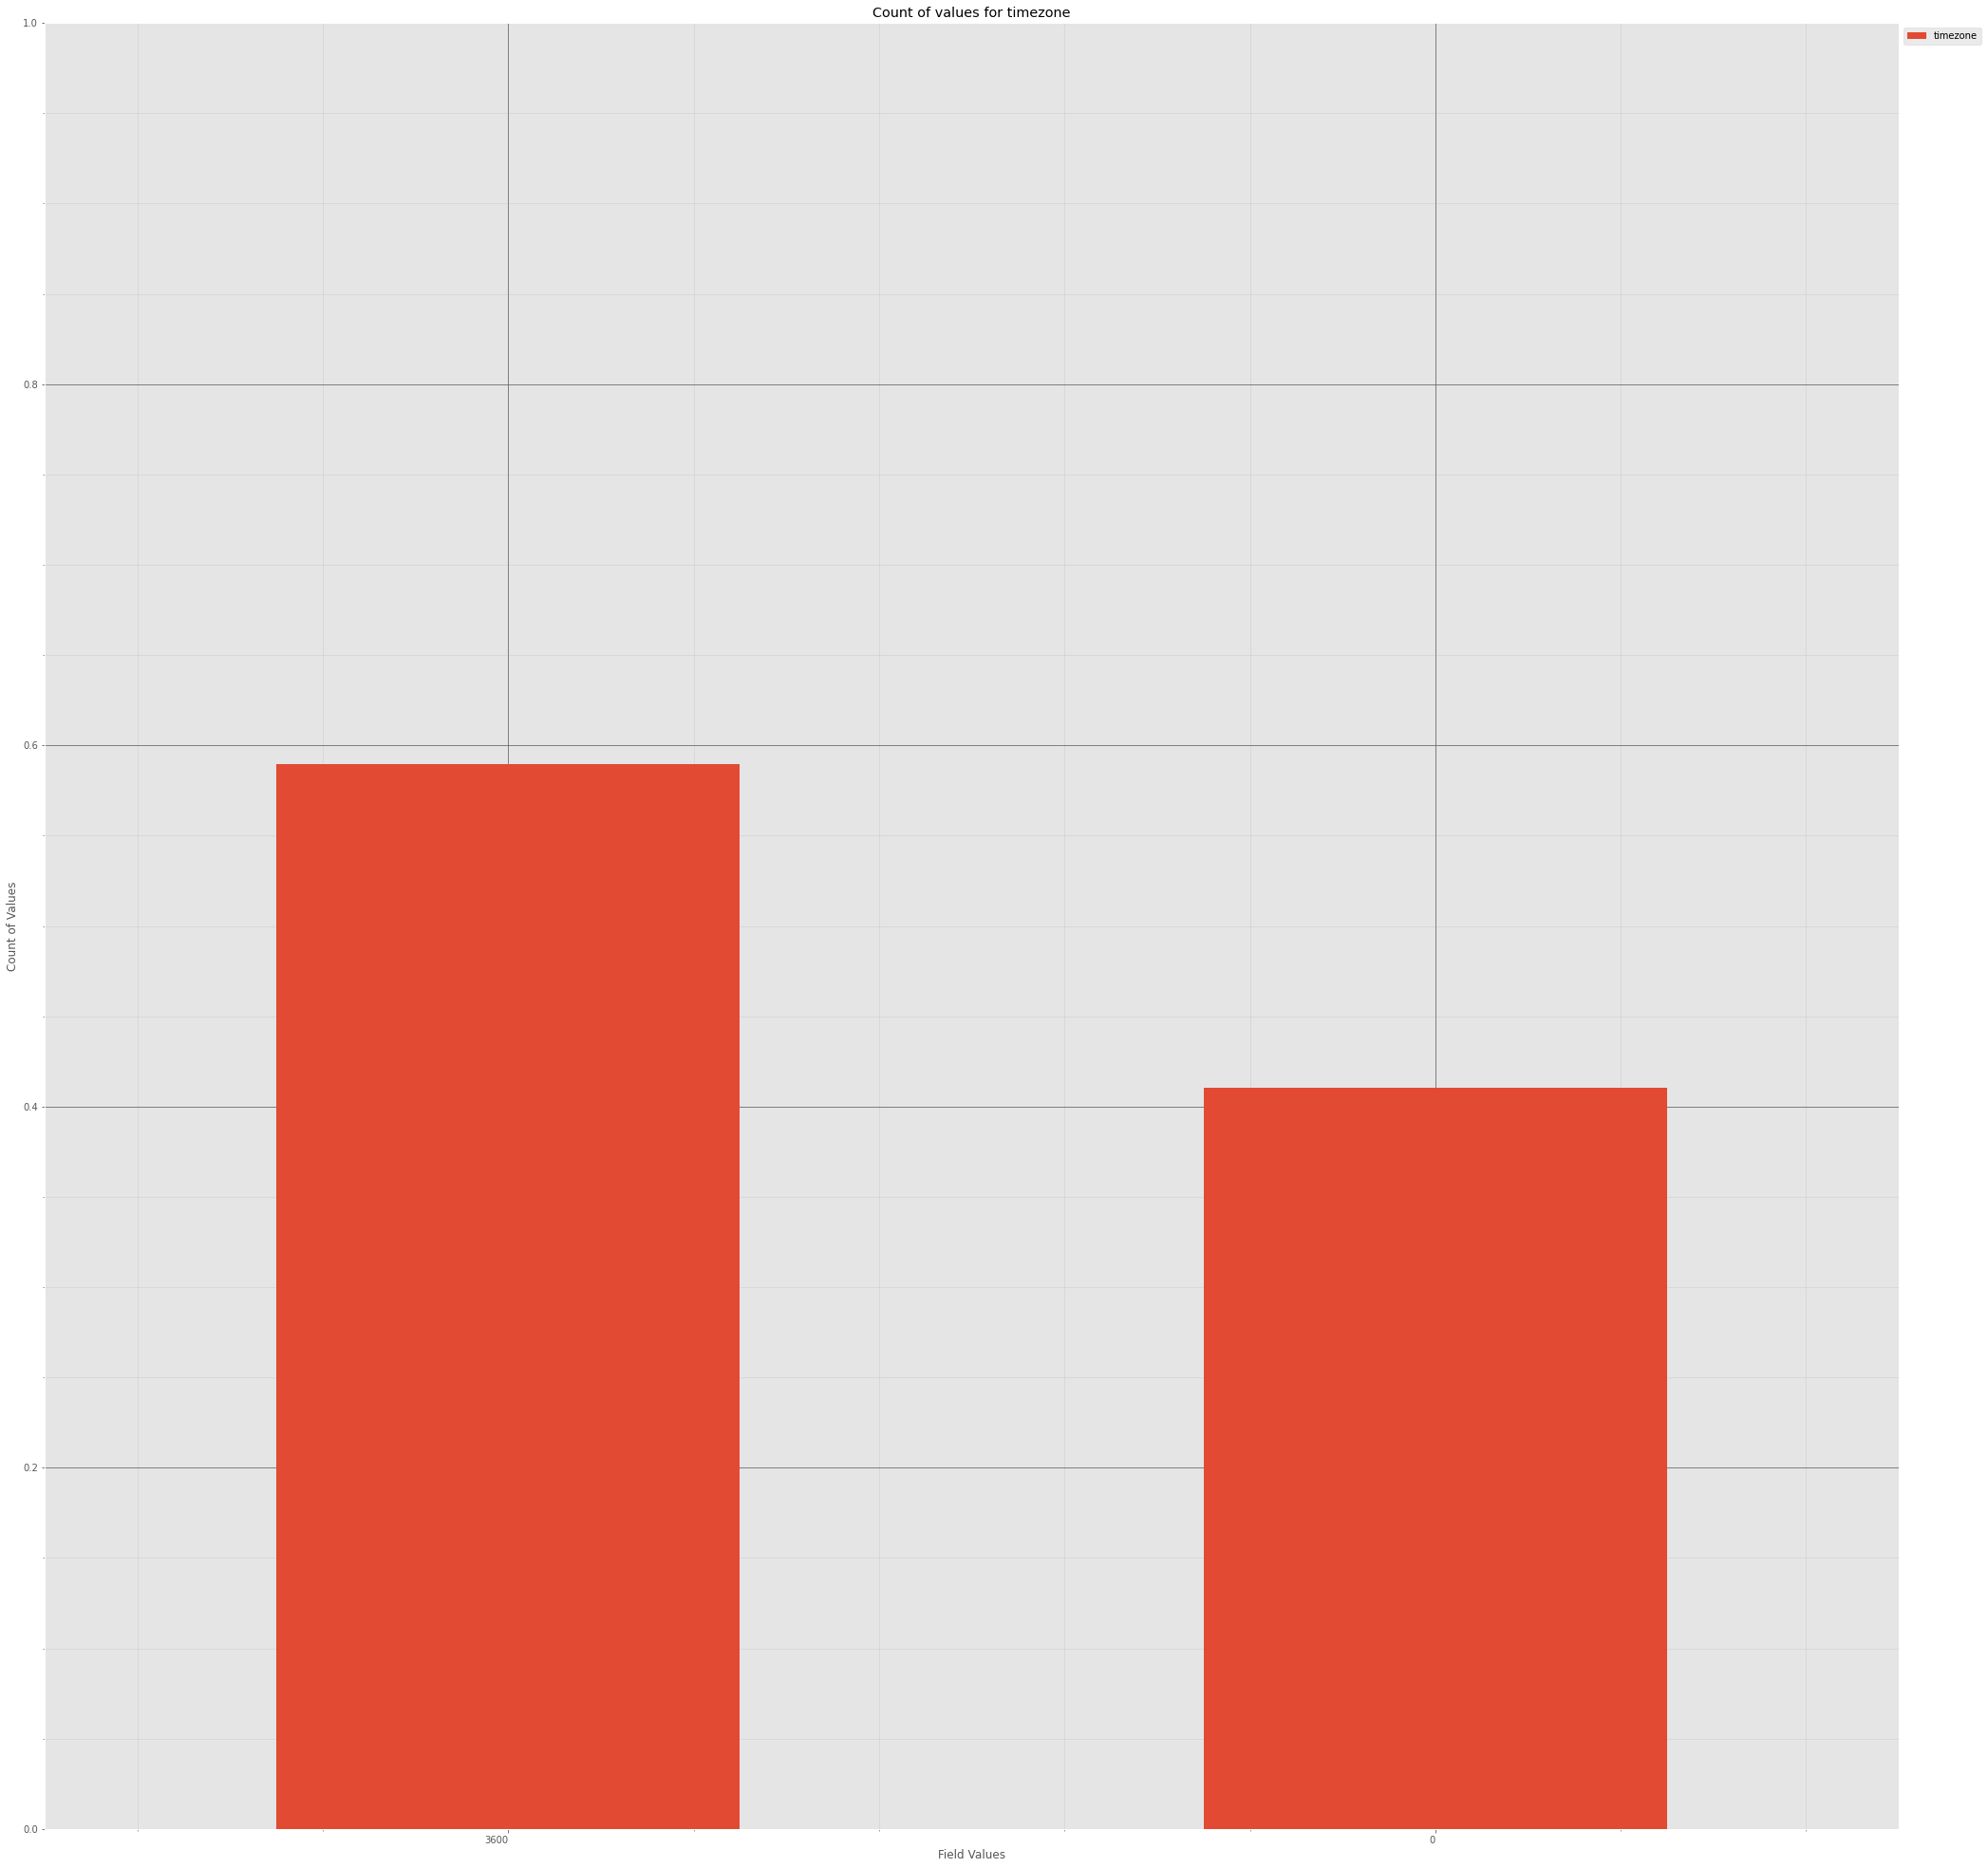



----------------------


             dt
city_name      
Dublin     8848
Grouping over city_name results in:



city_name  Rows  % Frequency
0    Dublin  8848        100.0

Non Zero Data:


city_name  Rows  % Frequency
0    Dublin  8848        100.0

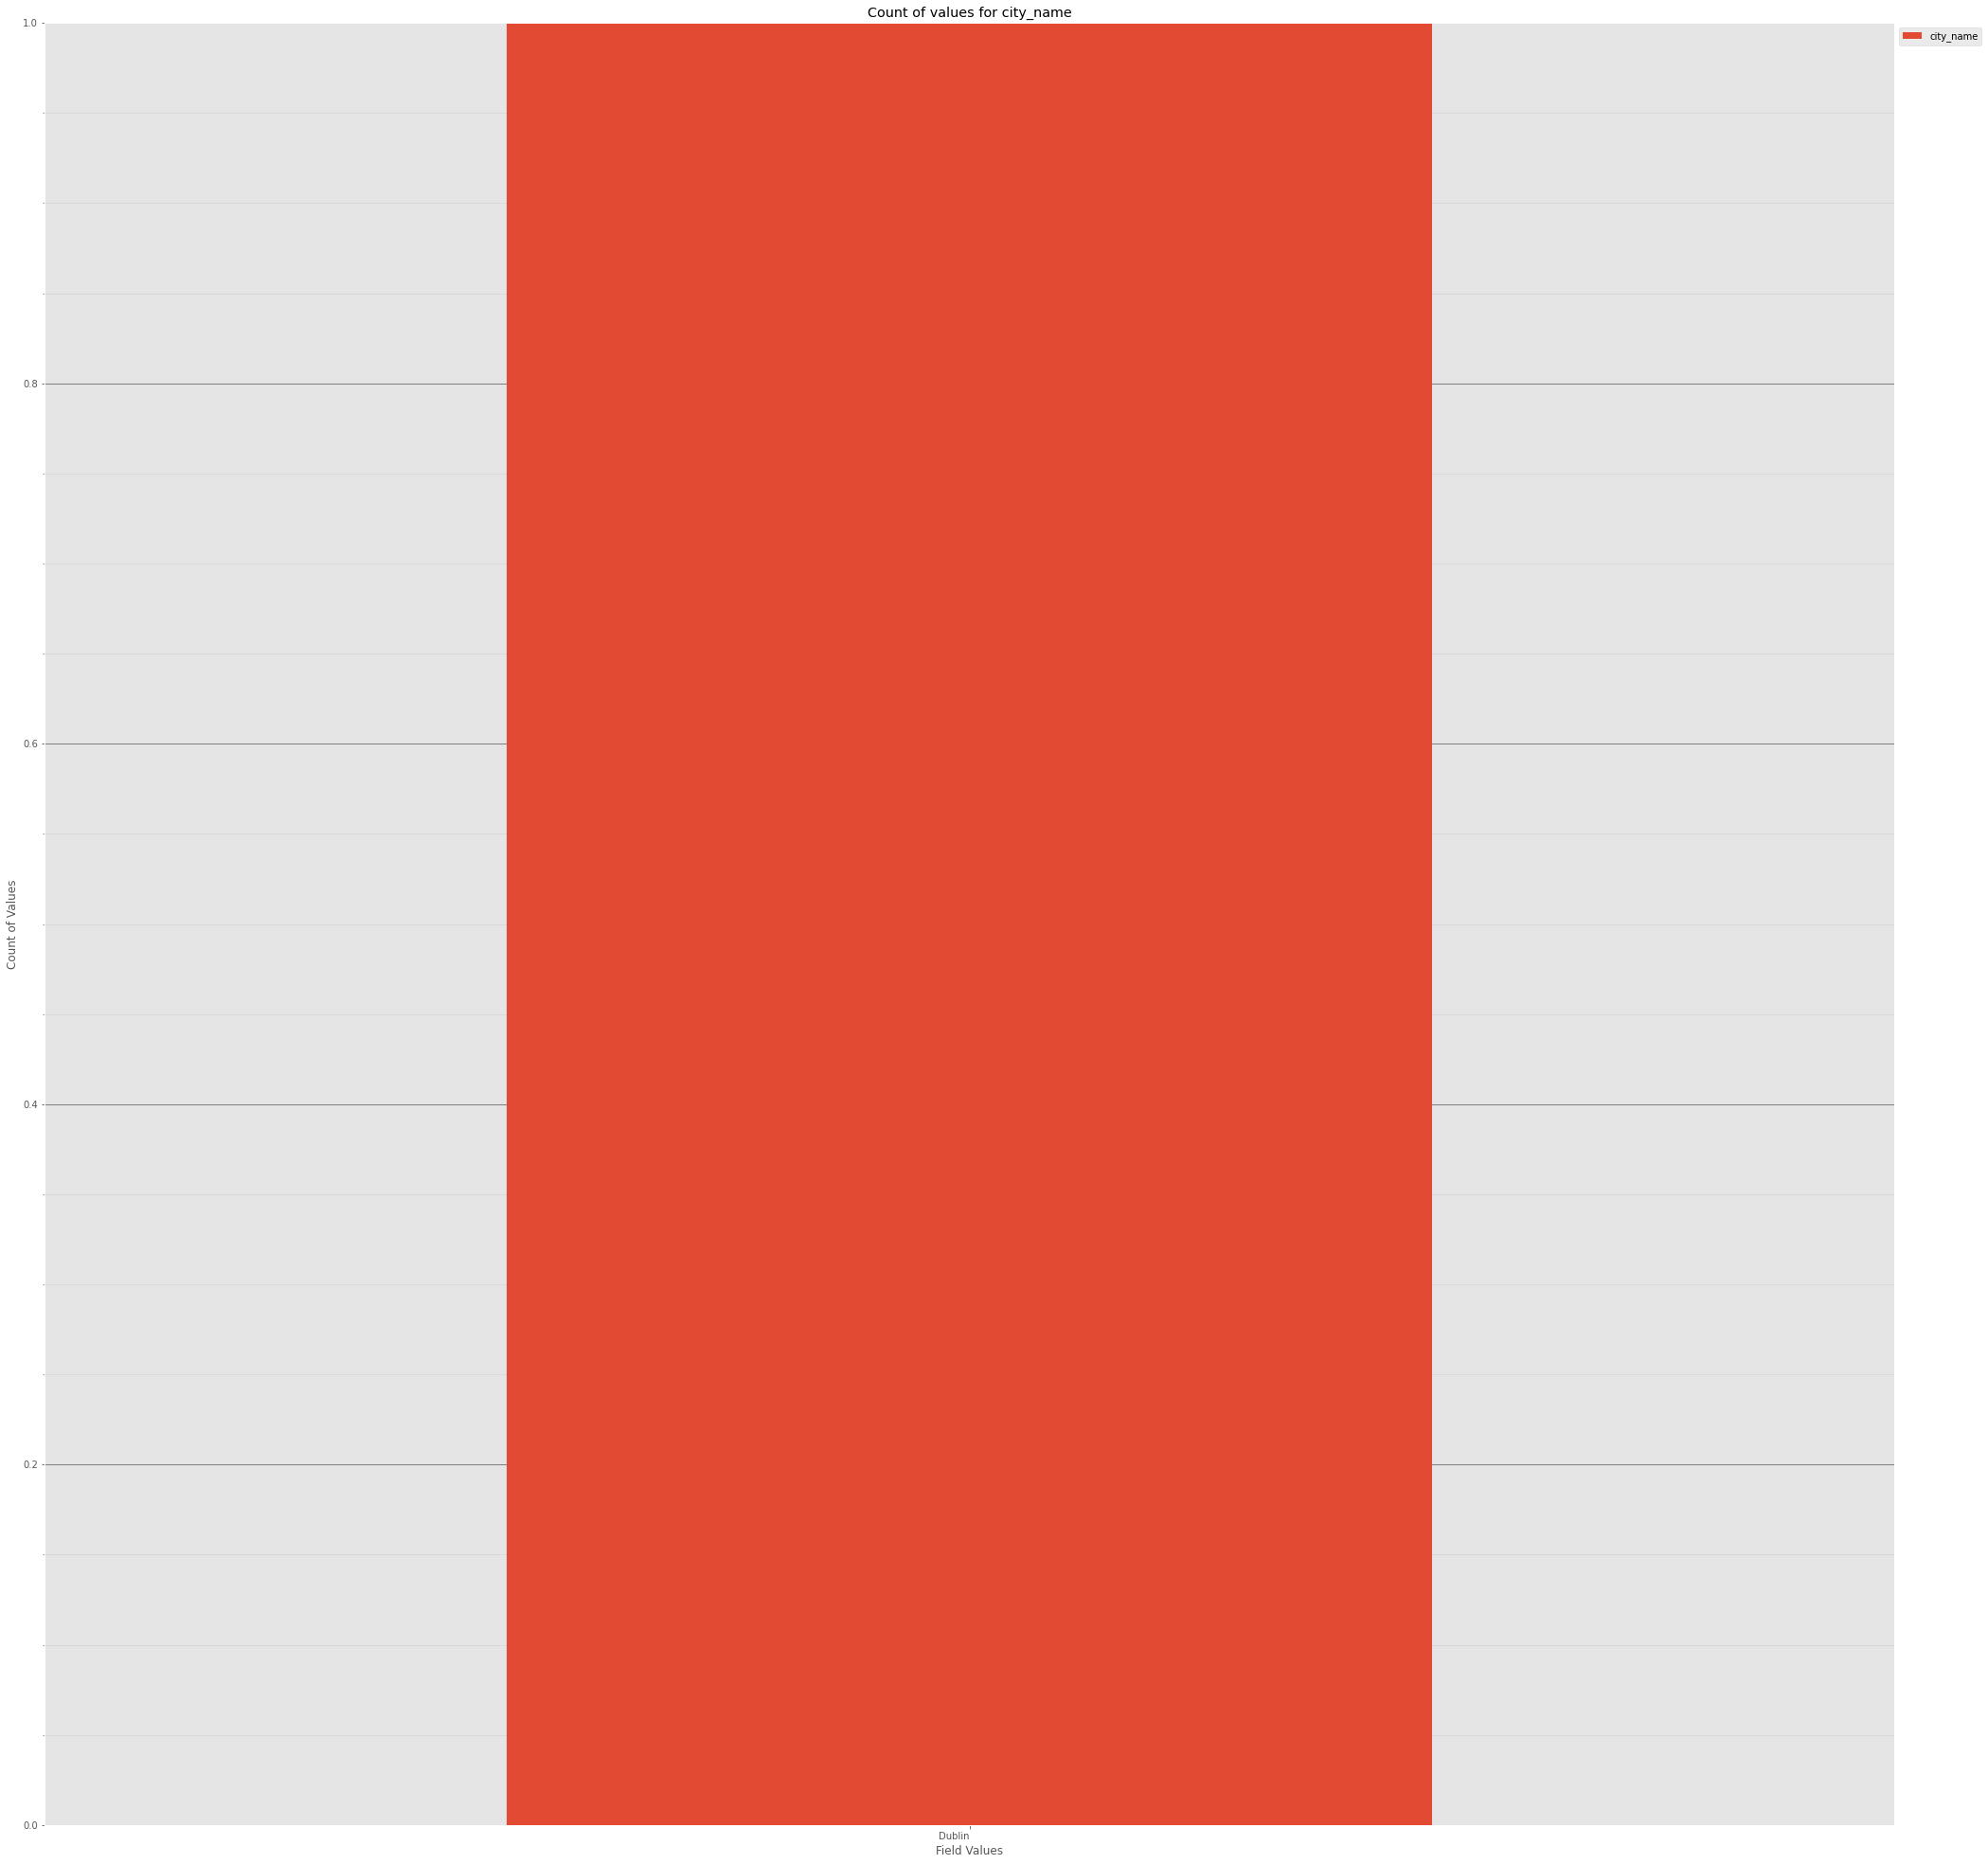



----------------------


              dt
clouds_all      
0            593
1              2
10             1
100            4
11             2
2              4
20          1150
21             1
26             1
3              1
40          1303
5              1
69             1
75          5646
83             1
84             1
87             1
90           133
91             1
99             1
Grouping over clouds_all results in:



clouds_all  Rows  % Frequency
0           0   593     6.702080
1           1     2     0.022604
2          10     1     0.011302
3         100     4     0.045208
4          11     2     0.022604
5           2     4     0.045208
6          20  1150    12.997288
7          21     1     0.011302
8          26     1     0.011302
9           3     1     0.011302
10         40  1303    14.726492
11          5     1     0.011302
12         69     1     0.011302
13         75  5646    63.811031
14         83     1     0.011302
15         84     1     0.011302
16         87     1     0.011302
17         90   133     1.503165
18         91     1     0.011302
19         99     1     0.011302

Non Zero Data:


clouds_all  Rows  % Frequency
0           0   593     6.702080
1           1     2     0.022604
2          10     1     0.011302
3         100     4     0.045208
4          11     2     0.022604
5           2     4     0.045208
6          20  1150    12.997288
7          21     1     0.011302
8          26     1     0.011302
9           3     1     0.011302
10         40  1303    14.726492
11          5     1     0.011302
12         69     1     0.011302
13         75  5646    63.811031
14         83     1     0.011302
15         84     1     0.011302
16         87     1     0.011302
17         90   133     1.503165
18         91     1     0.011302
19         99     1     0.011302

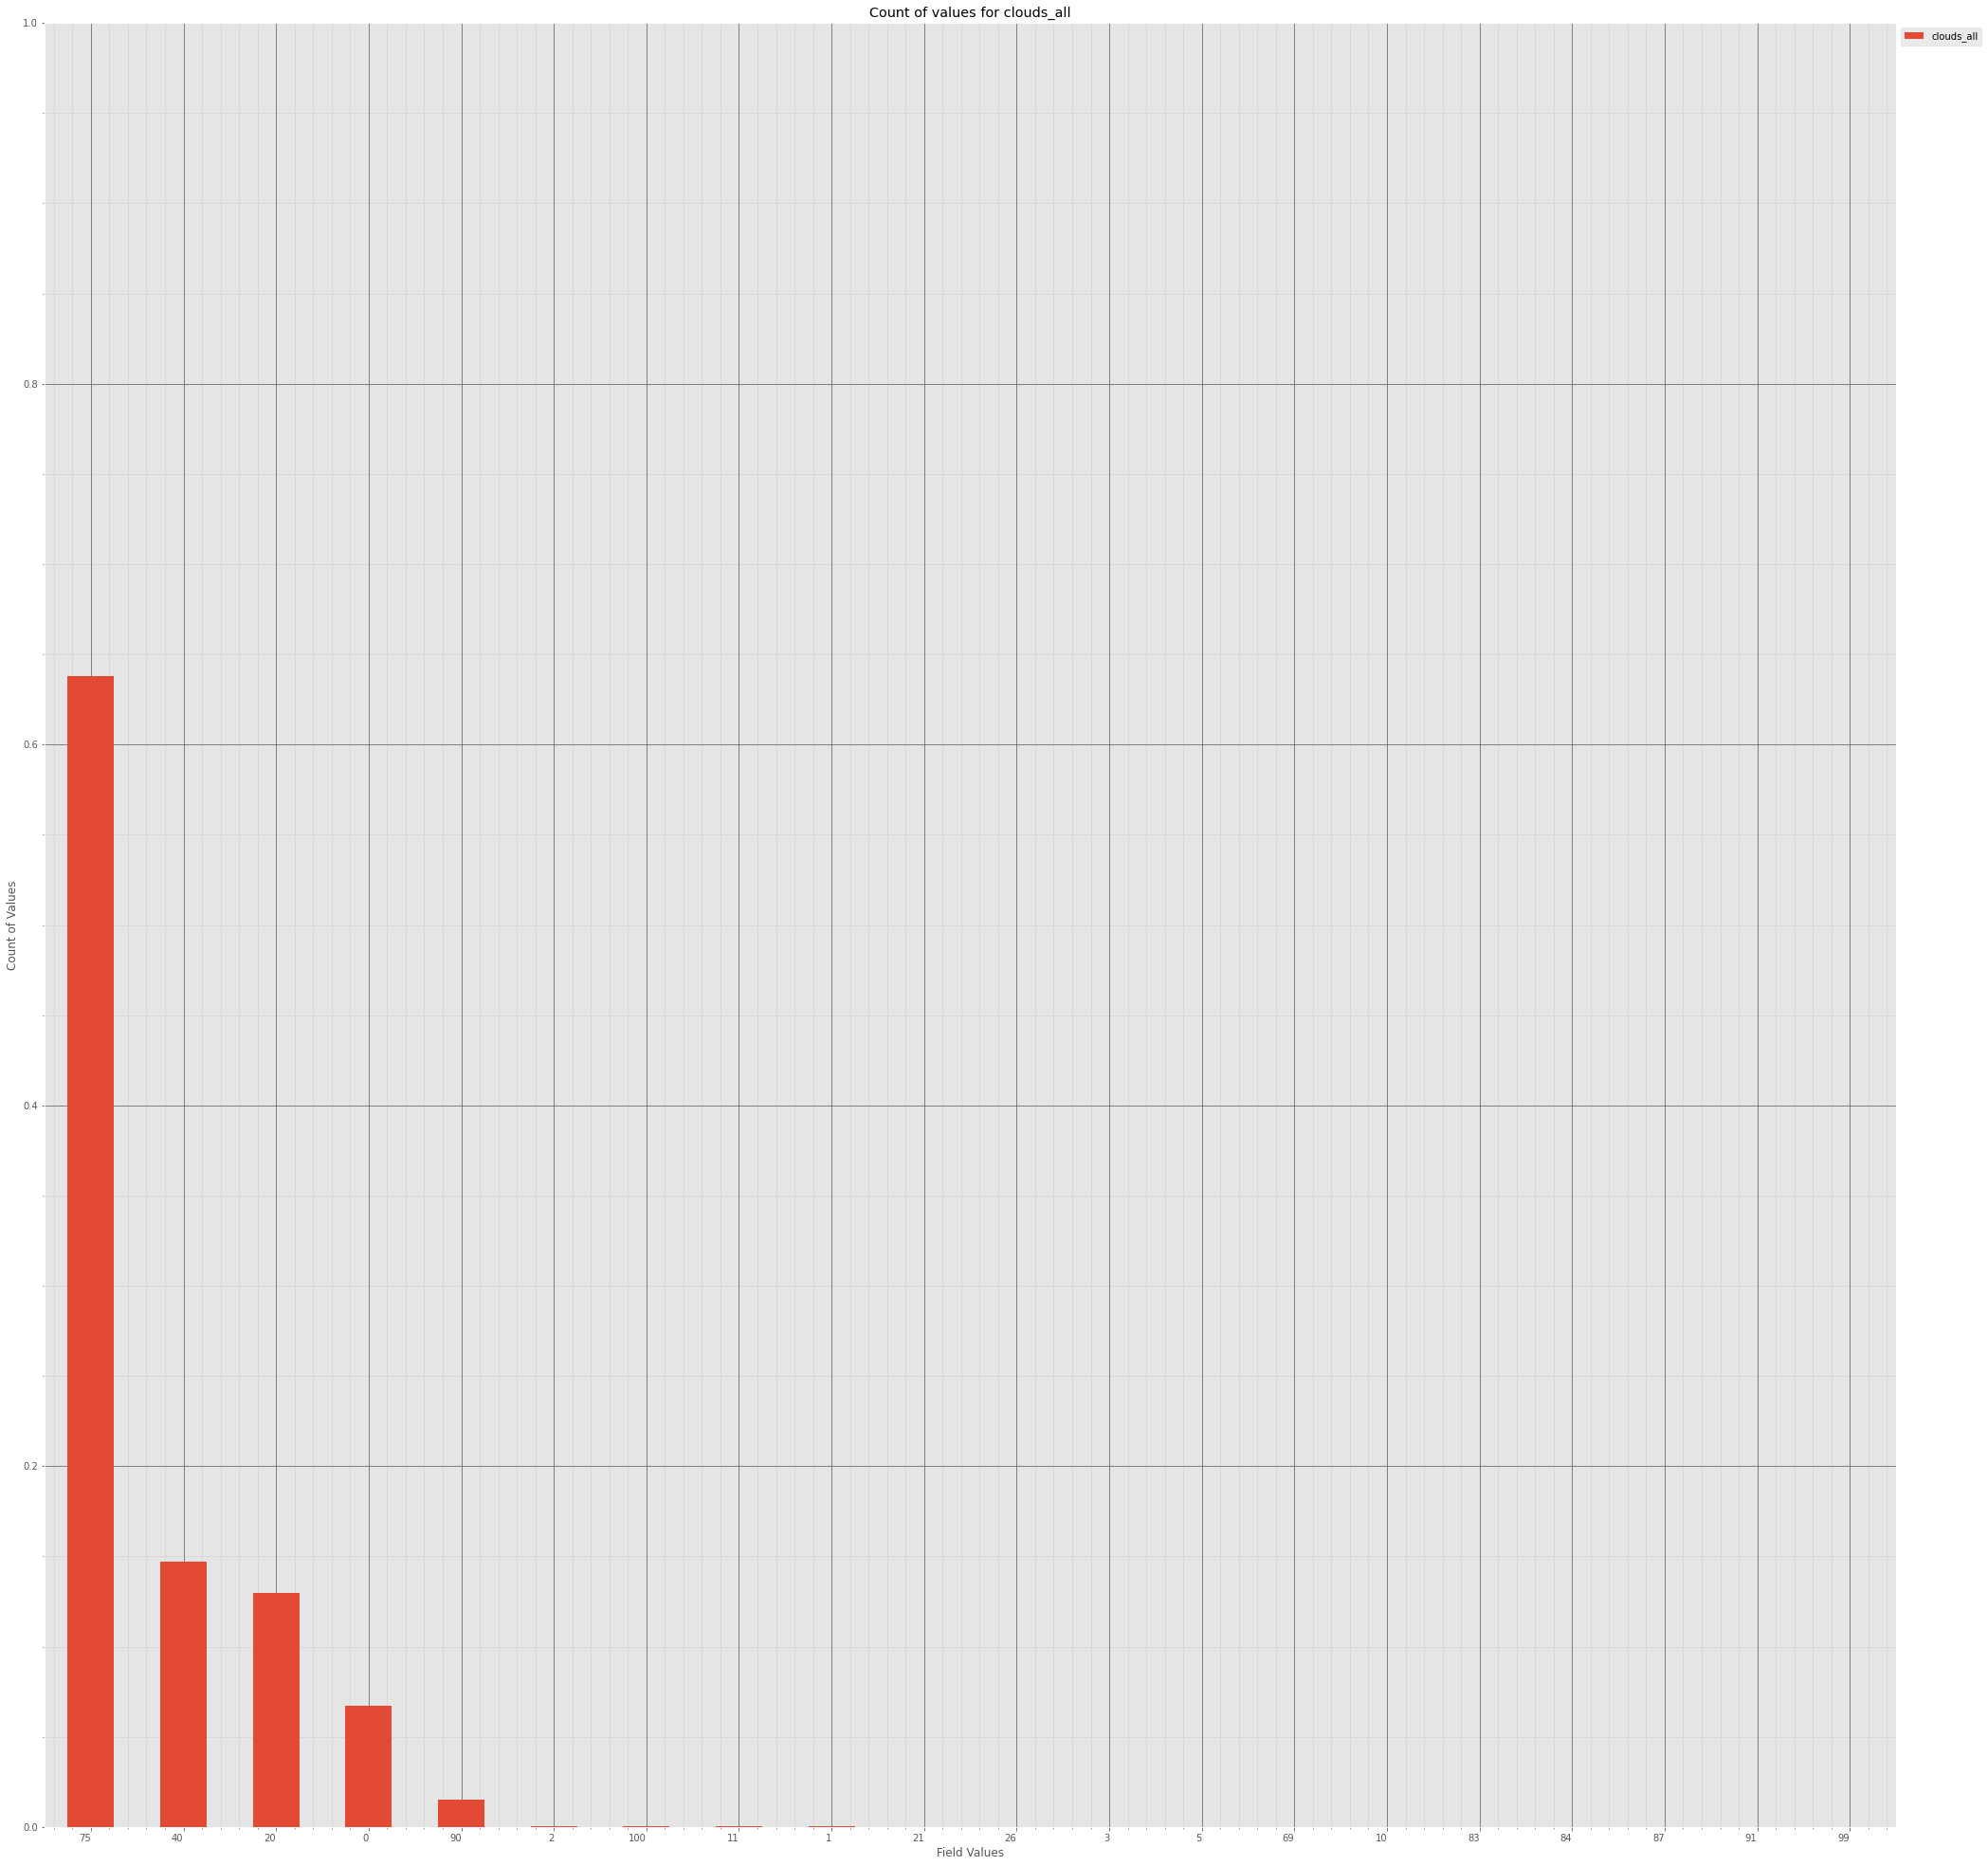



----------------------


              dt
weather_id      
300          269
301            4
310          223
311            2
500          609
501           47
502            1
520          228
521          120
600           30
601            7
612           11
615            1
620           66
621            1
701           77
711            1
741           89
800          602
801         1121
802         1223
803         4061
804           55
Grouping over weather_id results in:



weather_id  Rows  % Frequency
0         300   269     3.040235
1         301     4     0.045208
2         310   223     2.520344
3         311     2     0.022604
4         500   609     6.882911
5         501    47     0.531193
6         502     1     0.011302
7         520   228     2.576854
8         521   120     1.356239
9         600    30     0.339060
10        601     7     0.079114
11        612    11     0.124322
12        615     1     0.011302
13        620    66     0.745931
14        621     1     0.011302
15        701    77     0.870253
16        711     1     0.011302
17        741    89     1.005877
18        800   602     6.803797
19        801  1121    12.669530
20        802  1223    13.822333
21        803  4061    45.897378
22        804    55     0.621609

Non Zero Data:


weather_id  Rows  % Frequency
0         300   269     3.040235
1         301     4     0.045208
2         310   223     2.520344
3         311     2     0.022604
4         500   609     6.882911
5         501    47     0.531193
6         502     1     0.011302
7         520   228     2.576854
8         521   120     1.356239
9         600    30     0.339060
10        601     7     0.079114
11        612    11     0.124322
12        615     1     0.011302
13        620    66     0.745931
14        621     1     0.011302
15        701    77     0.870253
16        711     1     0.011302
17        741    89     1.005877
18        800   602     6.803797
19        801  1121    12.669530
20        802  1223    13.822333
21        803  4061    45.897378
22        804    55     0.621609

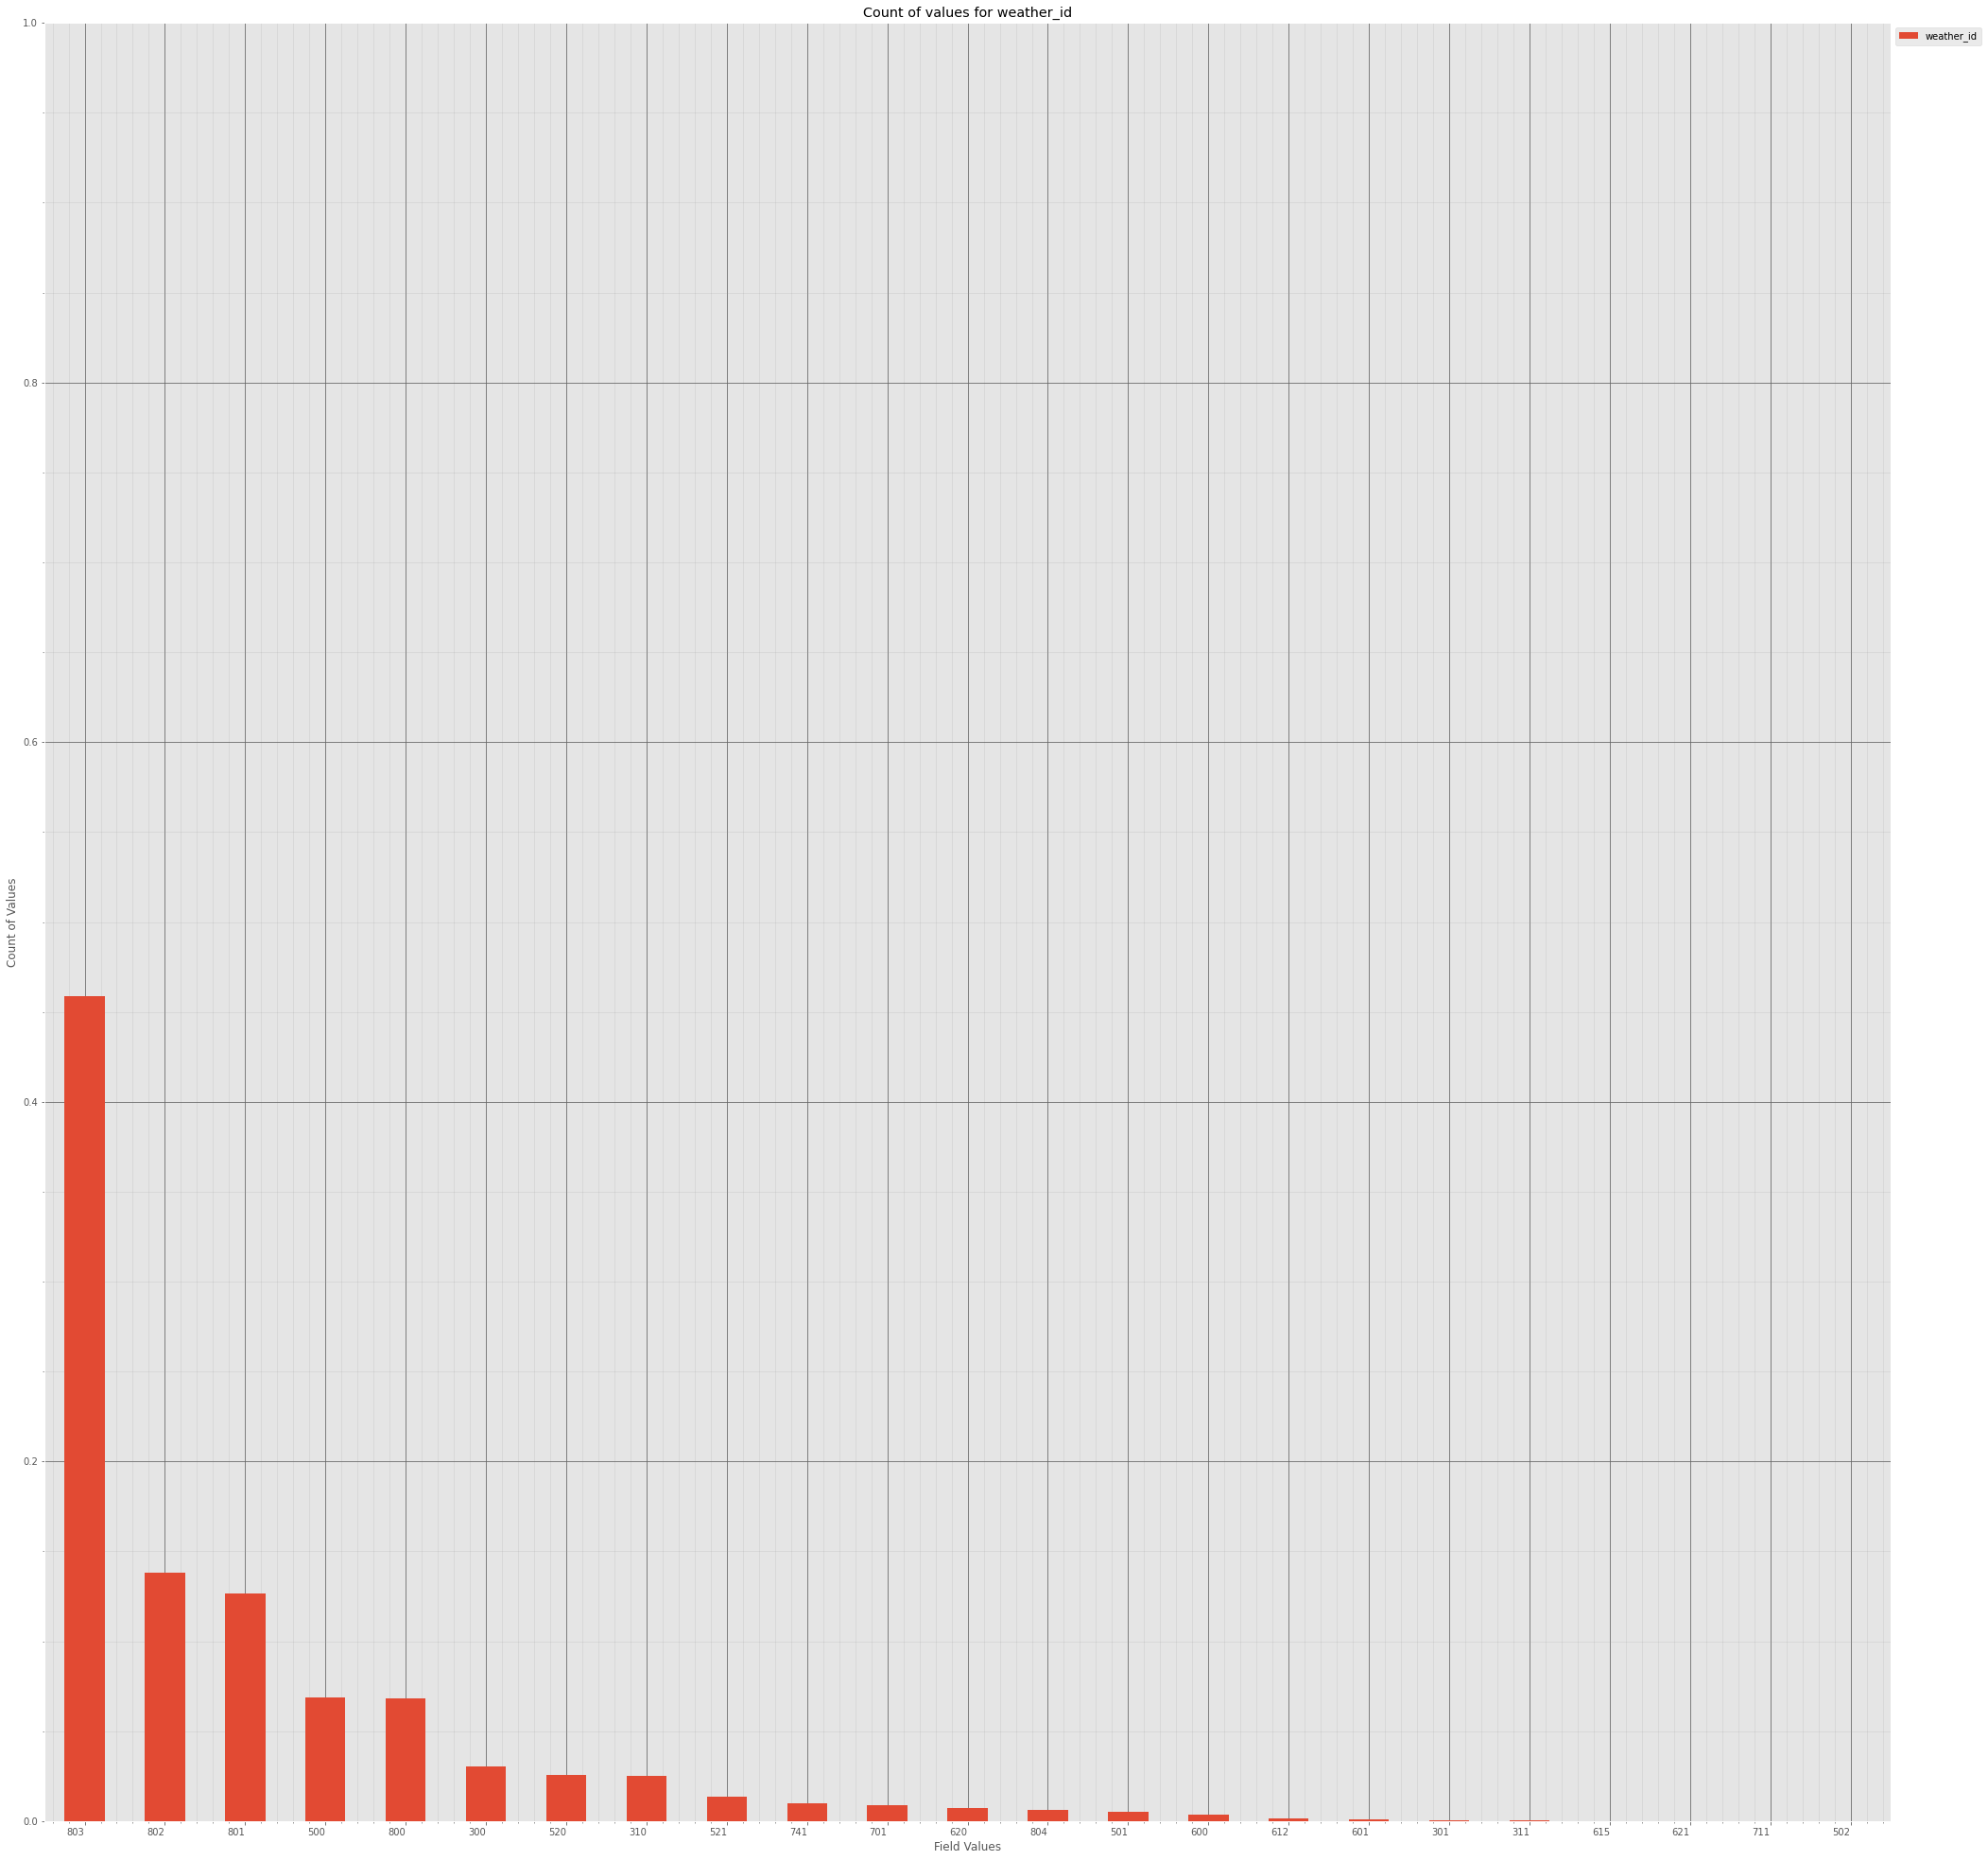



----------------------


                                dt
weather_description               
 light shower sleet             11
broken clouds                 4061
drizzle                          4
few clouds                    1121
fog                             89
heavy intensity rain             1
light intensity drizzle        269
light intensity drizzle rain   223
light intensity shower rain    228
light rain                     609
light rain and snow              1
light shower snow               66
light snow                      30
mist                            77
moderate rain                   47
overcast clouds                 55
proximity shower rain          118
rain and drizzle                 2
scattered clouds              1223
shower rain                      2
shower snow                      1
sky is clear                   602
smoke                            1
snow                             7
Grouping over weather_description results in:



weather_description  Rows  % Frequency
0             light shower sleet    11     0.124322
1                  broken clouds  4061    45.897378
2                        drizzle     4     0.045208
3                     few clouds  1121    12.669530
4                            fog    89     1.005877
5           heavy intensity rain     1     0.011302
6        light intensity drizzle   269     3.040235
7   light intensity drizzle rain   223     2.520344
8    light intensity shower rain   228     2.576854
9                     light rain   609     6.882911
10           light rain and snow     1     0.011302
11             light shower snow    66     0.745931
12                    light snow    30     0.339060
13                          mist    77     0.870253
14                 moderate rain    47     0.531193
15               overcast clouds    55     0.621609
16         proximity shower rain   118     1.333635
17              rain and drizzle     2     0.022604
18              scattered clouds  1223    13.822333
19                   shower rain     2     0.022604
20                   shower snow     1     0.011302
21                  sky is clear   602     6.803797
22                         smoke     1     0.011302
23                          snow     7     0.079114

Non Zero Data:


weather_description  Rows  % Frequency
0             light shower sleet    11     0.124322
1                  broken clouds  4061    45.897378
2                        drizzle     4     0.045208
3                     few clouds  1121    12.669530
4                            fog    89     1.005877
5           heavy intensity rain     1     0.011302
6        light intensity drizzle   269     3.040235
7   light intensity drizzle rain   223     2.520344
8    light intensity shower rain   228     2.576854
9                     light rain   609     6.882911
10           light rain and snow     1     0.011302
11             light shower snow    66     0.745931
12                    light snow    30     0.339060
13                          mist    77     0.870253
14                 moderate rain    47     0.531193
15               overcast clouds    55     0.621609
16         proximity shower rain   118     1.333635
17              rain and drizzle     2     0.022604
18              scattered clouds  1223    13.822333
19                   shower rain     2     0.022604
20                   shower snow     1     0.011302
21                  sky is clear   602     6.803797
22                         smoke     1     0.011302
23                          snow     7     0.079114

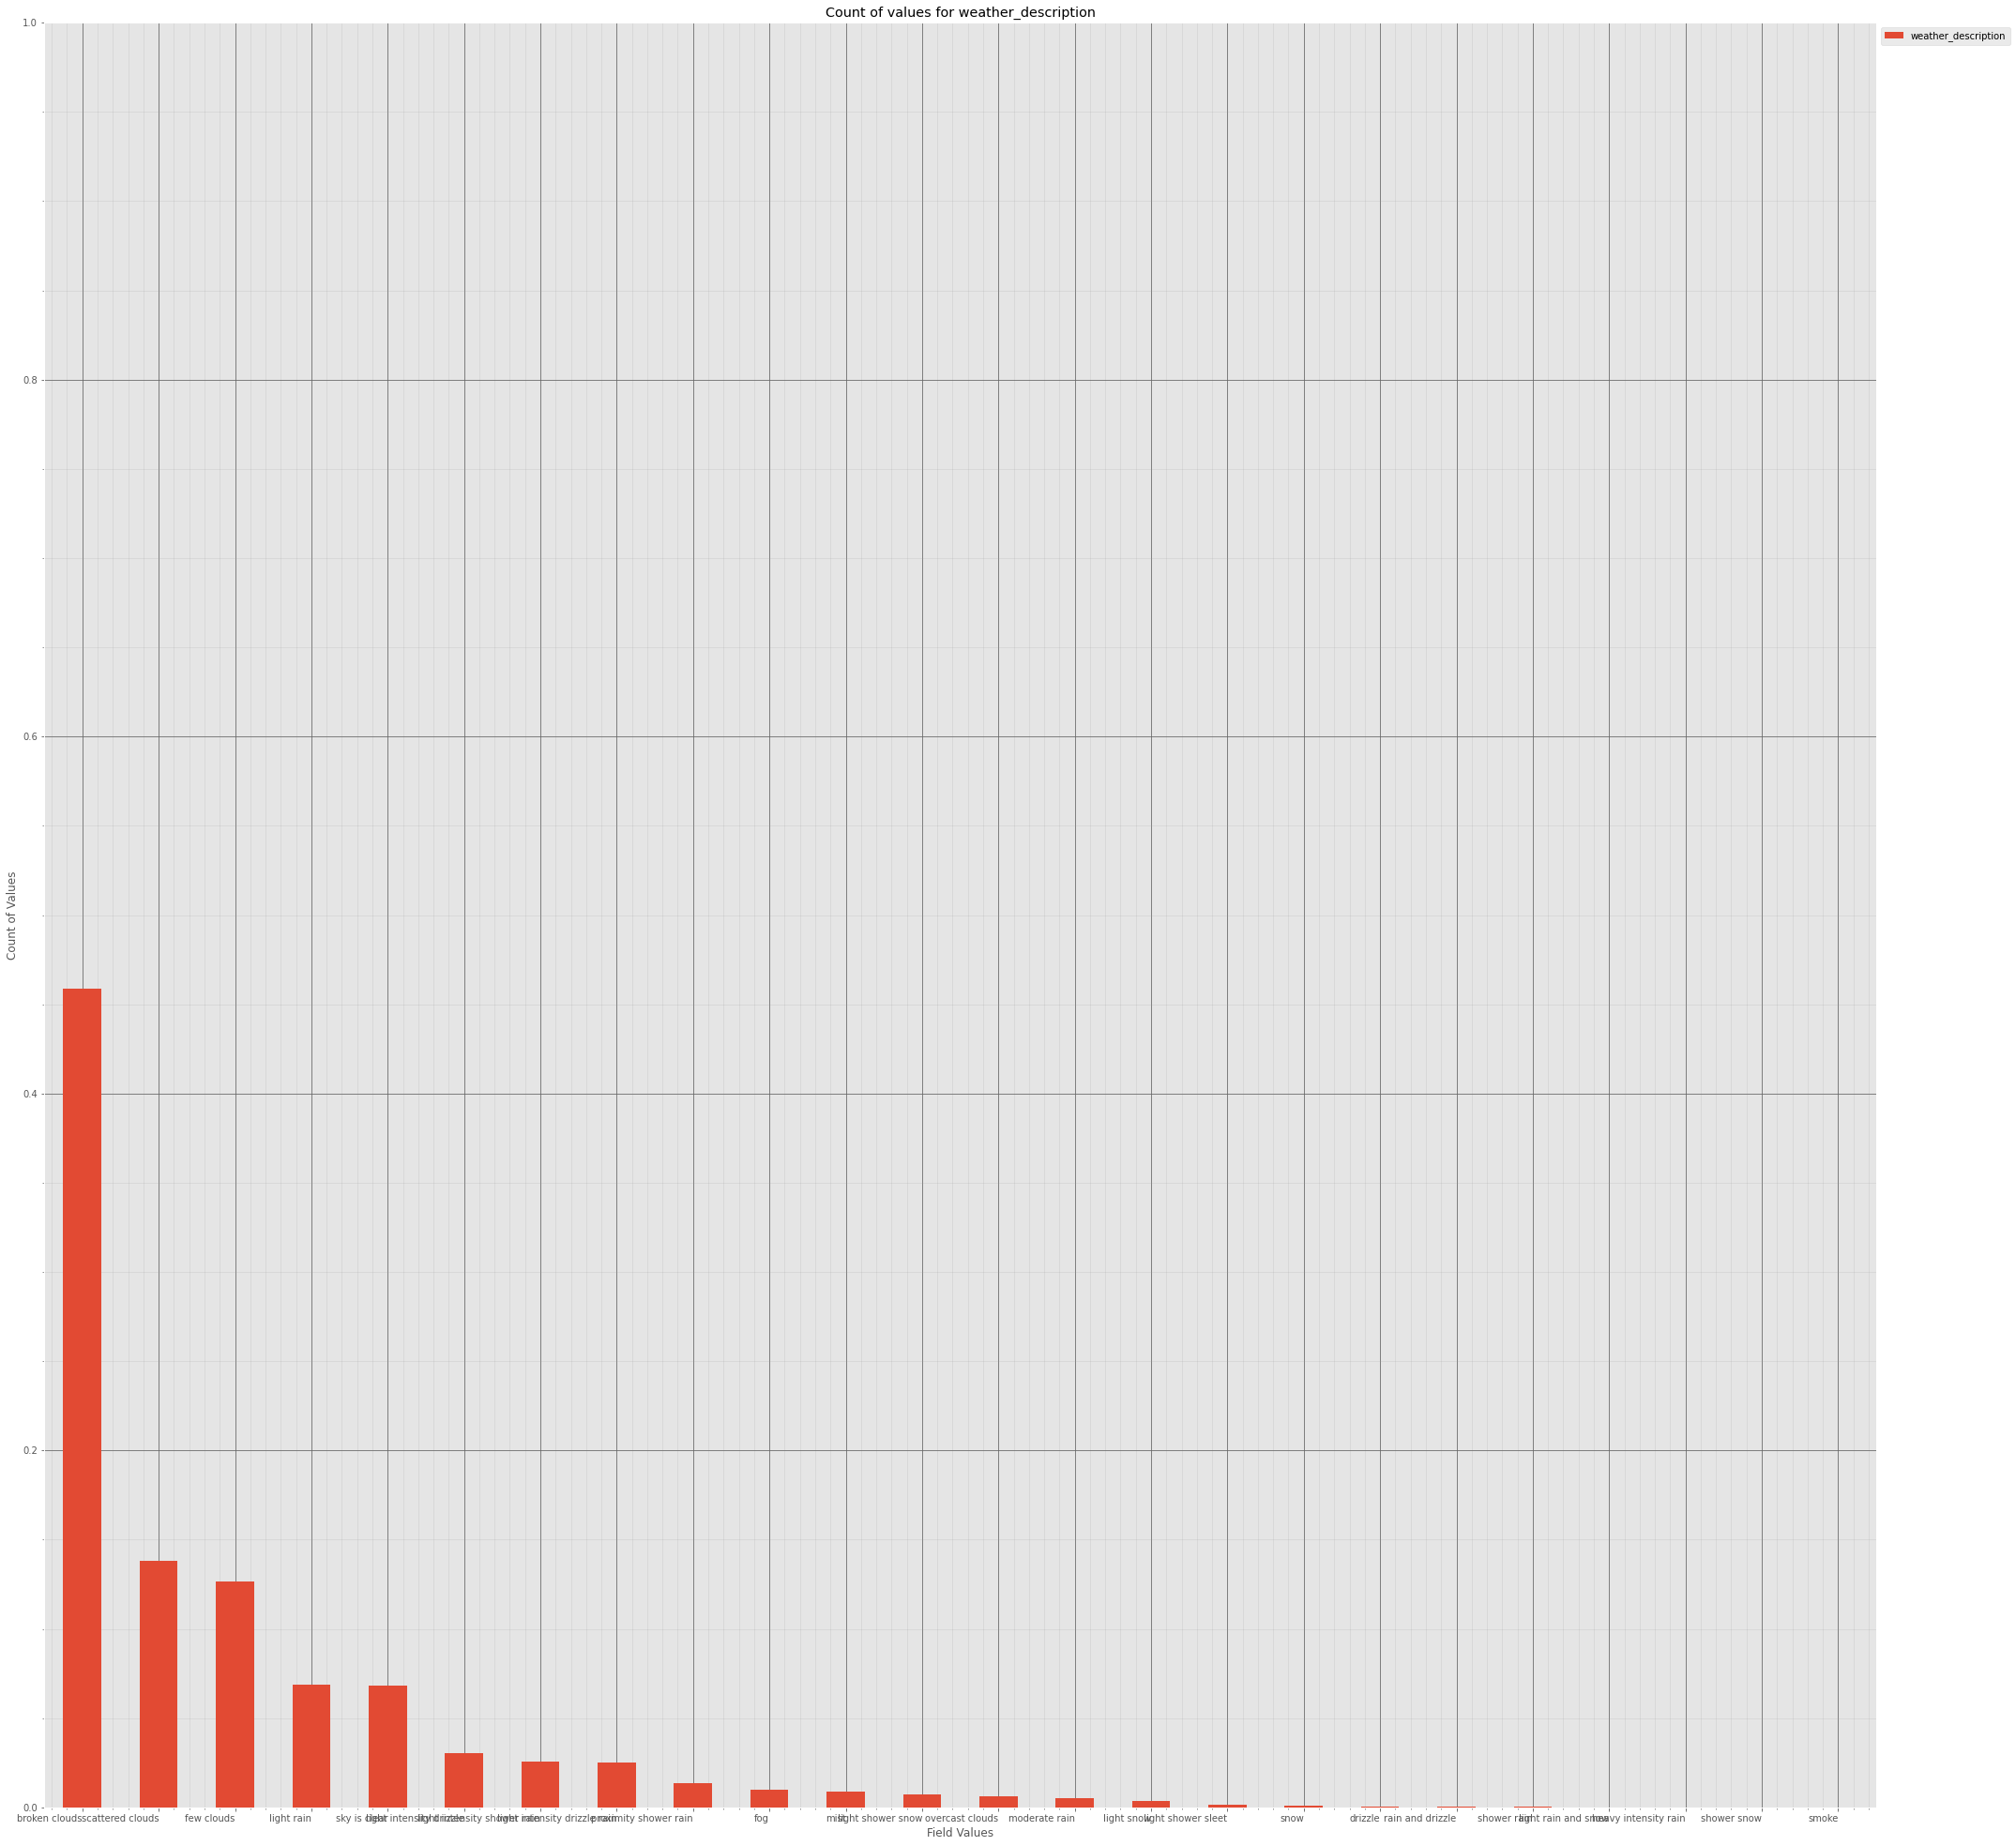



----------------------


                dt
weather_icon      
01d            237
01n            365
02d            547
02n            574
03d            645
03n            578
04d           2234
04n           1882
09d            463
09n            383
10d            274
10n            383
13d             44
13n             72
50d             69
50n             98
Grouping over weather_icon results in:



weather_icon  Rows  % Frequency
0           01d   237     2.678571
1           01n   365     4.125226
2           02d   547     6.182188
3           02n   574     6.487342
4           03d   645     7.289783
5           03n   578     6.532550
6           04d  2234    25.248644
7           04n  1882    21.270344
8           09d   463     5.232821
9           09n   383     4.328662
10          10d   274     3.096745
11          10n   383     4.328662
12          13d    44     0.497288
13          13n    72     0.813743
14          50d    69     0.779837
15          50n    98     1.107595

Non Zero Data:


weather_icon  Rows  % Frequency
0           01d   237     2.678571
1           01n   365     4.125226
2           02d   547     6.182188
3           02n   574     6.487342
4           03d   645     7.289783
5           03n   578     6.532550
6           04d  2234    25.248644
7           04n  1882    21.270344
8           09d   463     5.232821
9           09n   383     4.328662
10          10d   274     3.096745
11          10n   383     4.328662
12          13d    44     0.497288
13          13n    72     0.813743
14          50d    69     0.779837
15          50n    98     1.107595

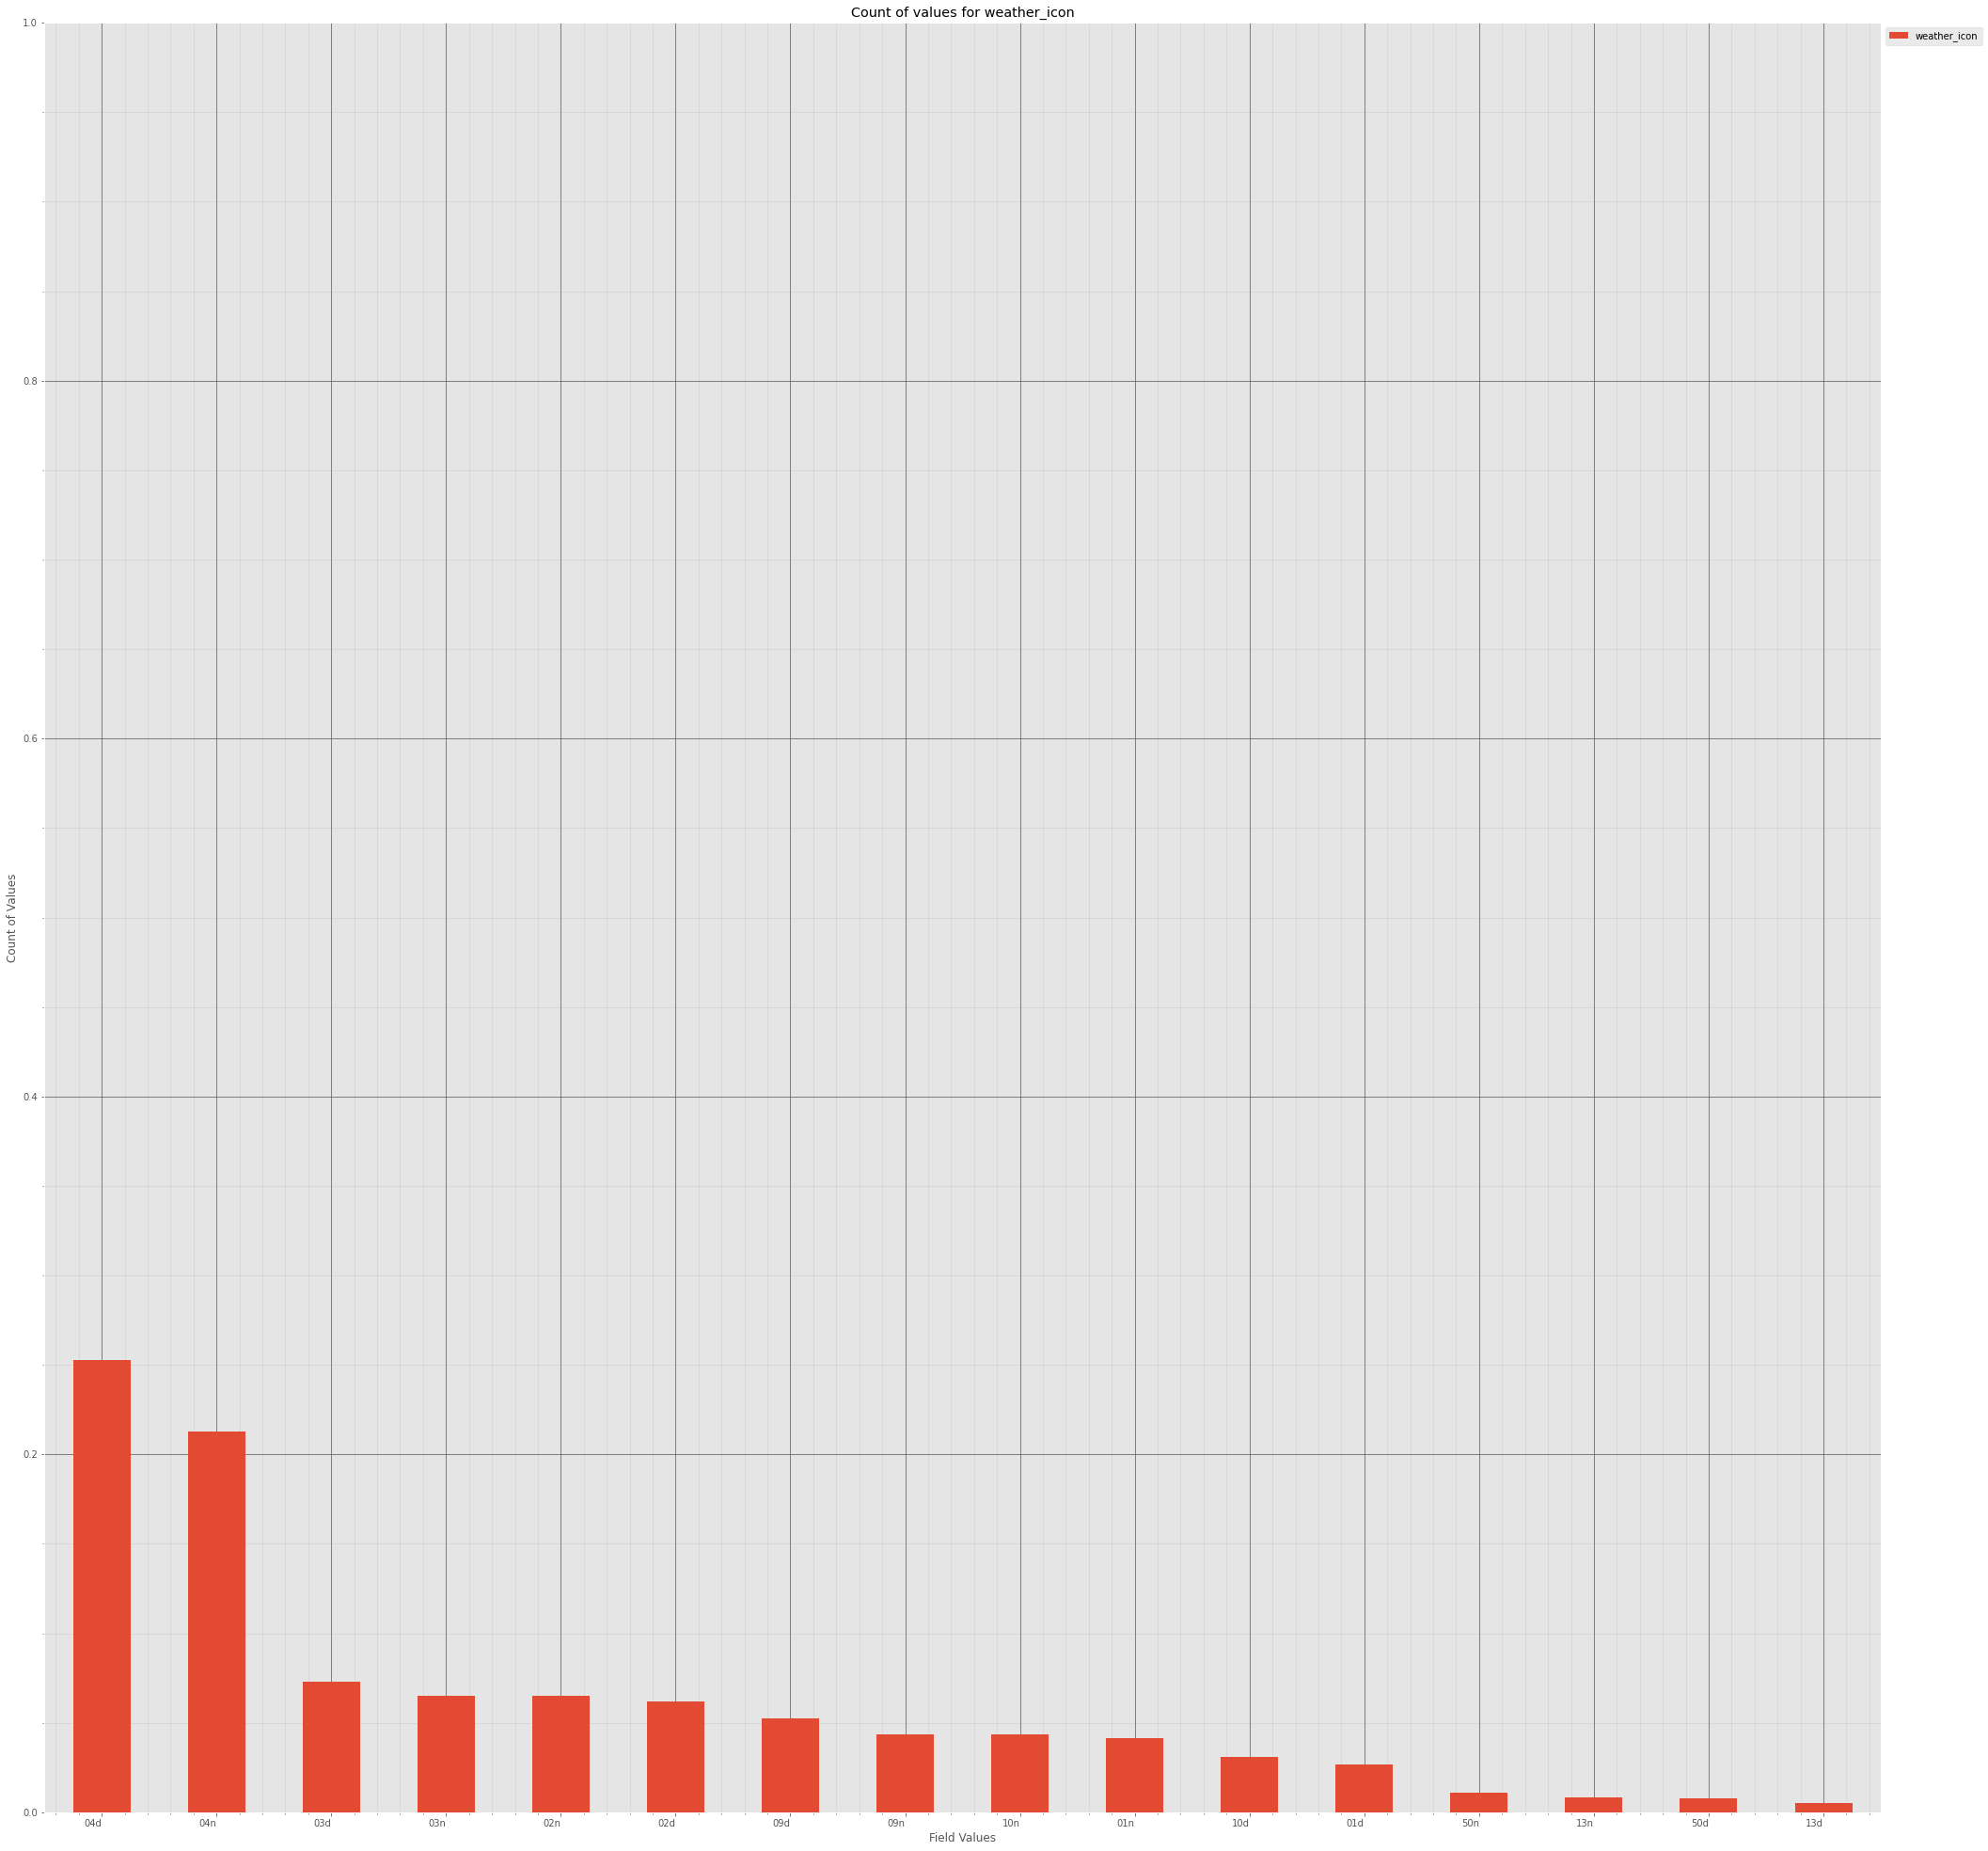

Too Many Categories to plot


{'timezone':   timezone  Rows  % Frequency
 0        0  3629    41.014919
 1     3600  5219    58.985081,
 'city_name':   city_name  Rows  % Frequency
 0    Dublin  8848        100.0,
 'clouds_all':    clouds_all  Rows  % Frequency
 0           0   593     6.702080
 1           1     2     0.022604
 2          10     1     0.011302
 3         100     4     0.045208
 4          11     2     0.022604
 5           2     4     0.045208
 6          20  1150    12.997288
 7          21     1     0.011302
 8          26     1     0.011302
 9           3     1     0.011302
 10         40  1303    14.726492
 11          5     1     0.011302
 12         69     1     0.011302
 13         75  5646    63.811031
 14         83     1     0.011302
 15         84     1     0.011302
 16         87     1     0.011302
 17         90   133     1.503165
 18         91     1     0.011302
 19         99     1     0.011302,
 'weather_id':    weather_id  Rows  % Frequency
 0         300   269     3.040235
 1   

In [82]:
group_over_single_categories(weather_df,categorical_columns=weather_categorical_columns,pdf_fn="./data/weather_single_DB_{}.pdf".format(today_date), save_fig=True)

Inside group_over_multi_categories()


----------------------


Grouping over timezone|city_name results in:



timezone city_name  Rows  % Frequency
0        0    Dublin  3629    41.014919
1     3600    Dublin  5219    58.985081

Non Zero Data:


timezone city_name  Rows  % Frequency
0        0    Dublin  3629    41.014919
1     3600    Dublin  5219    58.985081

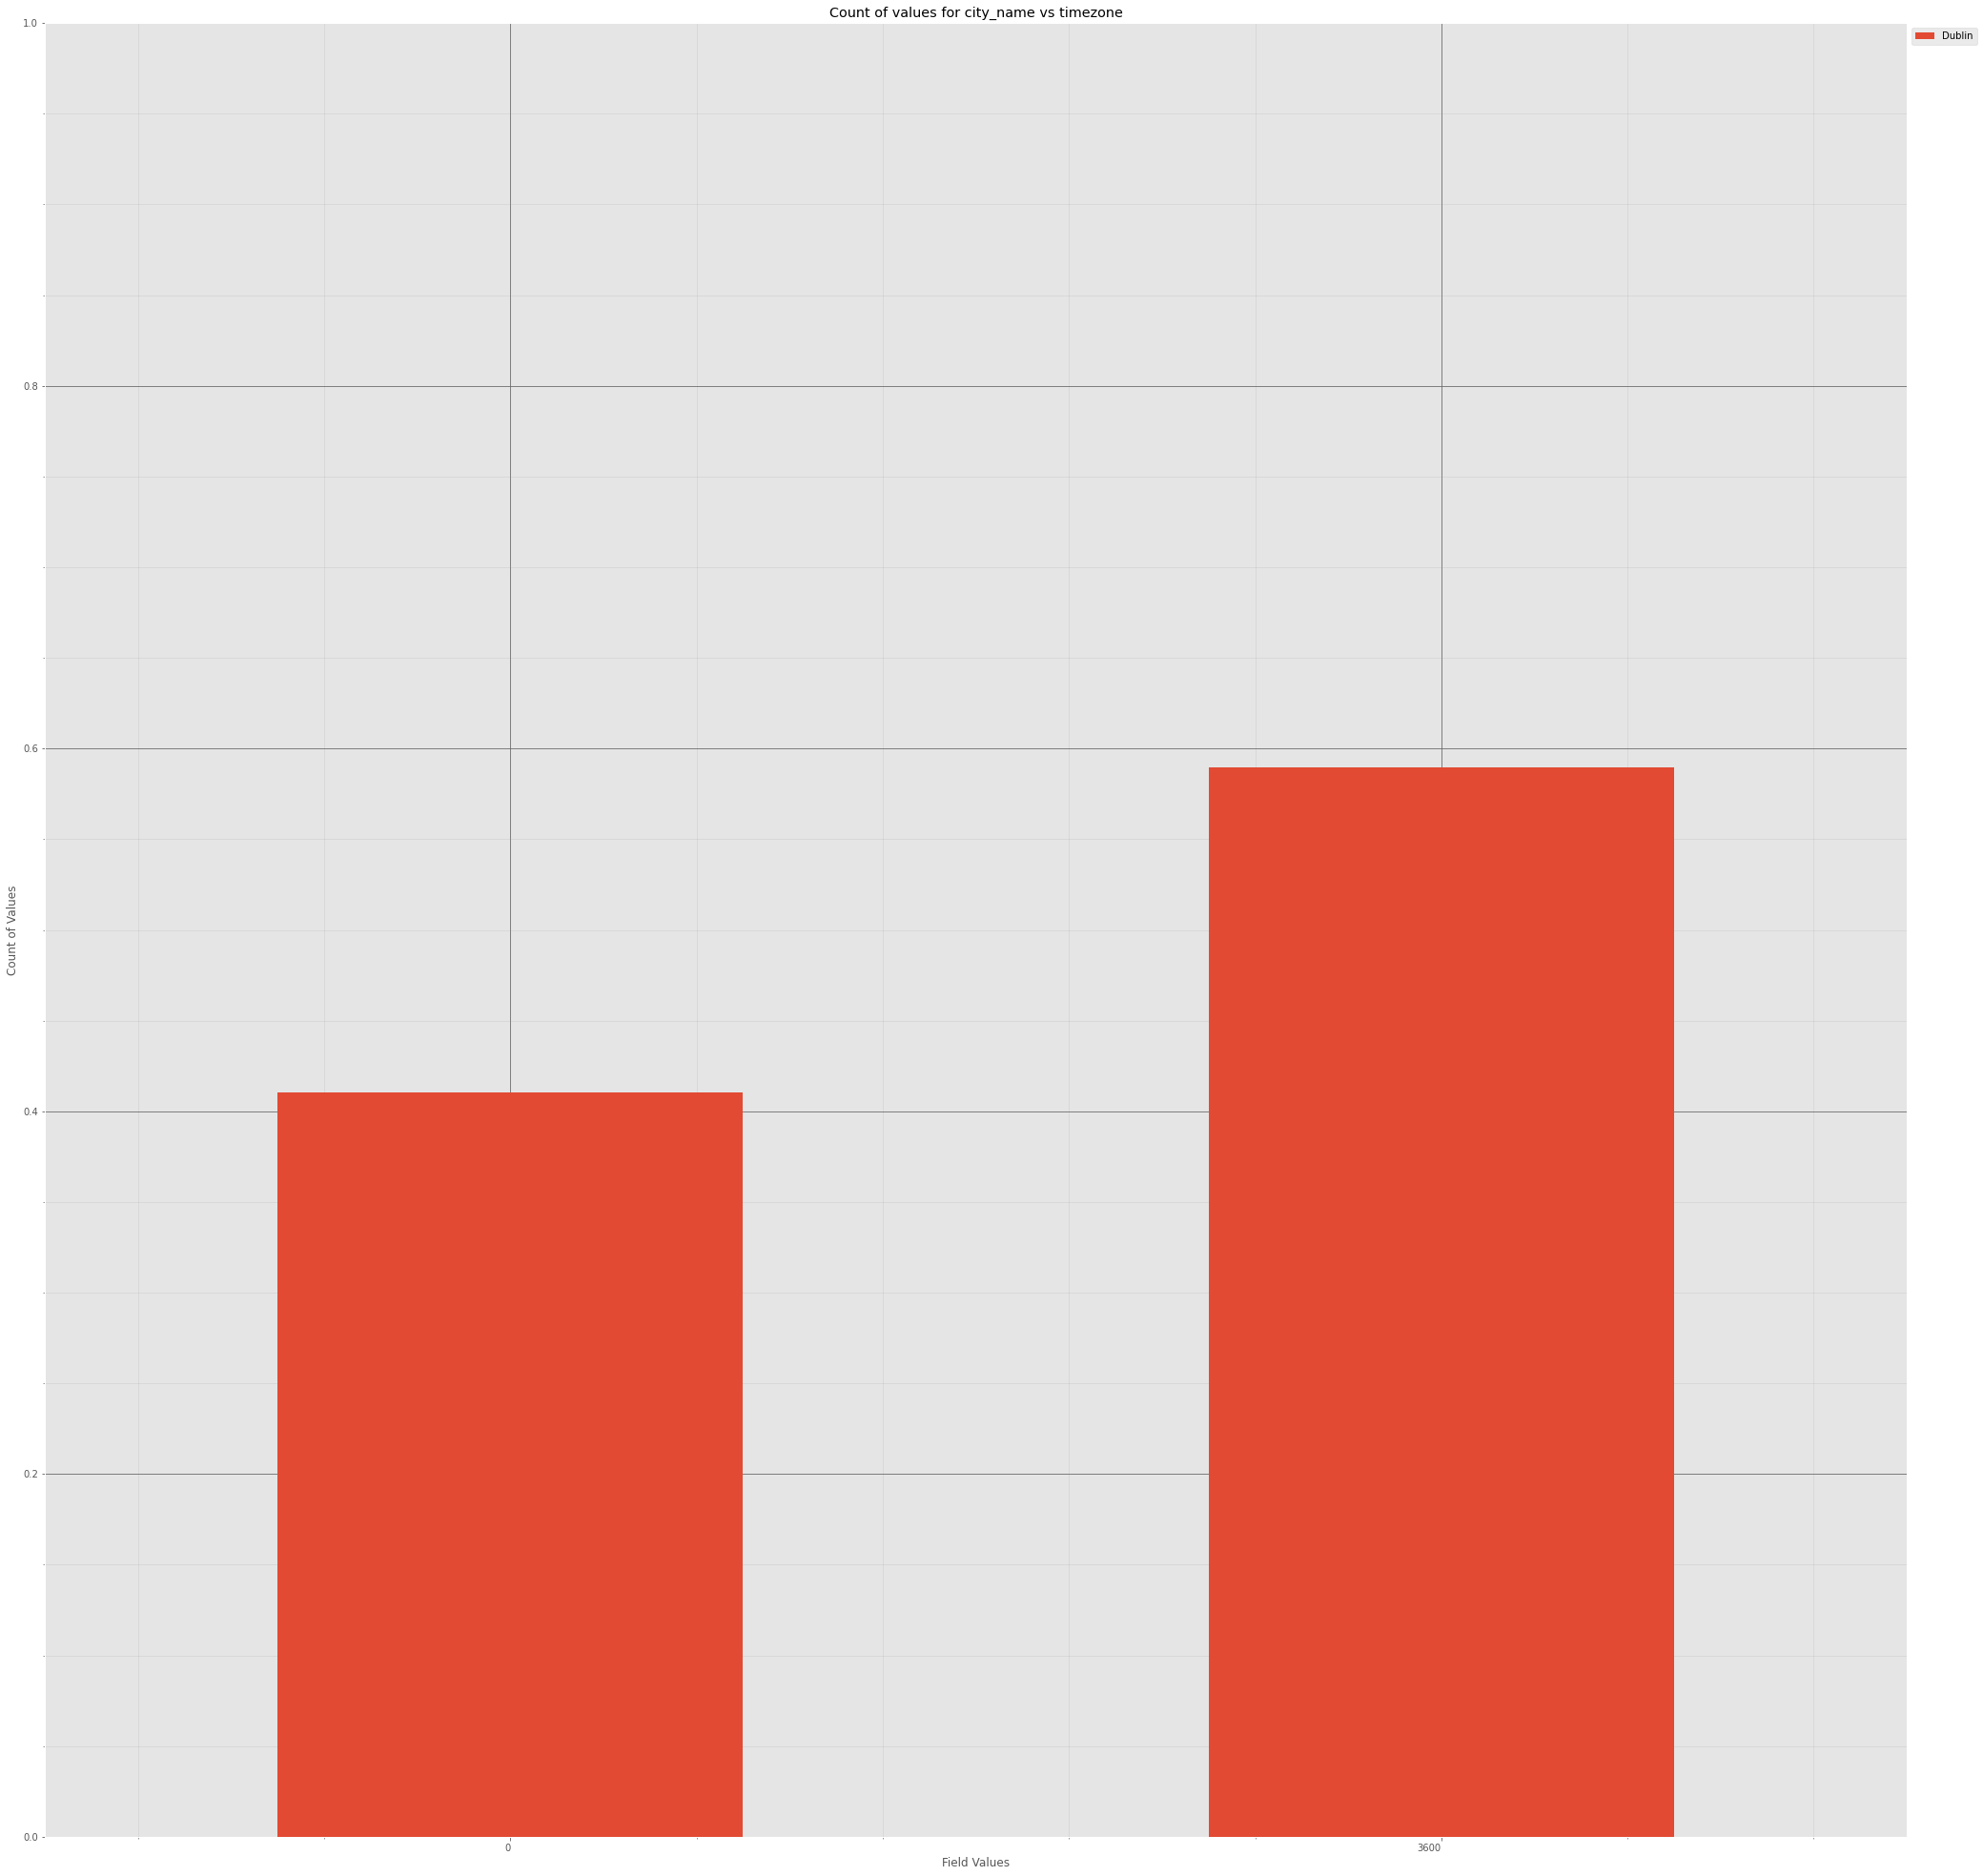



----------------------


Grouping over timezone|clouds_all results in:



timezone clouds_all  Rows  % Frequency
0         0          0   109     1.231917
1         0          1     2     0.022604
2         0         10     1     0.011302
3         0        100     2     0.022604
4         0         11     2     0.022604
5         0          2     4     0.045208
6         0         20   419     4.735533
7         0         21     1     0.011302
8         0         26     1     0.011302
9         0          3     1     0.011302
10        0         40   534     6.035262
11        0          5     1     0.011302
12        0         69     1     0.011302
13        0         75  2472    27.938517
14        0         83     1     0.011302
15        0         84     1     0.011302
16        0         87     0     0.000000
17        0         90    75     0.847649
18        0         91     1     0.011302
19        0         99     1     0.011302
20     3600          0   484     5.470163
21     3600          1     0     0.000000
22     3600         10     0     0.000000
23     3600        100     2     0.022604
24     3600         11     0     0.000000
25     3600          2     0     0.000000
26     3600         20   731     8.261754
27     3600         21     0     0.000000
28     3600         26     0     0.000000
29     3600          3     0     0.000000
30     3600         40   769     8.691230
31     3600          5     0     0.000000
32     3600         69     0     0.000000
33     3600         75  3174    35.872514
34     3600         83     0     0.000000
35     3600         84     0     0.000000
36     3600         87     1     0.011302
37     3600         90    58     0.655515
38     3600         91     0     0.000000
39     3600         99     0     0.000000

Non Zero Data:


timezone clouds_all  Rows  % Frequency
0         0          0   109     1.231917
1         0          1     2     0.022604
2         0         10     1     0.011302
3         0        100     2     0.022604
4         0         11     2     0.022604
5         0          2     4     0.045208
6         0         20   419     4.735533
7         0         21     1     0.011302
8         0         26     1     0.011302
9         0          3     1     0.011302
10        0         40   534     6.035262
11        0          5     1     0.011302
12        0         69     1     0.011302
13        0         75  2472    27.938517
14        0         83     1     0.011302
15        0         84     1     0.011302
17        0         90    75     0.847649
18        0         91     1     0.011302
19        0         99     1     0.011302
20     3600          0   484     5.470163
23     3600        100     2     0.022604
26     3600         20   731     8.261754
30     3600         40   769     8.691230
33     3600         75  3174    35.872514
36     3600         87     1     0.011302
37     3600         90    58     0.655515

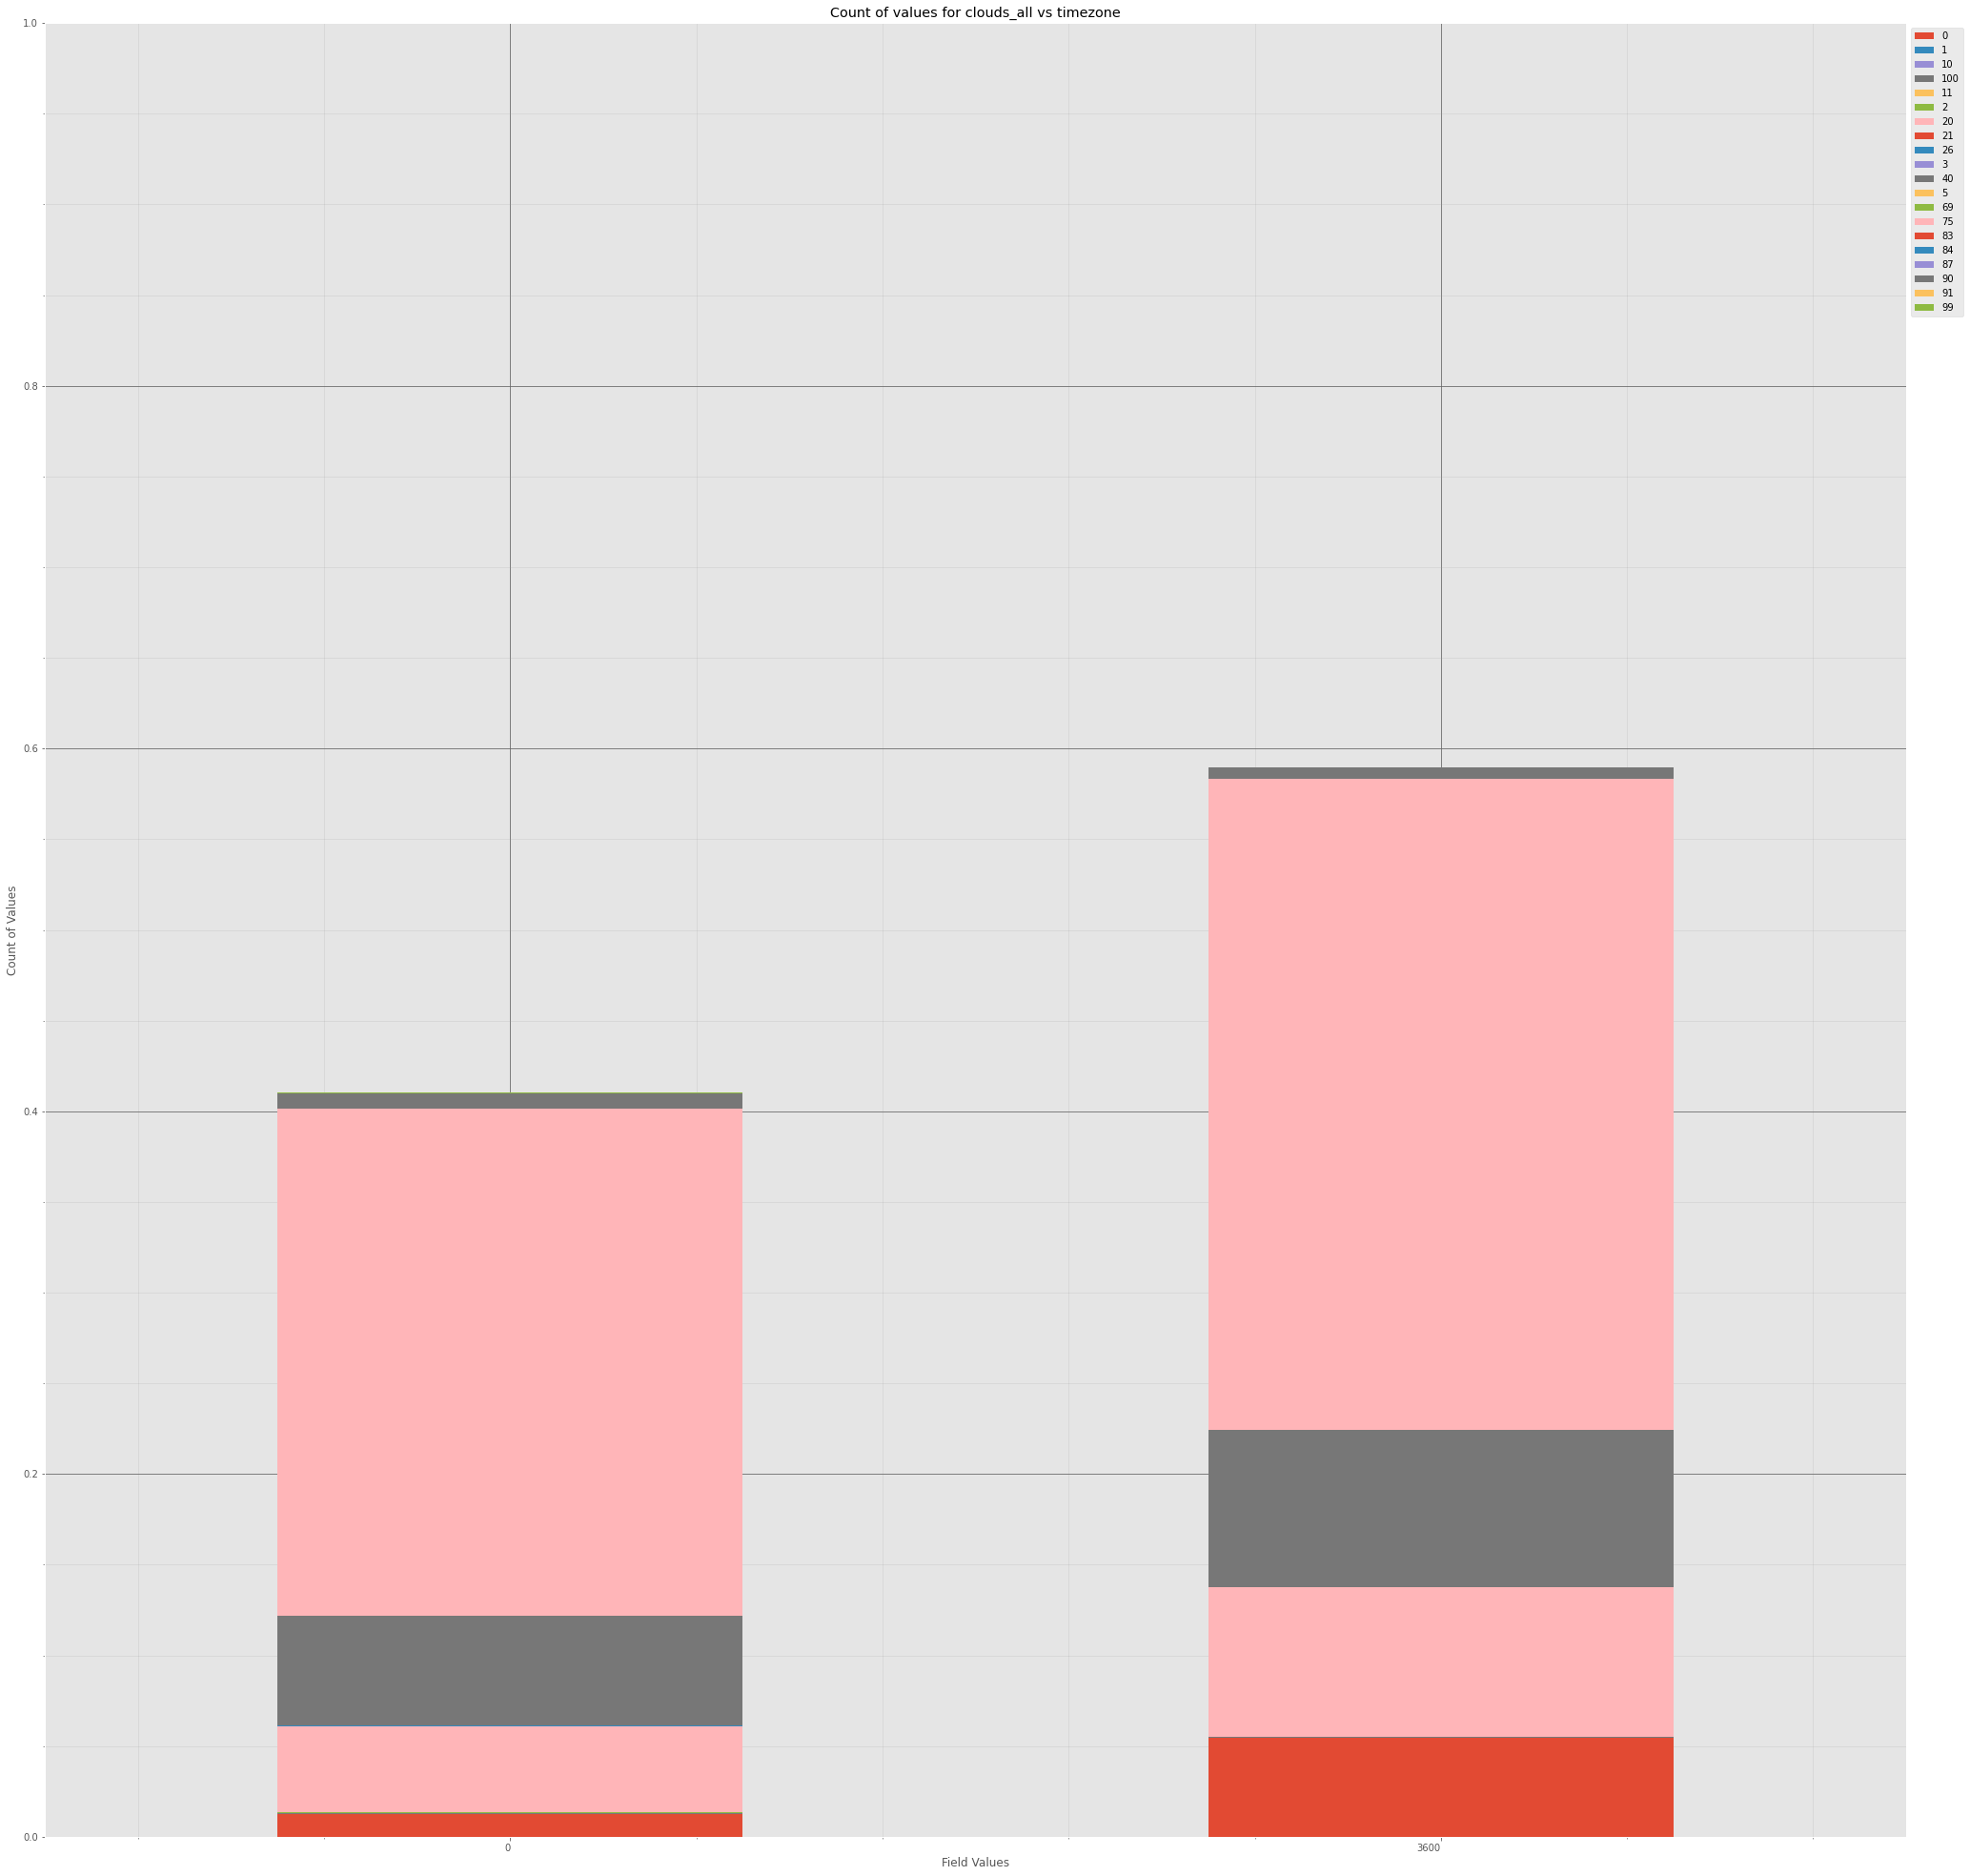



----------------------


Grouping over timezone|weather_id results in:



timezone weather_id  Rows  % Frequency
0         0        300   130     1.469259
1         0        301     2     0.022604
2         0        310   114     1.288427
3         0        311     2     0.022604
4         0        500   324     3.661844
5         0        501    33     0.372966
6         0        502     1     0.011302
7         0        520   134     1.514467
8         0        521    39     0.440778
9         0        600    30     0.339060
10        0        601     7     0.079114
11        0        612    10     0.113020
12        0        615     1     0.011302
13        0        620    66     0.745931
14        0        621     1     0.011302
15        0        701    40     0.452080
16        0        711     0     0.000000
17        0        741    50     0.565099
18        0        800   118     1.333635
19        0        801   415     4.690325
20        0        802   485     5.481465
21        0        803  1597    18.049277
22        0        804    30     0.339060
23     3600        300   139     1.570976
24     3600        301     2     0.022604
25     3600        310   109     1.231917
26     3600        311     0     0.000000
27     3600        500   285     3.221067
28     3600        501    14     0.158228
29     3600        502     0     0.000000
30     3600        520    94     1.062387
31     3600        521    81     0.915461
32     3600        600     0     0.000000
33     3600        601     0     0.000000
34     3600        612     1     0.011302
35     3600        615     0     0.000000
36     3600        620     0     0.000000
37     3600        621     0     0.000000
38     3600        701    37     0.418174
39     3600        711     1     0.011302
40     3600        741    39     0.440778
41     3600        800   484     5.470163
42     3600        801   706     7.979204
43     3600        802   738     8.340868
44     3600        803  2464    27.848101
45     3600        804    25     0.282550

Non Zero Data:


timezone weather_id  Rows  % Frequency
0         0        300   130     1.469259
1         0        301     2     0.022604
2         0        310   114     1.288427
3         0        311     2     0.022604
4         0        500   324     3.661844
5         0        501    33     0.372966
6         0        502     1     0.011302
7         0        520   134     1.514467
8         0        521    39     0.440778
9         0        600    30     0.339060
10        0        601     7     0.079114
11        0        612    10     0.113020
12        0        615     1     0.011302
13        0        620    66     0.745931
14        0        621     1     0.011302
15        0        701    40     0.452080
17        0        741    50     0.565099
18        0        800   118     1.333635
19        0        801   415     4.690325
20        0        802   485     5.481465
21        0        803  1597    18.049277
22        0        804    30     0.339060
23     3600        300   139     1.570976
24     3600        301     2     0.022604
25     3600        310   109     1.231917
27     3600        500   285     3.221067
28     3600        501    14     0.158228
30     3600        520    94     1.062387
31     3600        521    81     0.915461
34     3600        612     1     0.011302
38     3600        701    37     0.418174
39     3600        711     1     0.011302
40     3600        741    39     0.440778
41     3600        800   484     5.470163
42     3600        801   706     7.979204
43     3600        802   738     8.340868
44     3600        803  2464    27.848101
45     3600        804    25     0.282550

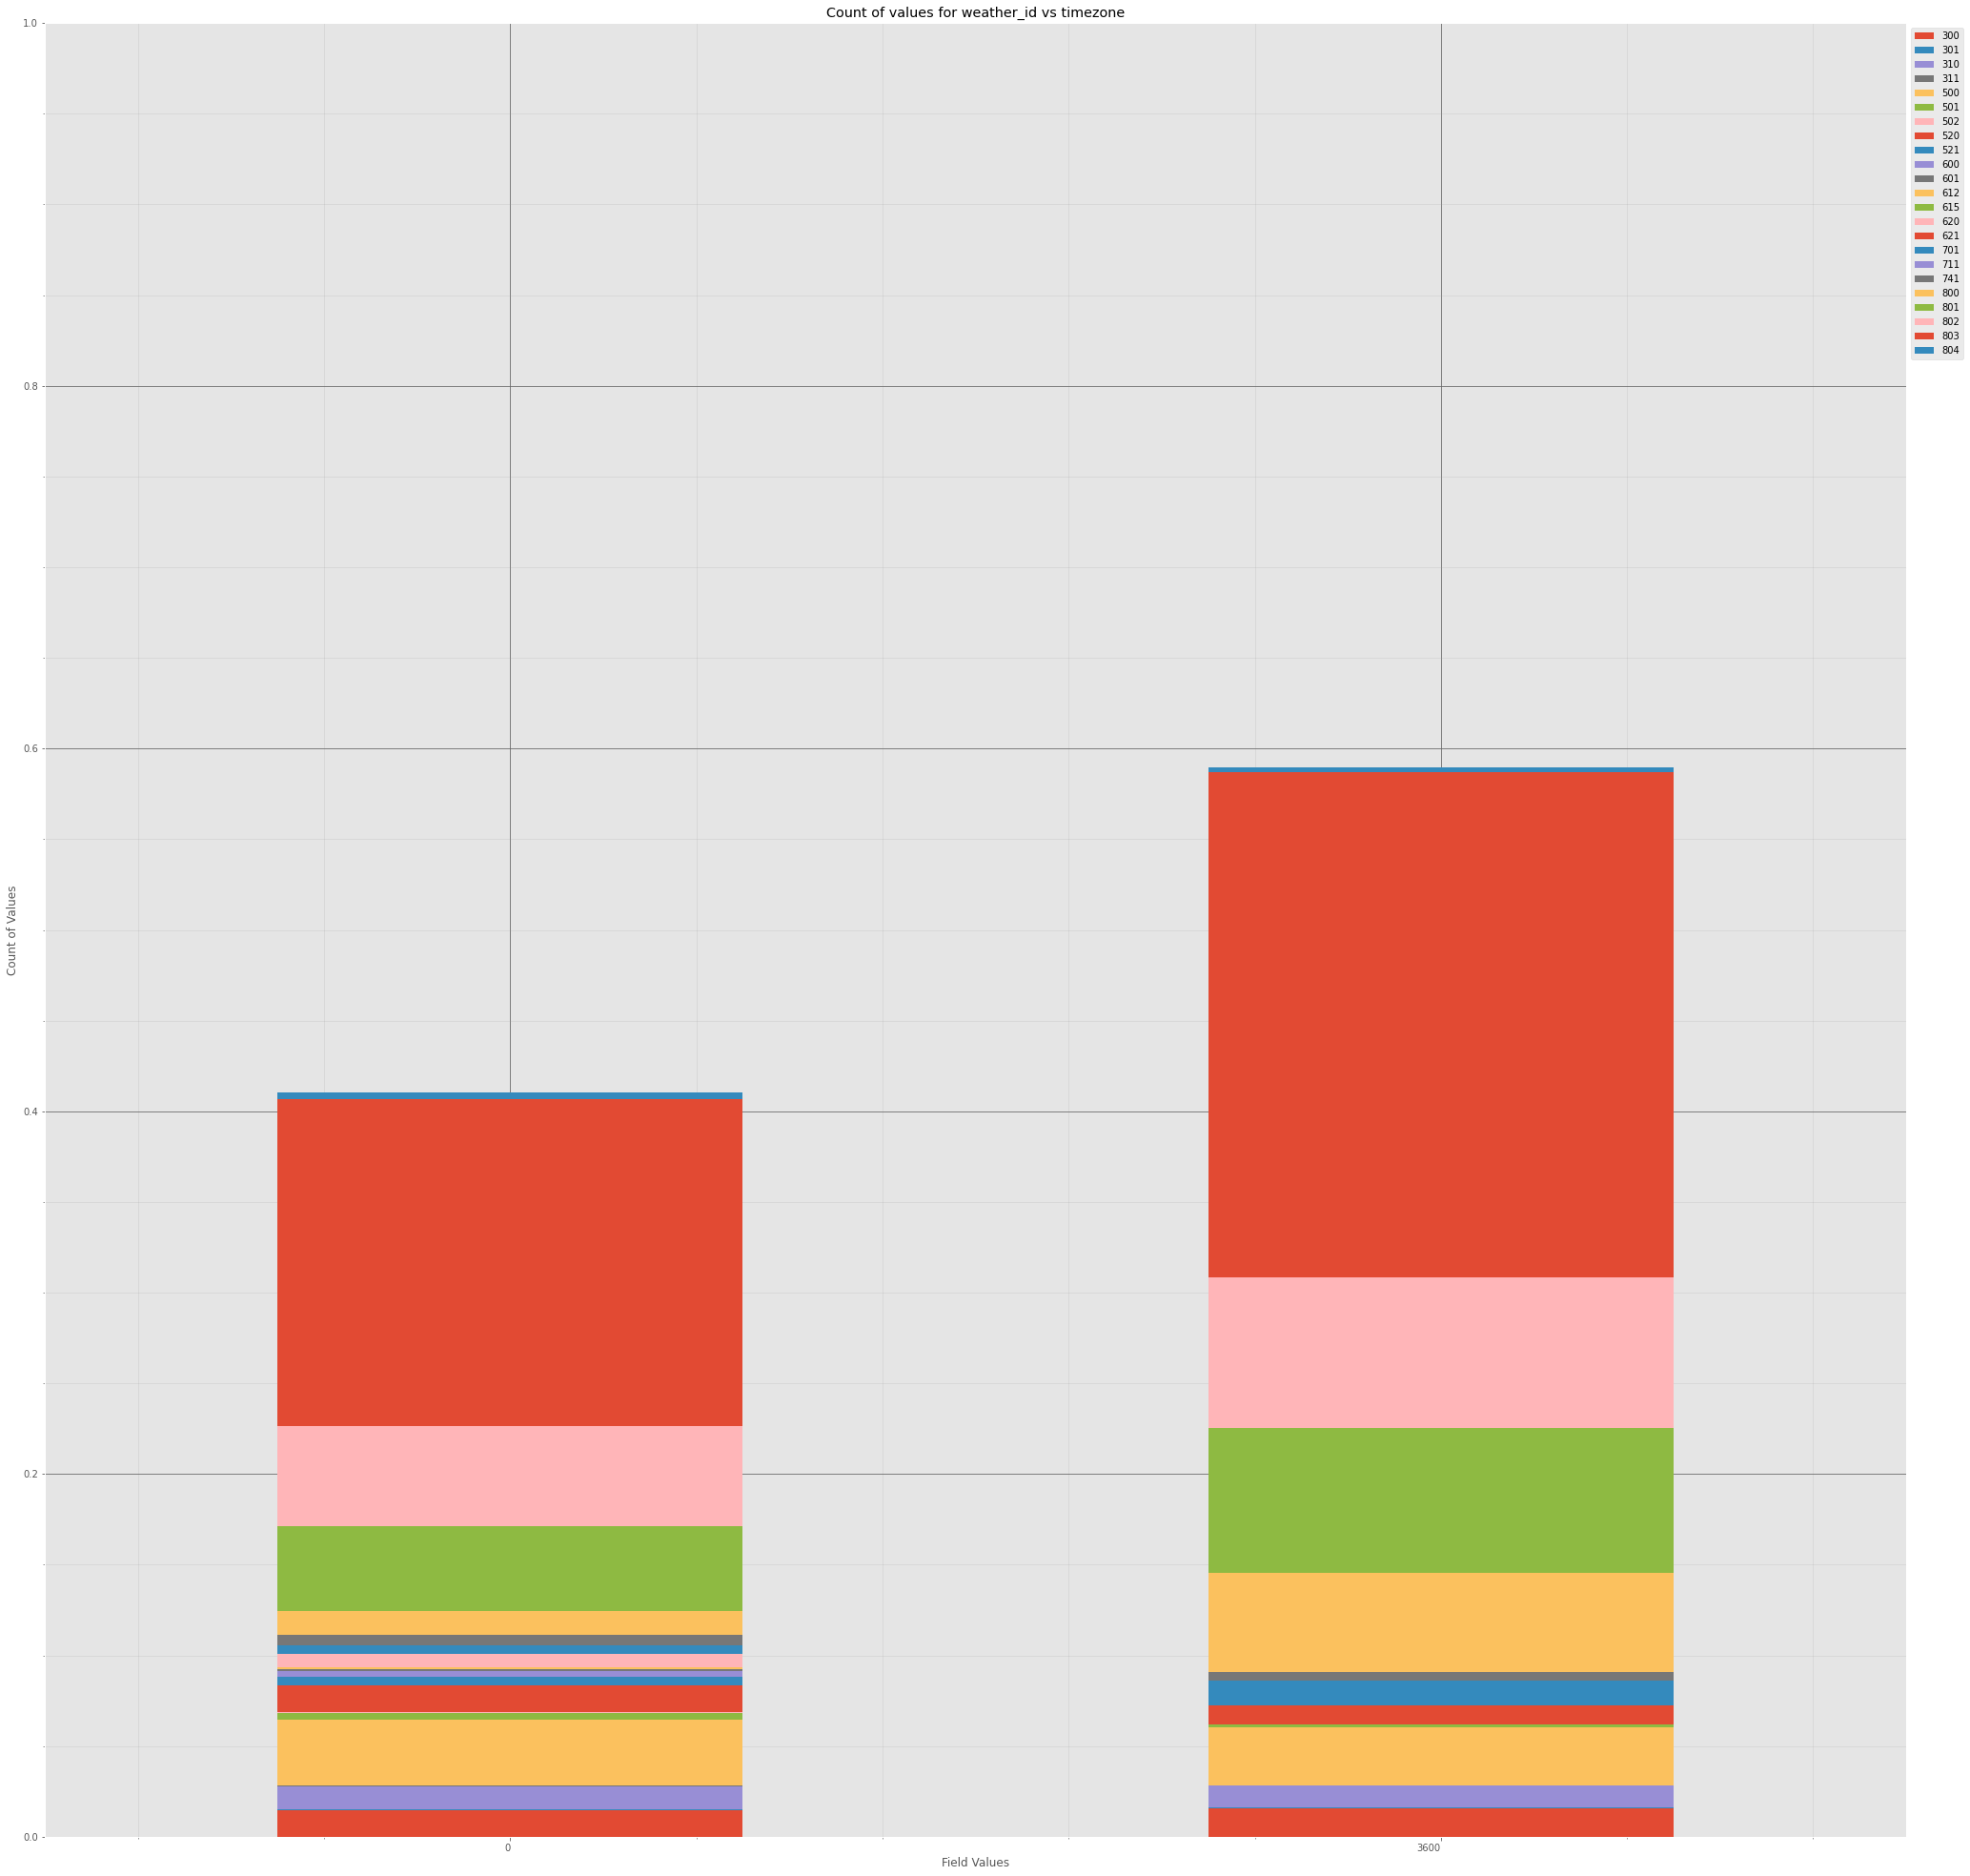



----------------------


Grouping over timezone|weather_description results in:



timezone           weather_description  Rows  % Frequency
0         0            light shower sleet    10     0.113020
1         0                 broken clouds  1597    18.049277
2         0                       drizzle     2     0.022604
3         0                    few clouds   415     4.690325
4         0                           fog    50     0.565099
5         0          heavy intensity rain     1     0.011302
6         0       light intensity drizzle   130     1.469259
7         0  light intensity drizzle rain   114     1.288427
8         0   light intensity shower rain   134     1.514467
9         0                    light rain   324     3.661844
10        0           light rain and snow     1     0.011302
11        0             light shower snow    66     0.745931
12        0                    light snow    30     0.339060
13        0                          mist    40     0.452080
14        0                 moderate rain    33     0.372966
15        0               overcast clouds    30     0.339060
16        0         proximity shower rain    37     0.418174
17        0              rain and drizzle     2     0.022604
18        0              scattered clouds   485     5.481465
19        0                   shower rain     2     0.022604
20        0                   shower snow     1     0.011302
21        0                  sky is clear   118     1.333635
22        0                         smoke     0     0.000000
23        0                          snow     7     0.079114
24     3600            light shower sleet     1     0.011302
25     3600                 broken clouds  2464    27.848101
26     3600                       drizzle     2     0.022604
27     3600                    few clouds   706     7.979204
28     3600                           fog    39     0.440778
29     3600          heavy intensity rain     0     0.000000
30     3600       light intensity drizzle   139     1.570976
31     3600  light intensity drizzle rain   109     1.231917
32     3600   light intensity shower rain    94     1.062387
33     3600                    light rain   285     3.221067
34     3600           light rain and snow     0     0.000000
35     3600             light shower snow     0     0.000000
36     3600                    light snow     0     0.000000
37     3600                          mist    37     0.418174
38     3600                 moderate rain    14     0.158228
39     3600               overcast clouds    25     0.282550
40     3600         proximity shower rain    81     0.915461
41     3600              rain and drizzle     0     0.000000
42     3600              scattered clouds   738     8.340868
43     3600                   shower rain     0     0.000000
44     3600                   shower snow     0     0.000000
45     3600                  sky is clear   484     5.470163
46     3600                         smoke     1     0.011302
47     3600                          snow     0     0.000000

Non Zero Data:


timezone           weather_description  Rows  % Frequency
0         0            light shower sleet    10     0.113020
1         0                 broken clouds  1597    18.049277
2         0                       drizzle     2     0.022604
3         0                    few clouds   415     4.690325
4         0                           fog    50     0.565099
5         0          heavy intensity rain     1     0.011302
6         0       light intensity drizzle   130     1.469259
7         0  light intensity drizzle rain   114     1.288427
8         0   light intensity shower rain   134     1.514467
9         0                    light rain   324     3.661844
10        0           light rain and snow     1     0.011302
11        0             light shower snow    66     0.745931
12        0                    light snow    30     0.339060
13        0                          mist    40     0.452080
14        0                 moderate rain    33     0.372966
15        0               overcast clouds    30     0.339060
16        0         proximity shower rain    37     0.418174
17        0              rain and drizzle     2     0.022604
18        0              scattered clouds   485     5.481465
19        0                   shower rain     2     0.022604
20        0                   shower snow     1     0.011302
21        0                  sky is clear   118     1.333635
23        0                          snow     7     0.079114
24     3600            light shower sleet     1     0.011302
25     3600                 broken clouds  2464    27.848101
26     3600                       drizzle     2     0.022604
27     3600                    few clouds   706     7.979204
28     3600                           fog    39     0.440778
30     3600       light intensity drizzle   139     1.570976
31     3600  light intensity drizzle rain   109     1.231917
32     3600   light intensity shower rain    94     1.062387
33     3600                    light rain   285     3.221067
37     3600                          mist    37     0.418174
38     3600                 moderate rain    14     0.158228
39     3600               overcast clouds    25     0.282550
40     3600         proximity shower rain    81     0.915461
42     3600              scattered clouds   738     8.340868
45     3600                  sky is clear   484     5.470163
46     3600                         smoke     1     0.011302

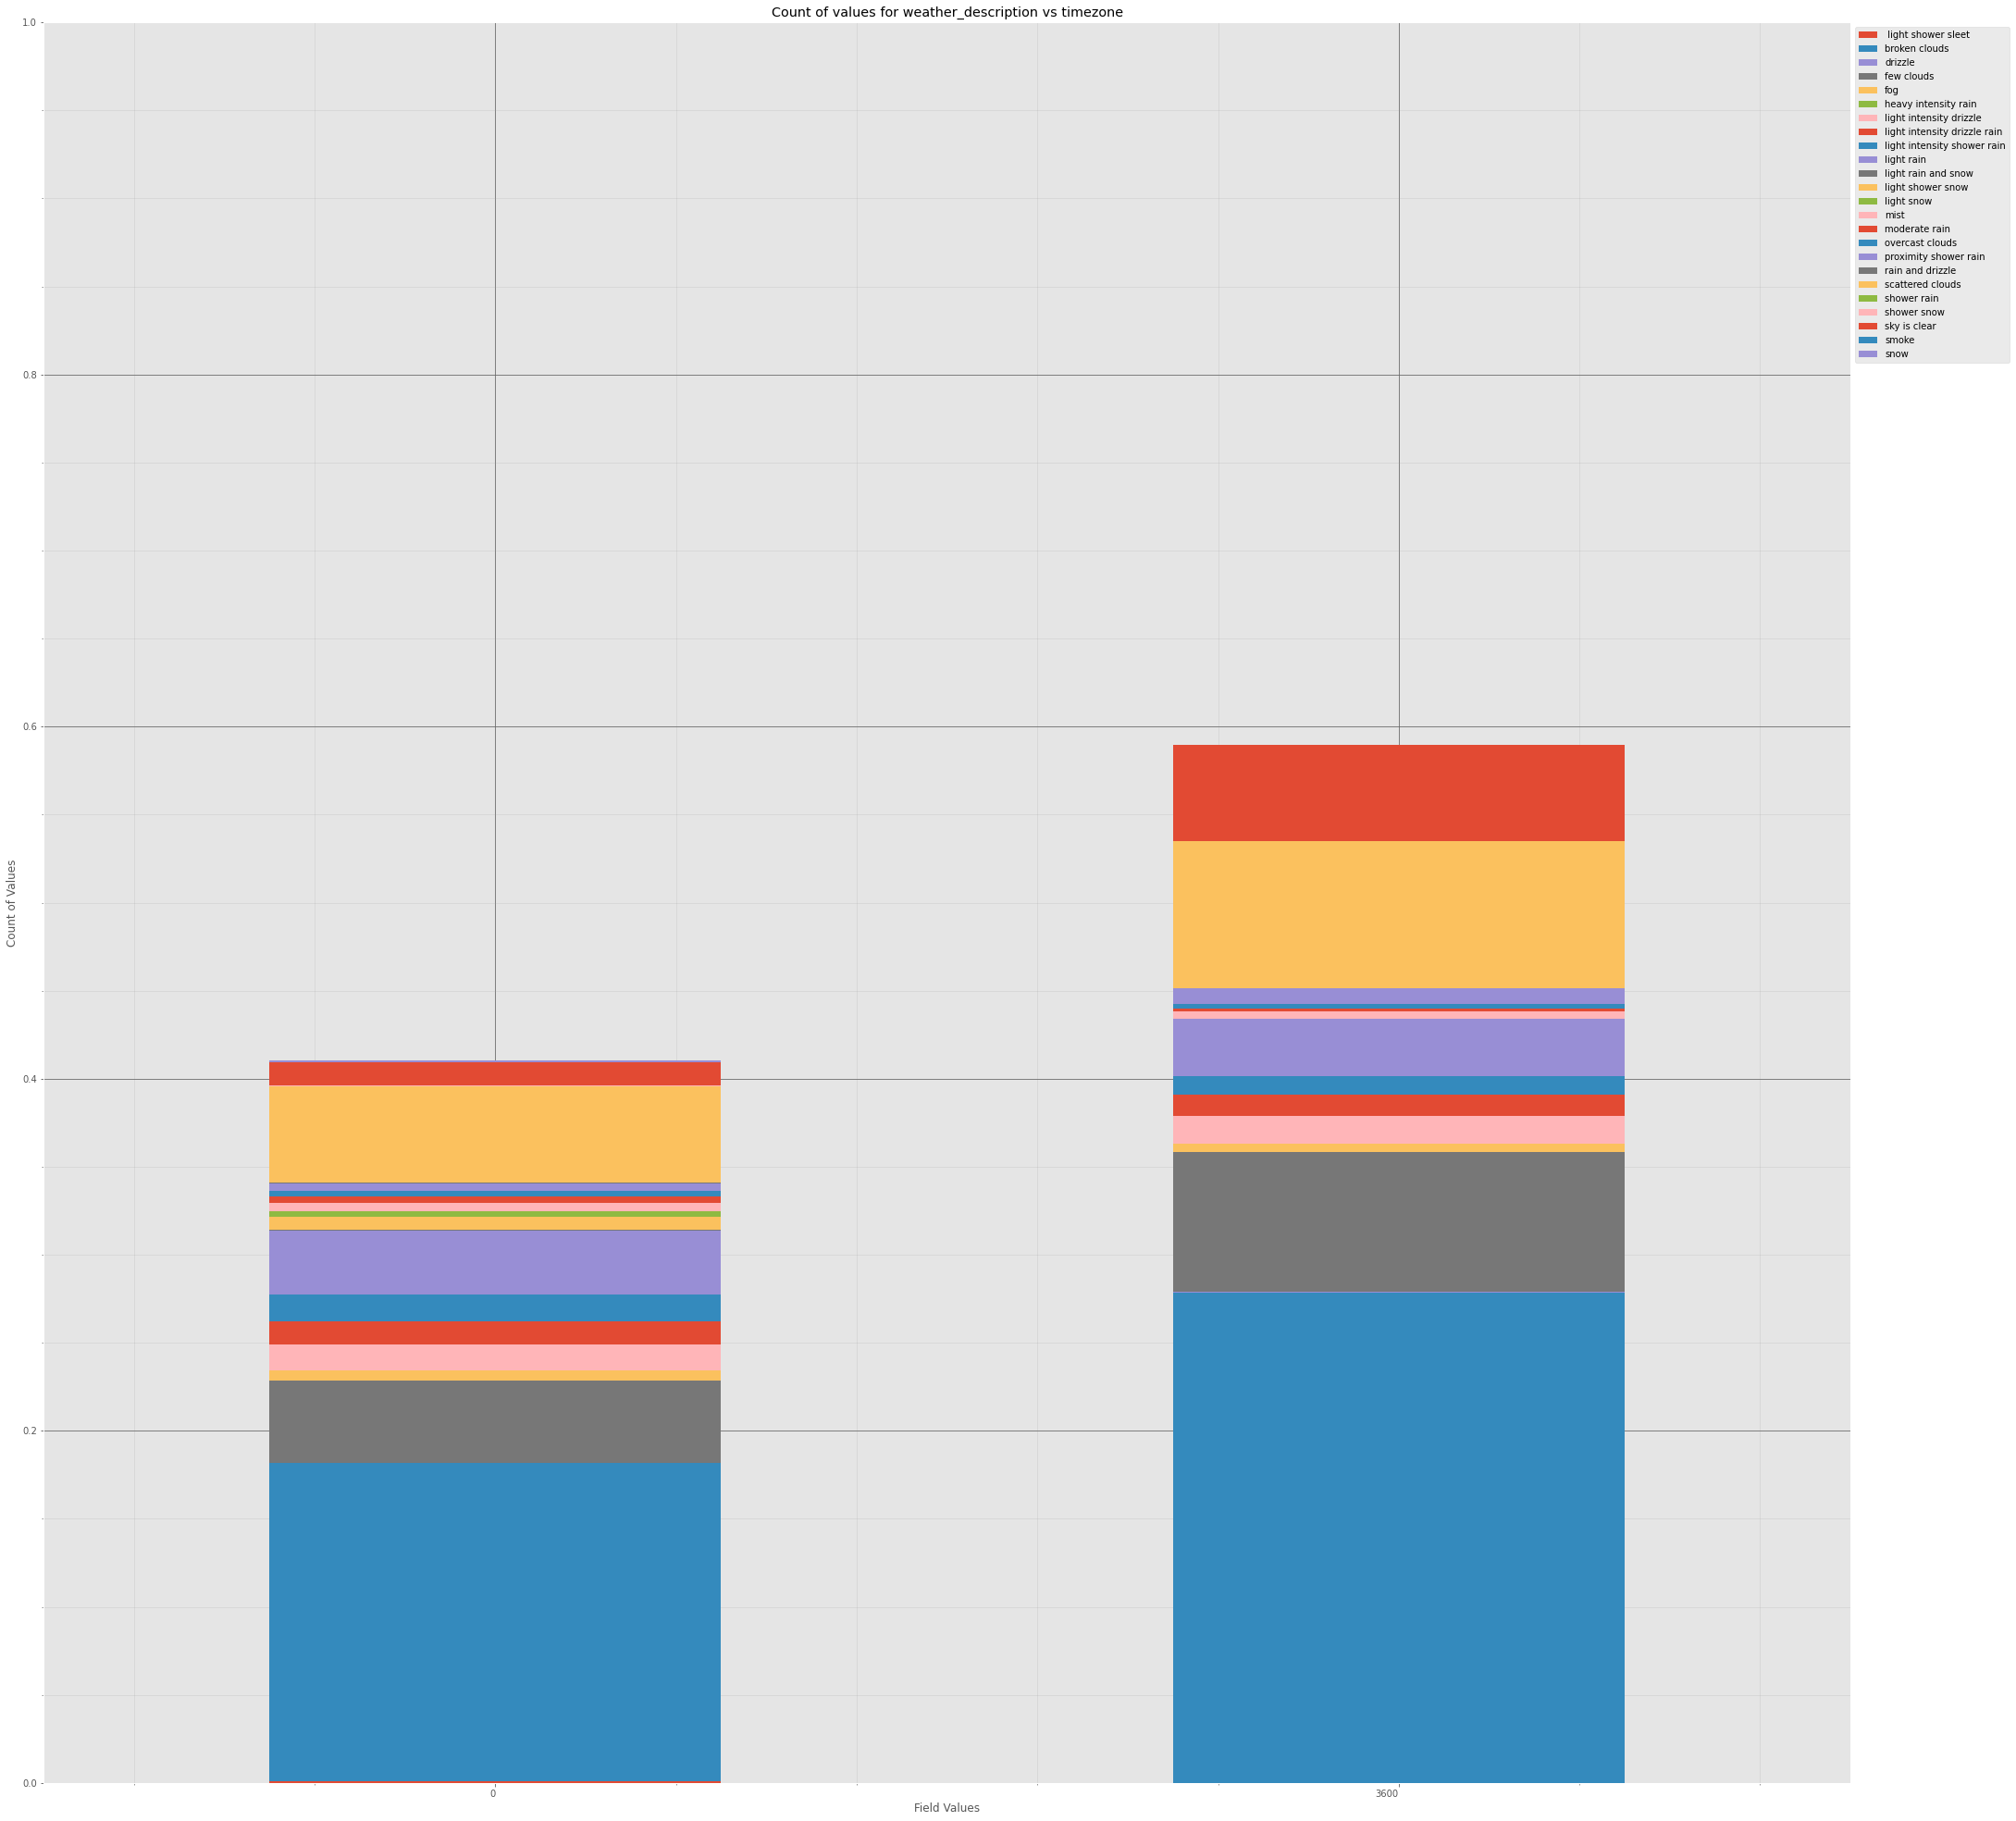



----------------------


Grouping over timezone|weather_icon results in:



timezone weather_icon  Rows  % Frequency
0         0          01d     6     0.067812
1         0          01n   112     1.265823
2         0          02d   156     1.763110
3         0          02n   259     2.927215
4         0          03d   203     2.294304
5         0          03n   282     3.187161
6         0          04d   666     7.527125
7         0          04n   961    10.861212
8         0          09d   178     2.011754
9         0          09n   243     2.746383
10        0          10d    97     1.096293
11        0          10n   261     2.949819
12        0          13d    44     0.497288
13        0          13n    71     0.802441
14        0          50d    27     0.305154
15        0          50n    63     0.712025
16     3600          01d   231     2.610759
17     3600          01n   253     2.859403
18     3600          02d   391     4.419078
19     3600          02n   315     3.560127
20     3600          03d   442     4.995479
21     3600          03n   296     3.345389
22     3600          04d  1568    17.721519
23     3600          04n   921    10.409132
24     3600          09d   285     3.221067
25     3600          09n   140     1.582278
26     3600          10d   177     2.000452
27     3600          10n   122     1.378843
28     3600          13d     0     0.000000
29     3600          13n     1     0.011302
30     3600          50d    42     0.474684
31     3600          50n    35     0.395570

Non Zero Data:


timezone weather_icon  Rows  % Frequency
0         0          01d     6     0.067812
1         0          01n   112     1.265823
2         0          02d   156     1.763110
3         0          02n   259     2.927215
4         0          03d   203     2.294304
5         0          03n   282     3.187161
6         0          04d   666     7.527125
7         0          04n   961    10.861212
8         0          09d   178     2.011754
9         0          09n   243     2.746383
10        0          10d    97     1.096293
11        0          10n   261     2.949819
12        0          13d    44     0.497288
13        0          13n    71     0.802441
14        0          50d    27     0.305154
15        0          50n    63     0.712025
16     3600          01d   231     2.610759
17     3600          01n   253     2.859403
18     3600          02d   391     4.419078
19     3600          02n   315     3.560127
20     3600          03d   442     4.995479
21     3600          03n   296     3.345389
22     3600          04d  1568    17.721519
23     3600          04n   921    10.409132
24     3600          09d   285     3.221067
25     3600          09n   140     1.582278
26     3600          10d   177     2.000452
27     3600          10n   122     1.378843
29     3600          13n     1     0.011302
30     3600          50d    42     0.474684
31     3600          50n    35     0.395570

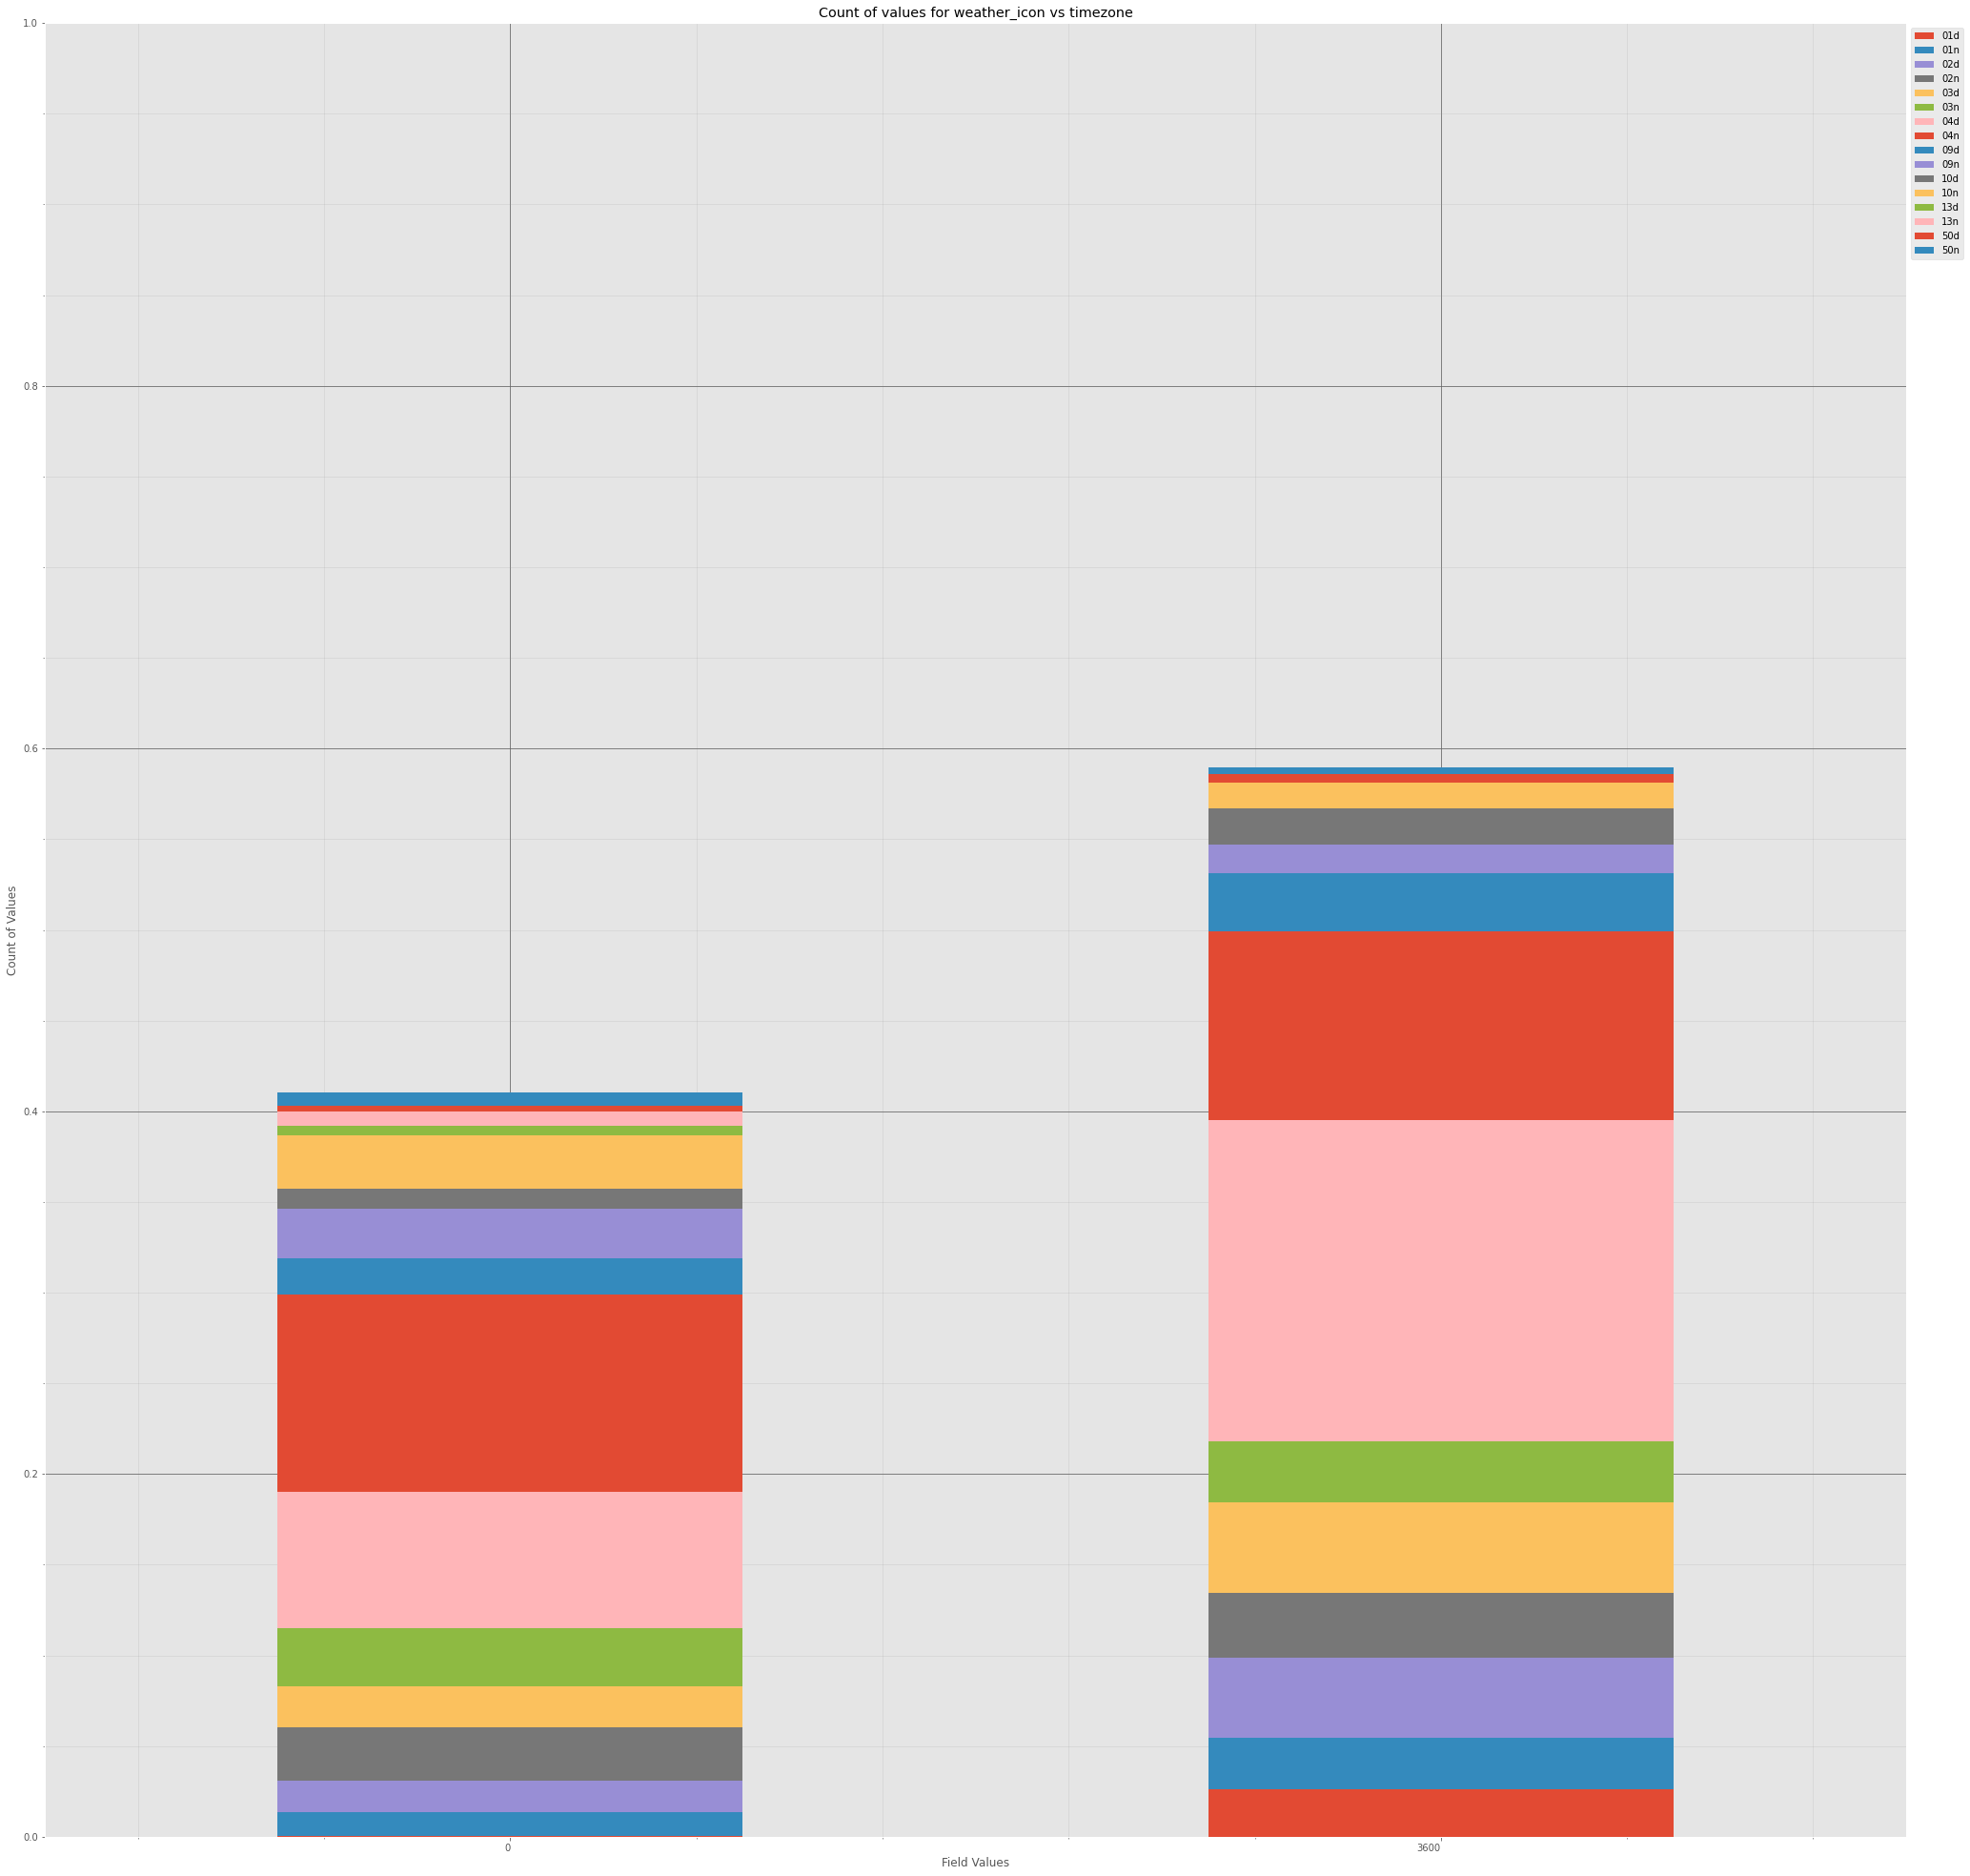



----------------------


Grouping over city_name|timezone results in:



city_name timezone  Rows  % Frequency
0    Dublin        0  3629    41.014919
1    Dublin     3600  5219    58.985081

Non Zero Data:


city_name timezone  Rows  % Frequency
0    Dublin        0  3629    41.014919
1    Dublin     3600  5219    58.985081

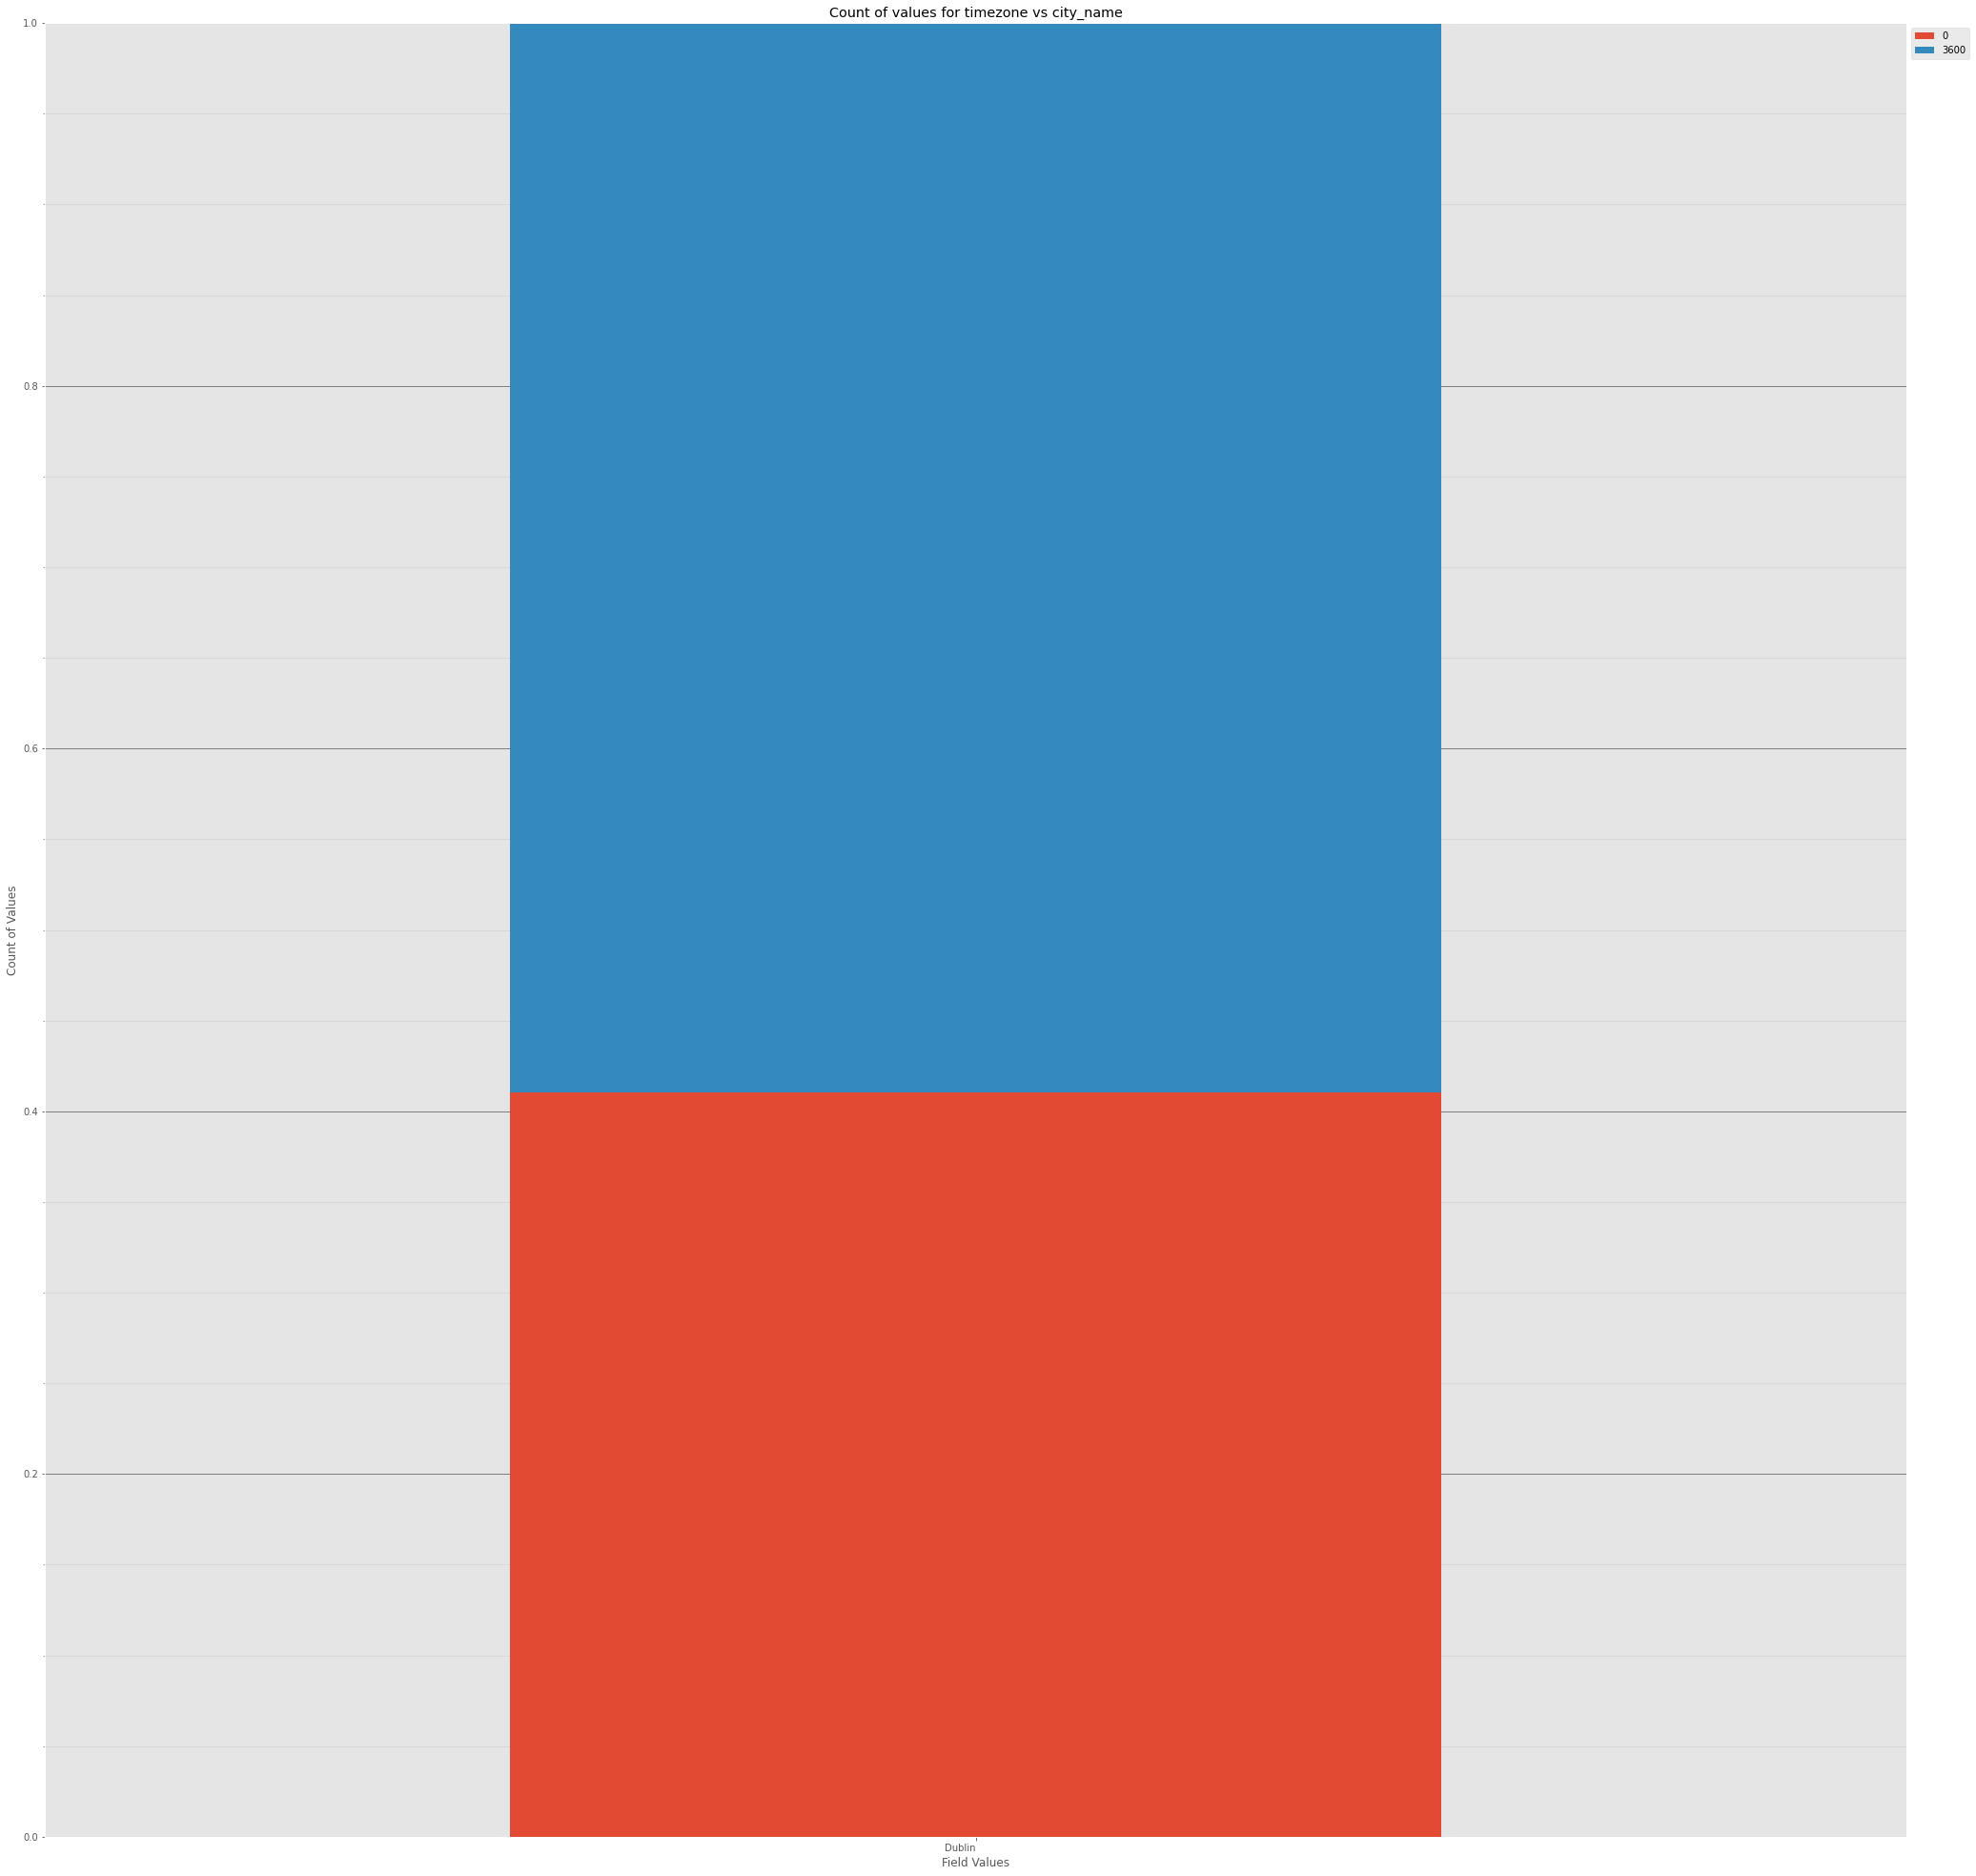



----------------------


Grouping over city_name|clouds_all results in:



city_name clouds_all  Rows  % Frequency
0     Dublin          0   593     6.702080
1     Dublin          1     2     0.022604
2     Dublin         10     1     0.011302
3     Dublin        100     4     0.045208
4     Dublin         11     2     0.022604
5     Dublin          2     4     0.045208
6     Dublin         20  1150    12.997288
7     Dublin         21     1     0.011302
8     Dublin         26     1     0.011302
9     Dublin          3     1     0.011302
10    Dublin         40  1303    14.726492
11    Dublin          5     1     0.011302
12    Dublin         69     1     0.011302
13    Dublin         75  5646    63.811031
14    Dublin         83     1     0.011302
15    Dublin         84     1     0.011302
16    Dublin         87     1     0.011302
17    Dublin         90   133     1.503165
18    Dublin         91     1     0.011302
19    Dublin         99     1     0.011302

Non Zero Data:


city_name clouds_all  Rows  % Frequency
0     Dublin          0   593     6.702080
1     Dublin          1     2     0.022604
2     Dublin         10     1     0.011302
3     Dublin        100     4     0.045208
4     Dublin         11     2     0.022604
5     Dublin          2     4     0.045208
6     Dublin         20  1150    12.997288
7     Dublin         21     1     0.011302
8     Dublin         26     1     0.011302
9     Dublin          3     1     0.011302
10    Dublin         40  1303    14.726492
11    Dublin          5     1     0.011302
12    Dublin         69     1     0.011302
13    Dublin         75  5646    63.811031
14    Dublin         83     1     0.011302
15    Dublin         84     1     0.011302
16    Dublin         87     1     0.011302
17    Dublin         90   133     1.503165
18    Dublin         91     1     0.011302
19    Dublin         99     1     0.011302

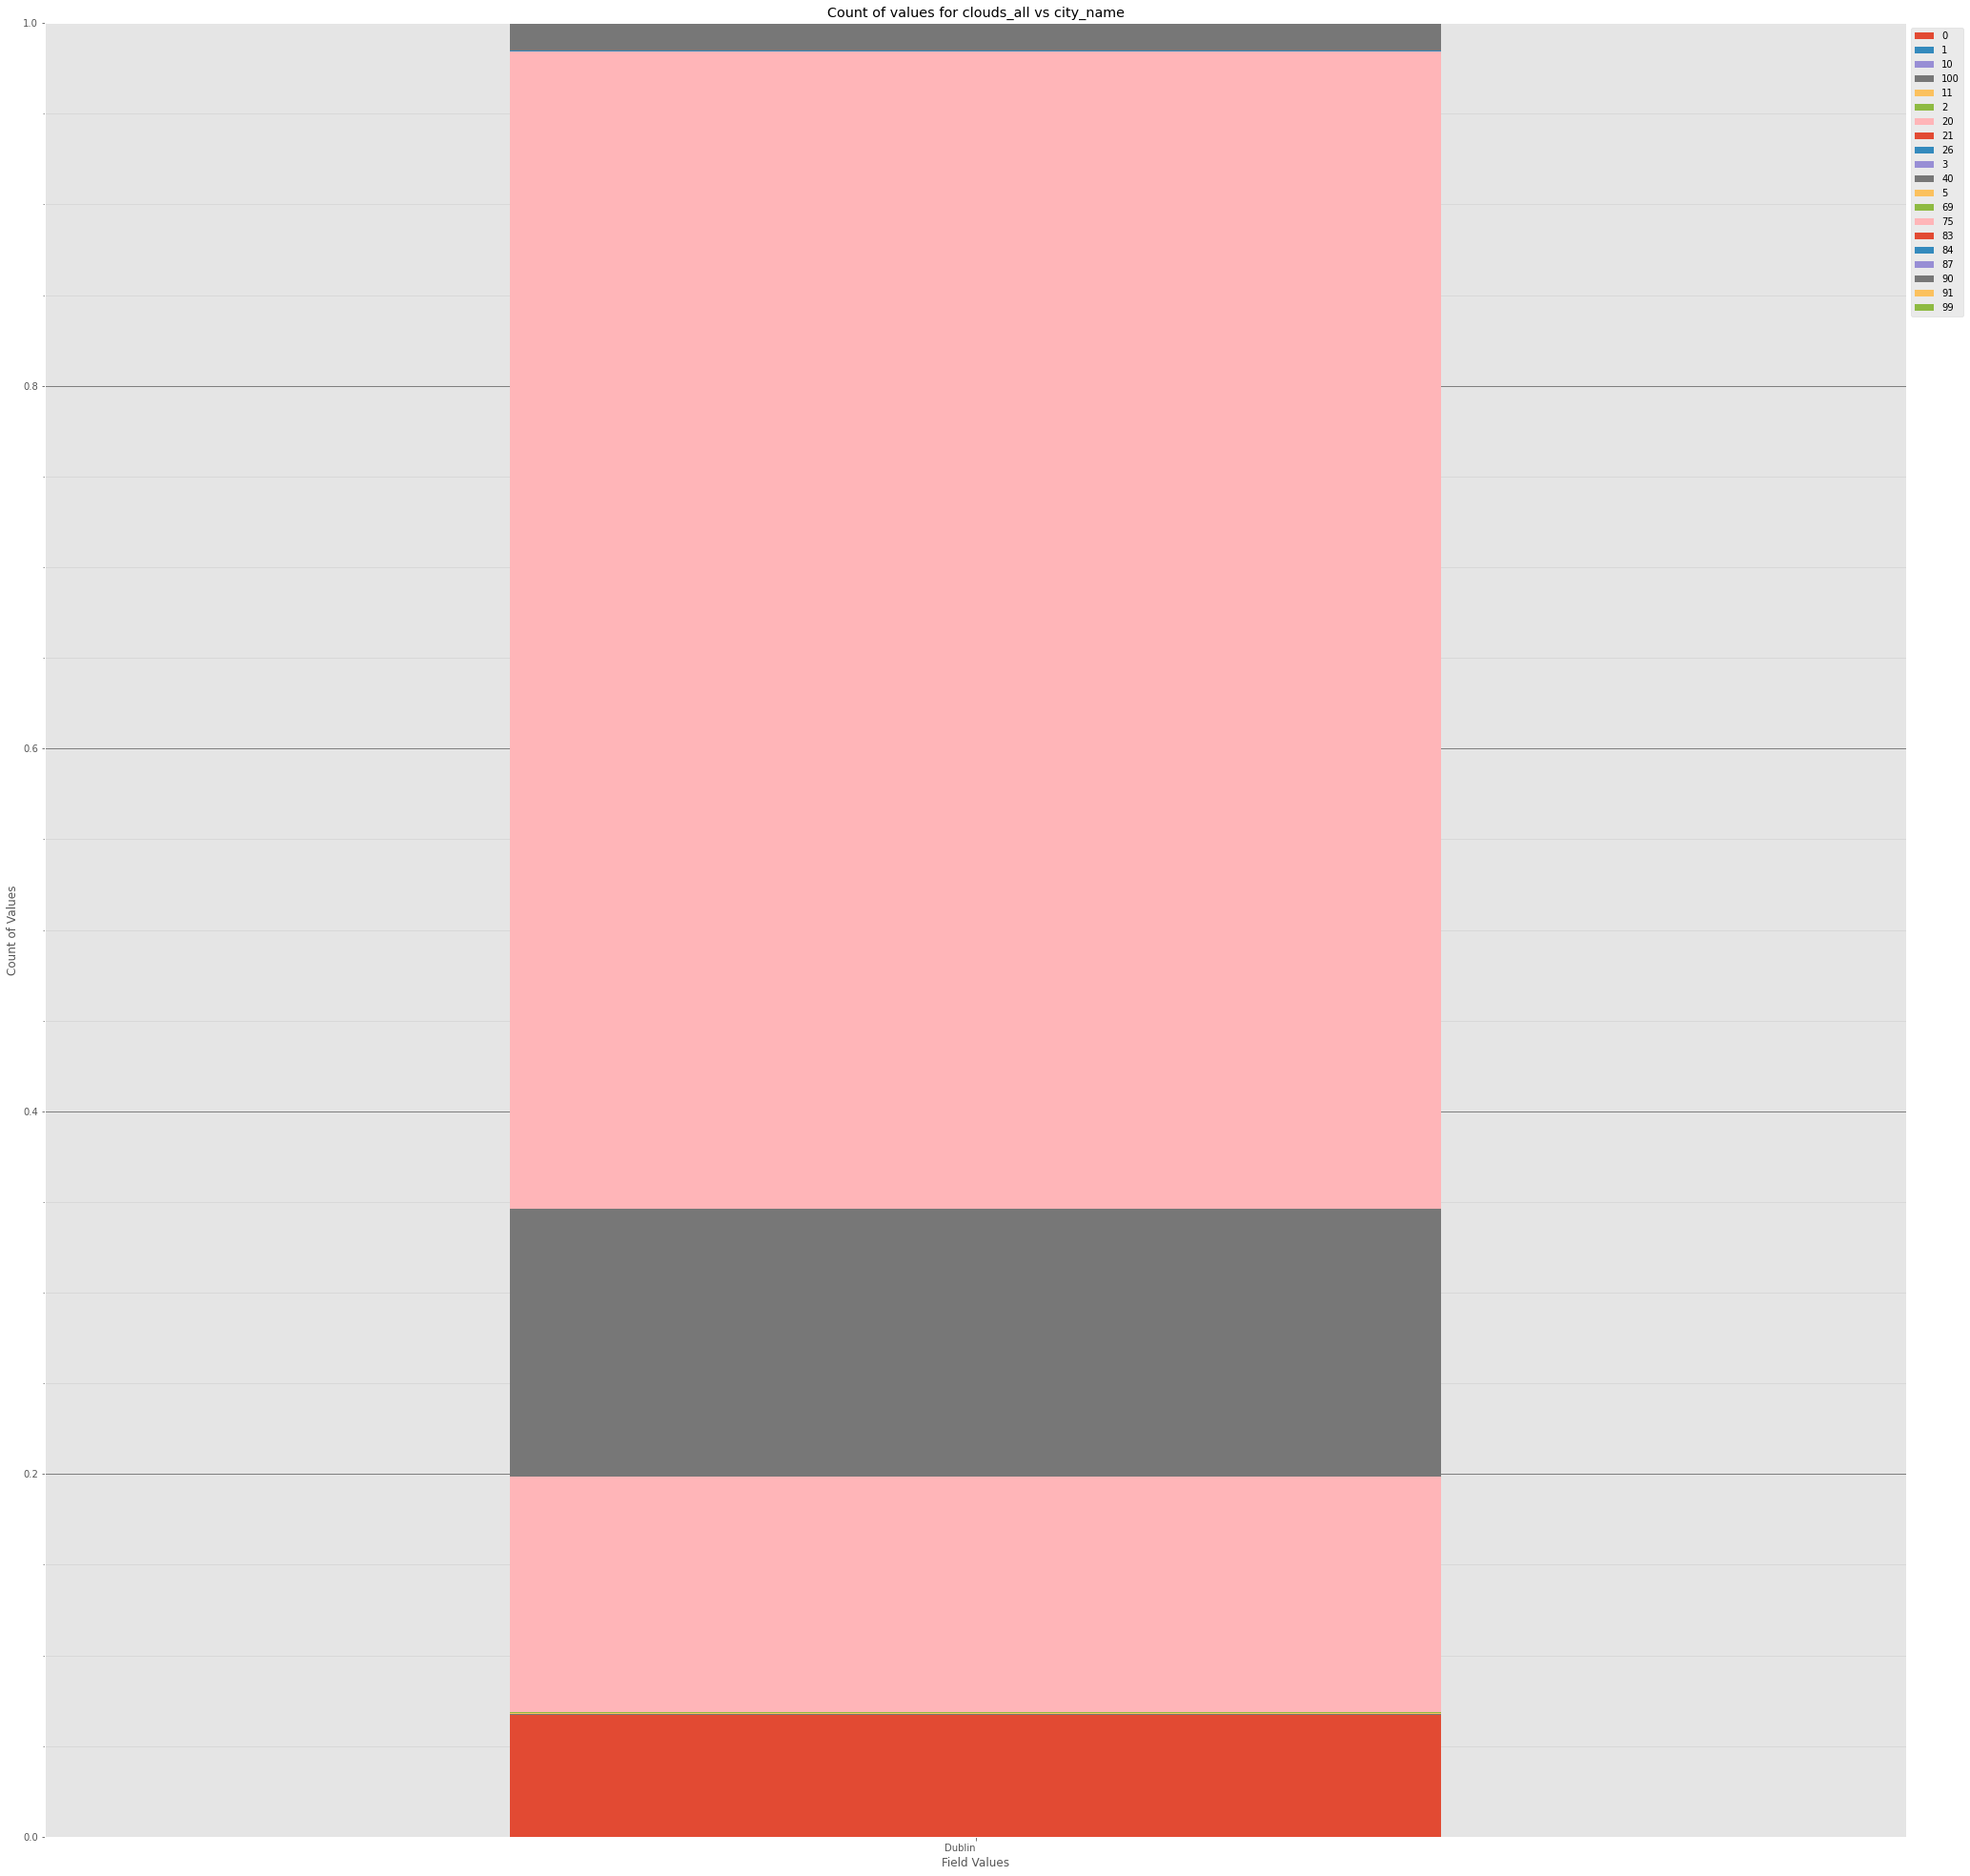



----------------------


Grouping over city_name|weather_id results in:



city_name weather_id  Rows  % Frequency
0     Dublin        300   269     3.040235
1     Dublin        301     4     0.045208
2     Dublin        310   223     2.520344
3     Dublin        311     2     0.022604
4     Dublin        500   609     6.882911
5     Dublin        501    47     0.531193
6     Dublin        502     1     0.011302
7     Dublin        520   228     2.576854
8     Dublin        521   120     1.356239
9     Dublin        600    30     0.339060
10    Dublin        601     7     0.079114
11    Dublin        612    11     0.124322
12    Dublin        615     1     0.011302
13    Dublin        620    66     0.745931
14    Dublin        621     1     0.011302
15    Dublin        701    77     0.870253
16    Dublin        711     1     0.011302
17    Dublin        741    89     1.005877
18    Dublin        800   602     6.803797
19    Dublin        801  1121    12.669530
20    Dublin        802  1223    13.822333
21    Dublin        803  4061    45.897378
22    Dublin        804    55     0.621609

Non Zero Data:


city_name weather_id  Rows  % Frequency
0     Dublin        300   269     3.040235
1     Dublin        301     4     0.045208
2     Dublin        310   223     2.520344
3     Dublin        311     2     0.022604
4     Dublin        500   609     6.882911
5     Dublin        501    47     0.531193
6     Dublin        502     1     0.011302
7     Dublin        520   228     2.576854
8     Dublin        521   120     1.356239
9     Dublin        600    30     0.339060
10    Dublin        601     7     0.079114
11    Dublin        612    11     0.124322
12    Dublin        615     1     0.011302
13    Dublin        620    66     0.745931
14    Dublin        621     1     0.011302
15    Dublin        701    77     0.870253
16    Dublin        711     1     0.011302
17    Dublin        741    89     1.005877
18    Dublin        800   602     6.803797
19    Dublin        801  1121    12.669530
20    Dublin        802  1223    13.822333
21    Dublin        803  4061    45.897378
22    Dublin        804    55     0.621609

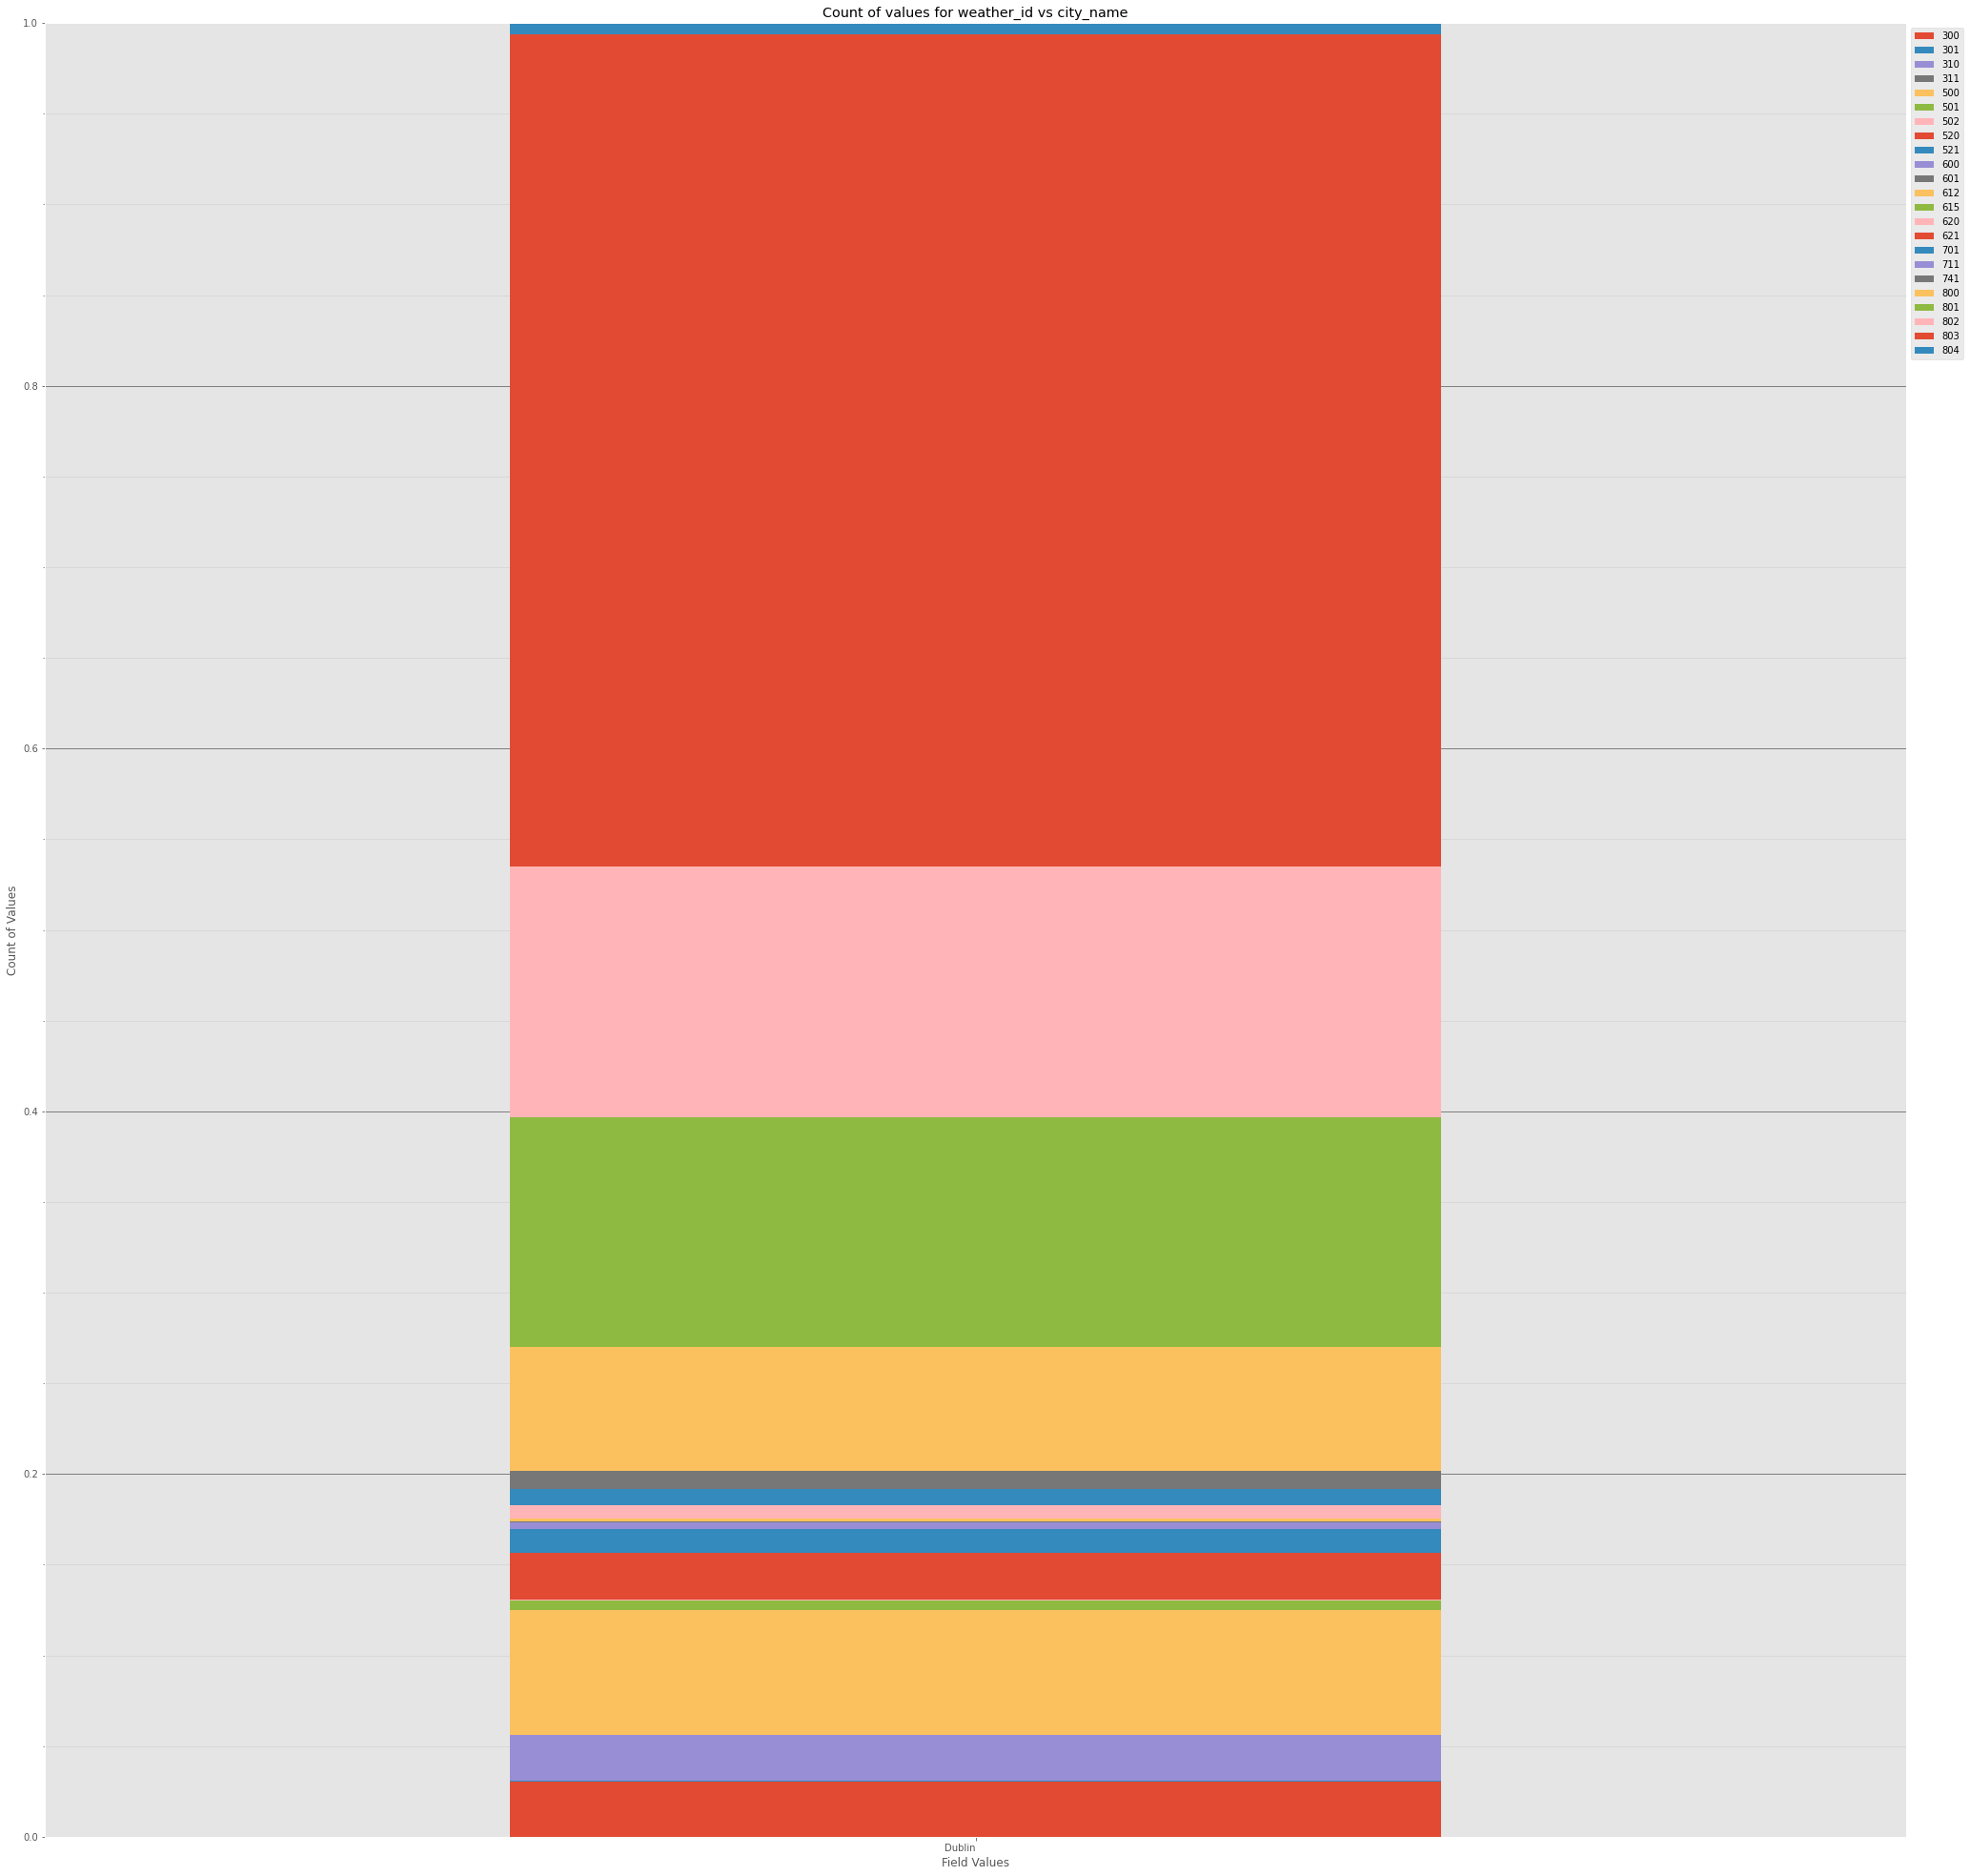



----------------------


Grouping over city_name|weather_description results in:



city_name           weather_description  Rows  % Frequency
0     Dublin            light shower sleet    11     0.124322
1     Dublin                 broken clouds  4061    45.897378
2     Dublin                       drizzle     4     0.045208
3     Dublin                    few clouds  1121    12.669530
4     Dublin                           fog    89     1.005877
5     Dublin          heavy intensity rain     1     0.011302
6     Dublin       light intensity drizzle   269     3.040235
7     Dublin  light intensity drizzle rain   223     2.520344
8     Dublin   light intensity shower rain   228     2.576854
9     Dublin                    light rain   609     6.882911
10    Dublin           light rain and snow     1     0.011302
11    Dublin             light shower snow    66     0.745931
12    Dublin                    light snow    30     0.339060
13    Dublin                          mist    77     0.870253
14    Dublin                 moderate rain    47     0.531193
15    Dublin               overcast clouds    55     0.621609
16    Dublin         proximity shower rain   118     1.333635
17    Dublin              rain and drizzle     2     0.022604
18    Dublin              scattered clouds  1223    13.822333
19    Dublin                   shower rain     2     0.022604
20    Dublin                   shower snow     1     0.011302
21    Dublin                  sky is clear   602     6.803797
22    Dublin                         smoke     1     0.011302
23    Dublin                          snow     7     0.079114

Non Zero Data:


city_name           weather_description  Rows  % Frequency
0     Dublin            light shower sleet    11     0.124322
1     Dublin                 broken clouds  4061    45.897378
2     Dublin                       drizzle     4     0.045208
3     Dublin                    few clouds  1121    12.669530
4     Dublin                           fog    89     1.005877
5     Dublin          heavy intensity rain     1     0.011302
6     Dublin       light intensity drizzle   269     3.040235
7     Dublin  light intensity drizzle rain   223     2.520344
8     Dublin   light intensity shower rain   228     2.576854
9     Dublin                    light rain   609     6.882911
10    Dublin           light rain and snow     1     0.011302
11    Dublin             light shower snow    66     0.745931
12    Dublin                    light snow    30     0.339060
13    Dublin                          mist    77     0.870253
14    Dublin                 moderate rain    47     0.531193
15    Dublin               overcast clouds    55     0.621609
16    Dublin         proximity shower rain   118     1.333635
17    Dublin              rain and drizzle     2     0.022604
18    Dublin              scattered clouds  1223    13.822333
19    Dublin                   shower rain     2     0.022604
20    Dublin                   shower snow     1     0.011302
21    Dublin                  sky is clear   602     6.803797
22    Dublin                         smoke     1     0.011302
23    Dublin                          snow     7     0.079114

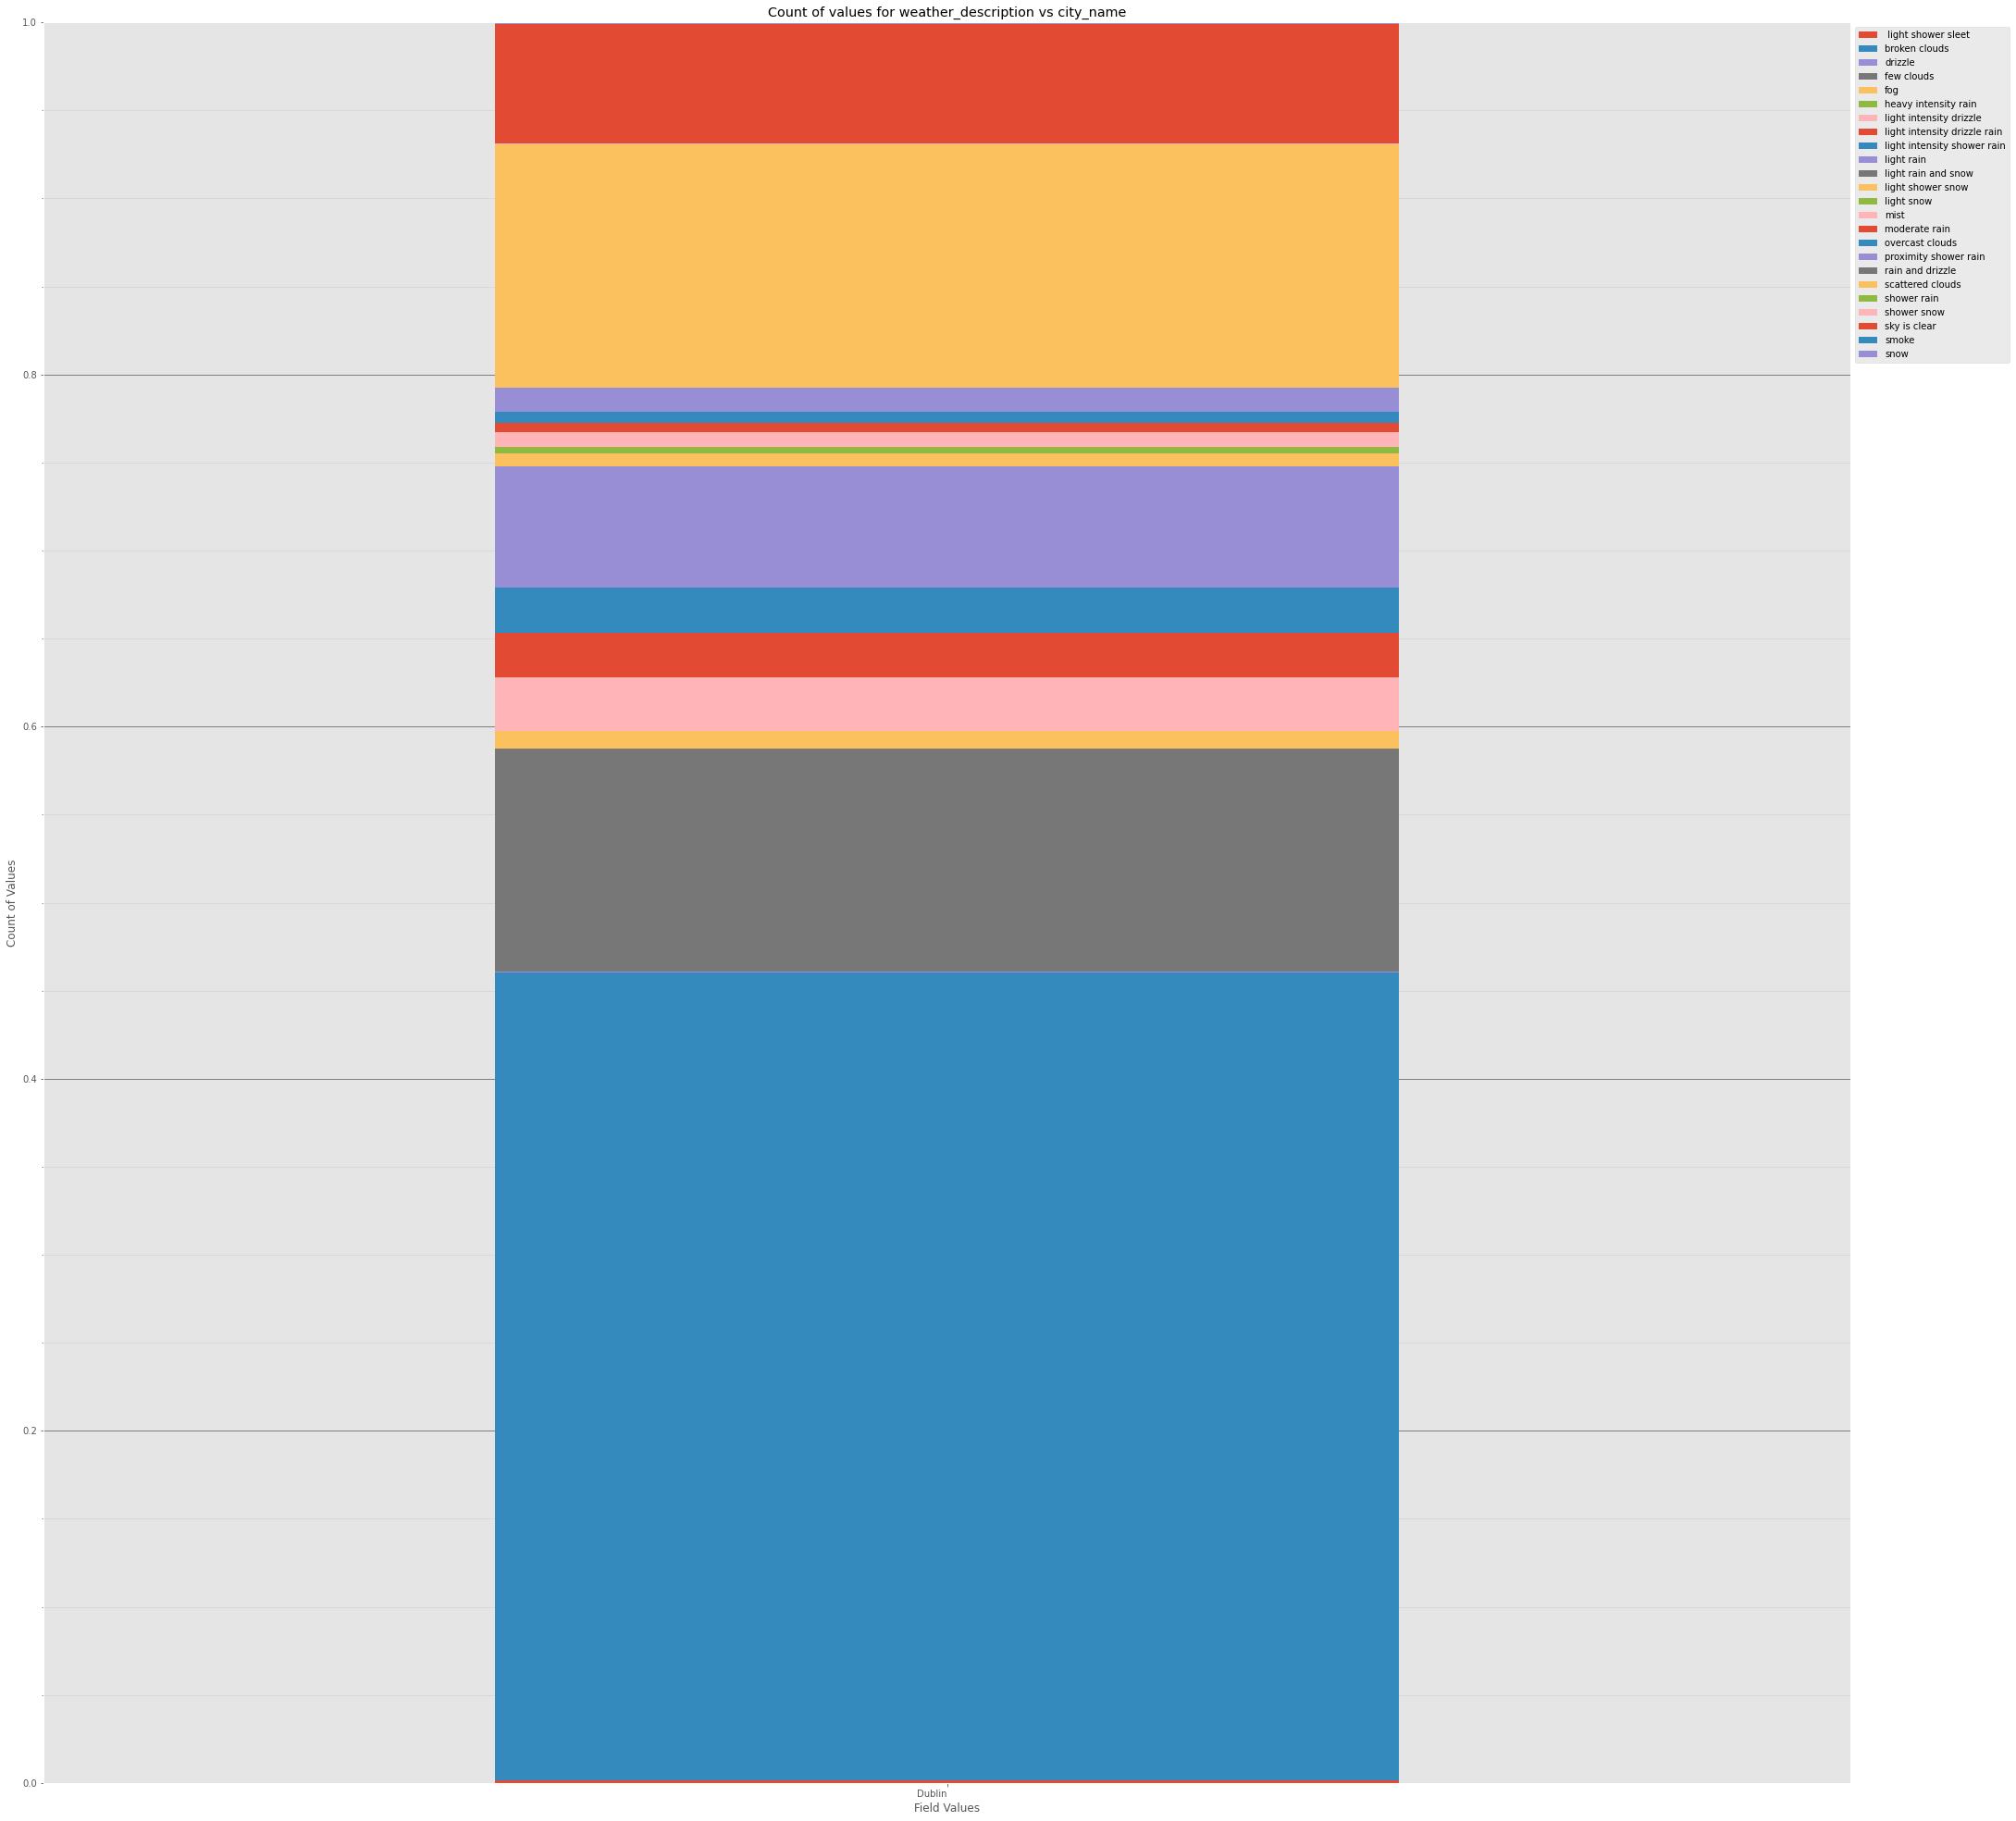



----------------------


Grouping over city_name|weather_icon results in:



city_name weather_icon  Rows  % Frequency
0     Dublin          01d   237     2.678571
1     Dublin          01n   365     4.125226
2     Dublin          02d   547     6.182188
3     Dublin          02n   574     6.487342
4     Dublin          03d   645     7.289783
5     Dublin          03n   578     6.532550
6     Dublin          04d  2234    25.248644
7     Dublin          04n  1882    21.270344
8     Dublin          09d   463     5.232821
9     Dublin          09n   383     4.328662
10    Dublin          10d   274     3.096745
11    Dublin          10n   383     4.328662
12    Dublin          13d    44     0.497288
13    Dublin          13n    72     0.813743
14    Dublin          50d    69     0.779837
15    Dublin          50n    98     1.107595

Non Zero Data:


city_name weather_icon  Rows  % Frequency
0     Dublin          01d   237     2.678571
1     Dublin          01n   365     4.125226
2     Dublin          02d   547     6.182188
3     Dublin          02n   574     6.487342
4     Dublin          03d   645     7.289783
5     Dublin          03n   578     6.532550
6     Dublin          04d  2234    25.248644
7     Dublin          04n  1882    21.270344
8     Dublin          09d   463     5.232821
9     Dublin          09n   383     4.328662
10    Dublin          10d   274     3.096745
11    Dublin          10n   383     4.328662
12    Dublin          13d    44     0.497288
13    Dublin          13n    72     0.813743
14    Dublin          50d    69     0.779837
15    Dublin          50n    98     1.107595

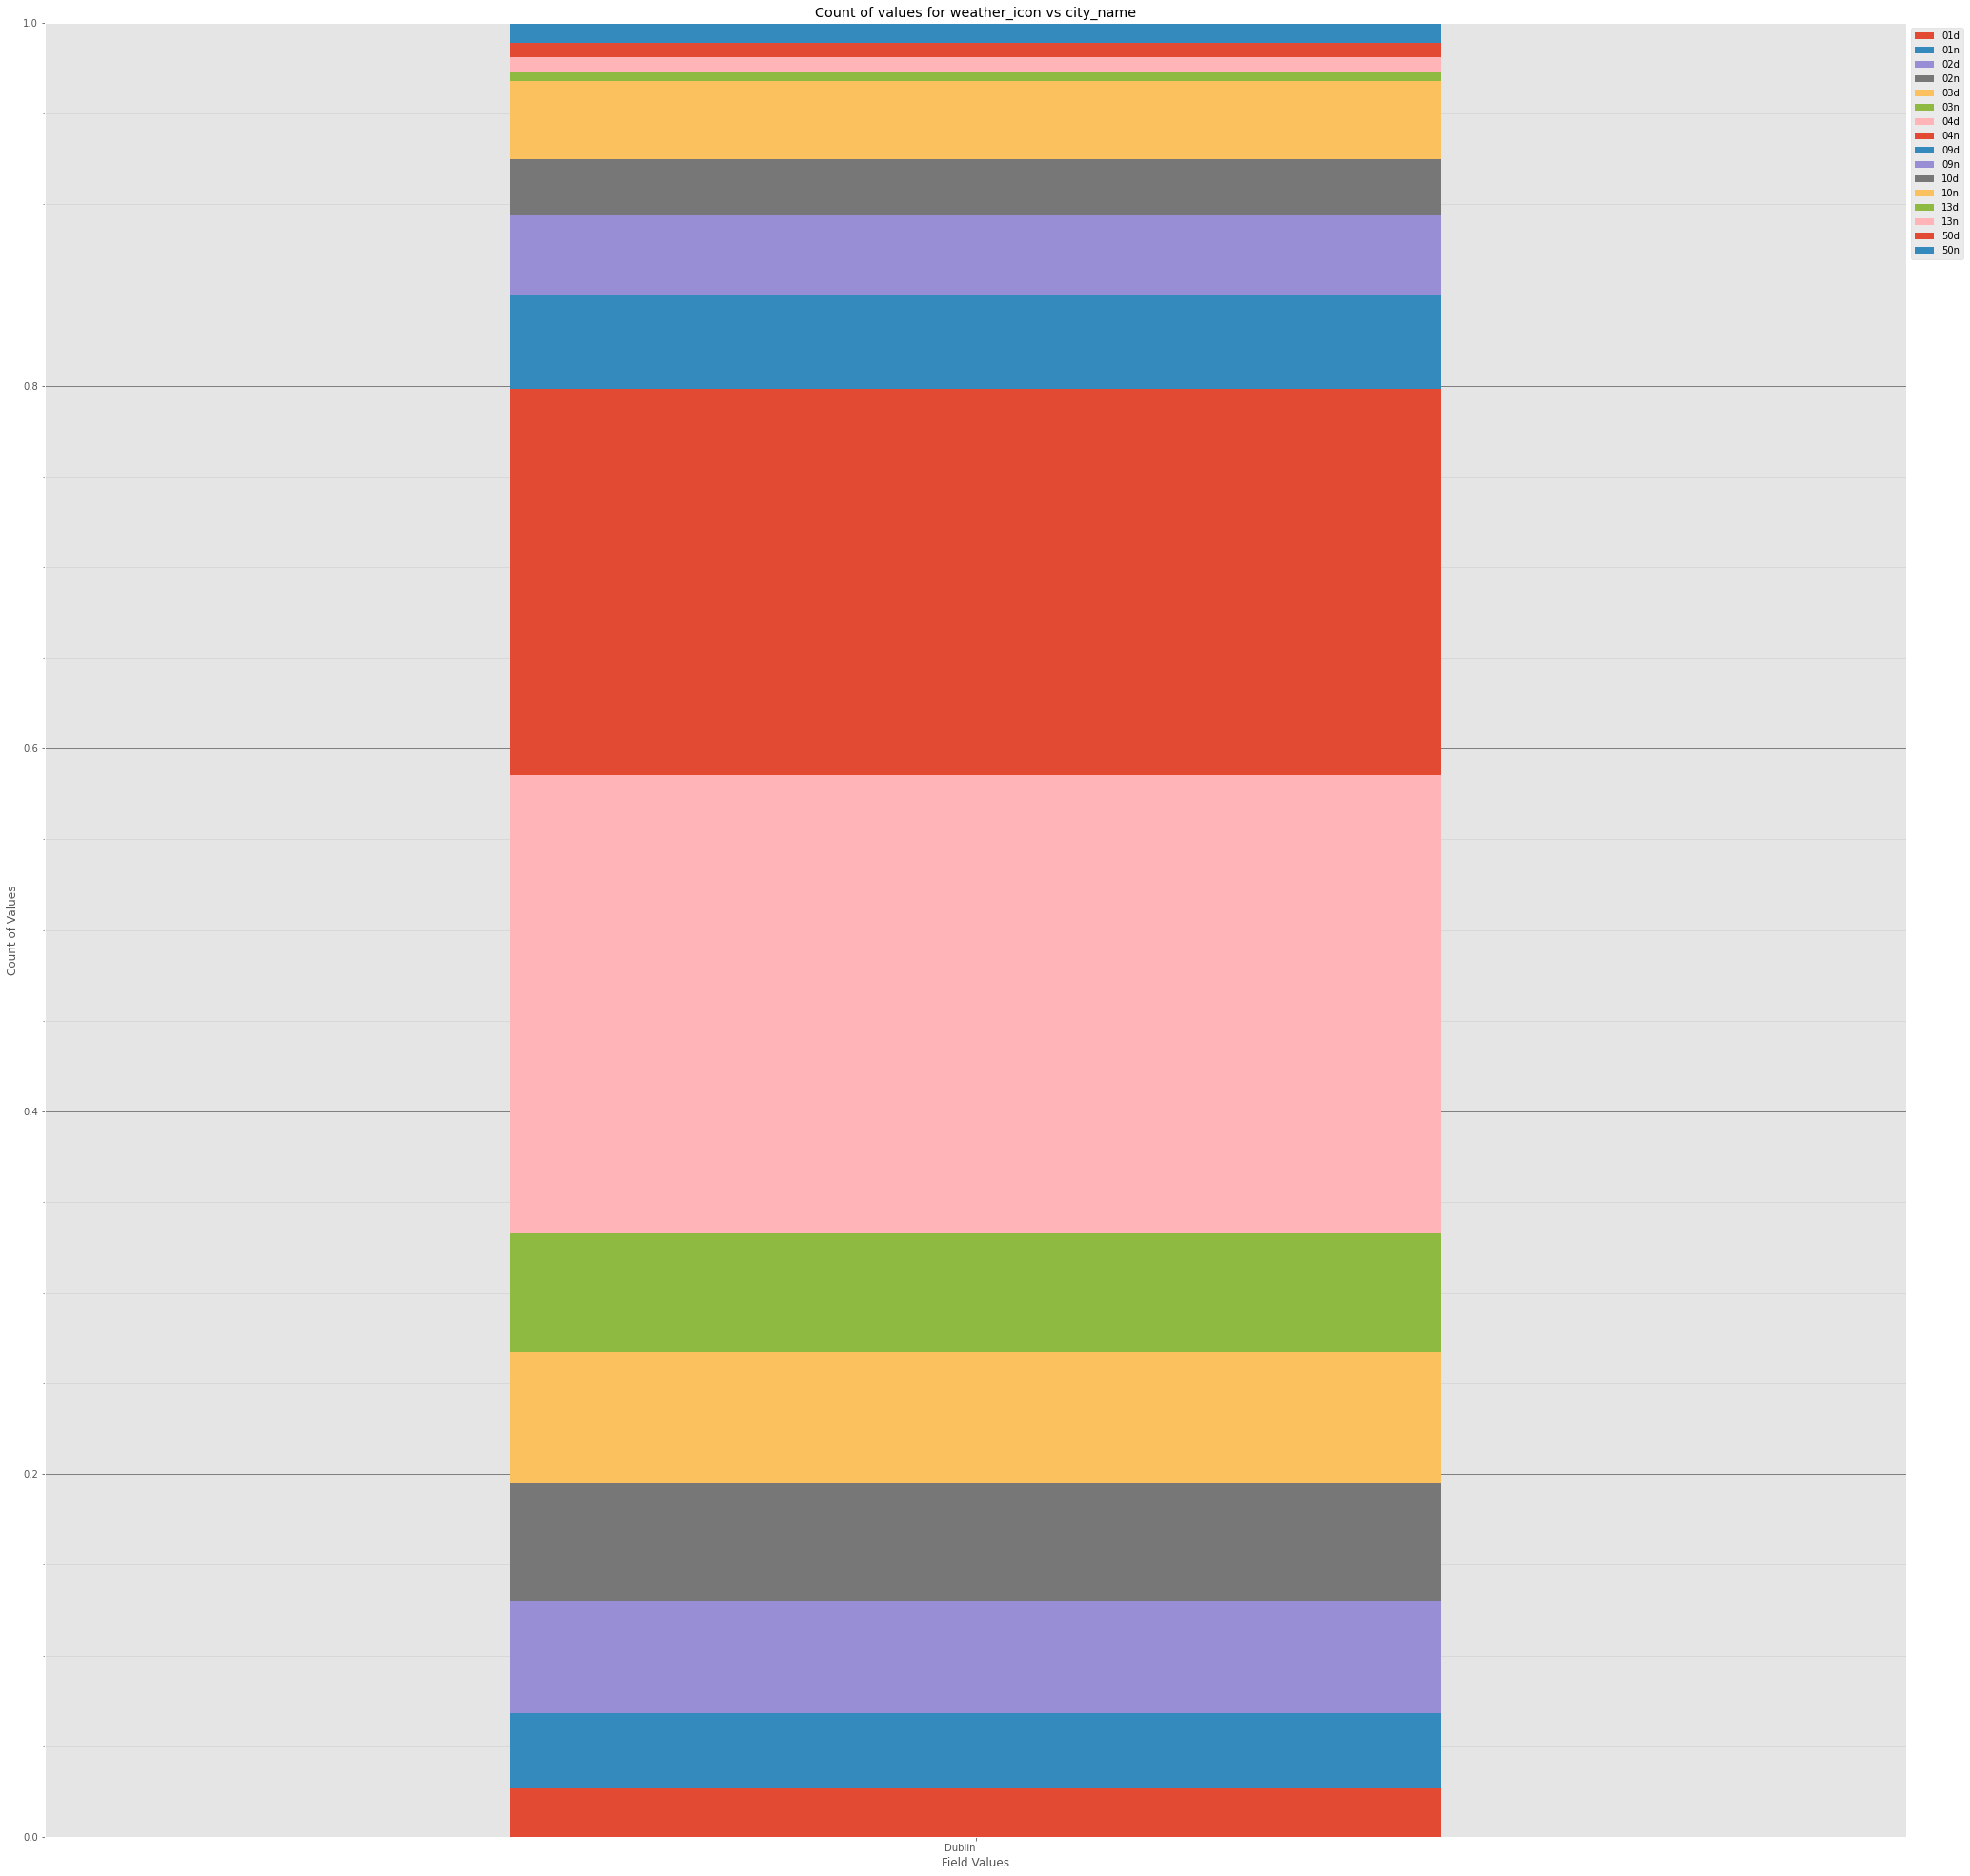



----------------------


Grouping over clouds_all|timezone results in:



clouds_all timezone  Rows  % Frequency
0           0        0   109     1.231917
1           0     3600   484     5.470163
2           1        0     2     0.022604
3           1     3600     0     0.000000
4          10        0     1     0.011302
5          10     3600     0     0.000000
6         100        0     2     0.022604
7         100     3600     2     0.022604
8          11        0     2     0.022604
9          11     3600     0     0.000000
10          2        0     4     0.045208
11          2     3600     0     0.000000
12         20        0   419     4.735533
13         20     3600   731     8.261754
14         21        0     1     0.011302
15         21     3600     0     0.000000
16         26        0     1     0.011302
17         26     3600     0     0.000000
18          3        0     1     0.011302
19          3     3600     0     0.000000
20         40        0   534     6.035262
21         40     3600   769     8.691230
22          5        0     1     0.011302
23          5     3600     0     0.000000
24         69        0     1     0.011302
25         69     3600     0     0.000000
26         75        0  2472    27.938517
27         75     3600  3174    35.872514
28         83        0     1     0.011302
29         83     3600     0     0.000000
30         84        0     1     0.011302
31         84     3600     0     0.000000
32         87        0     0     0.000000
33         87     3600     1     0.011302
34         90        0    75     0.847649
35         90     3600    58     0.655515
36         91        0     1     0.011302
37         91     3600     0     0.000000
38         99        0     1     0.011302
39         99     3600     0     0.000000

Non Zero Data:


clouds_all timezone  Rows  % Frequency
0           0        0   109     1.231917
1           0     3600   484     5.470163
2           1        0     2     0.022604
4          10        0     1     0.011302
6         100        0     2     0.022604
7         100     3600     2     0.022604
8          11        0     2     0.022604
10          2        0     4     0.045208
12         20        0   419     4.735533
13         20     3600   731     8.261754
14         21        0     1     0.011302
16         26        0     1     0.011302
18          3        0     1     0.011302
20         40        0   534     6.035262
21         40     3600   769     8.691230
22          5        0     1     0.011302
24         69        0     1     0.011302
26         75        0  2472    27.938517
27         75     3600  3174    35.872514
28         83        0     1     0.011302
30         84        0     1     0.011302
33         87     3600     1     0.011302
34         90        0    75     0.847649
35         90     3600    58     0.655515
36         91        0     1     0.011302
38         99        0     1     0.011302

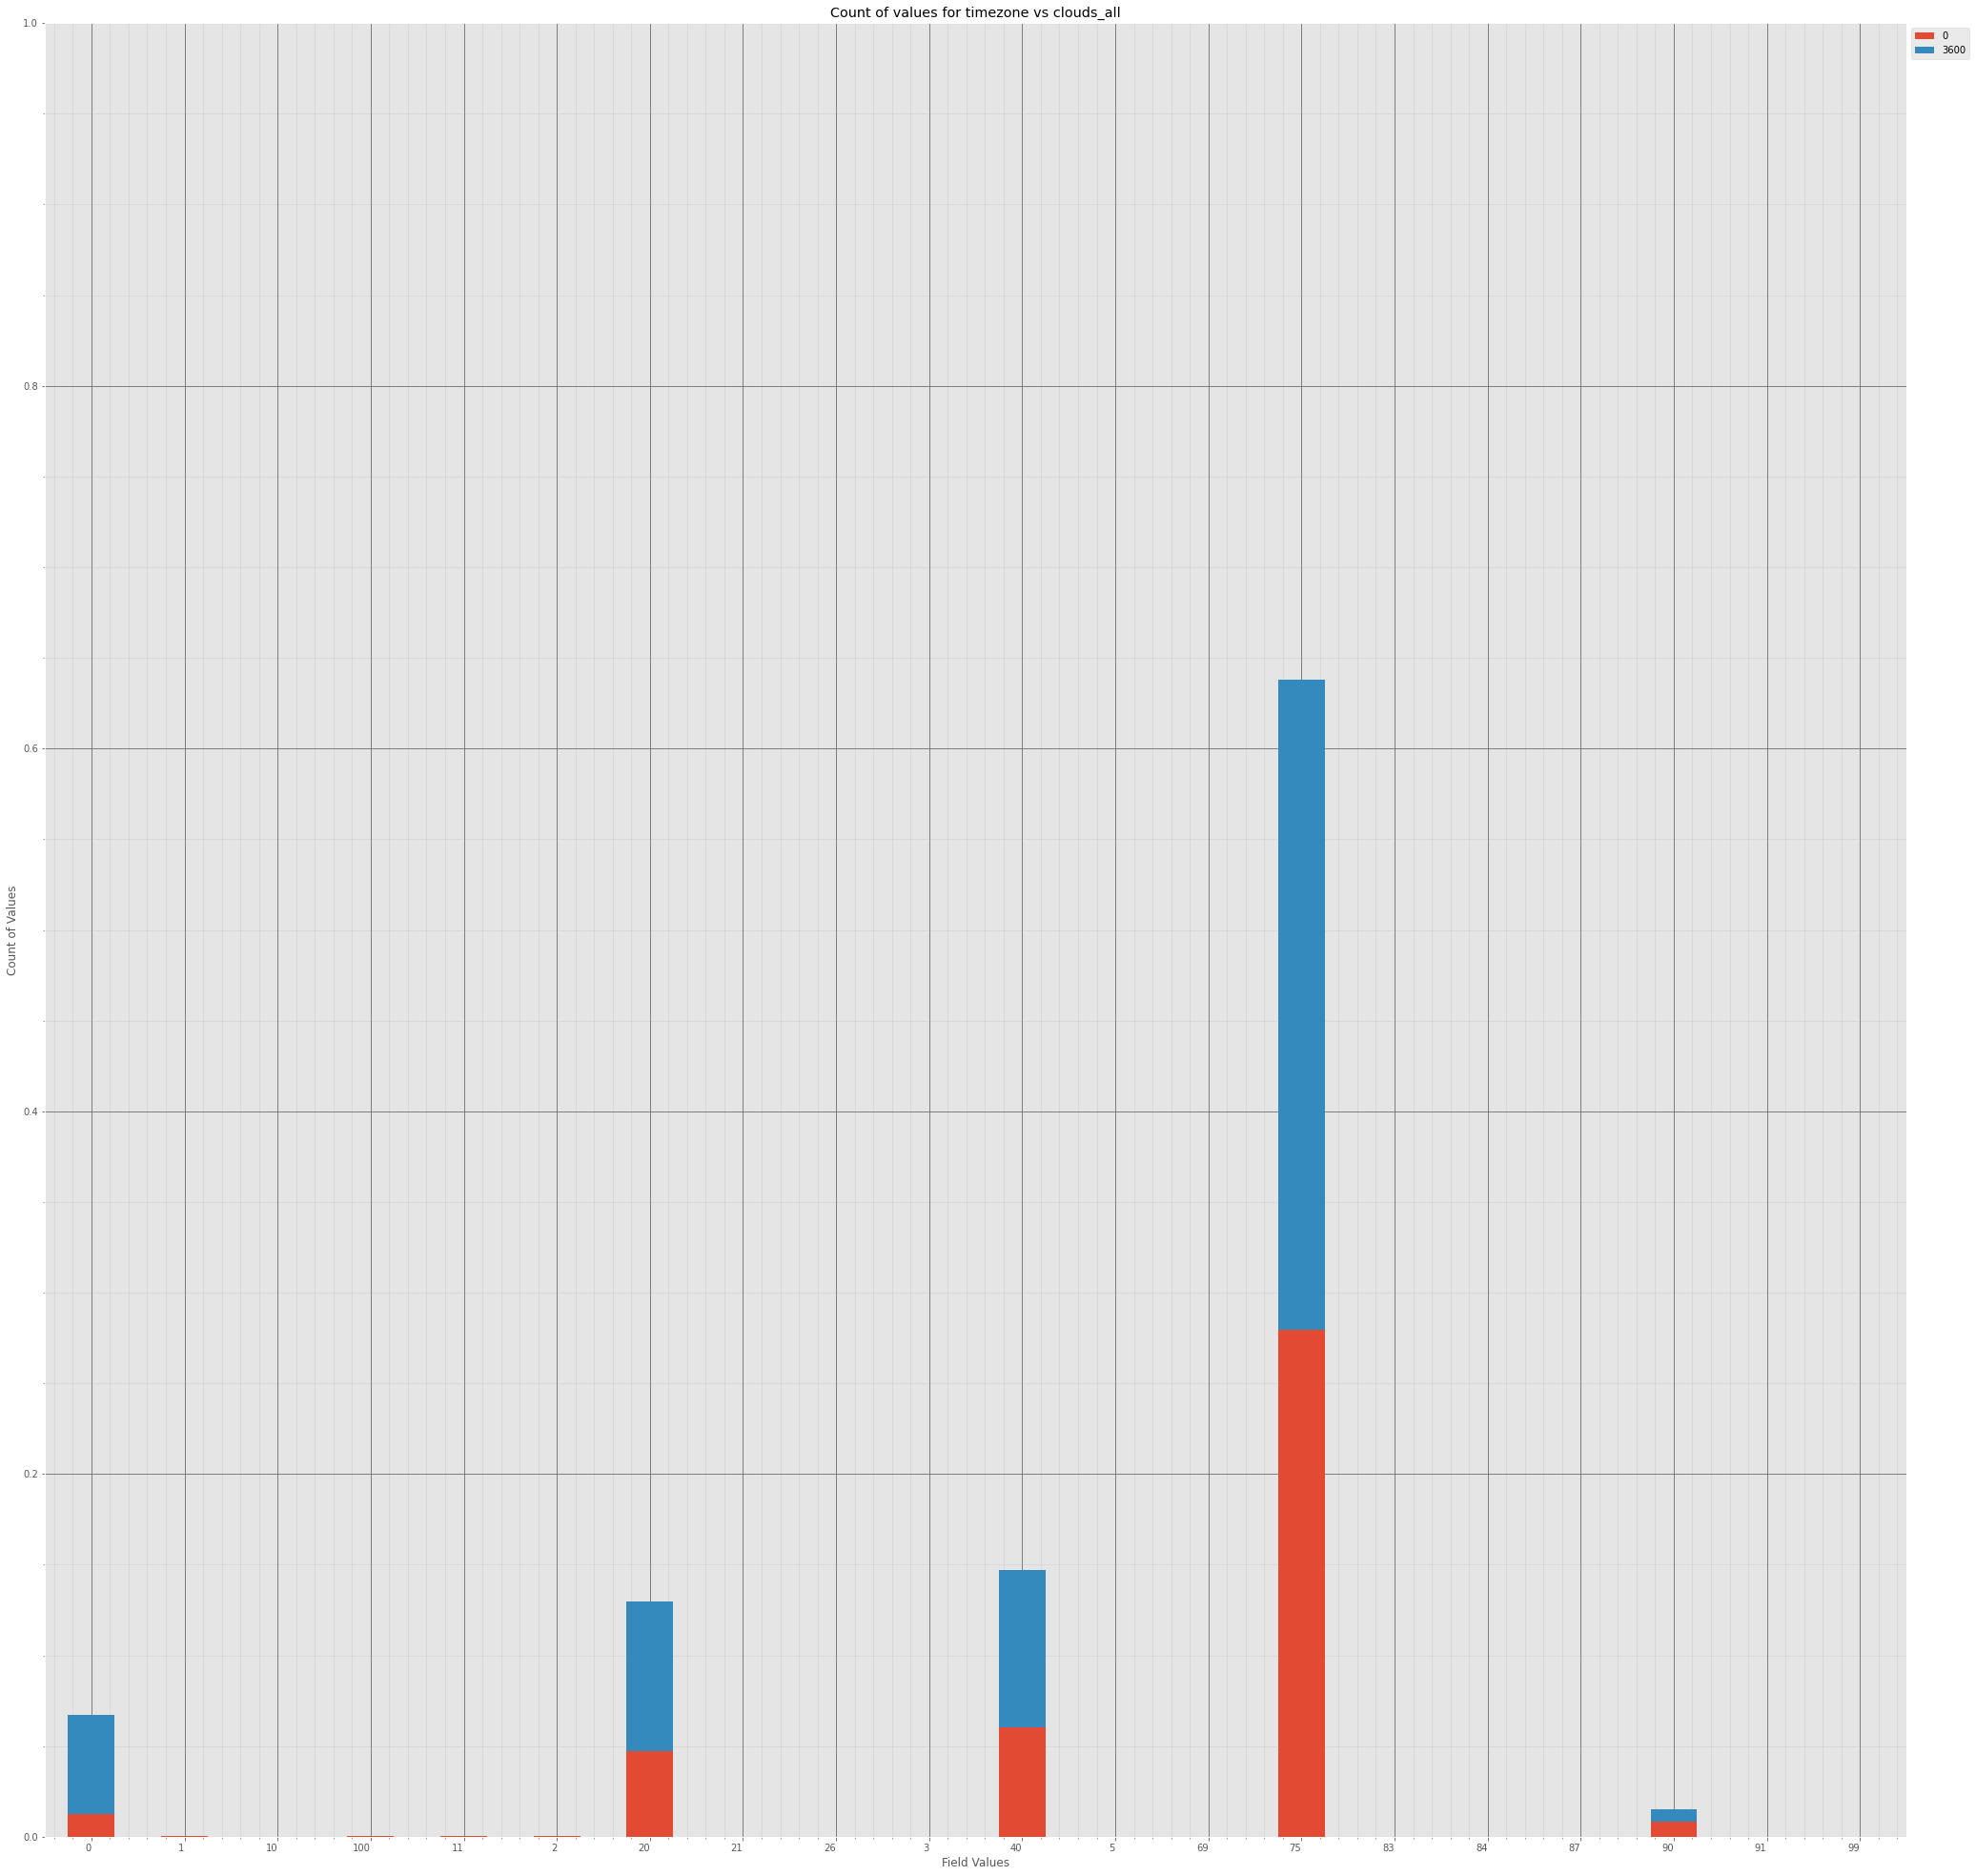



----------------------


Grouping over clouds_all|city_name results in:



clouds_all city_name  Rows  % Frequency
0           0    Dublin   593     6.702080
1           1    Dublin     2     0.022604
2          10    Dublin     1     0.011302
3         100    Dublin     4     0.045208
4          11    Dublin     2     0.022604
5           2    Dublin     4     0.045208
6          20    Dublin  1150    12.997288
7          21    Dublin     1     0.011302
8          26    Dublin     1     0.011302
9           3    Dublin     1     0.011302
10         40    Dublin  1303    14.726492
11          5    Dublin     1     0.011302
12         69    Dublin     1     0.011302
13         75    Dublin  5646    63.811031
14         83    Dublin     1     0.011302
15         84    Dublin     1     0.011302
16         87    Dublin     1     0.011302
17         90    Dublin   133     1.503165
18         91    Dublin     1     0.011302
19         99    Dublin     1     0.011302

Non Zero Data:


clouds_all city_name  Rows  % Frequency
0           0    Dublin   593     6.702080
1           1    Dublin     2     0.022604
2          10    Dublin     1     0.011302
3         100    Dublin     4     0.045208
4          11    Dublin     2     0.022604
5           2    Dublin     4     0.045208
6          20    Dublin  1150    12.997288
7          21    Dublin     1     0.011302
8          26    Dublin     1     0.011302
9           3    Dublin     1     0.011302
10         40    Dublin  1303    14.726492
11          5    Dublin     1     0.011302
12         69    Dublin     1     0.011302
13         75    Dublin  5646    63.811031
14         83    Dublin     1     0.011302
15         84    Dublin     1     0.011302
16         87    Dublin     1     0.011302
17         90    Dublin   133     1.503165
18         91    Dublin     1     0.011302
19         99    Dublin     1     0.011302

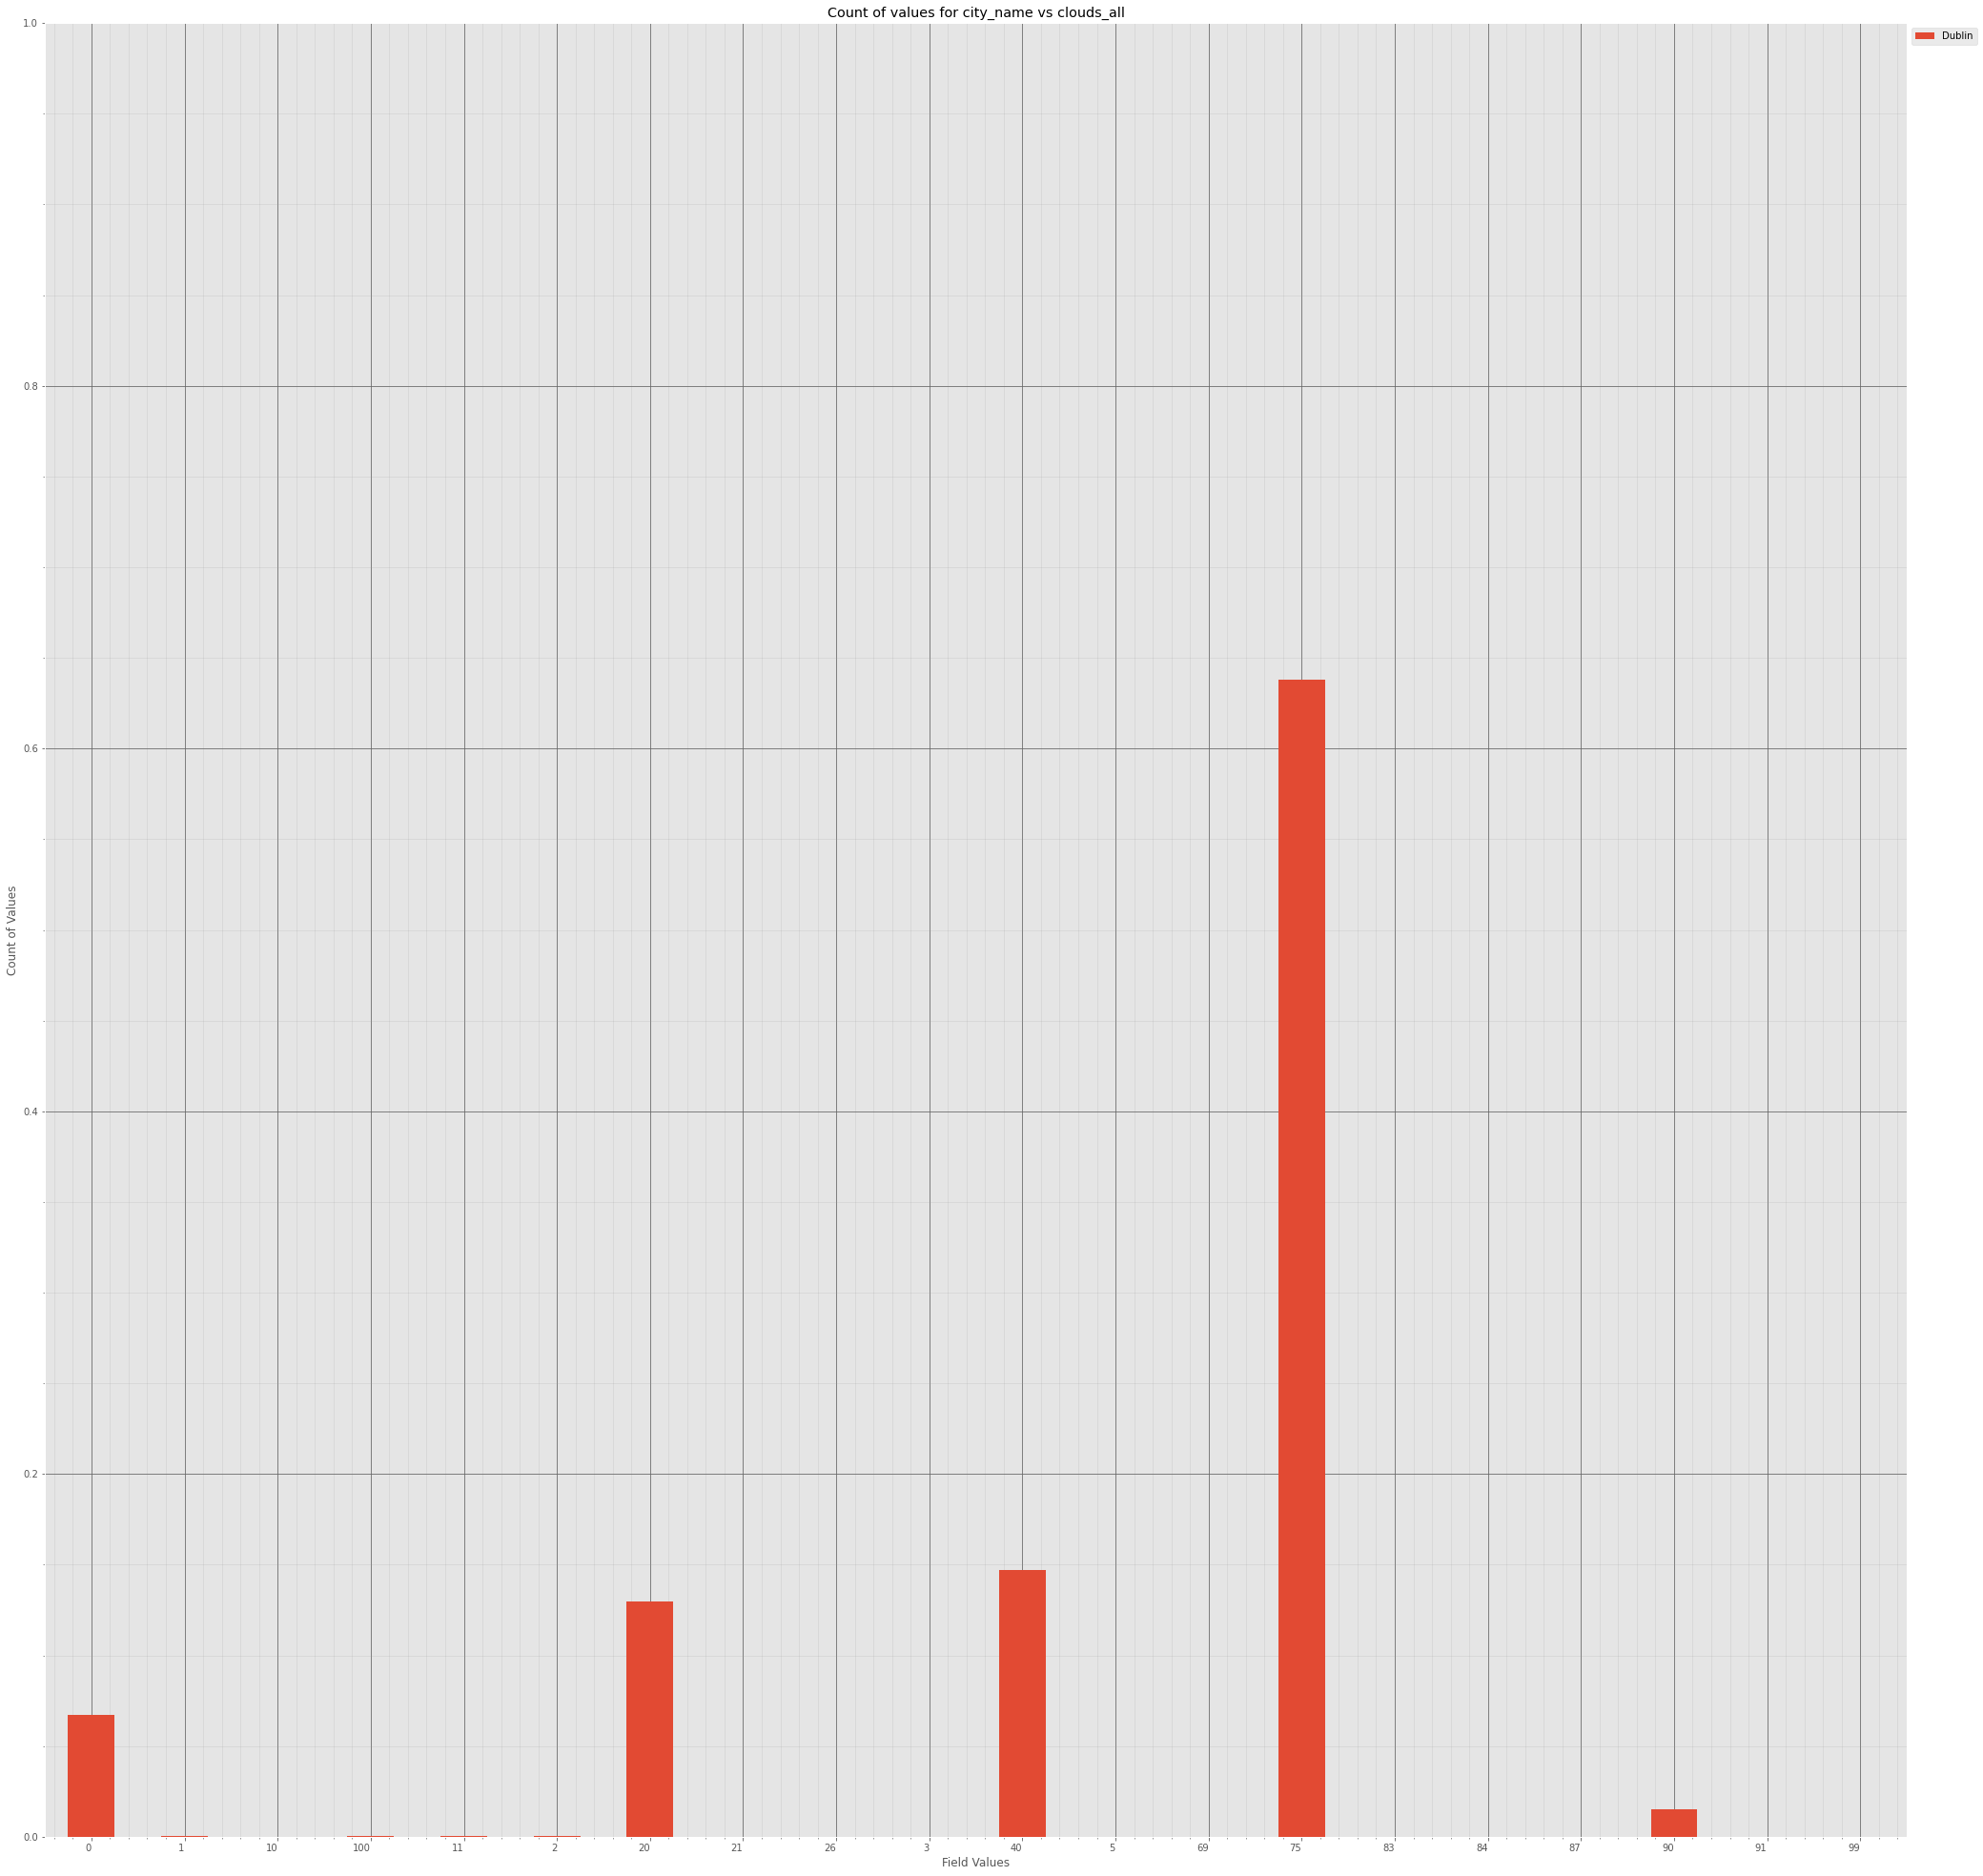



----------------------


Grouping over clouds_all|weather_id results in:



clouds_all weather_id  Rows  % Frequency
0            0        300     0     0.000000
1            0        301     0     0.000000
2            0        310     0     0.000000
3            0        311     0     0.000000
4            0        500     0     0.000000
..         ...        ...   ...          ...
455         99        800     0     0.000000
456         99        801     0     0.000000
457         99        802     0     0.000000
458         99        803     0     0.000000
459         99        804     1     0.011302

[460 rows x 4 columns]

Non Zero Data:


clouds_all weather_id  Rows  % Frequency
18           0        800   593     6.702080
41           1        800     2     0.022604
64          10        800     1     0.011302
69         100        300     1     0.011302
73         100        500     1     0.011302
86         100        741     2     0.022604
111         11        801     2     0.022604
133          2        800     4     0.045208
145         20        520     1     0.011302
146         20        521     7     0.079114
153         20        701    10     0.113020
154         20        711     1     0.011302
155         20        741    13     0.146926
157         20        801  1118    12.635624
180         21        801     1     0.011302
204         26        802     1     0.011302
225          3        800     1     0.011302
237         40        520    38     0.429476
238         40        521    23     0.259946
241         40        612     2     0.022604
243         40        620     2     0.022604
245         40        701     4     0.045208
247         40        741    12     0.135624
250         40        802  1222    13.811031
271          5        800     1     0.011302
297         69        803     1     0.011302
299         75        300   255     2.882007
300         75        301     4     0.045208
301         75        310   208     2.350814
302         75        311     2     0.022604
303         75        500   588     6.645570
304         75        501    42     0.474684
305         75        502     1     0.011302
306         75        520   188     2.124774
307         75        521    90     1.017179
308         75        600    22     0.248644
309         75        601     6     0.067812
310         75        612     9     0.101718
311         75        615     1     0.011302
312         75        620    64     0.723327
313         75        621     1     0.011302
314         75        701    52     0.587703
316         75        741    55     0.621609
320         75        803  4058    45.863472
343         83        803     1     0.011302
366         84        803     1     0.011302
390         87        804     1     0.011302
391         90        300    13     0.146926
393         90        310    15     0.169530
395         90        500    20     0.226040
396         90        501     5     0.056510
398         90        520     1     0.011302
400         90        600     8     0.090416
401         90        601     1     0.011302
406         90        701    10     0.113020
408         90        741     7     0.079114
413         90        804    53     0.599005
429         91        701     1     0.011302
459         99        804     1     0.011302

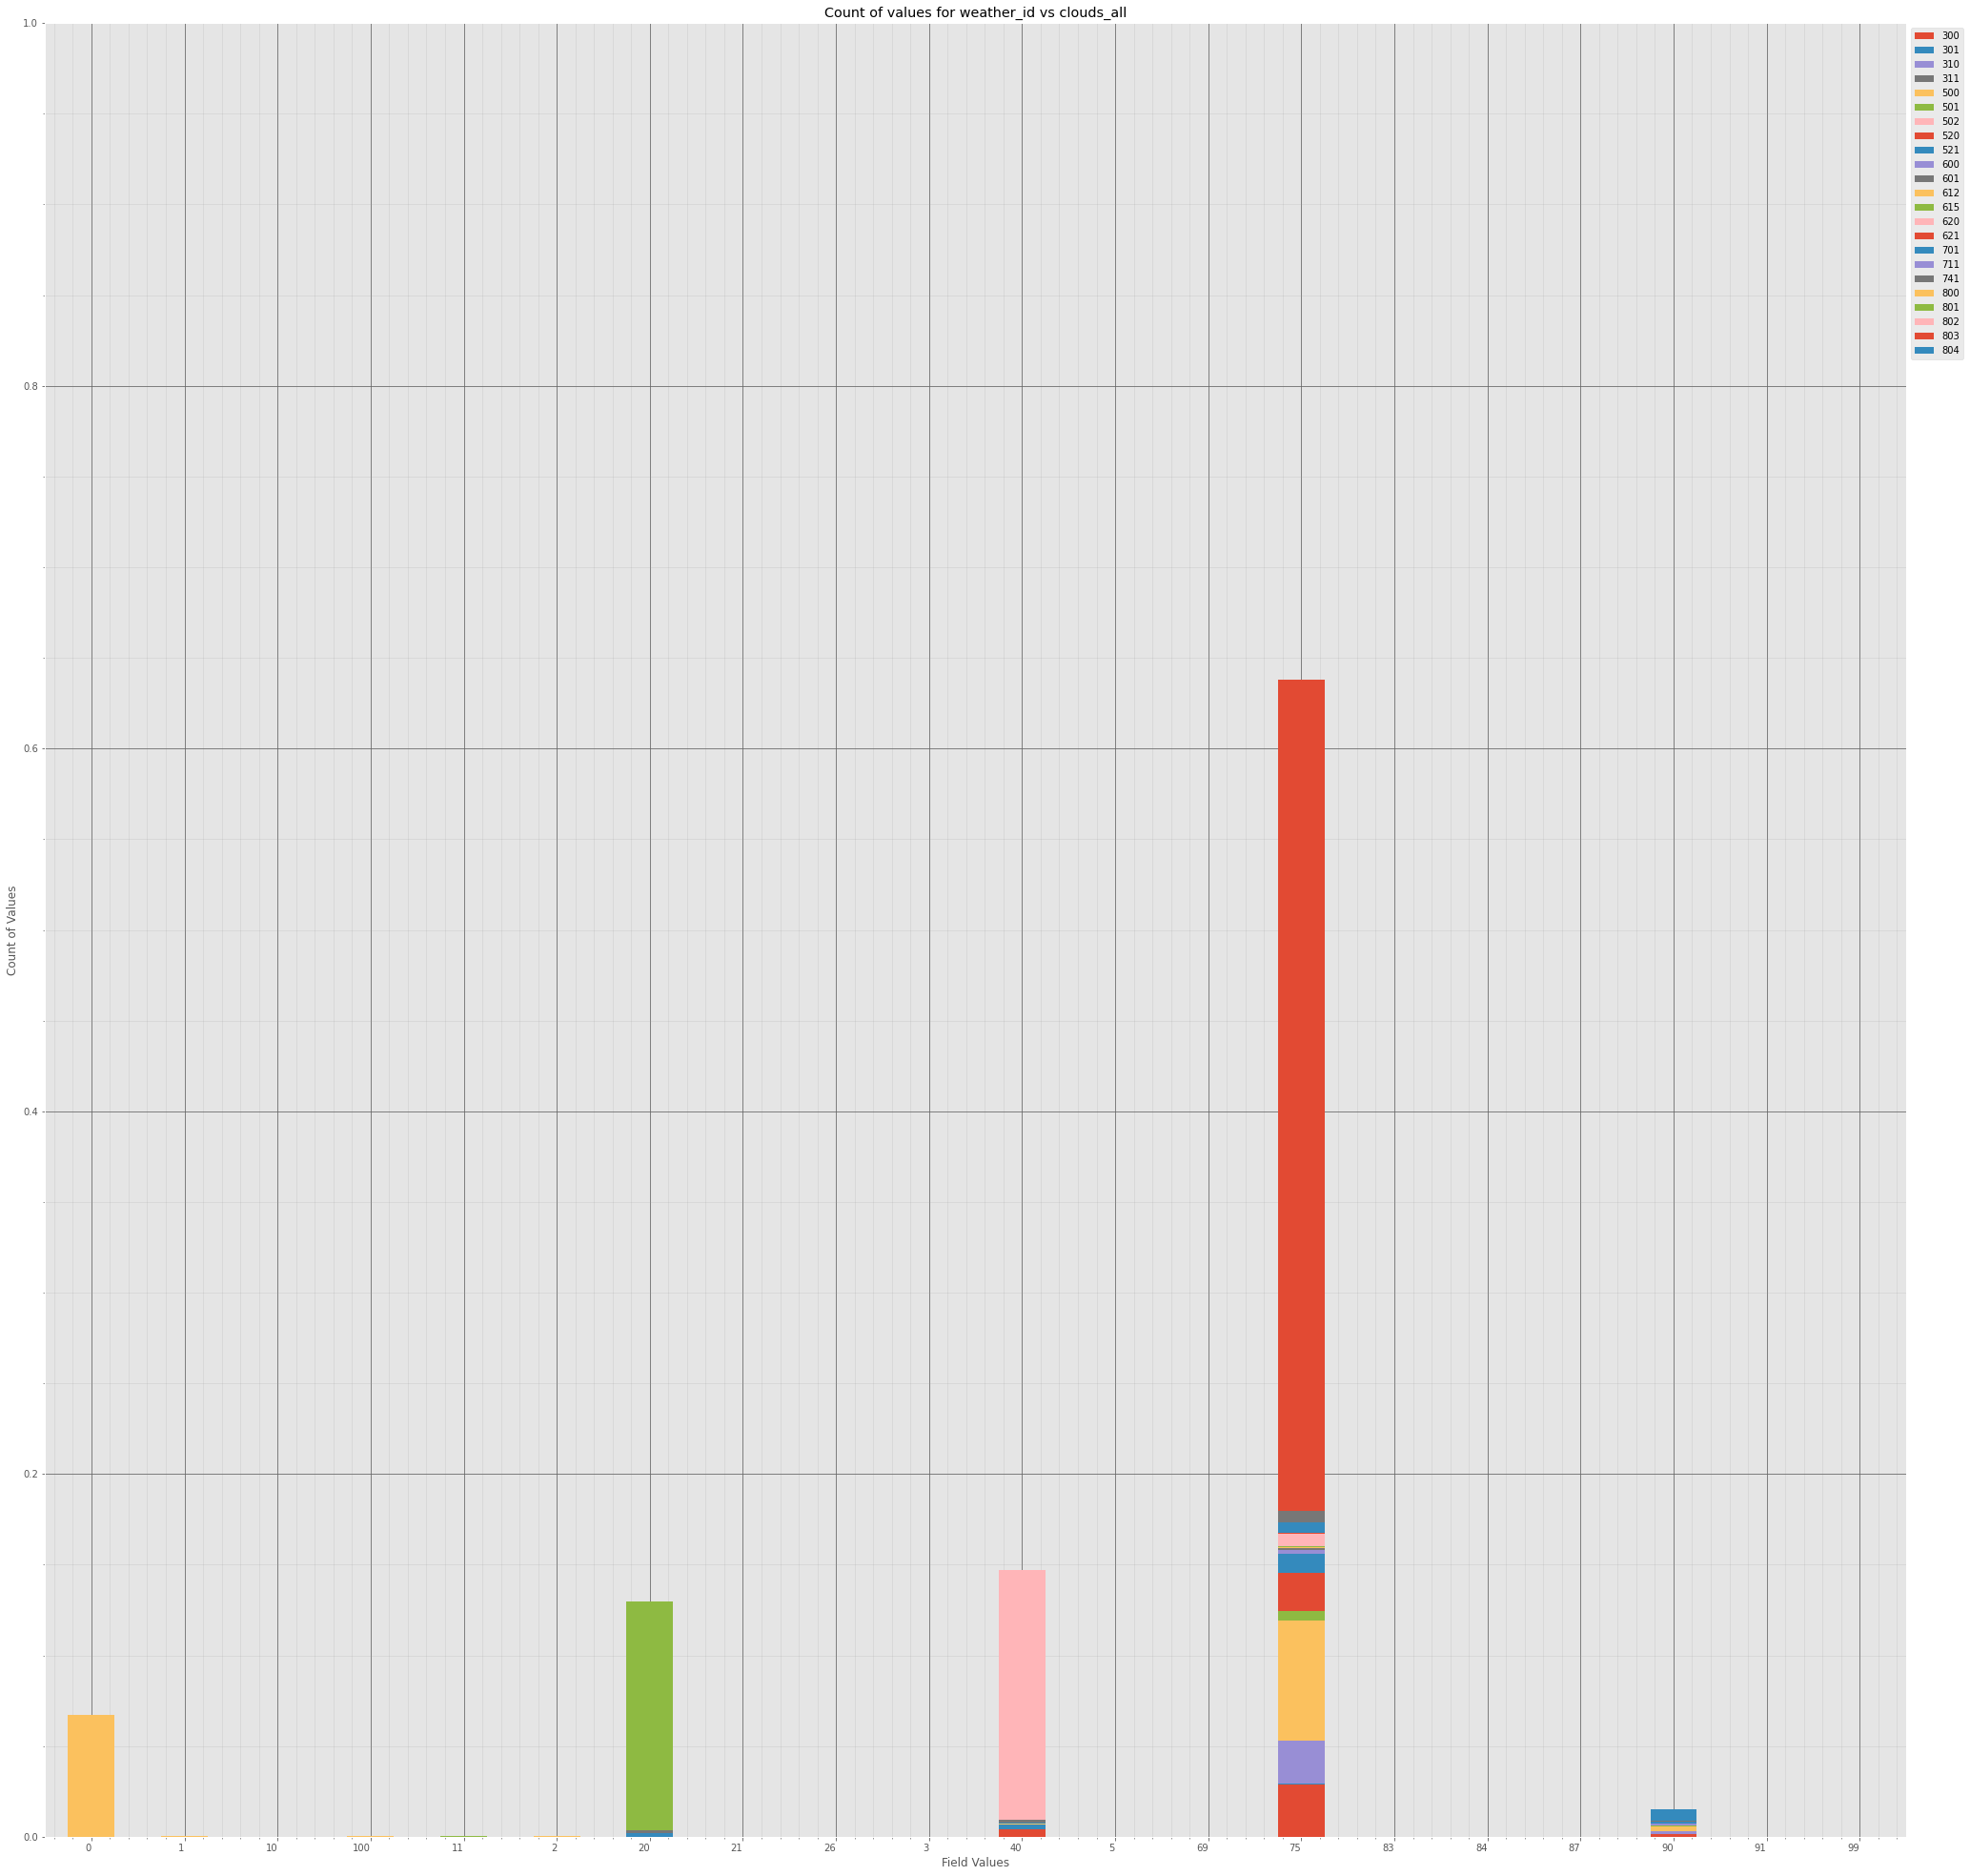



----------------------


Grouping over clouds_all|weather_description results in:



clouds_all  weather_description  Rows  % Frequency
0            0   light shower sleet     0          0.0
1            0        broken clouds     0          0.0
2            0              drizzle     0          0.0
3            0           few clouds     0          0.0
4            0                  fog     0          0.0
..         ...                  ...   ...          ...
475         99          shower rain     0          0.0
476         99          shower snow     0          0.0
477         99         sky is clear     0          0.0
478         99                smoke     0          0.0
479         99                 snow     0          0.0

[480 rows x 4 columns]

Non Zero Data:


clouds_all           weather_description  Rows  % Frequency
21           0                  sky is clear   593     6.702080
45           1                  sky is clear     2     0.022604
69          10                  sky is clear     1     0.011302
76         100                           fog     2     0.022604
78         100       light intensity drizzle     1     0.011302
81         100                    light rain     1     0.011302
99          11                    few clouds     2     0.022604
141          2                  sky is clear     4     0.045208
147         20                    few clouds  1118    12.635624
148         20                           fog    13     0.146926
152         20   light intensity shower rain     1     0.011302
157         20                          mist    10     0.113020
160         20         proximity shower rain     7     0.079114
166         20                         smoke     1     0.011302
171         21                    few clouds     1     0.011302
210         26              scattered clouds     1     0.011302
237          3                  sky is clear     1     0.011302
240         40            light shower sleet     2     0.022604
244         40                           fog    12     0.135624
248         40   light intensity shower rain    38     0.429476
251         40             light shower snow     2     0.022604
253         40                          mist     4     0.045208
256         40         proximity shower rain    23     0.259946
258         40              scattered clouds  1222    13.811031
285          5                  sky is clear     1     0.011302
289         69                 broken clouds     1     0.011302
312         75            light shower sleet     9     0.101718
313         75                 broken clouds  4058    45.863472
314         75                       drizzle     4     0.045208
316         75                           fog    55     0.621609
317         75          heavy intensity rain     1     0.011302
318         75       light intensity drizzle   255     2.882007
319         75  light intensity drizzle rain   208     2.350814
320         75   light intensity shower rain   188     2.124774
321         75                    light rain   588     6.645570
322         75           light rain and snow     1     0.011302
323         75             light shower snow    64     0.723327
324         75                    light snow    22     0.248644
325         75                          mist    52     0.587703
326         75                 moderate rain    42     0.474684
328         75         proximity shower rain    88     0.994575
329         75              rain and drizzle     2     0.022604
331         75                   shower rain     2     0.022604
332         75                   shower snow     1     0.011302
335         75                          snow     6     0.067812
337         83                 broken clouds     1     0.011302
361         84                 broken clouds     1     0.011302
399         87               overcast clouds     1     0.011302
412         90                           fog     7     0.079114
414         90       light intensity drizzle    13     0.146926
415         90  light intensity drizzle rain    15     0.169530
416         90   light intensity shower rain     1     0.011302
417         90                    light rain    20     0.226040
420         90                    light snow     8     0.090416
421         90                          mist    10     0.113020
422         90                 moderate rain     5     0.056510
423         90               overcast clouds    53     0.599005
431         90                          snow     1     0.011302
445         91                          mist     1     0.011302
471         99               overcast clouds     1     0.011302

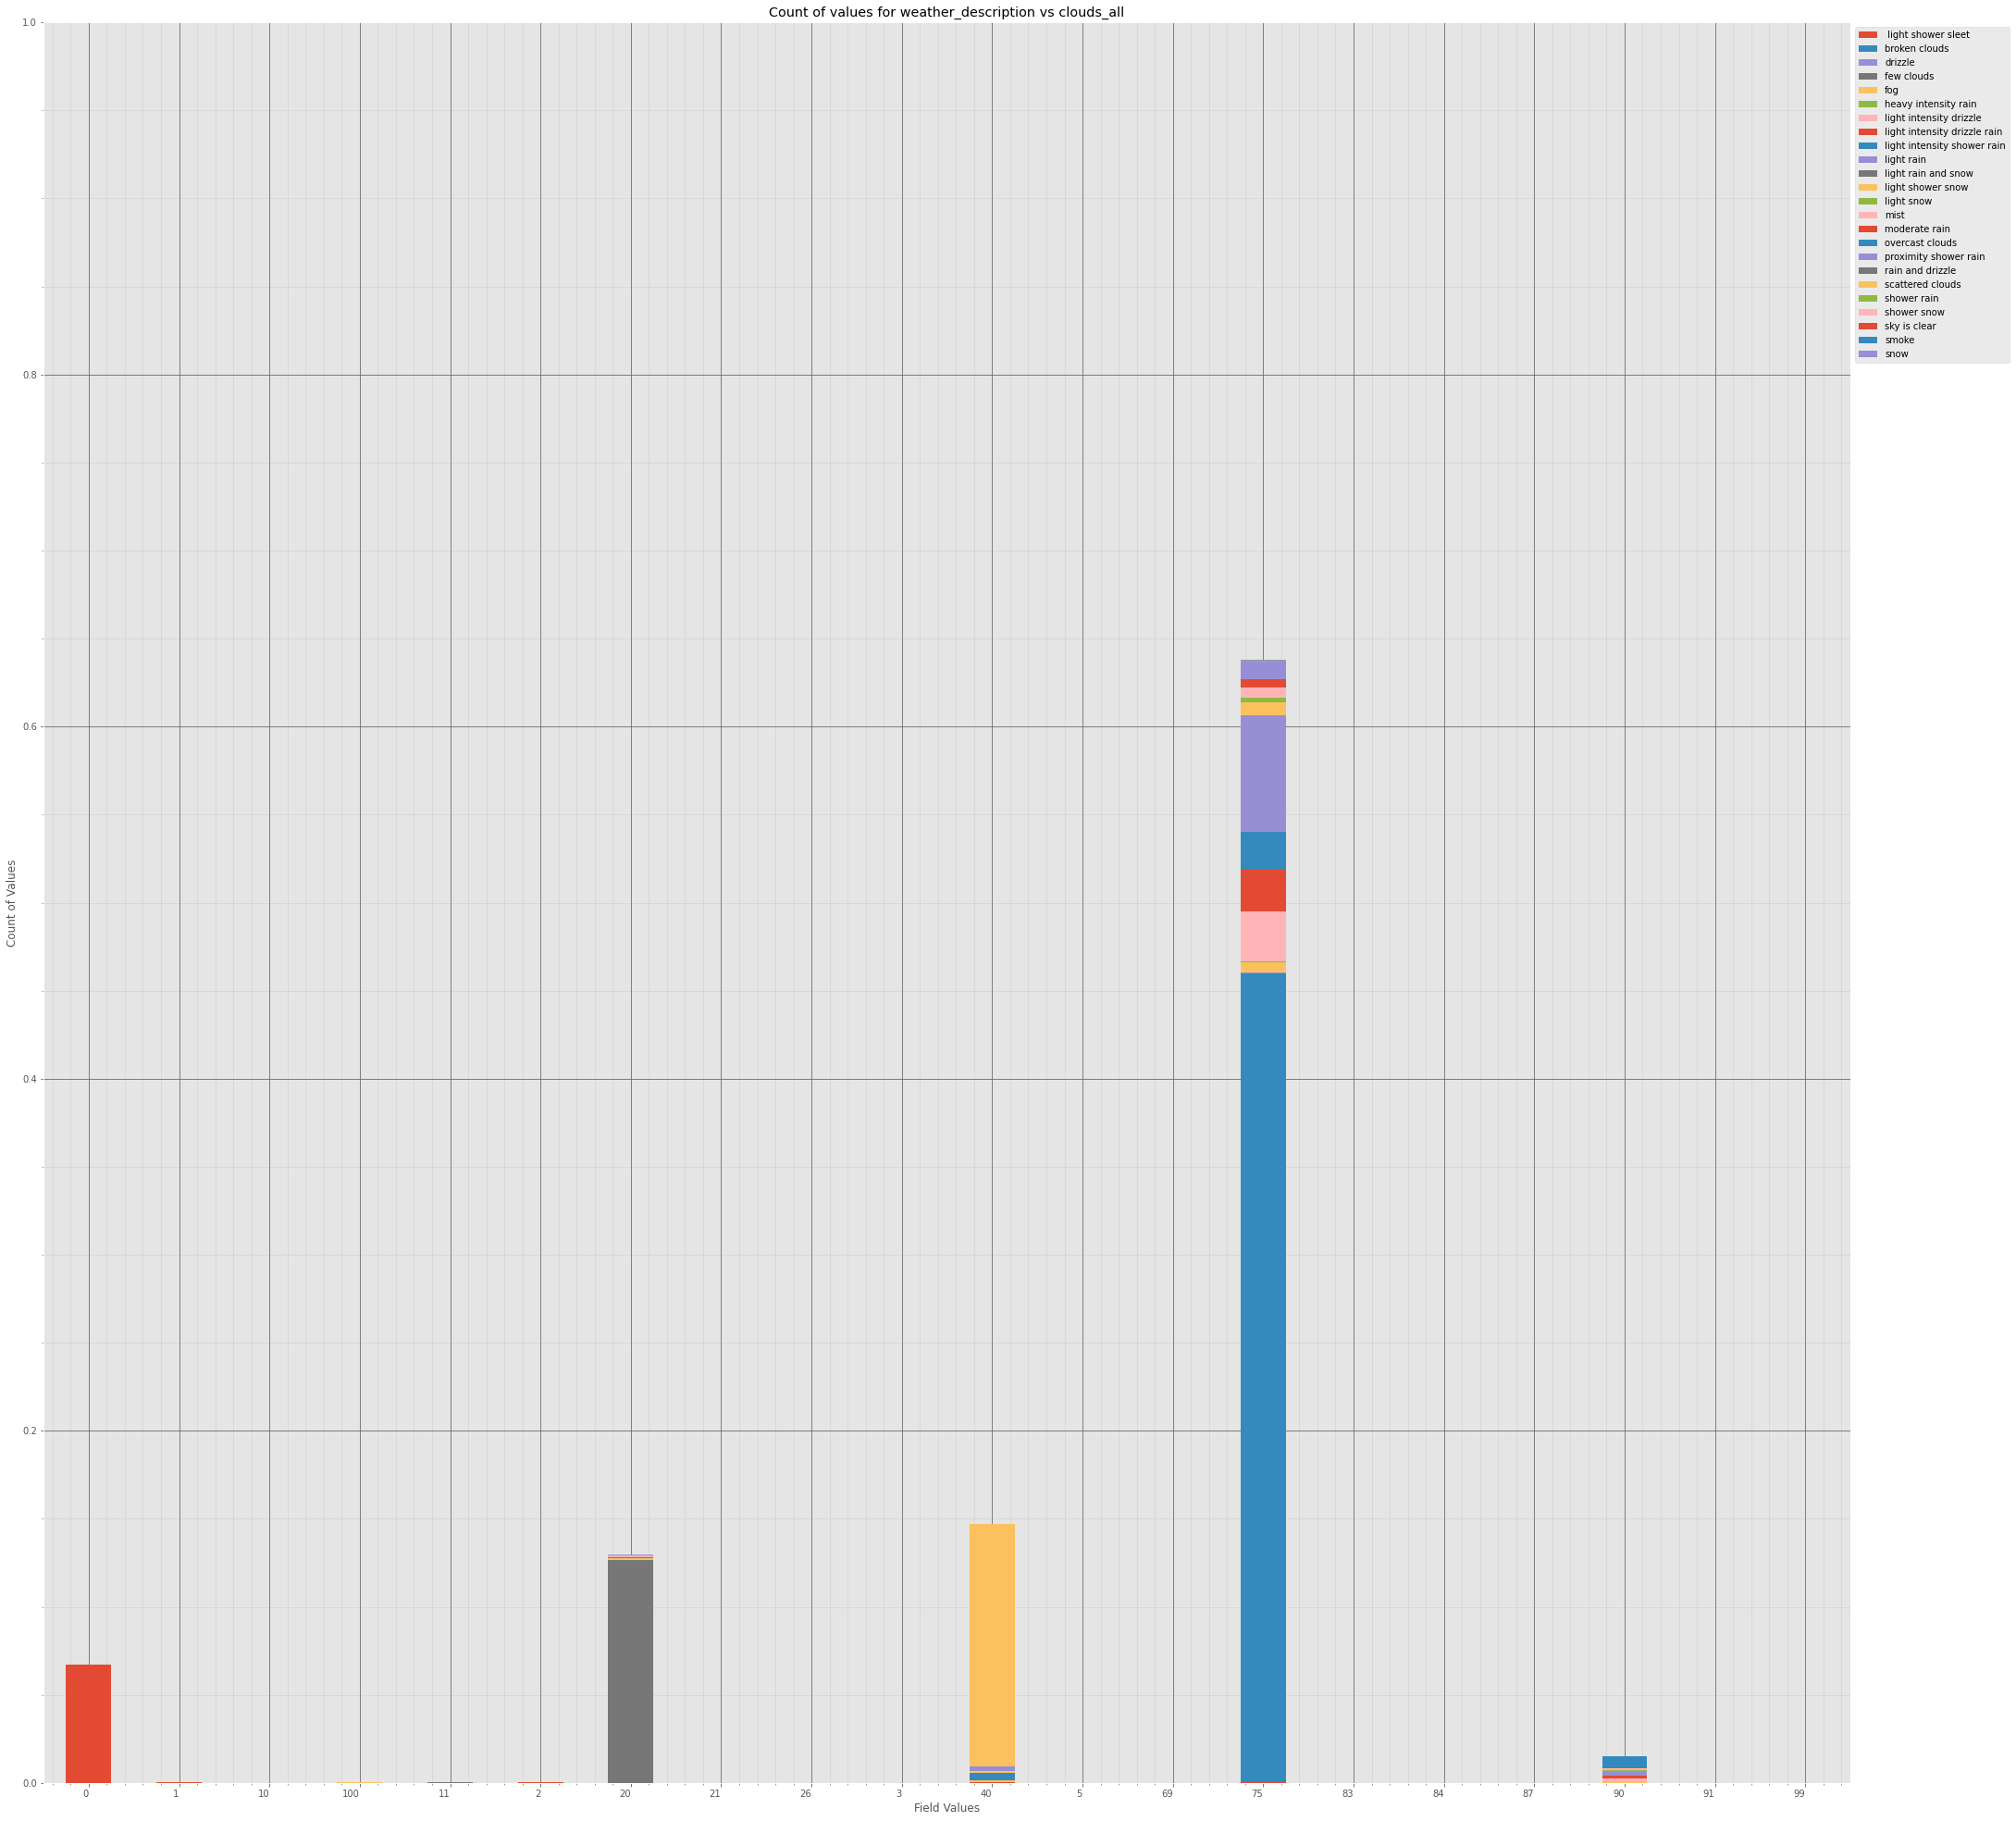



----------------------


Grouping over clouds_all|weather_icon results in:



clouds_all weather_icon  Rows  % Frequency
0            0          01d   237     2.678571
1            0          01n   356     4.023508
2            0          02d     0     0.000000
3            0          02n     0     0.000000
4            0          03d     0     0.000000
..         ...          ...   ...          ...
315         99          10n     0     0.000000
316         99          13d     0     0.000000
317         99          13n     0     0.000000
318         99          50d     0     0.000000
319         99          50n     0     0.000000

[320 rows x 4 columns]

Non Zero Data:


clouds_all weather_icon  Rows  % Frequency
0            0          01d   237     2.678571
1            0          01n   356     4.023508
17           1          01n     2     0.022604
33          10          01n     1     0.011302
56         100          09d     1     0.011302
59         100          10n     1     0.011302
62         100          50d     1     0.011302
63         100          50n     1     0.011302
67          11          02n     2     0.022604
81           2          01n     4     0.045208
98          20          02d   547     6.182188
99          20          02n   571     6.453436
104         20          09d     7     0.079114
105         20          09n     1     0.011302
110         20          50d     7     0.079114
111         20          50n    17     0.192134
115         21          02n     1     0.011302
133         26          03n     1     0.011302
145          3          01n     1     0.011302
164         40          03d   645     7.289783
165         40          03n   577     6.521248
168         40          09d    41     0.463382
169         40          09n    20     0.226040
172         40          13d     3     0.033906
173         40          13n     1     0.011302
174         40          50d     4     0.045208
175         40          50n    12     0.135624
177          5          01n     1     0.011302
198         69          04d     1     0.011302
214         75          04d  2205    24.920886
215         75          04n  1853    20.942586
216         75          09d   400     4.520796
217         75          09n   347     3.921790
218         75          10d   264     2.983725
219         75          10n   367     4.147830
220         75          13d    32     0.361664
221         75          13n    71     0.802441
222         75          50d    48     0.542495
223         75          50n    59     0.666817
230         83          04d     1     0.011302
247         84          04n     1     0.011302
262         87          04d     1     0.011302
278         90          04d    25     0.282550
279         90          04n    28     0.316456
280         90          09d    14     0.158228
281         90          09n    15     0.169530
282         90          10d    10     0.113020
283         90          10n    15     0.169530
284         90          13d     9     0.101718
286         90          50d     9     0.101718
287         90          50n     8     0.090416
303         91          50n     1     0.011302
310         99          04d     1     0.011302

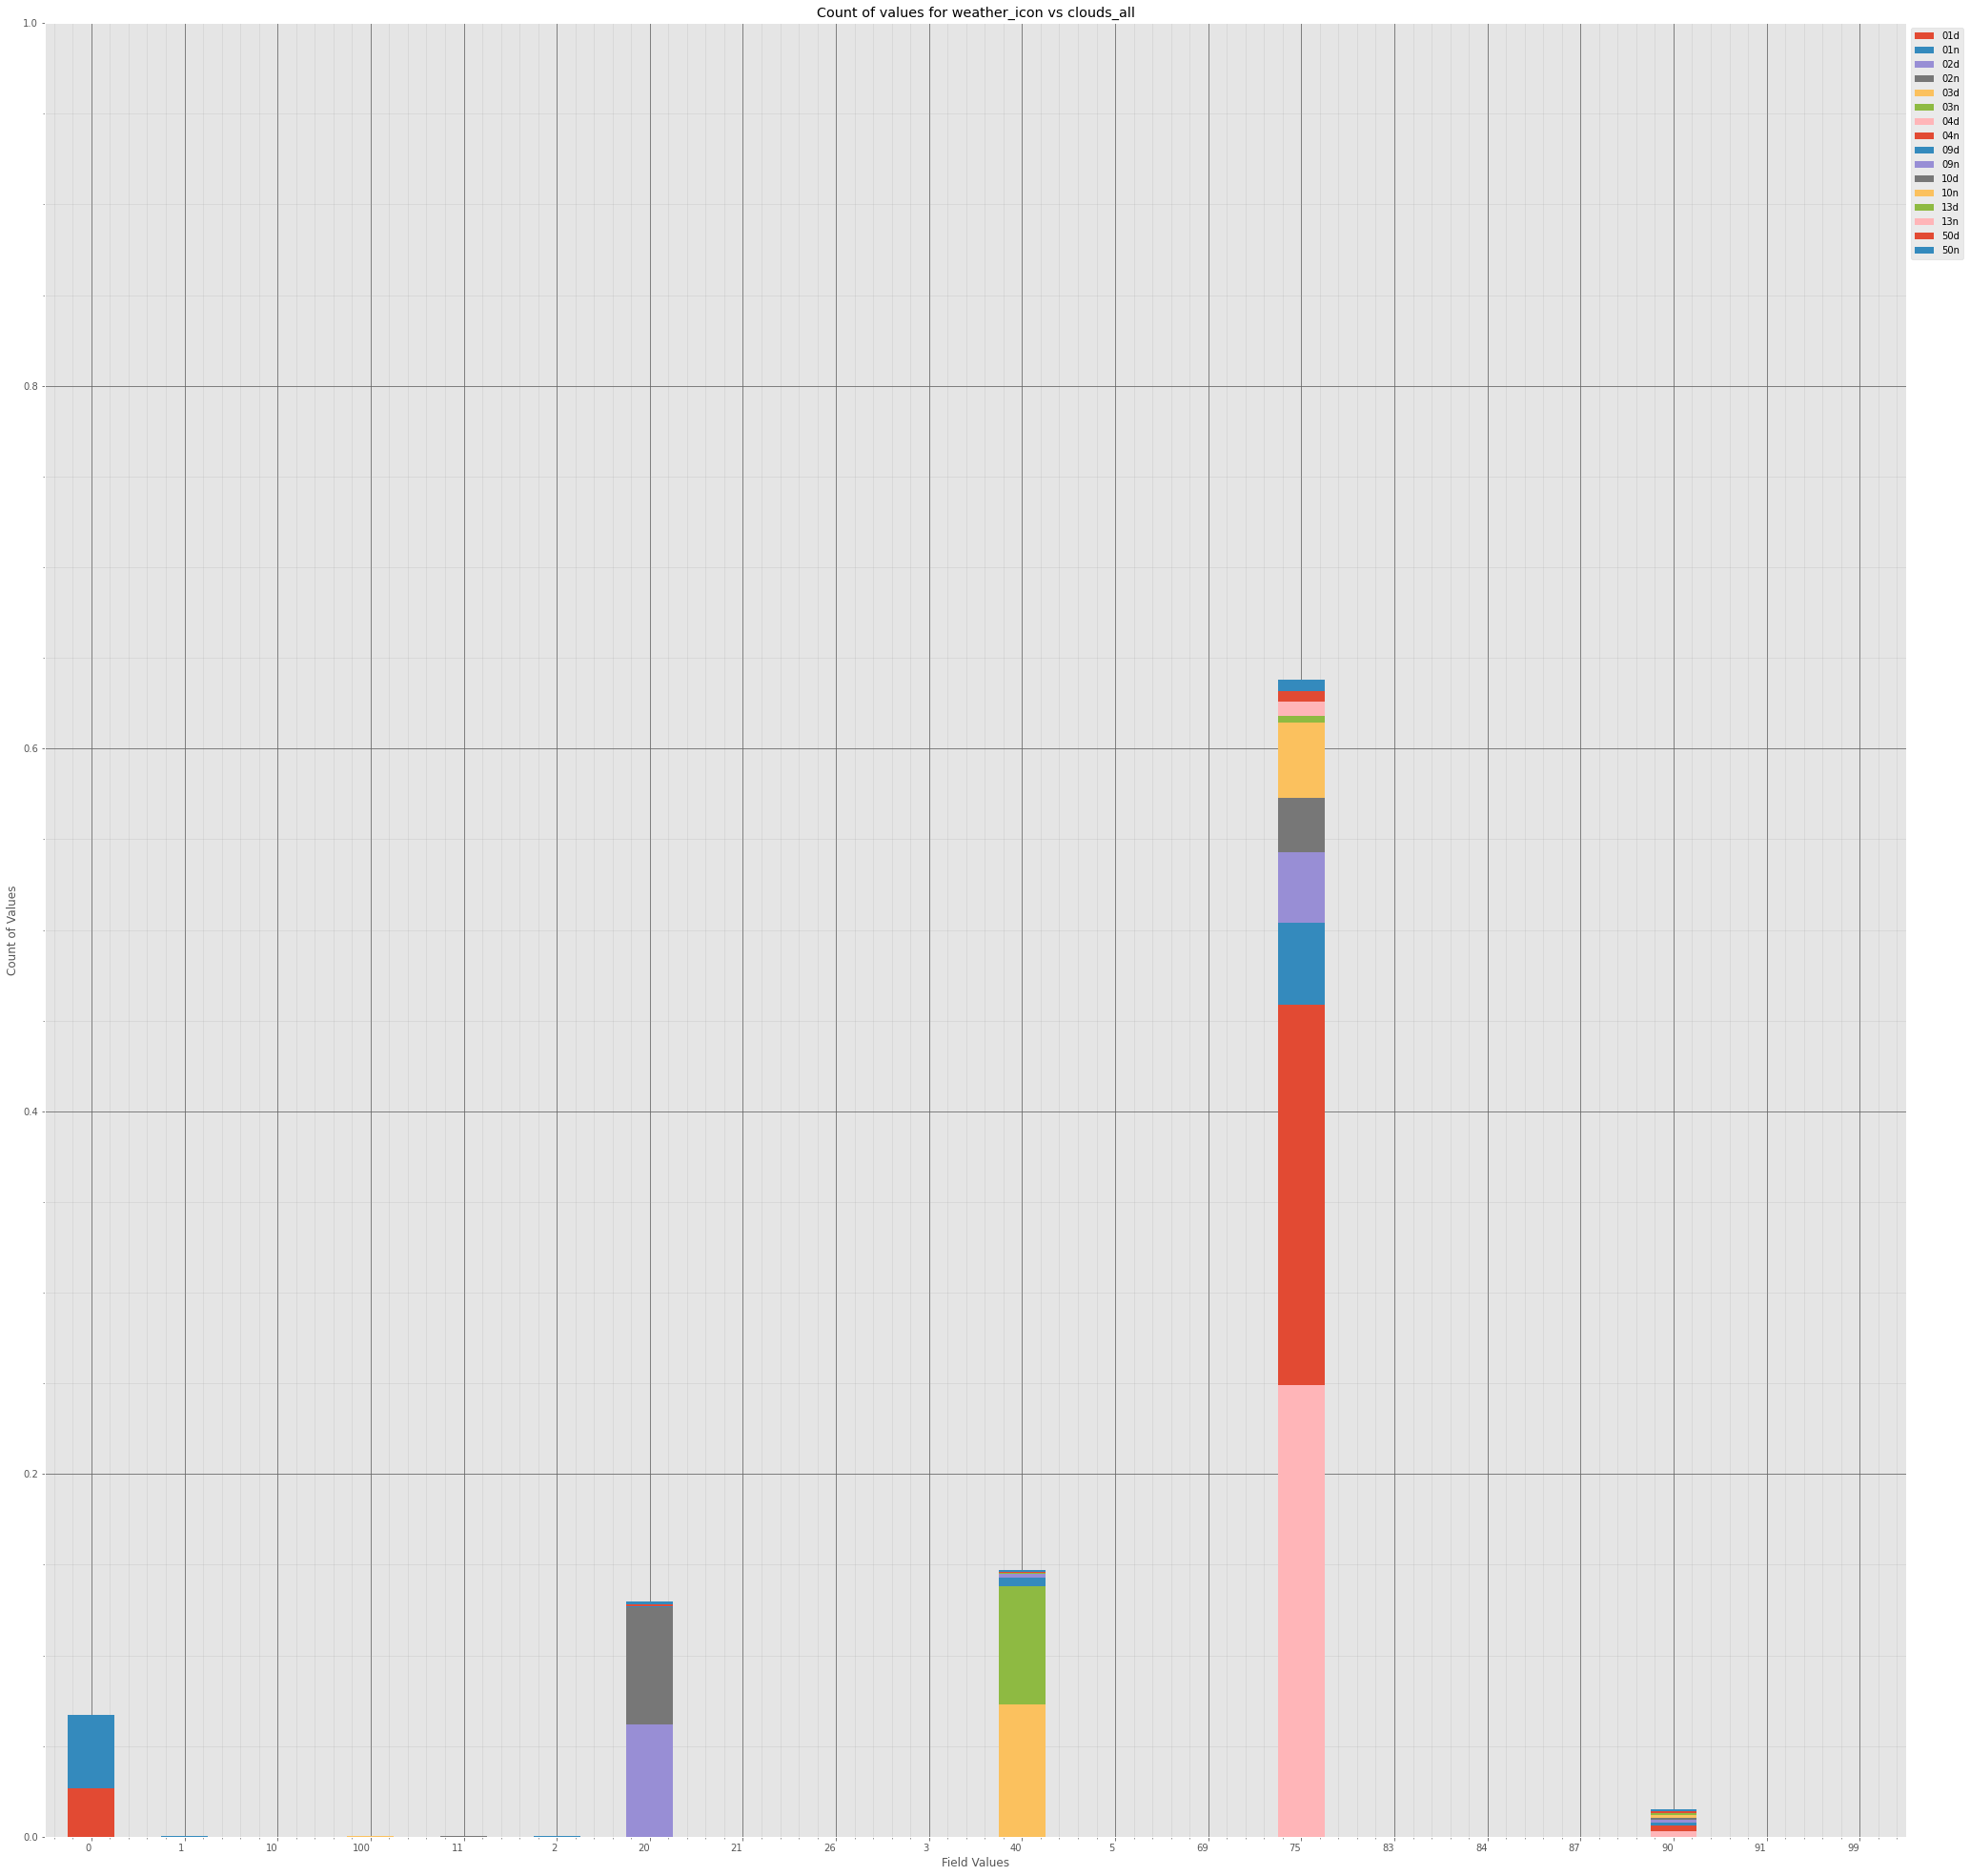



----------------------


Grouping over weather_id|timezone results in:



weather_id timezone  Rows  % Frequency
0         300        0   130     1.469259
1         300     3600   139     1.570976
2         301        0     2     0.022604
3         301     3600     2     0.022604
4         310        0   114     1.288427
5         310     3600   109     1.231917
6         311        0     2     0.022604
7         311     3600     0     0.000000
8         500        0   324     3.661844
9         500     3600   285     3.221067
10        501        0    33     0.372966
11        501     3600    14     0.158228
12        502        0     1     0.011302
13        502     3600     0     0.000000
14        520        0   134     1.514467
15        520     3600    94     1.062387
16        521        0    39     0.440778
17        521     3600    81     0.915461
18        600        0    30     0.339060
19        600     3600     0     0.000000
20        601        0     7     0.079114
21        601     3600     0     0.000000
22        612        0    10     0.113020
23        612     3600     1     0.011302
24        615        0     1     0.011302
25        615     3600     0     0.000000
26        620        0    66     0.745931
27        620     3600     0     0.000000
28        621        0     1     0.011302
29        621     3600     0     0.000000
30        701        0    40     0.452080
31        701     3600    37     0.418174
32        711        0     0     0.000000
33        711     3600     1     0.011302
34        741        0    50     0.565099
35        741     3600    39     0.440778
36        800        0   118     1.333635
37        800     3600   484     5.470163
38        801        0   415     4.690325
39        801     3600   706     7.979204
40        802        0   485     5.481465
41        802     3600   738     8.340868
42        803        0  1597    18.049277
43        803     3600  2464    27.848101
44        804        0    30     0.339060
45        804     3600    25     0.282550

Non Zero Data:


weather_id timezone  Rows  % Frequency
0         300        0   130     1.469259
1         300     3600   139     1.570976
2         301        0     2     0.022604
3         301     3600     2     0.022604
4         310        0   114     1.288427
5         310     3600   109     1.231917
6         311        0     2     0.022604
8         500        0   324     3.661844
9         500     3600   285     3.221067
10        501        0    33     0.372966
11        501     3600    14     0.158228
12        502        0     1     0.011302
14        520        0   134     1.514467
15        520     3600    94     1.062387
16        521        0    39     0.440778
17        521     3600    81     0.915461
18        600        0    30     0.339060
20        601        0     7     0.079114
22        612        0    10     0.113020
23        612     3600     1     0.011302
24        615        0     1     0.011302
26        620        0    66     0.745931
28        621        0     1     0.011302
30        701        0    40     0.452080
31        701     3600    37     0.418174
33        711     3600     1     0.011302
34        741        0    50     0.565099
35        741     3600    39     0.440778
36        800        0   118     1.333635
37        800     3600   484     5.470163
38        801        0   415     4.690325
39        801     3600   706     7.979204
40        802        0   485     5.481465
41        802     3600   738     8.340868
42        803        0  1597    18.049277
43        803     3600  2464    27.848101
44        804        0    30     0.339060
45        804     3600    25     0.282550

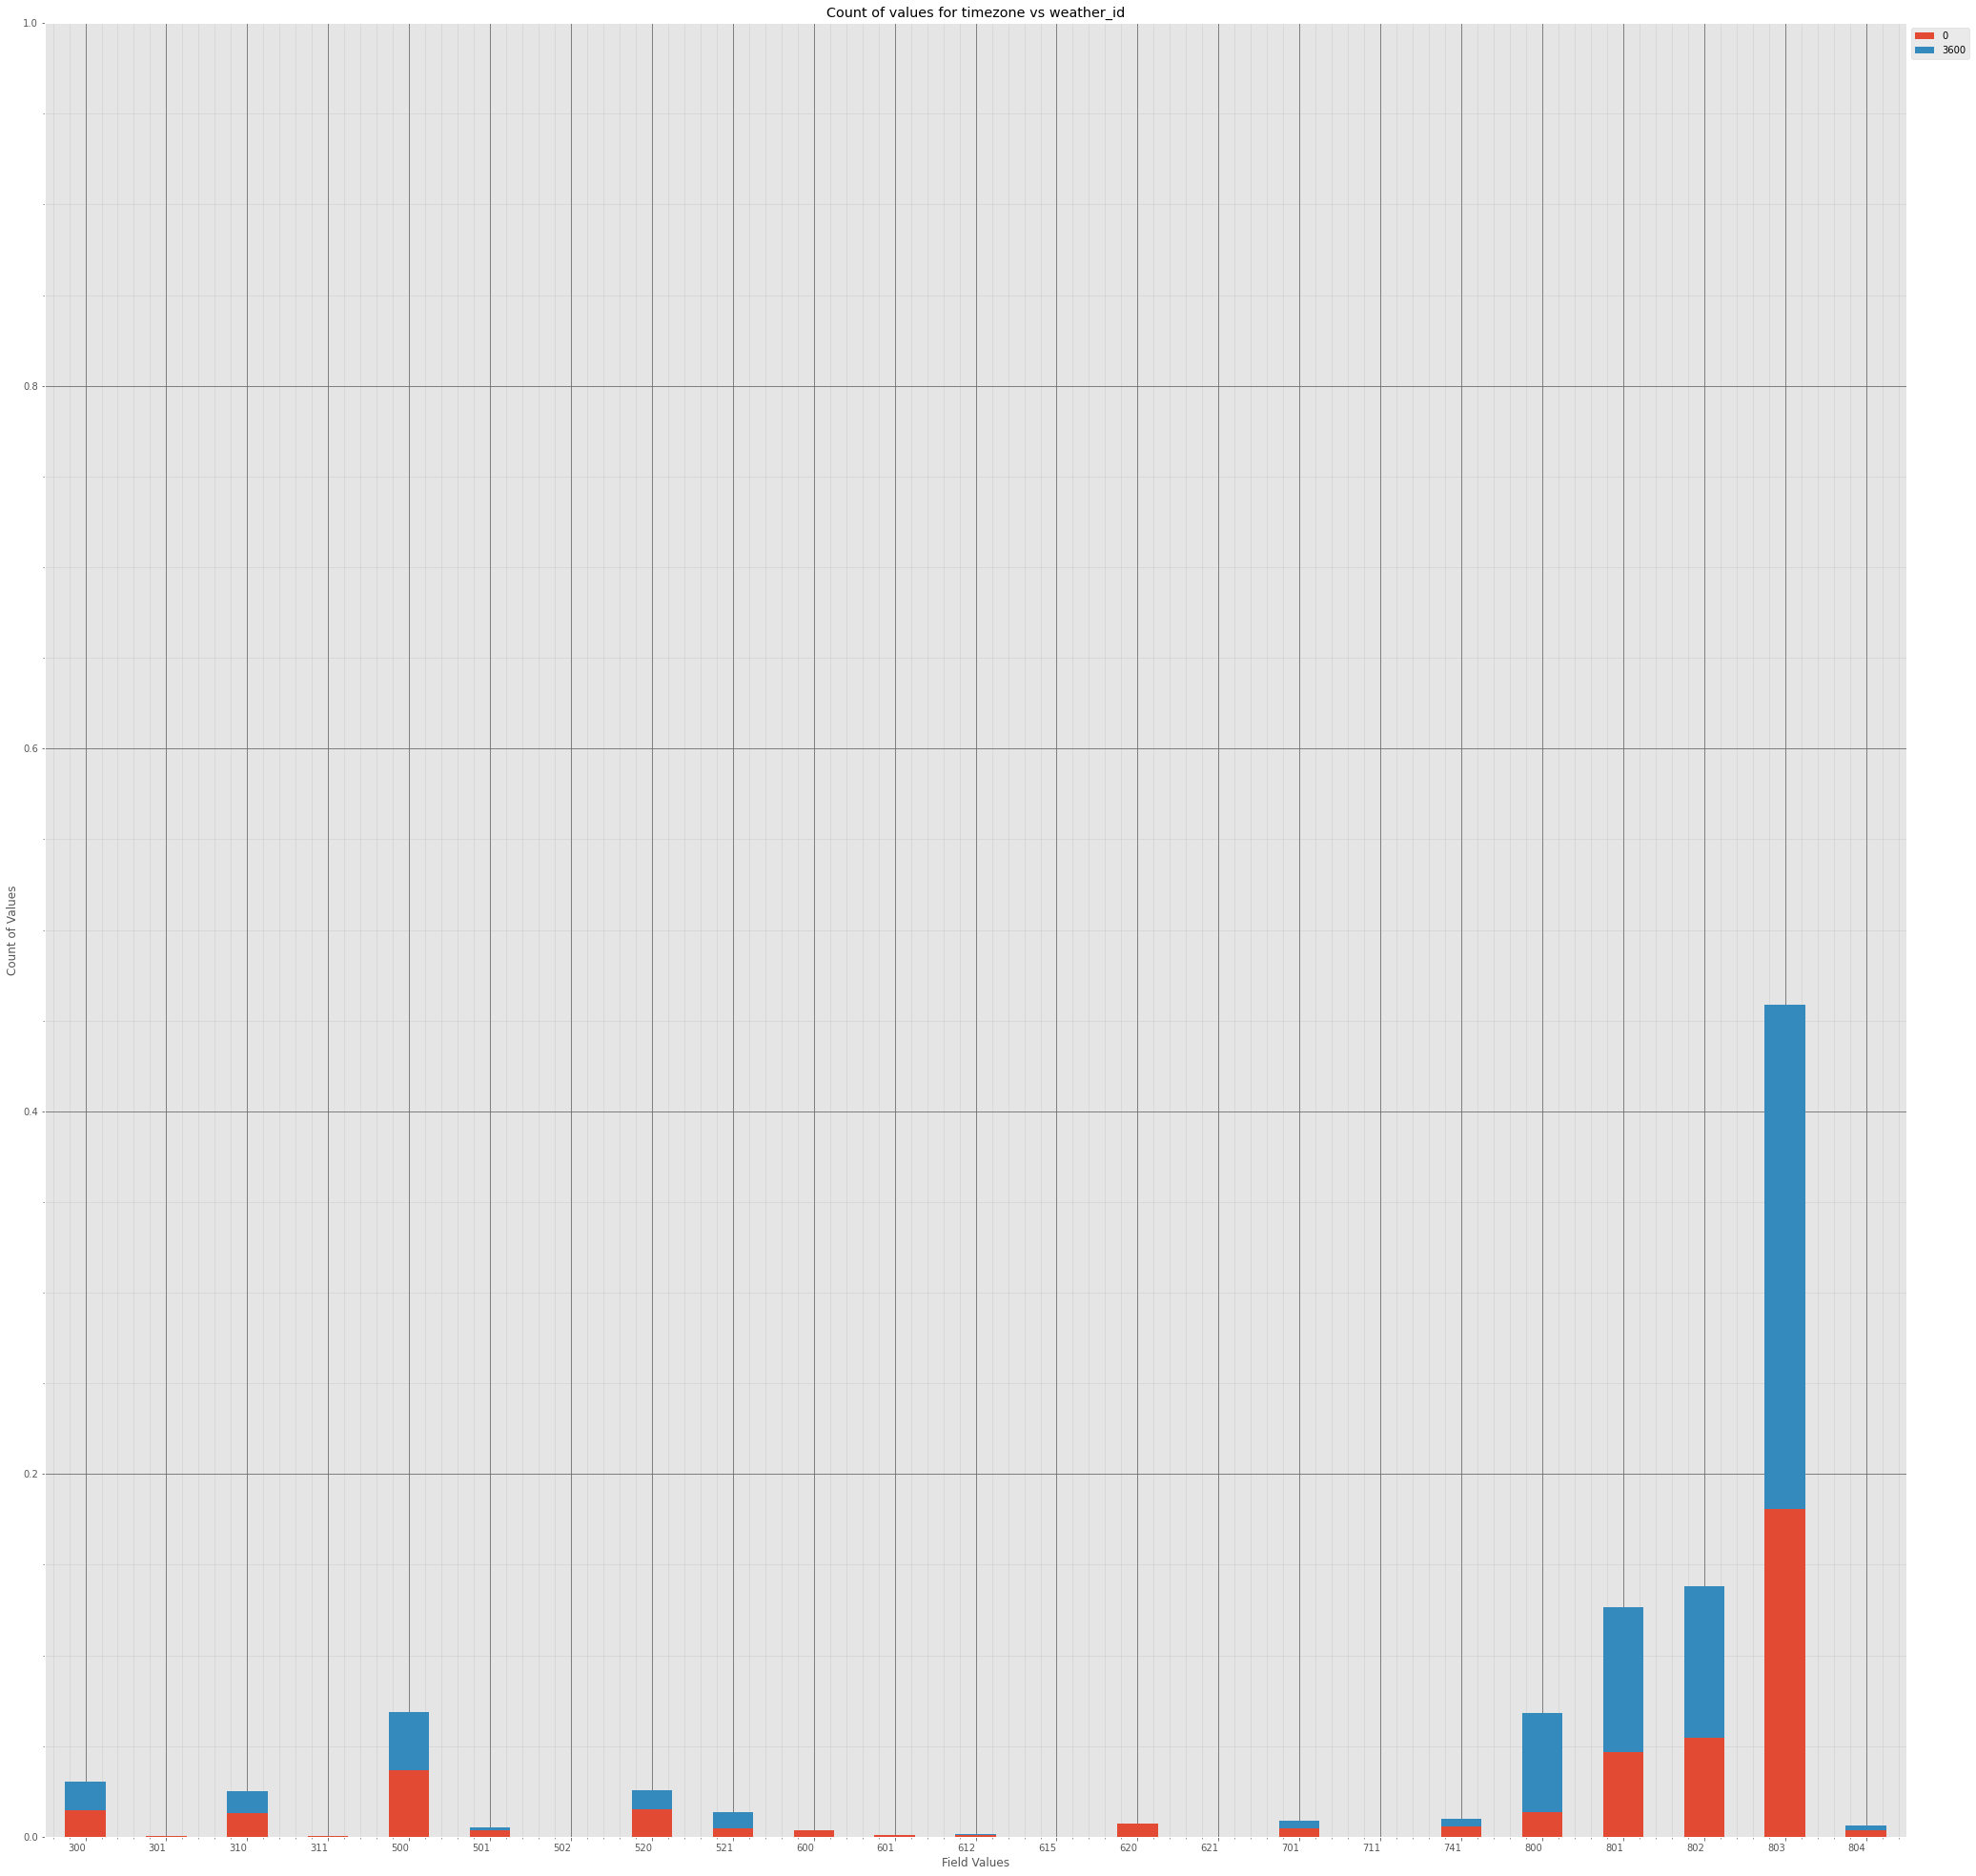



----------------------


Grouping over weather_id|city_name results in:



weather_id city_name  Rows  % Frequency
0         300    Dublin   269     3.040235
1         301    Dublin     4     0.045208
2         310    Dublin   223     2.520344
3         311    Dublin     2     0.022604
4         500    Dublin   609     6.882911
5         501    Dublin    47     0.531193
6         502    Dublin     1     0.011302
7         520    Dublin   228     2.576854
8         521    Dublin   120     1.356239
9         600    Dublin    30     0.339060
10        601    Dublin     7     0.079114
11        612    Dublin    11     0.124322
12        615    Dublin     1     0.011302
13        620    Dublin    66     0.745931
14        621    Dublin     1     0.011302
15        701    Dublin    77     0.870253
16        711    Dublin     1     0.011302
17        741    Dublin    89     1.005877
18        800    Dublin   602     6.803797
19        801    Dublin  1121    12.669530
20        802    Dublin  1223    13.822333
21        803    Dublin  4061    45.897378
22        804    Dublin    55     0.621609

Non Zero Data:


weather_id city_name  Rows  % Frequency
0         300    Dublin   269     3.040235
1         301    Dublin     4     0.045208
2         310    Dublin   223     2.520344
3         311    Dublin     2     0.022604
4         500    Dublin   609     6.882911
5         501    Dublin    47     0.531193
6         502    Dublin     1     0.011302
7         520    Dublin   228     2.576854
8         521    Dublin   120     1.356239
9         600    Dublin    30     0.339060
10        601    Dublin     7     0.079114
11        612    Dublin    11     0.124322
12        615    Dublin     1     0.011302
13        620    Dublin    66     0.745931
14        621    Dublin     1     0.011302
15        701    Dublin    77     0.870253
16        711    Dublin     1     0.011302
17        741    Dublin    89     1.005877
18        800    Dublin   602     6.803797
19        801    Dublin  1121    12.669530
20        802    Dublin  1223    13.822333
21        803    Dublin  4061    45.897378
22        804    Dublin    55     0.621609

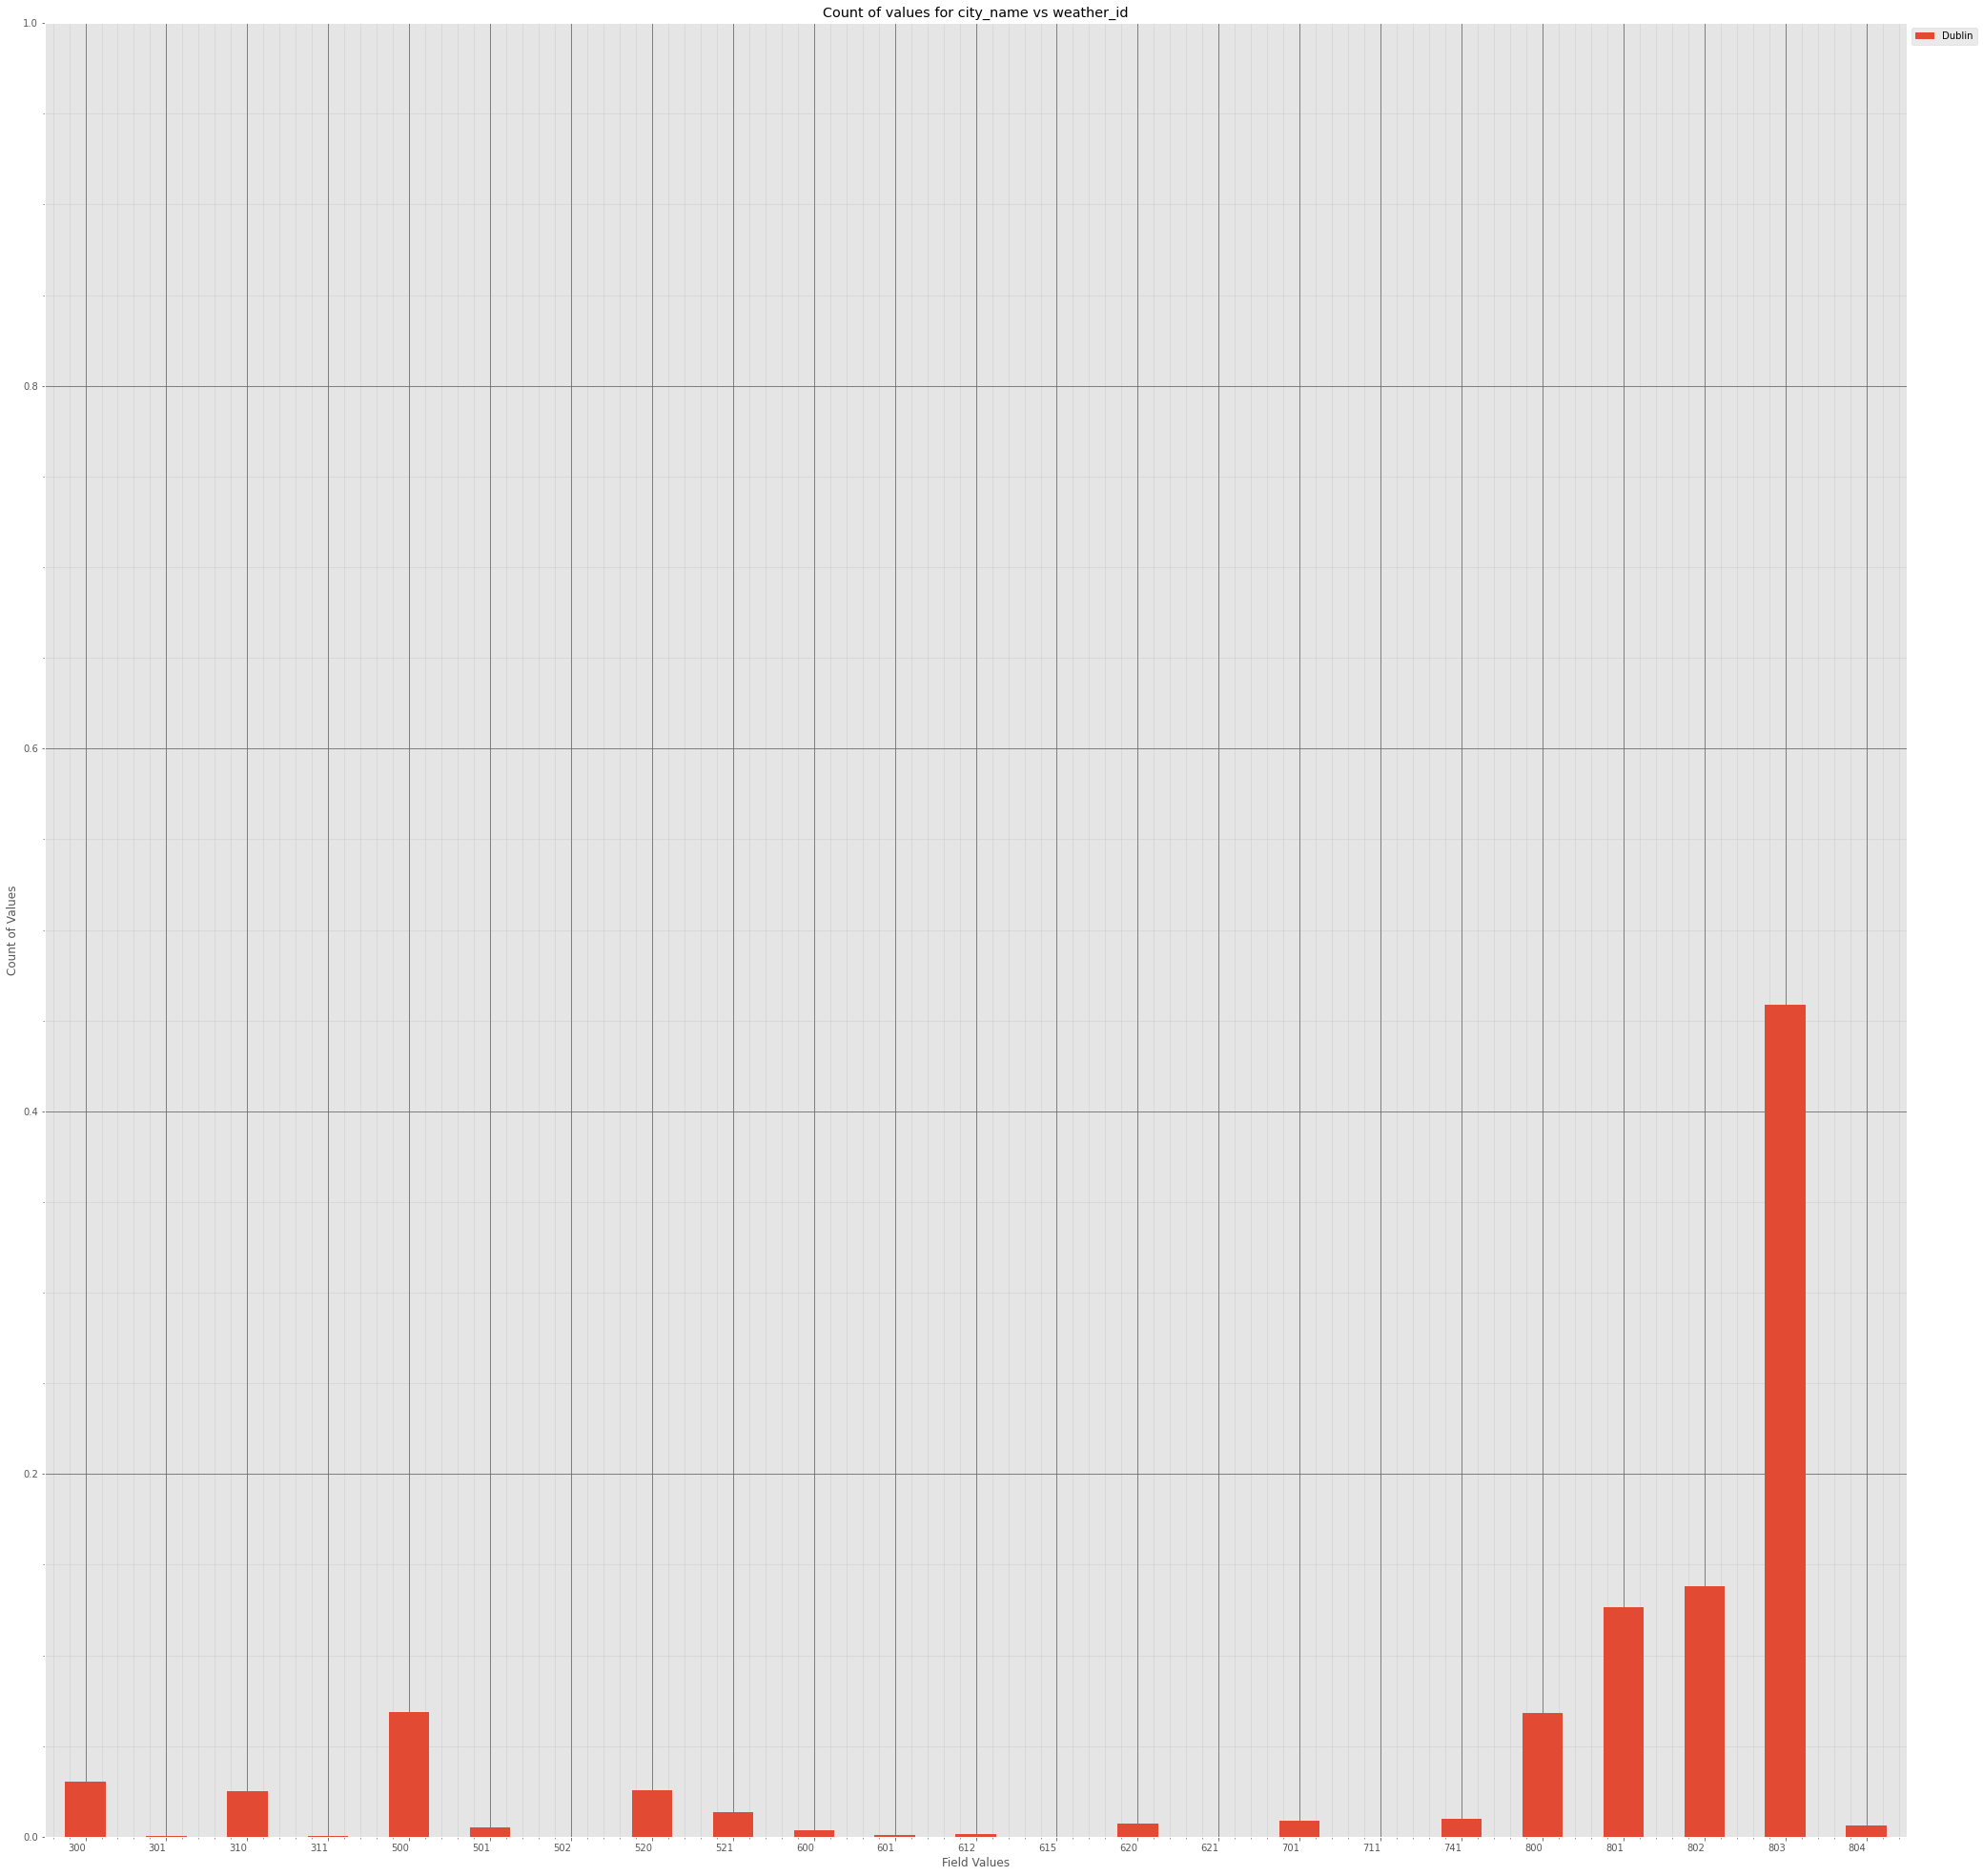



----------------------


Grouping over weather_id|clouds_all results in:



weather_id clouds_all  Rows  % Frequency
0          300          0     0     0.000000
1          300          1     0     0.000000
2          300         10     0     0.000000
3          300        100     1     0.011302
4          300         11     0     0.000000
..         ...        ...   ...          ...
455        804         84     0     0.000000
456        804         87     1     0.011302
457        804         90    53     0.599005
458        804         91     0     0.000000
459        804         99     1     0.011302

[460 rows x 4 columns]

Non Zero Data:


weather_id clouds_all  Rows  % Frequency
3          300        100     1     0.011302
13         300         75   255     2.882007
17         300         90    13     0.146926
33         301         75     4     0.045208
53         310         75   208     2.350814
57         310         90    15     0.169530
73         311         75     2     0.022604
83         500        100     1     0.011302
93         500         75   588     6.645570
97         500         90    20     0.226040
113        501         75    42     0.474684
117        501         90     5     0.056510
133        502         75     1     0.011302
146        520         20     1     0.011302
150        520         40    38     0.429476
153        520         75   188     2.124774
157        520         90     1     0.011302
166        521         20     7     0.079114
170        521         40    23     0.259946
173        521         75    90     1.017179
193        600         75    22     0.248644
197        600         90     8     0.090416
213        601         75     6     0.067812
217        601         90     1     0.011302
230        612         40     2     0.022604
233        612         75     9     0.101718
253        615         75     1     0.011302
270        620         40     2     0.022604
273        620         75    64     0.723327
293        621         75     1     0.011302
306        701         20    10     0.113020
310        701         40     4     0.045208
313        701         75    52     0.587703
317        701         90    10     0.113020
318        701         91     1     0.011302
326        711         20     1     0.011302
343        741        100     2     0.022604
346        741         20    13     0.146926
350        741         40    12     0.135624
353        741         75    55     0.621609
357        741         90     7     0.079114
360        800          0   593     6.702080
361        800          1     2     0.022604
362        800         10     1     0.011302
365        800          2     4     0.045208
369        800          3     1     0.011302
371        800          5     1     0.011302
384        801         11     2     0.022604
386        801         20  1118    12.635624
387        801         21     1     0.011302
408        802         26     1     0.011302
410        802         40  1222    13.811031
432        803         69     1     0.011302
433        803         75  4058    45.863472
434        803         83     1     0.011302
435        803         84     1     0.011302
456        804         87     1     0.011302
457        804         90    53     0.599005
459        804         99     1     0.011302

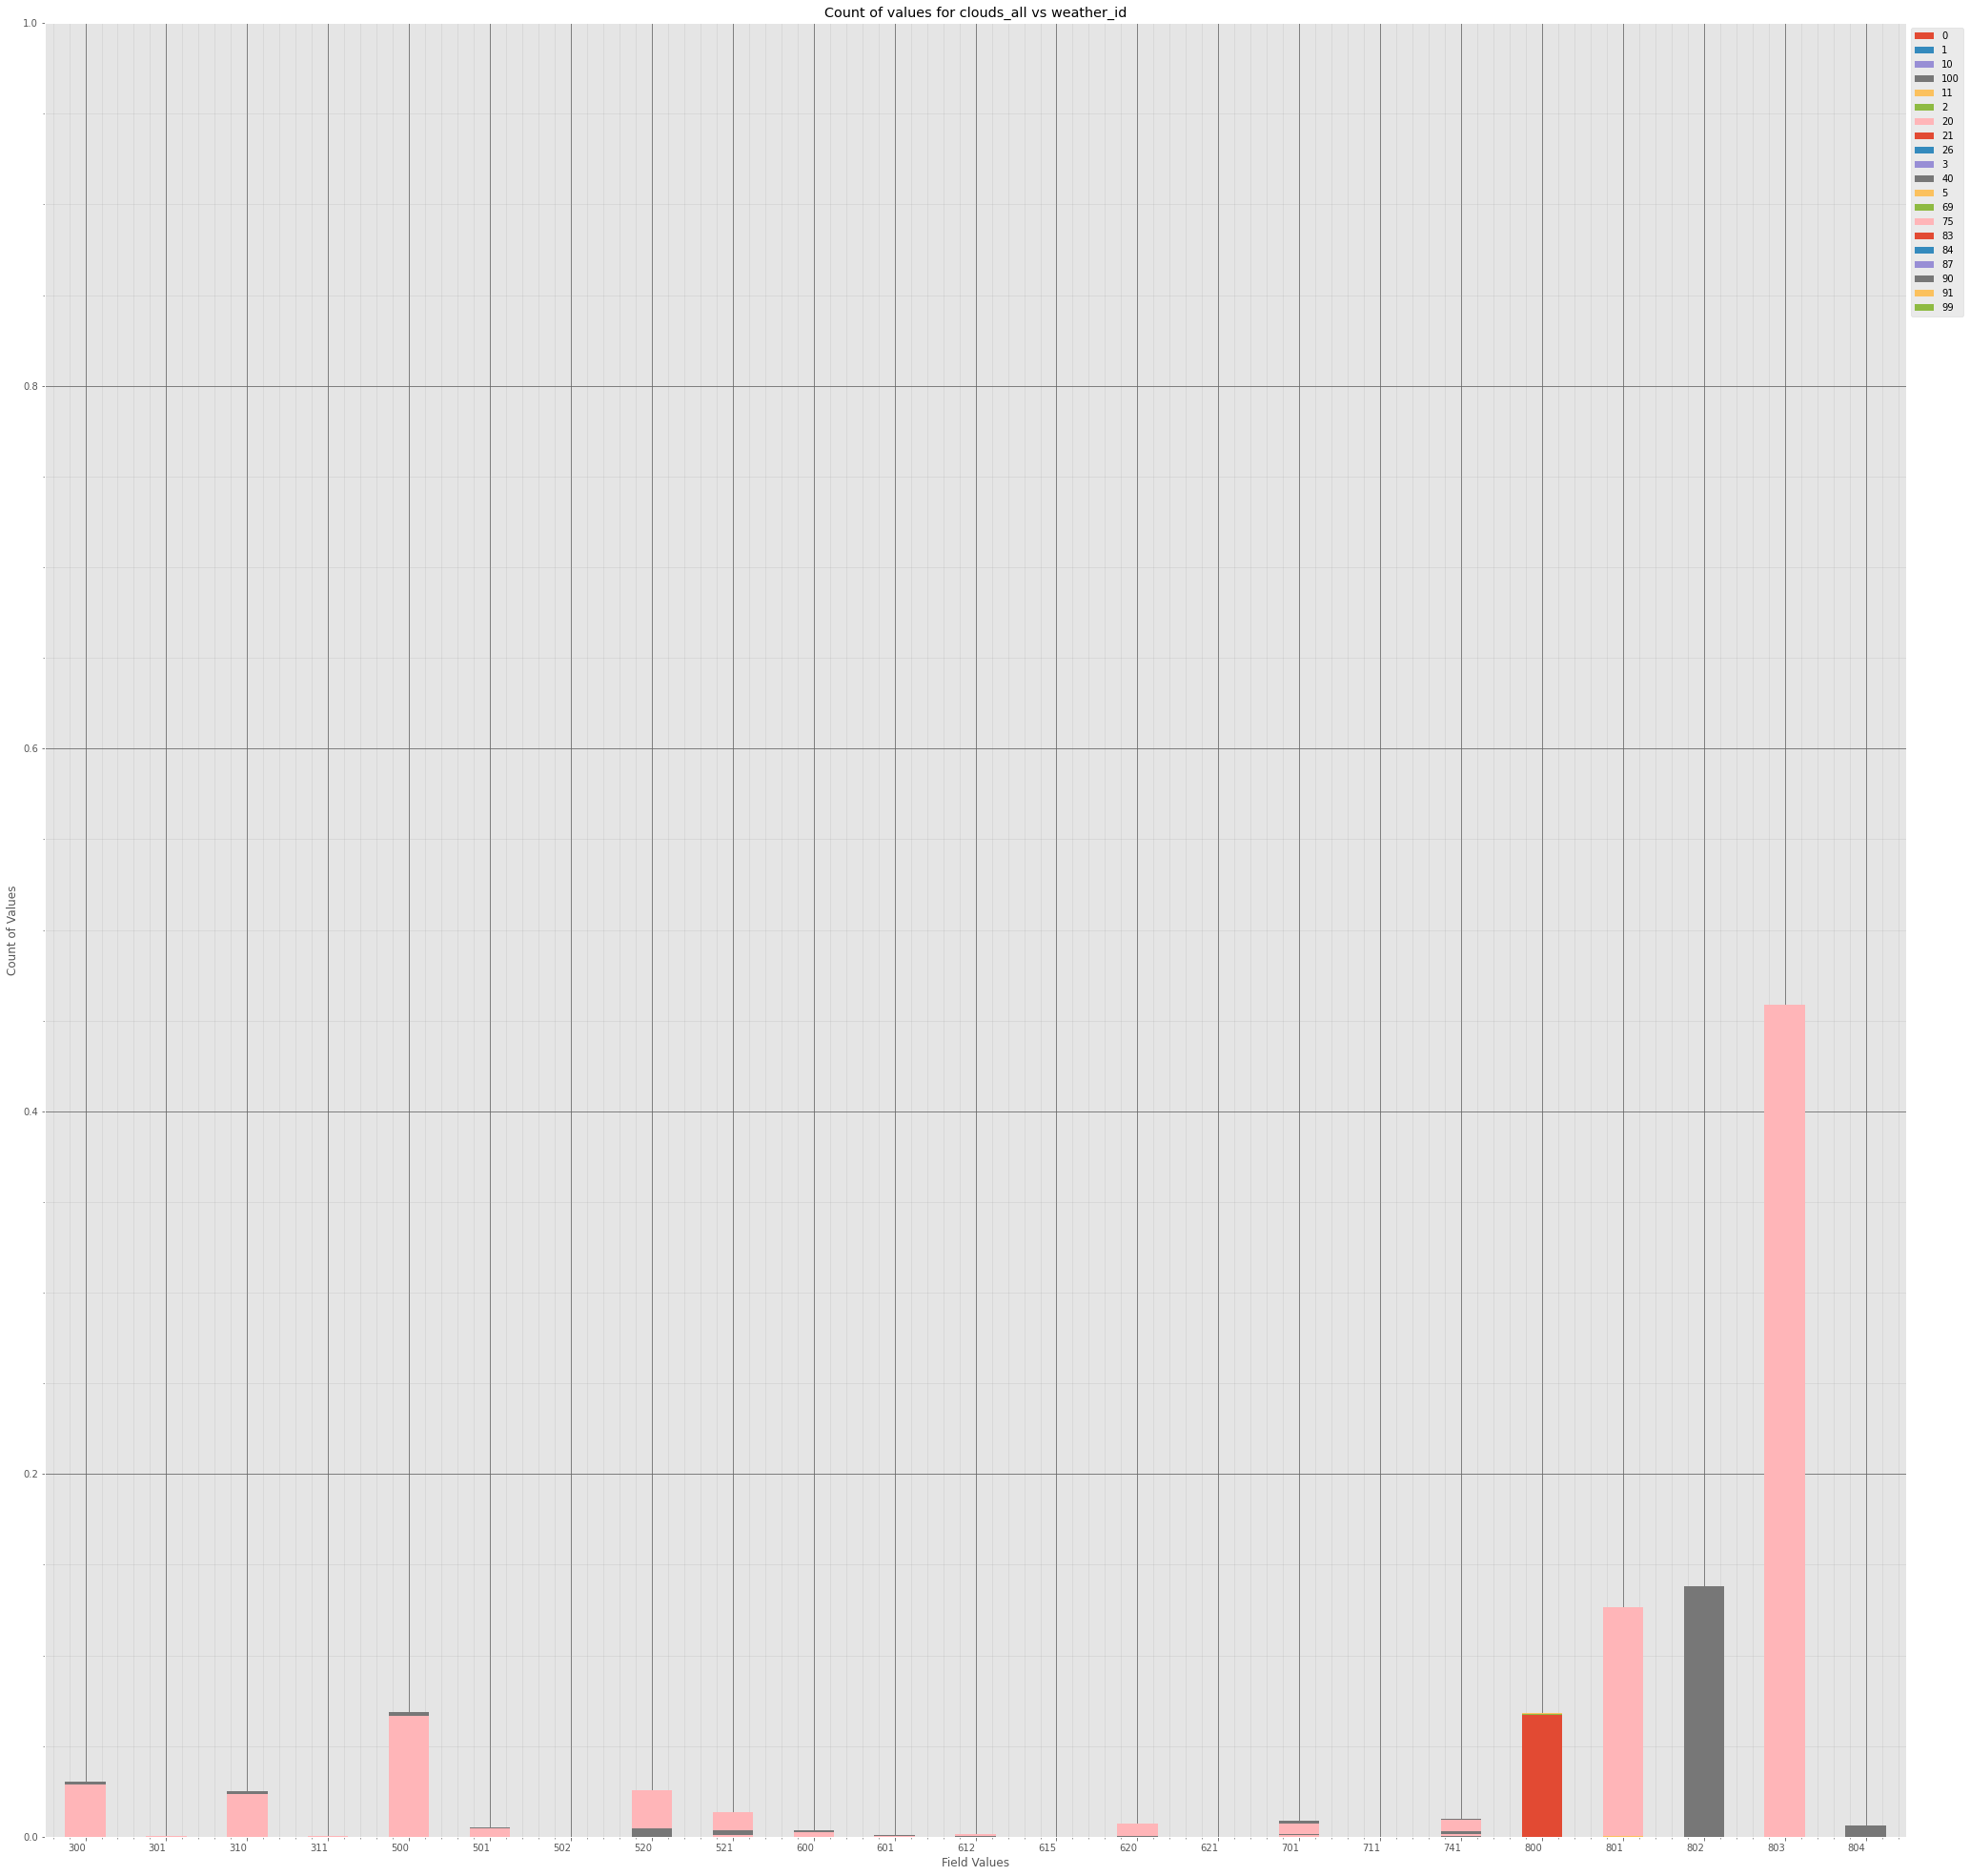



----------------------


Grouping over weather_id|weather_description results in:



weather_id  weather_description  Rows  % Frequency
0          300   light shower sleet     0          0.0
1          300        broken clouds     0          0.0
2          300              drizzle     0          0.0
3          300           few clouds     0          0.0
4          300                  fog     0          0.0
..         ...                  ...   ...          ...
547        804          shower rain     0          0.0
548        804          shower snow     0          0.0
549        804         sky is clear     0          0.0
550        804                smoke     0          0.0
551        804                 snow     0          0.0

[552 rows x 4 columns]

Non Zero Data:


weather_id           weather_description  Rows  % Frequency
6          300       light intensity drizzle   269     3.040235
26         301                       drizzle     4     0.045208
55         310  light intensity drizzle rain   223     2.520344
89         311              rain and drizzle     2     0.022604
105        500                    light rain   609     6.882911
134        501                 moderate rain    47     0.531193
149        502          heavy intensity rain     1     0.011302
176        520   light intensity shower rain   228     2.576854
208        521         proximity shower rain   118     1.333635
211        521                   shower rain     2     0.022604
228        600                    light snow    30     0.339060
263        601                          snow     7     0.079114
264        612            light shower sleet    11     0.124322
298        615           light rain and snow     1     0.011302
323        620             light shower snow    66     0.745931
356        621                   shower snow     1     0.011302
373        701                          mist    77     0.870253
406        711                         smoke     1     0.011302
412        741                           fog    89     1.005877
453        800                  sky is clear   602     6.803797
459        801                    few clouds  1121    12.669530
498        802              scattered clouds  1223    13.822333
505        803                 broken clouds  4061    45.897378
543        804               overcast clouds    55     0.621609

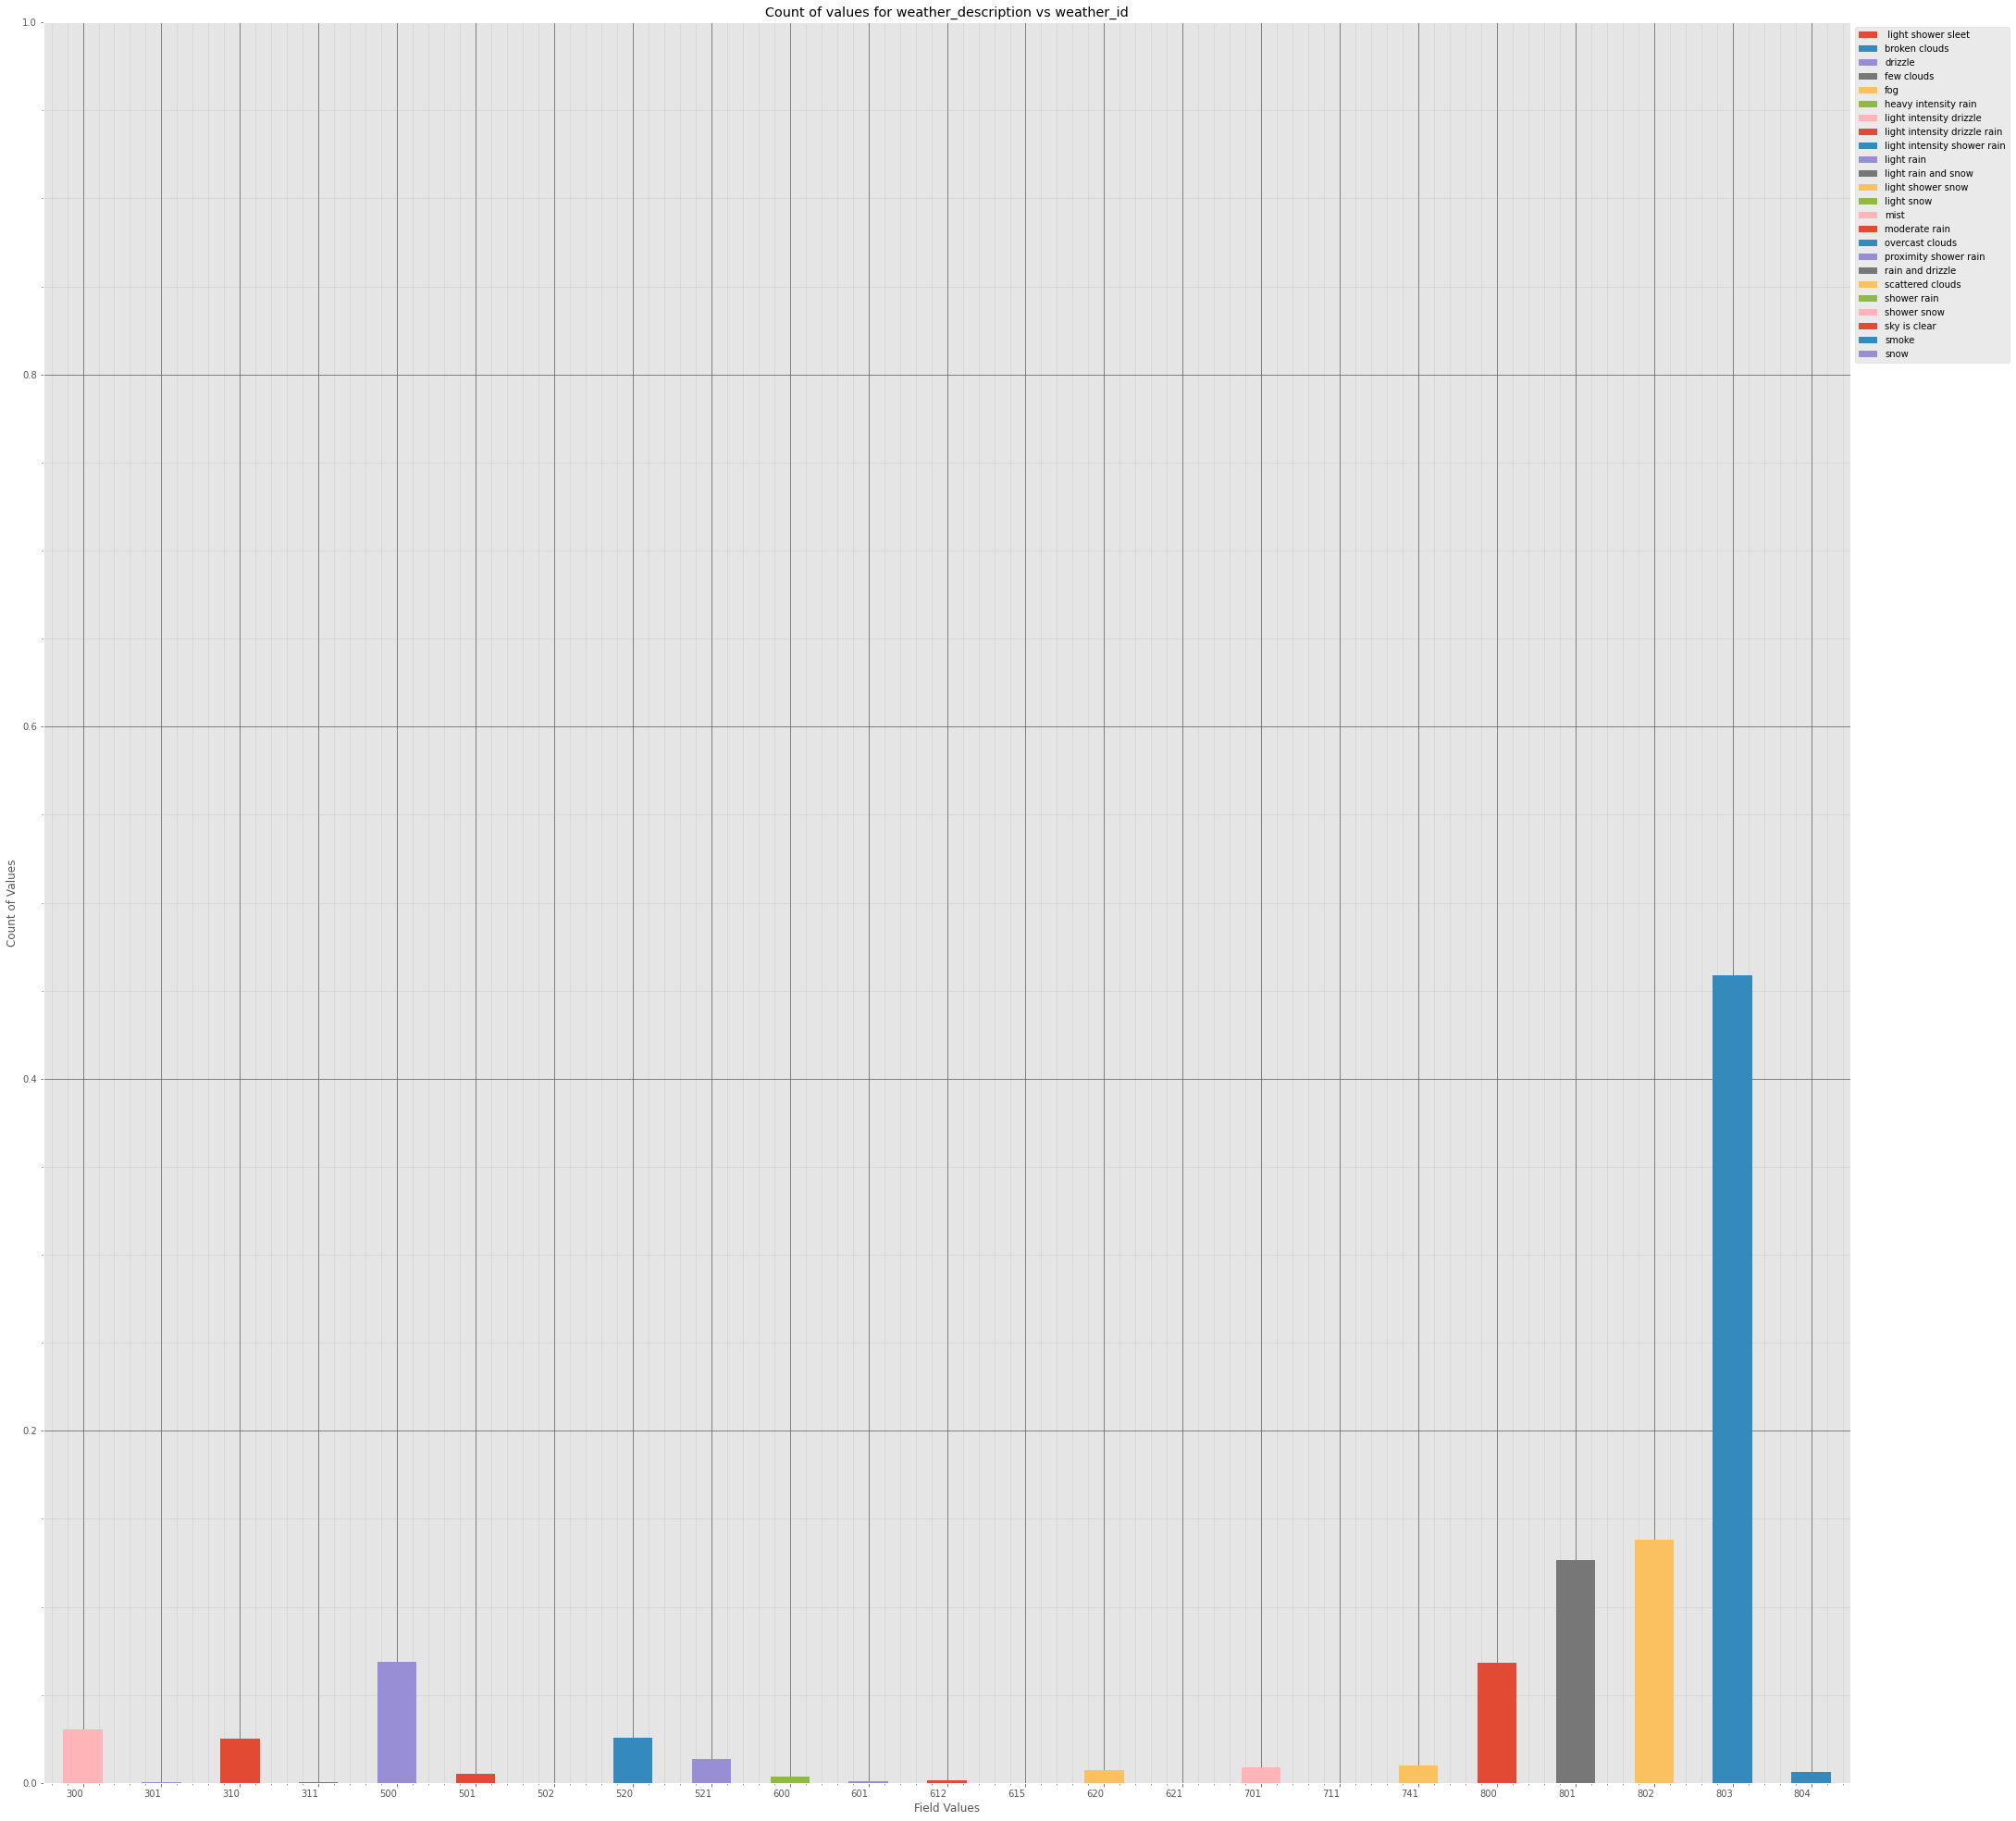



----------------------


Grouping over weather_id|weather_icon results in:



weather_id weather_icon  Rows  % Frequency
0          300          01d     0          0.0
1          300          01n     0          0.0
2          300          02d     0          0.0
3          300          02n     0          0.0
4          300          03d     0          0.0
..         ...          ...   ...          ...
363        804          10n     0          0.0
364        804          13d     0          0.0
365        804          13n     0          0.0
366        804          50d     0          0.0
367        804          50n     0          0.0

[368 rows x 4 columns]

Non Zero Data:


weather_id weather_icon  Rows  % Frequency
8          300          09d   132     1.491863
9          300          09n   137     1.548373
25         301          09n     4     0.045208
40         310          09d   108     1.220615
41         310          09n   115     1.299729
57         311          09n     2     0.022604
74         500          10d   257     2.904611
75         500          10n   352     3.978300
90         501          10d    17     0.192134
91         501          10n    30     0.339060
107        502          10n     1     0.011302
120        520          09d   111     1.254521
121        520          09n   117     1.322333
136        521          09d   112     1.265823
137        521          09n     8     0.090416
156        600          13d    11     0.124322
157        600          13n    19     0.214738
172        601          13d     2     0.022604
173        601          13n     5     0.056510
188        612          13d     4     0.045208
189        612          13n     7     0.079114
205        615          13n     1     0.011302
220        620          13d    27     0.305154
221        620          13n    39     0.440778
237        621          13n     1     0.011302
254        701          50d    32     0.361664
255        701          50n    45     0.508590
270        711          50d     1     0.011302
286        741          50d    36     0.406872
287        741          50n    53     0.599005
288        800          01d   237     2.678571
289        800          01n   365     4.125226
306        801          02d   547     6.182188
307        801          02n   574     6.487342
324        802          03d   645     7.289783
325        802          03n   578     6.532550
342        803          04d  2207    24.943490
343        803          04n  1854    20.953888
358        804          04d    27     0.305154
359        804          04n    28     0.316456

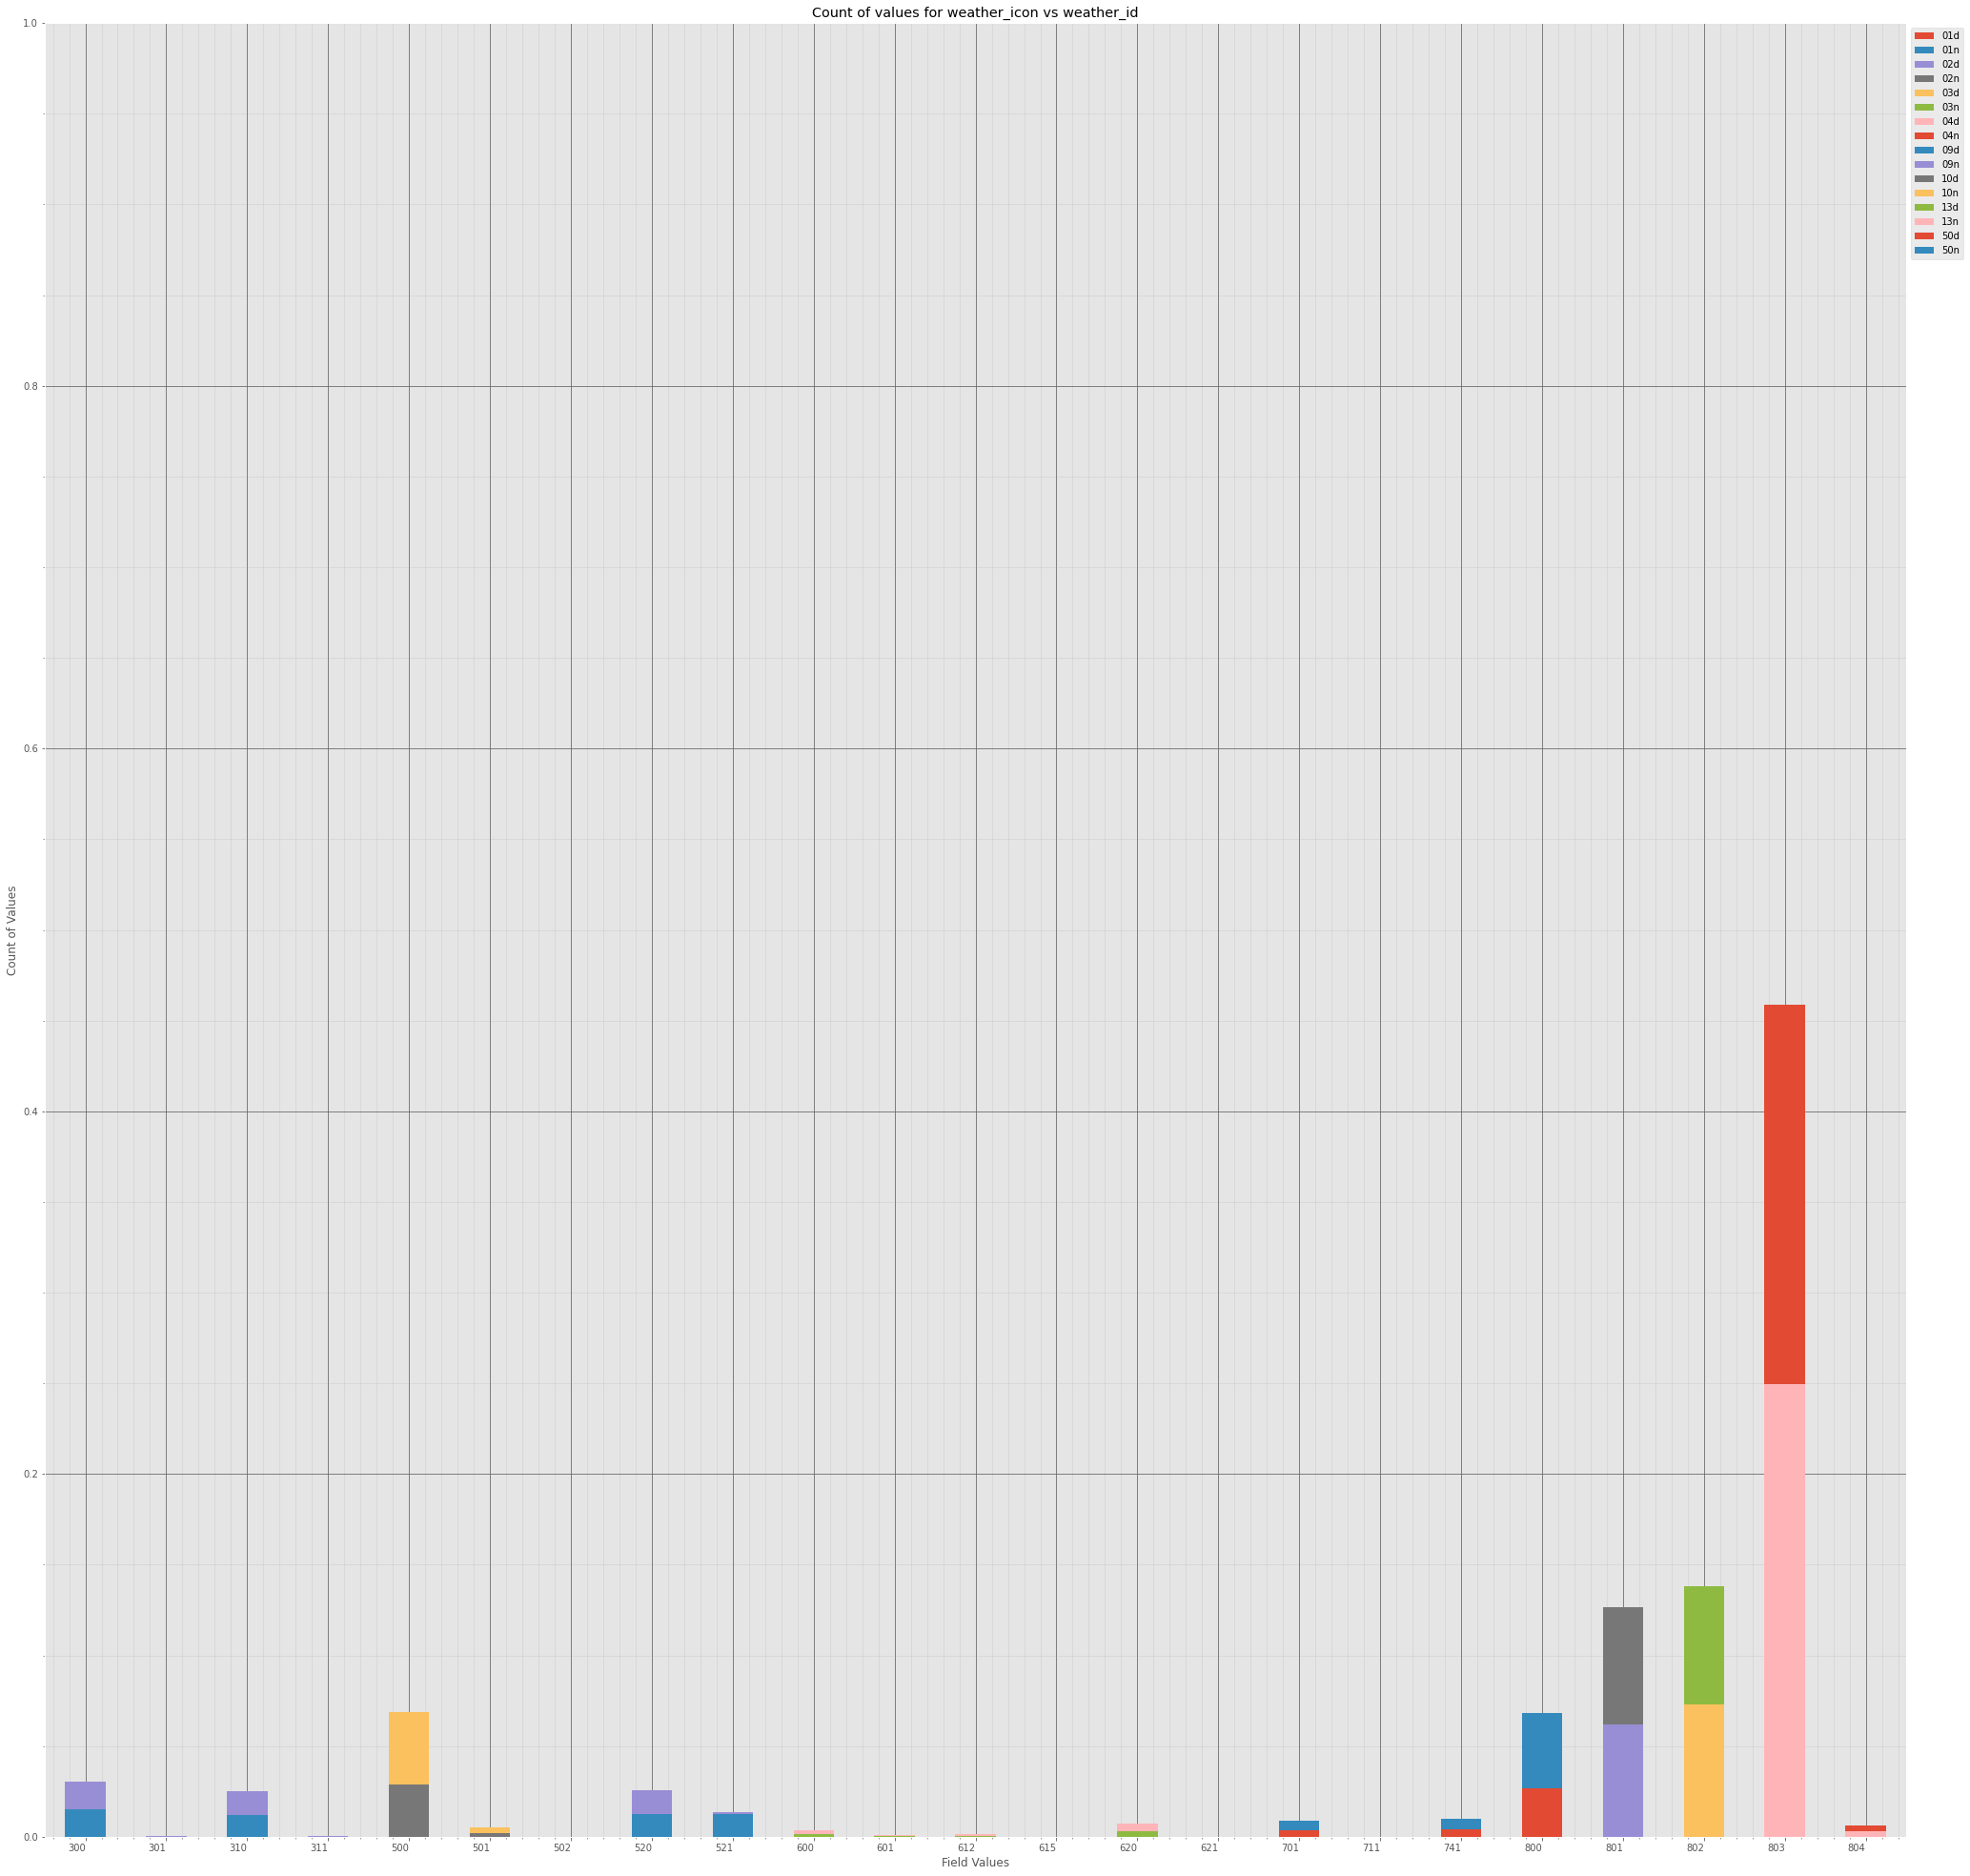



----------------------


Grouping over weather_description|timezone results in:



weather_description timezone  Rows  % Frequency
0             light shower sleet        0    10     0.113020
1             light shower sleet     3600     1     0.011302
2                  broken clouds        0  1597    18.049277
3                  broken clouds     3600  2464    27.848101
4                        drizzle        0     2     0.022604
5                        drizzle     3600     2     0.022604
6                     few clouds        0   415     4.690325
7                     few clouds     3600   706     7.979204
8                            fog        0    50     0.565099
9                            fog     3600    39     0.440778
10          heavy intensity rain        0     1     0.011302
11          heavy intensity rain     3600     0     0.000000
12       light intensity drizzle        0   130     1.469259
13       light intensity drizzle     3600   139     1.570976
14  light intensity drizzle rain        0   114     1.288427
15  light intensity drizzle rain     3600   109     1.231917
16   light intensity shower rain        0   134     1.514467
17   light intensity shower rain     3600    94     1.062387
18                    light rain        0   324     3.661844
19                    light rain     3600   285     3.221067
20           light rain and snow        0     1     0.011302
21           light rain and snow     3600     0     0.000000
22             light shower snow        0    66     0.745931
23             light shower snow     3600     0     0.000000
24                    light snow        0    30     0.339060
25                    light snow     3600     0     0.000000
26                          mist        0    40     0.452080
27                          mist     3600    37     0.418174
28                 moderate rain        0    33     0.372966
29                 moderate rain     3600    14     0.158228
30               overcast clouds        0    30     0.339060
31               overcast clouds     3600    25     0.282550
32         proximity shower rain        0    37     0.418174
33         proximity shower rain     3600    81     0.915461
34              rain and drizzle        0     2     0.022604
35              rain and drizzle     3600     0     0.000000
36              scattered clouds        0   485     5.481465
37              scattered clouds     3600   738     8.340868
38                   shower rain        0     2     0.022604
39                   shower rain     3600     0     0.000000
40                   shower snow        0     1     0.011302
41                   shower snow     3600     0     0.000000
42                  sky is clear        0   118     1.333635
43                  sky is clear     3600   484     5.470163
44                         smoke        0     0     0.000000
45                         smoke     3600     1     0.011302
46                          snow        0     7     0.079114
47                          snow     3600     0     0.000000

Non Zero Data:


weather_description timezone  Rows  % Frequency
0             light shower sleet        0    10     0.113020
1             light shower sleet     3600     1     0.011302
2                  broken clouds        0  1597    18.049277
3                  broken clouds     3600  2464    27.848101
4                        drizzle        0     2     0.022604
5                        drizzle     3600     2     0.022604
6                     few clouds        0   415     4.690325
7                     few clouds     3600   706     7.979204
8                            fog        0    50     0.565099
9                            fog     3600    39     0.440778
10          heavy intensity rain        0     1     0.011302
12       light intensity drizzle        0   130     1.469259
13       light intensity drizzle     3600   139     1.570976
14  light intensity drizzle rain        0   114     1.288427
15  light intensity drizzle rain     3600   109     1.231917
16   light intensity shower rain        0   134     1.514467
17   light intensity shower rain     3600    94     1.062387
18                    light rain        0   324     3.661844
19                    light rain     3600   285     3.221067
20           light rain and snow        0     1     0.011302
22             light shower snow        0    66     0.745931
24                    light snow        0    30     0.339060
26                          mist        0    40     0.452080
27                          mist     3600    37     0.418174
28                 moderate rain        0    33     0.372966
29                 moderate rain     3600    14     0.158228
30               overcast clouds        0    30     0.339060
31               overcast clouds     3600    25     0.282550
32         proximity shower rain        0    37     0.418174
33         proximity shower rain     3600    81     0.915461
34              rain and drizzle        0     2     0.022604
36              scattered clouds        0   485     5.481465
37              scattered clouds     3600   738     8.340868
38                   shower rain        0     2     0.022604
40                   shower snow        0     1     0.011302
42                  sky is clear        0   118     1.333635
43                  sky is clear     3600   484     5.470163
45                         smoke     3600     1     0.011302
46                          snow        0     7     0.079114

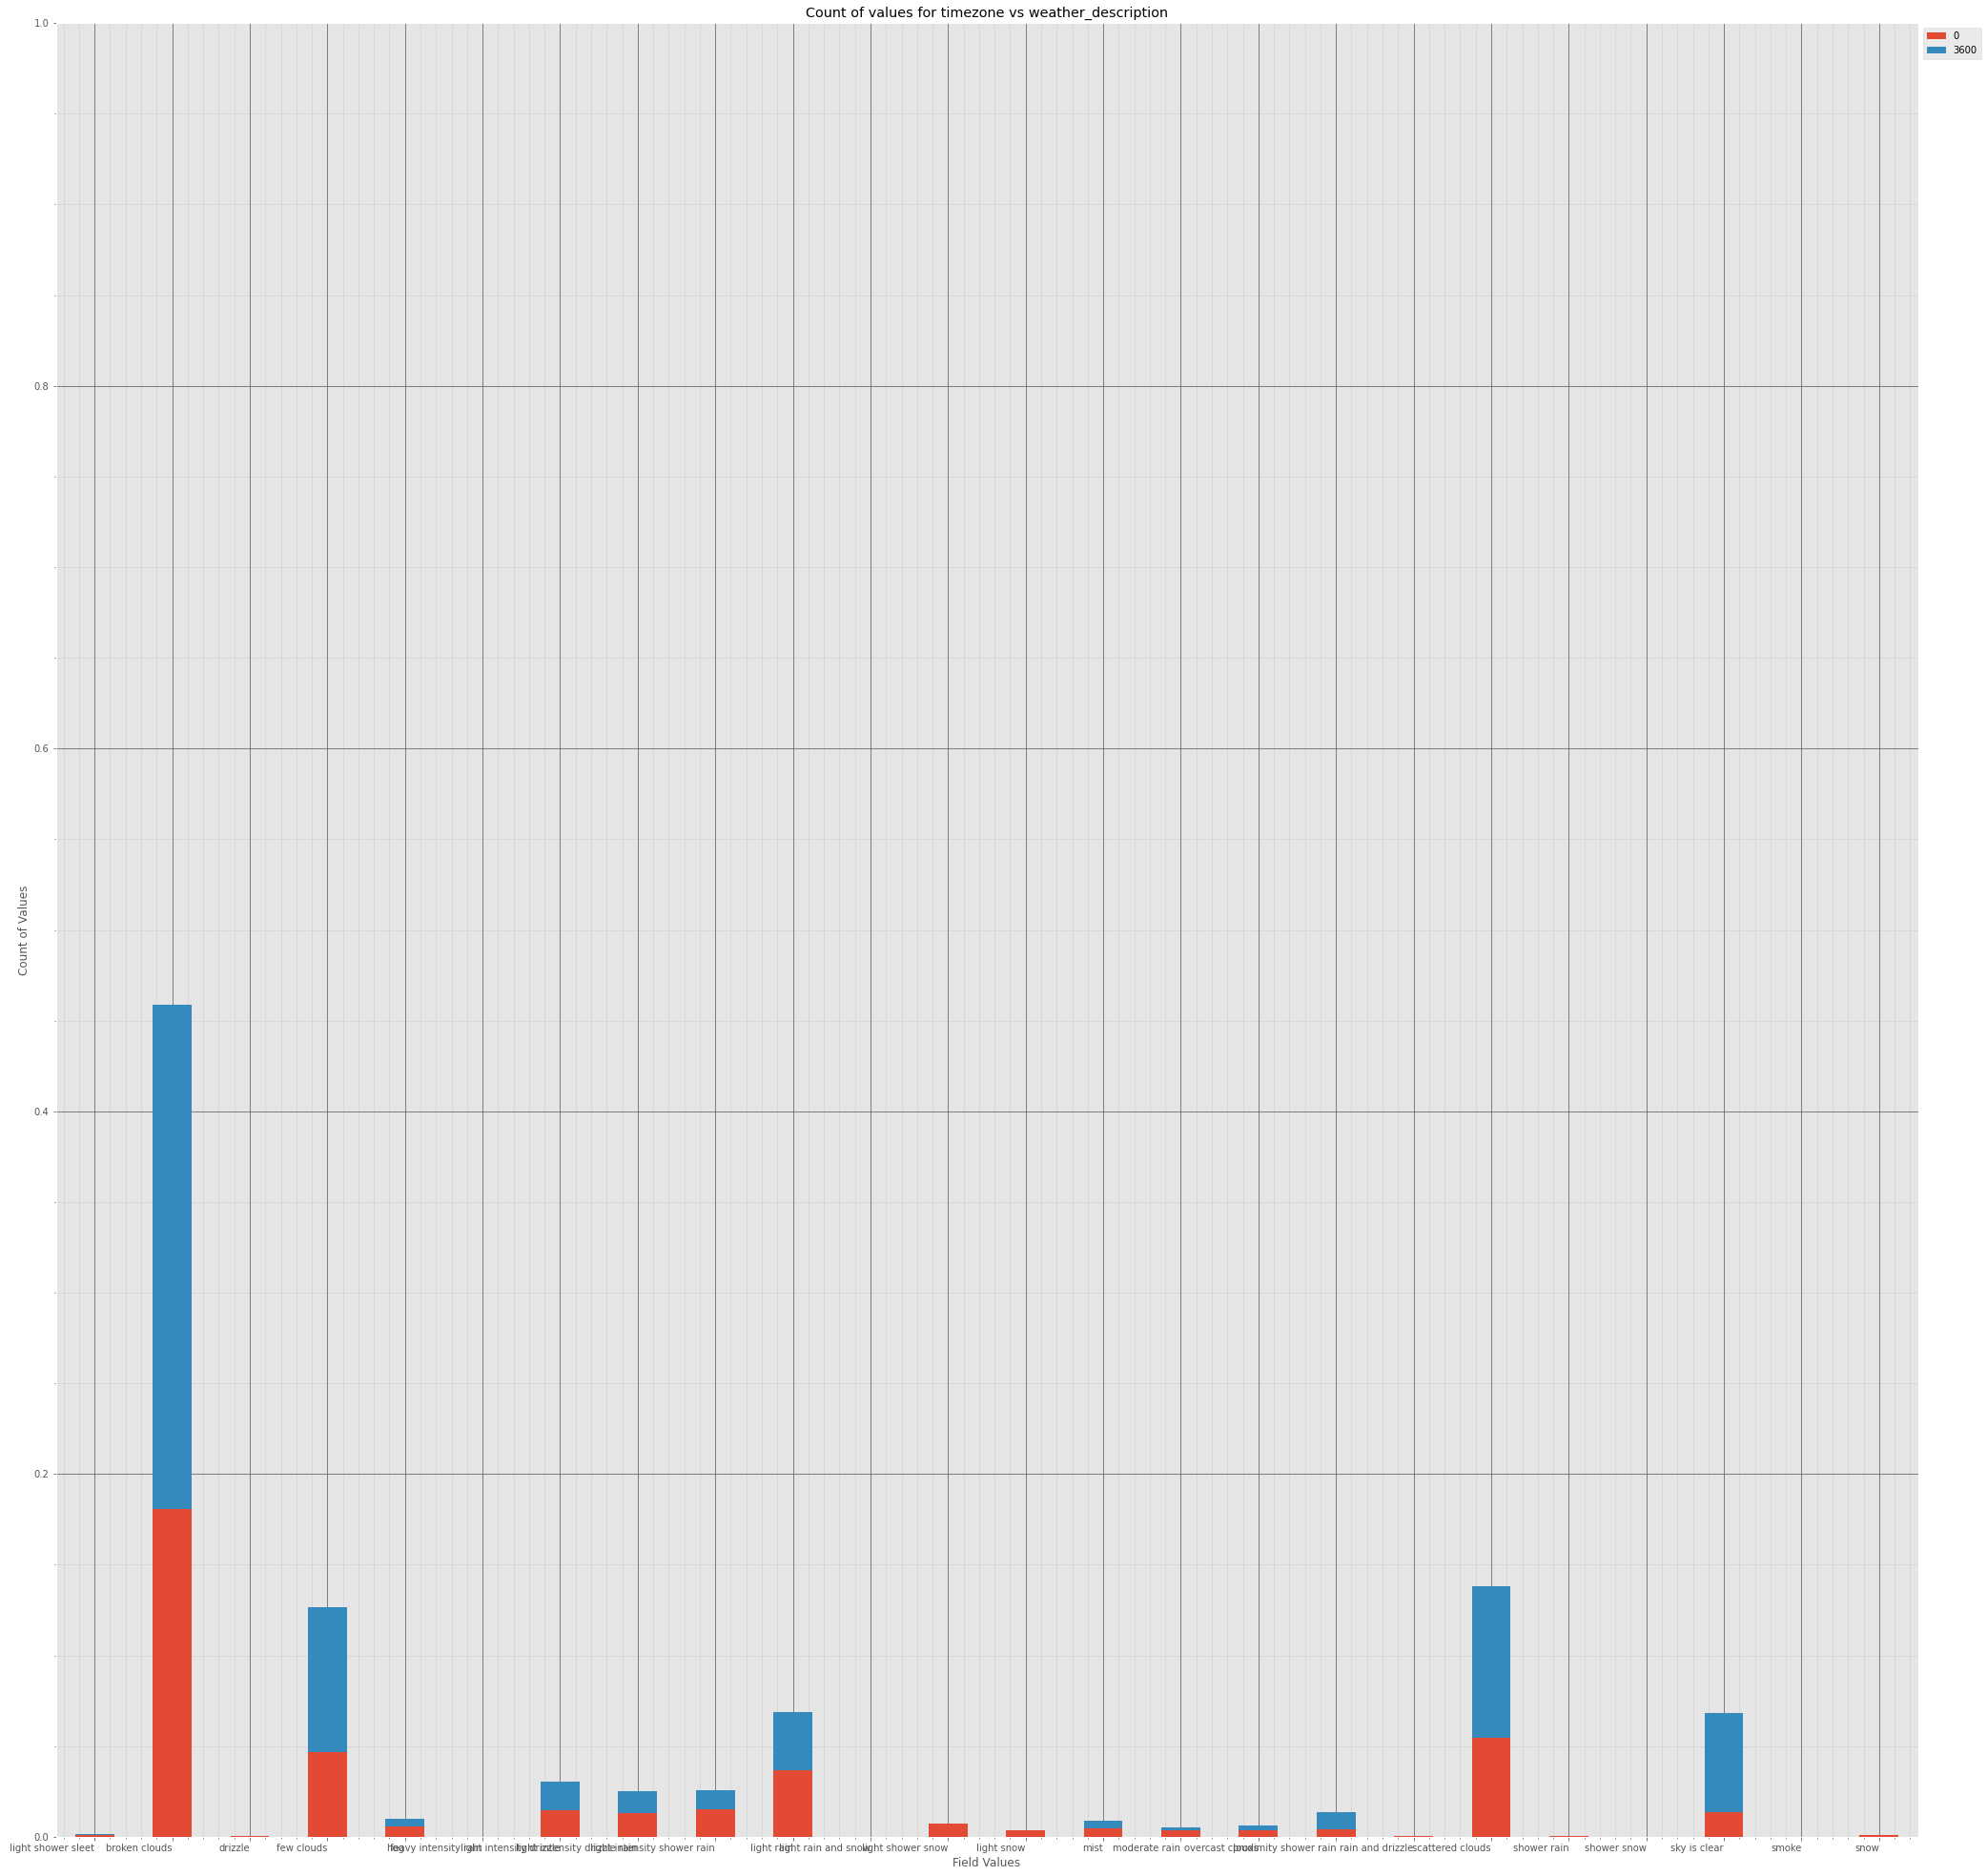



----------------------


Grouping over weather_description|city_name results in:



weather_description city_name  Rows  % Frequency
0             light shower sleet    Dublin    11     0.124322
1                  broken clouds    Dublin  4061    45.897378
2                        drizzle    Dublin     4     0.045208
3                     few clouds    Dublin  1121    12.669530
4                            fog    Dublin    89     1.005877
5           heavy intensity rain    Dublin     1     0.011302
6        light intensity drizzle    Dublin   269     3.040235
7   light intensity drizzle rain    Dublin   223     2.520344
8    light intensity shower rain    Dublin   228     2.576854
9                     light rain    Dublin   609     6.882911
10           light rain and snow    Dublin     1     0.011302
11             light shower snow    Dublin    66     0.745931
12                    light snow    Dublin    30     0.339060
13                          mist    Dublin    77     0.870253
14                 moderate rain    Dublin    47     0.531193
15               overcast clouds    Dublin    55     0.621609
16         proximity shower rain    Dublin   118     1.333635
17              rain and drizzle    Dublin     2     0.022604
18              scattered clouds    Dublin  1223    13.822333
19                   shower rain    Dublin     2     0.022604
20                   shower snow    Dublin     1     0.011302
21                  sky is clear    Dublin   602     6.803797
22                         smoke    Dublin     1     0.011302
23                          snow    Dublin     7     0.079114

Non Zero Data:


weather_description city_name  Rows  % Frequency
0             light shower sleet    Dublin    11     0.124322
1                  broken clouds    Dublin  4061    45.897378
2                        drizzle    Dublin     4     0.045208
3                     few clouds    Dublin  1121    12.669530
4                            fog    Dublin    89     1.005877
5           heavy intensity rain    Dublin     1     0.011302
6        light intensity drizzle    Dublin   269     3.040235
7   light intensity drizzle rain    Dublin   223     2.520344
8    light intensity shower rain    Dublin   228     2.576854
9                     light rain    Dublin   609     6.882911
10           light rain and snow    Dublin     1     0.011302
11             light shower snow    Dublin    66     0.745931
12                    light snow    Dublin    30     0.339060
13                          mist    Dublin    77     0.870253
14                 moderate rain    Dublin    47     0.531193
15               overcast clouds    Dublin    55     0.621609
16         proximity shower rain    Dublin   118     1.333635
17              rain and drizzle    Dublin     2     0.022604
18              scattered clouds    Dublin  1223    13.822333
19                   shower rain    Dublin     2     0.022604
20                   shower snow    Dublin     1     0.011302
21                  sky is clear    Dublin   602     6.803797
22                         smoke    Dublin     1     0.011302
23                          snow    Dublin     7     0.079114

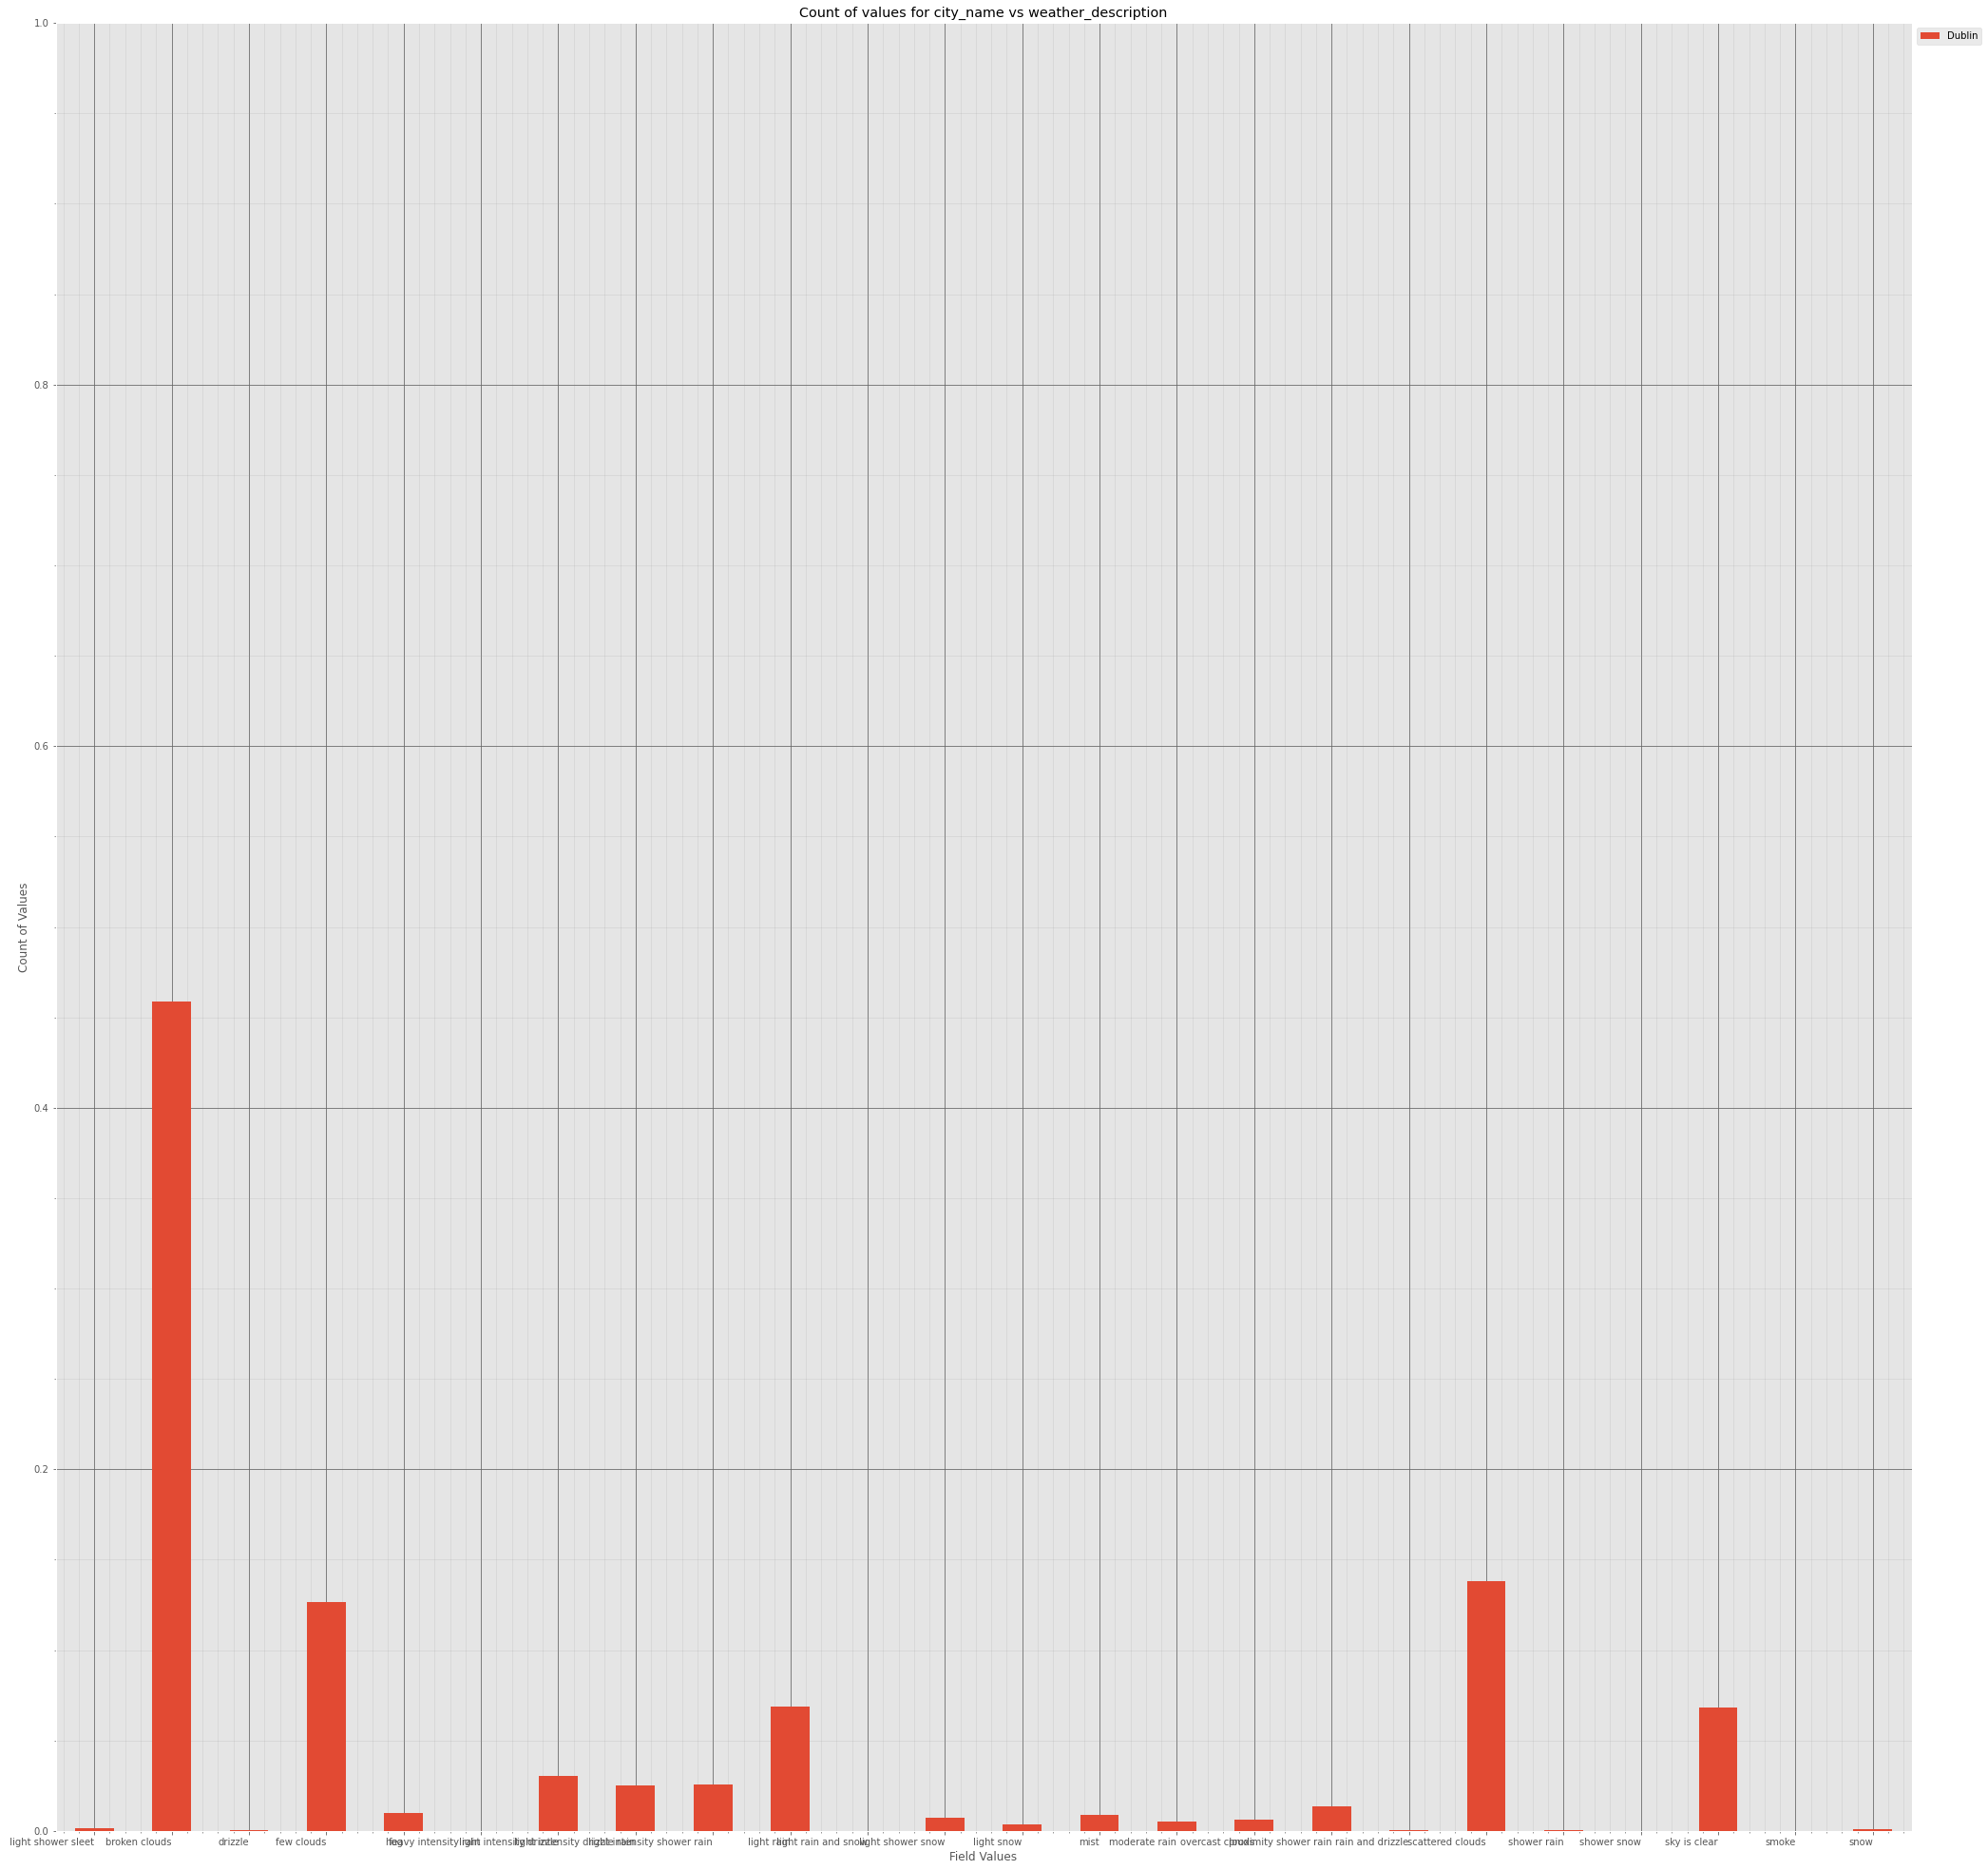



----------------------


Grouping over weather_description|clouds_all results in:



weather_description clouds_all  Rows  % Frequency
0     light shower sleet          0     0     0.000000
1     light shower sleet          1     0     0.000000
2     light shower sleet         10     0     0.000000
3     light shower sleet        100     0     0.000000
4     light shower sleet         11     0     0.000000
..                   ...        ...   ...          ...
475                 snow         84     0     0.000000
476                 snow         87     0     0.000000
477                 snow         90     1     0.011302
478                 snow         91     0     0.000000
479                 snow         99     0     0.000000

[480 rows x 4 columns]

Non Zero Data:


weather_description clouds_all  Rows  % Frequency
10             light shower sleet         40     2     0.022604
13             light shower sleet         75     9     0.101718
32                  broken clouds         69     1     0.011302
33                  broken clouds         75  4058    45.863472
34                  broken clouds         83     1     0.011302
35                  broken clouds         84     1     0.011302
53                        drizzle         75     4     0.045208
64                     few clouds         11     2     0.022604
66                     few clouds         20  1118    12.635624
67                     few clouds         21     1     0.011302
83                            fog        100     2     0.022604
86                            fog         20    13     0.146926
90                            fog         40    12     0.135624
93                            fog         75    55     0.621609
97                            fog         90     7     0.079114
113          heavy intensity rain         75     1     0.011302
123       light intensity drizzle        100     1     0.011302
133       light intensity drizzle         75   255     2.882007
137       light intensity drizzle         90    13     0.146926
153  light intensity drizzle rain         75   208     2.350814
157  light intensity drizzle rain         90    15     0.169530
166   light intensity shower rain         20     1     0.011302
170   light intensity shower rain         40    38     0.429476
173   light intensity shower rain         75   188     2.124774
177   light intensity shower rain         90     1     0.011302
183                    light rain        100     1     0.011302
193                    light rain         75   588     6.645570
197                    light rain         90    20     0.226040
213           light rain and snow         75     1     0.011302
230             light shower snow         40     2     0.022604
233             light shower snow         75    64     0.723327
253                    light snow         75    22     0.248644
257                    light snow         90     8     0.090416
266                          mist         20    10     0.113020
270                          mist         40     4     0.045208
273                          mist         75    52     0.587703
277                          mist         90    10     0.113020
278                          mist         91     1     0.011302
293                 moderate rain         75    42     0.474684
297                 moderate rain         90     5     0.056510
316               overcast clouds         87     1     0.011302
317               overcast clouds         90    53     0.599005
319               overcast clouds         99     1     0.011302
326         proximity shower rain         20     7     0.079114
330         proximity shower rain         40    23     0.259946
333         proximity shower rain         75    88     0.994575
353              rain and drizzle         75     2     0.022604
368              scattered clouds         26     1     0.011302
370              scattered clouds         40  1222    13.811031
393                   shower rain         75     2     0.022604
413                   shower snow         75     1     0.011302
420                  sky is clear          0   593     6.702080
421                  sky is clear          1     2     0.022604
422                  sky is clear         10     1     0.011302
425                  sky is clear          2     4     0.045208
429                  sky is clear          3     1     0.011302
431                  sky is clear          5     1     0.011302
446                         smoke         20     1     0.011302
473                          snow         75     6     0.067812
477                          snow         90     1     0.011302

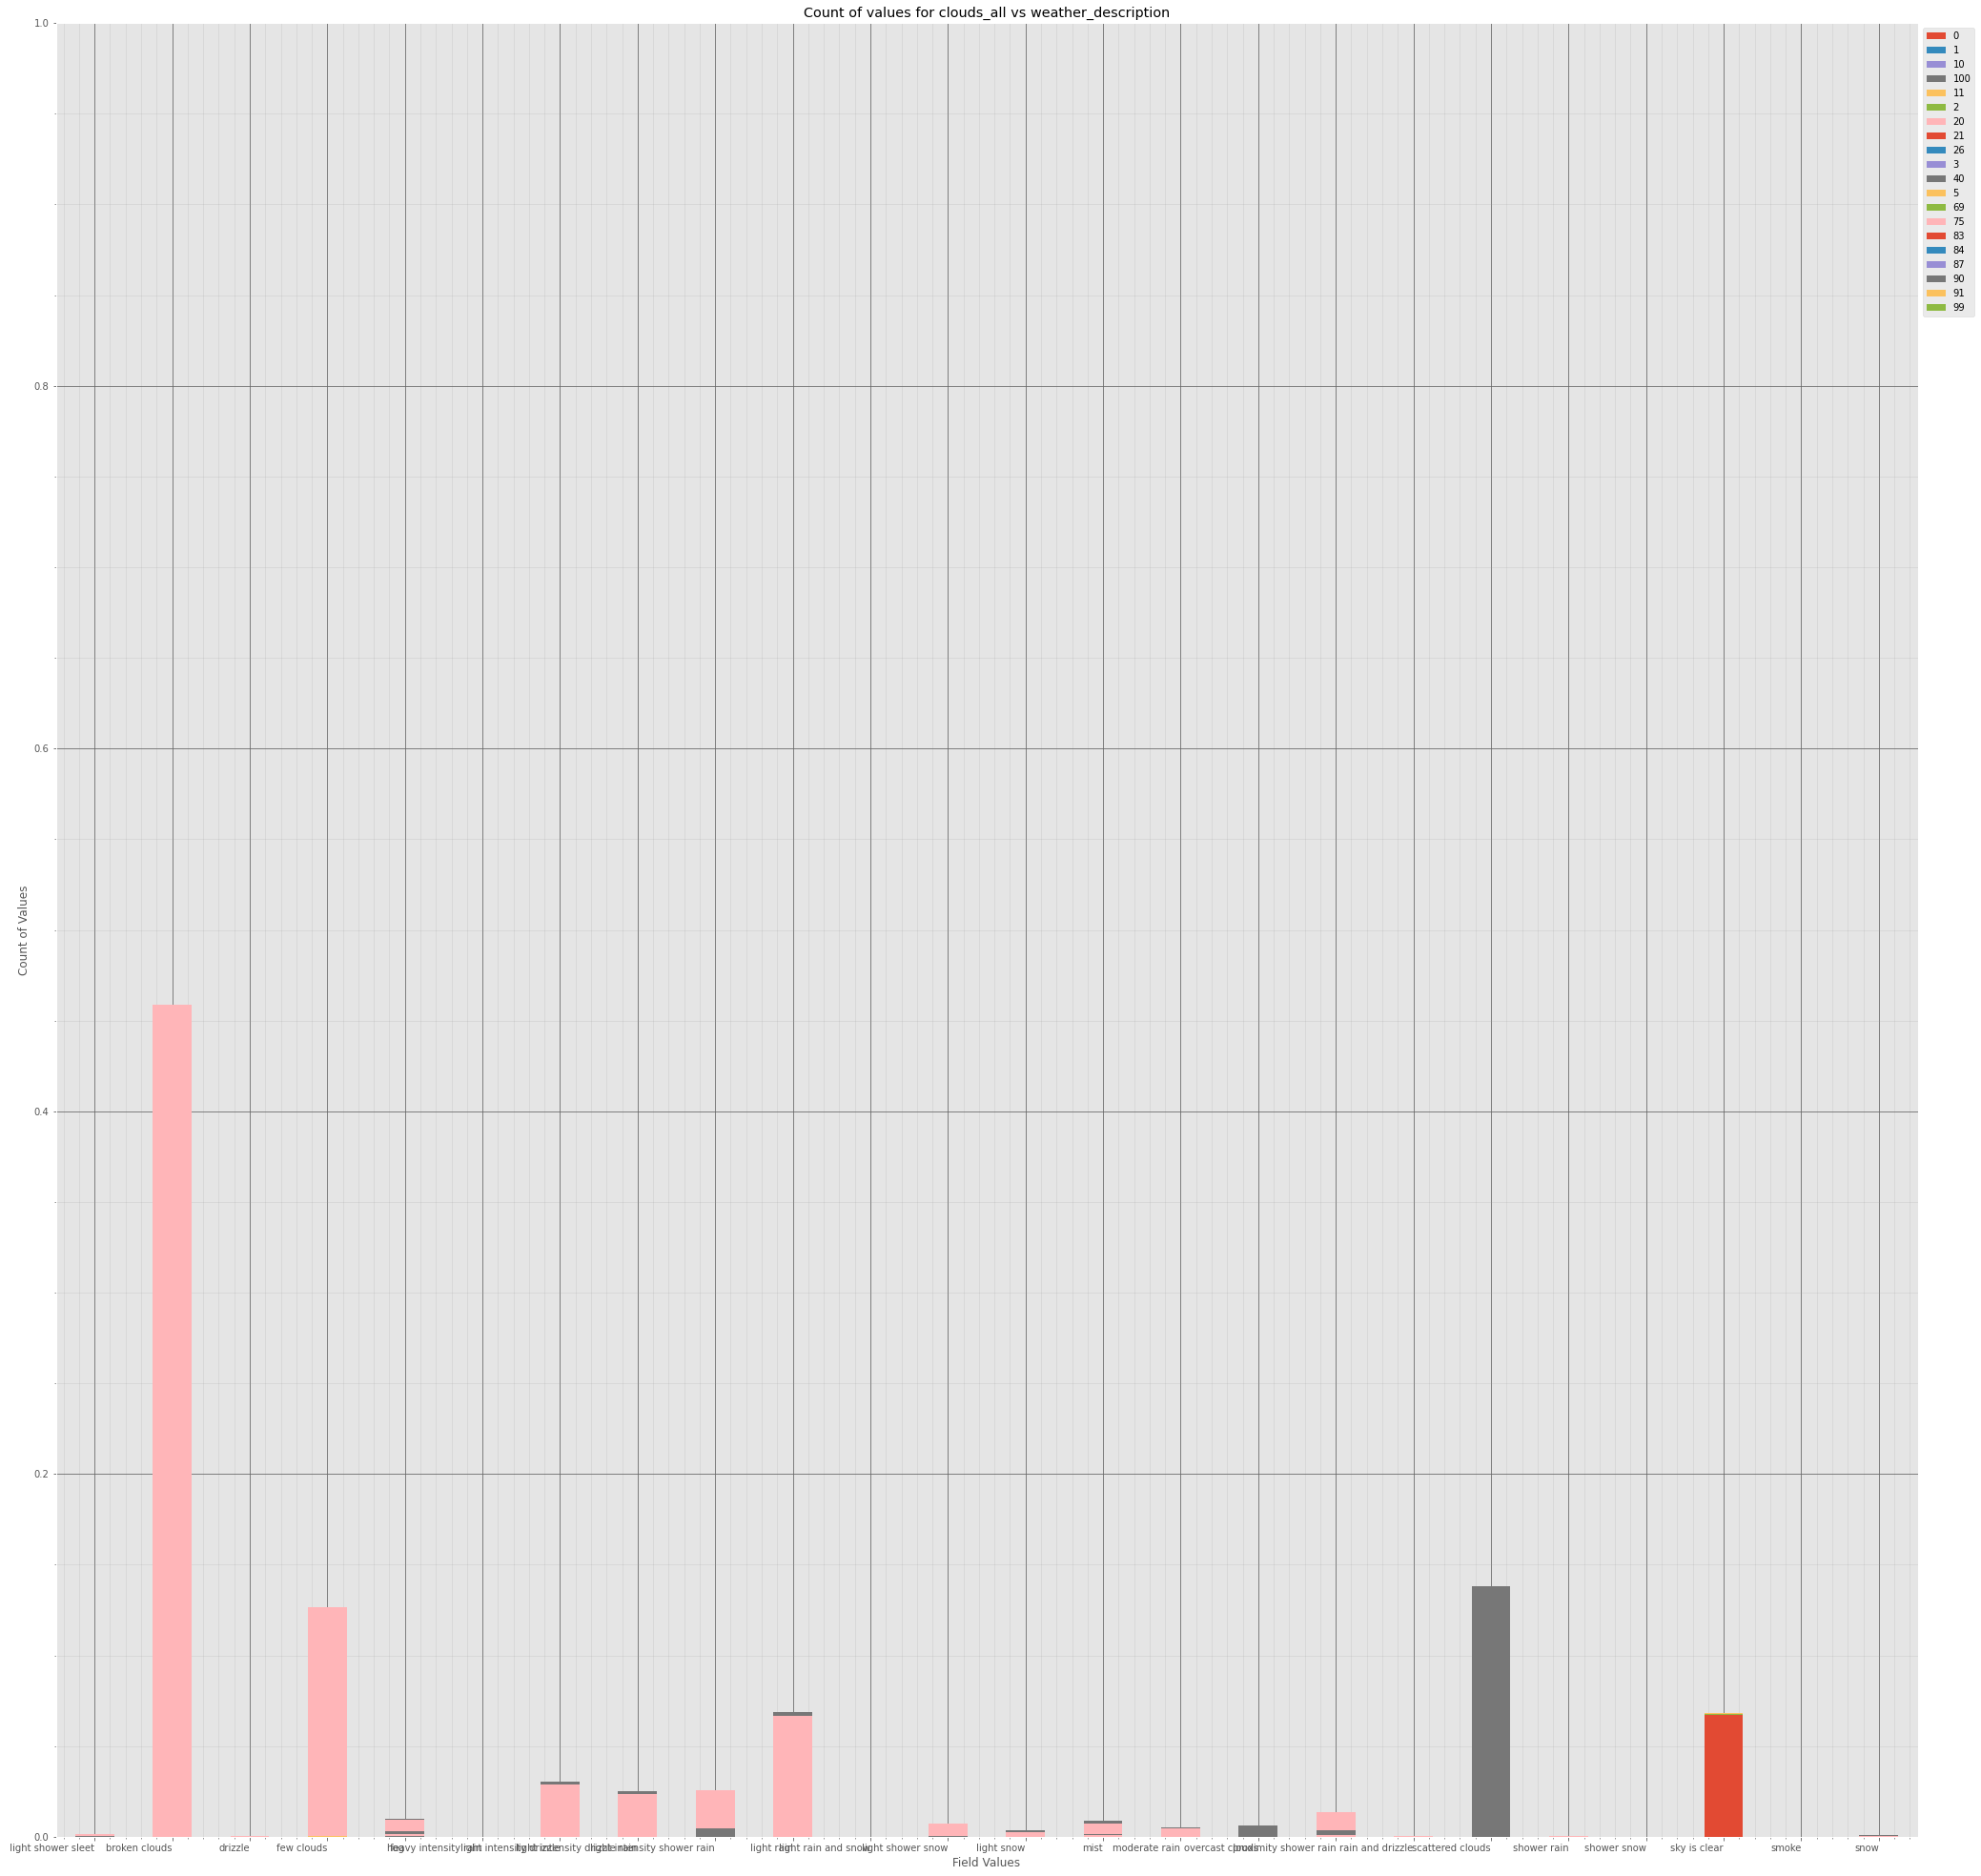



----------------------


Grouping over weather_description|weather_id results in:



weather_description weather_id  Rows  % Frequency
0     light shower sleet        300     0          0.0
1     light shower sleet        301     0          0.0
2     light shower sleet        310     0          0.0
3     light shower sleet        311     0          0.0
4     light shower sleet        500     0          0.0
..                   ...        ...   ...          ...
547                 snow        800     0          0.0
548                 snow        801     0          0.0
549                 snow        802     0          0.0
550                 snow        803     0          0.0
551                 snow        804     0          0.0

[552 rows x 4 columns]

Non Zero Data:


weather_description weather_id  Rows  % Frequency
11             light shower sleet        612    11     0.124322
44                  broken clouds        803  4061    45.897378
47                        drizzle        301     4     0.045208
88                     few clouds        801  1121    12.669530
109                           fog        741    89     1.005877
121          heavy intensity rain        502     1     0.011302
138       light intensity drizzle        300   269     3.040235
163  light intensity drizzle rain        310   223     2.520344
191   light intensity shower rain        520   228     2.576854
211                    light rain        500   609     6.882911
242           light rain and snow        615     1     0.011302
266             light shower snow        620    66     0.745931
285                    light snow        600    30     0.339060
314                          mist        701    77     0.870253
327                 moderate rain        501    47     0.531193
367               overcast clouds        804    55     0.621609
376         proximity shower rain        521   118     1.333635
394              rain and drizzle        311     2     0.022604
434              scattered clouds        802  1223    13.822333
445                   shower rain        521     2     0.022604
474                   shower snow        621     1     0.011302
501                  sky is clear        800   602     6.803797
522                         smoke        711     1     0.011302
539                          snow        601     7     0.079114

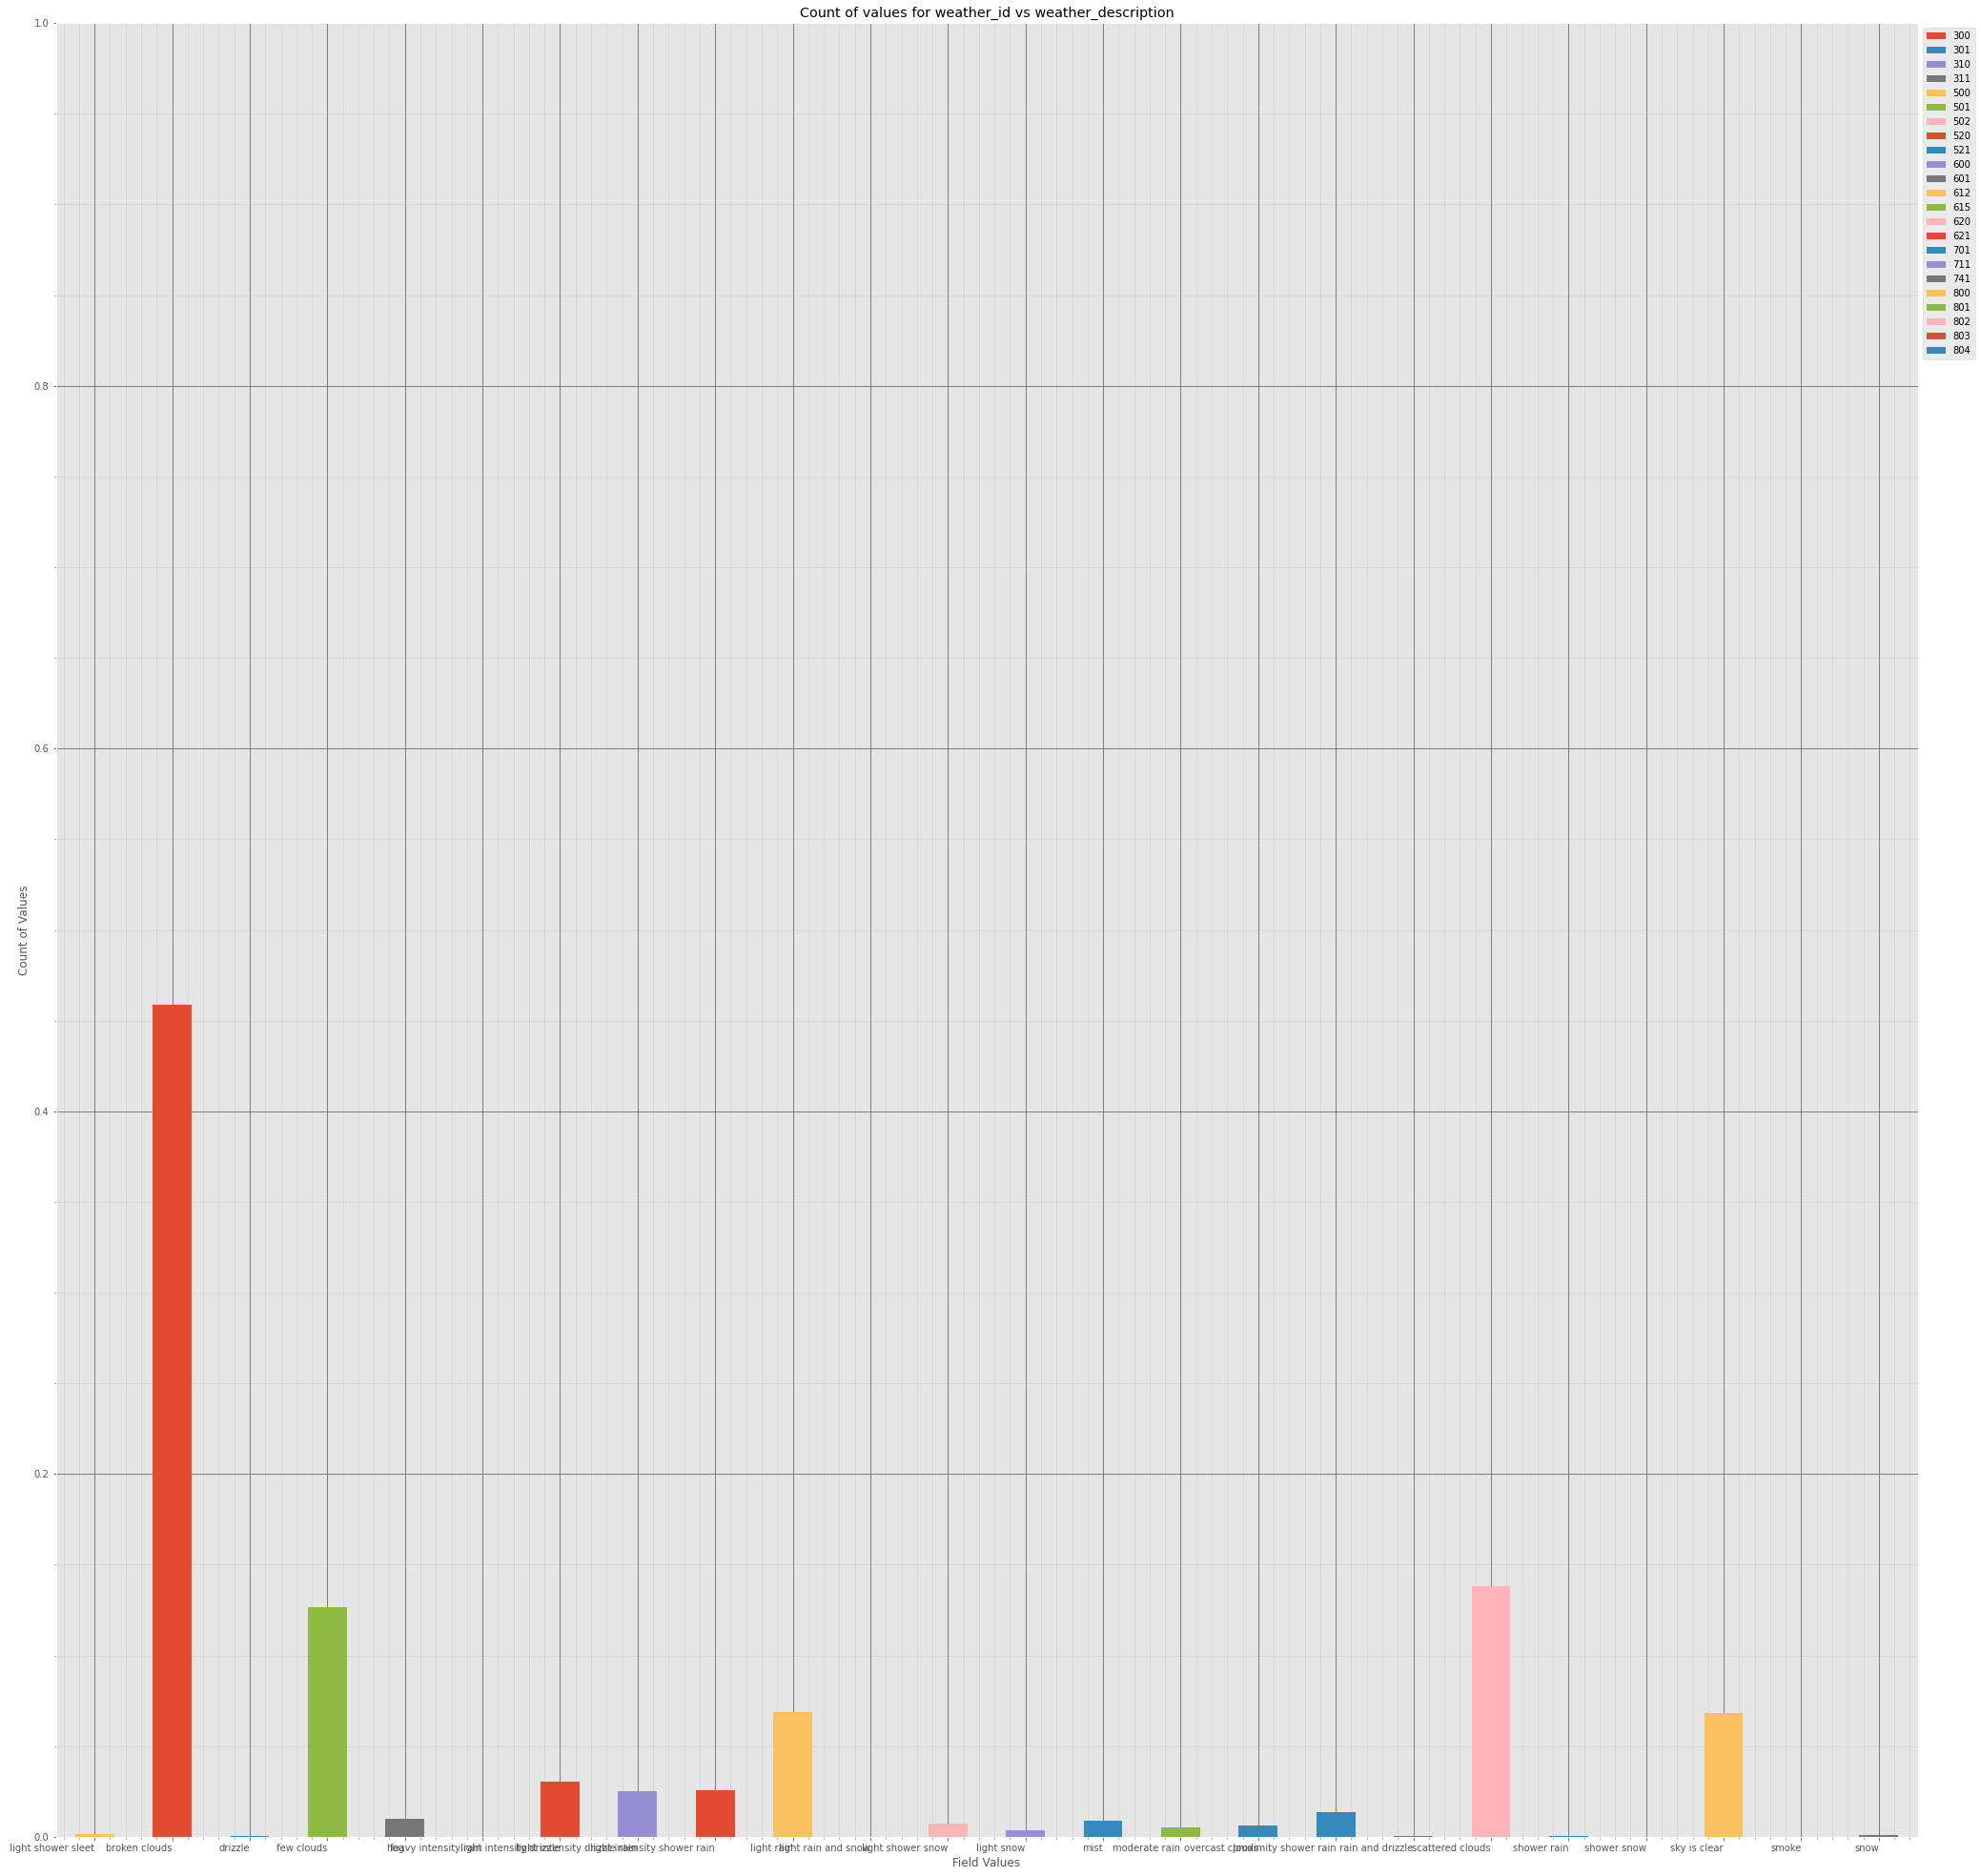



----------------------


Grouping over weather_description|weather_icon results in:



weather_description weather_icon  Rows  % Frequency
0     light shower sleet          01d     0     0.000000
1     light shower sleet          01n     0     0.000000
2     light shower sleet          02d     0     0.000000
3     light shower sleet          02n     0     0.000000
4     light shower sleet          03d     0     0.000000
..                   ...          ...   ...          ...
379                 snow          10n     0     0.000000
380                 snow          13d     2     0.022604
381                 snow          13n     5     0.056510
382                 snow          50d     0     0.000000
383                 snow          50n     0     0.000000

[384 rows x 4 columns]

Non Zero Data:


weather_description weather_icon  Rows  % Frequency
12             light shower sleet          13d     4     0.045208
13             light shower sleet          13n     7     0.079114
22                  broken clouds          04d  2207    24.943490
23                  broken clouds          04n  1854    20.953888
41                        drizzle          09n     4     0.045208
50                     few clouds          02d   547     6.182188
51                     few clouds          02n   574     6.487342
78                            fog          50d    36     0.406872
79                            fog          50n    53     0.599005
91           heavy intensity rain          10n     1     0.011302
104       light intensity drizzle          09d   132     1.491863
105       light intensity drizzle          09n   137     1.548373
120  light intensity drizzle rain          09d   108     1.220615
121  light intensity drizzle rain          09n   115     1.299729
136   light intensity shower rain          09d   111     1.254521
137   light intensity shower rain          09n   117     1.322333
154                    light rain          10d   257     2.904611
155                    light rain          10n   352     3.978300
173           light rain and snow          13n     1     0.011302
188             light shower snow          13d    27     0.305154
189             light shower snow          13n    39     0.440778
204                    light snow          13d    11     0.124322
205                    light snow          13n    19     0.214738
222                          mist          50d    32     0.361664
223                          mist          50n    45     0.508590
234                 moderate rain          10d    17     0.192134
235                 moderate rain          10n    30     0.339060
246               overcast clouds          04d    27     0.305154
247               overcast clouds          04n    28     0.316456
264         proximity shower rain          09d   111     1.254521
265         proximity shower rain          09n     7     0.079114
281              rain and drizzle          09n     2     0.022604
292              scattered clouds          03d   645     7.289783
293              scattered clouds          03n   578     6.532550
312                   shower rain          09d     1     0.011302
313                   shower rain          09n     1     0.011302
333                   shower snow          13n     1     0.011302
336                  sky is clear          01d   237     2.678571
337                  sky is clear          01n   365     4.125226
366                         smoke          50d     1     0.011302
380                          snow          13d     2     0.022604
381                          snow          13n     5     0.056510

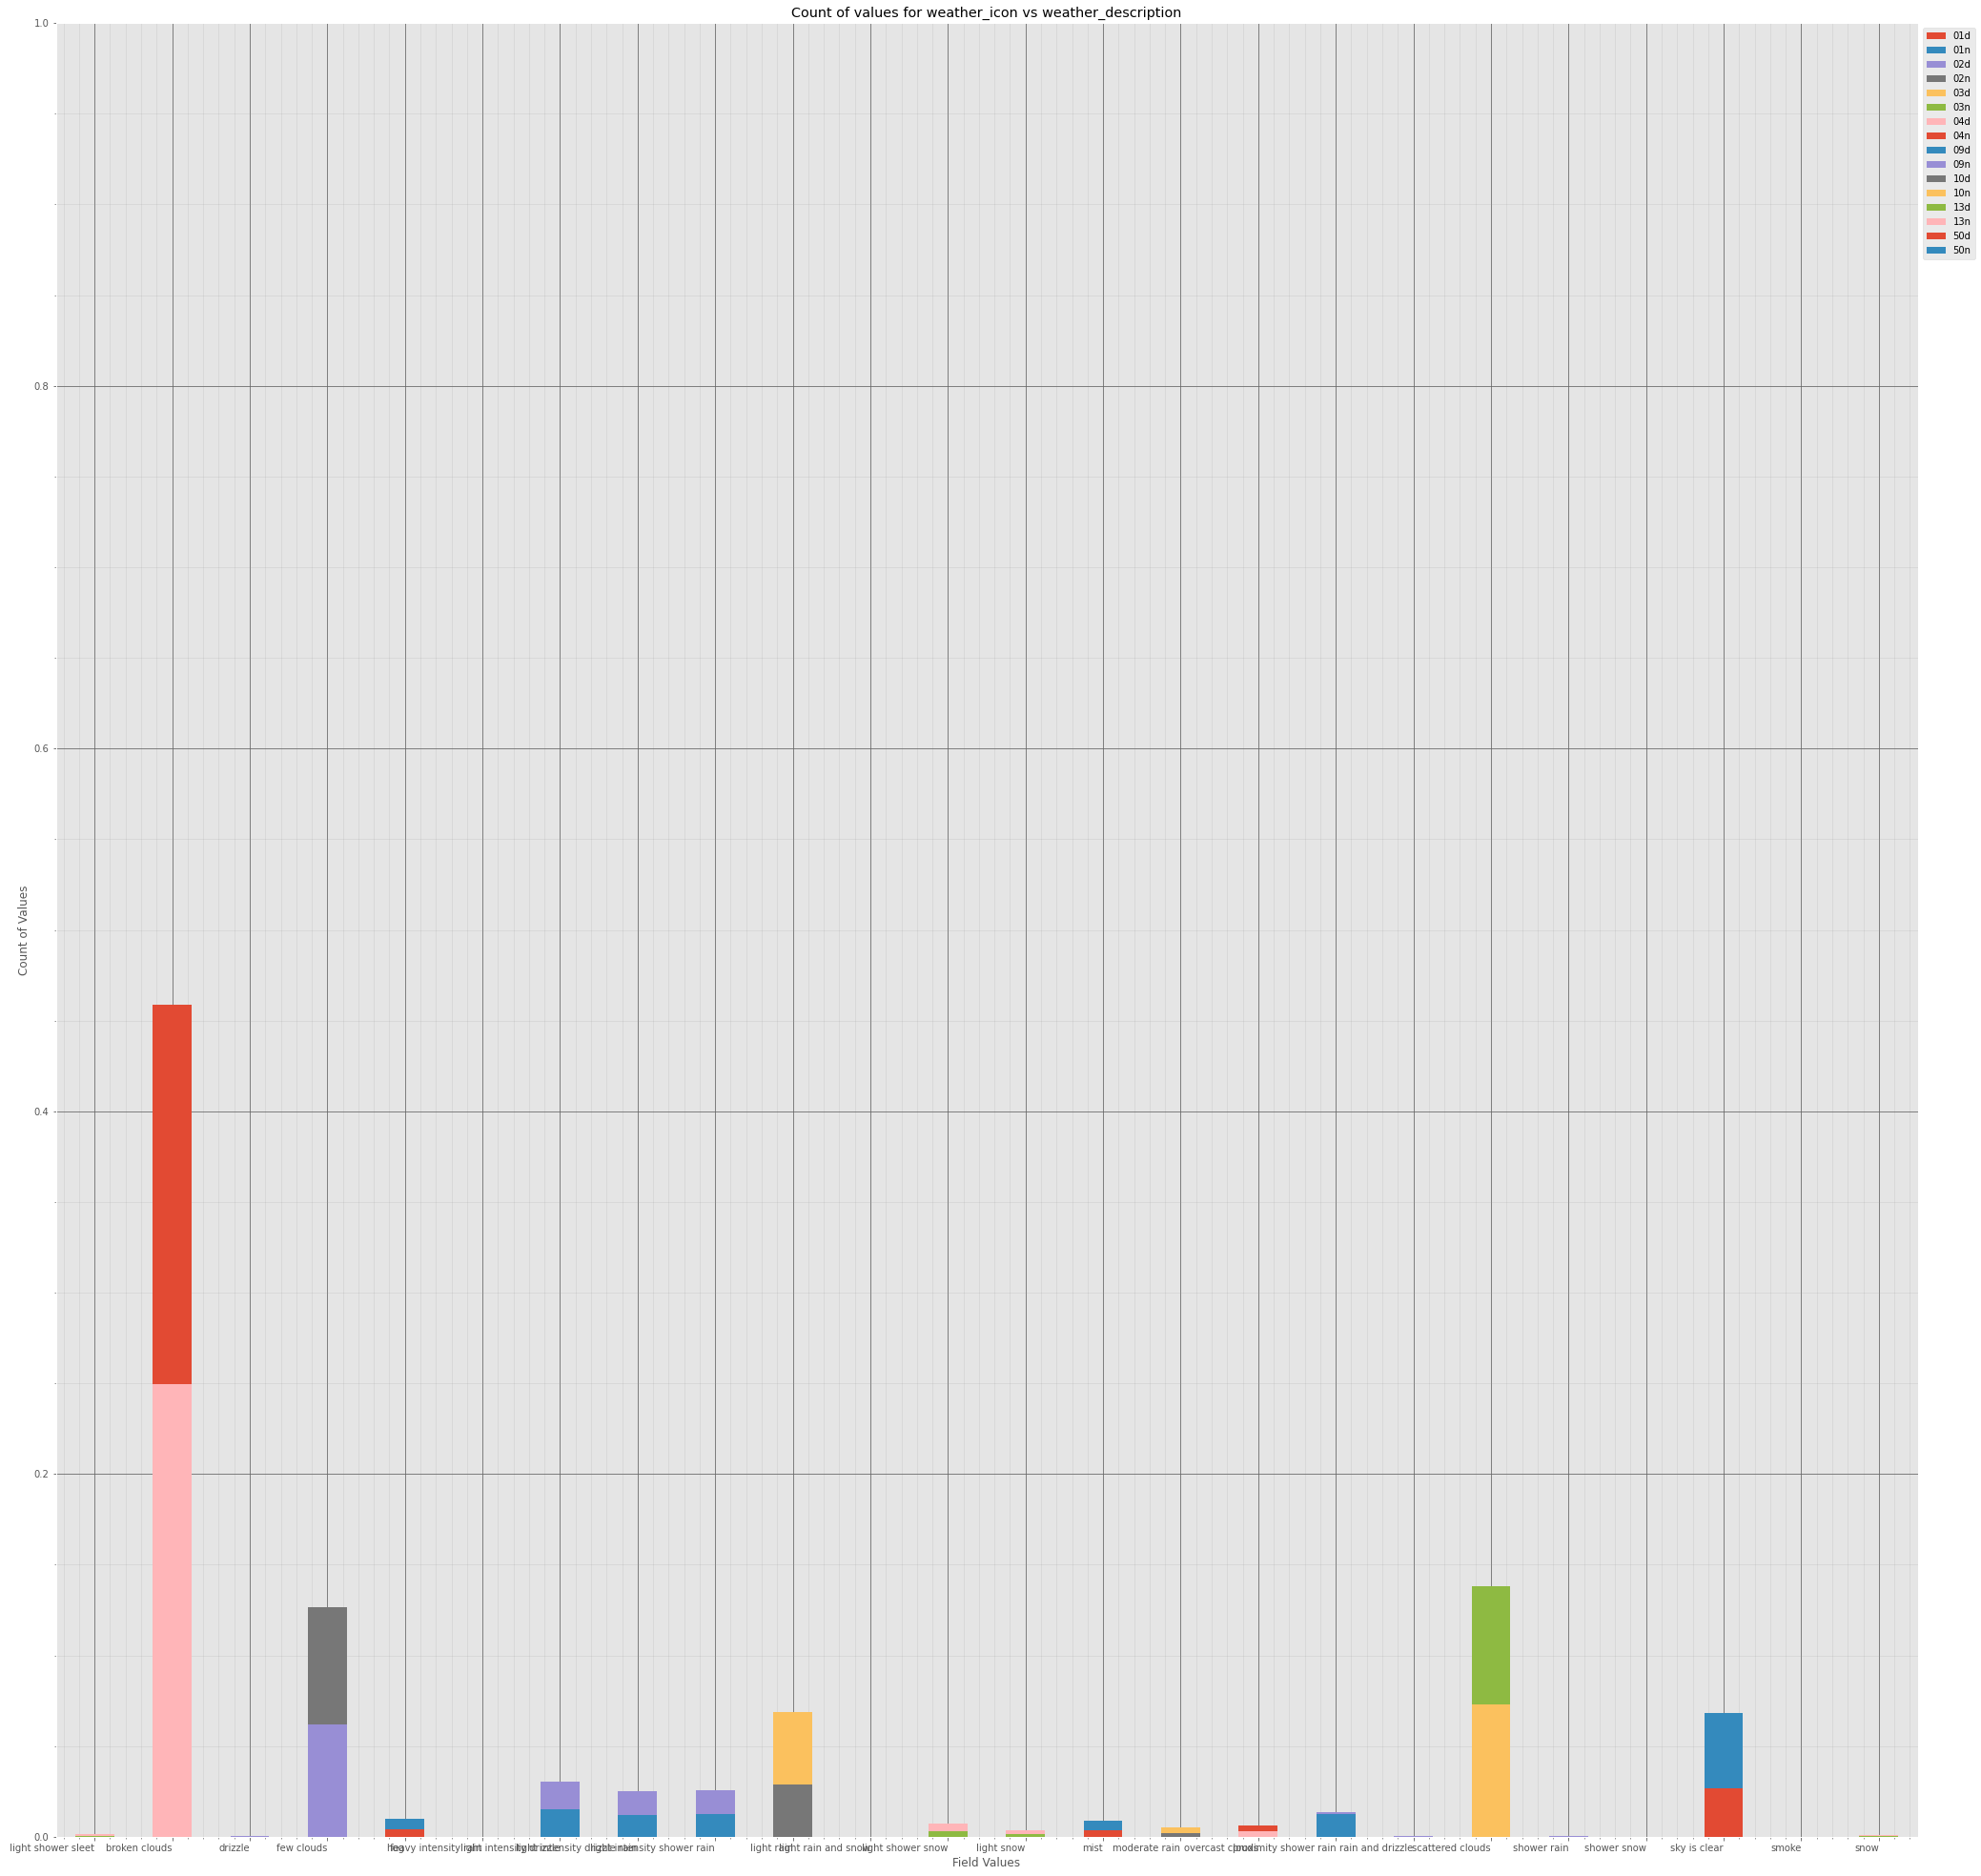



----------------------


Grouping over weather_icon|timezone results in:



weather_icon timezone  Rows  % Frequency
0           01d        0     6     0.067812
1           01d     3600   231     2.610759
2           01n        0   112     1.265823
3           01n     3600   253     2.859403
4           02d        0   156     1.763110
5           02d     3600   391     4.419078
6           02n        0   259     2.927215
7           02n     3600   315     3.560127
8           03d        0   203     2.294304
9           03d     3600   442     4.995479
10          03n        0   282     3.187161
11          03n     3600   296     3.345389
12          04d        0   666     7.527125
13          04d     3600  1568    17.721519
14          04n        0   961    10.861212
15          04n     3600   921    10.409132
16          09d        0   178     2.011754
17          09d     3600   285     3.221067
18          09n        0   243     2.746383
19          09n     3600   140     1.582278
20          10d        0    97     1.096293
21          10d     3600   177     2.000452
22          10n        0   261     2.949819
23          10n     3600   122     1.378843
24          13d        0    44     0.497288
25          13d     3600     0     0.000000
26          13n        0    71     0.802441
27          13n     3600     1     0.011302
28          50d        0    27     0.305154
29          50d     3600    42     0.474684
30          50n        0    63     0.712025
31          50n     3600    35     0.395570

Non Zero Data:


weather_icon timezone  Rows  % Frequency
0           01d        0     6     0.067812
1           01d     3600   231     2.610759
2           01n        0   112     1.265823
3           01n     3600   253     2.859403
4           02d        0   156     1.763110
5           02d     3600   391     4.419078
6           02n        0   259     2.927215
7           02n     3600   315     3.560127
8           03d        0   203     2.294304
9           03d     3600   442     4.995479
10          03n        0   282     3.187161
11          03n     3600   296     3.345389
12          04d        0   666     7.527125
13          04d     3600  1568    17.721519
14          04n        0   961    10.861212
15          04n     3600   921    10.409132
16          09d        0   178     2.011754
17          09d     3600   285     3.221067
18          09n        0   243     2.746383
19          09n     3600   140     1.582278
20          10d        0    97     1.096293
21          10d     3600   177     2.000452
22          10n        0   261     2.949819
23          10n     3600   122     1.378843
24          13d        0    44     0.497288
26          13n        0    71     0.802441
27          13n     3600     1     0.011302
28          50d        0    27     0.305154
29          50d     3600    42     0.474684
30          50n        0    63     0.712025
31          50n     3600    35     0.395570

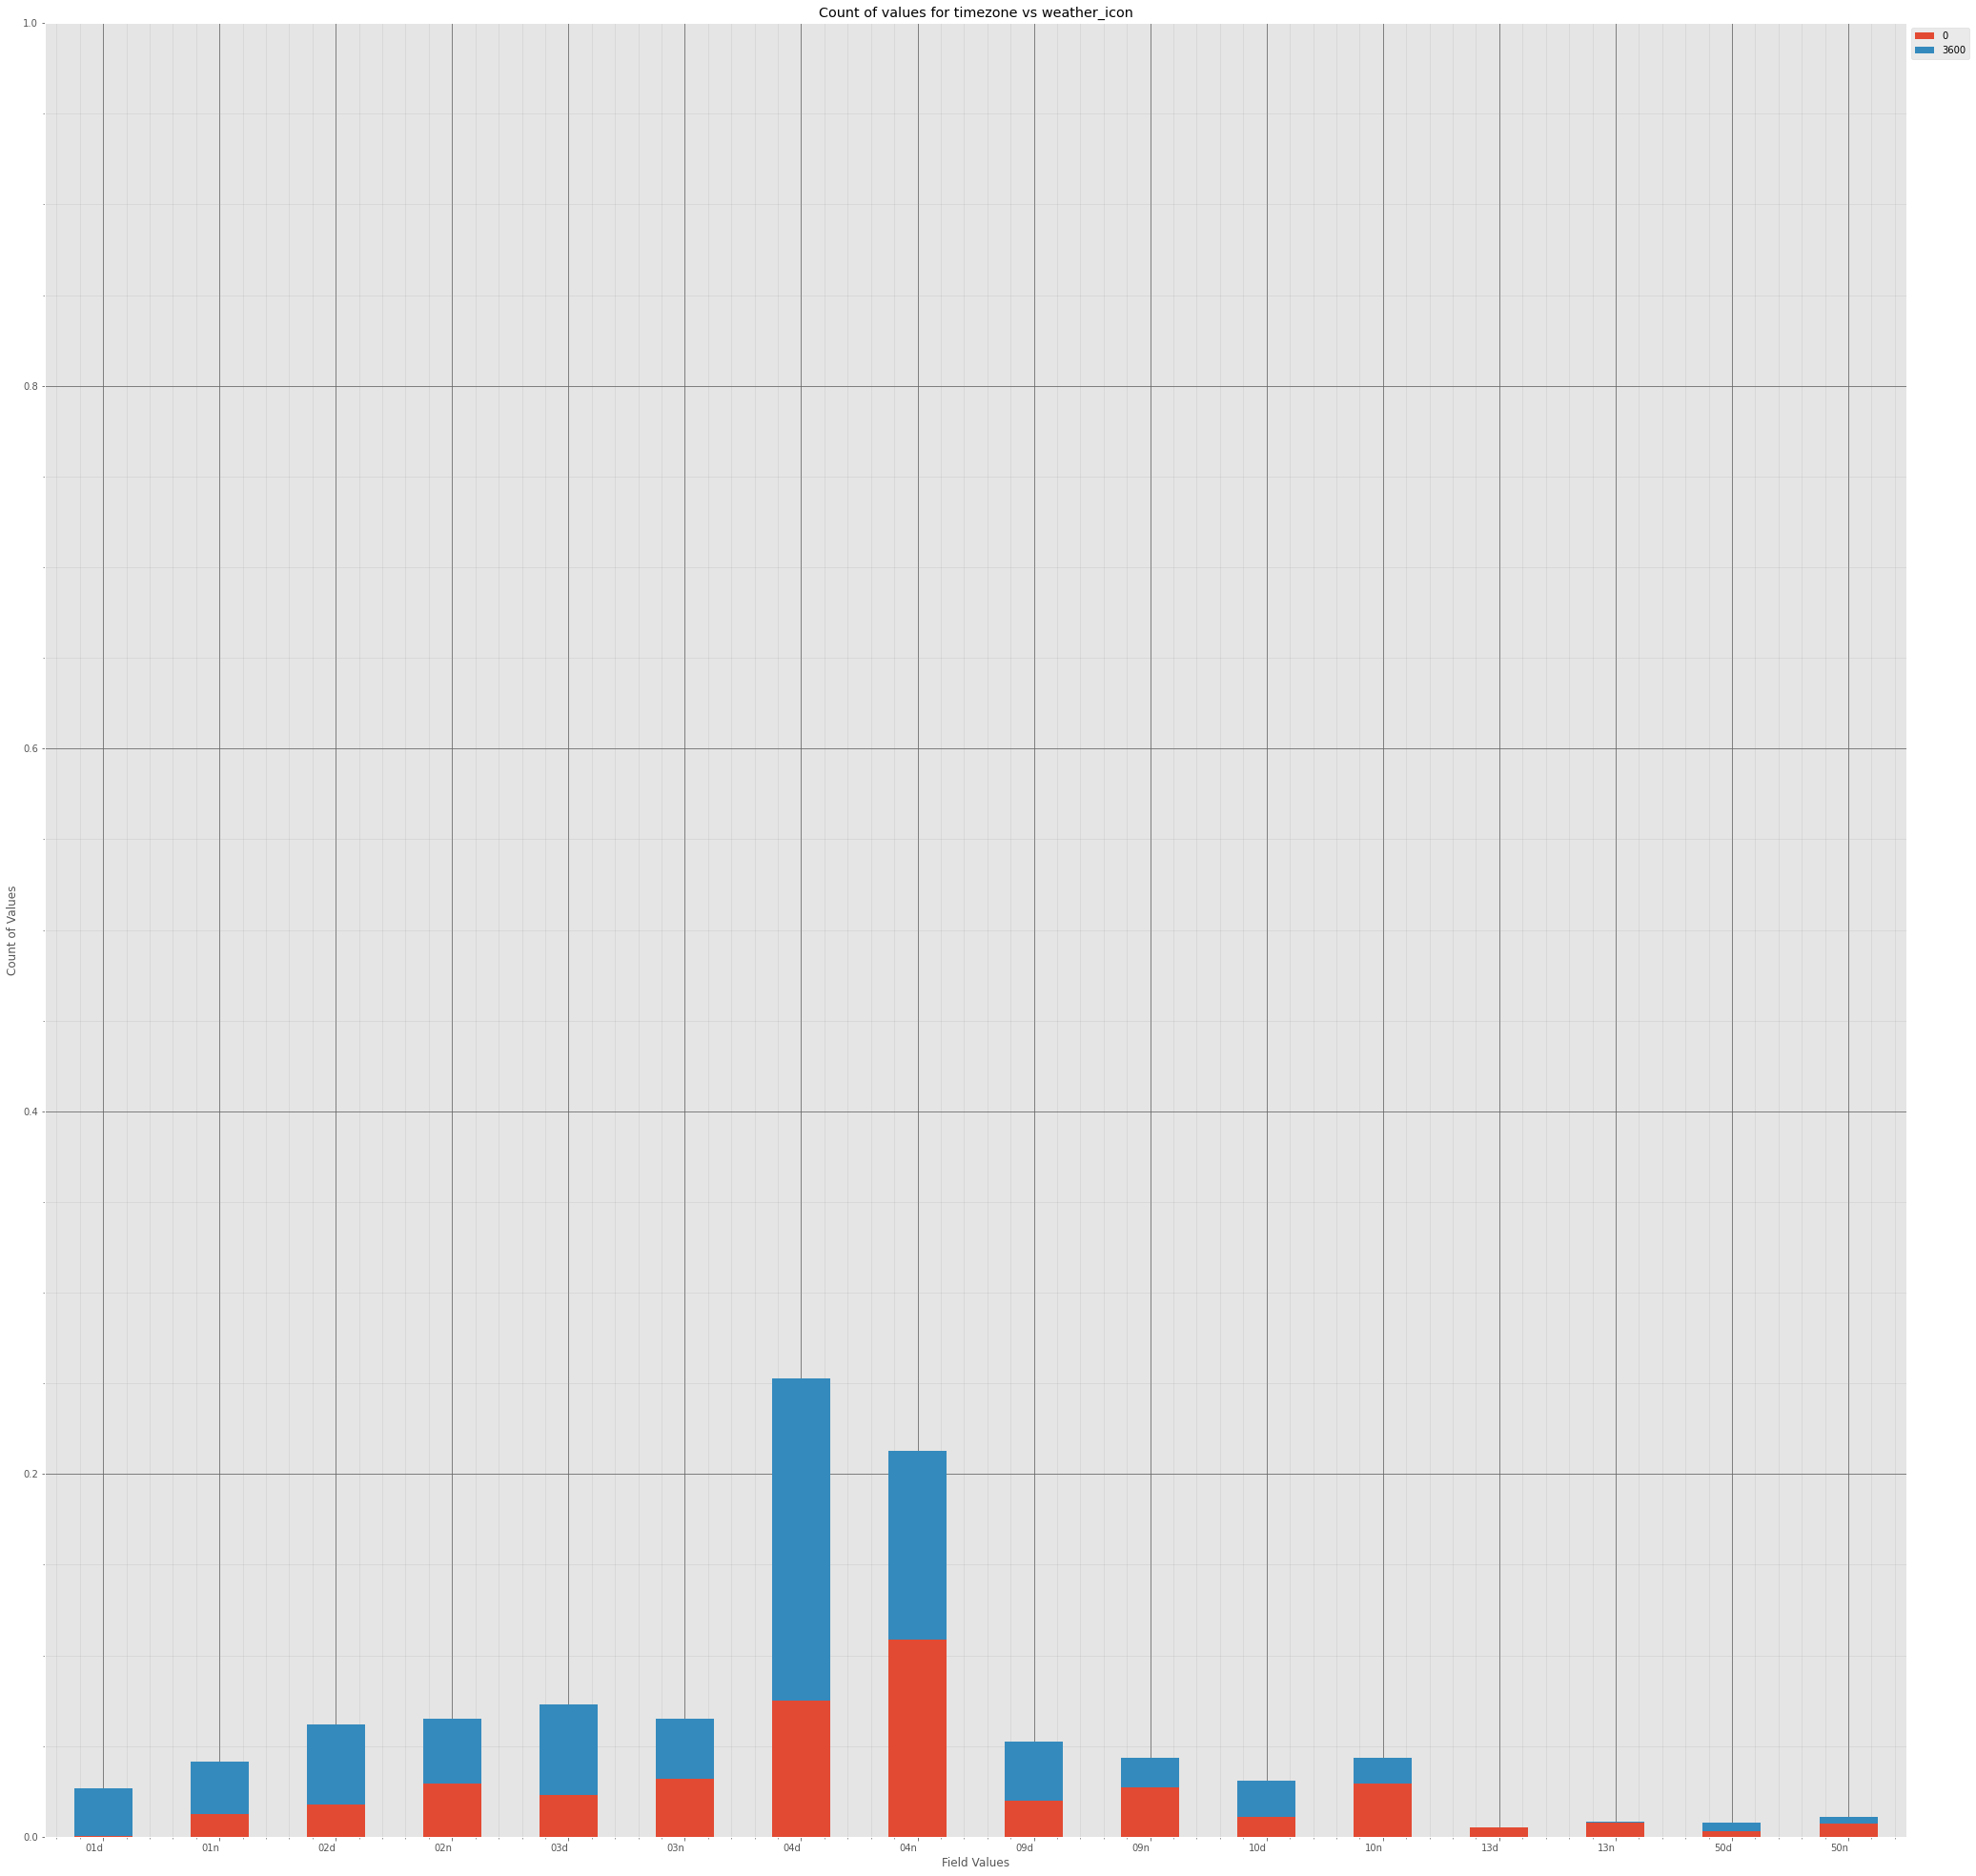



----------------------


Grouping over weather_icon|city_name results in:



weather_icon city_name  Rows  % Frequency
0           01d    Dublin   237     2.678571
1           01n    Dublin   365     4.125226
2           02d    Dublin   547     6.182188
3           02n    Dublin   574     6.487342
4           03d    Dublin   645     7.289783
5           03n    Dublin   578     6.532550
6           04d    Dublin  2234    25.248644
7           04n    Dublin  1882    21.270344
8           09d    Dublin   463     5.232821
9           09n    Dublin   383     4.328662
10          10d    Dublin   274     3.096745
11          10n    Dublin   383     4.328662
12          13d    Dublin    44     0.497288
13          13n    Dublin    72     0.813743
14          50d    Dublin    69     0.779837
15          50n    Dublin    98     1.107595

Non Zero Data:


weather_icon city_name  Rows  % Frequency
0           01d    Dublin   237     2.678571
1           01n    Dublin   365     4.125226
2           02d    Dublin   547     6.182188
3           02n    Dublin   574     6.487342
4           03d    Dublin   645     7.289783
5           03n    Dublin   578     6.532550
6           04d    Dublin  2234    25.248644
7           04n    Dublin  1882    21.270344
8           09d    Dublin   463     5.232821
9           09n    Dublin   383     4.328662
10          10d    Dublin   274     3.096745
11          10n    Dublin   383     4.328662
12          13d    Dublin    44     0.497288
13          13n    Dublin    72     0.813743
14          50d    Dublin    69     0.779837
15          50n    Dublin    98     1.107595

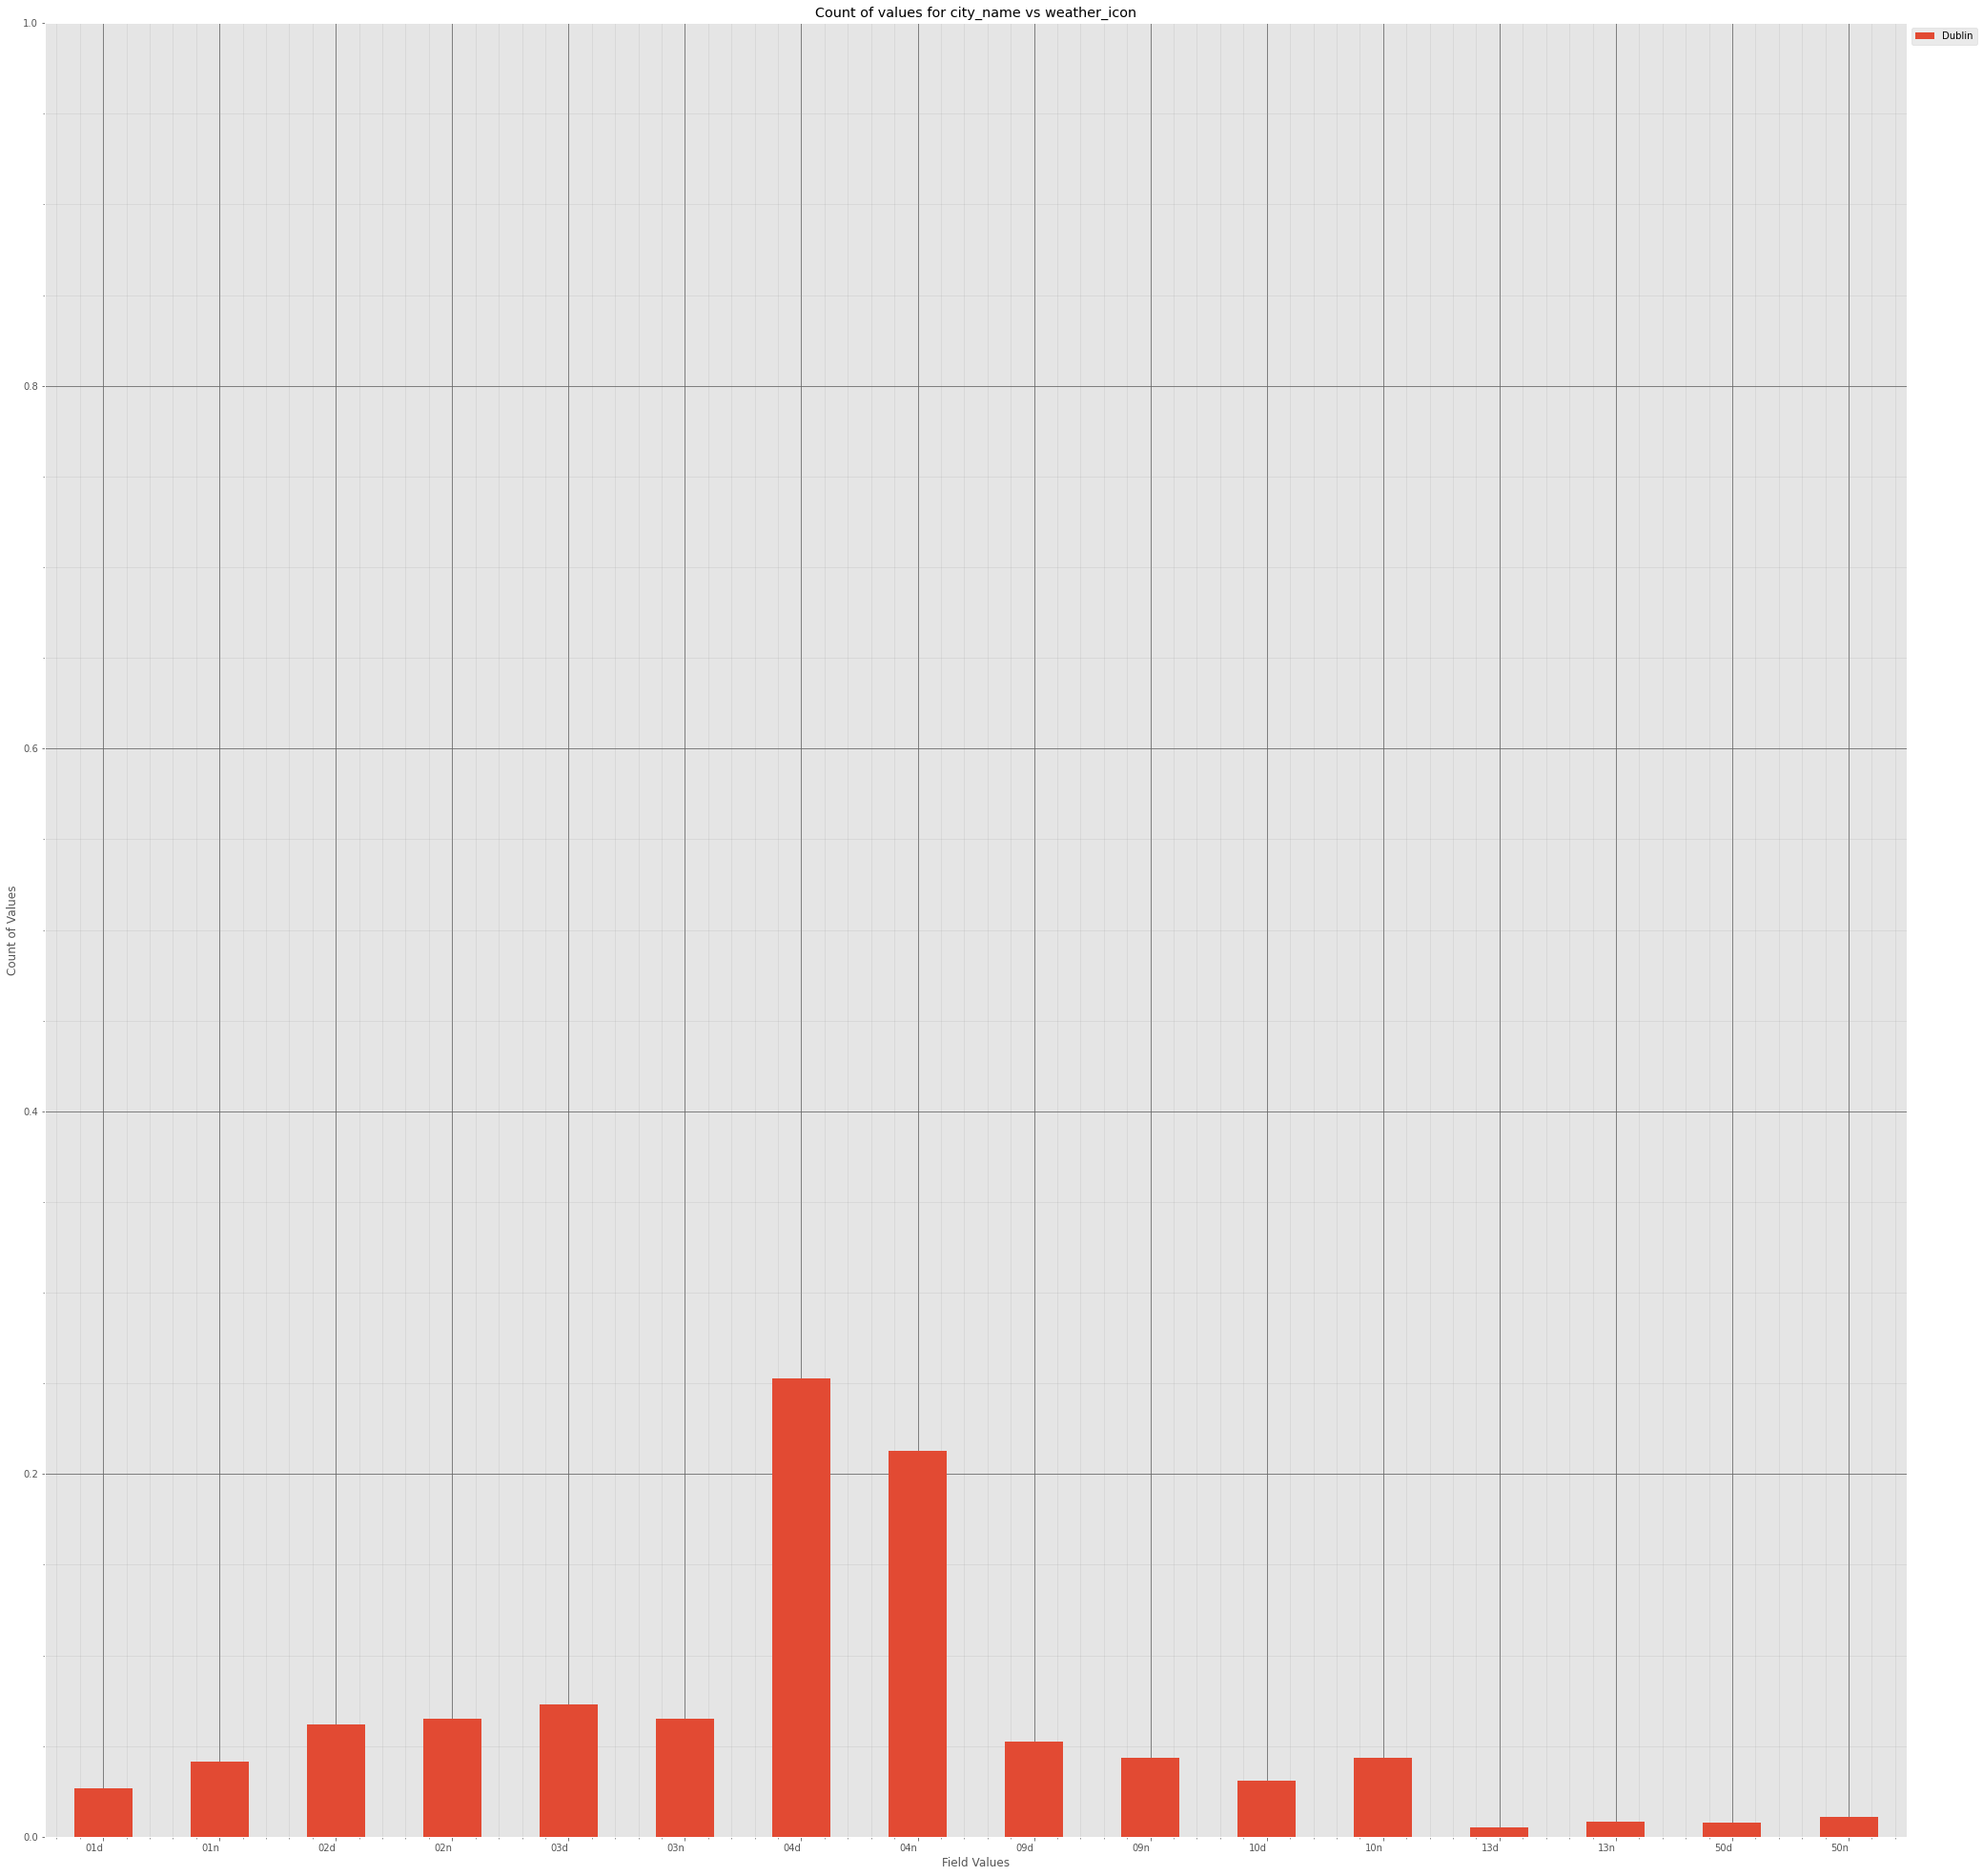



----------------------


Grouping over weather_icon|clouds_all results in:



weather_icon clouds_all  Rows  % Frequency
0            01d          0   237     2.678571
1            01d          1     0     0.000000
2            01d         10     0     0.000000
3            01d        100     0     0.000000
4            01d         11     0     0.000000
..           ...        ...   ...          ...
315          50n         84     0     0.000000
316          50n         87     0     0.000000
317          50n         90     8     0.090416
318          50n         91     1     0.011302
319          50n         99     0     0.000000

[320 rows x 4 columns]

Non Zero Data:


weather_icon clouds_all  Rows  % Frequency
0            01d          0   237     2.678571
20           01n          0   356     4.023508
21           01n          1     2     0.022604
22           01n         10     1     0.011302
25           01n          2     4     0.045208
29           01n          3     1     0.011302
31           01n          5     1     0.011302
46           02d         20   547     6.182188
64           02n         11     2     0.022604
66           02n         20   571     6.453436
67           02n         21     1     0.011302
90           03d         40   645     7.289783
108          03n         26     1     0.011302
110          03n         40   577     6.521248
132          04d         69     1     0.011302
133          04d         75  2205    24.920886
134          04d         83     1     0.011302
136          04d         87     1     0.011302
137          04d         90    25     0.282550
139          04d         99     1     0.011302
153          04n         75  1853    20.942586
155          04n         84     1     0.011302
157          04n         90    28     0.316456
163          09d        100     1     0.011302
166          09d         20     7     0.079114
170          09d         40    41     0.463382
173          09d         75   400     4.520796
177          09d         90    14     0.158228
186          09n         20     1     0.011302
190          09n         40    20     0.226040
193          09n         75   347     3.921790
197          09n         90    15     0.169530
213          10d         75   264     2.983725
217          10d         90    10     0.113020
223          10n        100     1     0.011302
233          10n         75   367     4.147830
237          10n         90    15     0.169530
250          13d         40     3     0.033906
253          13d         75    32     0.361664
257          13d         90     9     0.101718
270          13n         40     1     0.011302
273          13n         75    71     0.802441
283          50d        100     1     0.011302
286          50d         20     7     0.079114
290          50d         40     4     0.045208
293          50d         75    48     0.542495
297          50d         90     9     0.101718
303          50n        100     1     0.011302
306          50n         20    17     0.192134
310          50n         40    12     0.135624
313          50n         75    59     0.666817
317          50n         90     8     0.090416
318          50n         91     1     0.011302

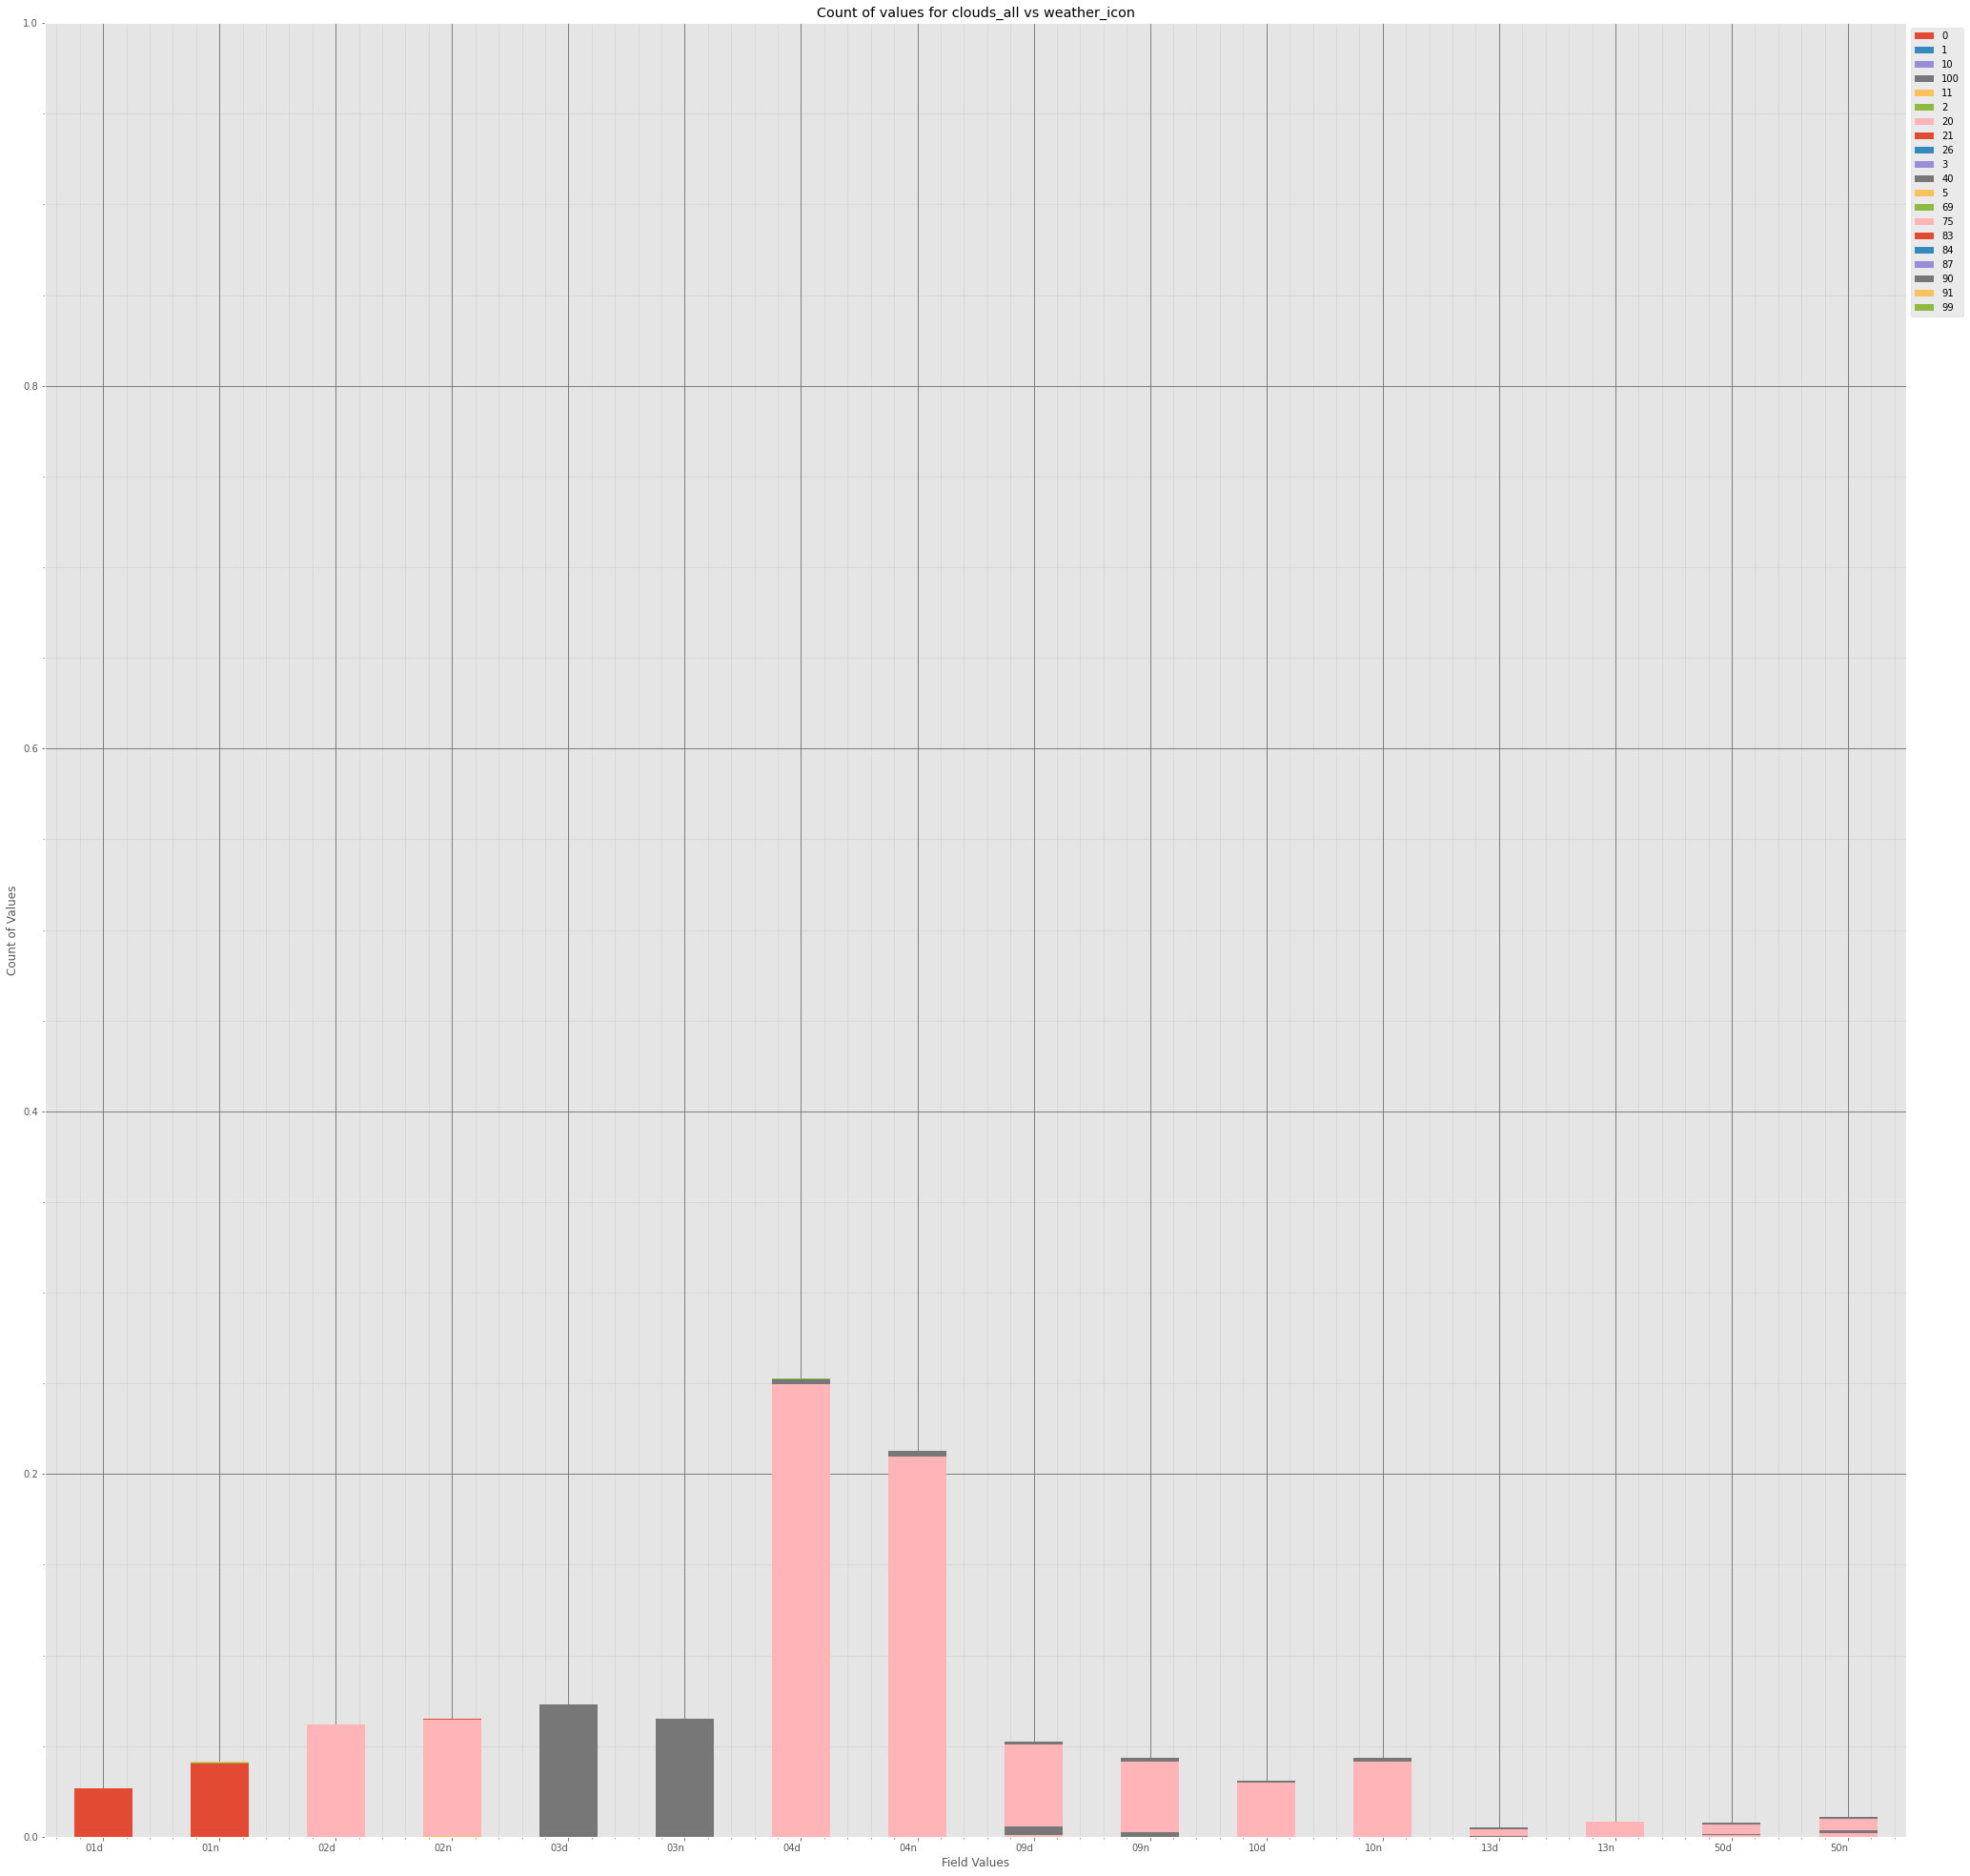



----------------------


Grouping over weather_icon|weather_id results in:



weather_icon weather_id  Rows  % Frequency
0            01d        300     0          0.0
1            01d        301     0          0.0
2            01d        310     0          0.0
3            01d        311     0          0.0
4            01d        500     0          0.0
..           ...        ...   ...          ...
363          50n        800     0          0.0
364          50n        801     0          0.0
365          50n        802     0          0.0
366          50n        803     0          0.0
367          50n        804     0          0.0

[368 rows x 4 columns]

Non Zero Data:


weather_icon weather_id  Rows  % Frequency
18           01d        800   237     2.678571
41           01n        800   365     4.125226
65           02d        801   547     6.182188
88           02n        801   574     6.487342
112          03d        802   645     7.289783
135          03n        802   578     6.532550
159          04d        803  2207    24.943490
160          04d        804    27     0.305154
182          04n        803  1854    20.953888
183          04n        804    28     0.316456
184          09d        300   132     1.491863
186          09d        310   108     1.220615
191          09d        520   111     1.254521
192          09d        521   112     1.265823
207          09n        300   137     1.548373
208          09n        301     4     0.045208
209          09n        310   115     1.299729
210          09n        311     2     0.022604
214          09n        520   117     1.322333
215          09n        521     8     0.090416
234          10d        500   257     2.904611
235          10d        501    17     0.192134
257          10n        500   352     3.978300
258          10n        501    30     0.339060
259          10n        502     1     0.011302
285          13d        600    11     0.124322
286          13d        601     2     0.022604
287          13d        612     4     0.045208
289          13d        620    27     0.305154
308          13n        600    19     0.214738
309          13n        601     5     0.056510
310          13n        612     7     0.079114
311          13n        615     1     0.011302
312          13n        620    39     0.440778
313          13n        621     1     0.011302
337          50d        701    32     0.361664
338          50d        711     1     0.011302
339          50d        741    36     0.406872
360          50n        701    45     0.508590
362          50n        741    53     0.599005

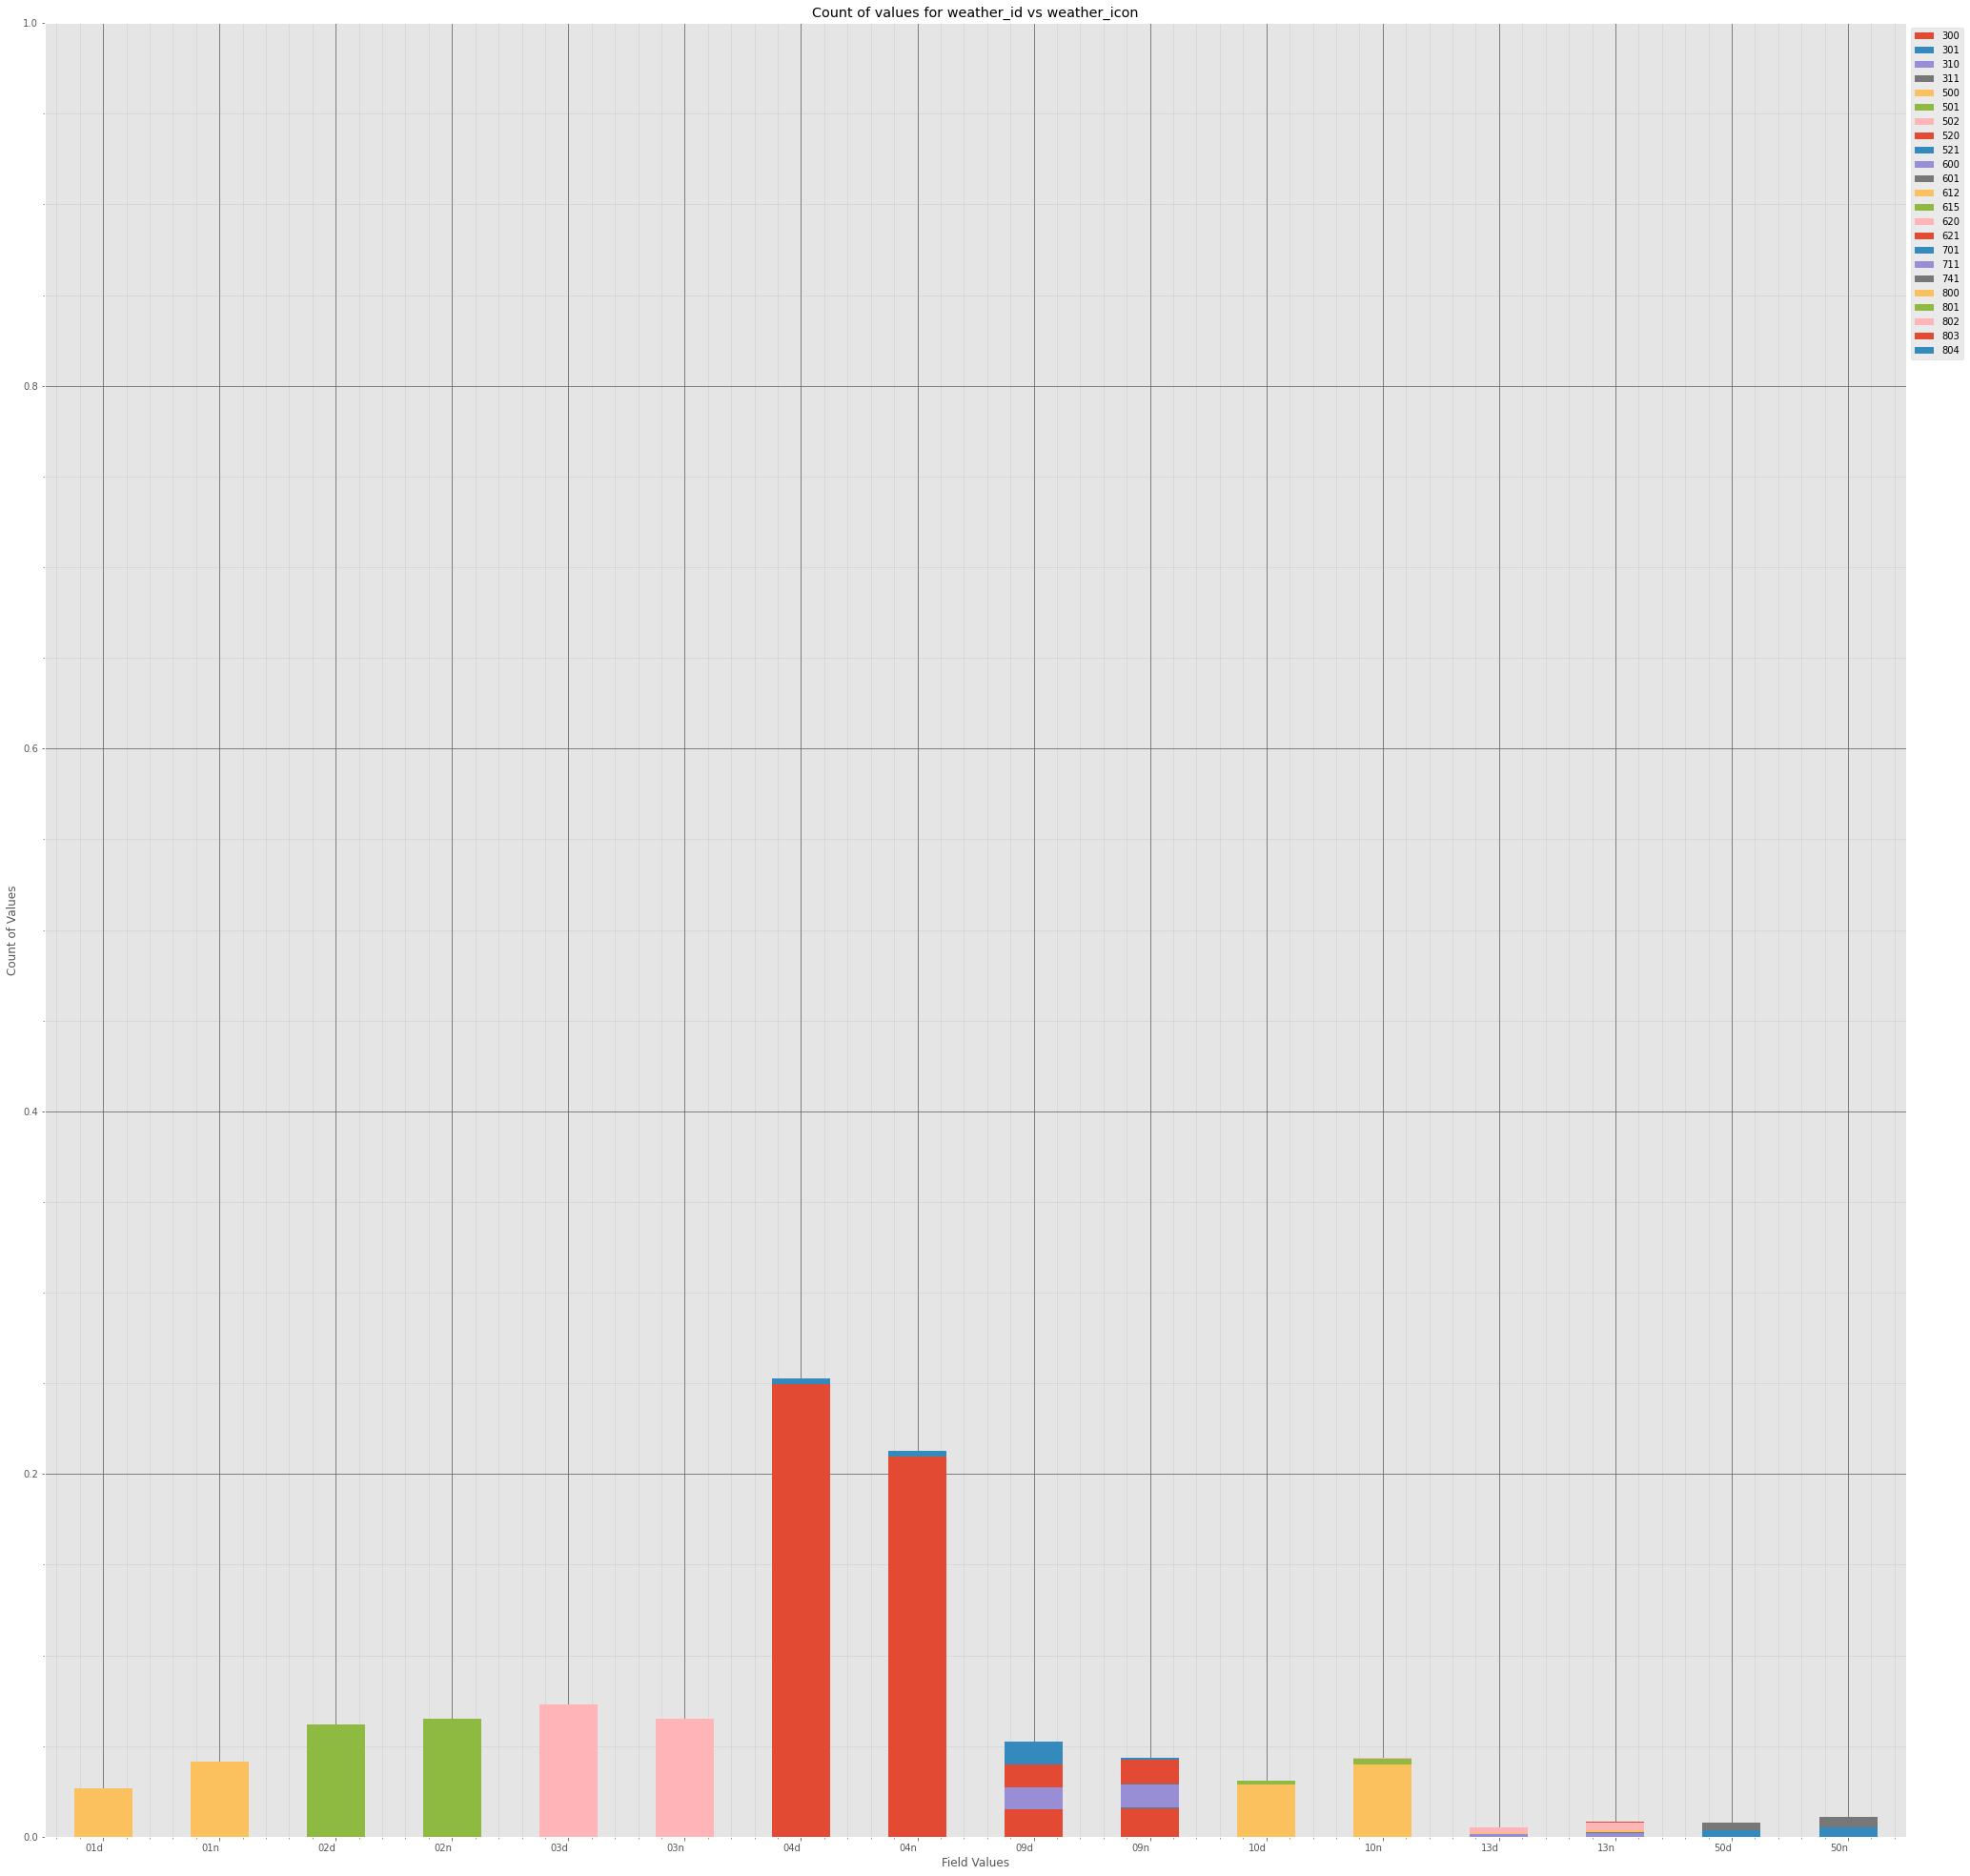



----------------------


Grouping over weather_icon|weather_description results in:



weather_icon  weather_description  Rows  % Frequency
0            01d   light shower sleet     0          0.0
1            01d        broken clouds     0          0.0
2            01d              drizzle     0          0.0
3            01d           few clouds     0          0.0
4            01d                  fog     0          0.0
..           ...                  ...   ...          ...
379          50n          shower rain     0          0.0
380          50n          shower snow     0          0.0
381          50n         sky is clear     0          0.0
382          50n                smoke     0          0.0
383          50n                 snow     0          0.0

[384 rows x 4 columns]

Non Zero Data:


weather_icon           weather_description  Rows  % Frequency
21           01d                  sky is clear   237     2.678571
45           01n                  sky is clear   365     4.125226
51           02d                    few clouds   547     6.182188
75           02n                    few clouds   574     6.487342
114          03d              scattered clouds   645     7.289783
138          03n              scattered clouds   578     6.532550
145          04d                 broken clouds  2207    24.943490
159          04d               overcast clouds    27     0.305154
169          04n                 broken clouds  1854    20.953888
183          04n               overcast clouds    28     0.316456
198          09d       light intensity drizzle   132     1.491863
199          09d  light intensity drizzle rain   108     1.220615
200          09d   light intensity shower rain   111     1.254521
208          09d         proximity shower rain   111     1.254521
211          09d                   shower rain     1     0.011302
218          09n                       drizzle     4     0.045208
222          09n       light intensity drizzle   137     1.548373
223          09n  light intensity drizzle rain   115     1.299729
224          09n   light intensity shower rain   117     1.322333
232          09n         proximity shower rain     7     0.079114
233          09n              rain and drizzle     2     0.022604
235          09n                   shower rain     1     0.011302
249          10d                    light rain   257     2.904611
254          10d                 moderate rain    17     0.192134
269          10n          heavy intensity rain     1     0.011302
273          10n                    light rain   352     3.978300
278          10n                 moderate rain    30     0.339060
288          13d            light shower sleet     4     0.045208
299          13d             light shower snow    27     0.305154
300          13d                    light snow    11     0.124322
311          13d                          snow     2     0.022604
312          13n            light shower sleet     7     0.079114
322          13n           light rain and snow     1     0.011302
323          13n             light shower snow    39     0.440778
324          13n                    light snow    19     0.214738
332          13n                   shower snow     1     0.011302
335          13n                          snow     5     0.056510
340          50d                           fog    36     0.406872
349          50d                          mist    32     0.361664
358          50d                         smoke     1     0.011302
364          50n                           fog    53     0.599005
373          50n                          mist    45     0.508590

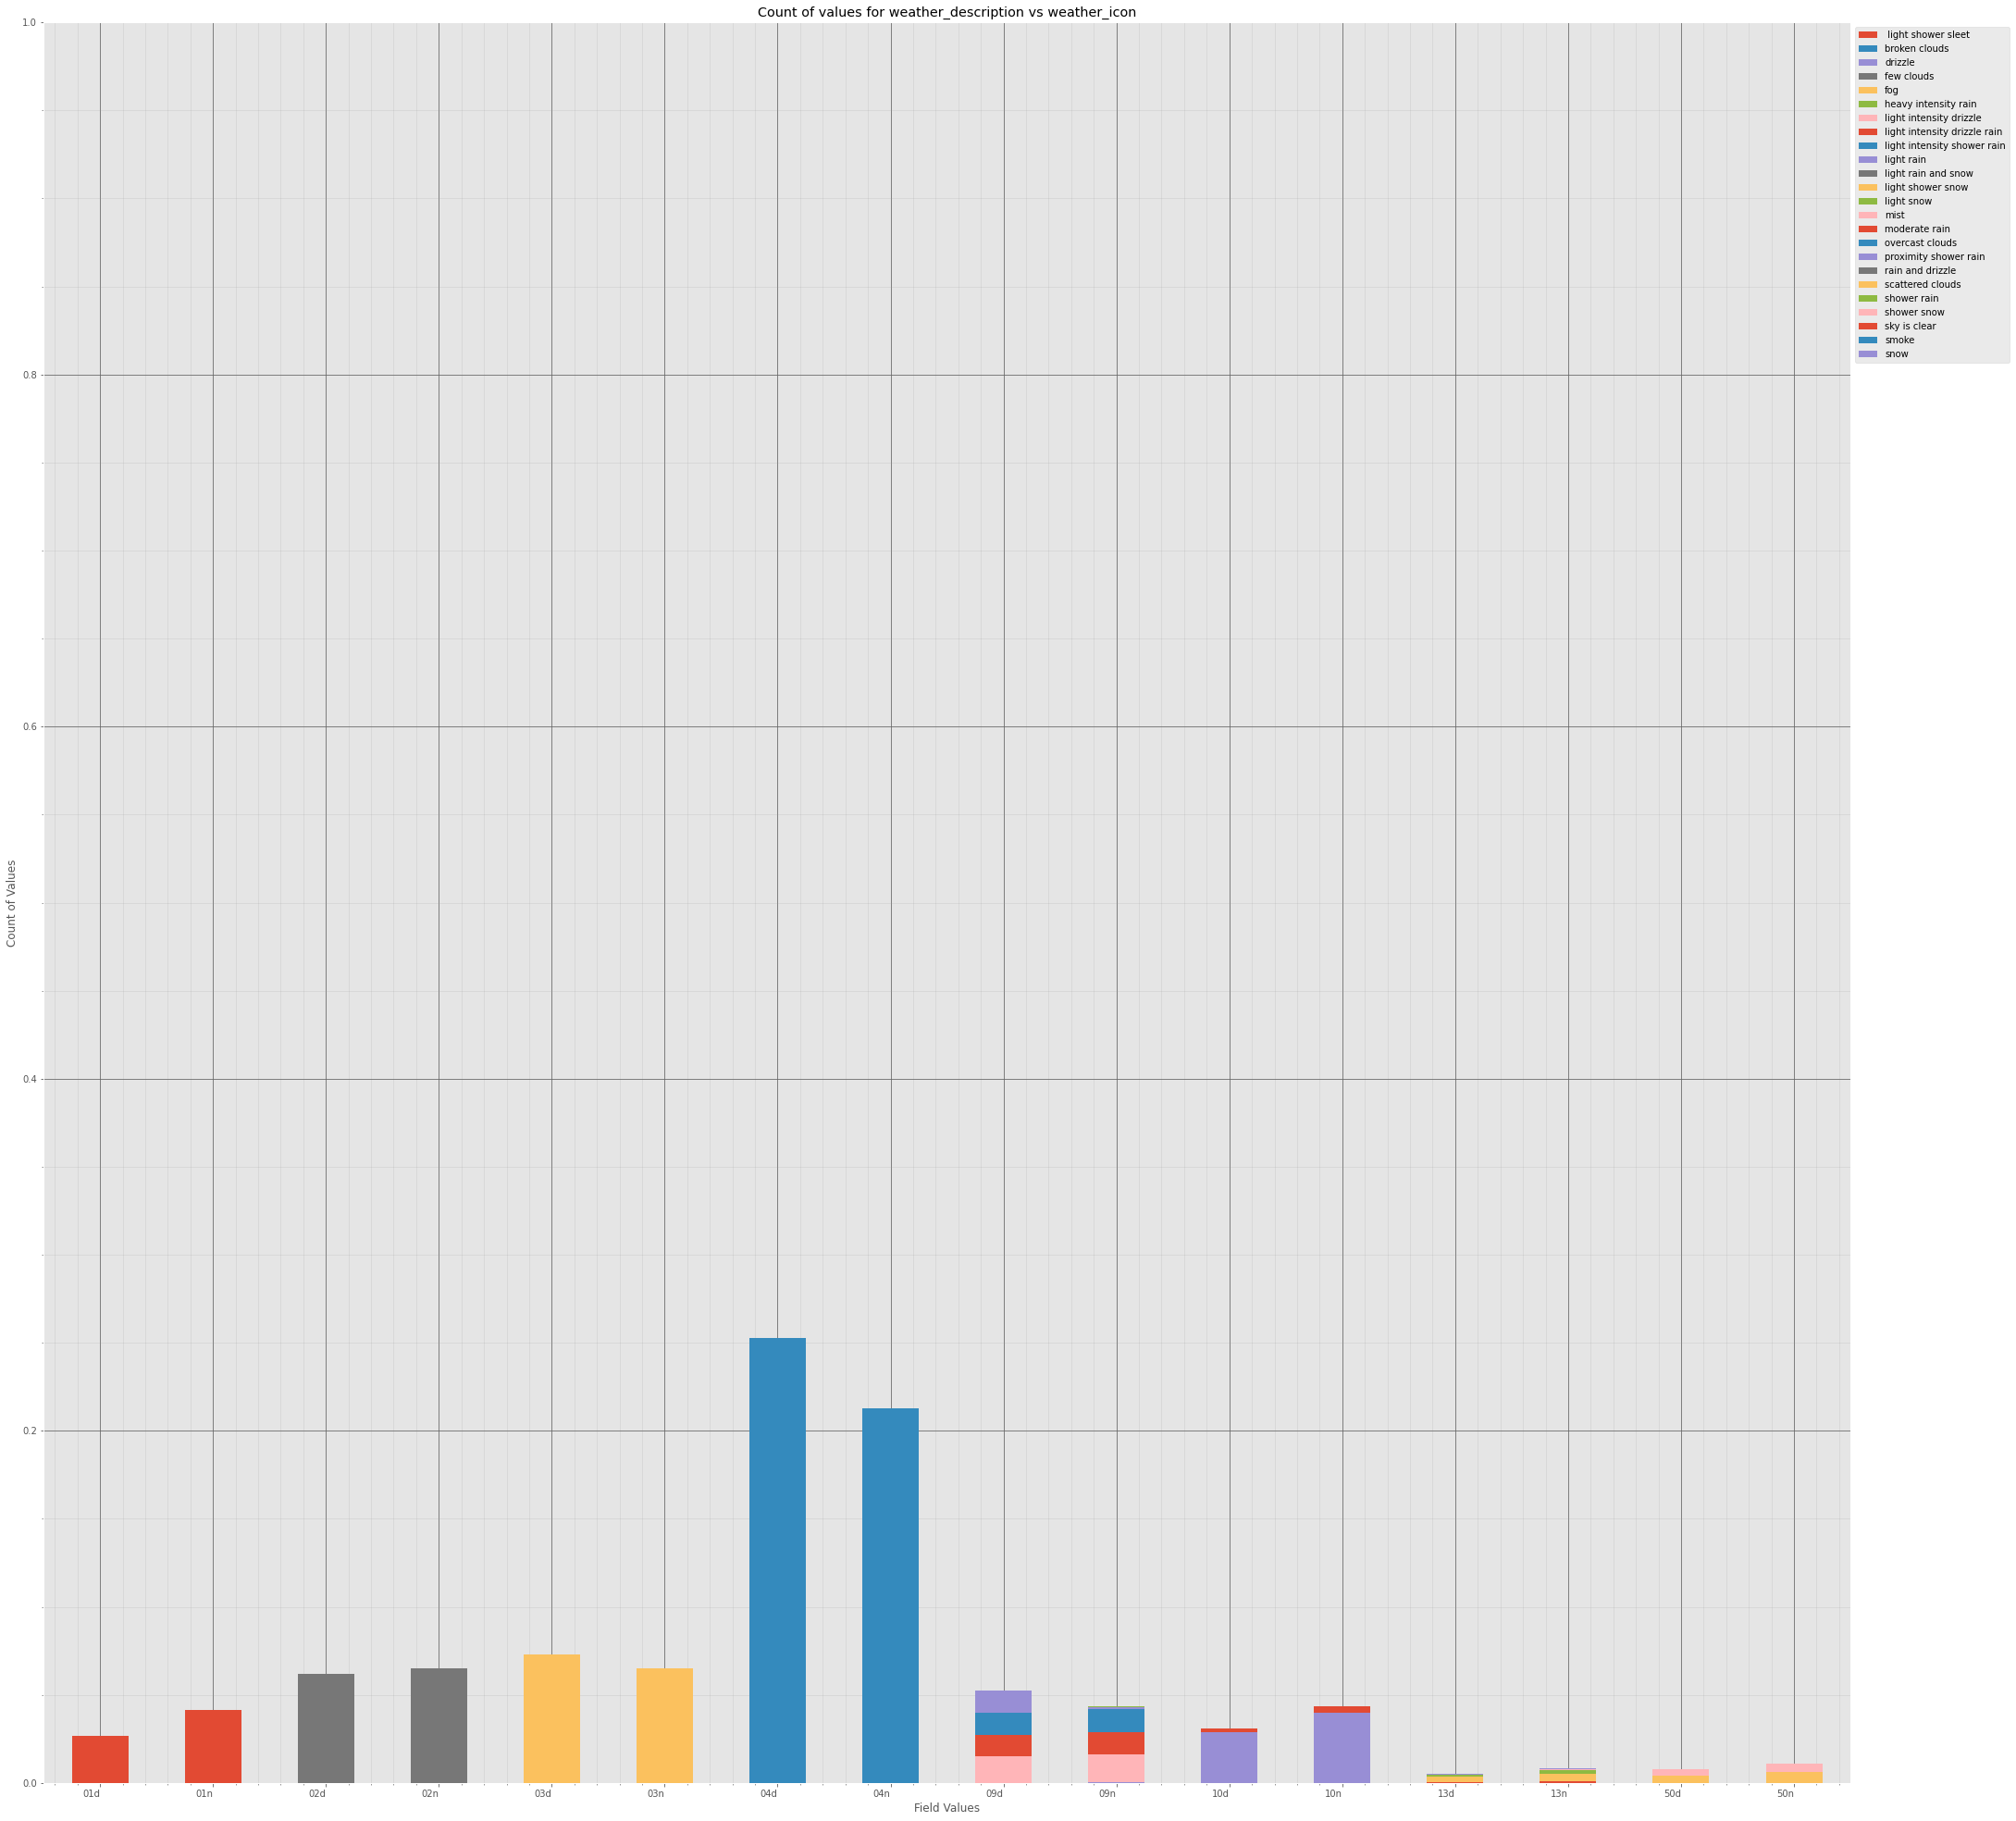

{}

In [83]:
group_over_multi_categories(weather_df,categorical_columns=weather_categorical_columns,pdf_fn="./data/weather_single_DB_{}.pdf".format(today_date), save_fig=True)

Inside group_over_multi_categories()


----------------------


Grouping over timezone|city_name results in:



Rows  % Frequency
timezone city_name                   
0        Dublin     3629    41.014919
3600     Dublin     5219    58.985081

Non Zero Data:


Rows  % Frequency
timezone city_name                   
0        Dublin     3629    41.014919
3600     Dublin     5219    58.985081

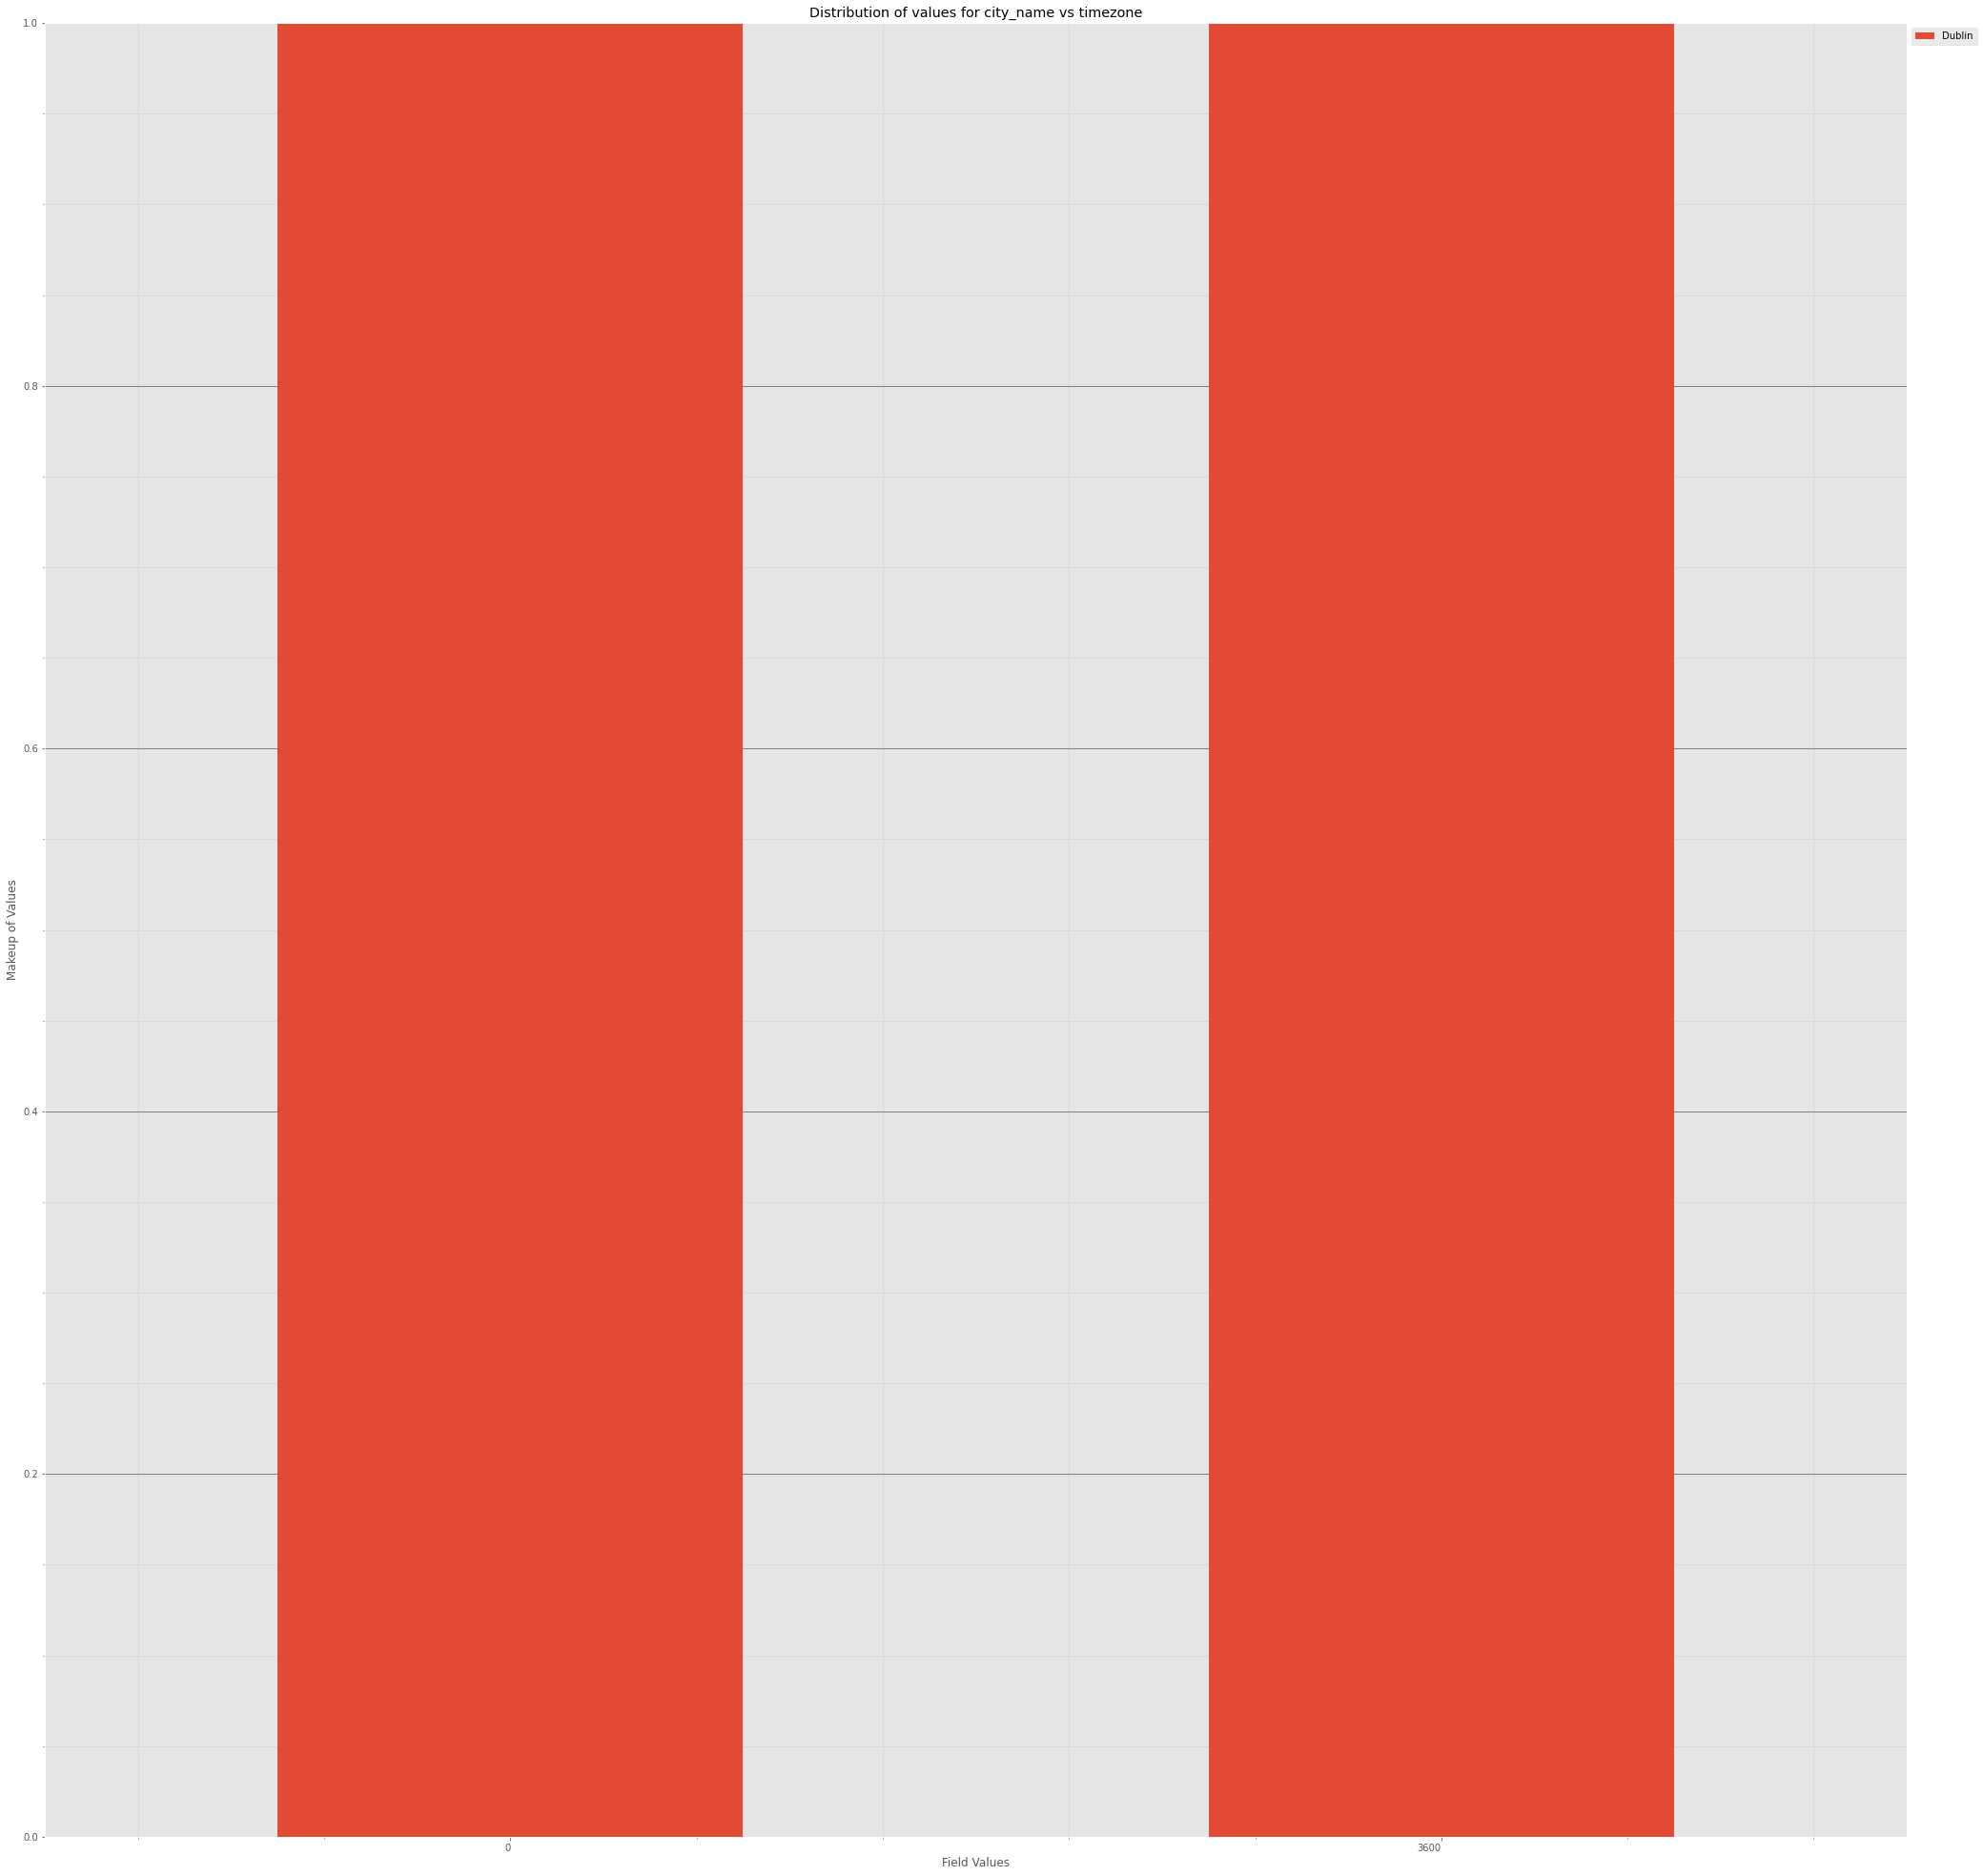



----------------------


Grouping over timezone|clouds_all results in:



Rows  % Frequency
timezone clouds_all                   
0        0            109     1.231917
         1              2     0.022604
         10             1     0.011302
         100            2     0.022604
         11             2     0.022604
         2              4     0.045208
         20           419     4.735533
         21             1     0.011302
         26             1     0.011302
         3              1     0.011302
         40           534     6.035262
         5              1     0.011302
         69             1     0.011302
         75          2472    27.938517
         83             1     0.011302
         84             1     0.011302
         87             0     0.000000
         90            75     0.847649
         91             1     0.011302
         99             1     0.011302
3600     0            484     5.470163
         1              0     0.000000
         10             0     0.000000
         100            2     0.022604
         11             0     0.000000
         2              0     0.000000
         20           731     8.261754
         21             0     0.000000
         26             0     0.000000
         3              0     0.000000
         40           769     8.691230
         5              0     0.000000
         69             0     0.000000
         75          3174    35.872514
         83             0     0.000000
         84             0     0.000000
         87             1     0.011302
         90            58     0.655515
         91             0     0.000000
         99             0     0.000000

Non Zero Data:


Rows  % Frequency
timezone clouds_all                   
0        0            109     1.231917
         1              2     0.022604
         10             1     0.011302
         100            2     0.022604
         11             2     0.022604
         2              4     0.045208
         20           419     4.735533
         21             1     0.011302
         26             1     0.011302
         3              1     0.011302
         40           534     6.035262
         5              1     0.011302
         69             1     0.011302
         75          2472    27.938517
         83             1     0.011302
         84             1     0.011302
         90            75     0.847649
         91             1     0.011302
         99             1     0.011302
3600     0            484     5.470163
         100            2     0.022604
         20           731     8.261754
         40           769     8.691230
         75          3174    35.872514
         87             1     0.011302
         90            58     0.655515

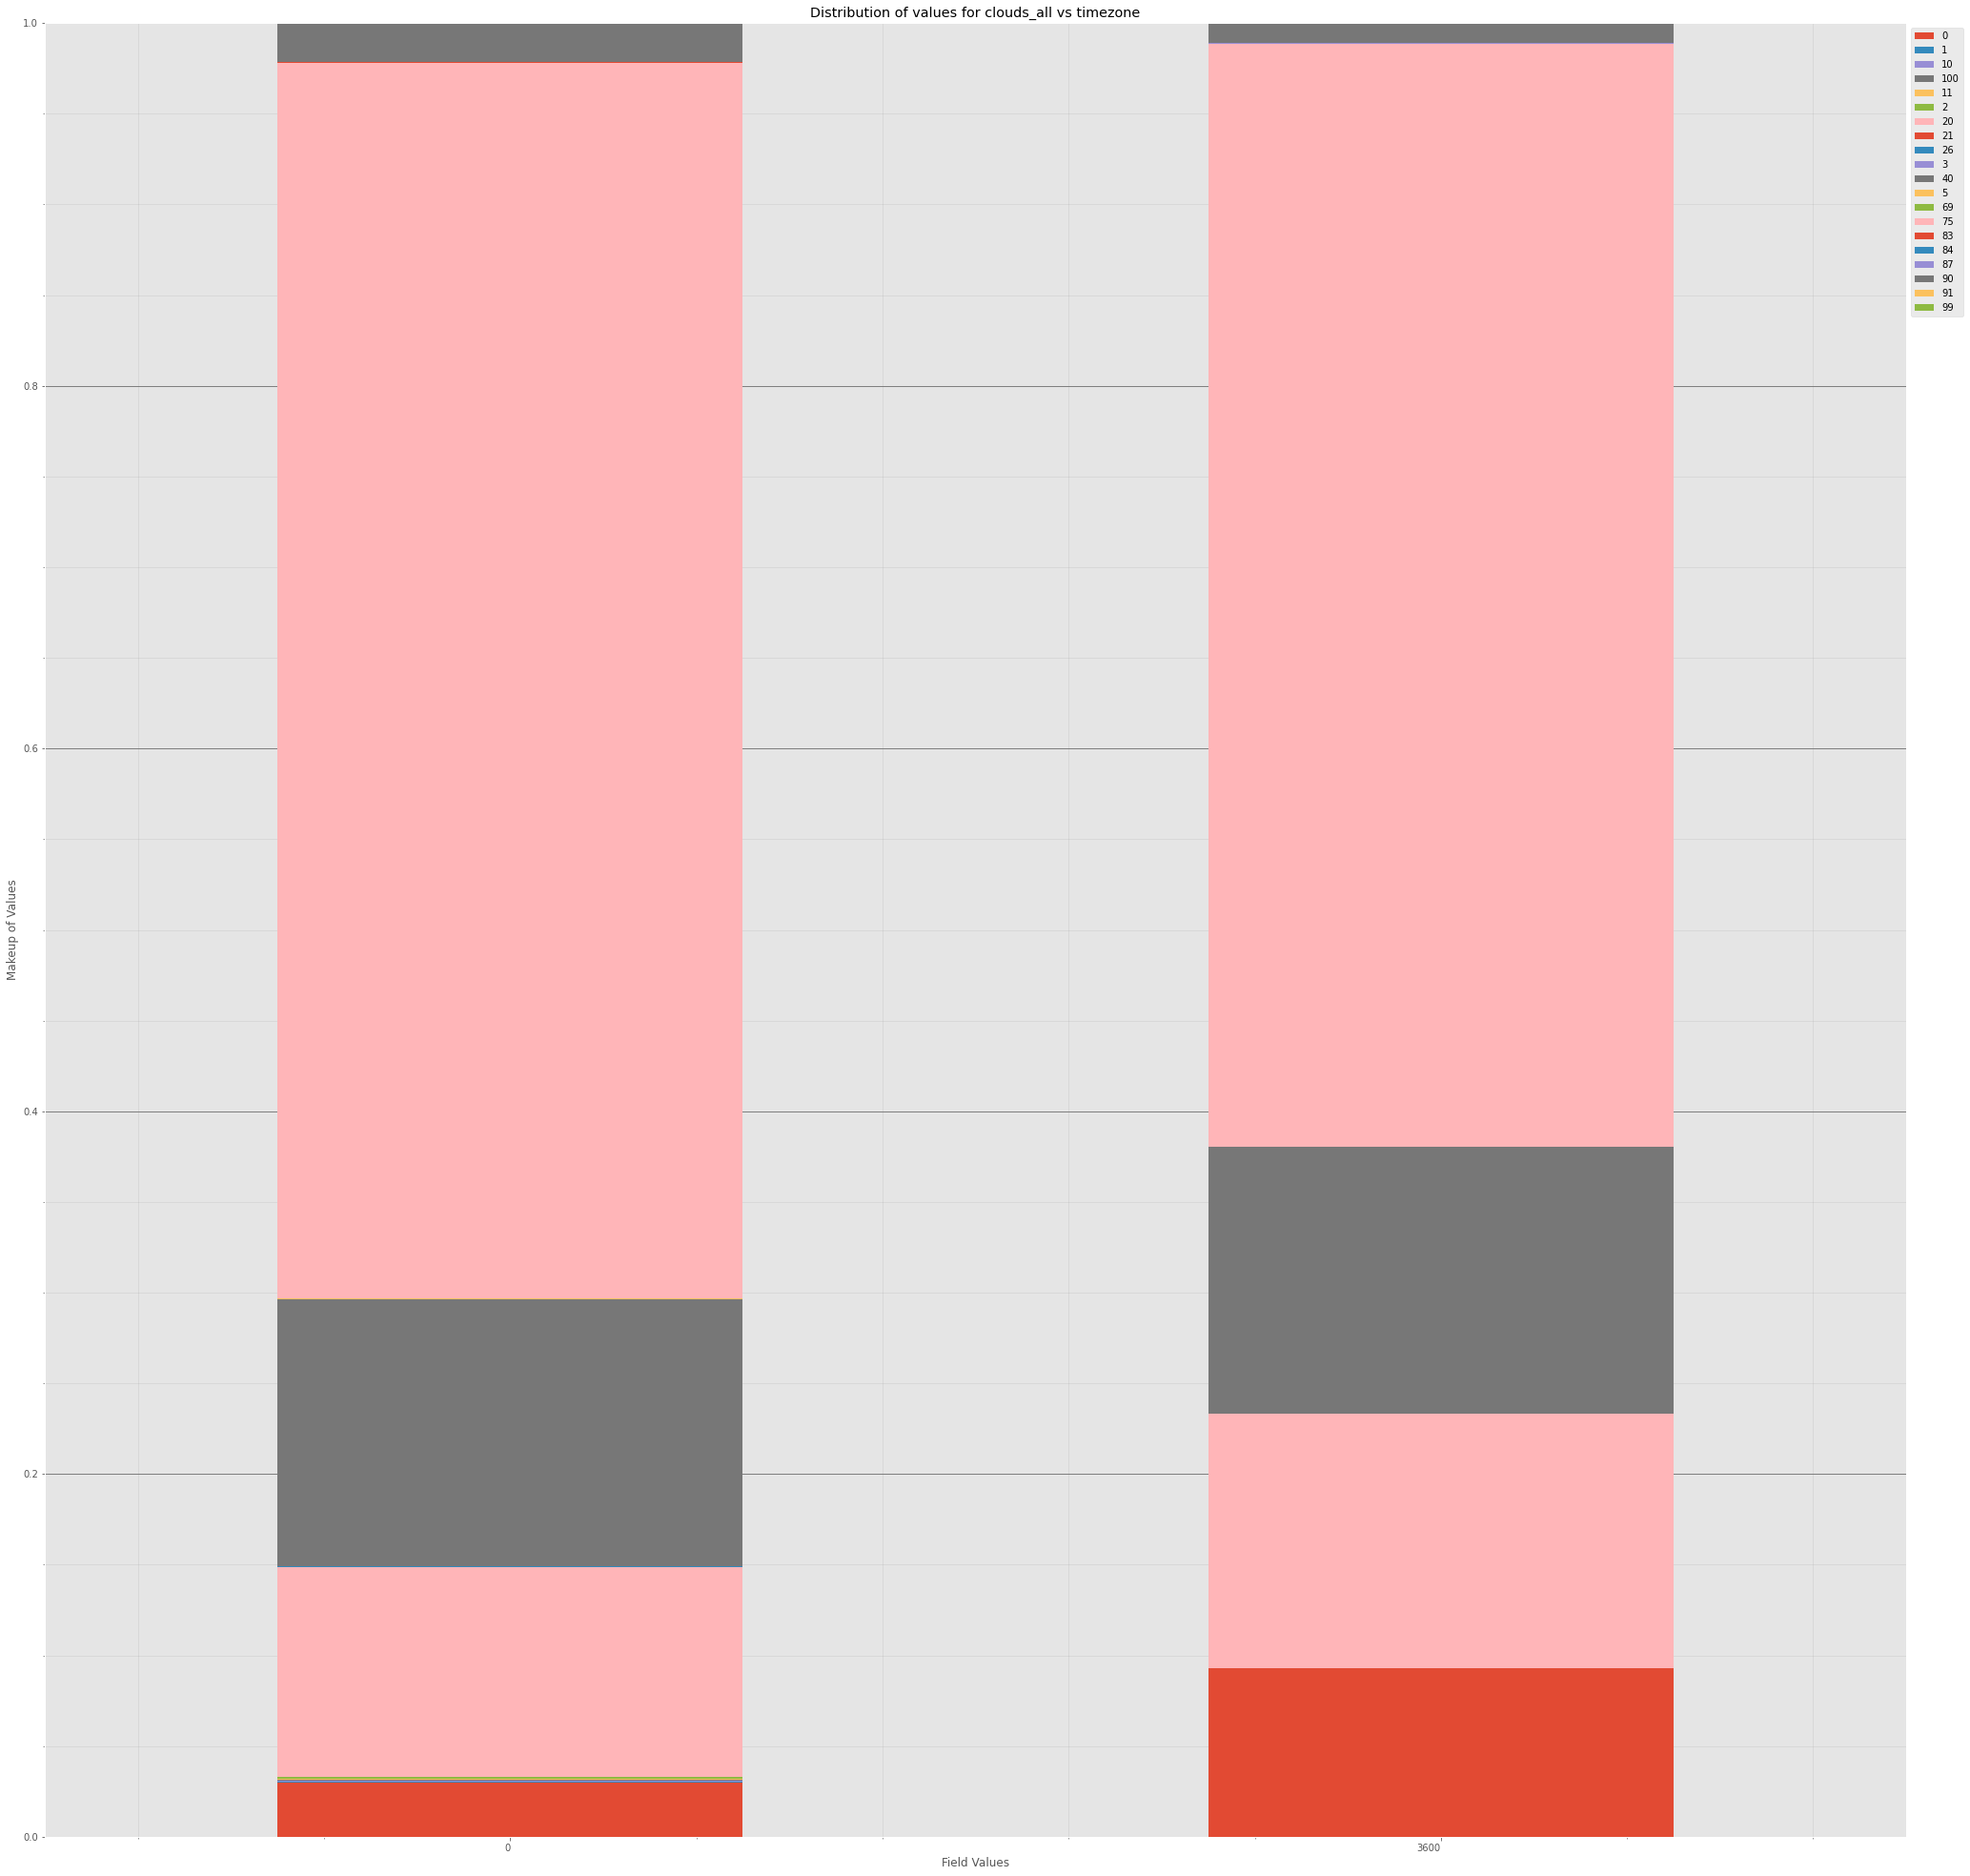



----------------------


Grouping over timezone|weather_id results in:



Rows  % Frequency
timezone weather_id                   
0        300          130     1.469259
         301            2     0.022604
         310          114     1.288427
         311            2     0.022604
         500          324     3.661844
         501           33     0.372966
         502            1     0.011302
         520          134     1.514467
         521           39     0.440778
         600           30     0.339060
         601            7     0.079114
         612           10     0.113020
         615            1     0.011302
         620           66     0.745931
         621            1     0.011302
         701           40     0.452080
         711            0     0.000000
         741           50     0.565099
         800          118     1.333635
         801          415     4.690325
         802          485     5.481465
         803         1597    18.049277
         804           30     0.339060
3600     300          139     1.570976
         301            2     0.022604
         310          109     1.231917
         311            0     0.000000
         500          285     3.221067
         501           14     0.158228
         502            0     0.000000
         520           94     1.062387
         521           81     0.915461
         600            0     0.000000
         601            0     0.000000
         612            1     0.011302
         615            0     0.000000
         620            0     0.000000
         621            0     0.000000
         701           37     0.418174
         711            1     0.011302
         741           39     0.440778
         800          484     5.470163
         801          706     7.979204
         802          738     8.340868
         803         2464    27.848101
         804           25     0.282550

Non Zero Data:


Rows  % Frequency
timezone weather_id                   
0        300          130     1.469259
         301            2     0.022604
         310          114     1.288427
         311            2     0.022604
         500          324     3.661844
         501           33     0.372966
         502            1     0.011302
         520          134     1.514467
         521           39     0.440778
         600           30     0.339060
         601            7     0.079114
         612           10     0.113020
         615            1     0.011302
         620           66     0.745931
         621            1     0.011302
         701           40     0.452080
         741           50     0.565099
         800          118     1.333635
         801          415     4.690325
         802          485     5.481465
         803         1597    18.049277
         804           30     0.339060
3600     300          139     1.570976
         301            2     0.022604
         310          109     1.231917
         500          285     3.221067
         501           14     0.158228
         520           94     1.062387
         521           81     0.915461
         612            1     0.011302
         701           37     0.418174
         711            1     0.011302
         741           39     0.440778
         800          484     5.470163
         801          706     7.979204
         802          738     8.340868
         803         2464    27.848101
         804           25     0.282550

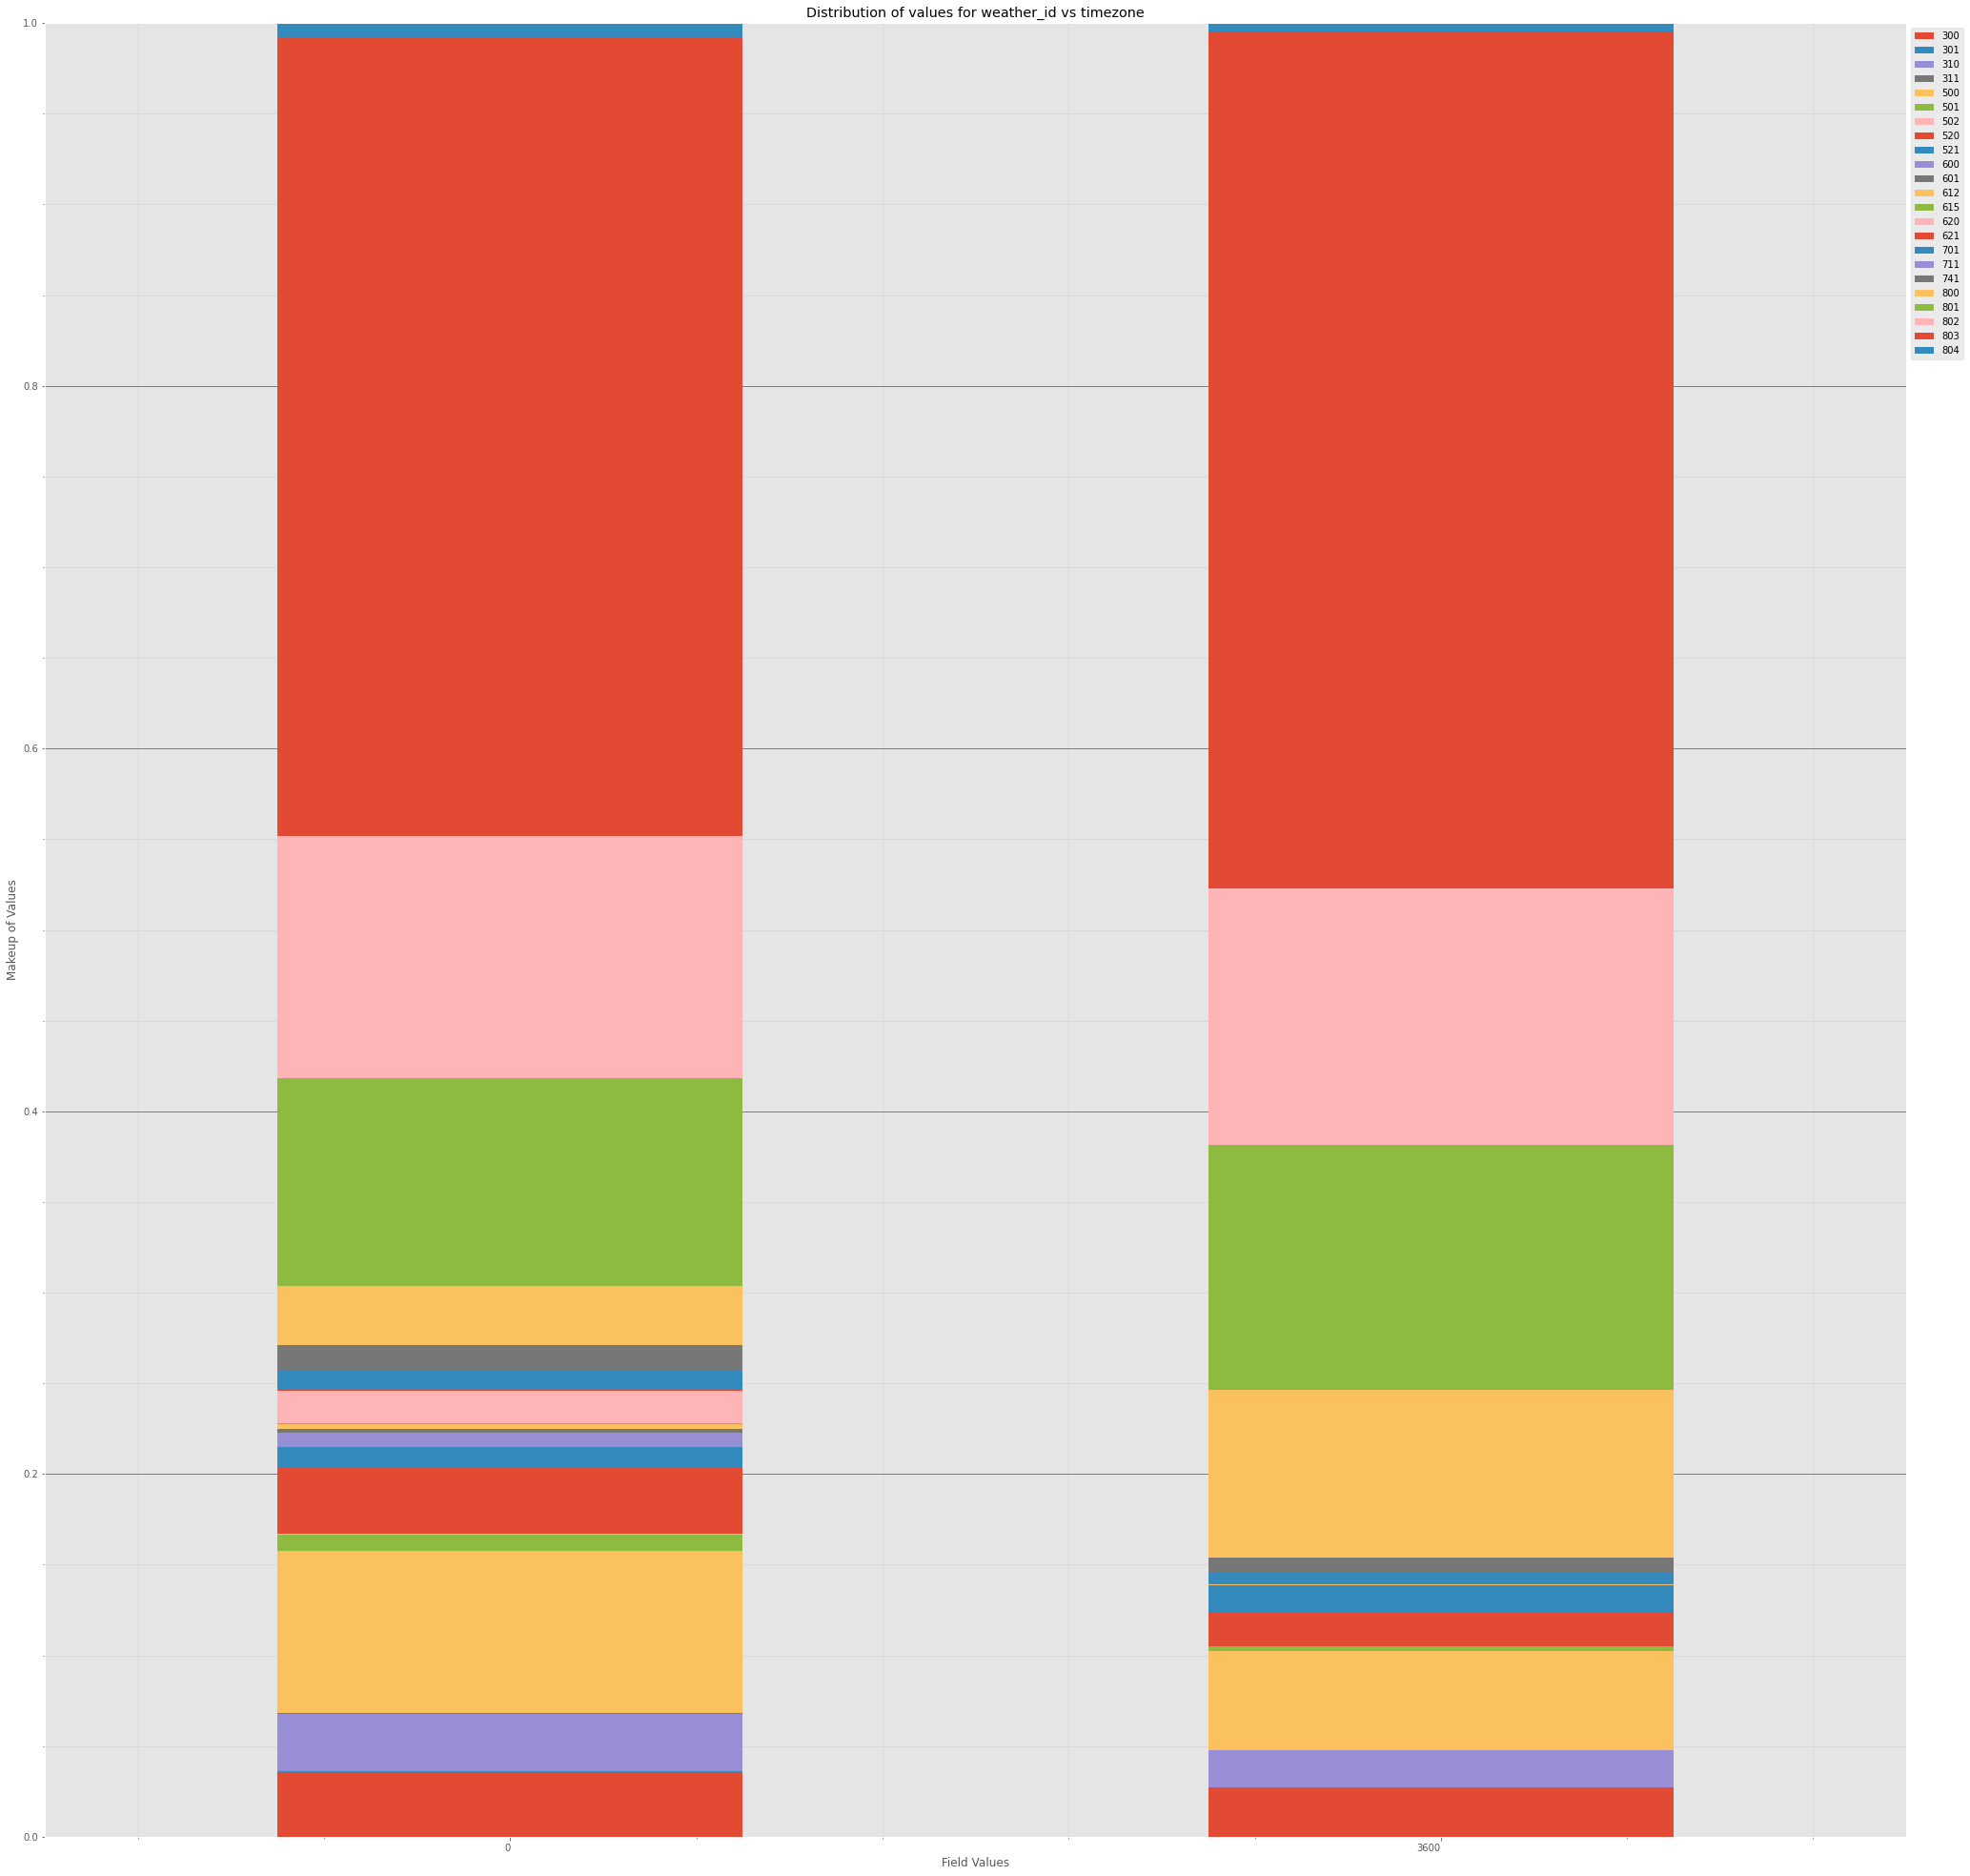



----------------------


Grouping over timezone|weather_description results in:



Rows  % Frequency
timezone weather_description                            
0         light shower sleet             10     0.113020
         broken clouds                 1597    18.049277
         drizzle                          2     0.022604
         few clouds                     415     4.690325
         fog                             50     0.565099
         heavy intensity rain             1     0.011302
         light intensity drizzle        130     1.469259
         light intensity drizzle rain   114     1.288427
         light intensity shower rain    134     1.514467
         light rain                     324     3.661844
         light rain and snow              1     0.011302
         light shower snow               66     0.745931
         light snow                      30     0.339060
         mist                            40     0.452080
         moderate rain                   33     0.372966
         overcast clouds                 30     0.339060
         proximity shower rain           37     0.418174
         rain and drizzle                 2     0.022604
         scattered clouds               485     5.481465
         shower rain                      2     0.022604
         shower snow                      1     0.011302
         sky is clear                   118     1.333635
         smoke                            0     0.000000
         snow                             7     0.079114
3600      light shower sleet              1     0.011302
         broken clouds                 2464    27.848101
         drizzle                          2     0.022604
         few clouds                     706     7.979204
         fog                             39     0.440778
         heavy intensity rain             0     0.000000
         light intensity drizzle        139     1.570976
         light intensity drizzle rain   109     1.231917
         light intensity shower rain     94     1.062387
         light rain                     285     3.221067
         light rain and snow              0     0.000000
         light shower snow                0     0.000000
         light snow                       0     0.000000
         mist                            37     0.418174
         moderate rain                   14     0.158228
         overcast clouds                 25     0.282550
         proximity shower rain           81     0.915461
         rain and drizzle                 0     0.000000
         scattered clouds               738     8.340868
         shower rain                      0     0.000000
         shower snow                      0     0.000000
         sky is clear                   484     5.470163
         smoke                            1     0.011302
         snow                             0     0.000000

Non Zero Data:


Rows  % Frequency
timezone weather_description                            
0         light shower sleet             10     0.113020
         broken clouds                 1597    18.049277
         drizzle                          2     0.022604
         few clouds                     415     4.690325
         fog                             50     0.565099
         heavy intensity rain             1     0.011302
         light intensity drizzle        130     1.469259
         light intensity drizzle rain   114     1.288427
         light intensity shower rain    134     1.514467
         light rain                     324     3.661844
         light rain and snow              1     0.011302
         light shower snow               66     0.745931
         light snow                      30     0.339060
         mist                            40     0.452080
         moderate rain                   33     0.372966
         overcast clouds                 30     0.339060
         proximity shower rain           37     0.418174
         rain and drizzle                 2     0.022604
         scattered clouds               485     5.481465
         shower rain                      2     0.022604
         shower snow                      1     0.011302
         sky is clear                   118     1.333635
         snow                             7     0.079114
3600      light shower sleet              1     0.011302
         broken clouds                 2464    27.848101
         drizzle                          2     0.022604
         few clouds                     706     7.979204
         fog                             39     0.440778
         light intensity drizzle        139     1.570976
         light intensity drizzle rain   109     1.231917
         light intensity shower rain     94     1.062387
         light rain                     285     3.221067
         mist                            37     0.418174
         moderate rain                   14     0.158228
         overcast clouds                 25     0.282550
         proximity shower rain           81     0.915461
         scattered clouds               738     8.340868
         sky is clear                   484     5.470163
         smoke                            1     0.011302

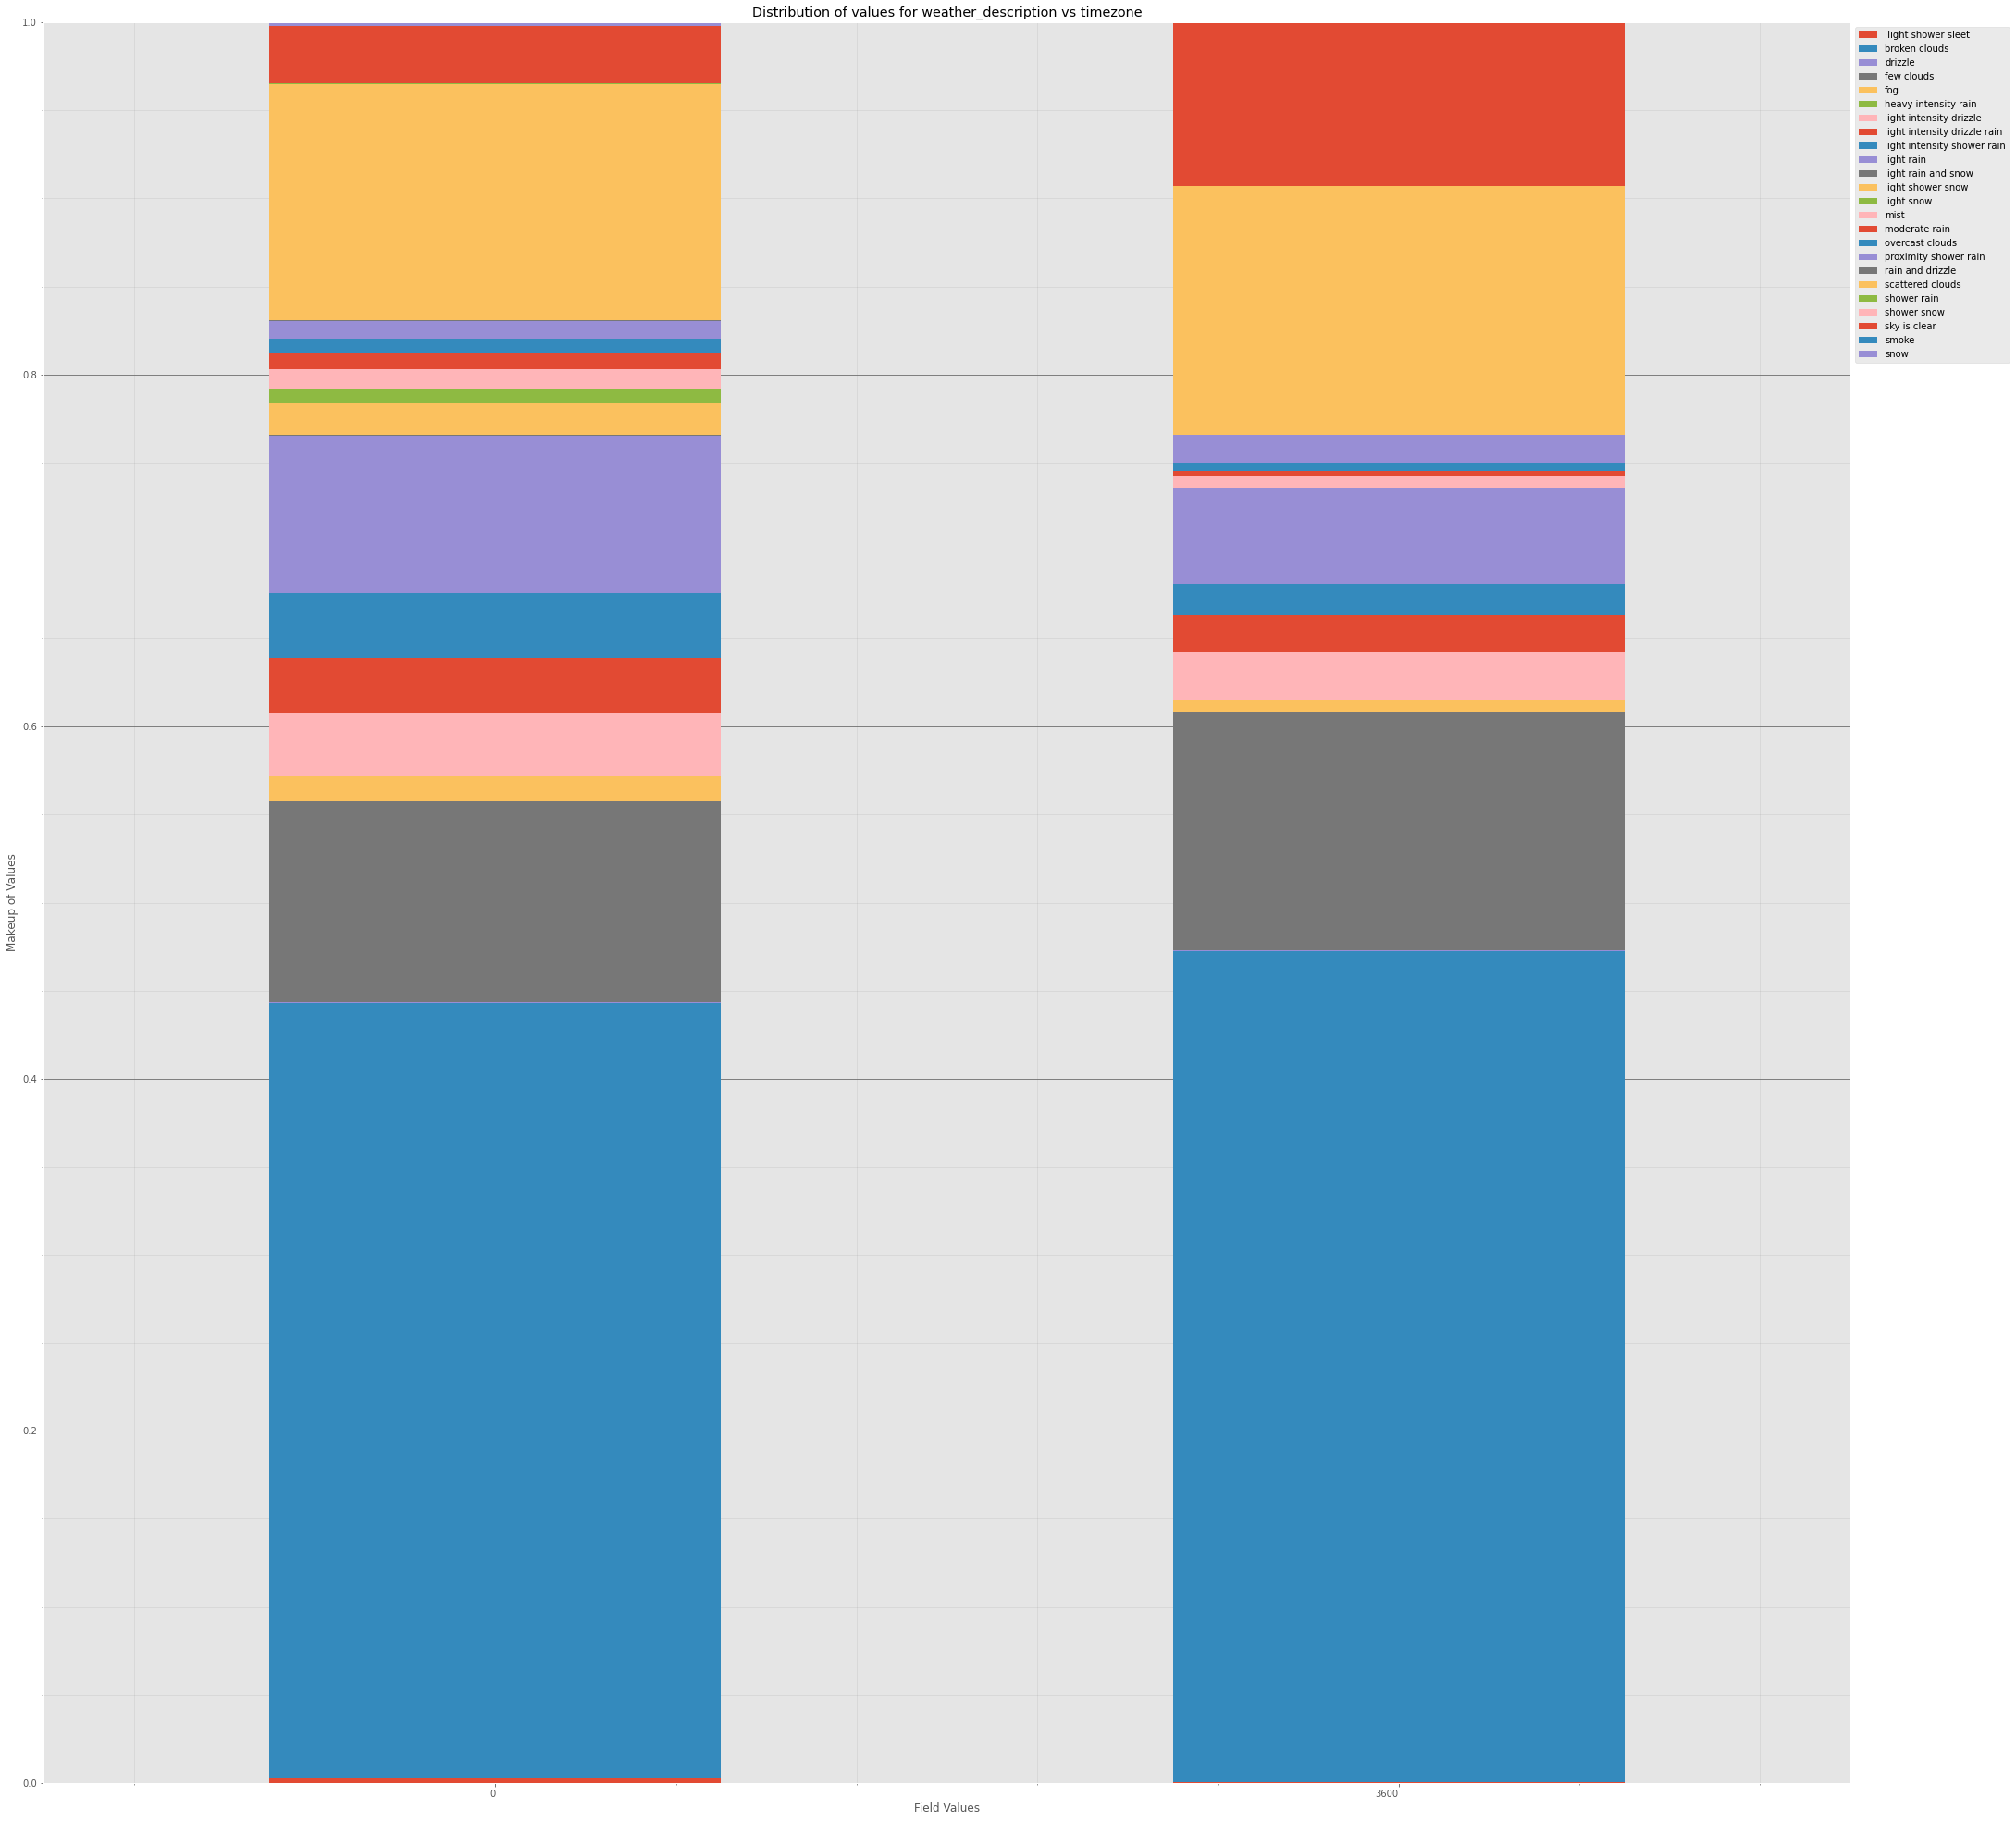



----------------------


Grouping over timezone|weather_icon results in:



Rows  % Frequency
timezone weather_icon                   
0        01d              6     0.067812
         01n            112     1.265823
         02d            156     1.763110
         02n            259     2.927215
         03d            203     2.294304
         03n            282     3.187161
         04d            666     7.527125
         04n            961    10.861212
         09d            178     2.011754
         09n            243     2.746383
         10d             97     1.096293
         10n            261     2.949819
         13d             44     0.497288
         13n             71     0.802441
         50d             27     0.305154
         50n             63     0.712025
3600     01d            231     2.610759
         01n            253     2.859403
         02d            391     4.419078
         02n            315     3.560127
         03d            442     4.995479
         03n            296     3.345389
         04d           1568    17.721519
         04n            921    10.409132
         09d            285     3.221067
         09n            140     1.582278
         10d            177     2.000452
         10n            122     1.378843
         13d              0     0.000000
         13n              1     0.011302
         50d             42     0.474684
         50n             35     0.395570

Non Zero Data:


Rows  % Frequency
timezone weather_icon                   
0        01d              6     0.067812
         01n            112     1.265823
         02d            156     1.763110
         02n            259     2.927215
         03d            203     2.294304
         03n            282     3.187161
         04d            666     7.527125
         04n            961    10.861212
         09d            178     2.011754
         09n            243     2.746383
         10d             97     1.096293
         10n            261     2.949819
         13d             44     0.497288
         13n             71     0.802441
         50d             27     0.305154
         50n             63     0.712025
3600     01d            231     2.610759
         01n            253     2.859403
         02d            391     4.419078
         02n            315     3.560127
         03d            442     4.995479
         03n            296     3.345389
         04d           1568    17.721519
         04n            921    10.409132
         09d            285     3.221067
         09n            140     1.582278
         10d            177     2.000452
         10n            122     1.378843
         13n              1     0.011302
         50d             42     0.474684
         50n             35     0.395570

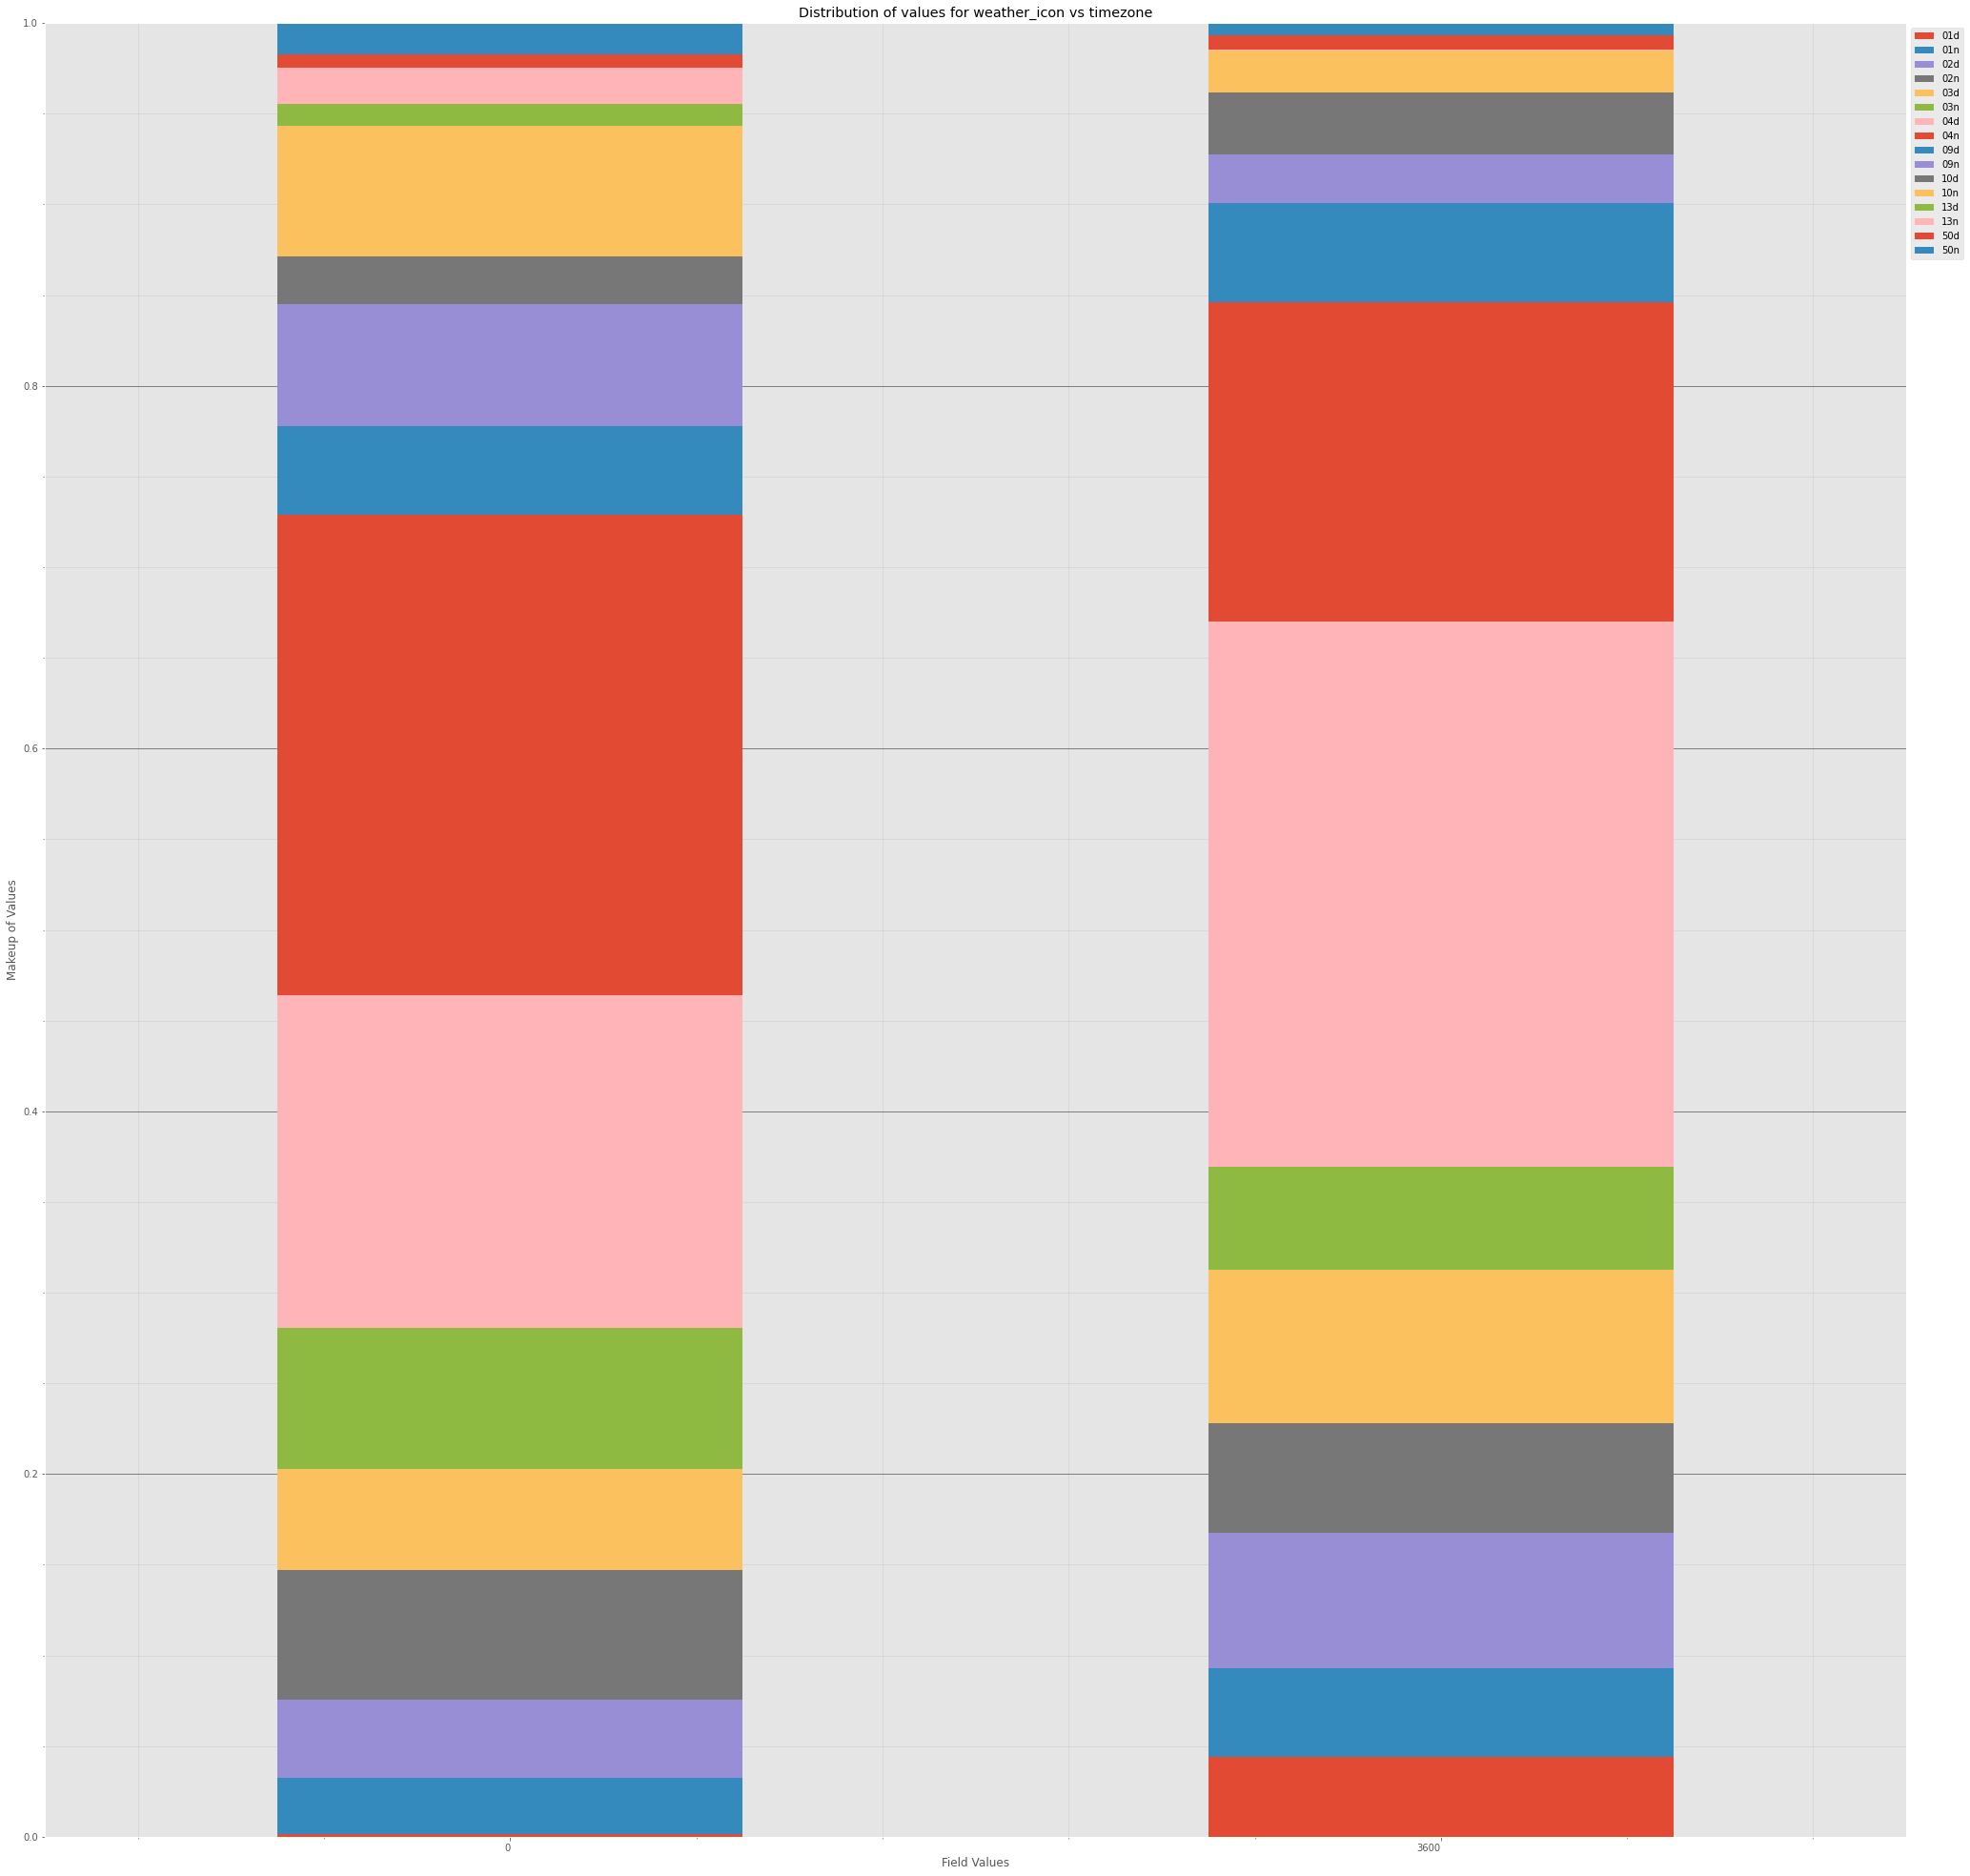



----------------------


Grouping over city_name|timezone results in:



Rows  % Frequency
city_name timezone                   
Dublin    0         3629    41.014919
          3600      5219    58.985081

Non Zero Data:


Rows  % Frequency
city_name timezone                   
Dublin    0         3629    41.014919
          3600      5219    58.985081

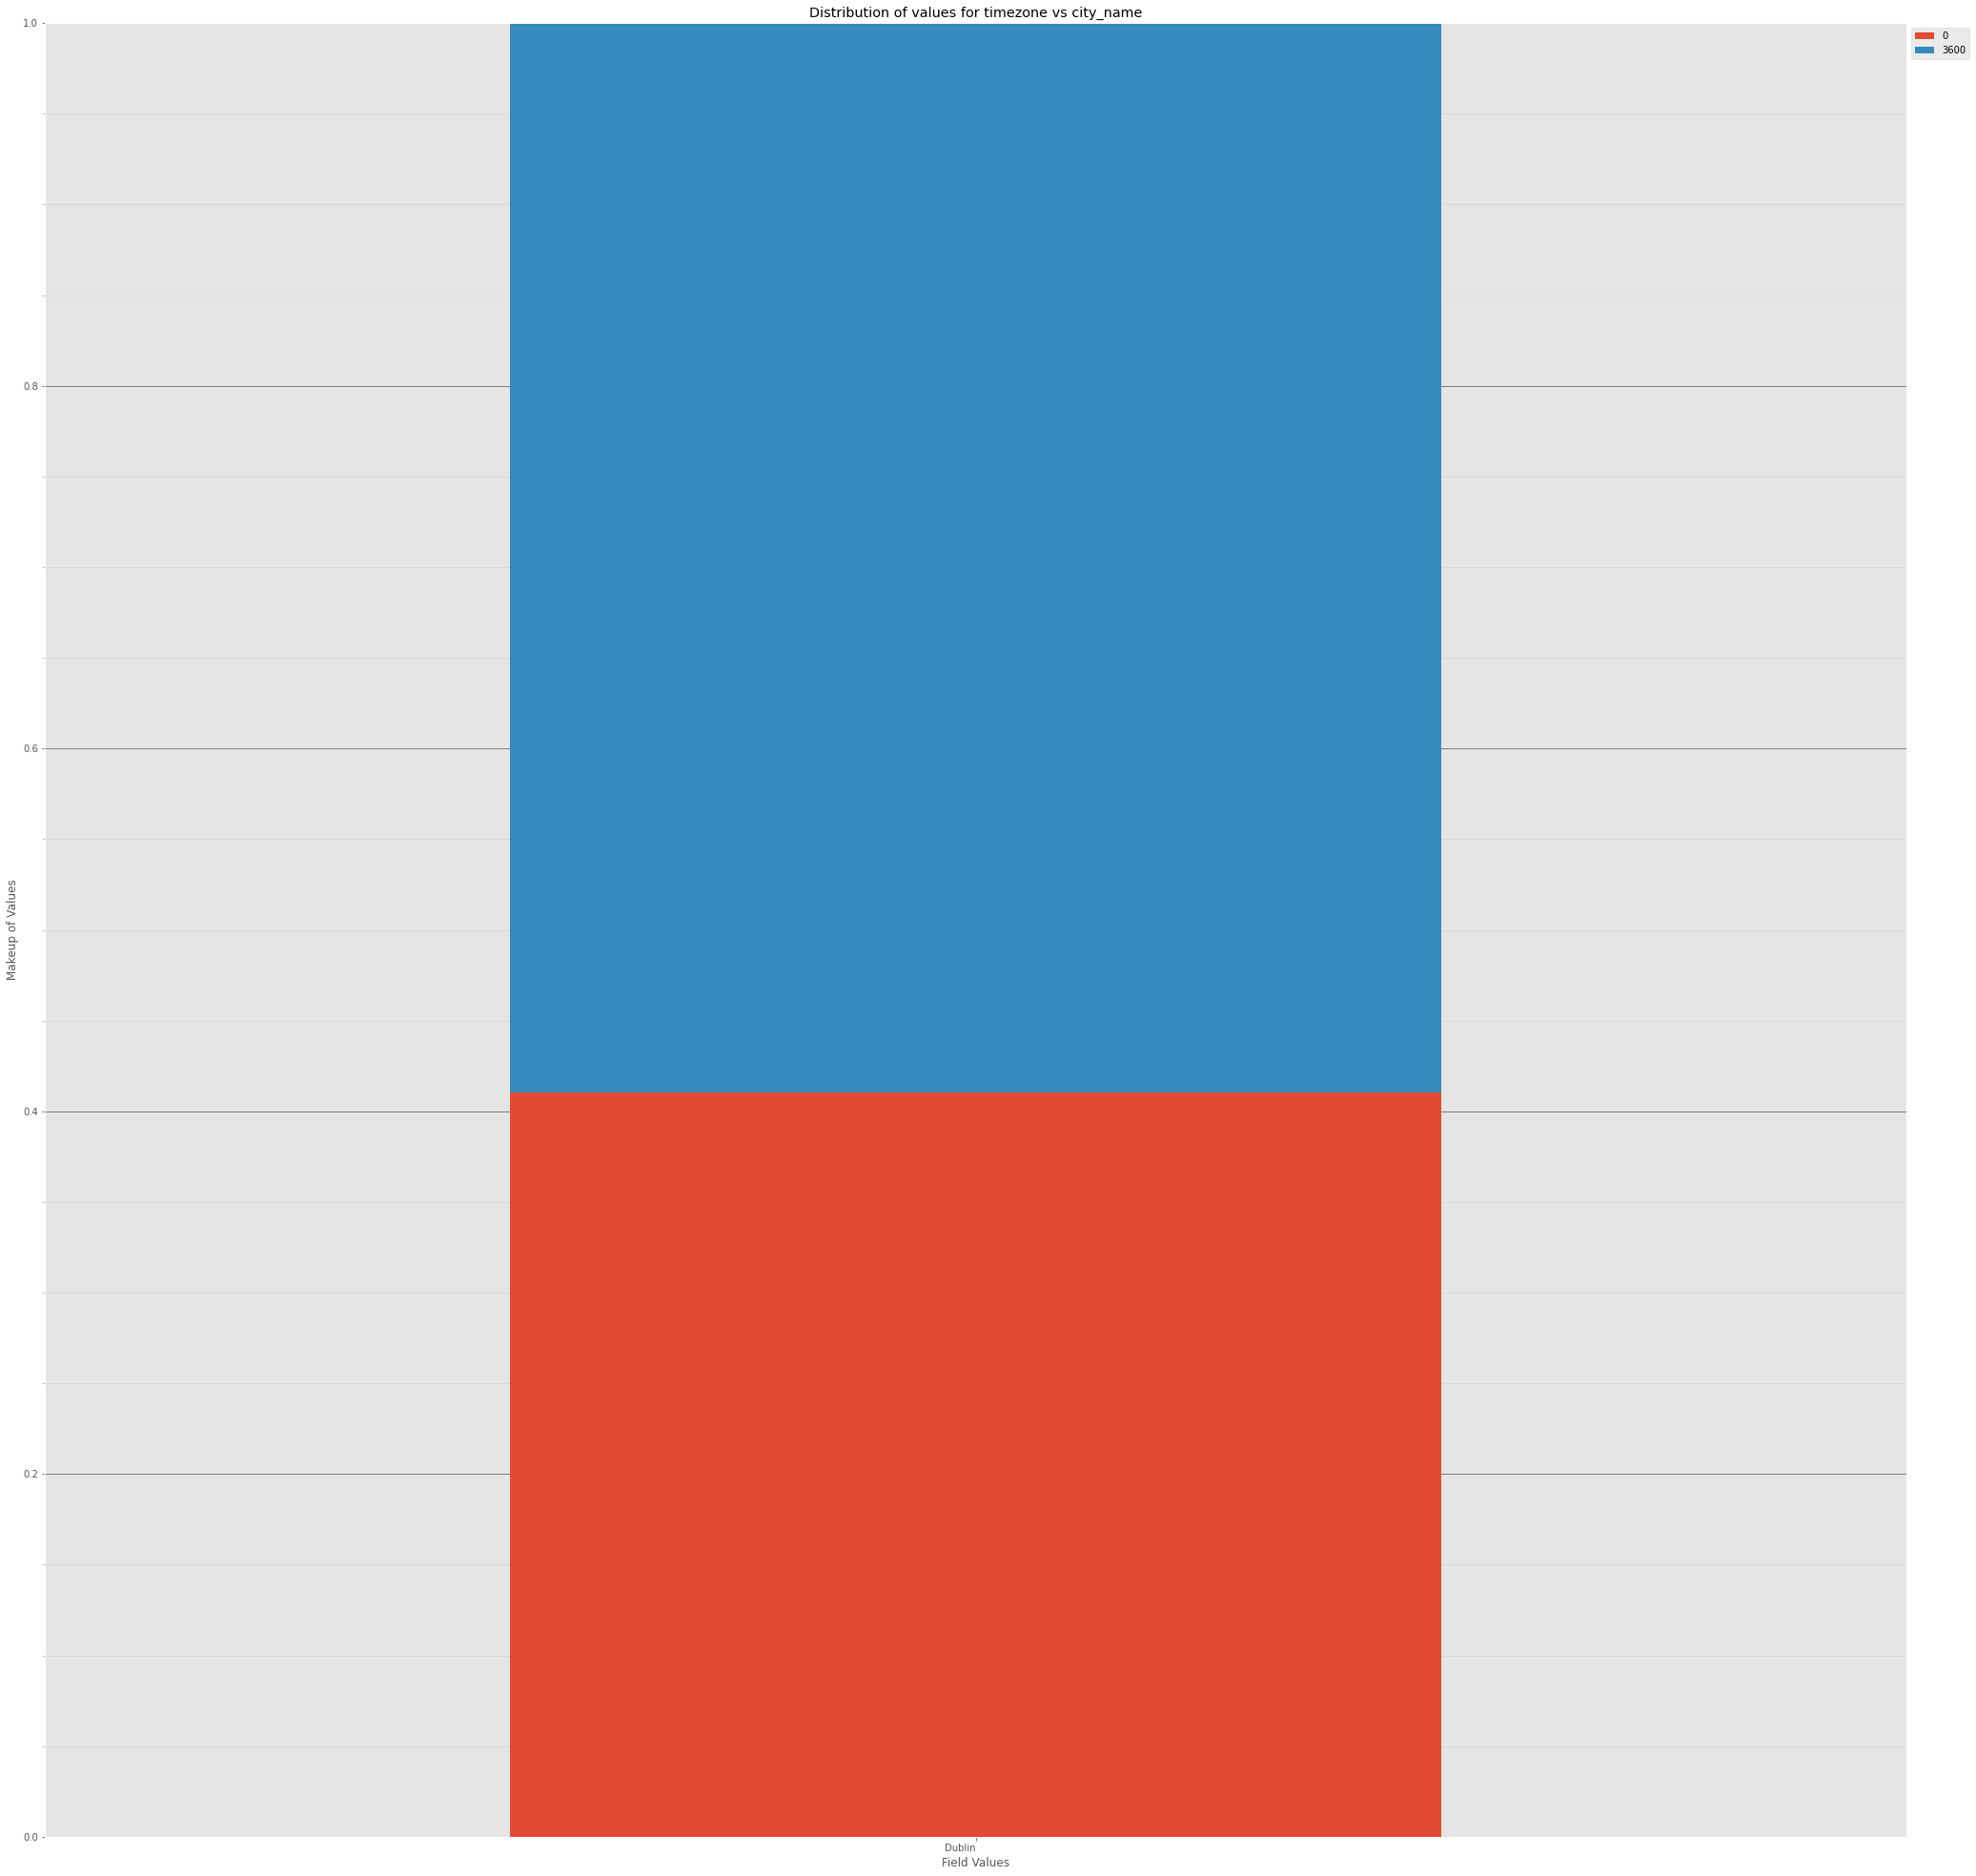



----------------------


Grouping over city_name|clouds_all results in:



Rows  % Frequency
city_name clouds_all                   
Dublin    0            593     6.702080
          1              2     0.022604
          10             1     0.011302
          100            4     0.045208
          11             2     0.022604
          2              4     0.045208
          20          1150    12.997288
          21             1     0.011302
          26             1     0.011302
          3              1     0.011302
          40          1303    14.726492
          5              1     0.011302
          69             1     0.011302
          75          5646    63.811031
          83             1     0.011302
          84             1     0.011302
          87             1     0.011302
          90           133     1.503165
          91             1     0.011302
          99             1     0.011302

Non Zero Data:


Rows  % Frequency
city_name clouds_all                   
Dublin    0            593     6.702080
          1              2     0.022604
          10             1     0.011302
          100            4     0.045208
          11             2     0.022604
          2              4     0.045208
          20          1150    12.997288
          21             1     0.011302
          26             1     0.011302
          3              1     0.011302
          40          1303    14.726492
          5              1     0.011302
          69             1     0.011302
          75          5646    63.811031
          83             1     0.011302
          84             1     0.011302
          87             1     0.011302
          90           133     1.503165
          91             1     0.011302
          99             1     0.011302

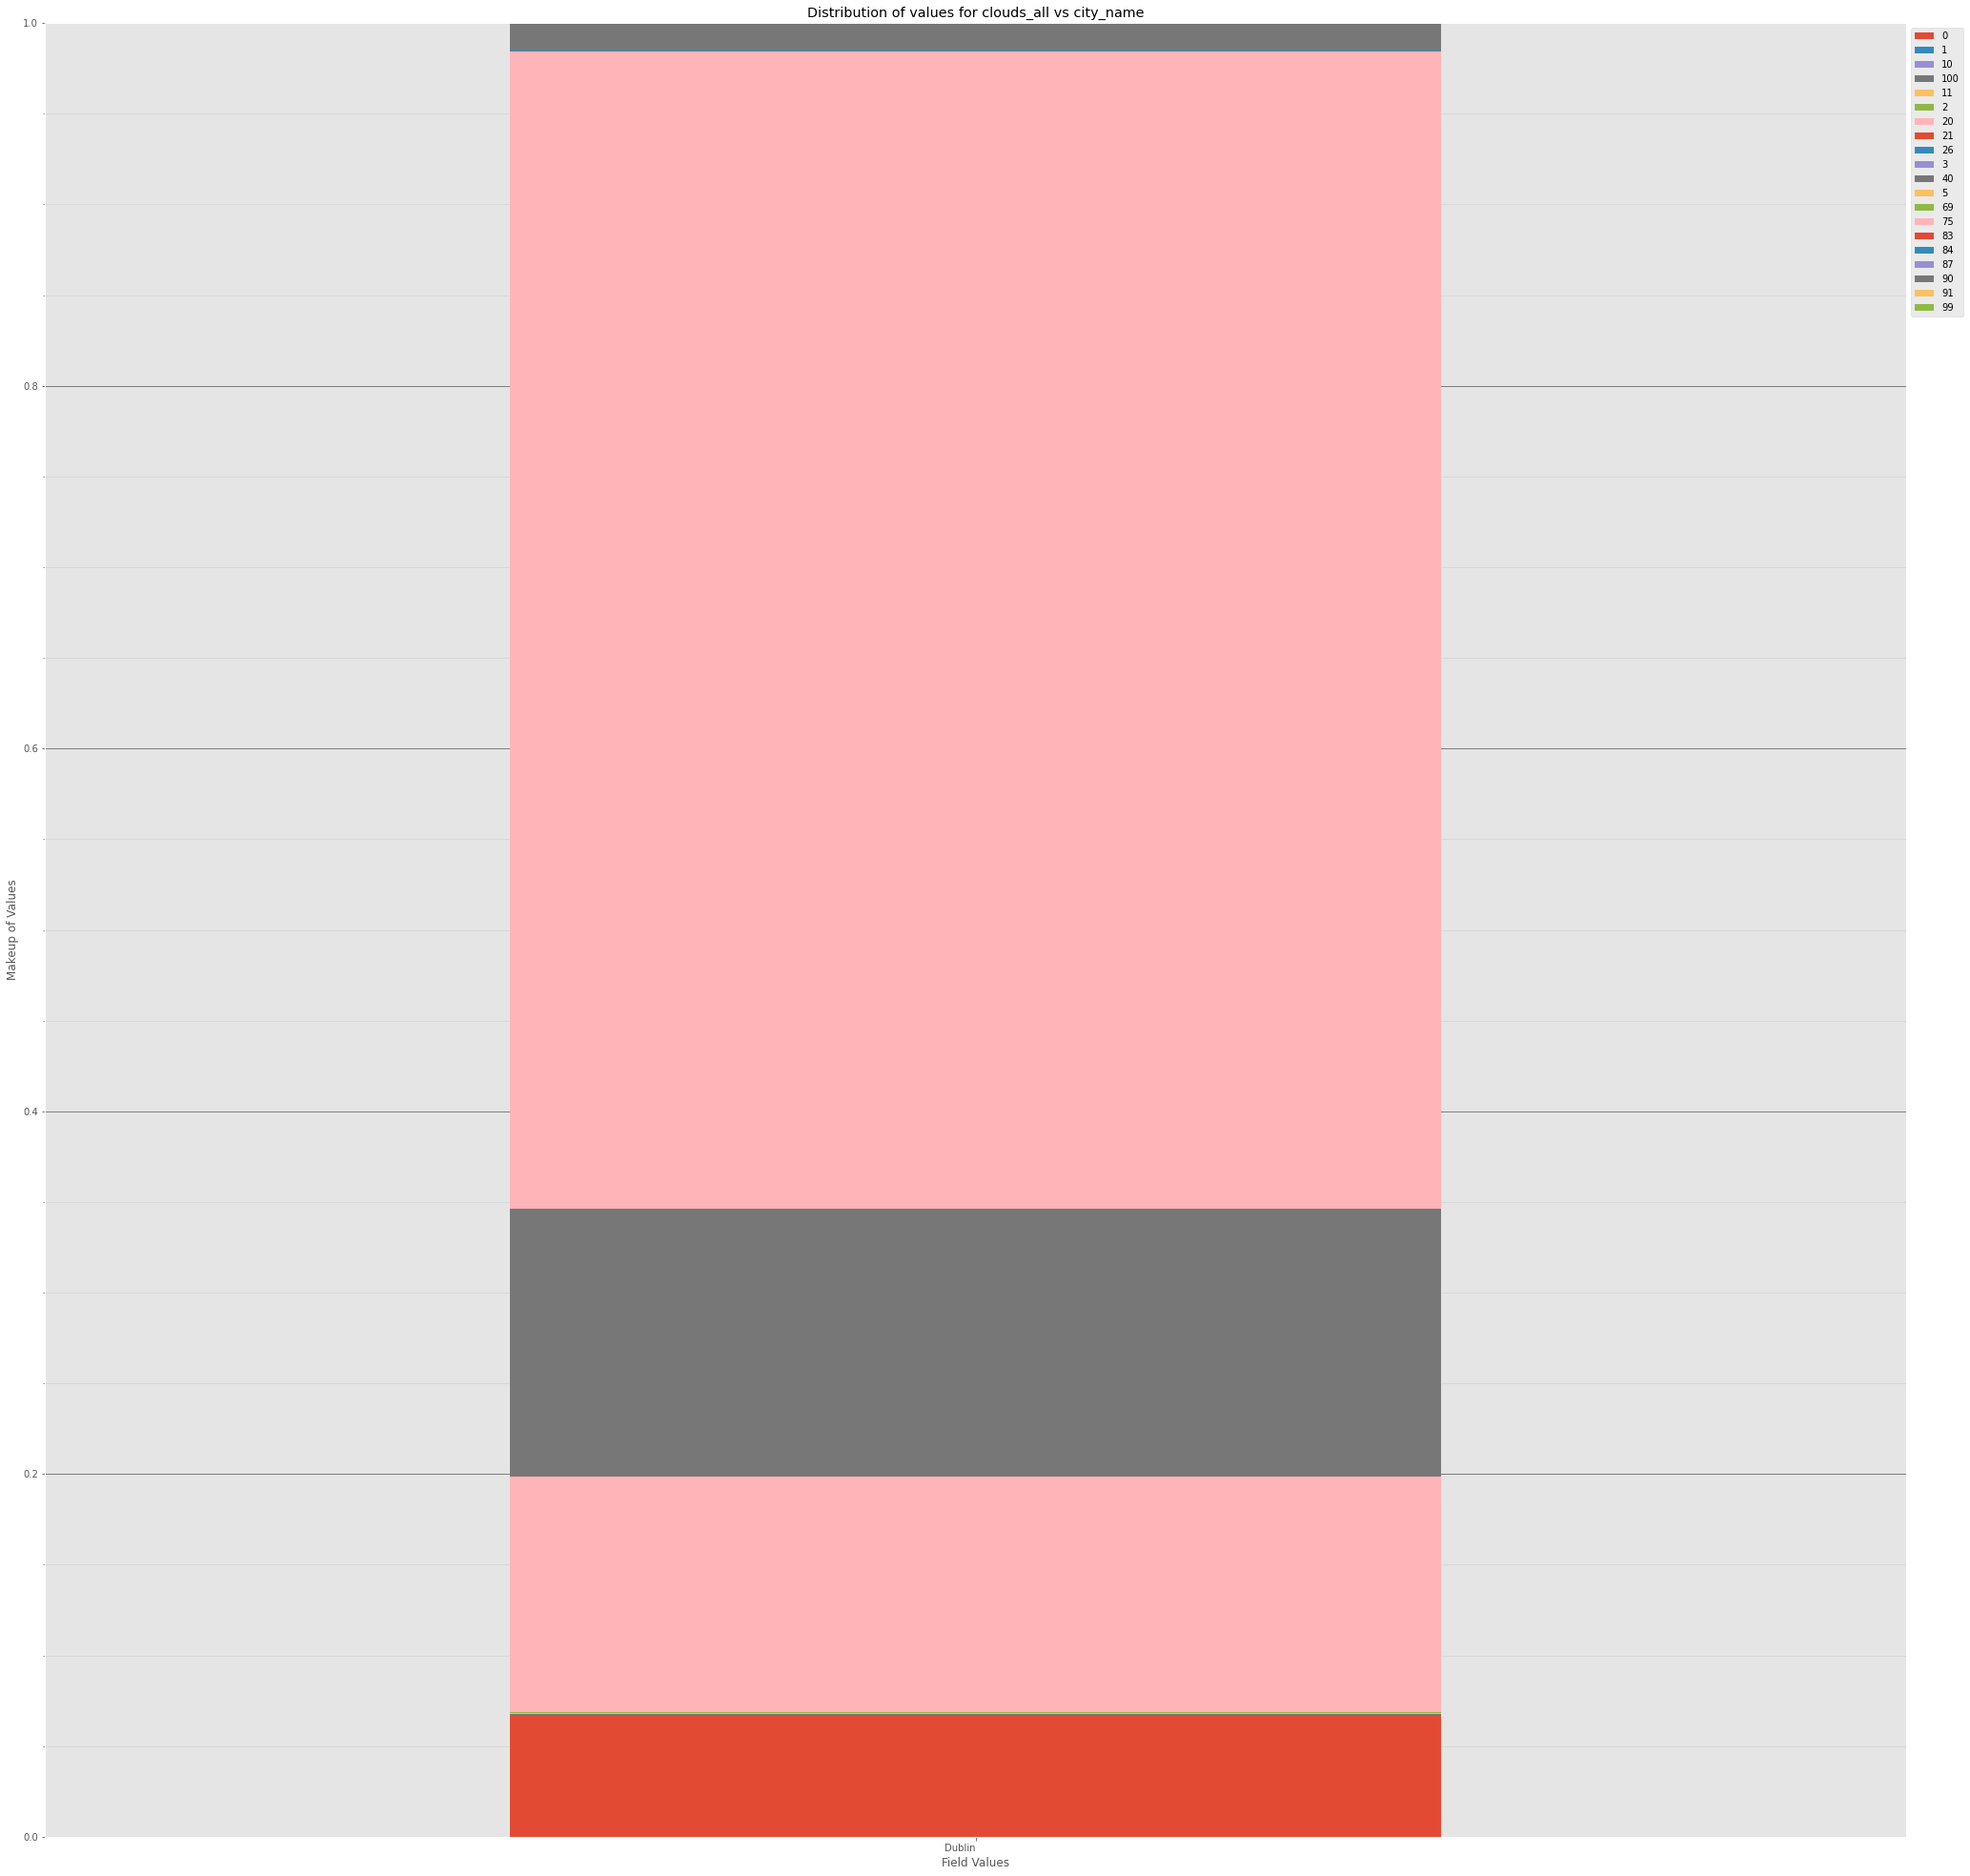



----------------------


Grouping over city_name|weather_id results in:



Rows  % Frequency
city_name weather_id                   
Dublin    300          269     3.040235
          301            4     0.045208
          310          223     2.520344
          311            2     0.022604
          500          609     6.882911
          501           47     0.531193
          502            1     0.011302
          520          228     2.576854
          521          120     1.356239
          600           30     0.339060
          601            7     0.079114
          612           11     0.124322
          615            1     0.011302
          620           66     0.745931
          621            1     0.011302
          701           77     0.870253
          711            1     0.011302
          741           89     1.005877
          800          602     6.803797
          801         1121    12.669530
          802         1223    13.822333
          803         4061    45.897378
          804           55     0.621609

Non Zero Data:


Rows  % Frequency
city_name weather_id                   
Dublin    300          269     3.040235
          301            4     0.045208
          310          223     2.520344
          311            2     0.022604
          500          609     6.882911
          501           47     0.531193
          502            1     0.011302
          520          228     2.576854
          521          120     1.356239
          600           30     0.339060
          601            7     0.079114
          612           11     0.124322
          615            1     0.011302
          620           66     0.745931
          621            1     0.011302
          701           77     0.870253
          711            1     0.011302
          741           89     1.005877
          800          602     6.803797
          801         1121    12.669530
          802         1223    13.822333
          803         4061    45.897378
          804           55     0.621609

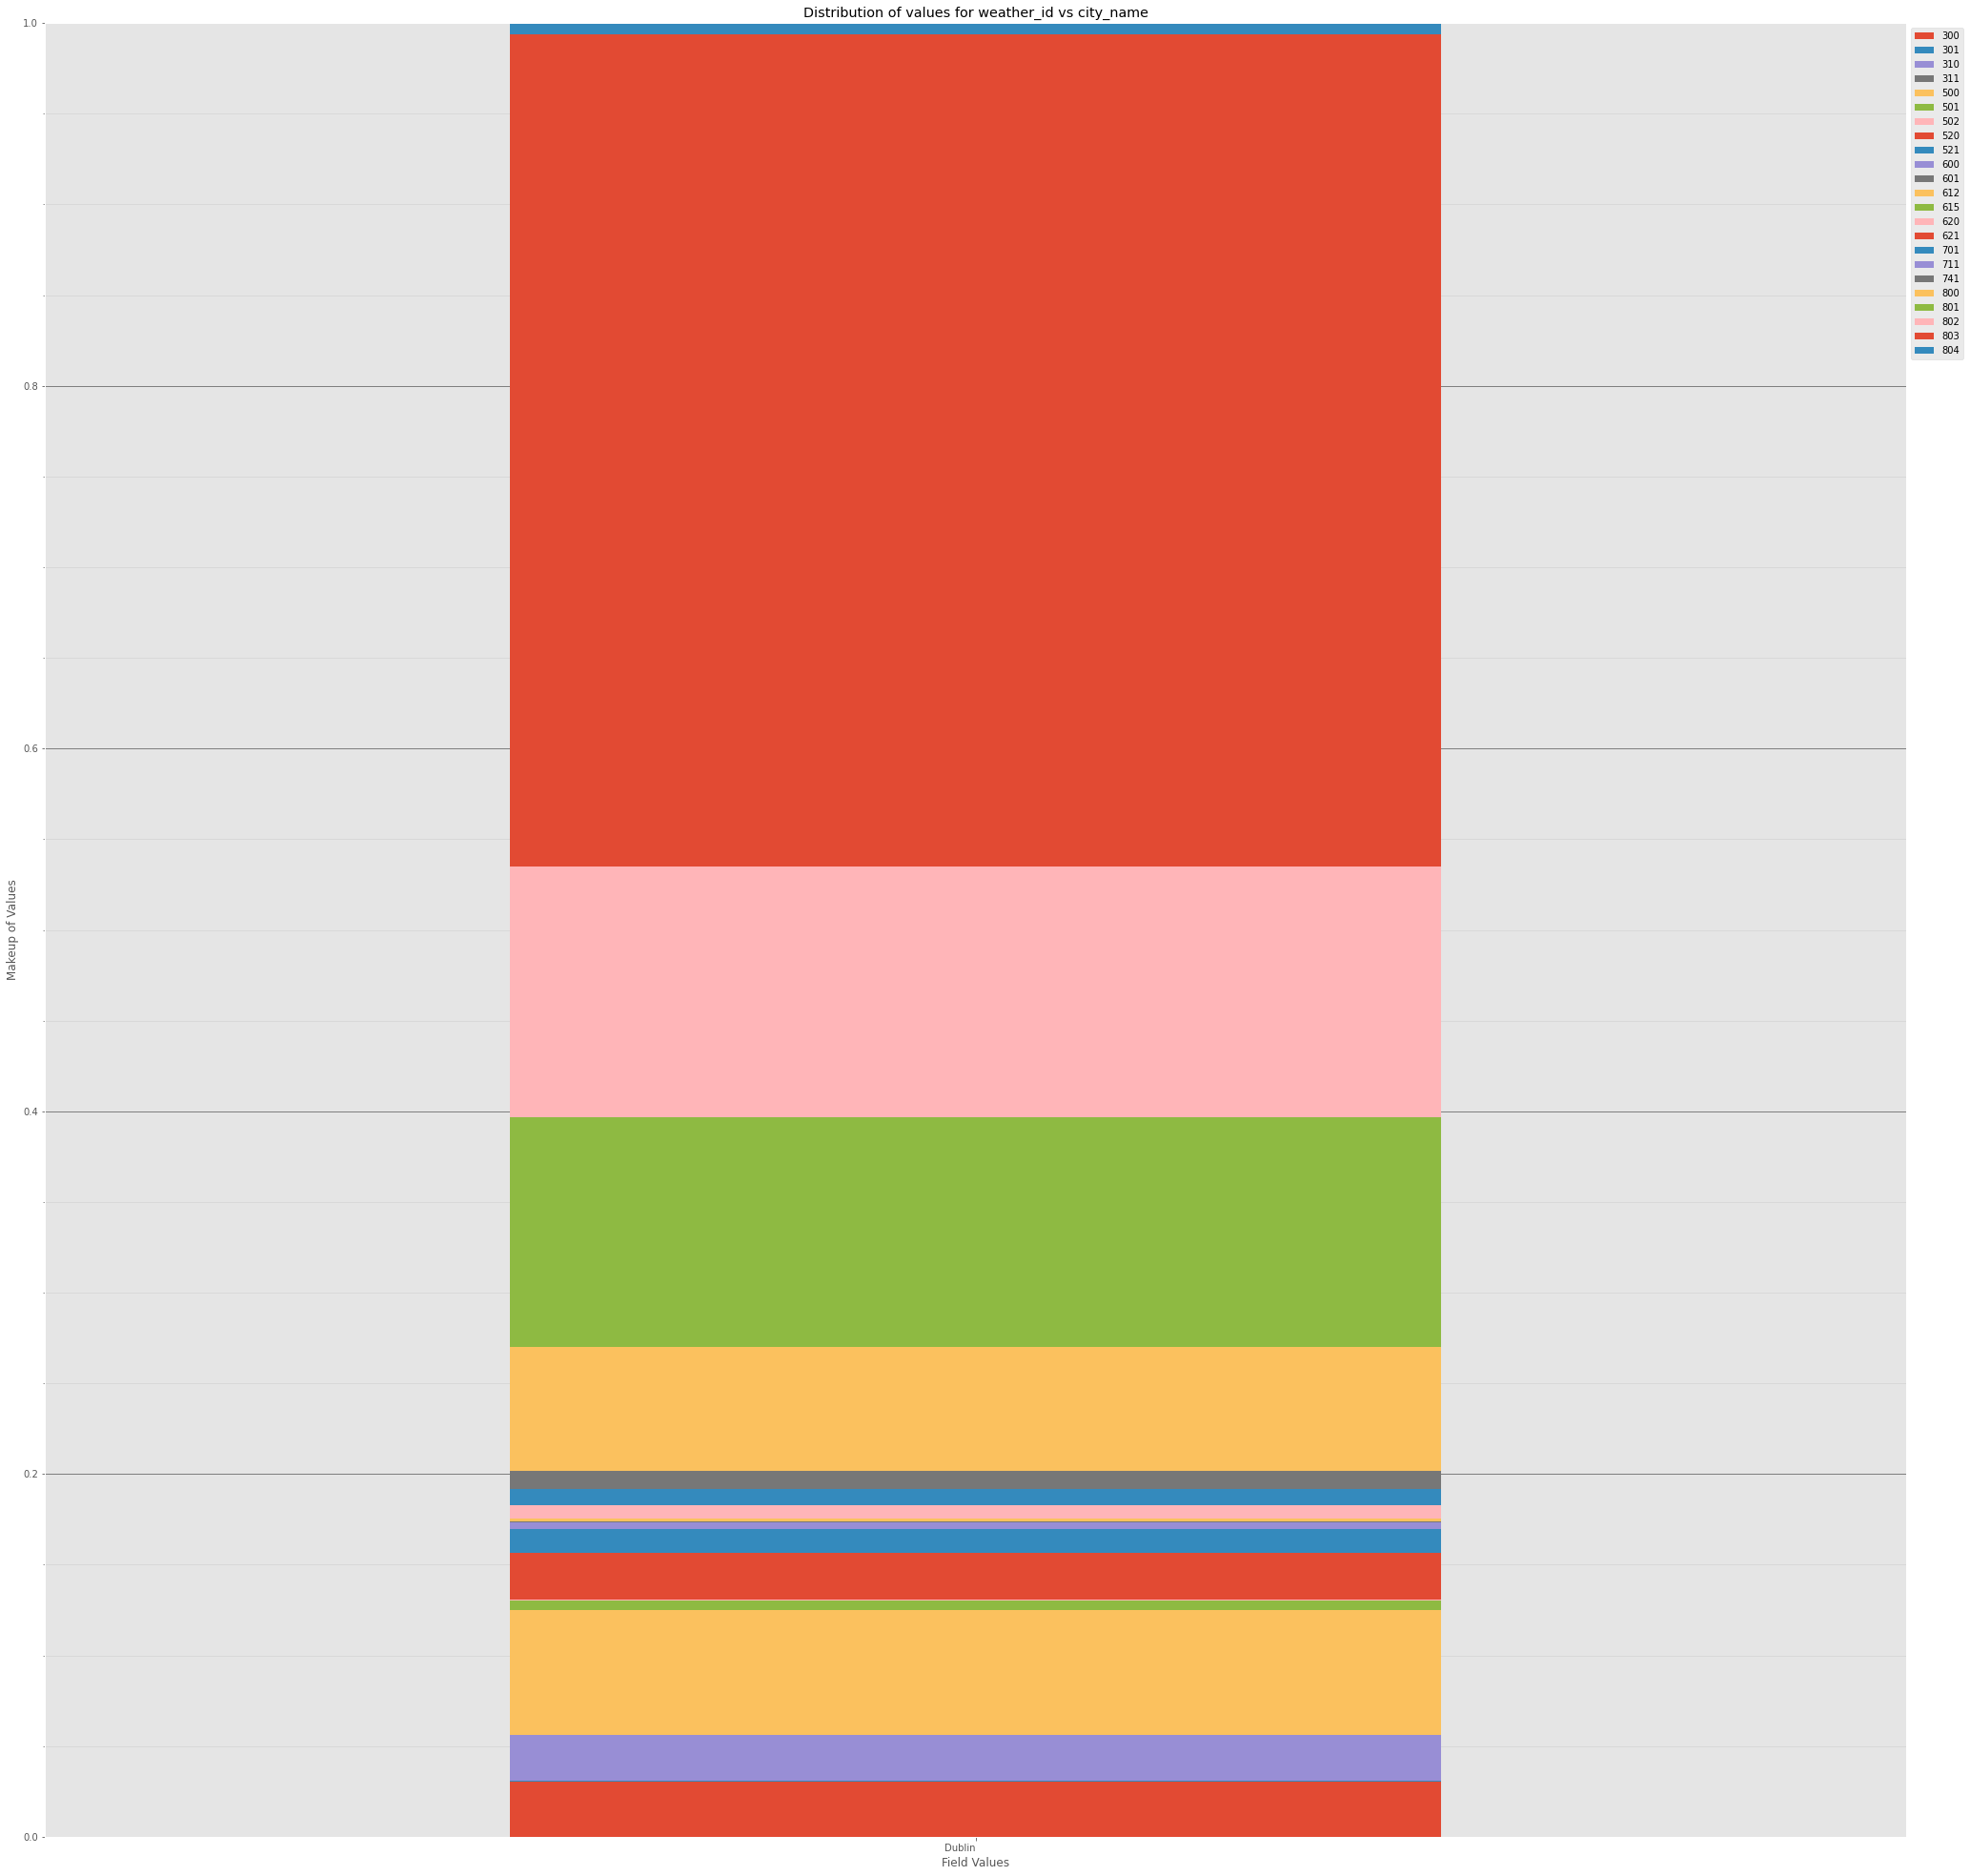



----------------------


Grouping over city_name|weather_description results in:



Rows  % Frequency
city_name weather_description                            
Dublin     light shower sleet             11     0.124322
          broken clouds                 4061    45.897378
          drizzle                          4     0.045208
          few clouds                    1121    12.669530
          fog                             89     1.005877
          heavy intensity rain             1     0.011302
          light intensity drizzle        269     3.040235
          light intensity drizzle rain   223     2.520344
          light intensity shower rain    228     2.576854
          light rain                     609     6.882911
          light rain and snow              1     0.011302
          light shower snow               66     0.745931
          light snow                      30     0.339060
          mist                            77     0.870253
          moderate rain                   47     0.531193
          overcast clouds                 55     0.621609
          proximity shower rain          118     1.333635
          rain and drizzle                 2     0.022604
          scattered clouds              1223    13.822333
          shower rain                      2     0.022604
          shower snow                      1     0.011302
          sky is clear                   602     6.803797
          smoke                            1     0.011302
          snow                             7     0.079114

Non Zero Data:


Rows  % Frequency
city_name weather_description                            
Dublin     light shower sleet             11     0.124322
          broken clouds                 4061    45.897378
          drizzle                          4     0.045208
          few clouds                    1121    12.669530
          fog                             89     1.005877
          heavy intensity rain             1     0.011302
          light intensity drizzle        269     3.040235
          light intensity drizzle rain   223     2.520344
          light intensity shower rain    228     2.576854
          light rain                     609     6.882911
          light rain and snow              1     0.011302
          light shower snow               66     0.745931
          light snow                      30     0.339060
          mist                            77     0.870253
          moderate rain                   47     0.531193
          overcast clouds                 55     0.621609
          proximity shower rain          118     1.333635
          rain and drizzle                 2     0.022604
          scattered clouds              1223    13.822333
          shower rain                      2     0.022604
          shower snow                      1     0.011302
          sky is clear                   602     6.803797
          smoke                            1     0.011302
          snow                             7     0.079114

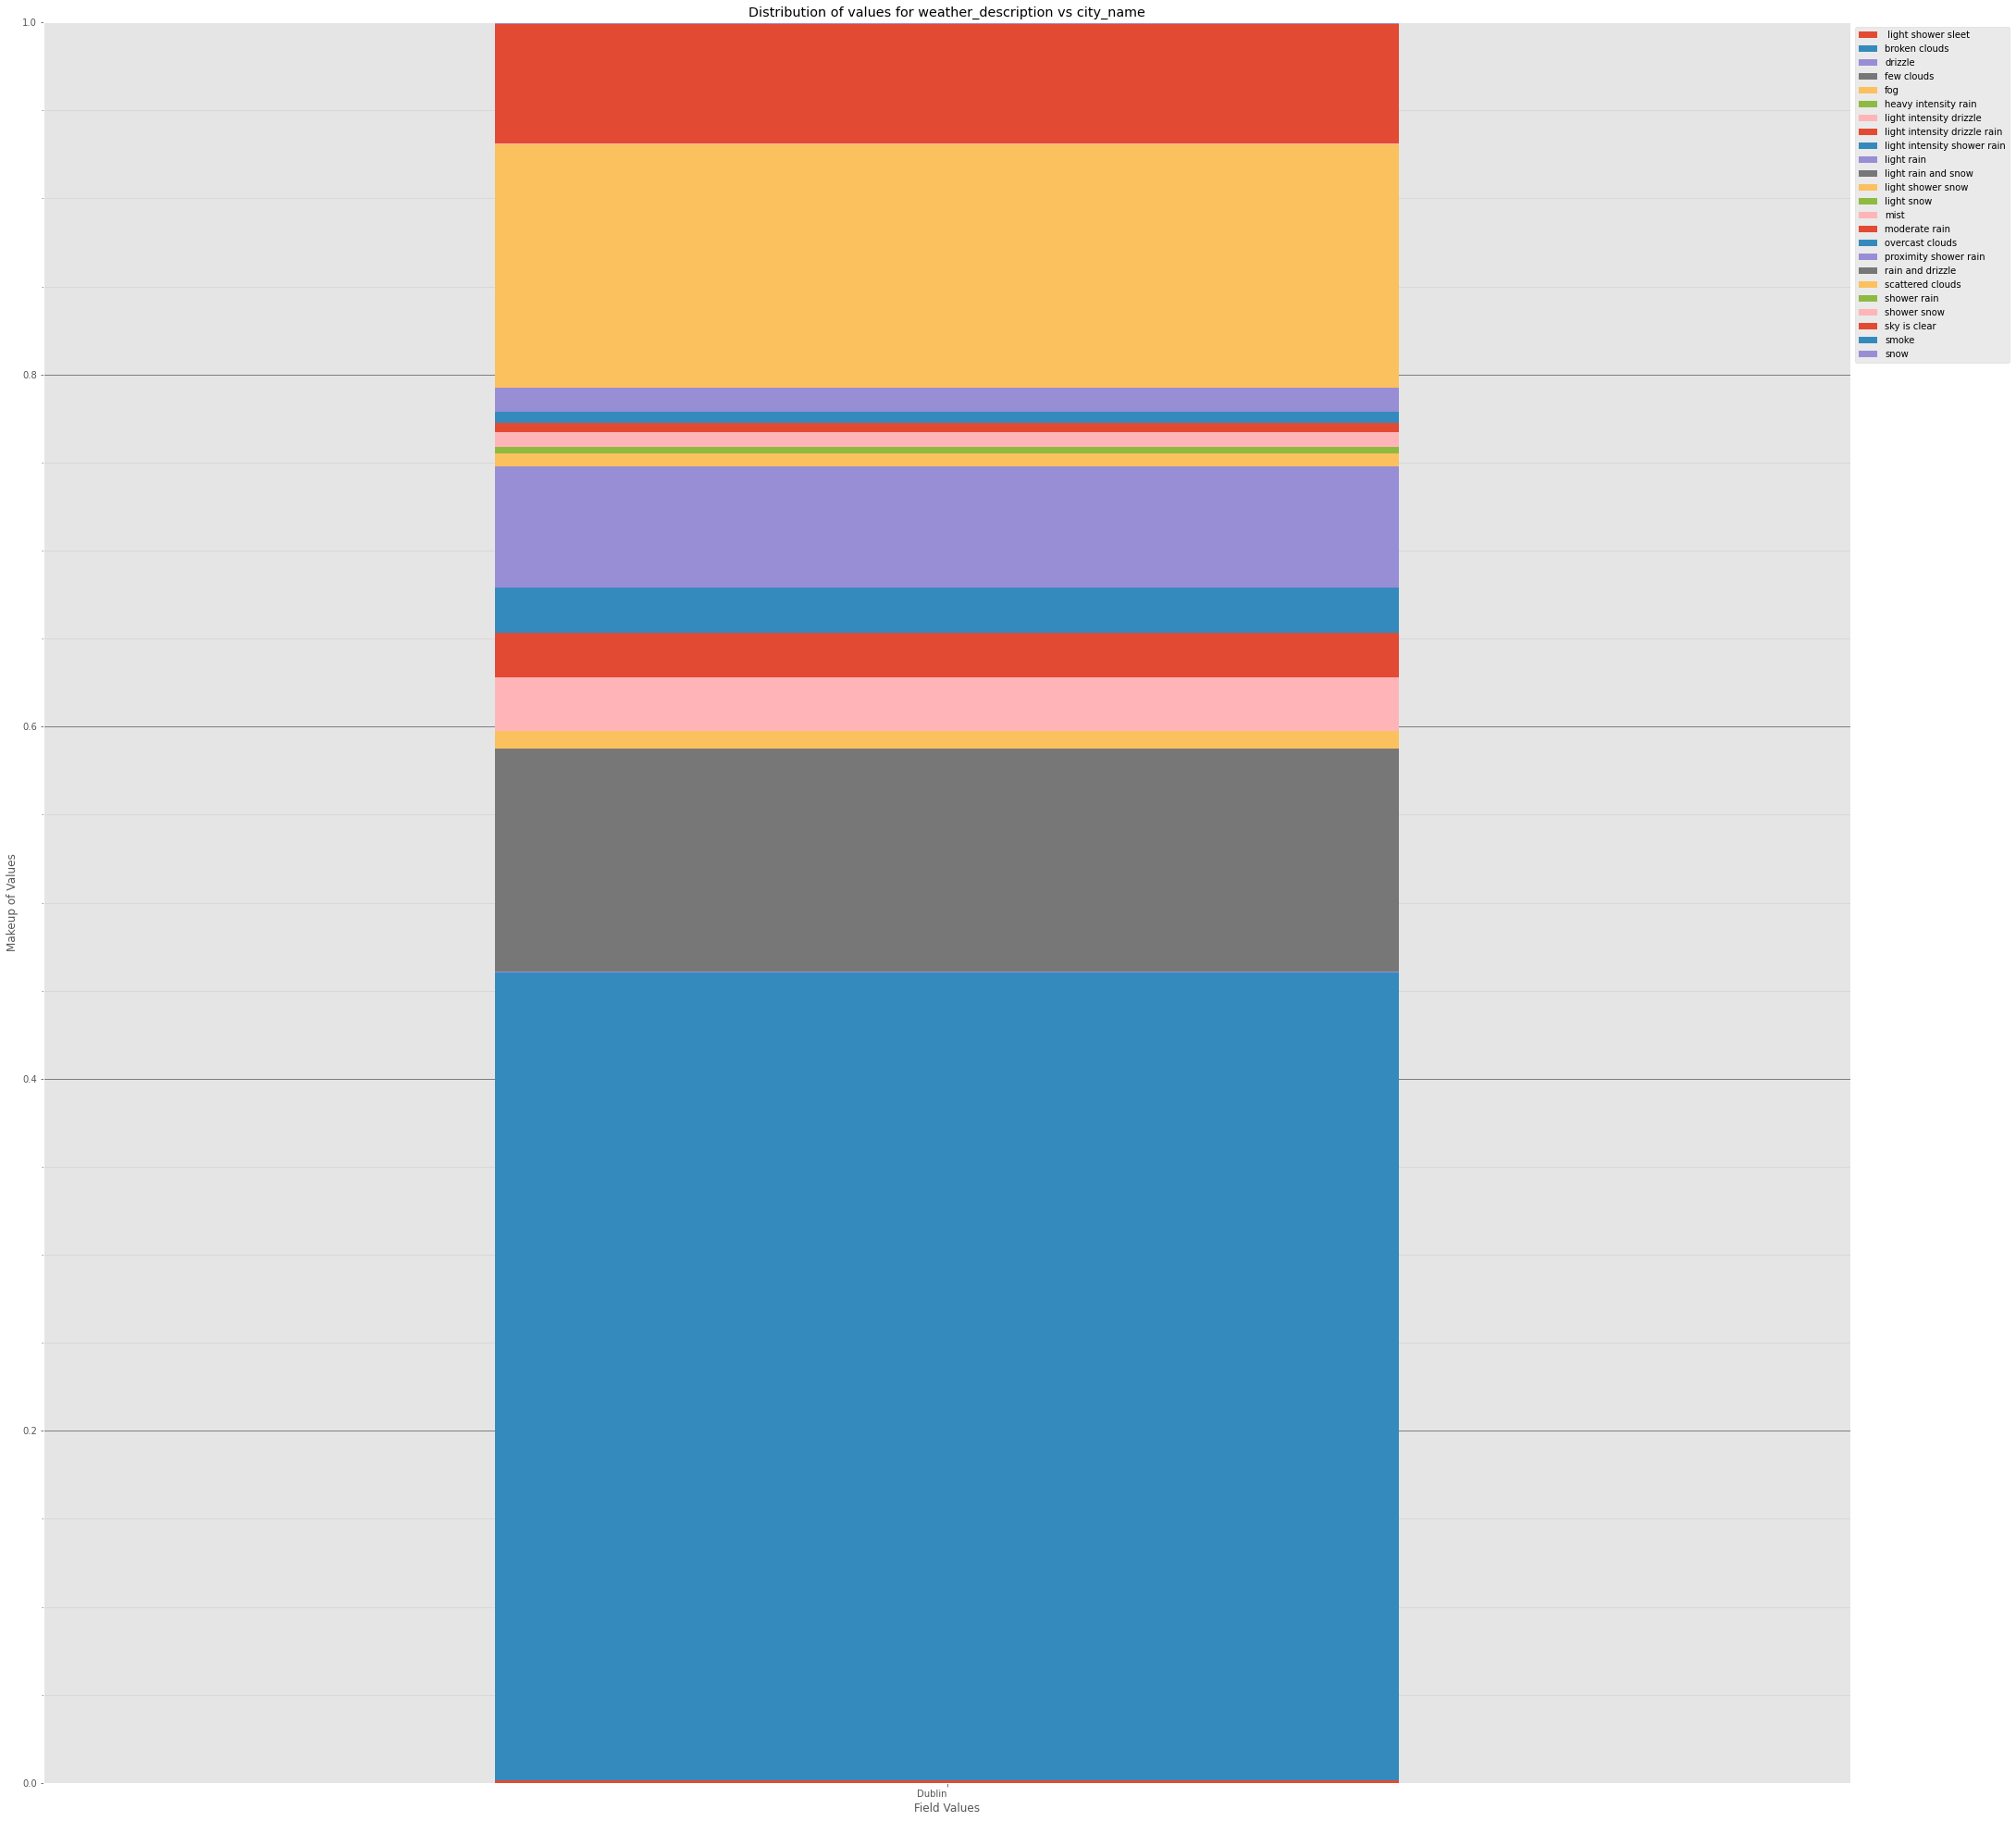



----------------------


Grouping over city_name|weather_icon results in:



Rows  % Frequency
city_name weather_icon                   
Dublin    01d            237     2.678571
          01n            365     4.125226
          02d            547     6.182188
          02n            574     6.487342
          03d            645     7.289783
          03n            578     6.532550
          04d           2234    25.248644
          04n           1882    21.270344
          09d            463     5.232821
          09n            383     4.328662
          10d            274     3.096745
          10n            383     4.328662
          13d             44     0.497288
          13n             72     0.813743
          50d             69     0.779837
          50n             98     1.107595

Non Zero Data:


Rows  % Frequency
city_name weather_icon                   
Dublin    01d            237     2.678571
          01n            365     4.125226
          02d            547     6.182188
          02n            574     6.487342
          03d            645     7.289783
          03n            578     6.532550
          04d           2234    25.248644
          04n           1882    21.270344
          09d            463     5.232821
          09n            383     4.328662
          10d            274     3.096745
          10n            383     4.328662
          13d             44     0.497288
          13n             72     0.813743
          50d             69     0.779837
          50n             98     1.107595

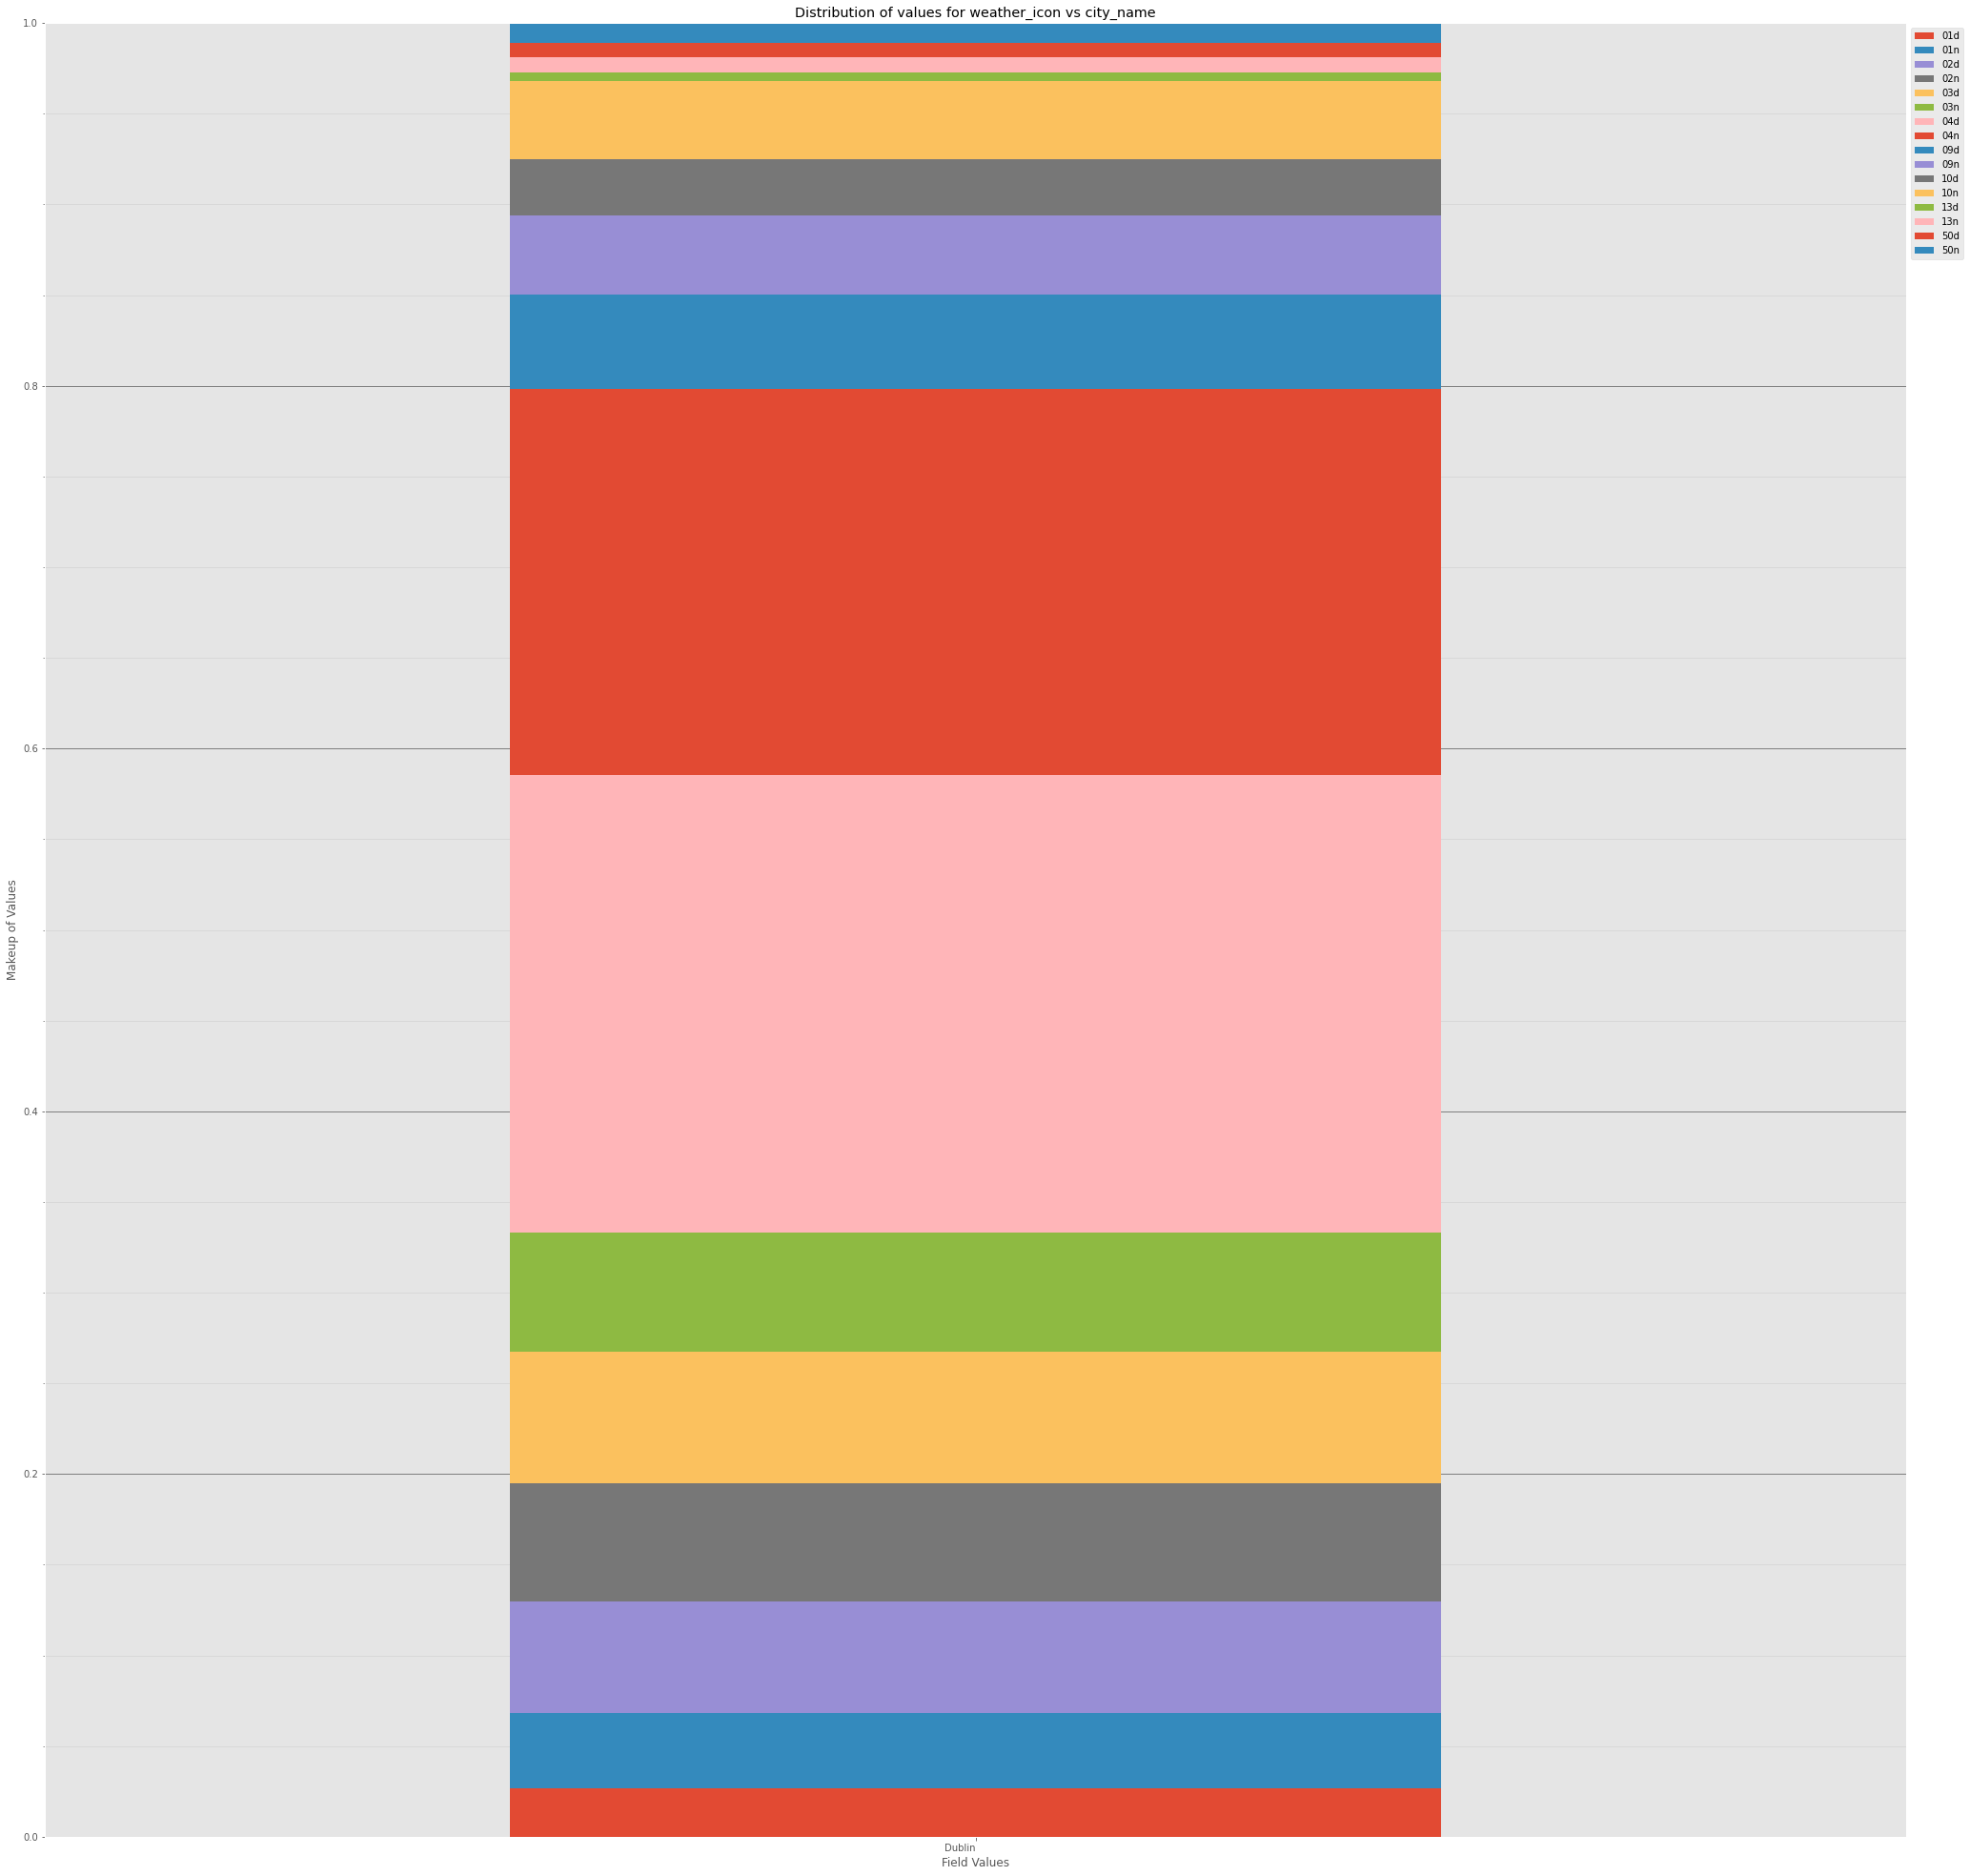



----------------------


Grouping over clouds_all|timezone results in:



Rows  % Frequency
clouds_all timezone                   
0          0          109     1.231917
           3600       484     5.470163
1          0            2     0.022604
           3600         0     0.000000
10         0            1     0.011302
           3600         0     0.000000
100        0            2     0.022604
           3600         2     0.022604
11         0            2     0.022604
           3600         0     0.000000
2          0            4     0.045208
           3600         0     0.000000
20         0          419     4.735533
           3600       731     8.261754
21         0            1     0.011302
           3600         0     0.000000
26         0            1     0.011302
           3600         0     0.000000
3          0            1     0.011302
           3600         0     0.000000
40         0          534     6.035262
           3600       769     8.691230
5          0            1     0.011302
           3600         0     0.000000
69         0            1     0.011302
           3600         0     0.000000
75         0         2472    27.938517
           3600      3174    35.872514
83         0            1     0.011302
           3600         0     0.000000
84         0            1     0.011302
           3600         0     0.000000
87         0            0     0.000000
           3600         1     0.011302
90         0           75     0.847649
           3600        58     0.655515
91         0            1     0.011302
           3600         0     0.000000
99         0            1     0.011302
           3600         0     0.000000

Non Zero Data:


Rows  % Frequency
clouds_all timezone                   
0          0          109     1.231917
           3600       484     5.470163
1          0            2     0.022604
10         0            1     0.011302
100        0            2     0.022604
           3600         2     0.022604
11         0            2     0.022604
2          0            4     0.045208
20         0          419     4.735533
           3600       731     8.261754
21         0            1     0.011302
26         0            1     0.011302
3          0            1     0.011302
40         0          534     6.035262
           3600       769     8.691230
5          0            1     0.011302
69         0            1     0.011302
75         0         2472    27.938517
           3600      3174    35.872514
83         0            1     0.011302
84         0            1     0.011302
87         3600         1     0.011302
90         0           75     0.847649
           3600        58     0.655515
91         0            1     0.011302
99         0            1     0.011302

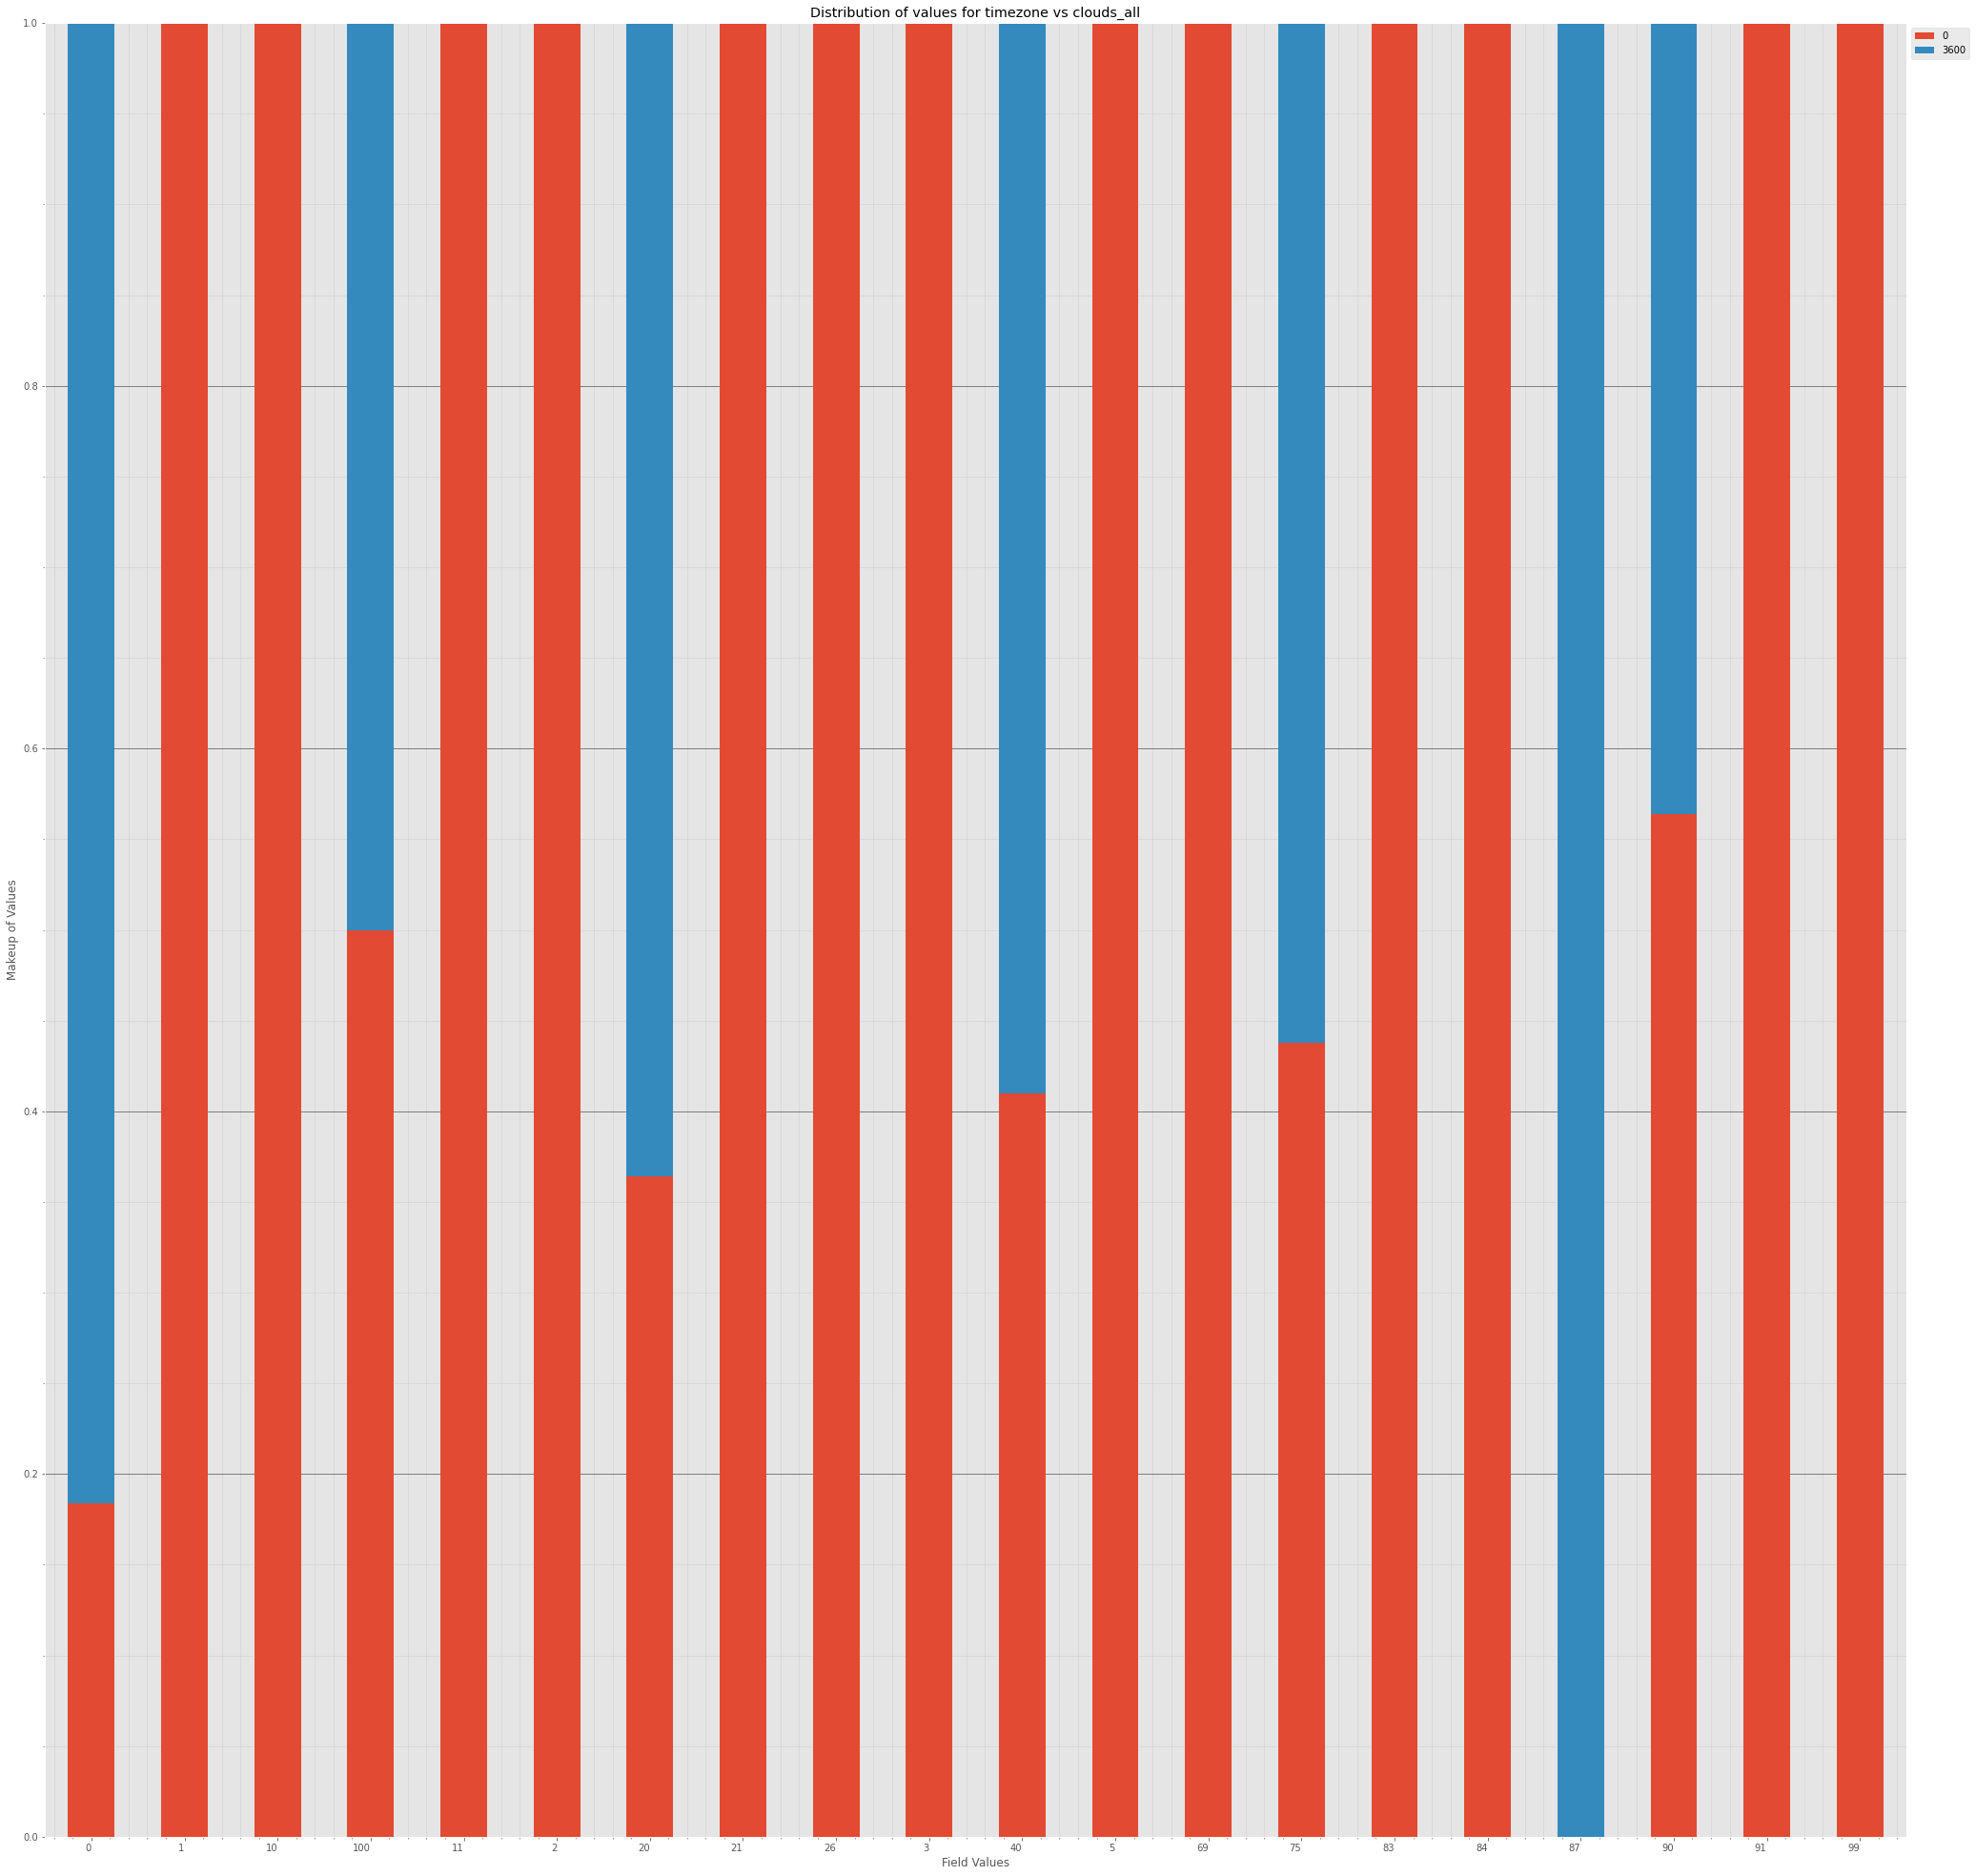



----------------------


Grouping over clouds_all|city_name results in:



Rows  % Frequency
clouds_all city_name                   
0          Dublin      593     6.702080
1          Dublin        2     0.022604
10         Dublin        1     0.011302
100        Dublin        4     0.045208
11         Dublin        2     0.022604
2          Dublin        4     0.045208
20         Dublin     1150    12.997288
21         Dublin        1     0.011302
26         Dublin        1     0.011302
3          Dublin        1     0.011302
40         Dublin     1303    14.726492
5          Dublin        1     0.011302
69         Dublin        1     0.011302
75         Dublin     5646    63.811031
83         Dublin        1     0.011302
84         Dublin        1     0.011302
87         Dublin        1     0.011302
90         Dublin      133     1.503165
91         Dublin        1     0.011302
99         Dublin        1     0.011302

Non Zero Data:


Rows  % Frequency
clouds_all city_name                   
0          Dublin      593     6.702080
1          Dublin        2     0.022604
10         Dublin        1     0.011302
100        Dublin        4     0.045208
11         Dublin        2     0.022604
2          Dublin        4     0.045208
20         Dublin     1150    12.997288
21         Dublin        1     0.011302
26         Dublin        1     0.011302
3          Dublin        1     0.011302
40         Dublin     1303    14.726492
5          Dublin        1     0.011302
69         Dublin        1     0.011302
75         Dublin     5646    63.811031
83         Dublin        1     0.011302
84         Dublin        1     0.011302
87         Dublin        1     0.011302
90         Dublin      133     1.503165
91         Dublin        1     0.011302
99         Dublin        1     0.011302

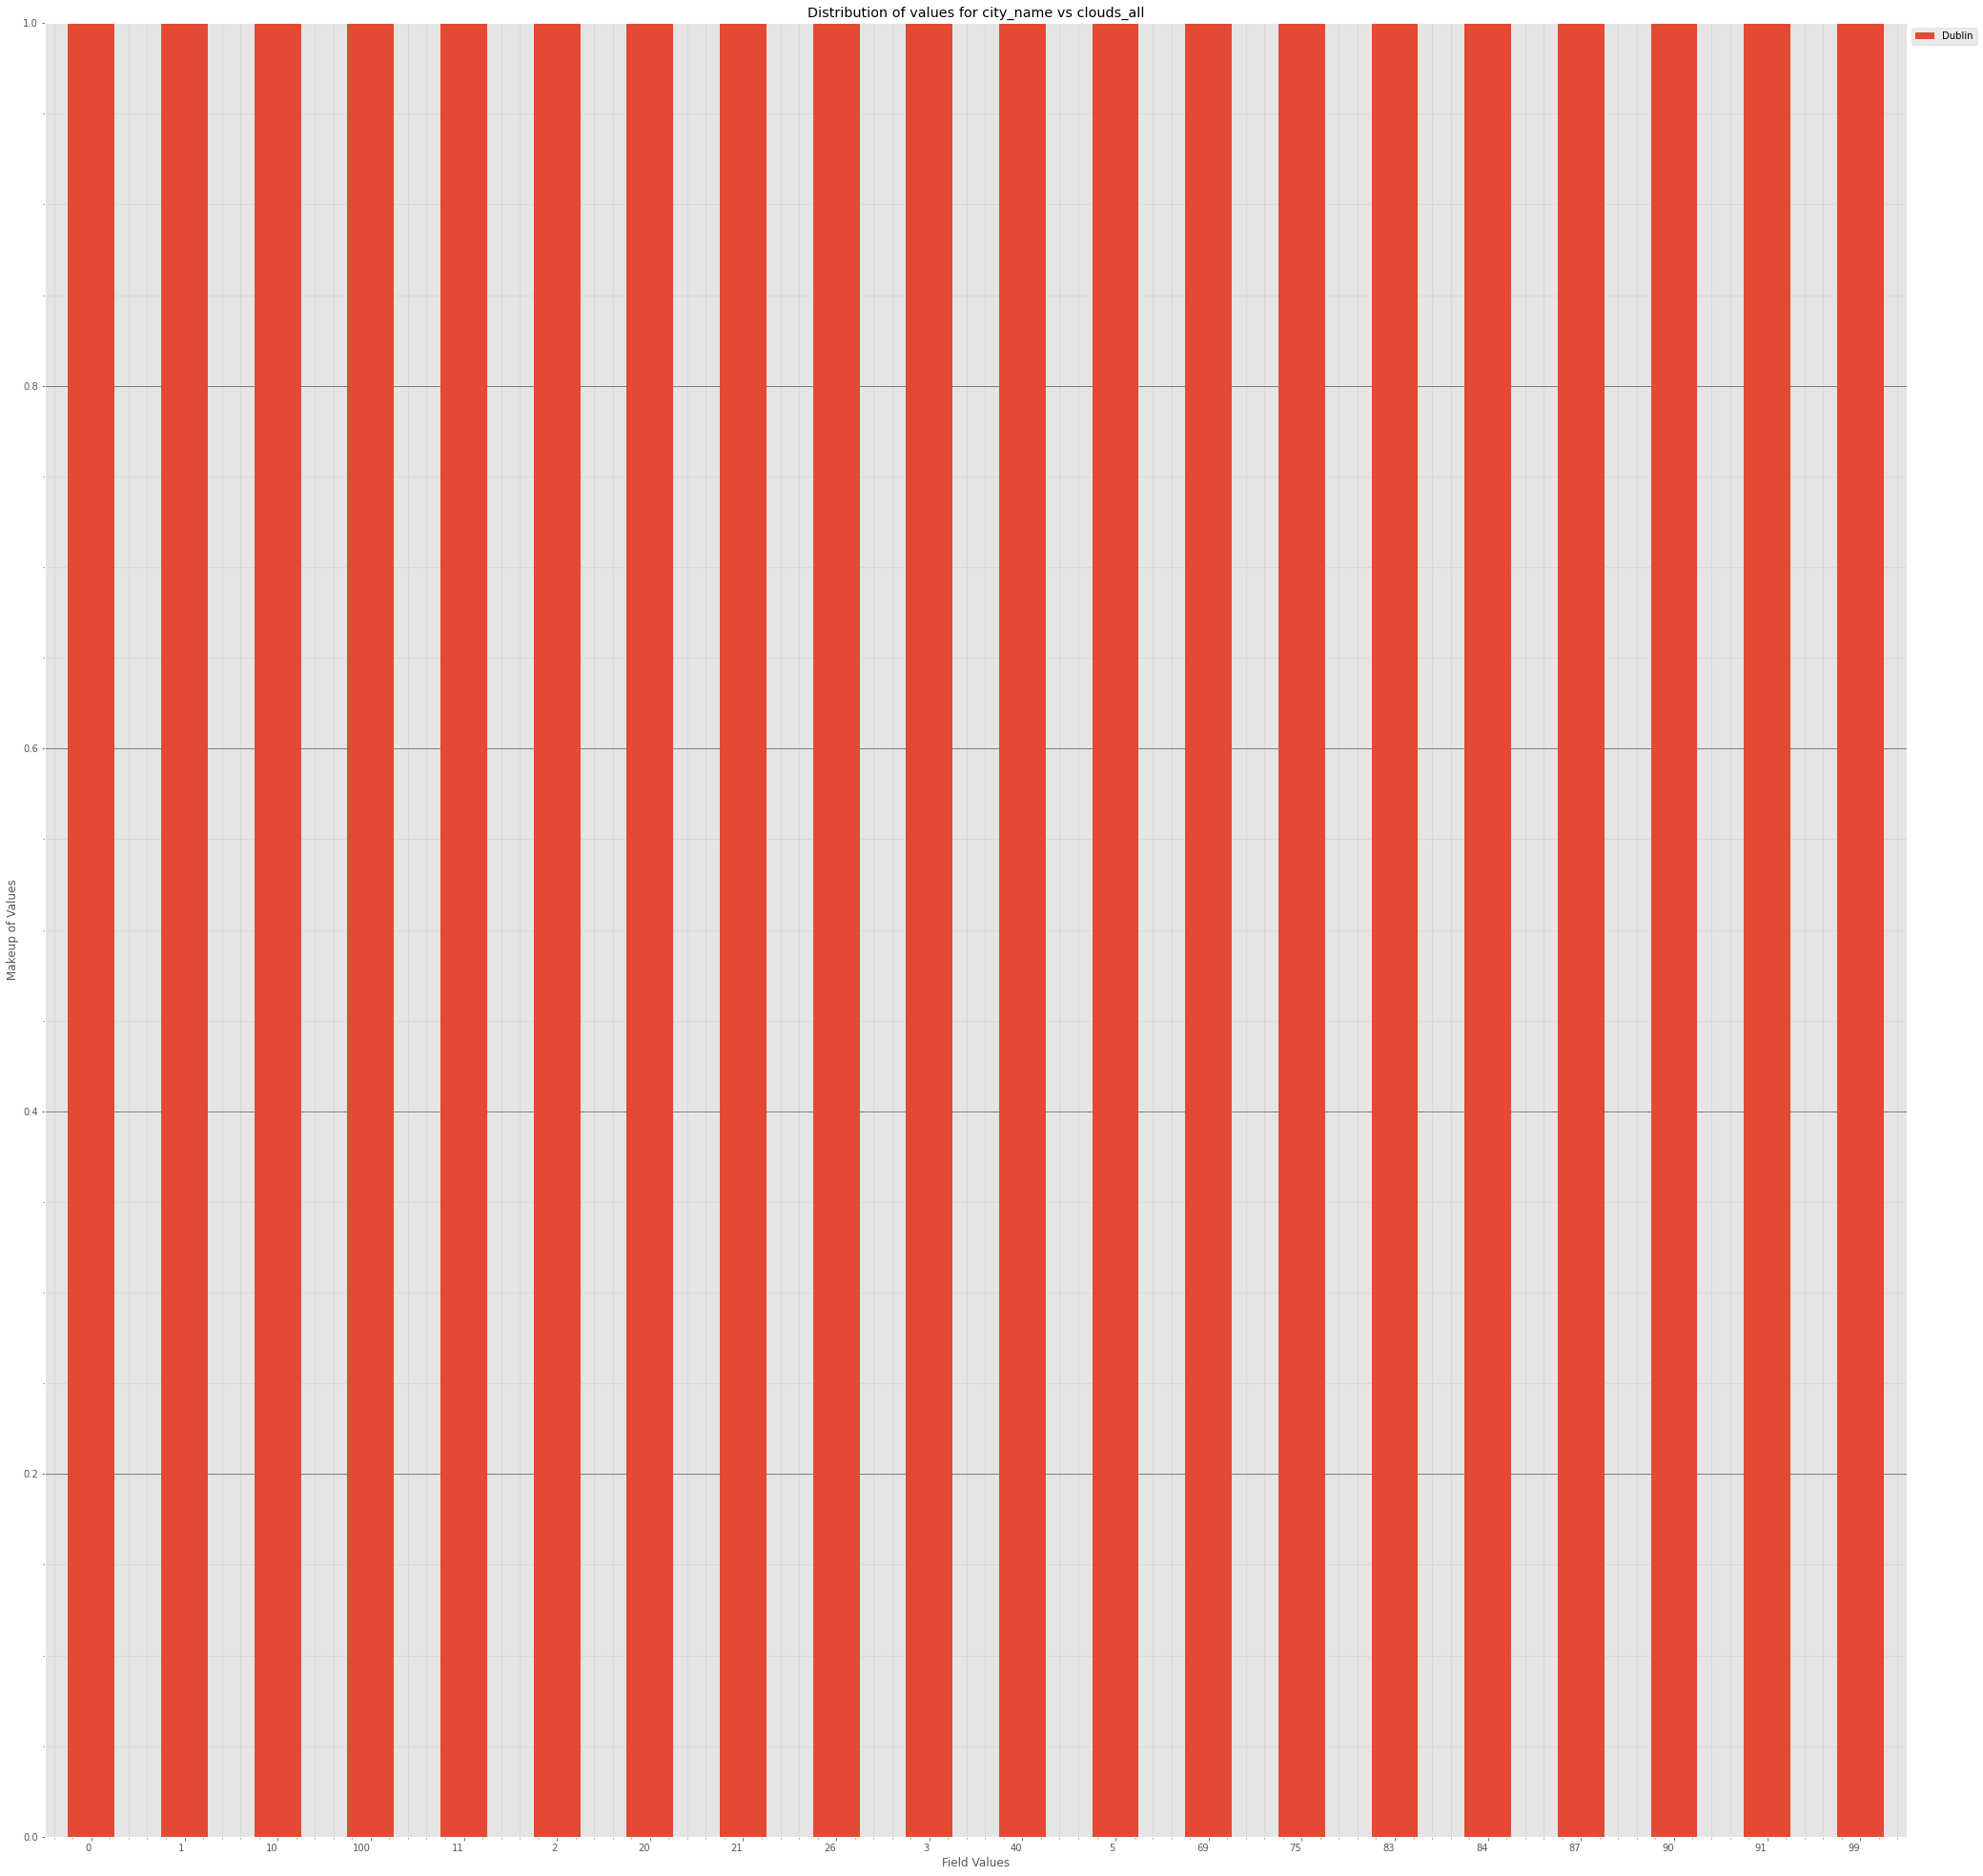



----------------------


Grouping over clouds_all|weather_id results in:



Rows  % Frequency
clouds_all weather_id                   
0          300            0     0.000000
           301            0     0.000000
           310            0     0.000000
           311            0     0.000000
           500            0     0.000000
...                     ...          ...
99         800            0     0.000000
           801            0     0.000000
           802            0     0.000000
           803            0     0.000000
           804            1     0.011302

[460 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
clouds_all weather_id                   
0          800          593     6.702080
1          800            2     0.022604
10         800            1     0.011302
100        300            1     0.011302
           500            1     0.011302
           741            2     0.022604
11         801            2     0.022604
2          800            4     0.045208
20         520            1     0.011302
           521            7     0.079114
           701           10     0.113020
           711            1     0.011302
           741           13     0.146926
           801         1118    12.635624
21         801            1     0.011302
26         802            1     0.011302
3          800            1     0.011302
40         520           38     0.429476
           521           23     0.259946
           612            2     0.022604
           620            2     0.022604
           701            4     0.045208
           741           12     0.135624
           802         1222    13.811031
5          800            1     0.011302
69         803            1     0.011302
75         300          255     2.882007
           301            4     0.045208
           310          208     2.350814
           311            2     0.022604
           500          588     6.645570
           501           42     0.474684
           502            1     0.011302
           520          188     2.124774
           521           90     1.017179
           600           22     0.248644
           601            6     0.067812
           612            9     0.101718
           615            1     0.011302
           620           64     0.723327
           621            1     0.011302
           701           52     0.587703
           741           55     0.621609
           803         4058    45.863472
83         803            1     0.011302
84         803            1     0.011302
87         804            1     0.011302
90         300           13     0.146926
           310           15     0.169530
           500           20     0.226040
           501            5     0.056510
           520            1     0.011302
           600            8     0.090416
           601            1     0.011302
           701           10     0.113020
           741            7     0.079114
           804           53     0.599005
91         701            1     0.011302
99         804            1     0.011302

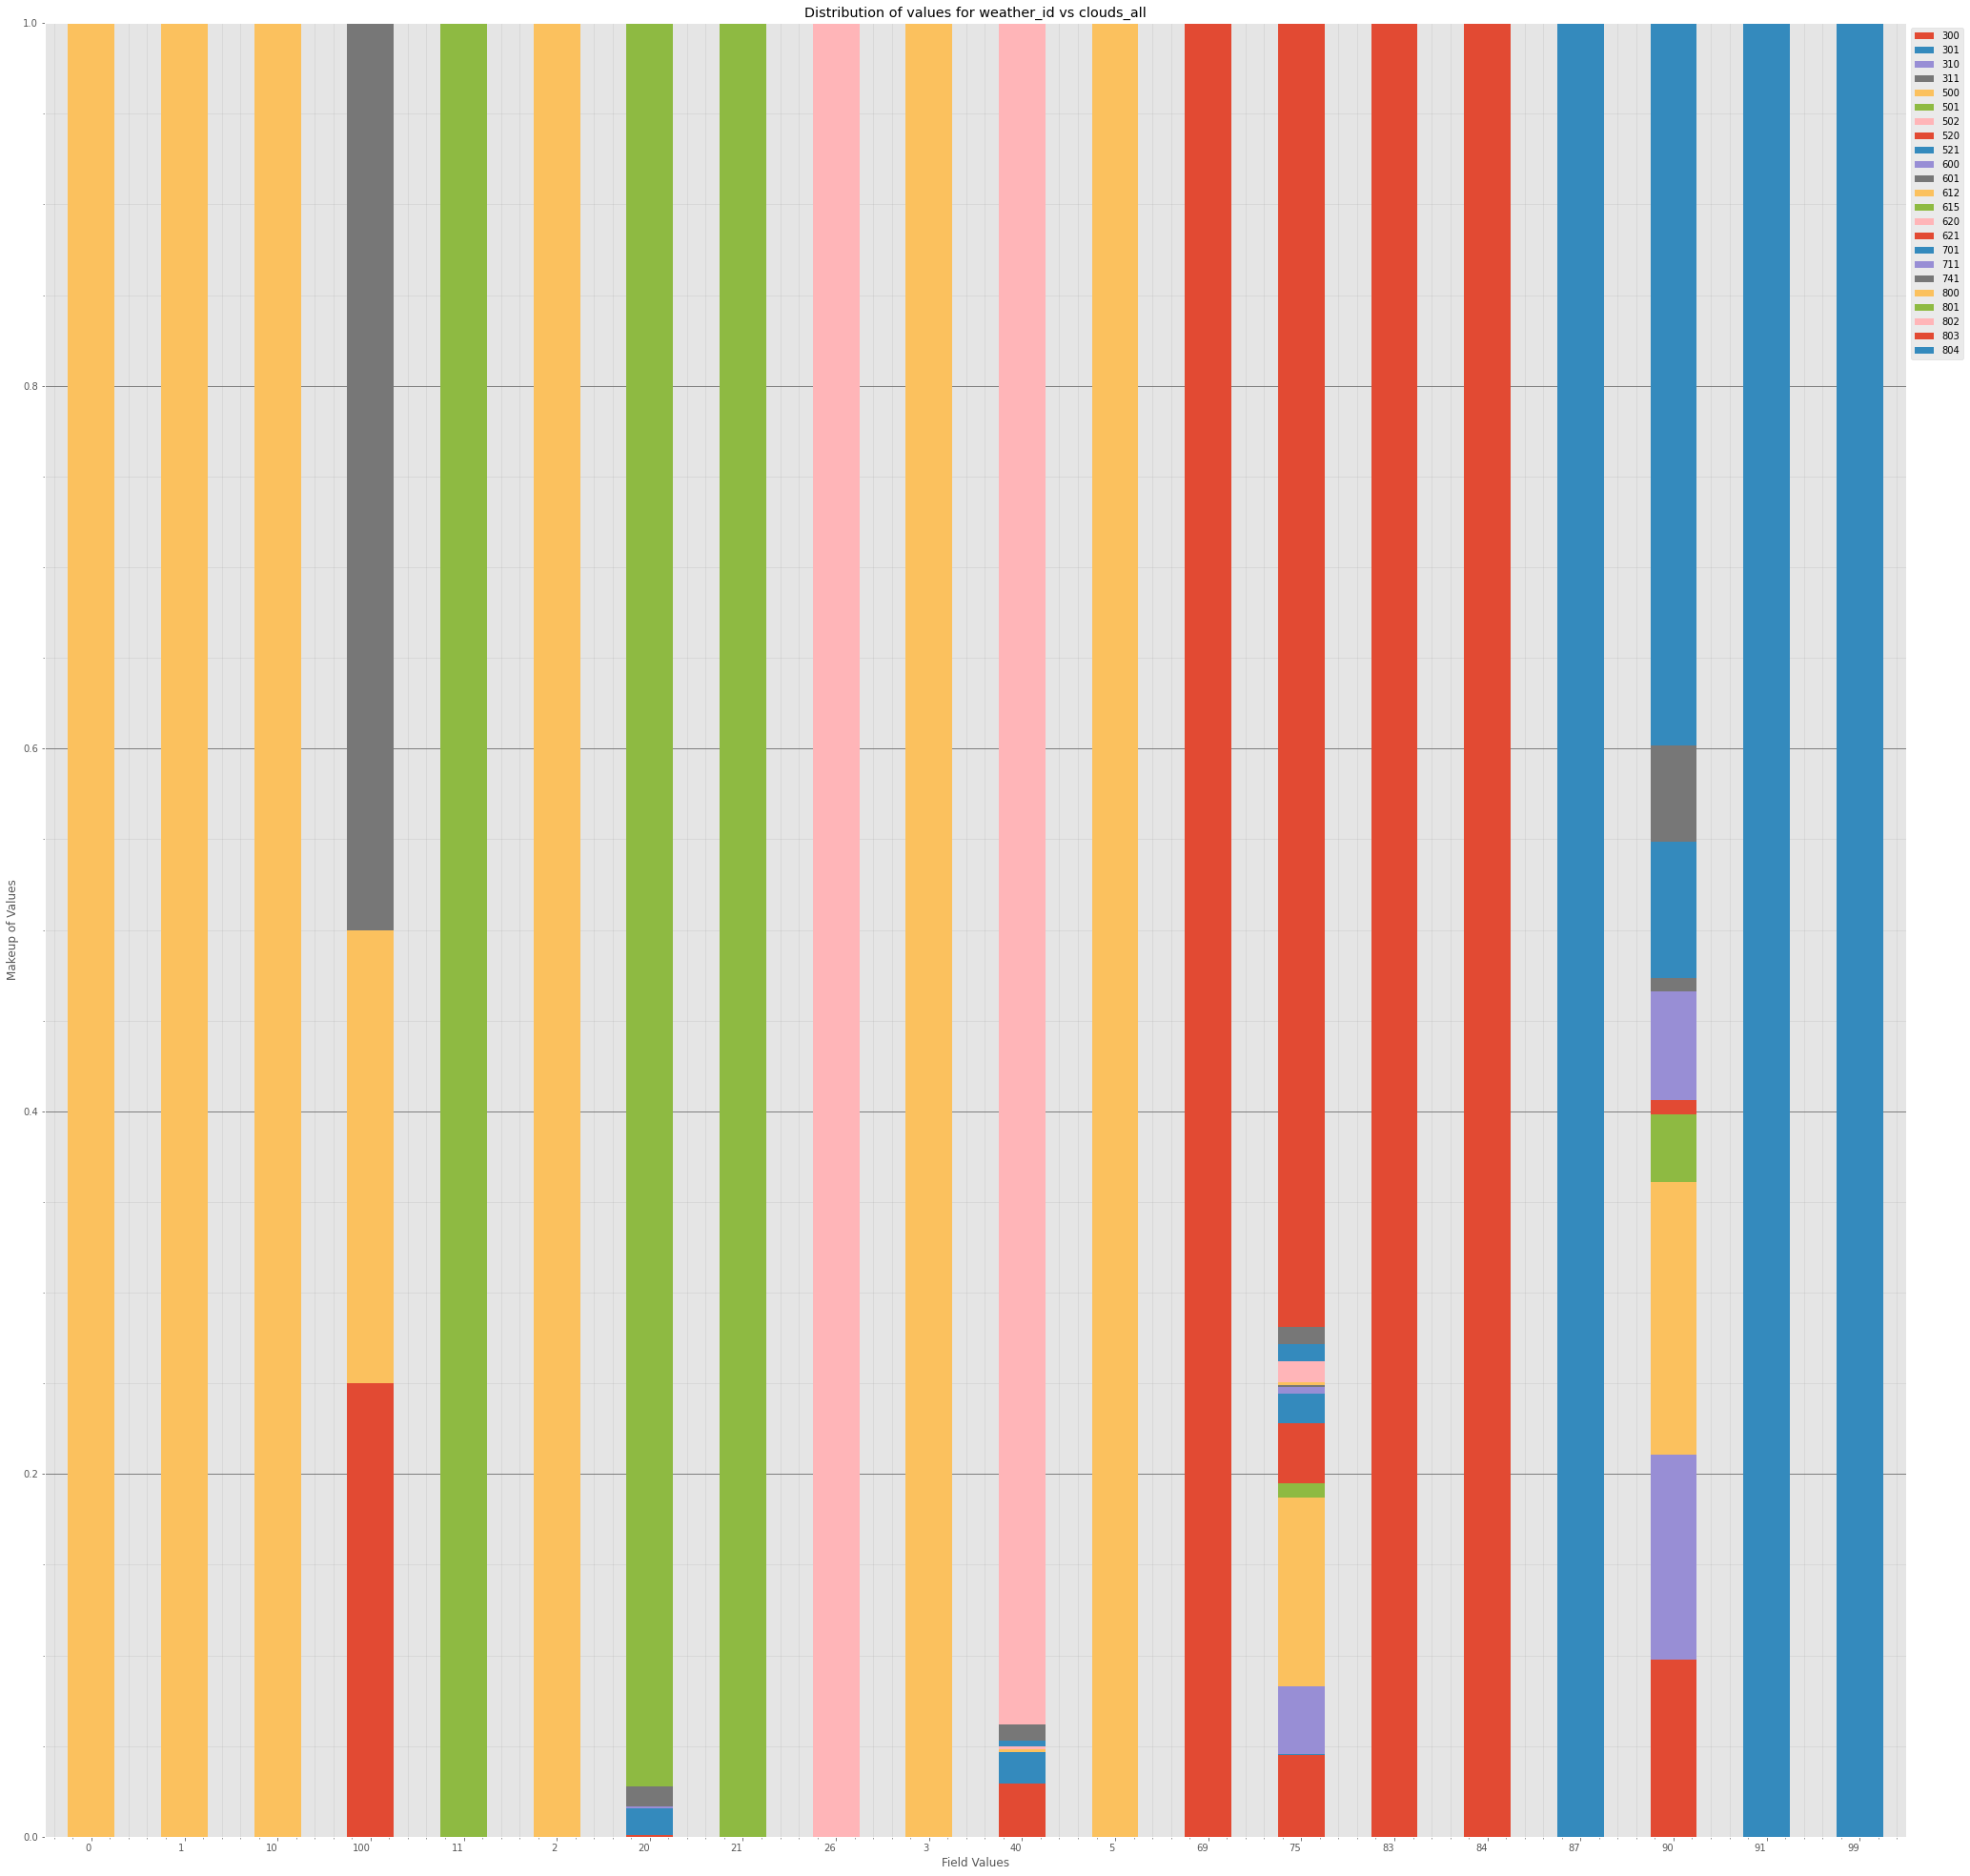



----------------------


Grouping over clouds_all|weather_description results in:



Rows  % Frequency
clouds_all weather_description                   
0           light shower sleet     0          0.0
           broken clouds           0          0.0
           drizzle                 0          0.0
           few clouds              0          0.0
           fog                     0          0.0
...                              ...          ...
99         shower rain             0          0.0
           shower snow             0          0.0
           sky is clear            0          0.0
           smoke                   0          0.0
           snow                    0          0.0

[480 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
clouds_all weather_description                            
0          sky is clear                   593     6.702080
1          sky is clear                     2     0.022604
10         sky is clear                     1     0.011302
100        fog                              2     0.022604
           light intensity drizzle          1     0.011302
           light rain                       1     0.011302
11         few clouds                       2     0.022604
2          sky is clear                     4     0.045208
20         few clouds                    1118    12.635624
           fog                             13     0.146926
           light intensity shower rain      1     0.011302
           mist                            10     0.113020
           proximity shower rain            7     0.079114
           smoke                            1     0.011302
21         few clouds                       1     0.011302
26         scattered clouds                 1     0.011302
3          sky is clear                     1     0.011302
40          light shower sleet              2     0.022604
           fog                             12     0.135624
           light intensity shower rain     38     0.429476
           light shower snow                2     0.022604
           mist                             4     0.045208
           proximity shower rain           23     0.259946
           scattered clouds              1222    13.811031
5          sky is clear                     1     0.011302
69         broken clouds                    1     0.011302
75          light shower sleet              9     0.101718
           broken clouds                 4058    45.863472
           drizzle                          4     0.045208
           fog                             55     0.621609
           heavy intensity rain             1     0.011302
           light intensity drizzle        255     2.882007
           light intensity drizzle rain   208     2.350814
           light intensity shower rain    188     2.124774
           light rain                     588     6.645570
           light rain and snow              1     0.011302
           light shower snow               64     0.723327
           light snow                      22     0.248644
           mist                            52     0.587703
           moderate rain                   42     0.474684
           proximity shower rain           88     0.994575
           rain and drizzle                 2     0.022604
           shower rain                      2     0.022604
           shower snow                      1     0.011302
           snow                             6     0.067812
83         broken clouds                    1     0.011302
84         broken clouds                    1     0.011302
87         overcast clouds                  1     0.011302
90         fog                              7     0.079114
           light intensity drizzle         13     0.146926
           light intensity drizzle rain    15     0.169530
           light intensity shower rain      1     0.011302
           light rain                      20     0.226040
           light snow                       8     0.090416
           mist                            10     0.113020
           moderate rain                    5     0.056510
           overcast clouds                 53     0.599005
           snow                             1     0.011302
91         mist                             1     0.011302
99         overcast clouds                  1     0.011302

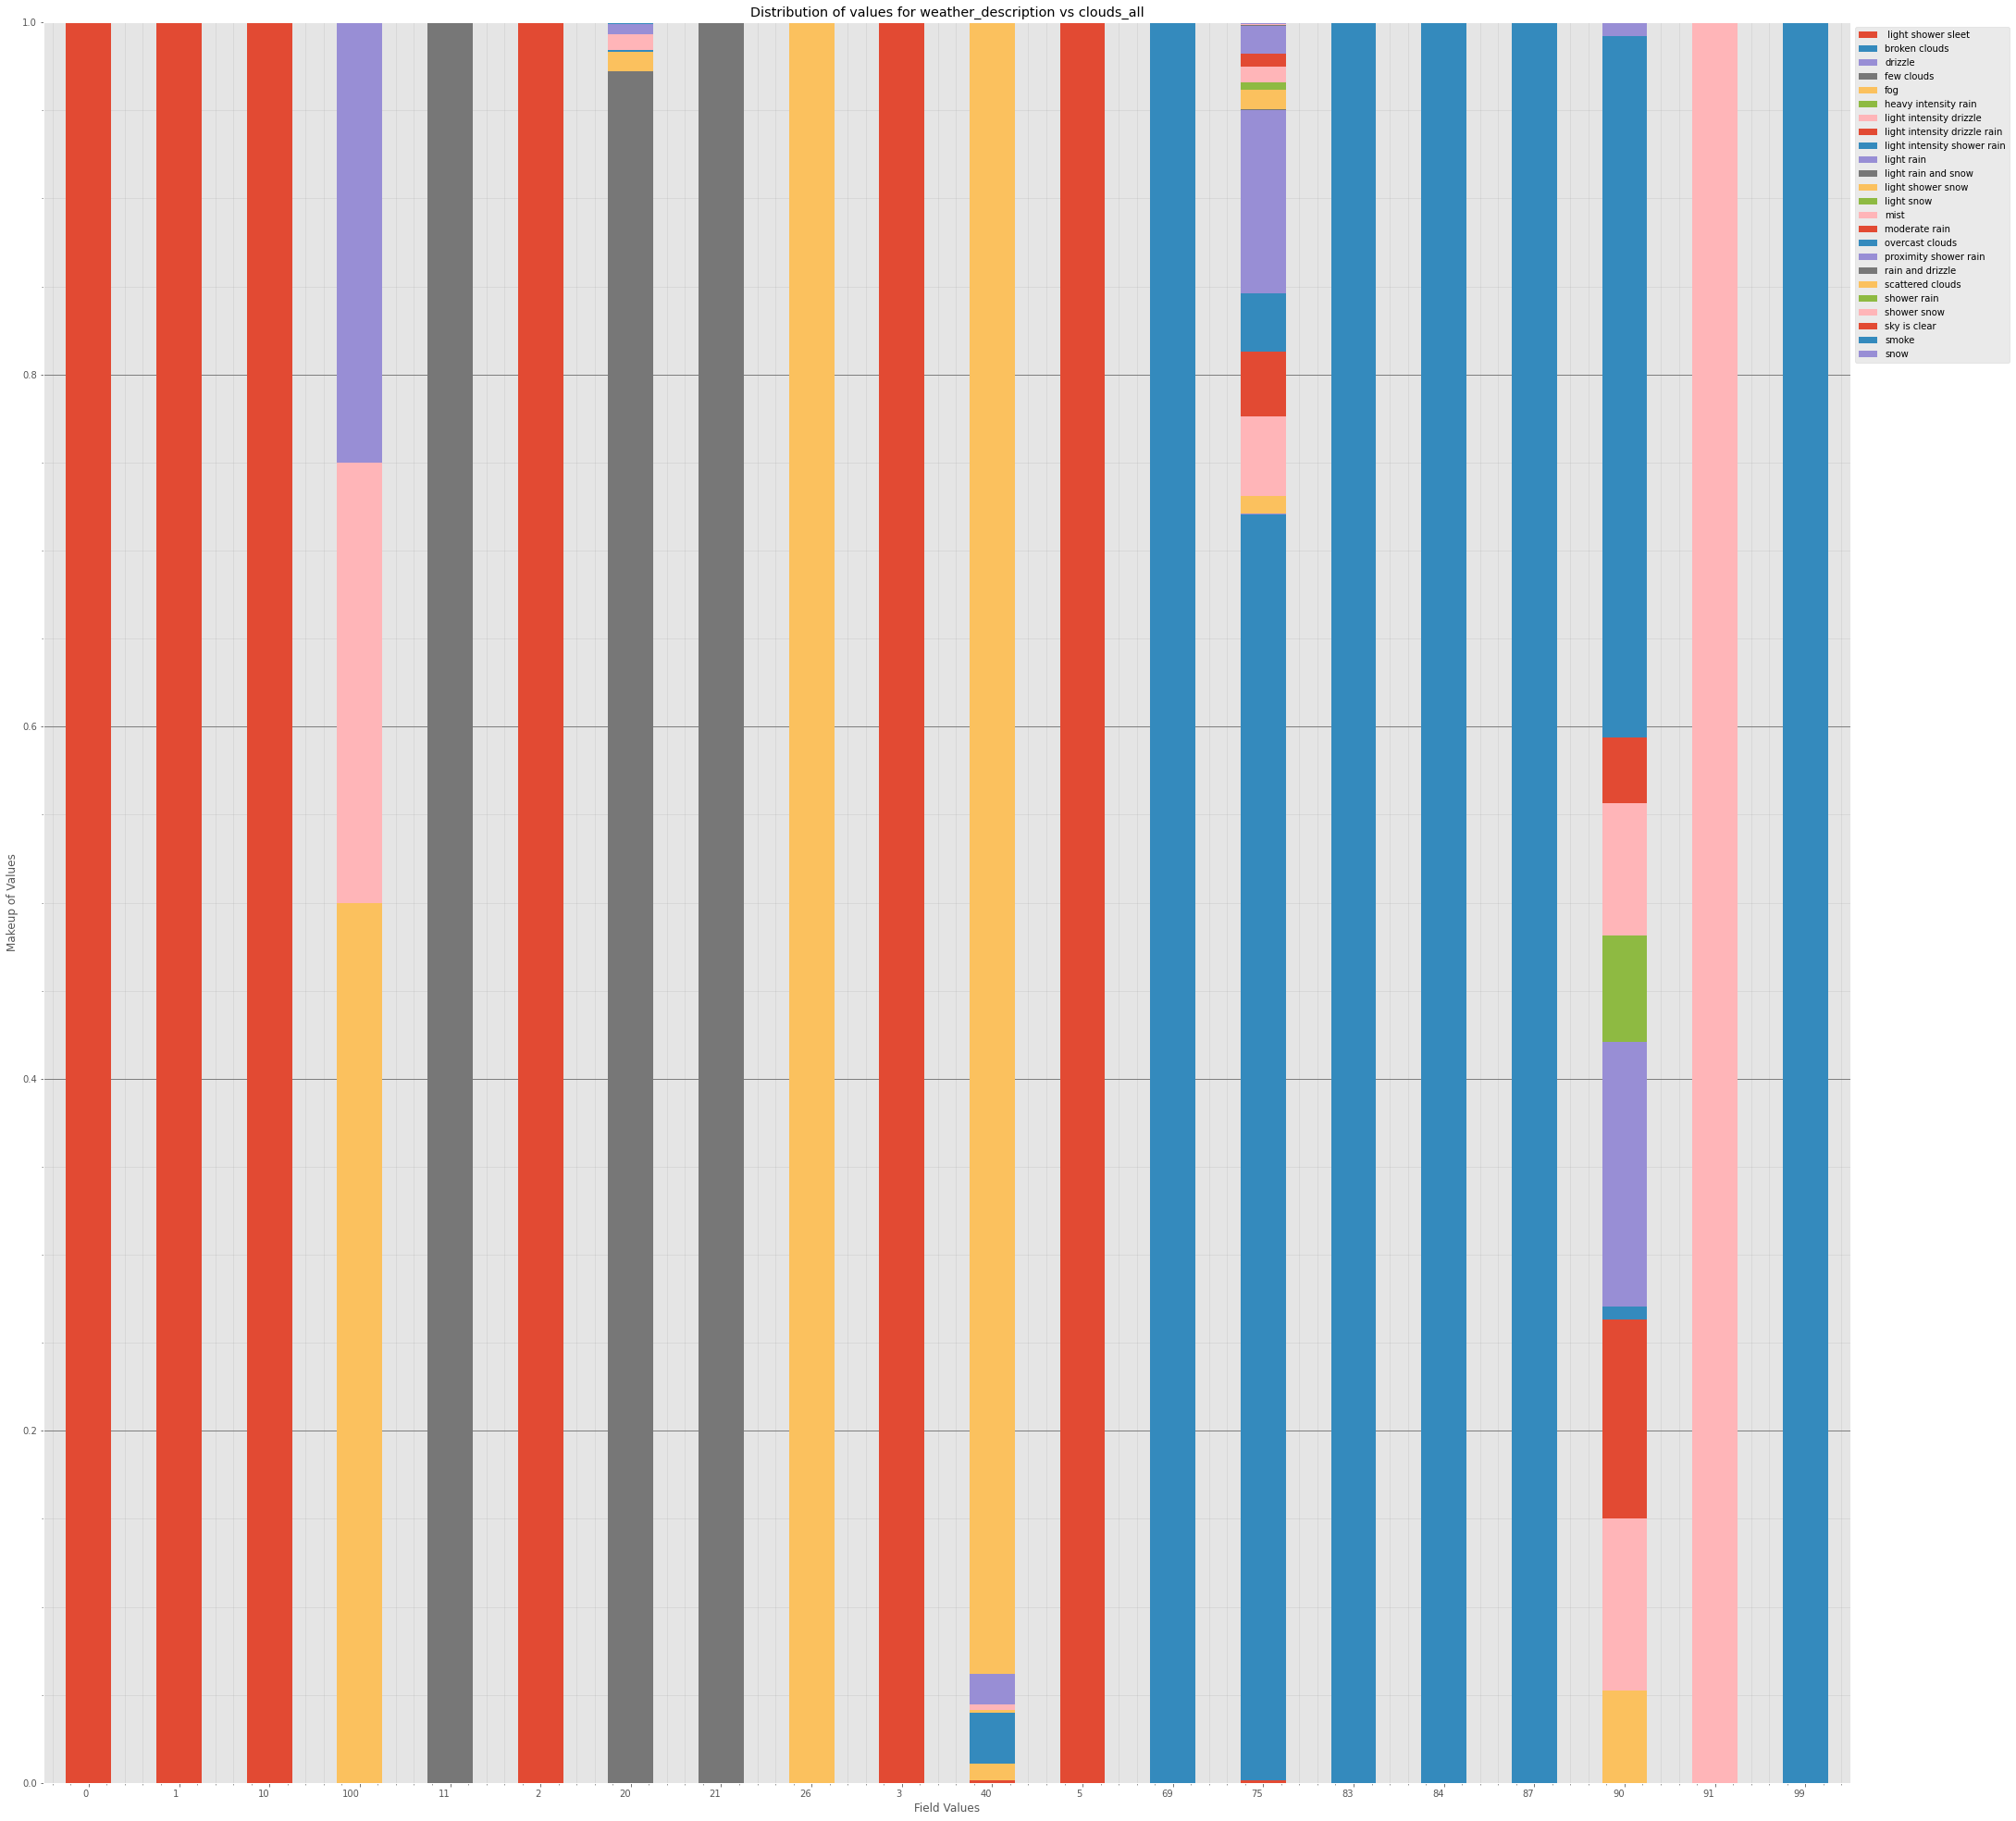



----------------------


Grouping over clouds_all|weather_icon results in:



Rows  % Frequency
clouds_all weather_icon                   
0          01d            237     2.678571
           01n            356     4.023508
           02d              0     0.000000
           02n              0     0.000000
           03d              0     0.000000
...                       ...          ...
99         10n              0     0.000000
           13d              0     0.000000
           13n              0     0.000000
           50d              0     0.000000
           50n              0     0.000000

[320 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
clouds_all weather_icon                   
0          01d            237     2.678571
           01n            356     4.023508
1          01n              2     0.022604
10         01n              1     0.011302
100        09d              1     0.011302
           10n              1     0.011302
           50d              1     0.011302
           50n              1     0.011302
11         02n              2     0.022604
2          01n              4     0.045208
20         02d            547     6.182188
           02n            571     6.453436
           09d              7     0.079114
           09n              1     0.011302
           50d              7     0.079114
           50n             17     0.192134
21         02n              1     0.011302
26         03n              1     0.011302
3          01n              1     0.011302
40         03d            645     7.289783
           03n            577     6.521248
           09d             41     0.463382
           09n             20     0.226040
           13d              3     0.033906
           13n              1     0.011302
           50d              4     0.045208
           50n             12     0.135624
5          01n              1     0.011302
69         04d              1     0.011302
75         04d           2205    24.920886
           04n           1853    20.942586
           09d            400     4.520796
           09n            347     3.921790
           10d            264     2.983725
           10n            367     4.147830
           13d             32     0.361664
           13n             71     0.802441
           50d             48     0.542495
           50n             59     0.666817
83         04d              1     0.011302
84         04n              1     0.011302
87         04d              1     0.011302
90         04d             25     0.282550
           04n             28     0.316456
           09d             14     0.158228
           09n             15     0.169530
           10d             10     0.113020
           10n             15     0.169530
           13d              9     0.101718
           50d              9     0.101718
           50n              8     0.090416
91         50n              1     0.011302
99         04d              1     0.011302

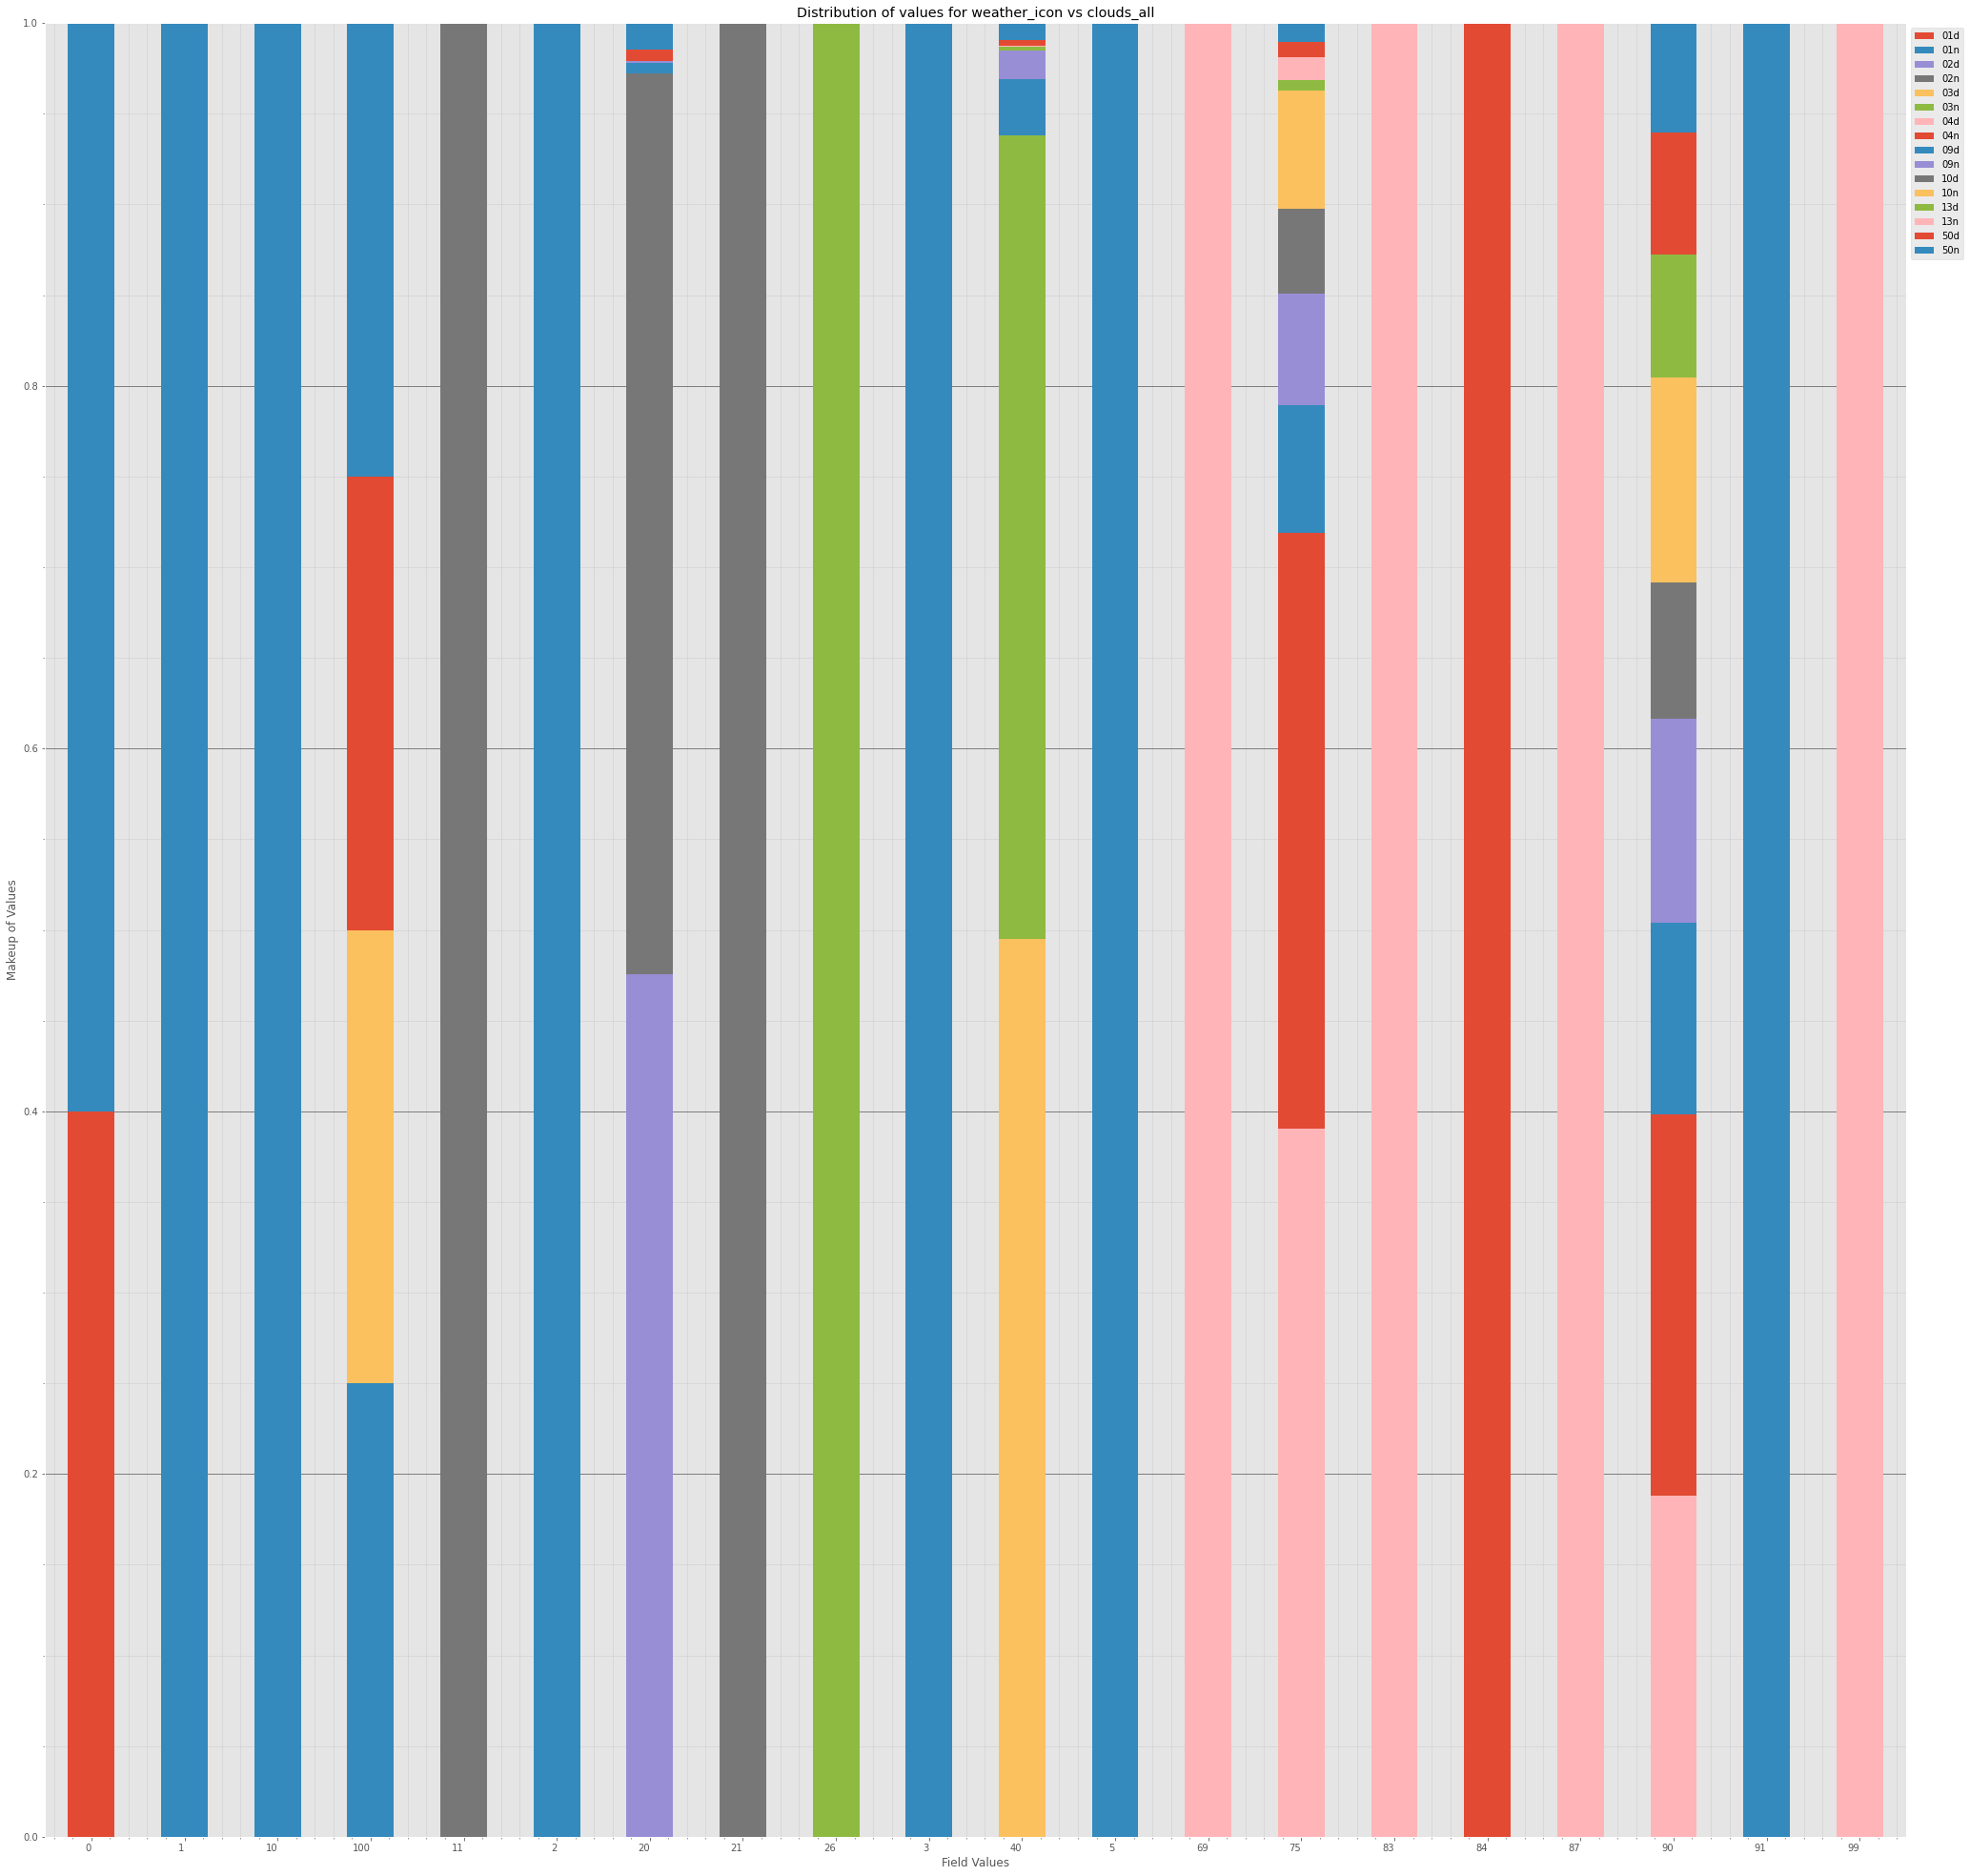



----------------------


Grouping over weather_id|timezone results in:



Rows  % Frequency
weather_id timezone                   
300        0          130     1.469259
           3600       139     1.570976
301        0            2     0.022604
           3600         2     0.022604
310        0          114     1.288427
           3600       109     1.231917
311        0            2     0.022604
           3600         0     0.000000
500        0          324     3.661844
           3600       285     3.221067
501        0           33     0.372966
           3600        14     0.158228
502        0            1     0.011302
           3600         0     0.000000
520        0          134     1.514467
           3600        94     1.062387
521        0           39     0.440778
           3600        81     0.915461
600        0           30     0.339060
           3600         0     0.000000
601        0            7     0.079114
           3600         0     0.000000
612        0           10     0.113020
           3600         1     0.011302
615        0            1     0.011302
           3600         0     0.000000
620        0           66     0.745931
           3600         0     0.000000
621        0            1     0.011302
           3600         0     0.000000
701        0           40     0.452080
           3600        37     0.418174
711        0            0     0.000000
           3600         1     0.011302
741        0           50     0.565099
           3600        39     0.440778
800        0          118     1.333635
           3600       484     5.470163
801        0          415     4.690325
           3600       706     7.979204
802        0          485     5.481465
           3600       738     8.340868
803        0         1597    18.049277
           3600      2464    27.848101
804        0           30     0.339060
           3600        25     0.282550

Non Zero Data:


Rows  % Frequency
weather_id timezone                   
300        0          130     1.469259
           3600       139     1.570976
301        0            2     0.022604
           3600         2     0.022604
310        0          114     1.288427
           3600       109     1.231917
311        0            2     0.022604
500        0          324     3.661844
           3600       285     3.221067
501        0           33     0.372966
           3600        14     0.158228
502        0            1     0.011302
520        0          134     1.514467
           3600        94     1.062387
521        0           39     0.440778
           3600        81     0.915461
600        0           30     0.339060
601        0            7     0.079114
612        0           10     0.113020
           3600         1     0.011302
615        0            1     0.011302
620        0           66     0.745931
621        0            1     0.011302
701        0           40     0.452080
           3600        37     0.418174
711        3600         1     0.011302
741        0           50     0.565099
           3600        39     0.440778
800        0          118     1.333635
           3600       484     5.470163
801        0          415     4.690325
           3600       706     7.979204
802        0          485     5.481465
           3600       738     8.340868
803        0         1597    18.049277
           3600      2464    27.848101
804        0           30     0.339060
           3600        25     0.282550

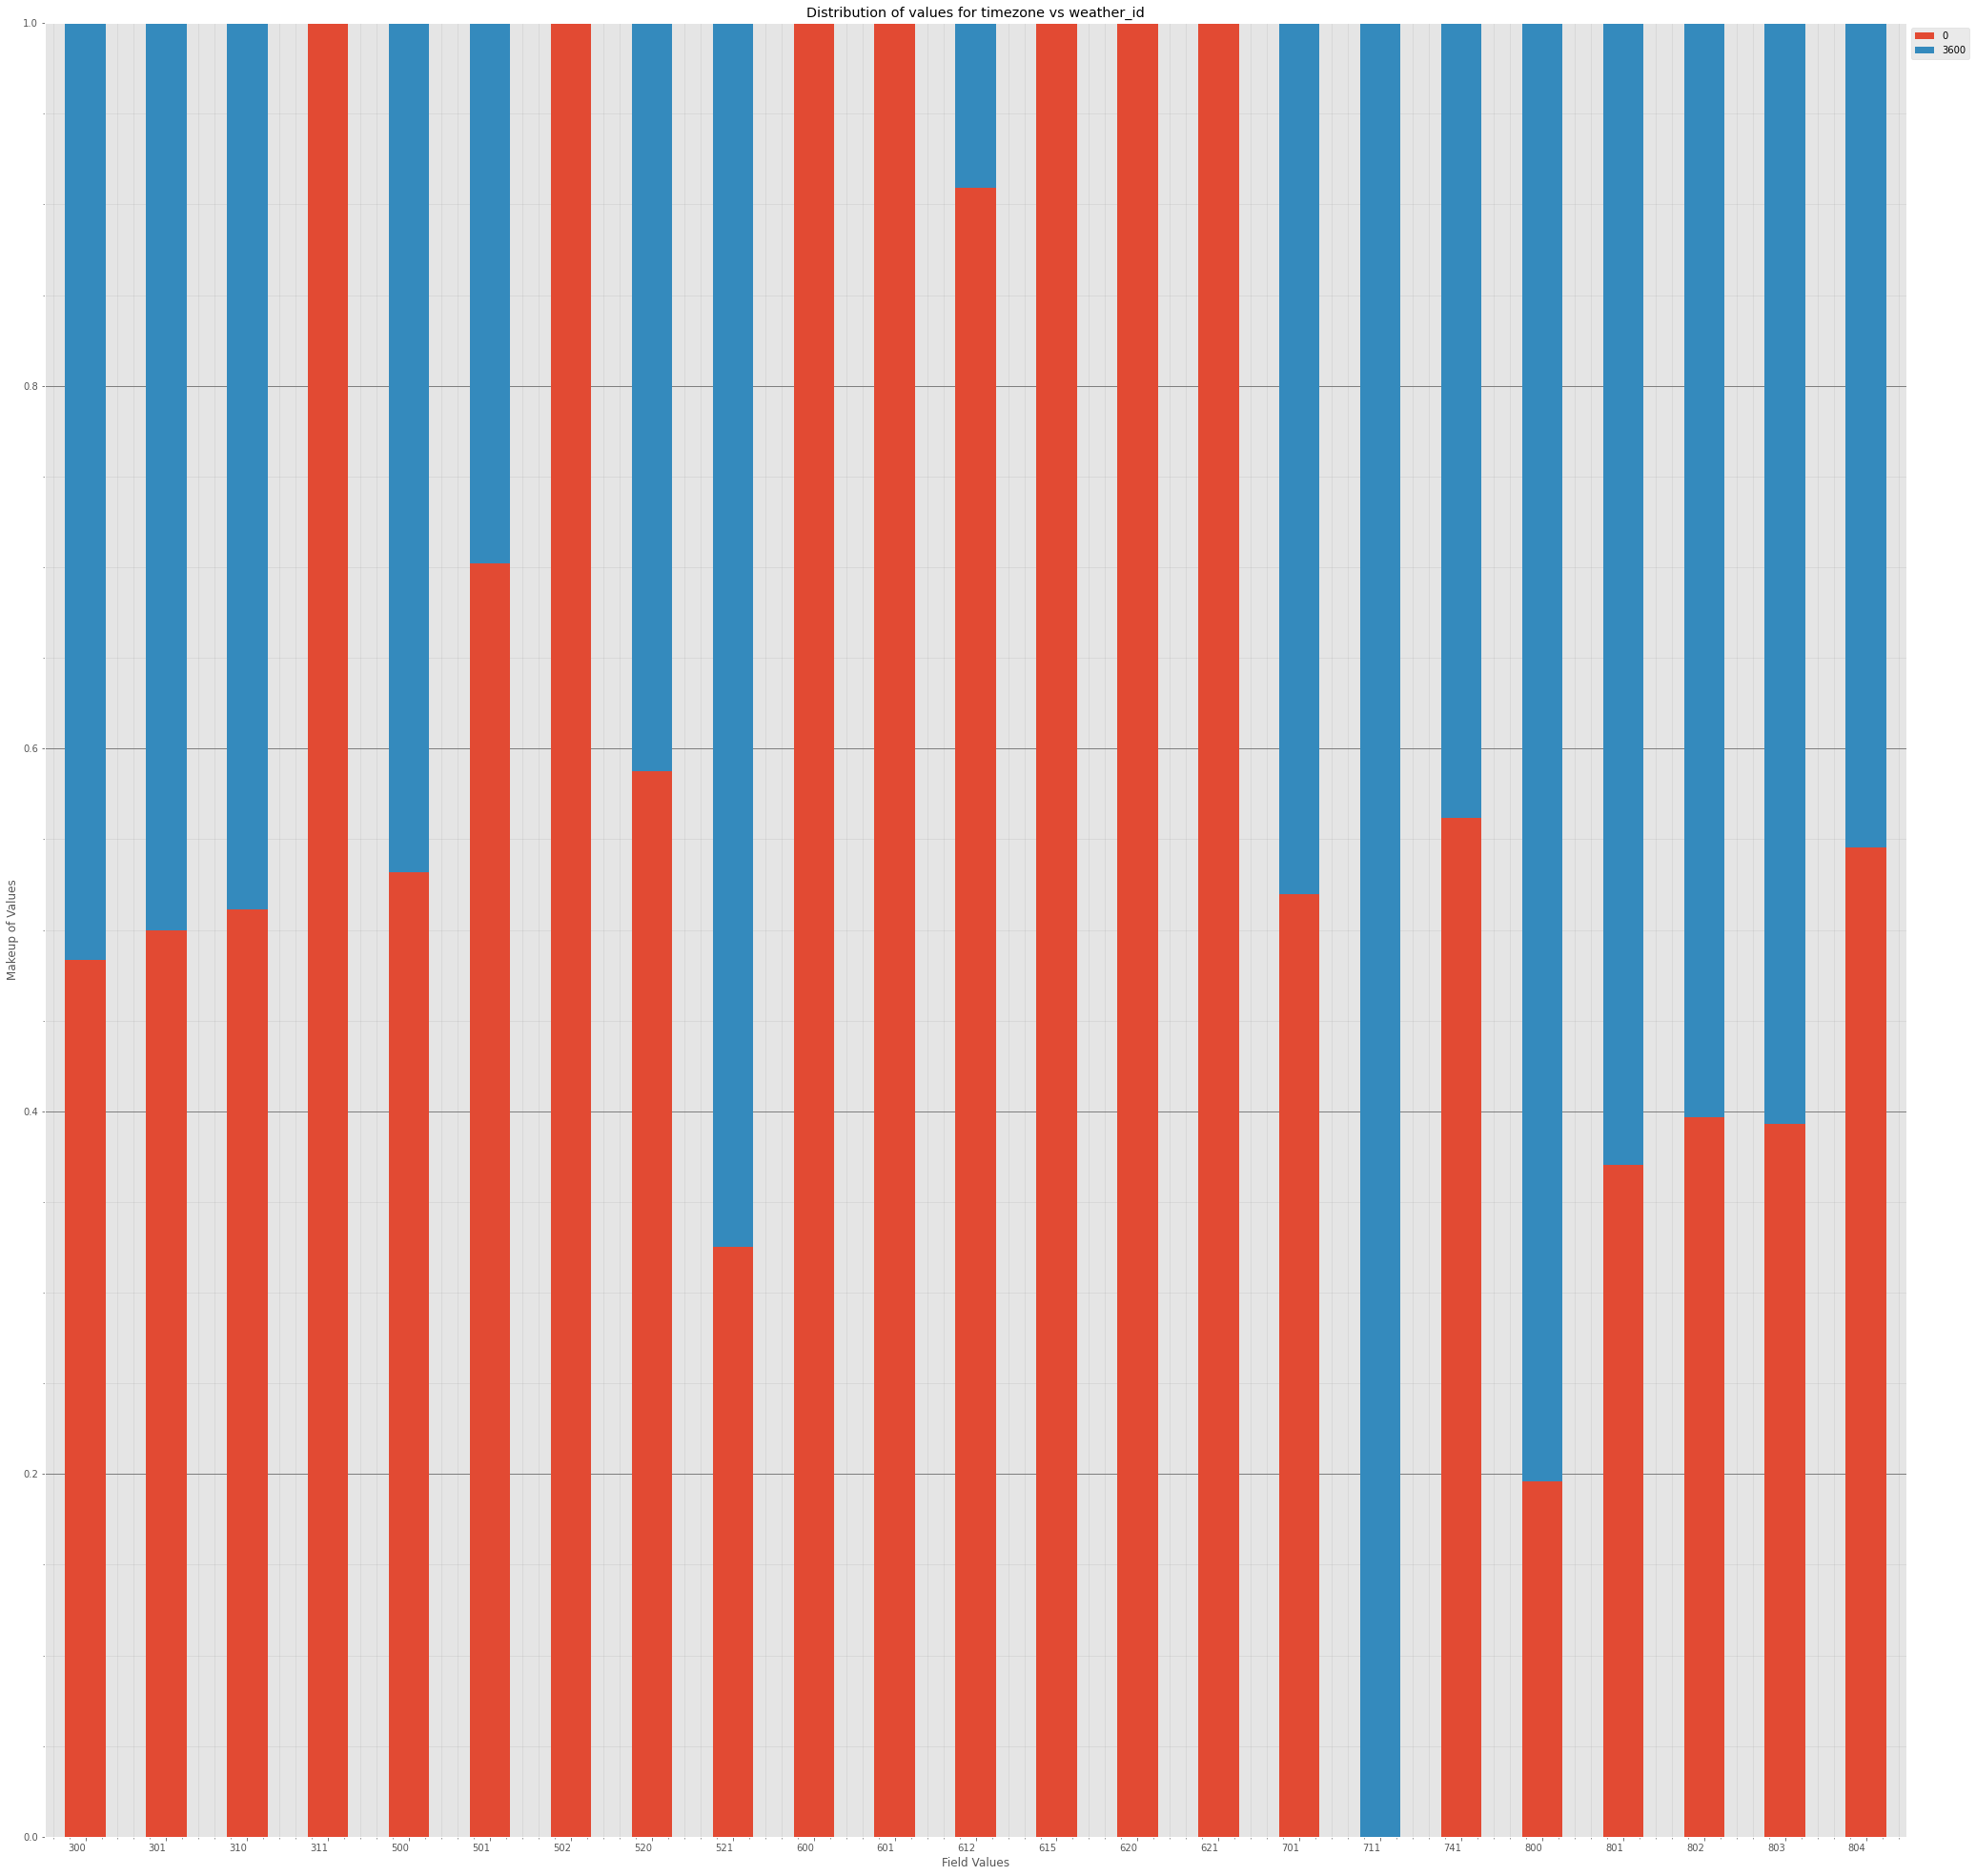



----------------------


Grouping over weather_id|city_name results in:



Rows  % Frequency
weather_id city_name                   
300        Dublin      269     3.040235
301        Dublin        4     0.045208
310        Dublin      223     2.520344
311        Dublin        2     0.022604
500        Dublin      609     6.882911
501        Dublin       47     0.531193
502        Dublin        1     0.011302
520        Dublin      228     2.576854
521        Dublin      120     1.356239
600        Dublin       30     0.339060
601        Dublin        7     0.079114
612        Dublin       11     0.124322
615        Dublin        1     0.011302
620        Dublin       66     0.745931
621        Dublin        1     0.011302
701        Dublin       77     0.870253
711        Dublin        1     0.011302
741        Dublin       89     1.005877
800        Dublin      602     6.803797
801        Dublin     1121    12.669530
802        Dublin     1223    13.822333
803        Dublin     4061    45.897378
804        Dublin       55     0.621609

Non Zero Data:


Rows  % Frequency
weather_id city_name                   
300        Dublin      269     3.040235
301        Dublin        4     0.045208
310        Dublin      223     2.520344
311        Dublin        2     0.022604
500        Dublin      609     6.882911
501        Dublin       47     0.531193
502        Dublin        1     0.011302
520        Dublin      228     2.576854
521        Dublin      120     1.356239
600        Dublin       30     0.339060
601        Dublin        7     0.079114
612        Dublin       11     0.124322
615        Dublin        1     0.011302
620        Dublin       66     0.745931
621        Dublin        1     0.011302
701        Dublin       77     0.870253
711        Dublin        1     0.011302
741        Dublin       89     1.005877
800        Dublin      602     6.803797
801        Dublin     1121    12.669530
802        Dublin     1223    13.822333
803        Dublin     4061    45.897378
804        Dublin       55     0.621609

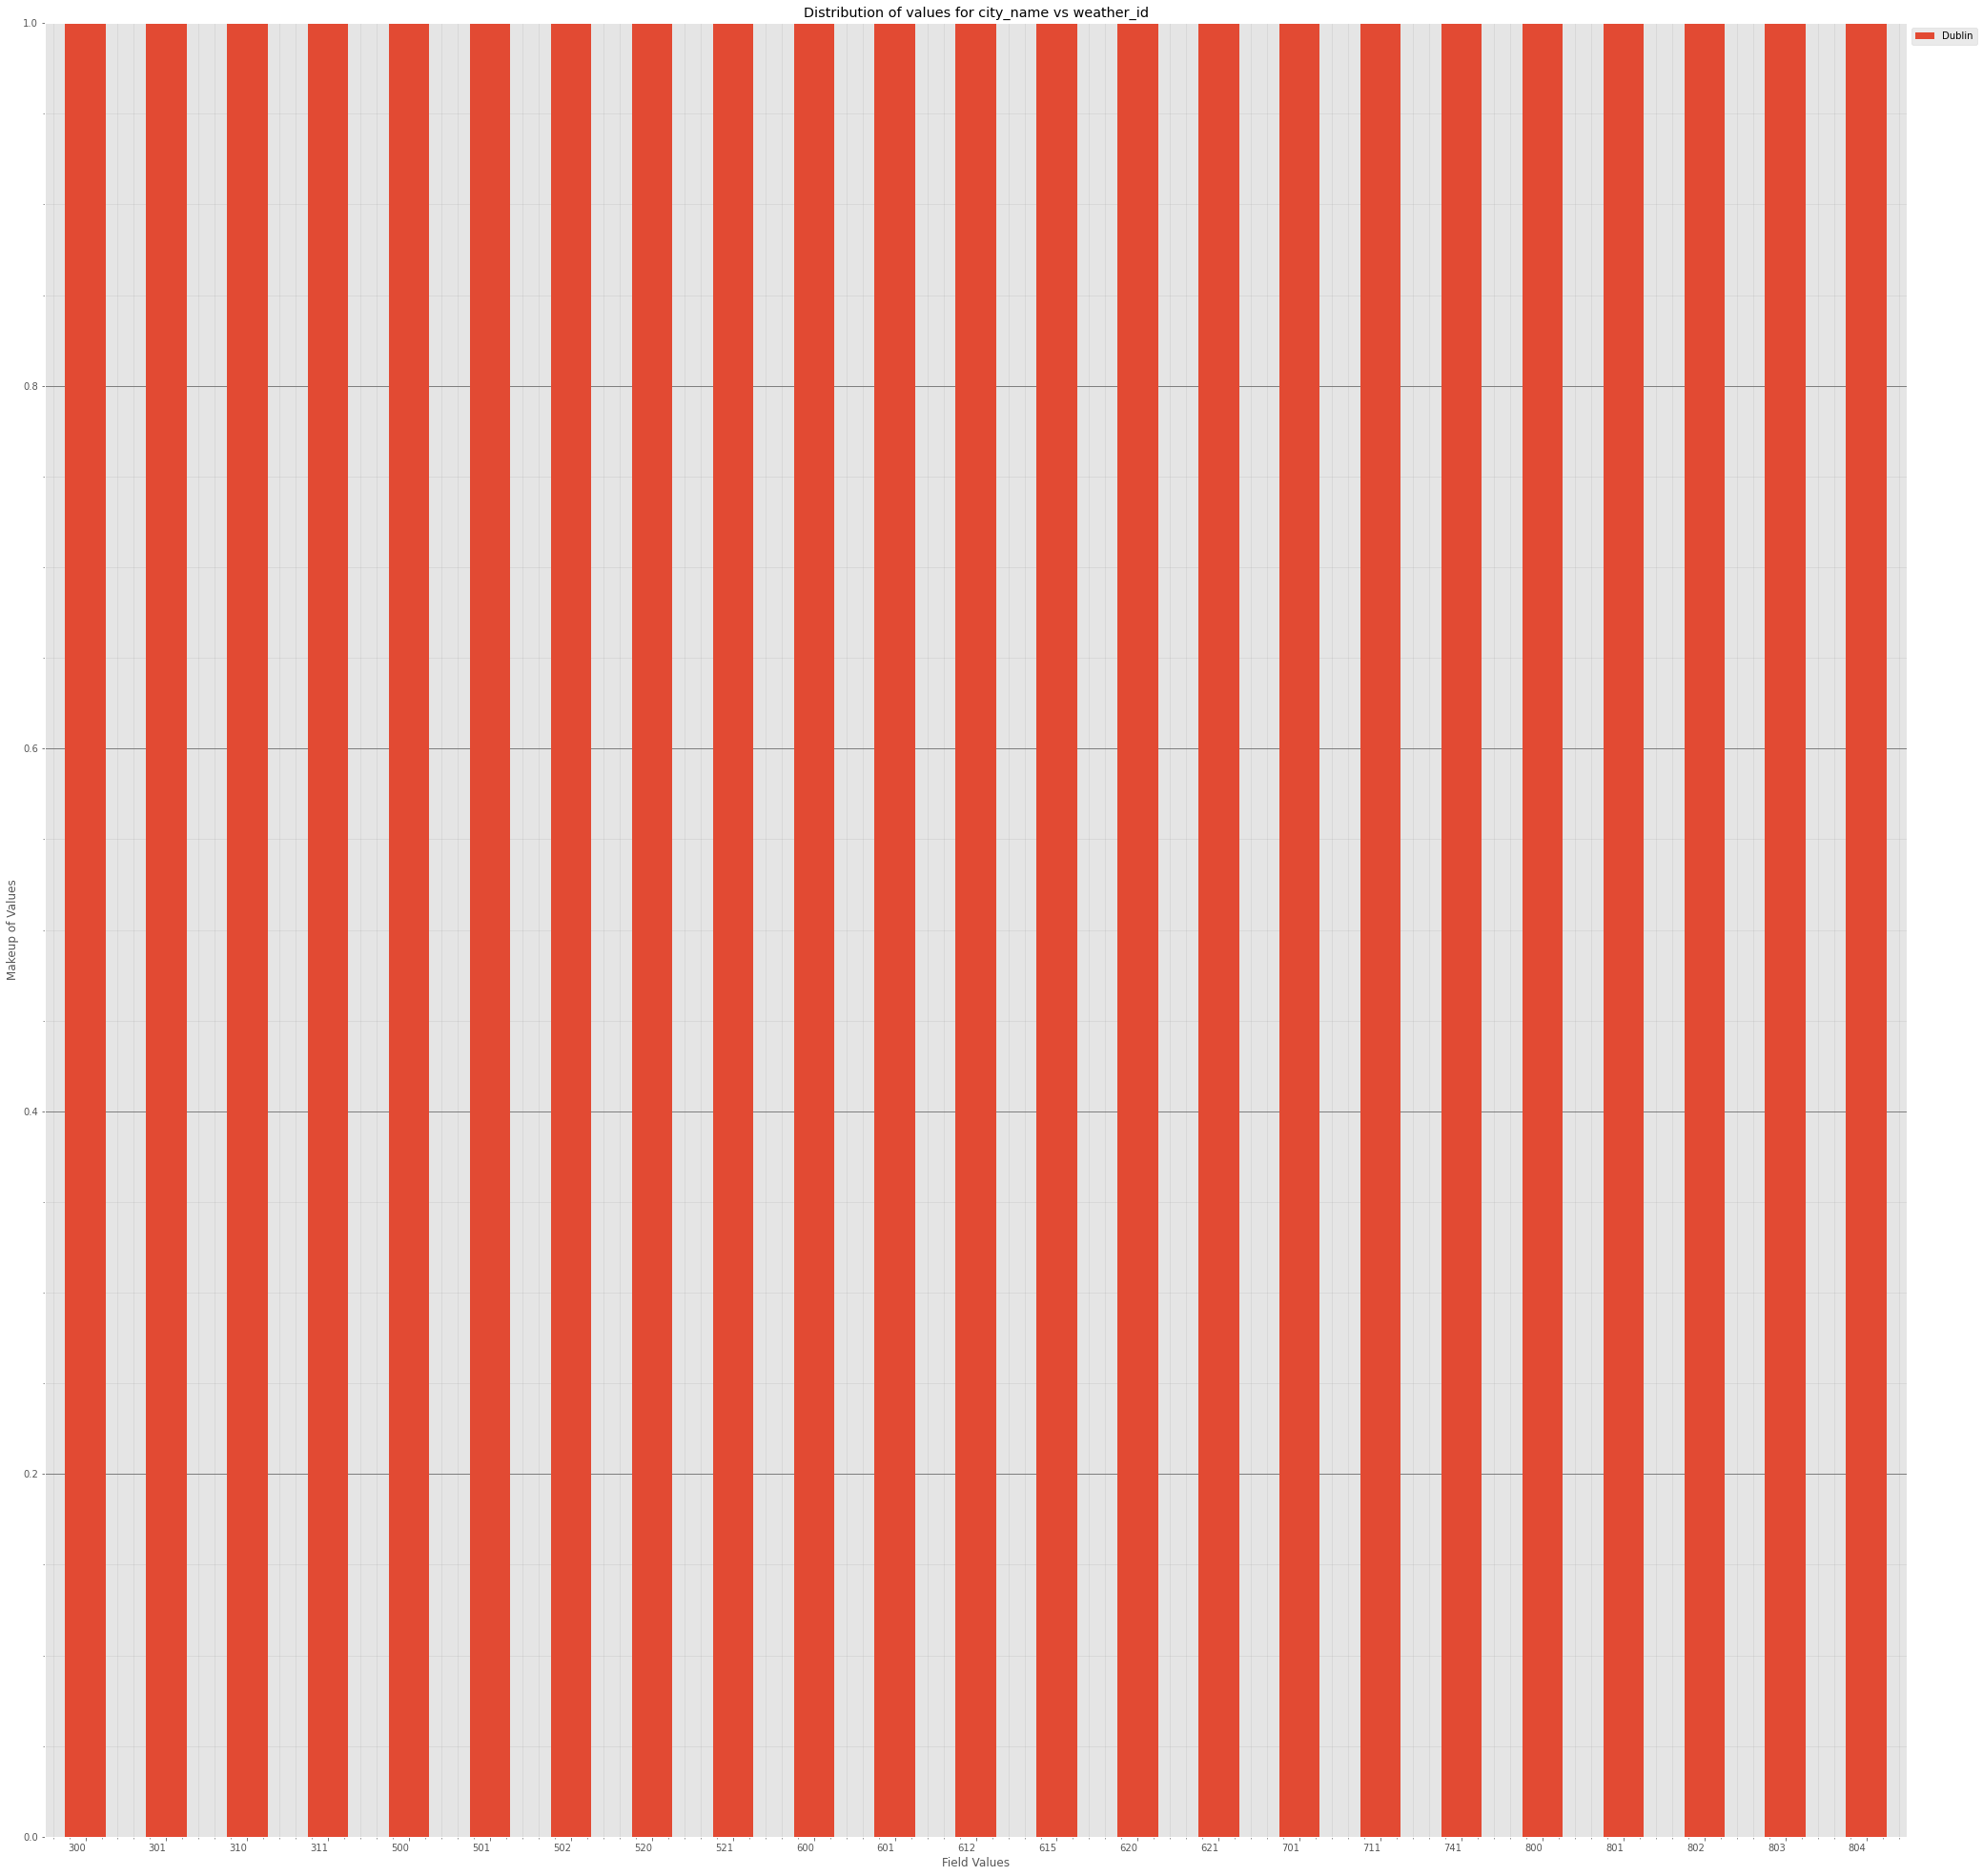



----------------------


Grouping over weather_id|clouds_all results in:



Rows  % Frequency
weather_id clouds_all                   
300        0              0     0.000000
           1              0     0.000000
           10             0     0.000000
           100            1     0.011302
           11             0     0.000000
...                     ...          ...
804        84             0     0.000000
           87             1     0.011302
           90            53     0.599005
           91             0     0.000000
           99             1     0.011302

[460 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
weather_id clouds_all                   
300        100            1     0.011302
           75           255     2.882007
           90            13     0.146926
301        75             4     0.045208
310        75           208     2.350814
           90            15     0.169530
311        75             2     0.022604
500        100            1     0.011302
           75           588     6.645570
           90            20     0.226040
501        75            42     0.474684
           90             5     0.056510
502        75             1     0.011302
520        20             1     0.011302
           40            38     0.429476
           75           188     2.124774
           90             1     0.011302
521        20             7     0.079114
           40            23     0.259946
           75            90     1.017179
600        75            22     0.248644
           90             8     0.090416
601        75             6     0.067812
           90             1     0.011302
612        40             2     0.022604
           75             9     0.101718
615        75             1     0.011302
620        40             2     0.022604
           75            64     0.723327
621        75             1     0.011302
701        20            10     0.113020
           40             4     0.045208
           75            52     0.587703
           90            10     0.113020
           91             1     0.011302
711        20             1     0.011302
741        100            2     0.022604
           20            13     0.146926
           40            12     0.135624
           75            55     0.621609
           90             7     0.079114
800        0            593     6.702080
           1              2     0.022604
           10             1     0.011302
           2              4     0.045208
           3              1     0.011302
           5              1     0.011302
801        11             2     0.022604
           20          1118    12.635624
           21             1     0.011302
802        26             1     0.011302
           40          1222    13.811031
803        69             1     0.011302
           75          4058    45.863472
           83             1     0.011302
           84             1     0.011302
804        87             1     0.011302
           90            53     0.599005
           99             1     0.011302

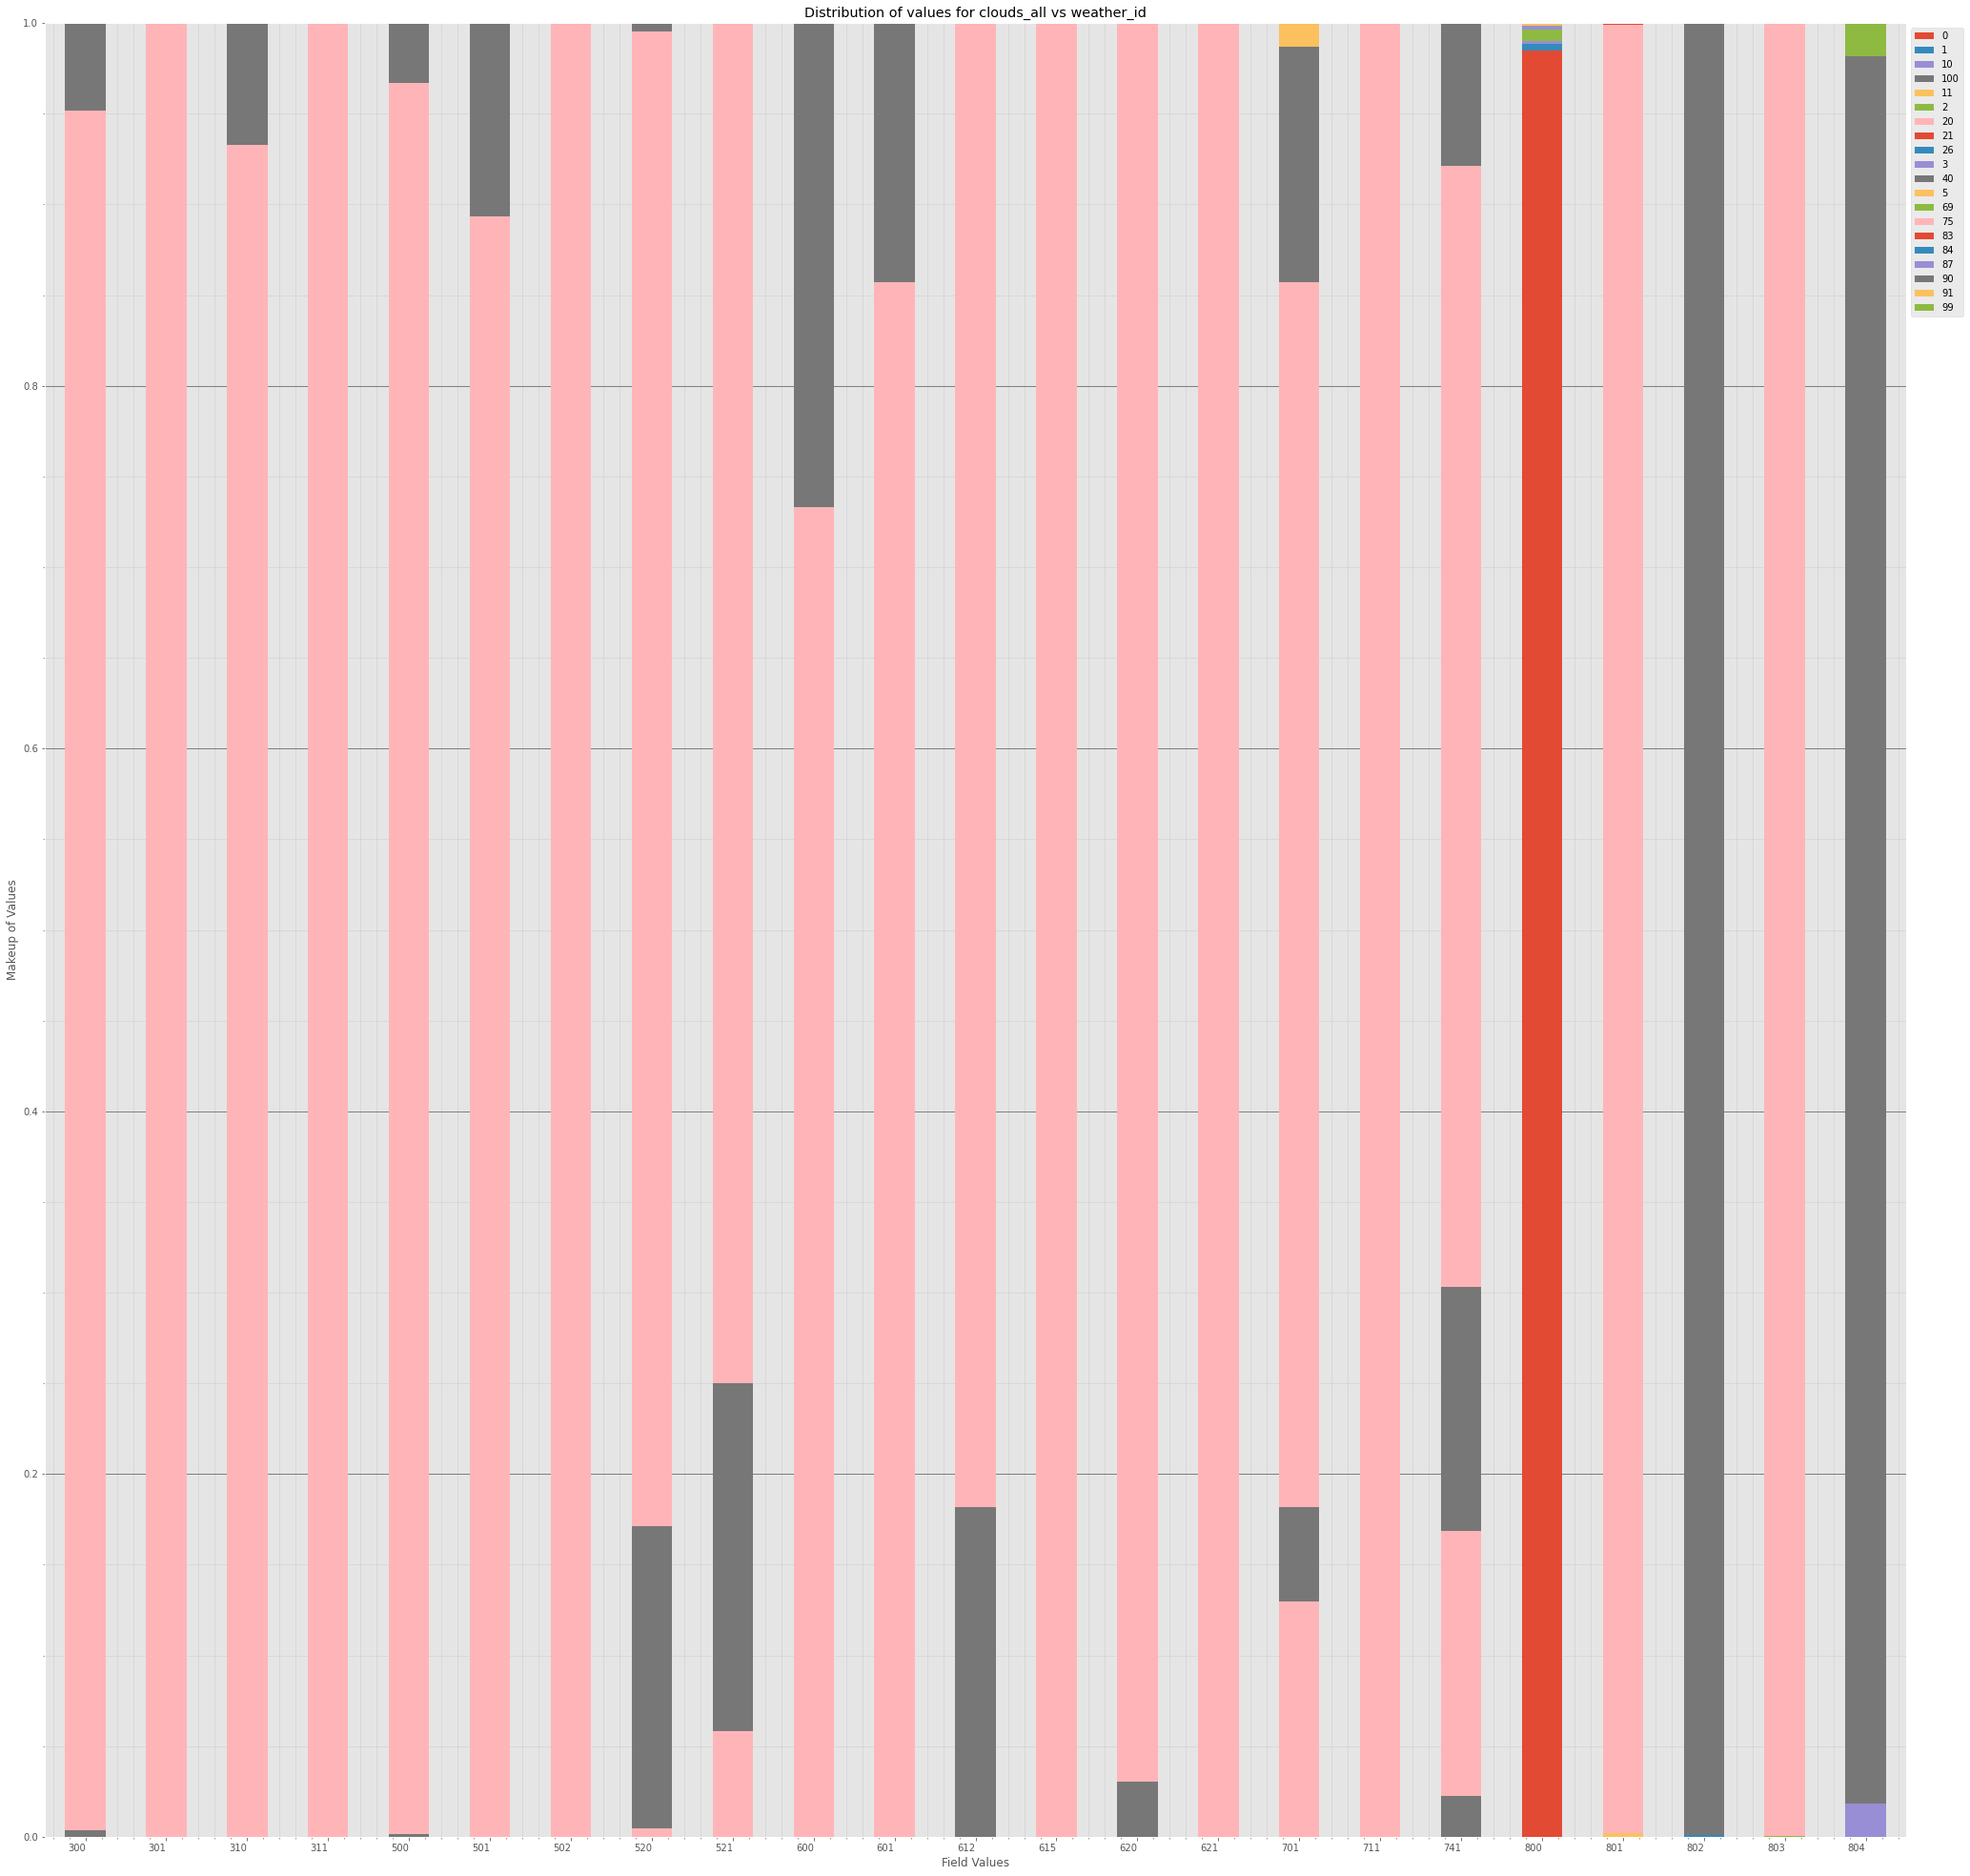



----------------------


Grouping over weather_id|weather_description results in:



Rows  % Frequency
weather_id weather_description                   
300         light shower sleet     0          0.0
           broken clouds           0          0.0
           drizzle                 0          0.0
           few clouds              0          0.0
           fog                     0          0.0
...                              ...          ...
804        shower rain             0          0.0
           shower snow             0          0.0
           sky is clear            0          0.0
           smoke                   0          0.0
           snow                    0          0.0

[552 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
weather_id weather_description                            
300        light intensity drizzle        269     3.040235
301        drizzle                          4     0.045208
310        light intensity drizzle rain   223     2.520344
311        rain and drizzle                 2     0.022604
500        light rain                     609     6.882911
501        moderate rain                   47     0.531193
502        heavy intensity rain             1     0.011302
520        light intensity shower rain    228     2.576854
521        proximity shower rain          118     1.333635
           shower rain                      2     0.022604
600        light snow                      30     0.339060
601        snow                             7     0.079114
612         light shower sleet             11     0.124322
615        light rain and snow              1     0.011302
620        light shower snow               66     0.745931
621        shower snow                      1     0.011302
701        mist                            77     0.870253
711        smoke                            1     0.011302
741        fog                             89     1.005877
800        sky is clear                   602     6.803797
801        few clouds                    1121    12.669530
802        scattered clouds              1223    13.822333
803        broken clouds                 4061    45.897378
804        overcast clouds                 55     0.621609

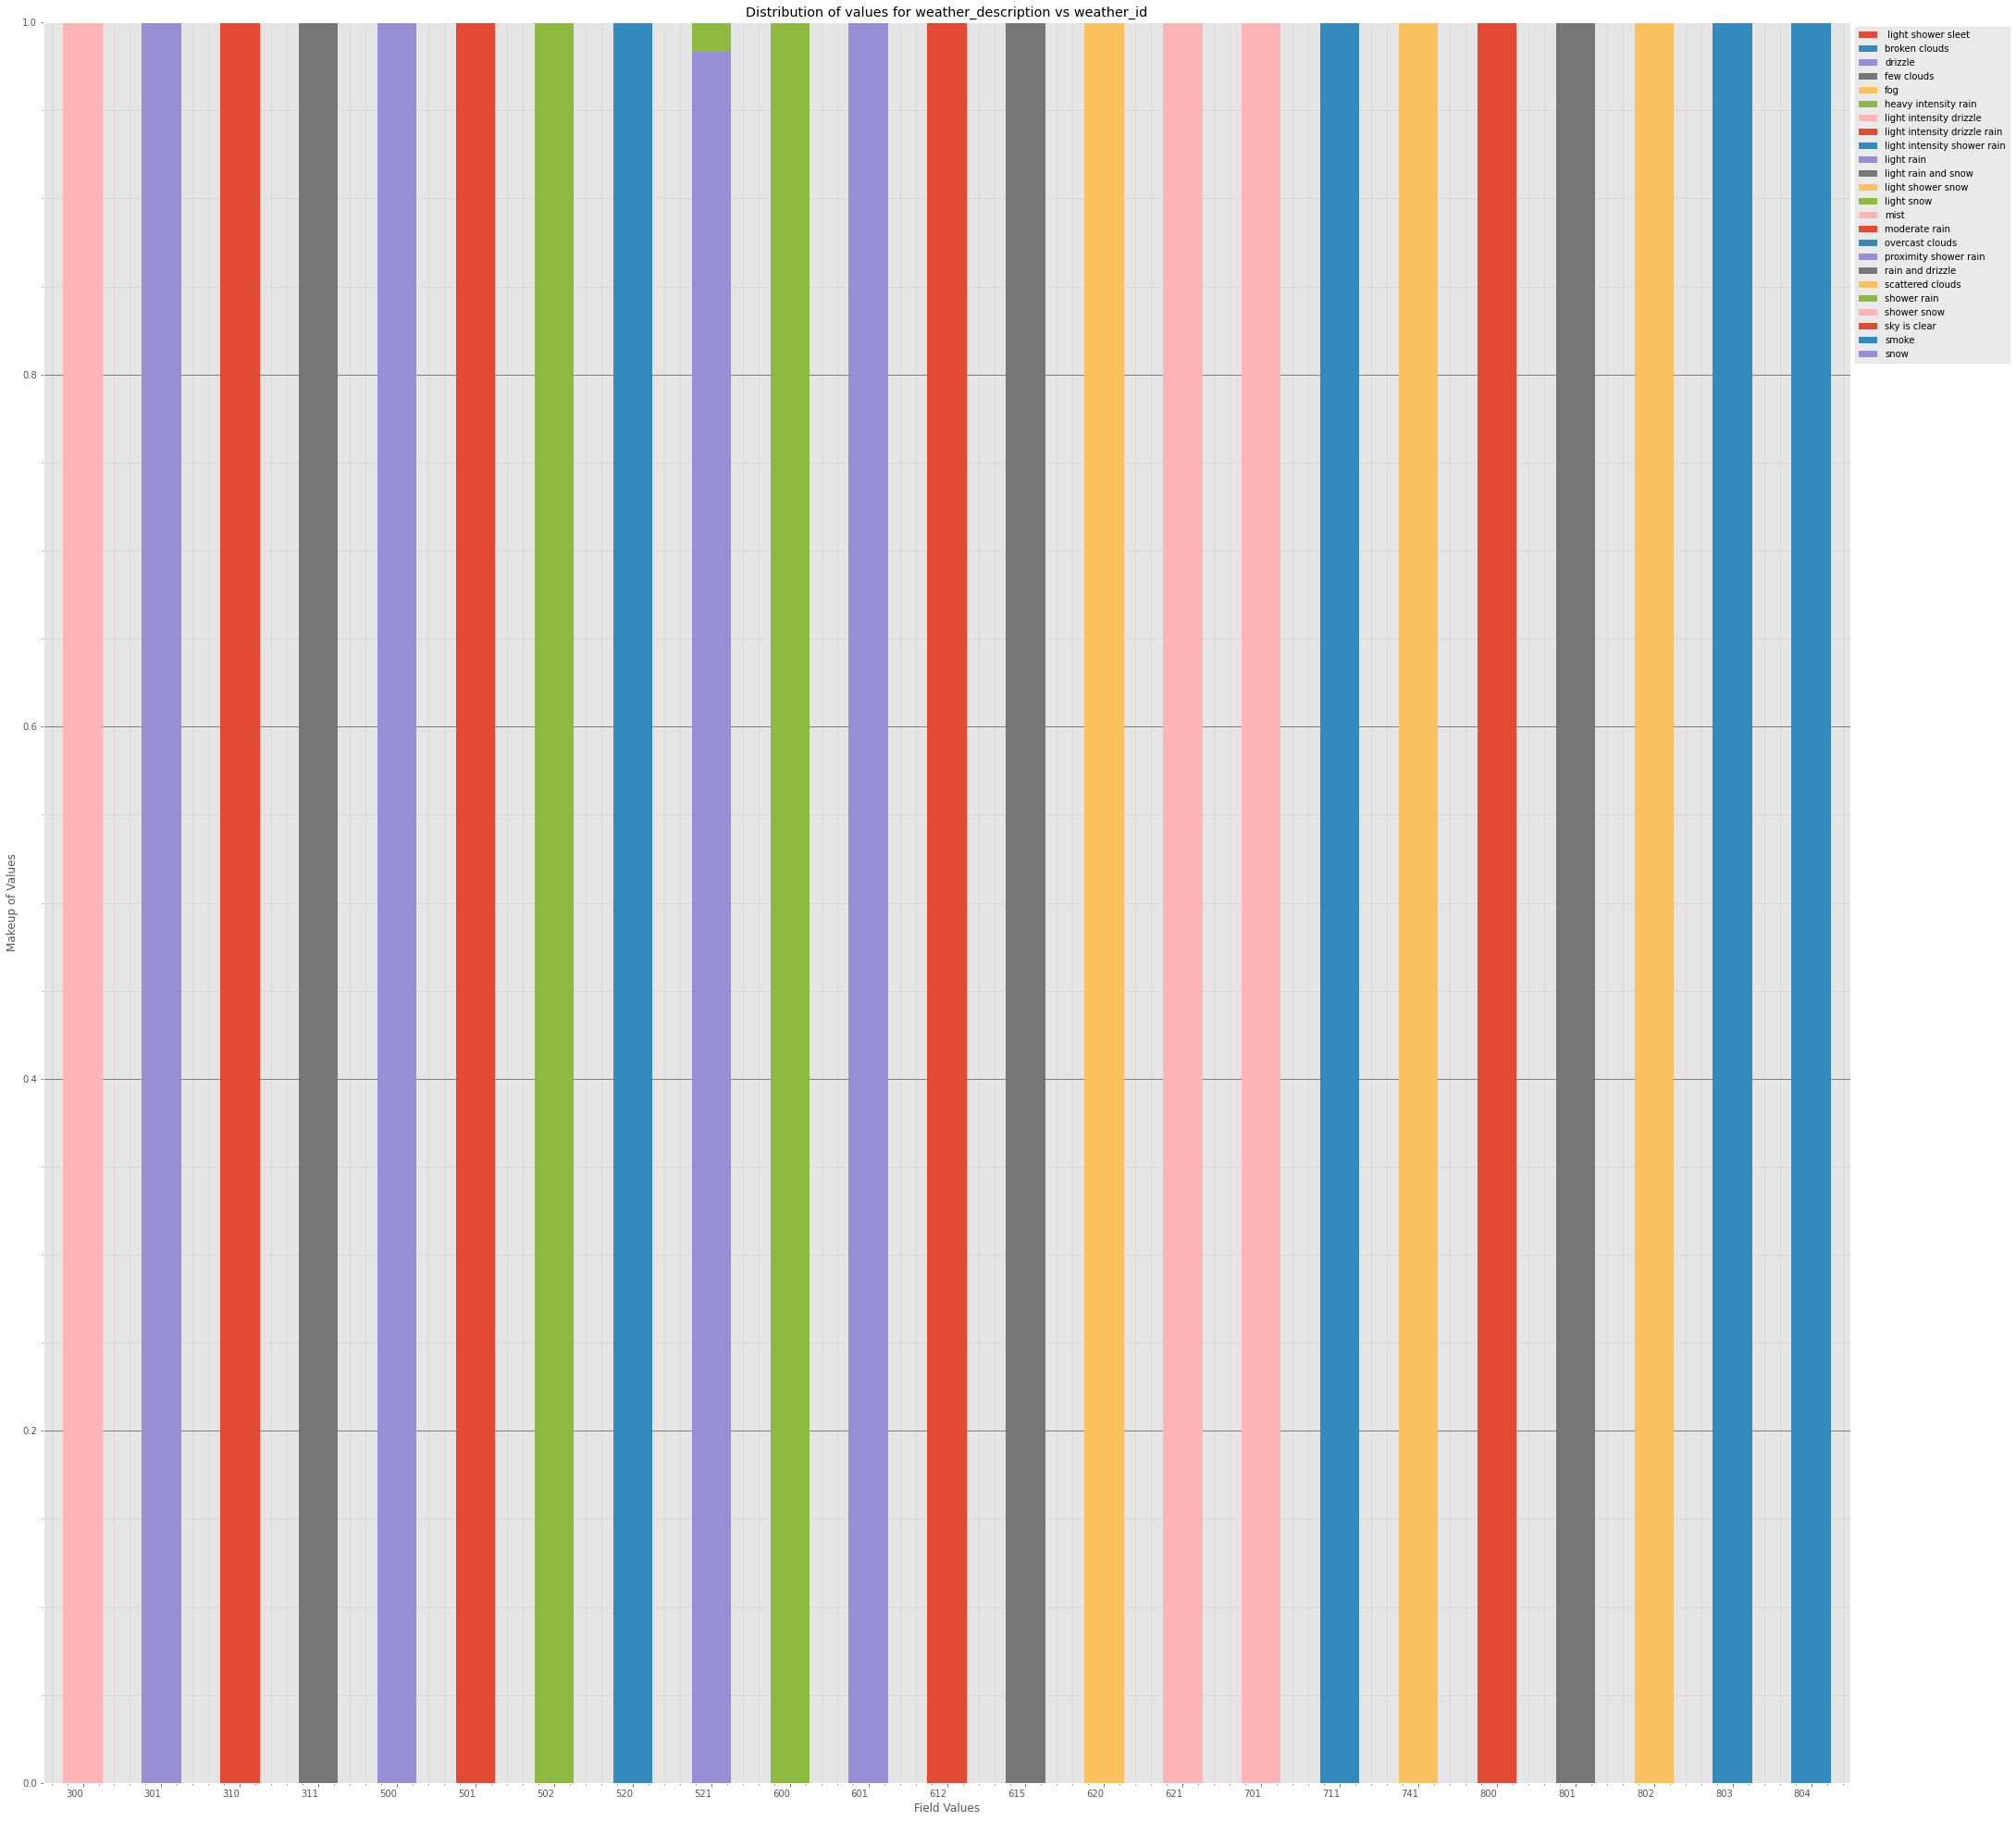



----------------------


Grouping over weather_id|weather_icon results in:



Rows  % Frequency
weather_id weather_icon                   
300        01d              0          0.0
           01n              0          0.0
           02d              0          0.0
           02n              0          0.0
           03d              0          0.0
...                       ...          ...
804        10n              0          0.0
           13d              0          0.0
           13n              0          0.0
           50d              0          0.0
           50n              0          0.0

[368 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
weather_id weather_icon                   
300        09d            132     1.491863
           09n            137     1.548373
301        09n              4     0.045208
310        09d            108     1.220615
           09n            115     1.299729
311        09n              2     0.022604
500        10d            257     2.904611
           10n            352     3.978300
501        10d             17     0.192134
           10n             30     0.339060
502        10n              1     0.011302
520        09d            111     1.254521
           09n            117     1.322333
521        09d            112     1.265823
           09n              8     0.090416
600        13d             11     0.124322
           13n             19     0.214738
601        13d              2     0.022604
           13n              5     0.056510
612        13d              4     0.045208
           13n              7     0.079114
615        13n              1     0.011302
620        13d             27     0.305154
           13n             39     0.440778
621        13n              1     0.011302
701        50d             32     0.361664
           50n             45     0.508590
711        50d              1     0.011302
741        50d             36     0.406872
           50n             53     0.599005
800        01d            237     2.678571
           01n            365     4.125226
801        02d            547     6.182188
           02n            574     6.487342
802        03d            645     7.289783
           03n            578     6.532550
803        04d           2207    24.943490
           04n           1854    20.953888
804        04d             27     0.305154
           04n             28     0.316456

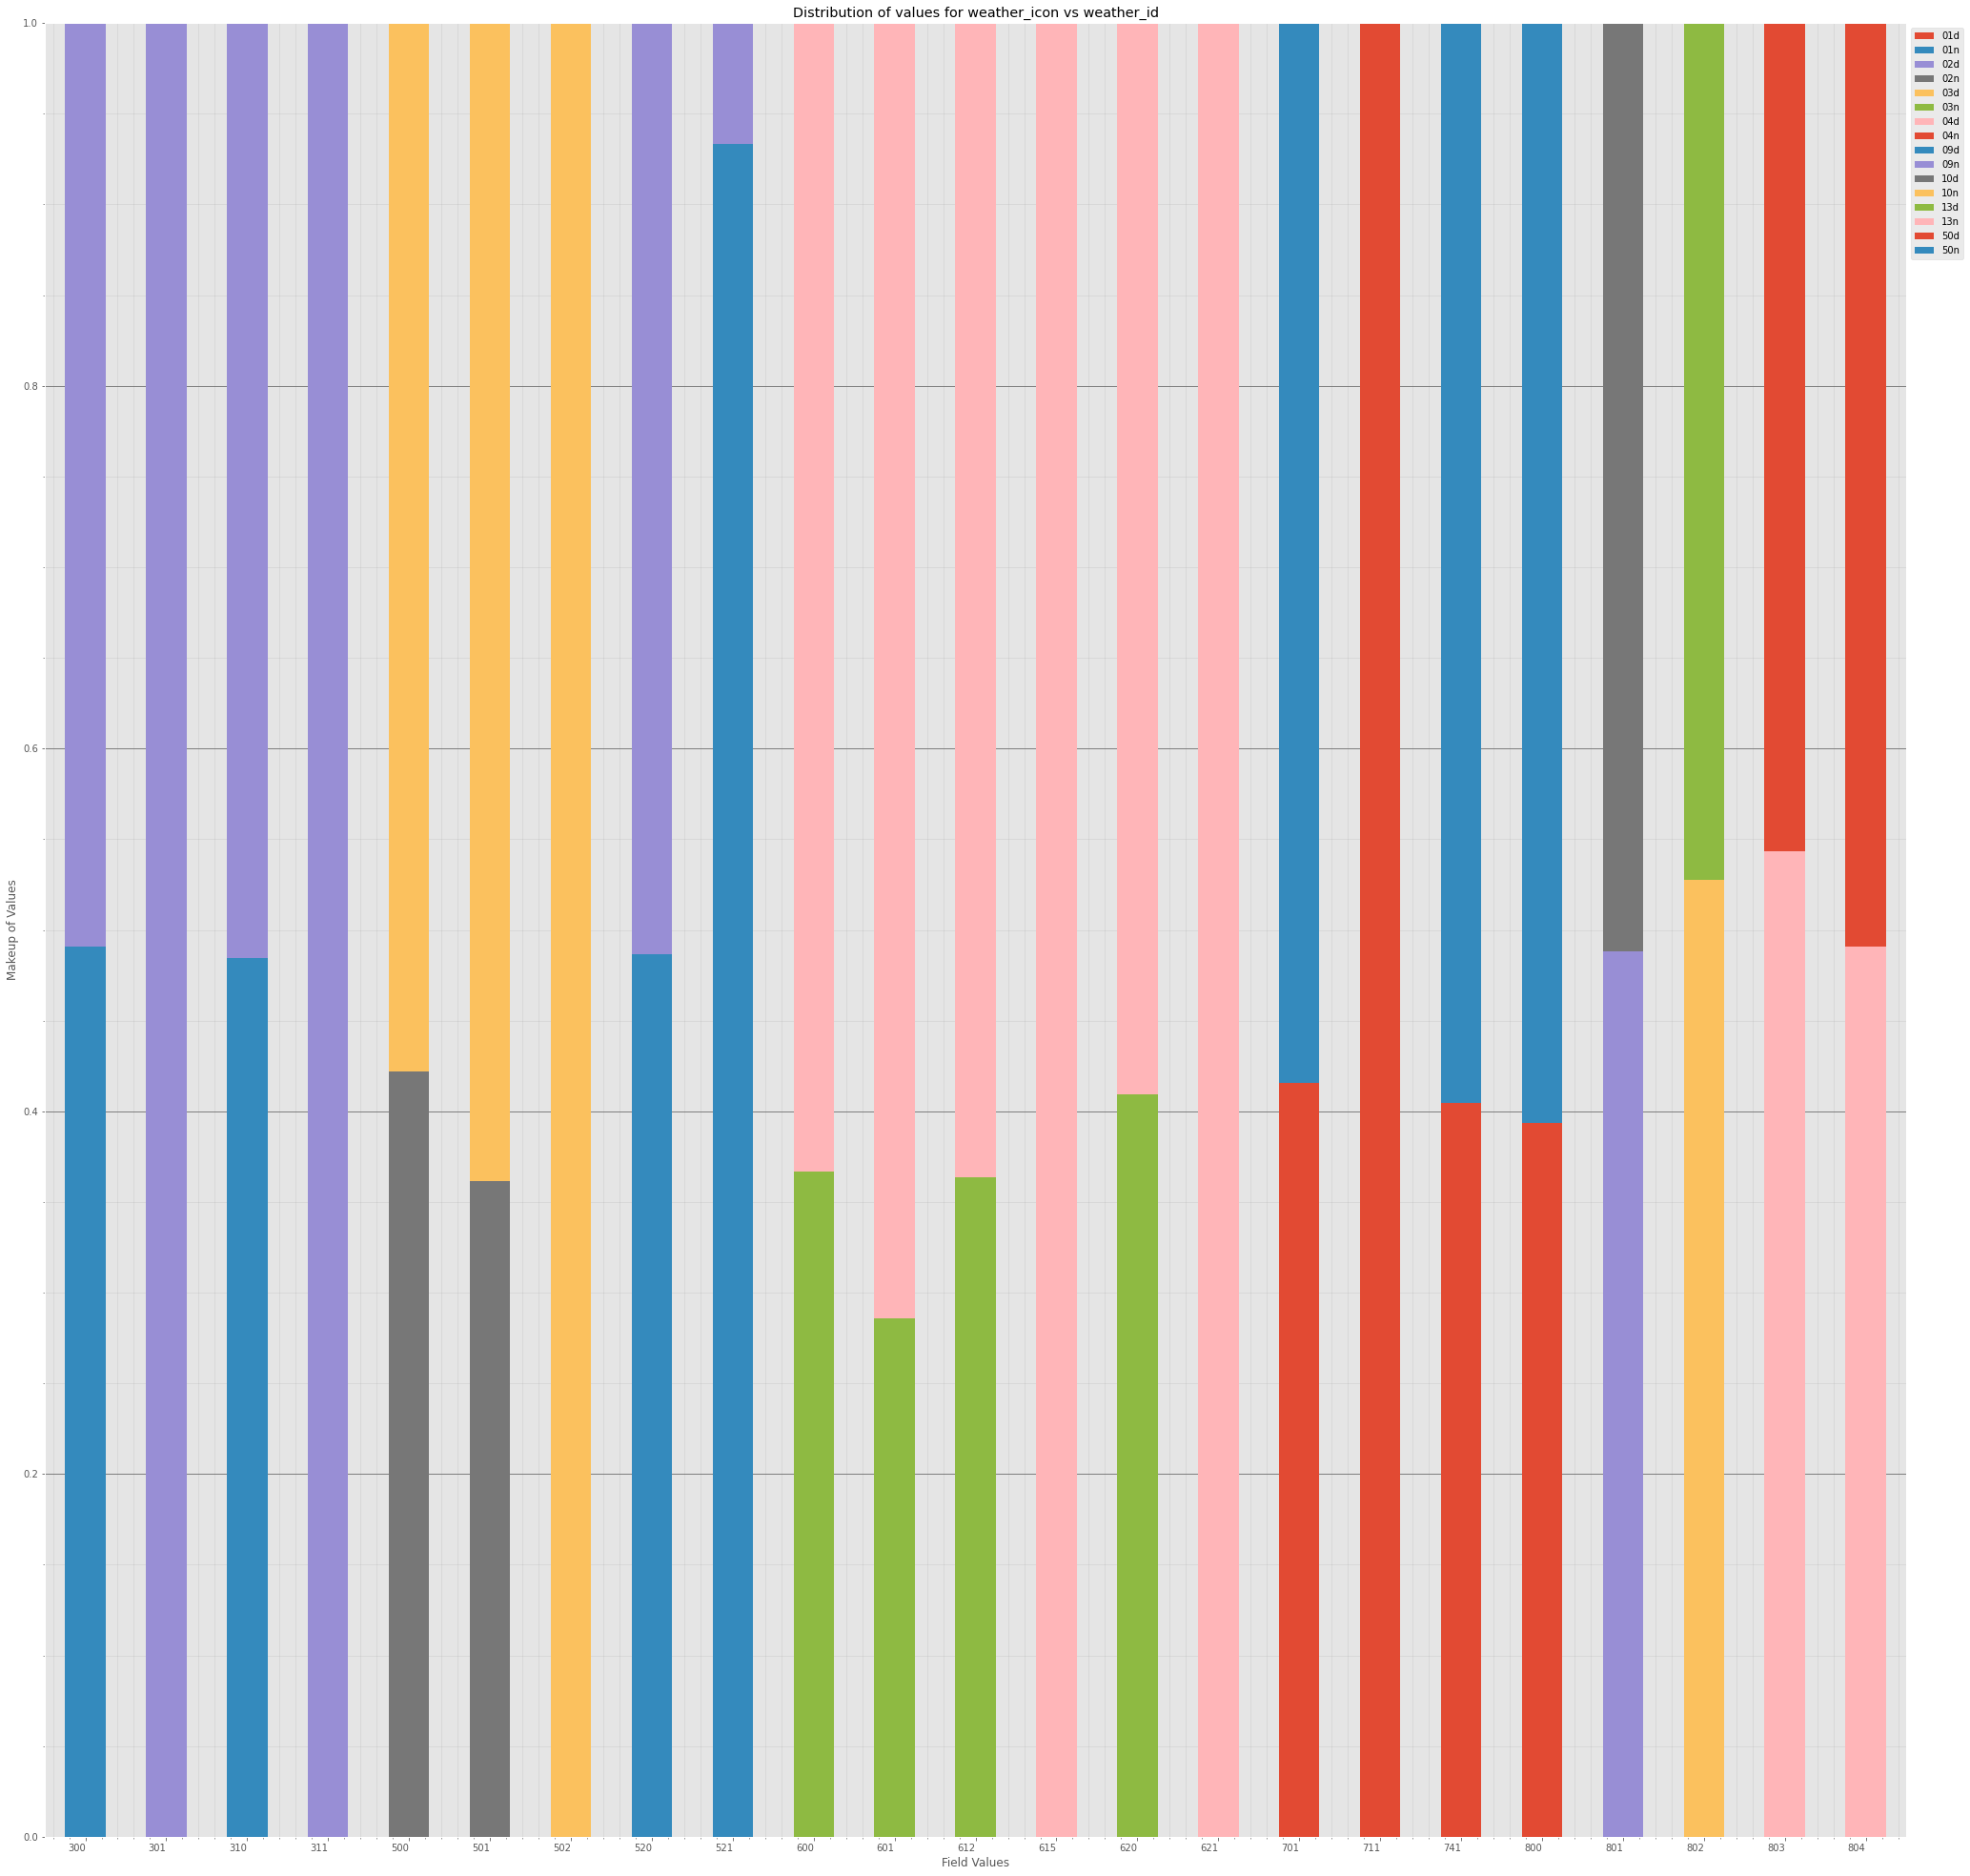



----------------------


Grouping over weather_description|timezone results in:



Rows  % Frequency
weather_description          timezone                   
 light shower sleet          0           10     0.113020
                             3600         1     0.011302
broken clouds                0         1597    18.049277
                             3600      2464    27.848101
drizzle                      0            2     0.022604
                             3600         2     0.022604
few clouds                   0          415     4.690325
                             3600       706     7.979204
fog                          0           50     0.565099
                             3600        39     0.440778
heavy intensity rain         0            1     0.011302
                             3600         0     0.000000
light intensity drizzle      0          130     1.469259
                             3600       139     1.570976
light intensity drizzle rain 0          114     1.288427
                             3600       109     1.231917
light intensity shower rain  0          134     1.514467
                             3600        94     1.062387
light rain                   0          324     3.661844
                             3600       285     3.221067
light rain and snow          0            1     0.011302
                             3600         0     0.000000
light shower snow            0           66     0.745931
                             3600         0     0.000000
light snow                   0           30     0.339060
                             3600         0     0.000000
mist                         0           40     0.452080
                             3600        37     0.418174
moderate rain                0           33     0.372966
                             3600        14     0.158228
overcast clouds              0           30     0.339060
                             3600        25     0.282550
proximity shower rain        0           37     0.418174
                             3600        81     0.915461
rain and drizzle             0            2     0.022604
                             3600         0     0.000000
scattered clouds             0          485     5.481465
                             3600       738     8.340868
shower rain                  0            2     0.022604
                             3600         0     0.000000
shower snow                  0            1     0.011302
                             3600         0     0.000000
sky is clear                 0          118     1.333635
                             3600       484     5.470163
smoke                        0            0     0.000000
                             3600         1     0.011302
snow                         0            7     0.079114
                             3600         0     0.000000

Non Zero Data:


Rows  % Frequency
weather_description          timezone                   
 light shower sleet          0           10     0.113020
                             3600         1     0.011302
broken clouds                0         1597    18.049277
                             3600      2464    27.848101
drizzle                      0            2     0.022604
                             3600         2     0.022604
few clouds                   0          415     4.690325
                             3600       706     7.979204
fog                          0           50     0.565099
                             3600        39     0.440778
heavy intensity rain         0            1     0.011302
light intensity drizzle      0          130     1.469259
                             3600       139     1.570976
light intensity drizzle rain 0          114     1.288427
                             3600       109     1.231917
light intensity shower rain  0          134     1.514467
                             3600        94     1.062387
light rain                   0          324     3.661844
                             3600       285     3.221067
light rain and snow          0            1     0.011302
light shower snow            0           66     0.745931
light snow                   0           30     0.339060
mist                         0           40     0.452080
                             3600        37     0.418174
moderate rain                0           33     0.372966
                             3600        14     0.158228
overcast clouds              0           30     0.339060
                             3600        25     0.282550
proximity shower rain        0           37     0.418174
                             3600        81     0.915461
rain and drizzle             0            2     0.022604
scattered clouds             0          485     5.481465
                             3600       738     8.340868
shower rain                  0            2     0.022604
shower snow                  0            1     0.011302
sky is clear                 0          118     1.333635
                             3600       484     5.470163
smoke                        3600         1     0.011302
snow                         0            7     0.079114

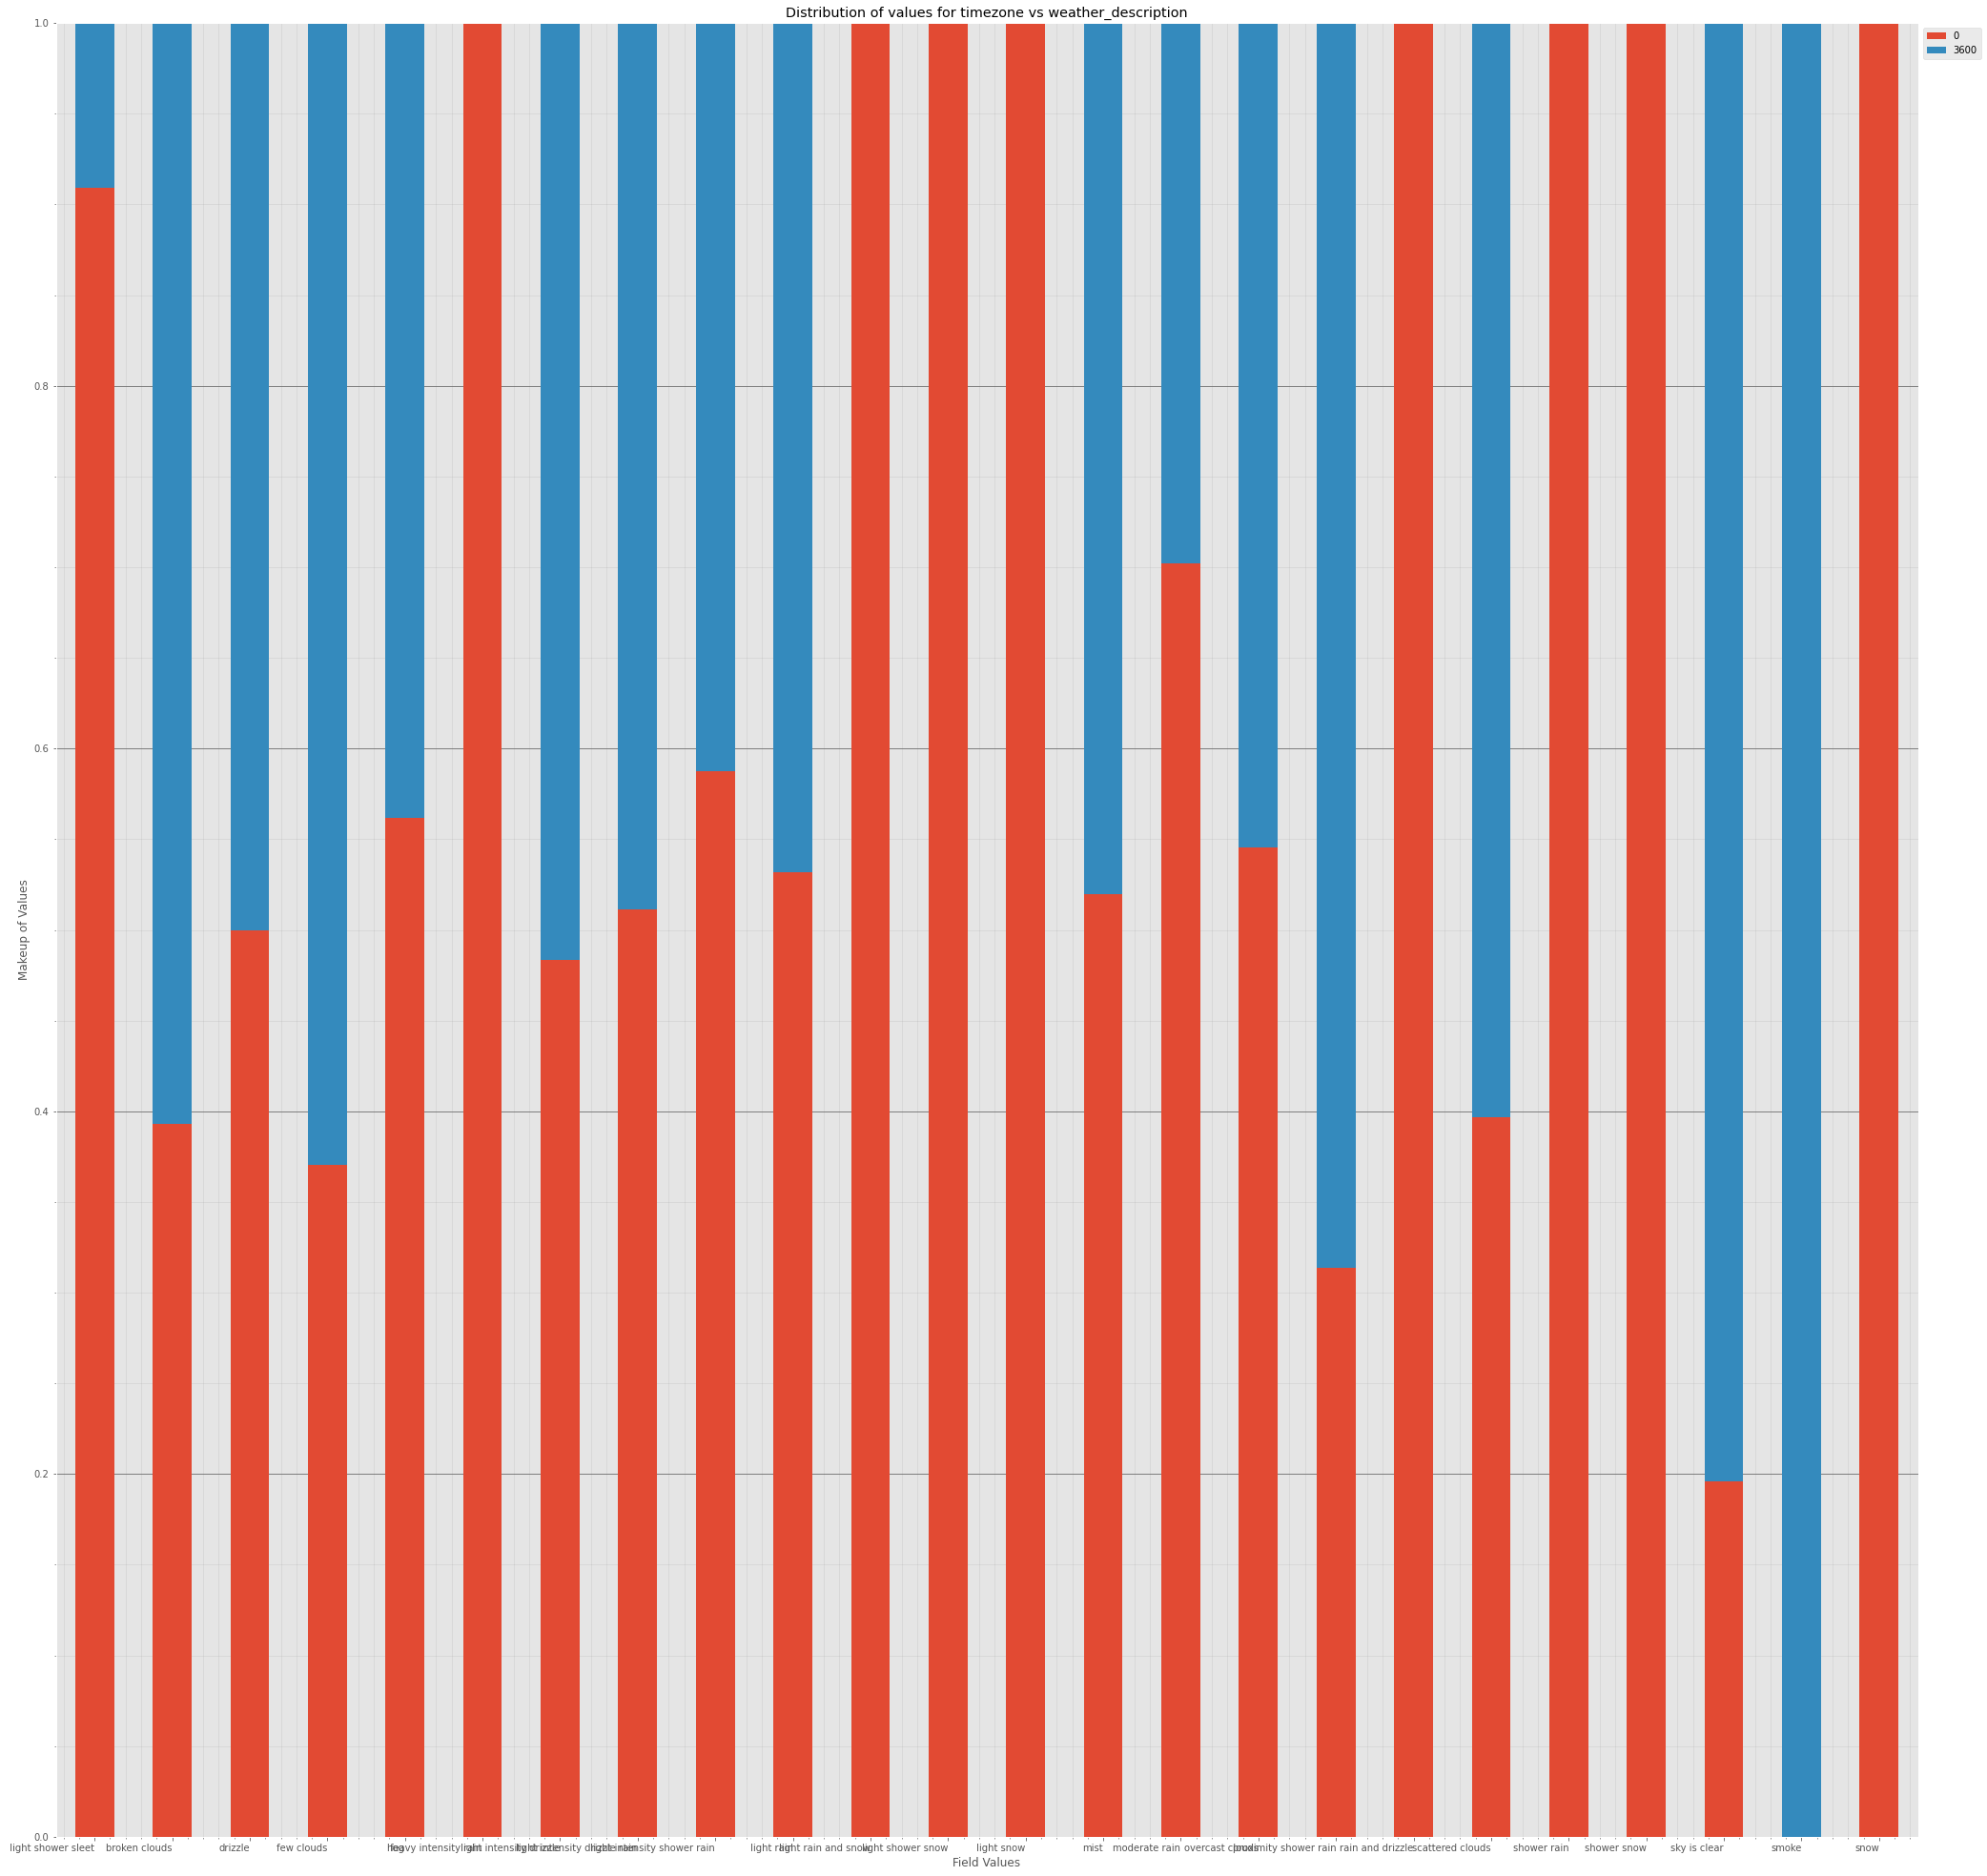



----------------------


Grouping over weather_description|city_name results in:



Rows  % Frequency
weather_description          city_name                   
 light shower sleet          Dublin       11     0.124322
broken clouds                Dublin     4061    45.897378
drizzle                      Dublin        4     0.045208
few clouds                   Dublin     1121    12.669530
fog                          Dublin       89     1.005877
heavy intensity rain         Dublin        1     0.011302
light intensity drizzle      Dublin      269     3.040235
light intensity drizzle rain Dublin      223     2.520344
light intensity shower rain  Dublin      228     2.576854
light rain                   Dublin      609     6.882911
light rain and snow          Dublin        1     0.011302
light shower snow            Dublin       66     0.745931
light snow                   Dublin       30     0.339060
mist                         Dublin       77     0.870253
moderate rain                Dublin       47     0.531193
overcast clouds              Dublin       55     0.621609
proximity shower rain        Dublin      118     1.333635
rain and drizzle             Dublin        2     0.022604
scattered clouds             Dublin     1223    13.822333
shower rain                  Dublin        2     0.022604
shower snow                  Dublin        1     0.011302
sky is clear                 Dublin      602     6.803797
smoke                        Dublin        1     0.011302
snow                         Dublin        7     0.079114

Non Zero Data:


Rows  % Frequency
weather_description          city_name                   
 light shower sleet          Dublin       11     0.124322
broken clouds                Dublin     4061    45.897378
drizzle                      Dublin        4     0.045208
few clouds                   Dublin     1121    12.669530
fog                          Dublin       89     1.005877
heavy intensity rain         Dublin        1     0.011302
light intensity drizzle      Dublin      269     3.040235
light intensity drizzle rain Dublin      223     2.520344
light intensity shower rain  Dublin      228     2.576854
light rain                   Dublin      609     6.882911
light rain and snow          Dublin        1     0.011302
light shower snow            Dublin       66     0.745931
light snow                   Dublin       30     0.339060
mist                         Dublin       77     0.870253
moderate rain                Dublin       47     0.531193
overcast clouds              Dublin       55     0.621609
proximity shower rain        Dublin      118     1.333635
rain and drizzle             Dublin        2     0.022604
scattered clouds             Dublin     1223    13.822333
shower rain                  Dublin        2     0.022604
shower snow                  Dublin        1     0.011302
sky is clear                 Dublin      602     6.803797
smoke                        Dublin        1     0.011302
snow                         Dublin        7     0.079114

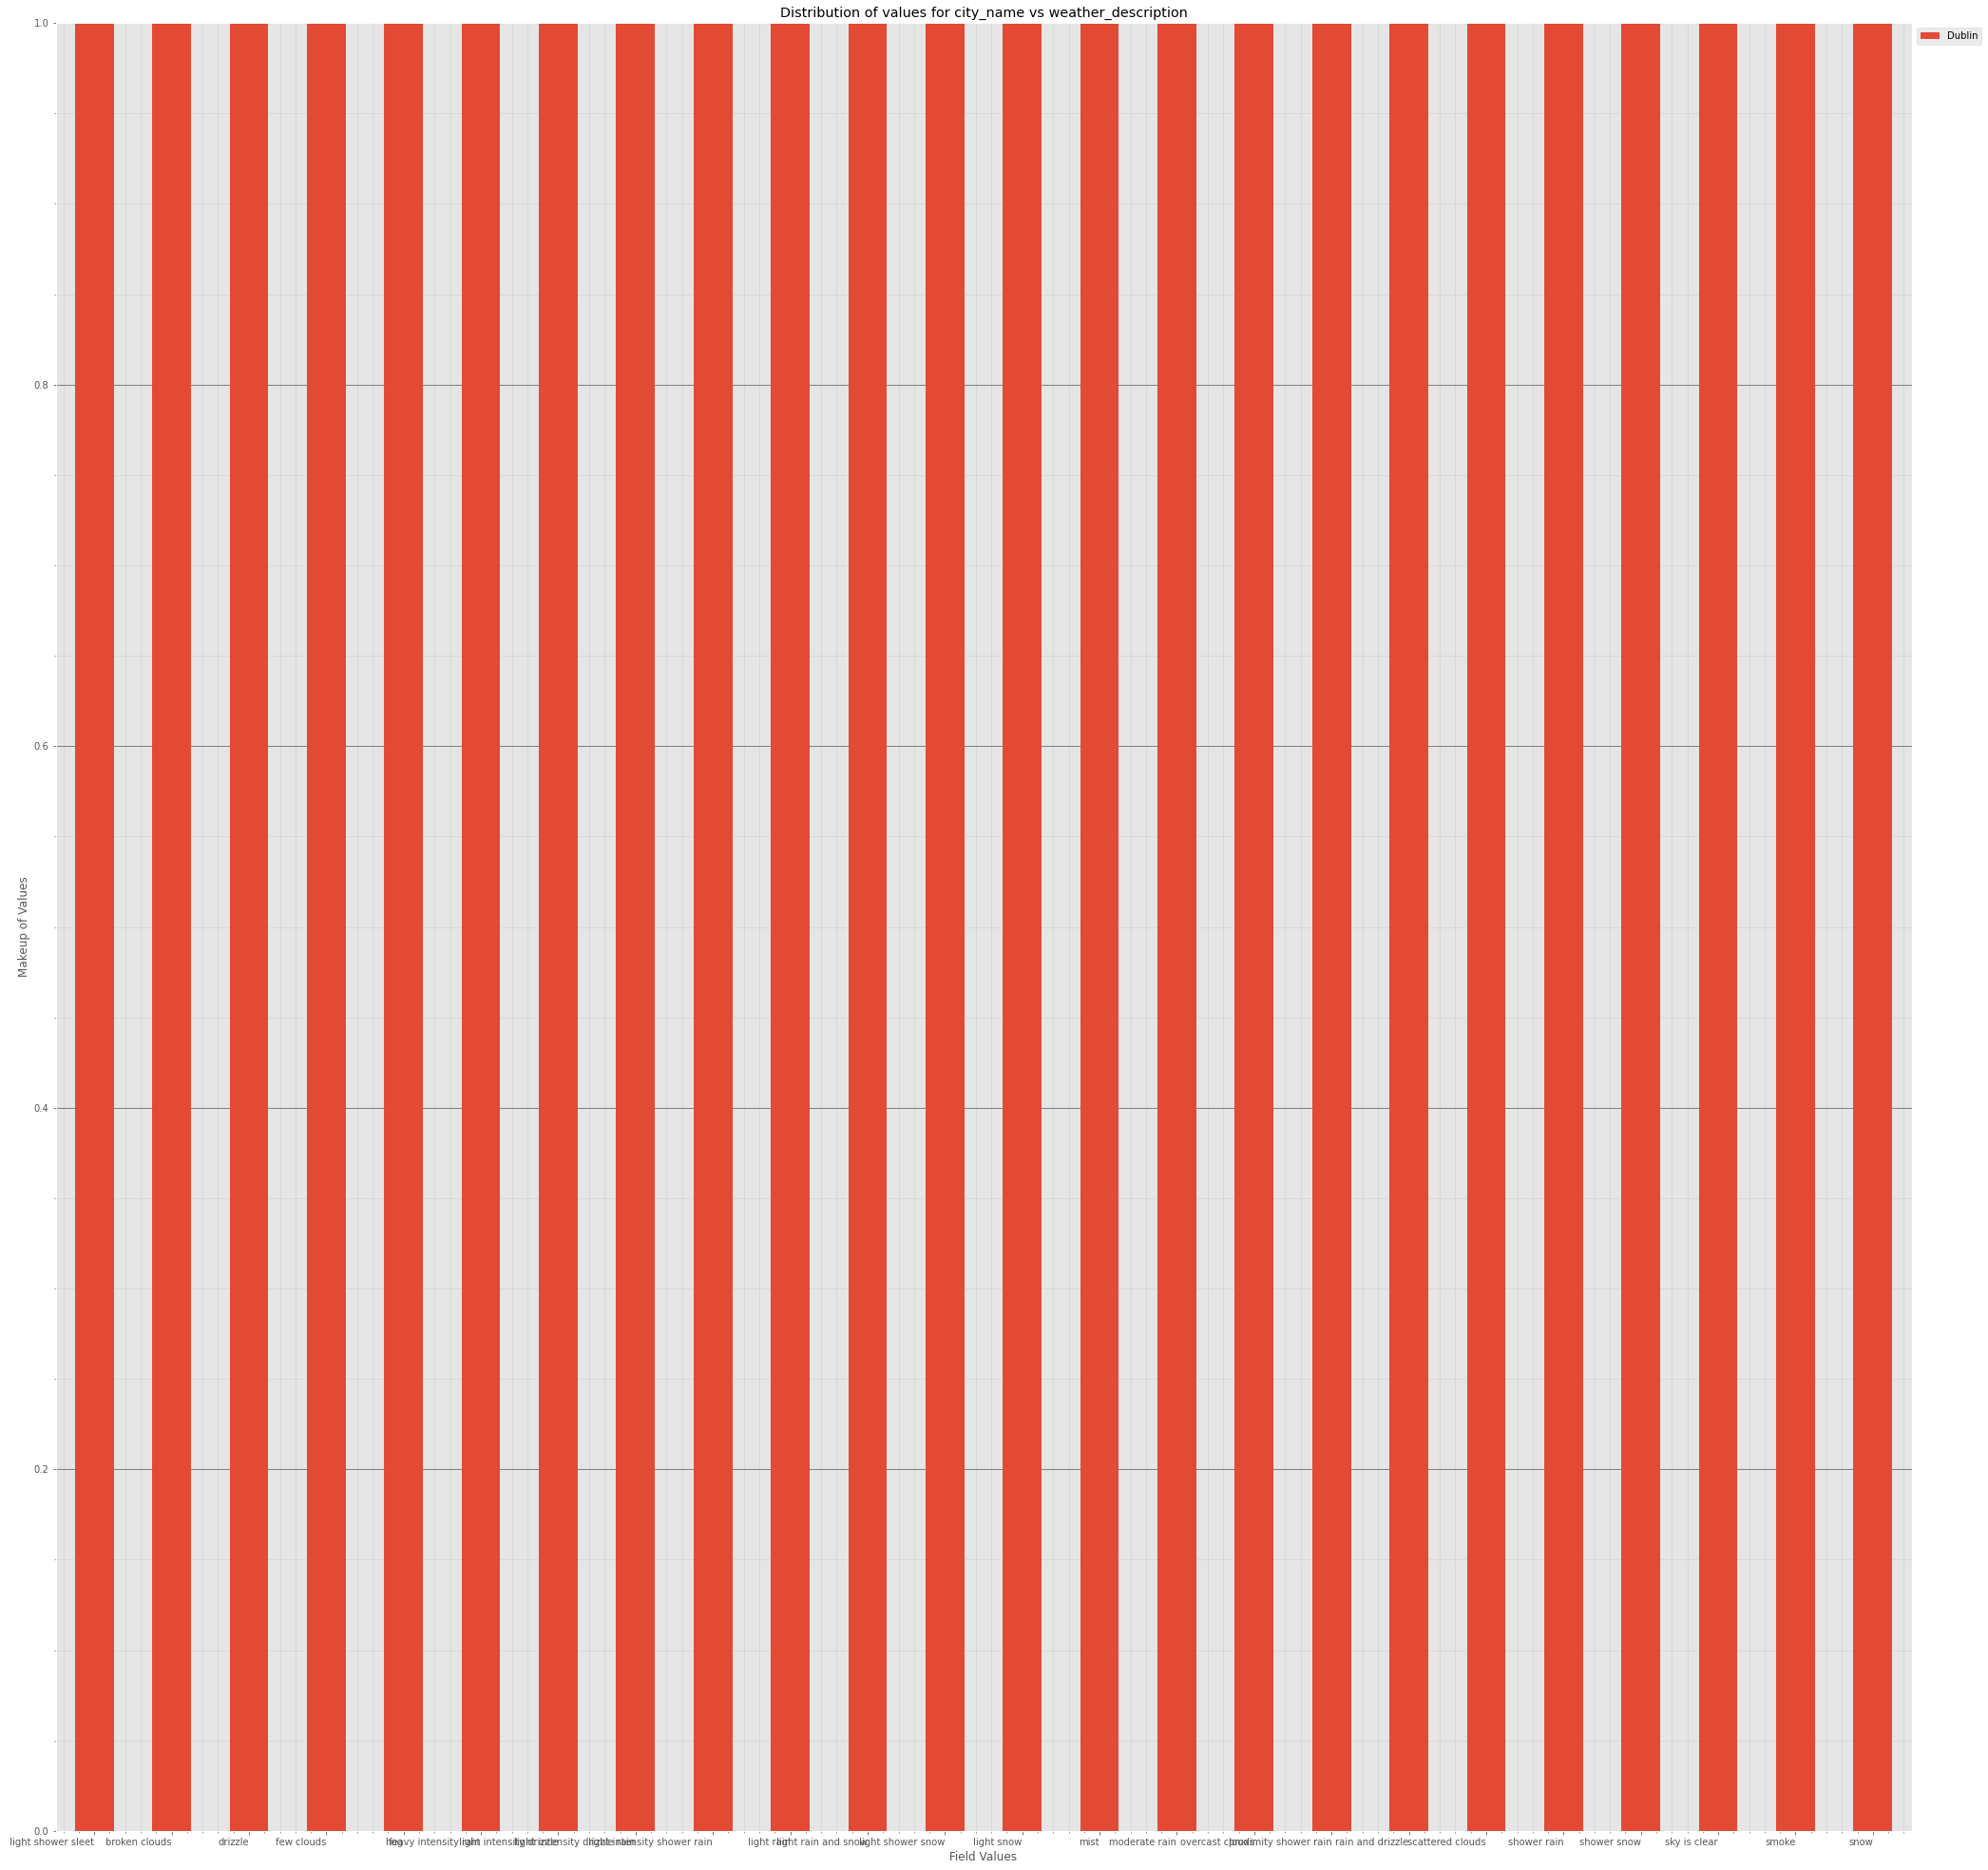



----------------------


Grouping over weather_description|clouds_all results in:



Rows  % Frequency
weather_description clouds_all                   
 light shower sleet 0              0     0.000000
                    1              0     0.000000
                    10             0     0.000000
                    100            0     0.000000
                    11             0     0.000000
...                              ...          ...
snow                84             0     0.000000
                    87             0     0.000000
                    90             1     0.011302
                    91             0     0.000000
                    99             0     0.000000

[480 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
weather_description          clouds_all                   
 light shower sleet          40             2     0.022604
                             75             9     0.101718
broken clouds                69             1     0.011302
                             75          4058    45.863472
                             83             1     0.011302
                             84             1     0.011302
drizzle                      75             4     0.045208
few clouds                   11             2     0.022604
                             20          1118    12.635624
                             21             1     0.011302
fog                          100            2     0.022604
                             20            13     0.146926
                             40            12     0.135624
                             75            55     0.621609
                             90             7     0.079114
heavy intensity rain         75             1     0.011302
light intensity drizzle      100            1     0.011302
                             75           255     2.882007
                             90            13     0.146926
light intensity drizzle rain 75           208     2.350814
                             90            15     0.169530
light intensity shower rain  20             1     0.011302
                             40            38     0.429476
                             75           188     2.124774
                             90             1     0.011302
light rain                   100            1     0.011302
                             75           588     6.645570
                             90            20     0.226040
light rain and snow          75             1     0.011302
light shower snow            40             2     0.022604
                             75            64     0.723327
light snow                   75            22     0.248644
                             90             8     0.090416
mist                         20            10     0.113020
                             40             4     0.045208
                             75            52     0.587703
                             90            10     0.113020
                             91             1     0.011302
moderate rain                75            42     0.474684
                             90             5     0.056510
overcast clouds              87             1     0.011302
                             90            53     0.599005
                             99             1     0.011302
proximity shower rain        20             7     0.079114
                             40            23     0.259946
                             75            88     0.994575
rain and drizzle             75             2     0.022604
scattered clouds             26             1     0.011302
                             40          1222    13.811031
shower rain                  75             2     0.022604
shower snow                  75             1     0.011302
sky is clear                 0            593     6.702080
                             1              2     0.022604
                             10             1     0.011302
                             2              4     0.045208
                             3              1     0.011302
                             5              1     0.011302
smoke                        20             1     0.011302
snow                         75             6     0.067812
                             90             1     0.011302

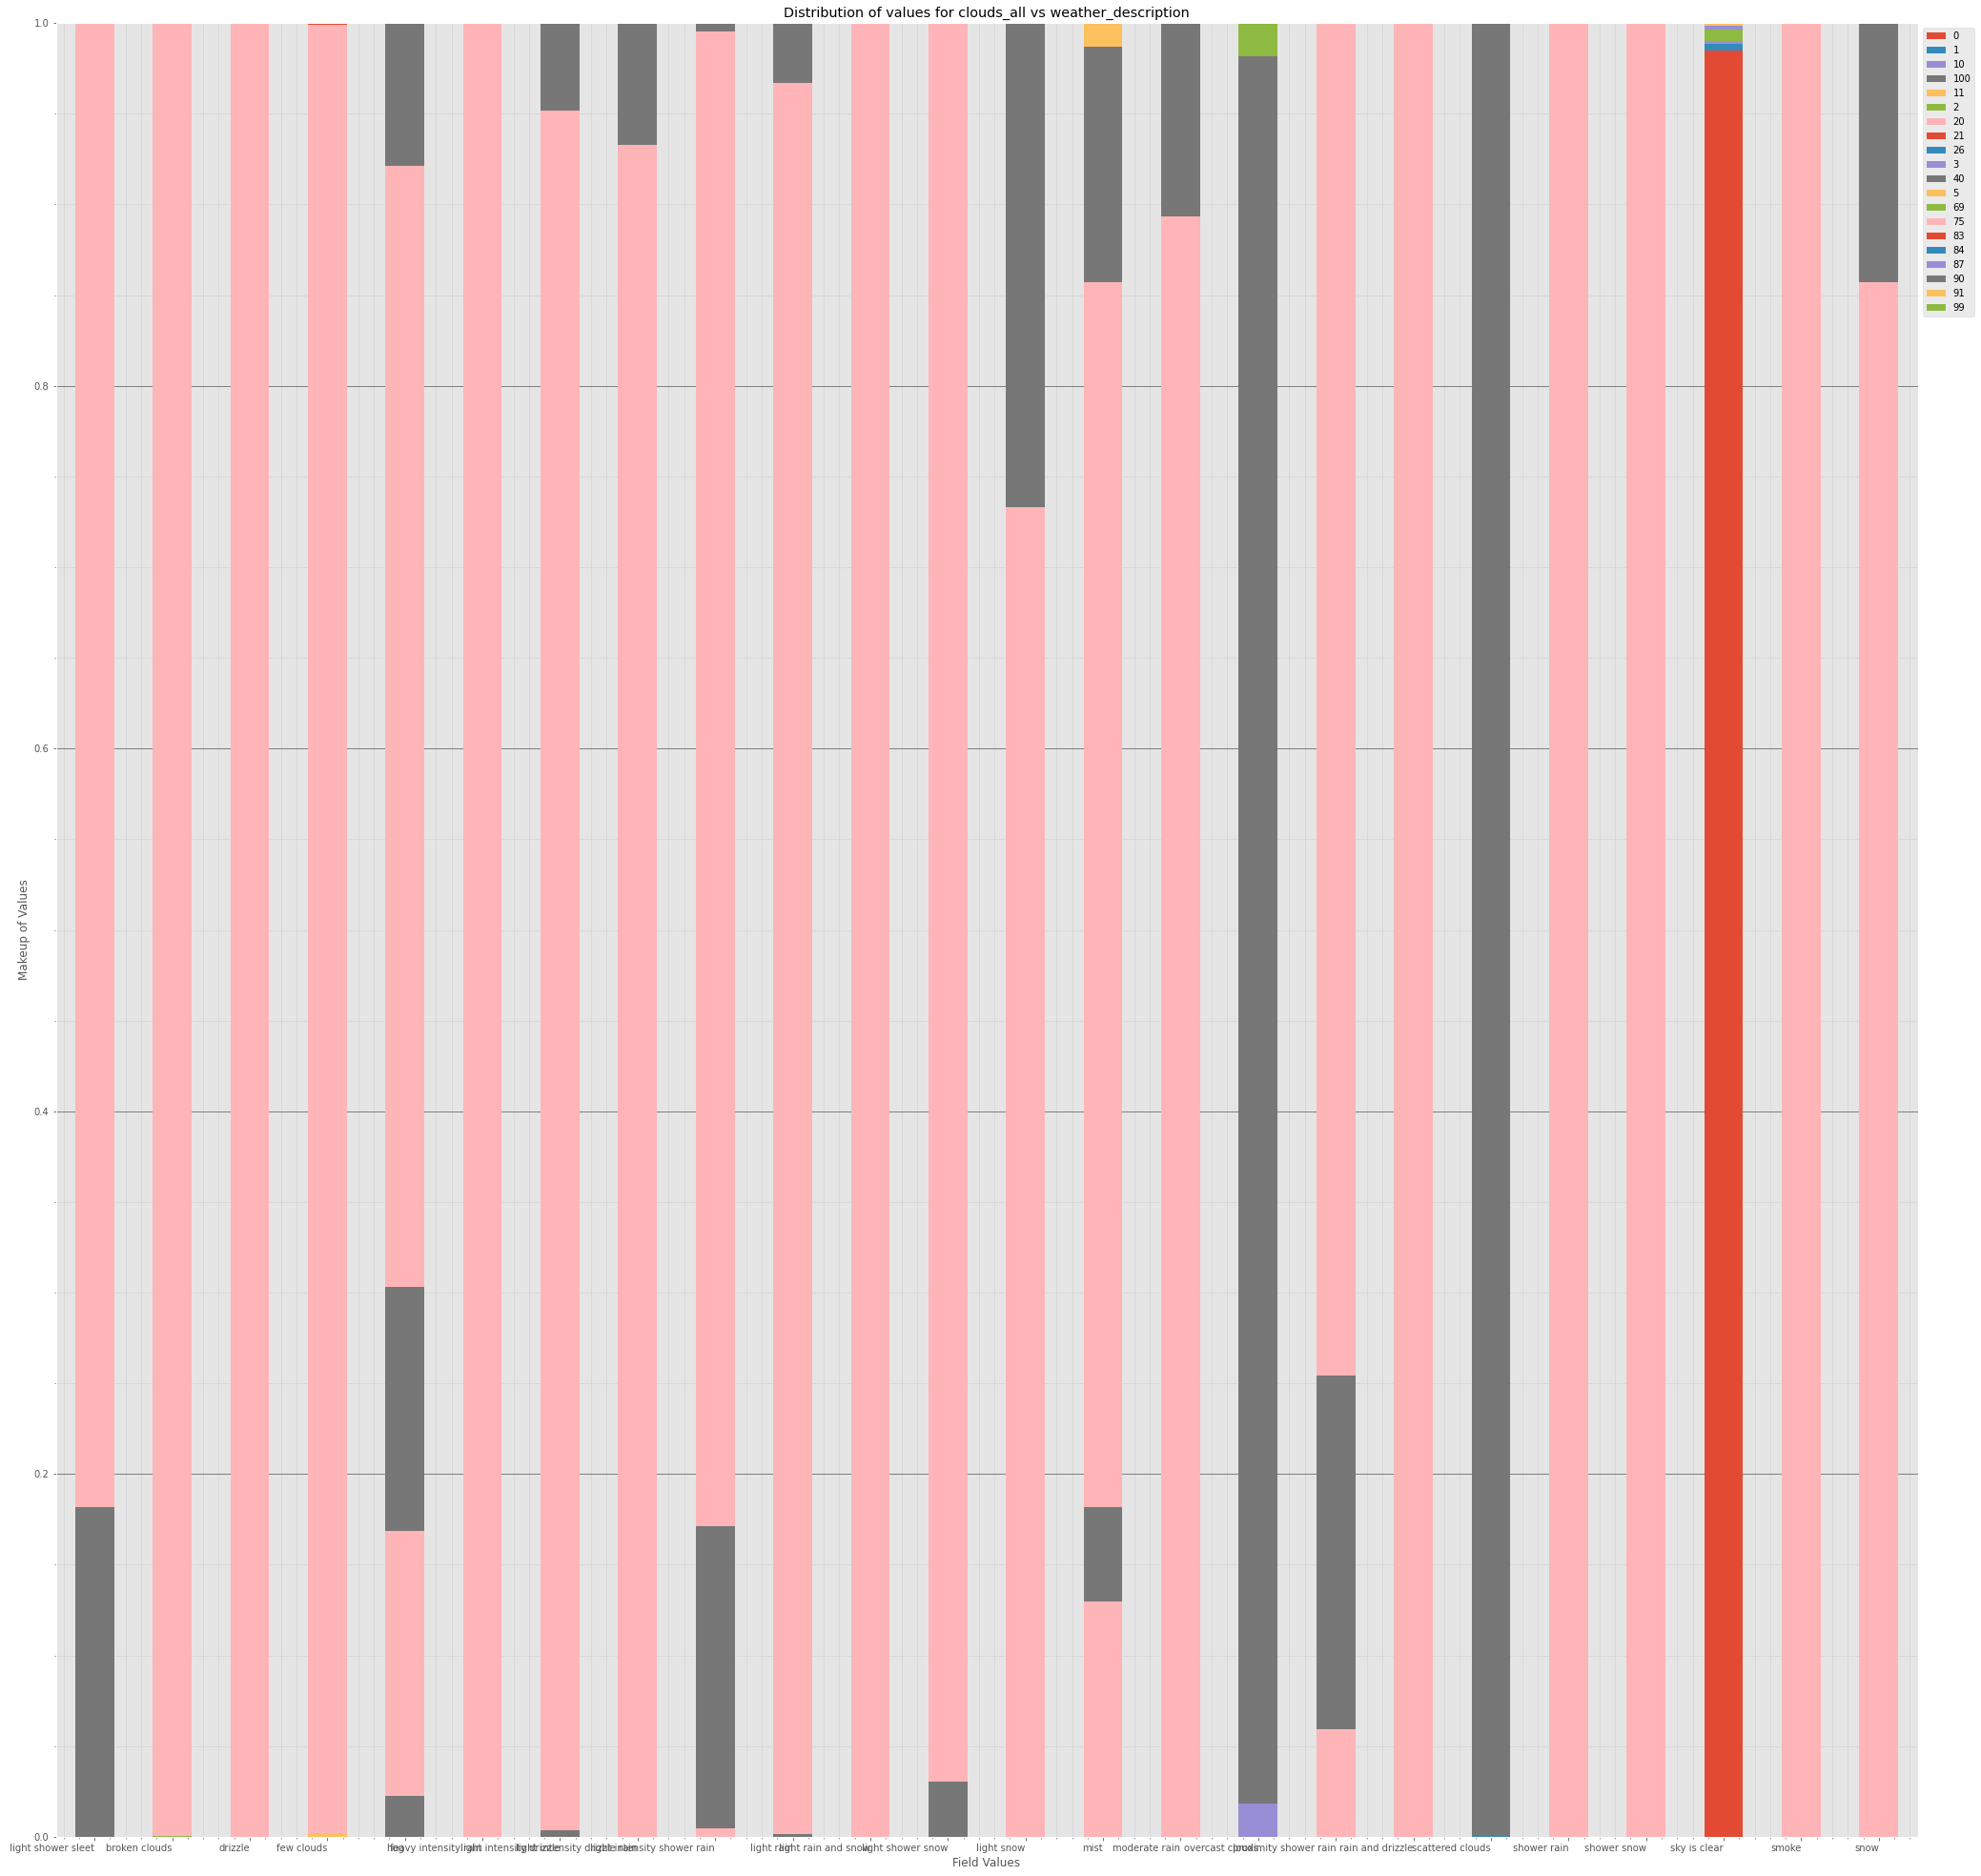



----------------------


Grouping over weather_description|weather_id results in:



Rows  % Frequency
weather_description weather_id                   
 light shower sleet 300            0          0.0
                    301            0          0.0
                    310            0          0.0
                    311            0          0.0
                    500            0          0.0
...                              ...          ...
snow                800            0          0.0
                    801            0          0.0
                    802            0          0.0
                    803            0          0.0
                    804            0          0.0

[552 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
weather_description          weather_id                   
 light shower sleet          612           11     0.124322
broken clouds                803         4061    45.897378
drizzle                      301            4     0.045208
few clouds                   801         1121    12.669530
fog                          741           89     1.005877
heavy intensity rain         502            1     0.011302
light intensity drizzle      300          269     3.040235
light intensity drizzle rain 310          223     2.520344
light intensity shower rain  520          228     2.576854
light rain                   500          609     6.882911
light rain and snow          615            1     0.011302
light shower snow            620           66     0.745931
light snow                   600           30     0.339060
mist                         701           77     0.870253
moderate rain                501           47     0.531193
overcast clouds              804           55     0.621609
proximity shower rain        521          118     1.333635
rain and drizzle             311            2     0.022604
scattered clouds             802         1223    13.822333
shower rain                  521            2     0.022604
shower snow                  621            1     0.011302
sky is clear                 800          602     6.803797
smoke                        711            1     0.011302
snow                         601            7     0.079114

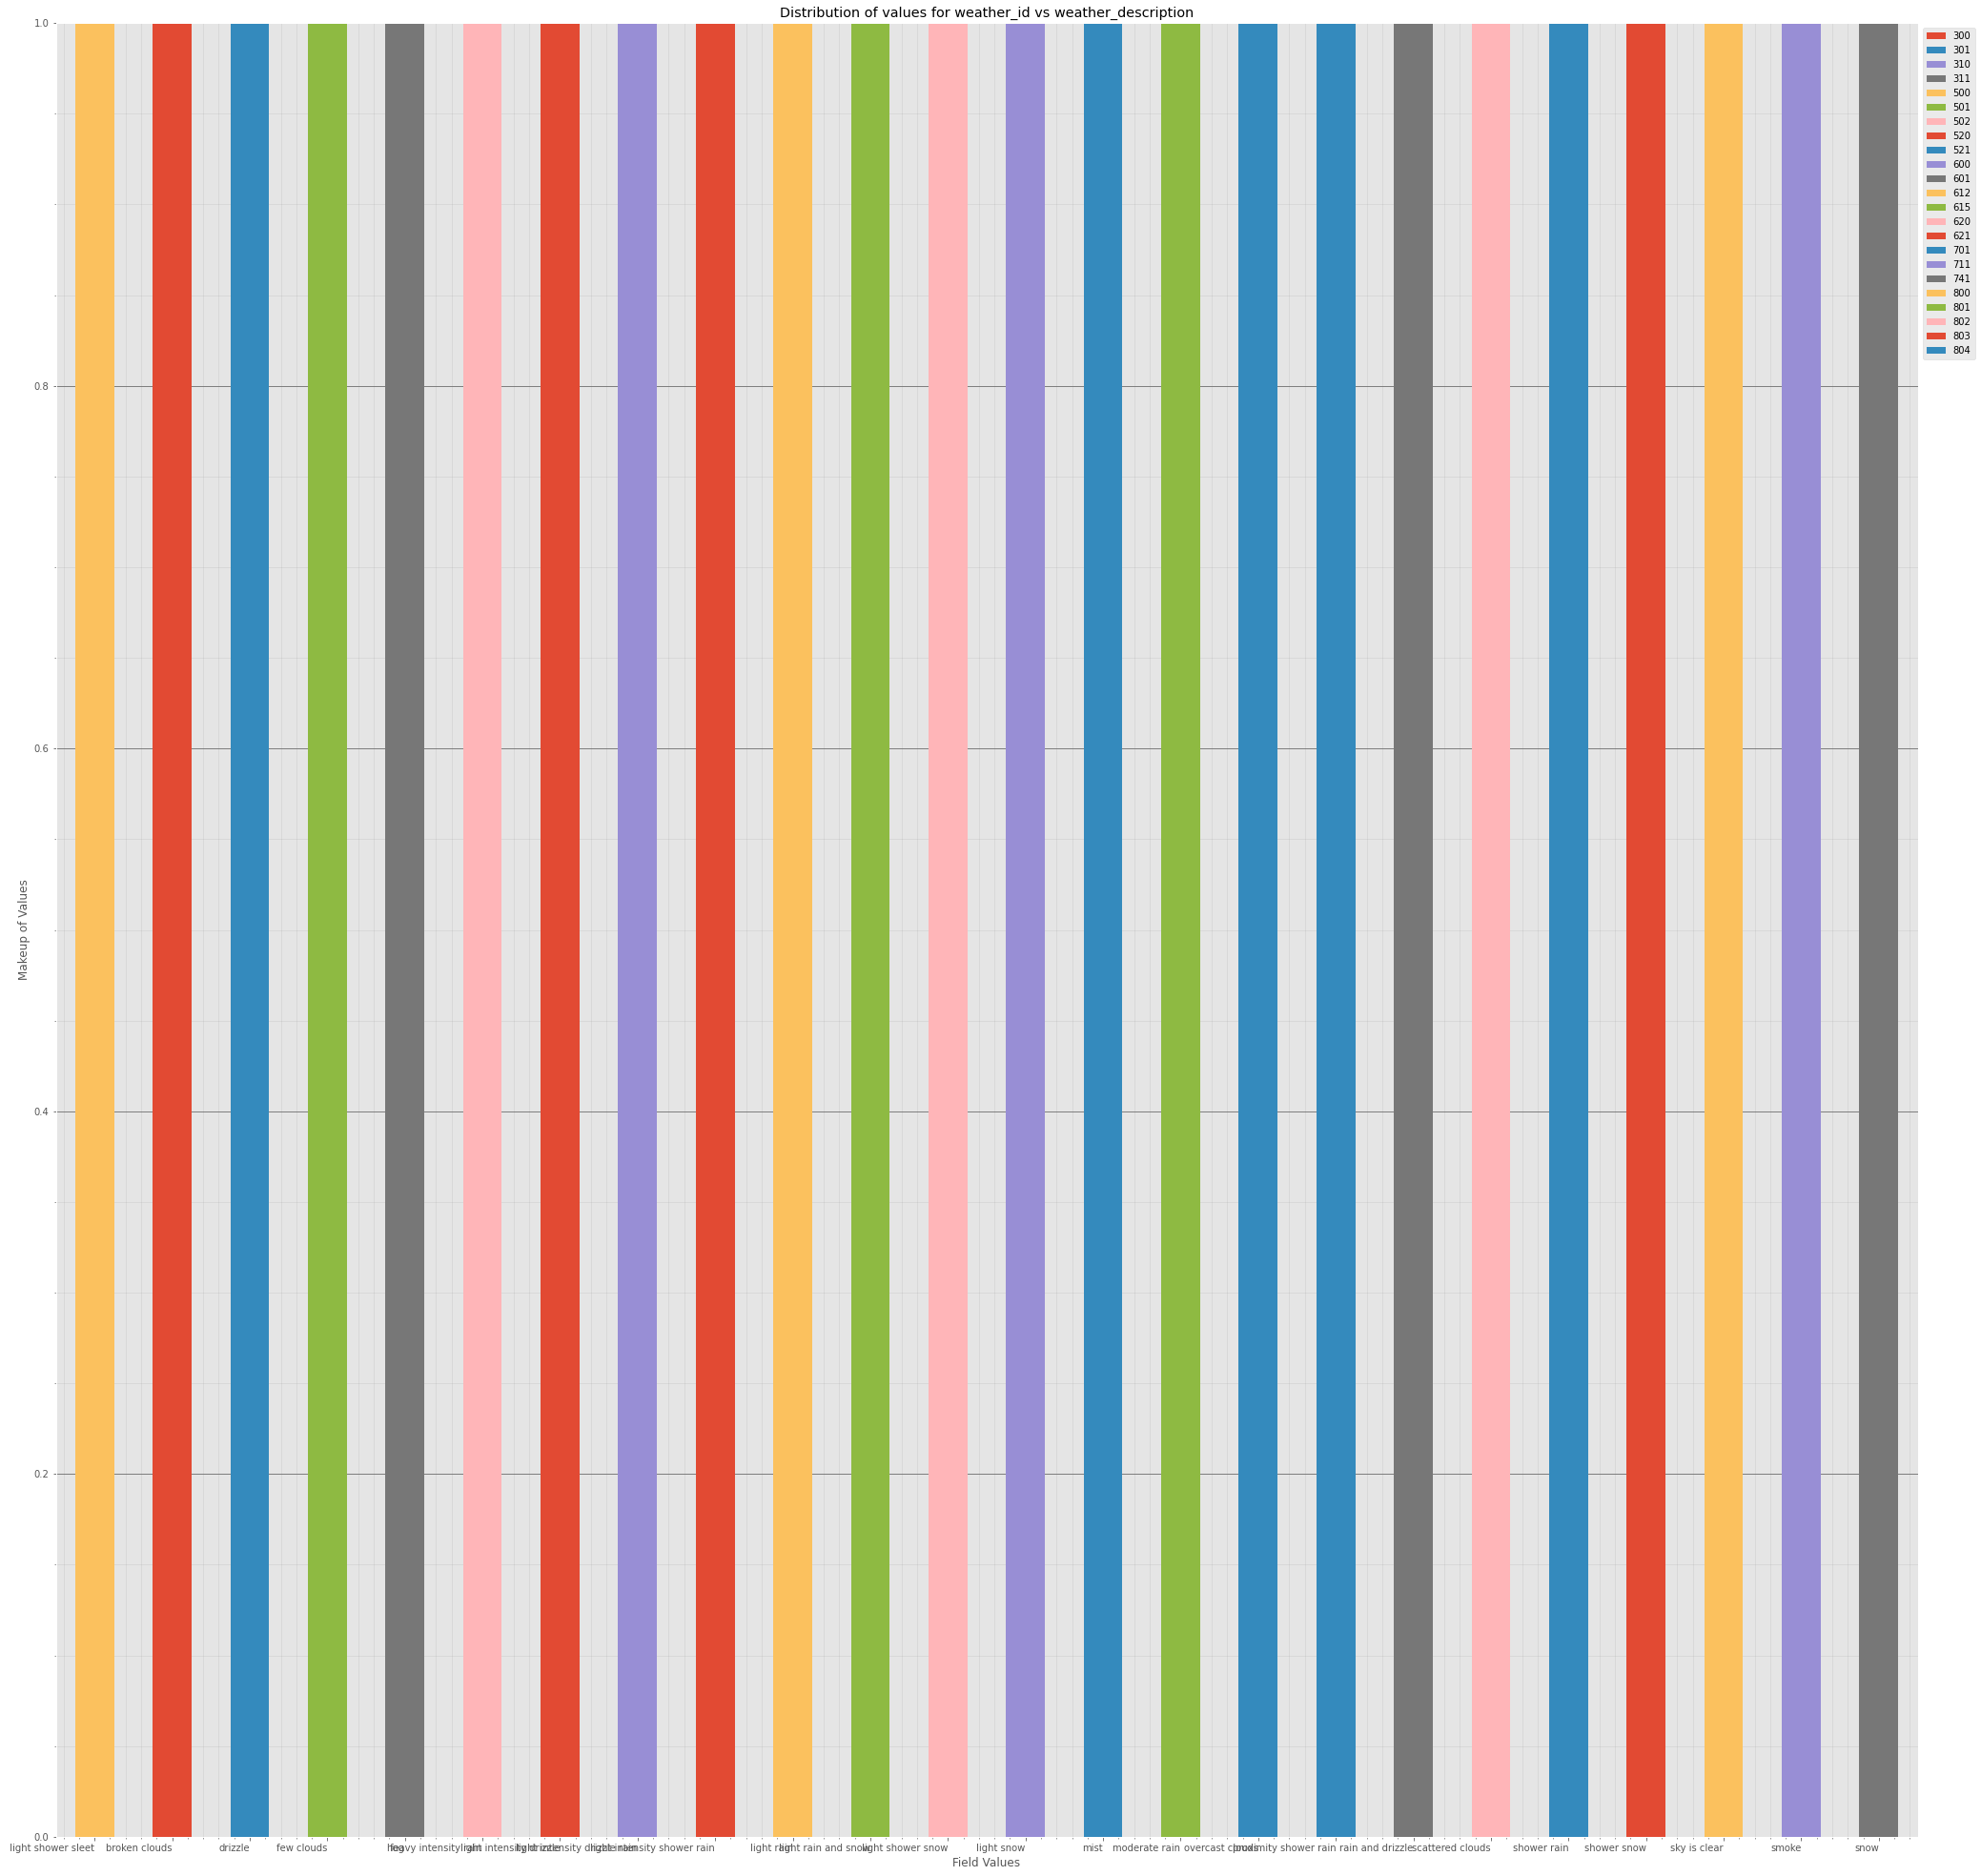



----------------------


Grouping over weather_description|weather_icon results in:



Rows  % Frequency
weather_description weather_icon                   
 light shower sleet 01d              0     0.000000
                    01n              0     0.000000
                    02d              0     0.000000
                    02n              0     0.000000
                    03d              0     0.000000
...                                ...          ...
snow                10n              0     0.000000
                    13d              2     0.022604
                    13n              5     0.056510
                    50d              0     0.000000
                    50n              0     0.000000

[384 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
weather_description          weather_icon                   
 light shower sleet          13d              4     0.045208
                             13n              7     0.079114
broken clouds                04d           2207    24.943490
                             04n           1854    20.953888
drizzle                      09n              4     0.045208
few clouds                   02d            547     6.182188
                             02n            574     6.487342
fog                          50d             36     0.406872
                             50n             53     0.599005
heavy intensity rain         10n              1     0.011302
light intensity drizzle      09d            132     1.491863
                             09n            137     1.548373
light intensity drizzle rain 09d            108     1.220615
                             09n            115     1.299729
light intensity shower rain  09d            111     1.254521
                             09n            117     1.322333
light rain                   10d            257     2.904611
                             10n            352     3.978300
light rain and snow          13n              1     0.011302
light shower snow            13d             27     0.305154
                             13n             39     0.440778
light snow                   13d             11     0.124322
                             13n             19     0.214738
mist                         50d             32     0.361664
                             50n             45     0.508590
moderate rain                10d             17     0.192134
                             10n             30     0.339060
overcast clouds              04d             27     0.305154
                             04n             28     0.316456
proximity shower rain        09d            111     1.254521
                             09n              7     0.079114
rain and drizzle             09n              2     0.022604
scattered clouds             03d            645     7.289783
                             03n            578     6.532550
shower rain                  09d              1     0.011302
                             09n              1     0.011302
shower snow                  13n              1     0.011302
sky is clear                 01d            237     2.678571
                             01n            365     4.125226
smoke                        50d              1     0.011302
snow                         13d              2     0.022604
                             13n              5     0.056510

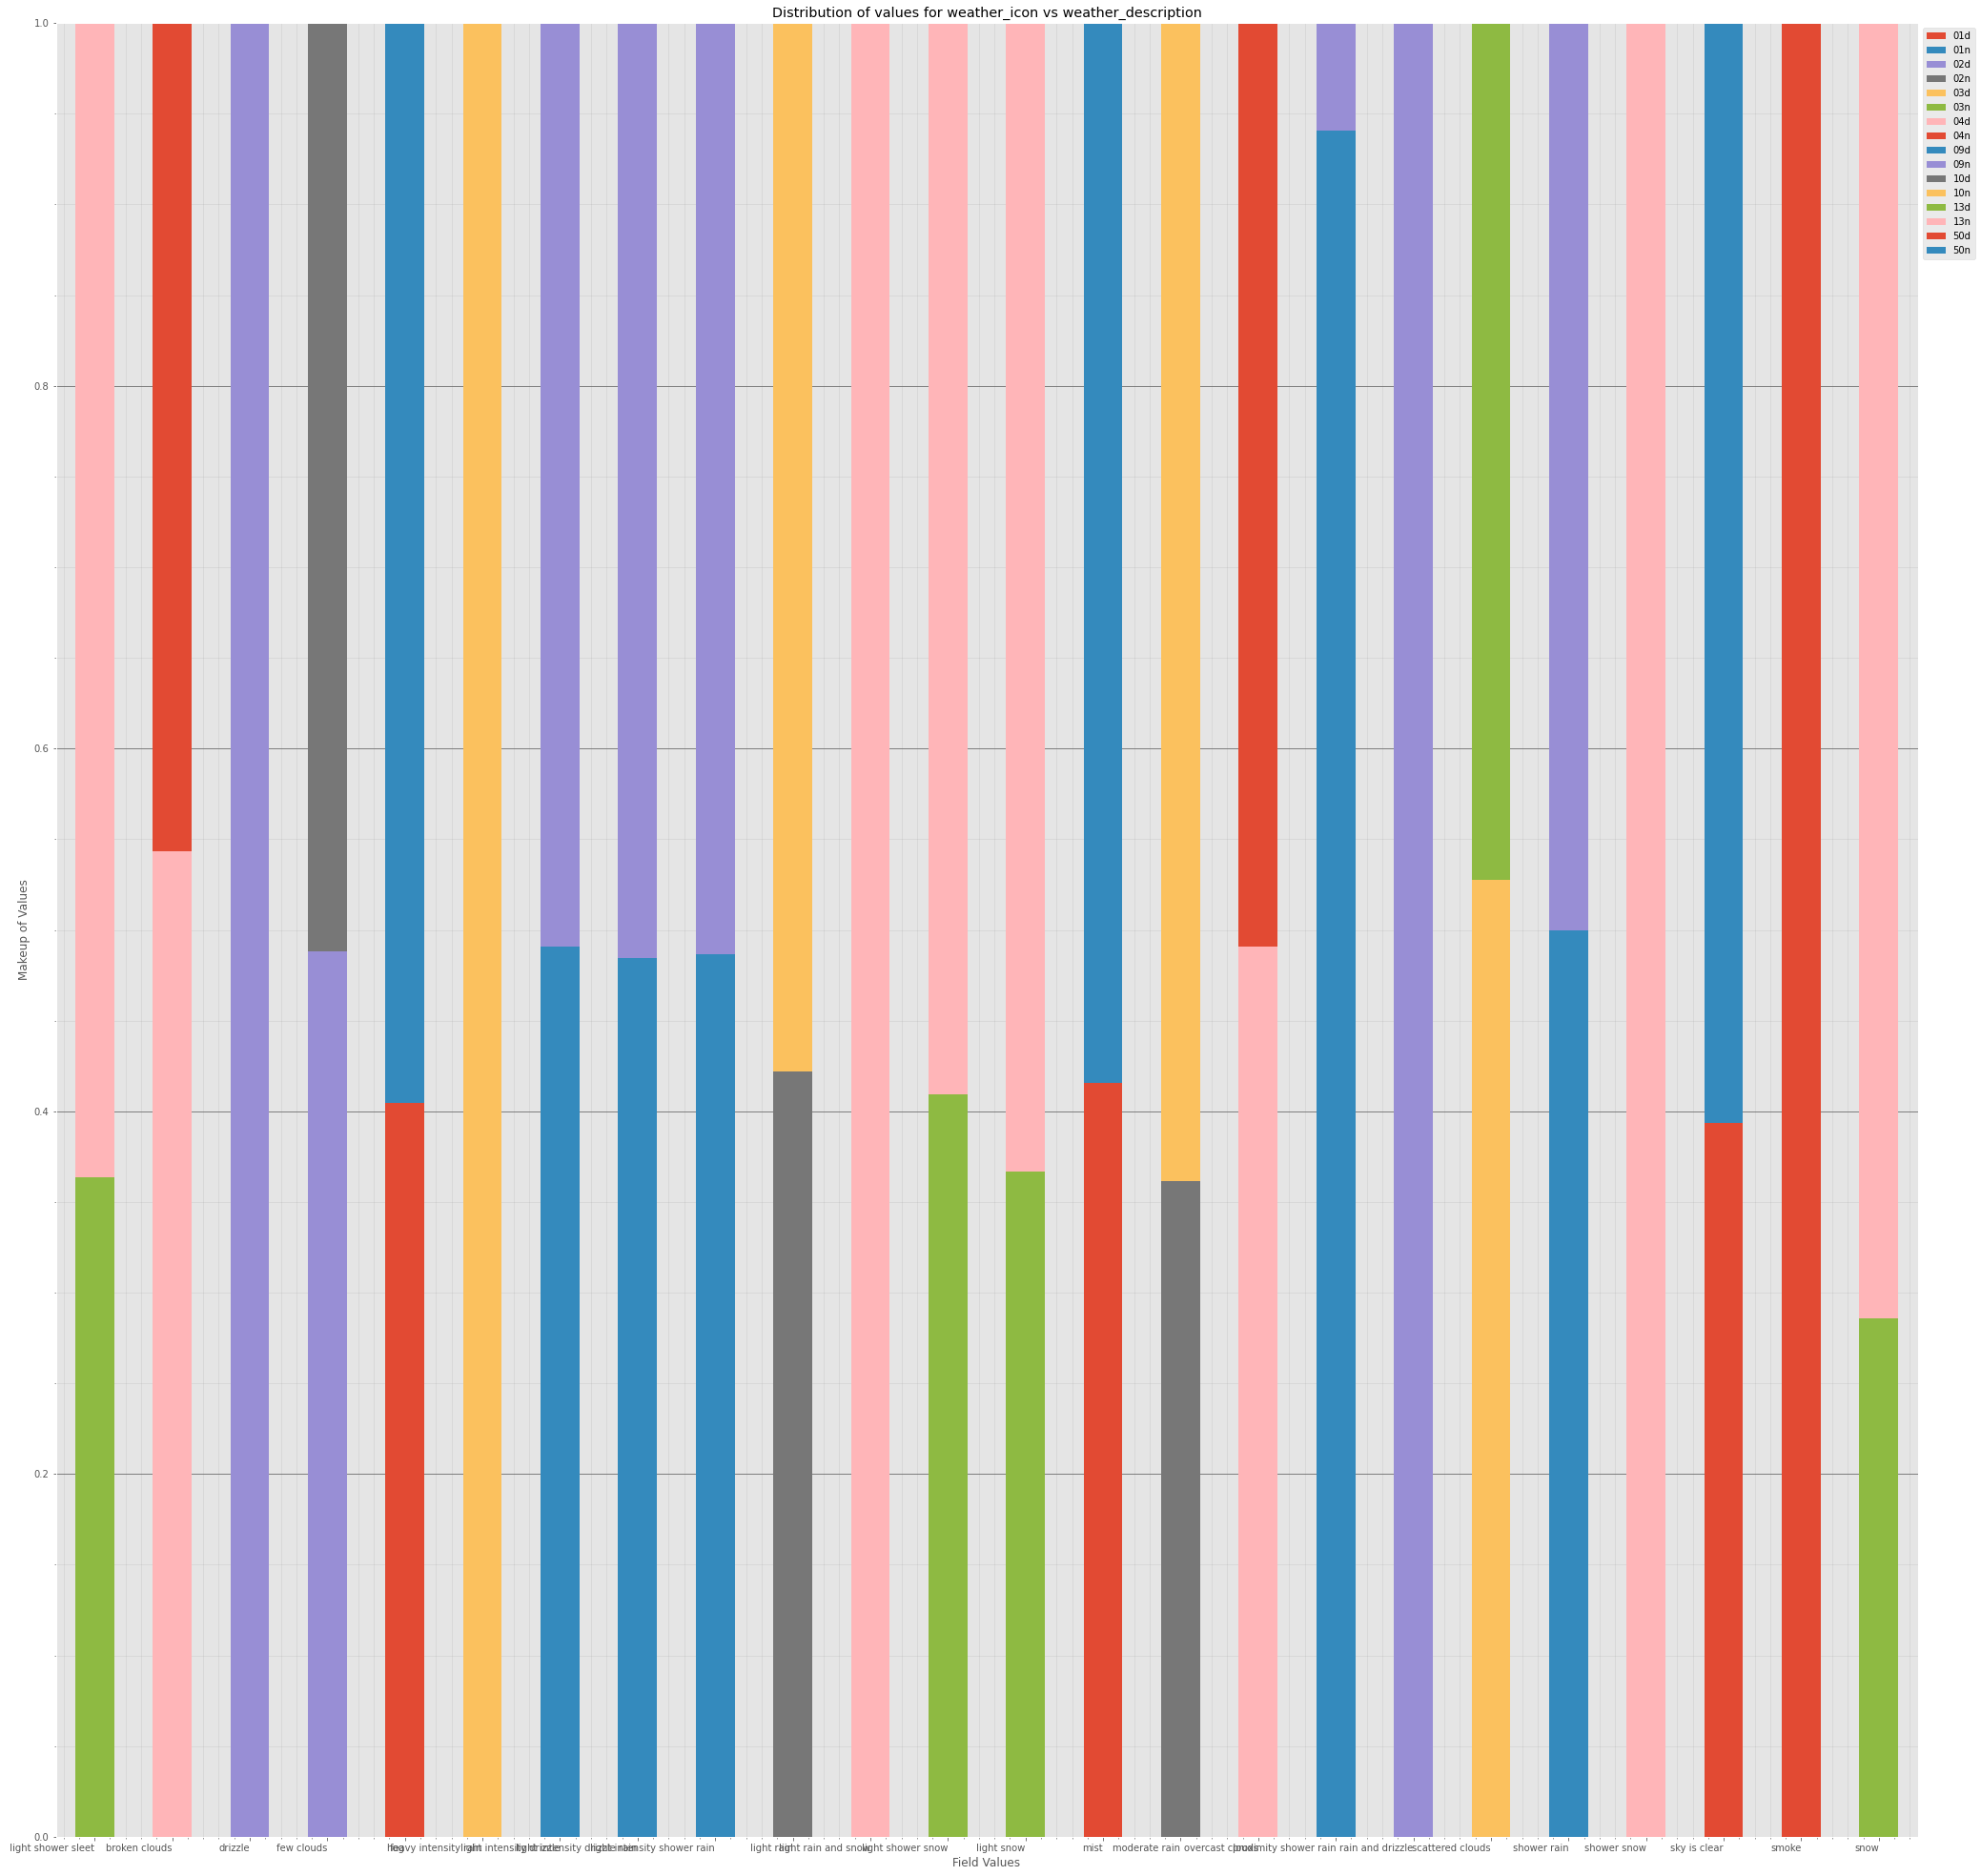



----------------------


Grouping over weather_icon|timezone results in:



Rows  % Frequency
weather_icon timezone                   
01d          0            6     0.067812
             3600       231     2.610759
01n          0          112     1.265823
             3600       253     2.859403
02d          0          156     1.763110
             3600       391     4.419078
02n          0          259     2.927215
             3600       315     3.560127
03d          0          203     2.294304
             3600       442     4.995479
03n          0          282     3.187161
             3600       296     3.345389
04d          0          666     7.527125
             3600      1568    17.721519
04n          0          961    10.861212
             3600       921    10.409132
09d          0          178     2.011754
             3600       285     3.221067
09n          0          243     2.746383
             3600       140     1.582278
10d          0           97     1.096293
             3600       177     2.000452
10n          0          261     2.949819
             3600       122     1.378843
13d          0           44     0.497288
             3600         0     0.000000
13n          0           71     0.802441
             3600         1     0.011302
50d          0           27     0.305154
             3600        42     0.474684
50n          0           63     0.712025
             3600        35     0.395570

Non Zero Data:


Rows  % Frequency
weather_icon timezone                   
01d          0            6     0.067812
             3600       231     2.610759
01n          0          112     1.265823
             3600       253     2.859403
02d          0          156     1.763110
             3600       391     4.419078
02n          0          259     2.927215
             3600       315     3.560127
03d          0          203     2.294304
             3600       442     4.995479
03n          0          282     3.187161
             3600       296     3.345389
04d          0          666     7.527125
             3600      1568    17.721519
04n          0          961    10.861212
             3600       921    10.409132
09d          0          178     2.011754
             3600       285     3.221067
09n          0          243     2.746383
             3600       140     1.582278
10d          0           97     1.096293
             3600       177     2.000452
10n          0          261     2.949819
             3600       122     1.378843
13d          0           44     0.497288
13n          0           71     0.802441
             3600         1     0.011302
50d          0           27     0.305154
             3600        42     0.474684
50n          0           63     0.712025
             3600        35     0.395570

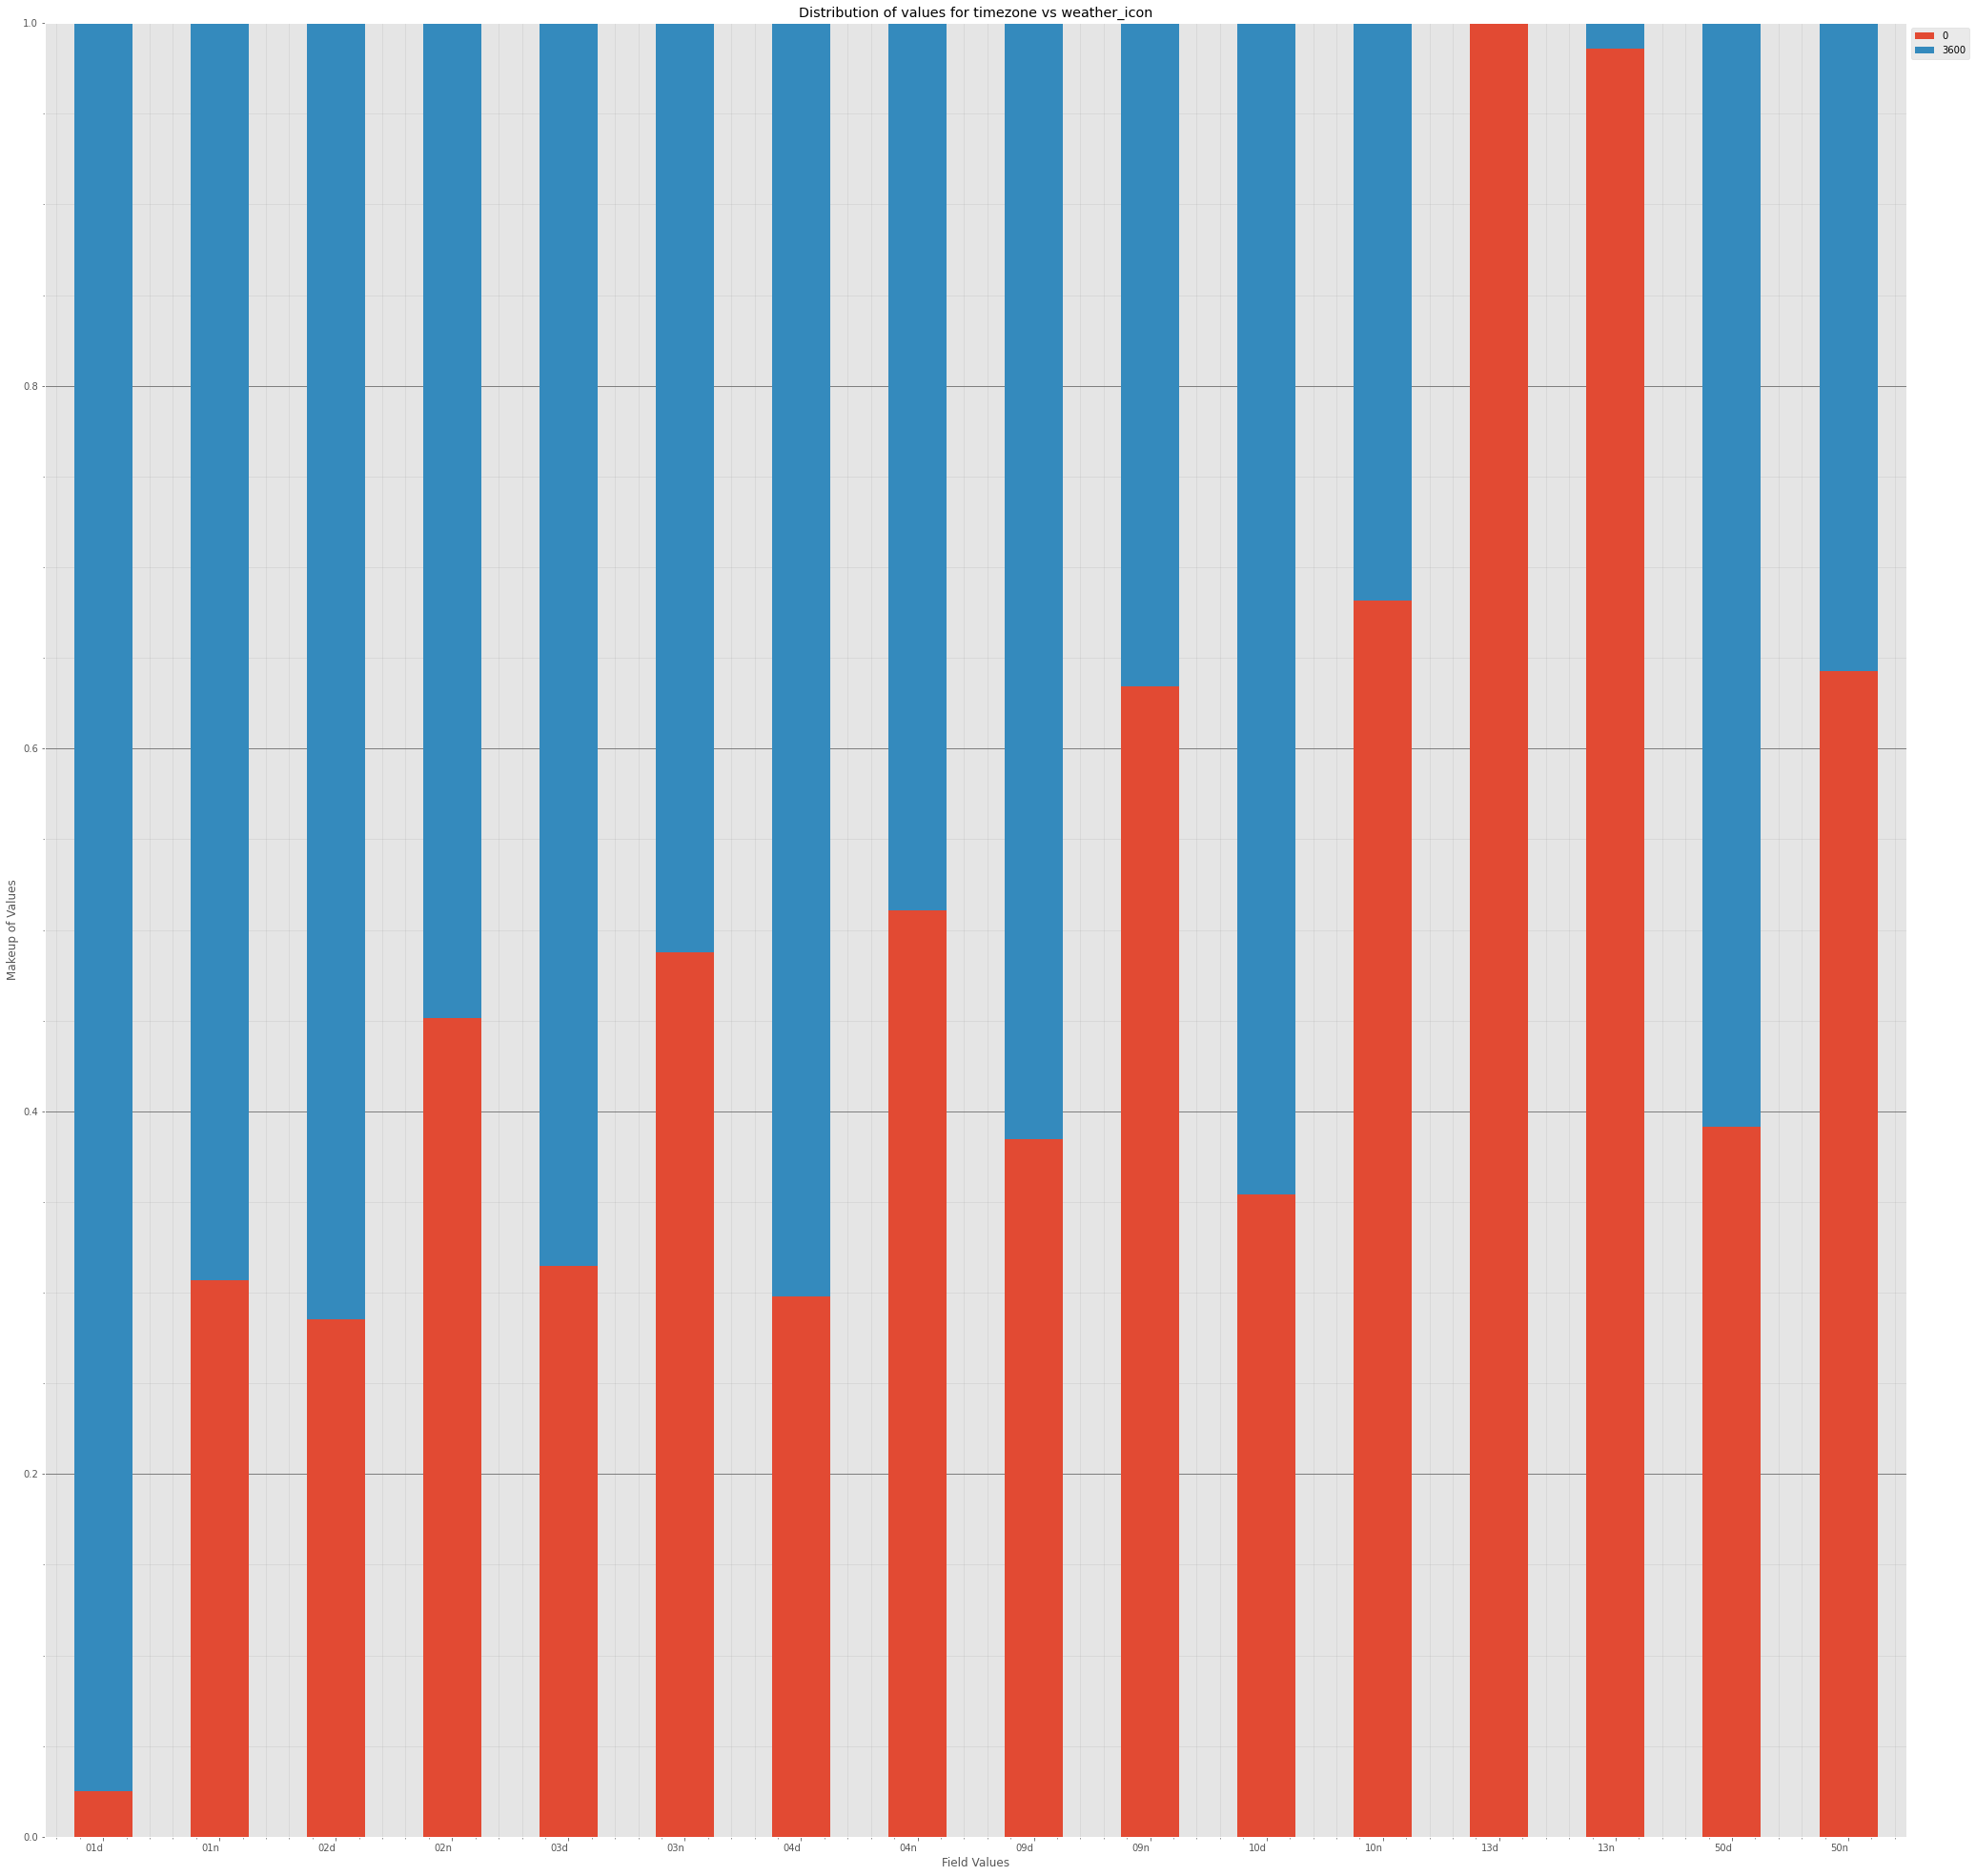



----------------------


Grouping over weather_icon|city_name results in:



Rows  % Frequency
weather_icon city_name                   
01d          Dublin      237     2.678571
01n          Dublin      365     4.125226
02d          Dublin      547     6.182188
02n          Dublin      574     6.487342
03d          Dublin      645     7.289783
03n          Dublin      578     6.532550
04d          Dublin     2234    25.248644
04n          Dublin     1882    21.270344
09d          Dublin      463     5.232821
09n          Dublin      383     4.328662
10d          Dublin      274     3.096745
10n          Dublin      383     4.328662
13d          Dublin       44     0.497288
13n          Dublin       72     0.813743
50d          Dublin       69     0.779837
50n          Dublin       98     1.107595

Non Zero Data:


Rows  % Frequency
weather_icon city_name                   
01d          Dublin      237     2.678571
01n          Dublin      365     4.125226
02d          Dublin      547     6.182188
02n          Dublin      574     6.487342
03d          Dublin      645     7.289783
03n          Dublin      578     6.532550
04d          Dublin     2234    25.248644
04n          Dublin     1882    21.270344
09d          Dublin      463     5.232821
09n          Dublin      383     4.328662
10d          Dublin      274     3.096745
10n          Dublin      383     4.328662
13d          Dublin       44     0.497288
13n          Dublin       72     0.813743
50d          Dublin       69     0.779837
50n          Dublin       98     1.107595

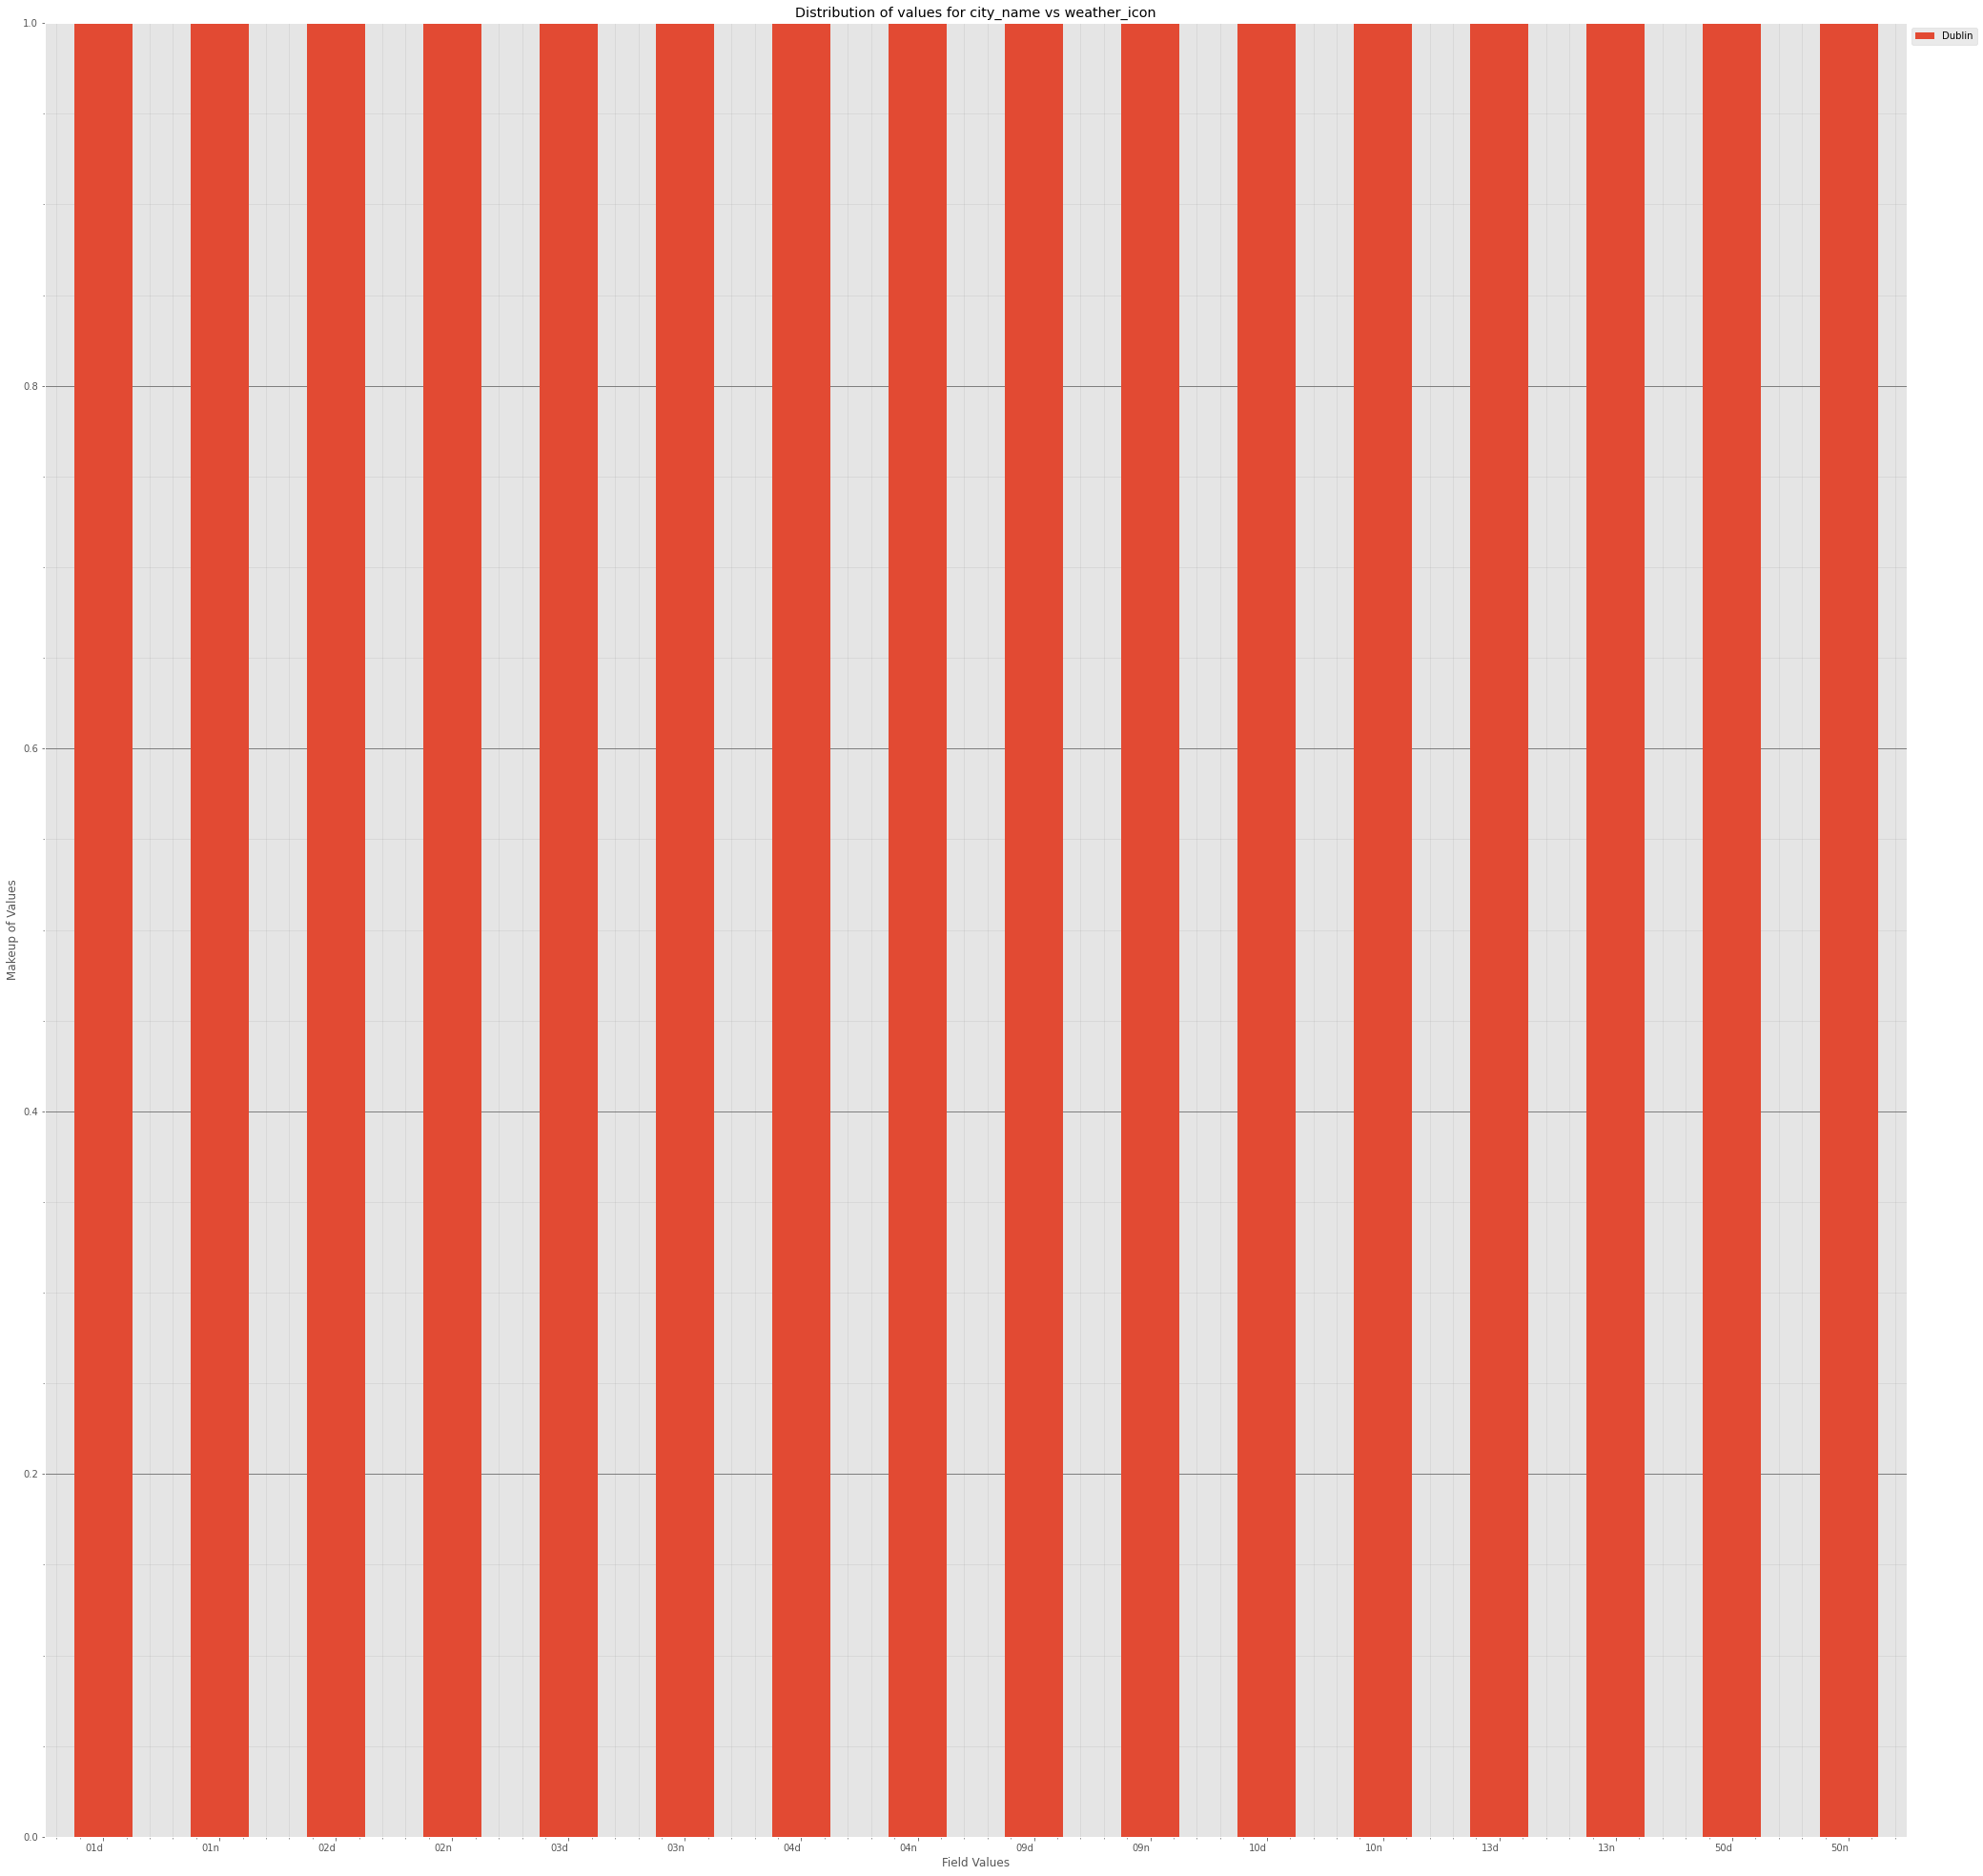



----------------------


Grouping over weather_icon|clouds_all results in:



Rows  % Frequency
weather_icon clouds_all                   
01d          0            237     2.678571
             1              0     0.000000
             10             0     0.000000
             100            0     0.000000
             11             0     0.000000
...                       ...          ...
50n          84             0     0.000000
             87             0     0.000000
             90             8     0.090416
             91             1     0.011302
             99             0     0.000000

[320 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
weather_icon clouds_all                   
01d          0            237     2.678571
01n          0            356     4.023508
             1              2     0.022604
             10             1     0.011302
             2              4     0.045208
             3              1     0.011302
             5              1     0.011302
02d          20           547     6.182188
02n          11             2     0.022604
             20           571     6.453436
             21             1     0.011302
03d          40           645     7.289783
03n          26             1     0.011302
             40           577     6.521248
04d          69             1     0.011302
             75          2205    24.920886
             83             1     0.011302
             87             1     0.011302
             90            25     0.282550
             99             1     0.011302
04n          75          1853    20.942586
             84             1     0.011302
             90            28     0.316456
09d          100            1     0.011302
             20             7     0.079114
             40            41     0.463382
             75           400     4.520796
             90            14     0.158228
09n          20             1     0.011302
             40            20     0.226040
             75           347     3.921790
             90            15     0.169530
10d          75           264     2.983725
             90            10     0.113020
10n          100            1     0.011302
             75           367     4.147830
             90            15     0.169530
13d          40             3     0.033906
             75            32     0.361664
             90             9     0.101718
13n          40             1     0.011302
             75            71     0.802441
50d          100            1     0.011302
             20             7     0.079114
             40             4     0.045208
             75            48     0.542495
             90             9     0.101718
50n          100            1     0.011302
             20            17     0.192134
             40            12     0.135624
             75            59     0.666817
             90             8     0.090416
             91             1     0.011302

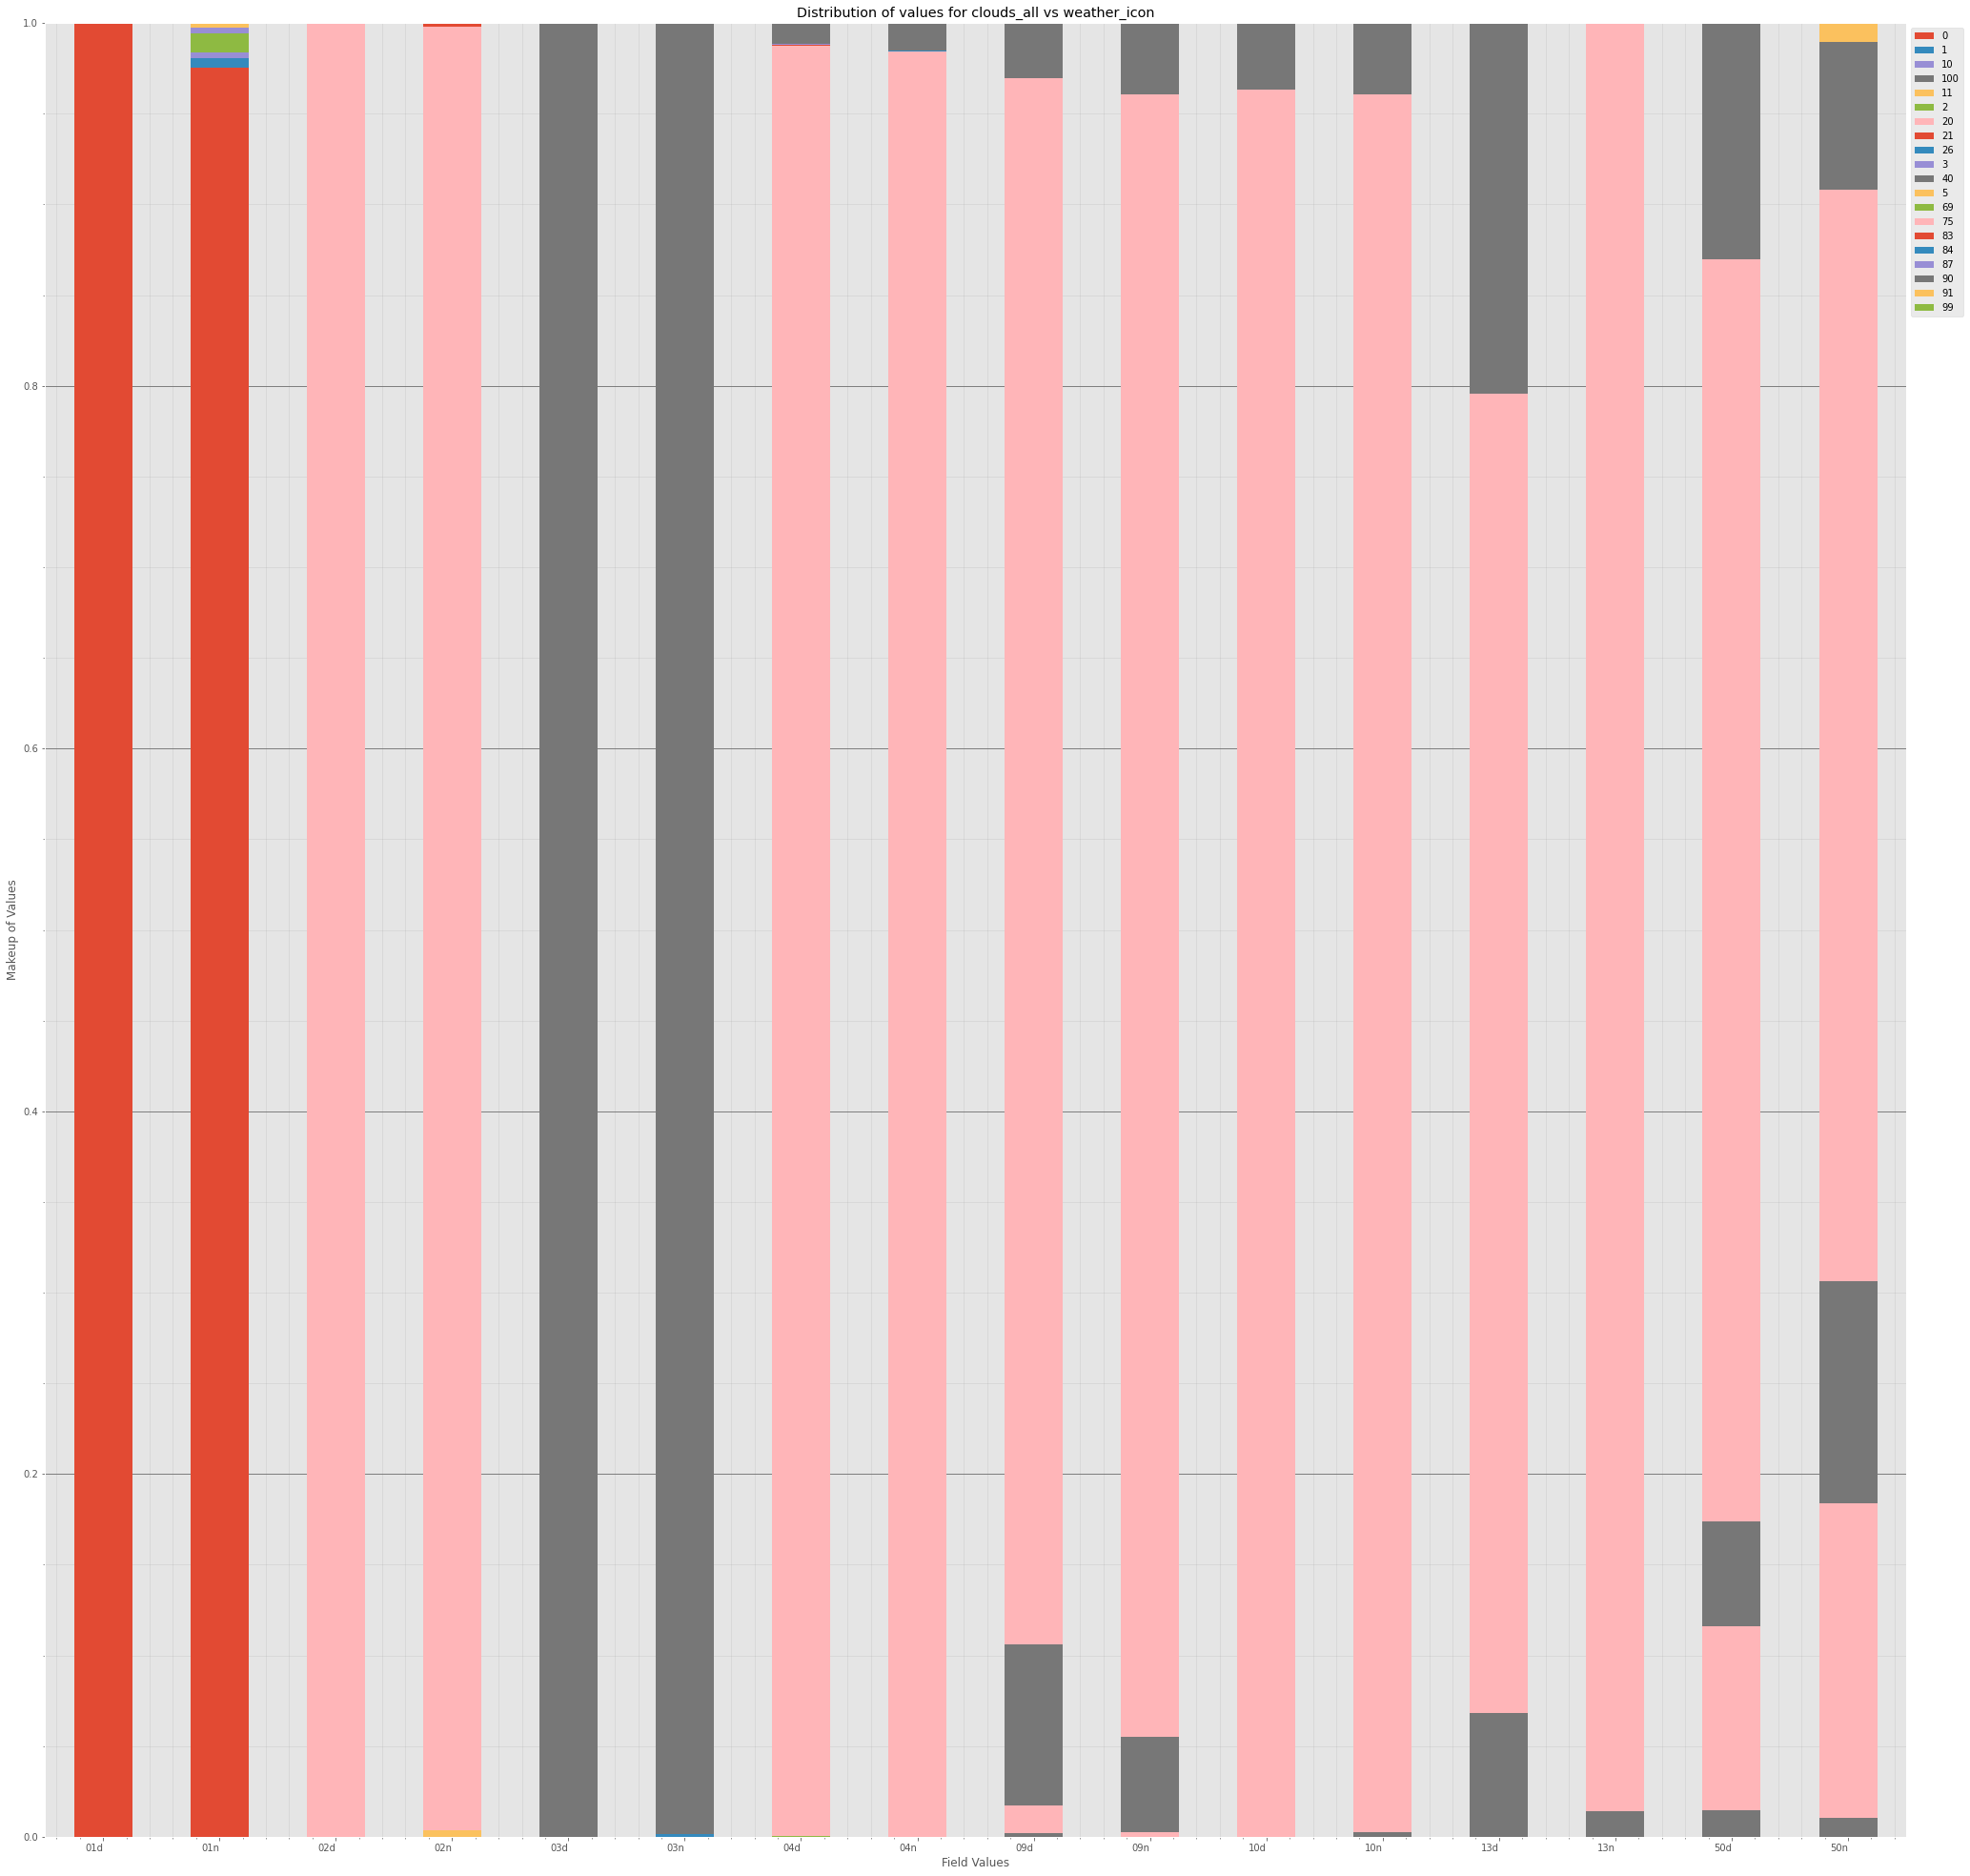



----------------------


Grouping over weather_icon|weather_id results in:



Rows  % Frequency
weather_icon weather_id                   
01d          300            0          0.0
             301            0          0.0
             310            0          0.0
             311            0          0.0
             500            0          0.0
...                       ...          ...
50n          800            0          0.0
             801            0          0.0
             802            0          0.0
             803            0          0.0
             804            0          0.0

[368 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
weather_icon weather_id                   
01d          800          237     2.678571
01n          800          365     4.125226
02d          801          547     6.182188
02n          801          574     6.487342
03d          802          645     7.289783
03n          802          578     6.532550
04d          803         2207    24.943490
             804           27     0.305154
04n          803         1854    20.953888
             804           28     0.316456
09d          300          132     1.491863
             310          108     1.220615
             520          111     1.254521
             521          112     1.265823
09n          300          137     1.548373
             301            4     0.045208
             310          115     1.299729
             311            2     0.022604
             520          117     1.322333
             521            8     0.090416
10d          500          257     2.904611
             501           17     0.192134
10n          500          352     3.978300
             501           30     0.339060
             502            1     0.011302
13d          600           11     0.124322
             601            2     0.022604
             612            4     0.045208
             620           27     0.305154
13n          600           19     0.214738
             601            5     0.056510
             612            7     0.079114
             615            1     0.011302
             620           39     0.440778
             621            1     0.011302
50d          701           32     0.361664
             711            1     0.011302
             741           36     0.406872
50n          701           45     0.508590
             741           53     0.599005

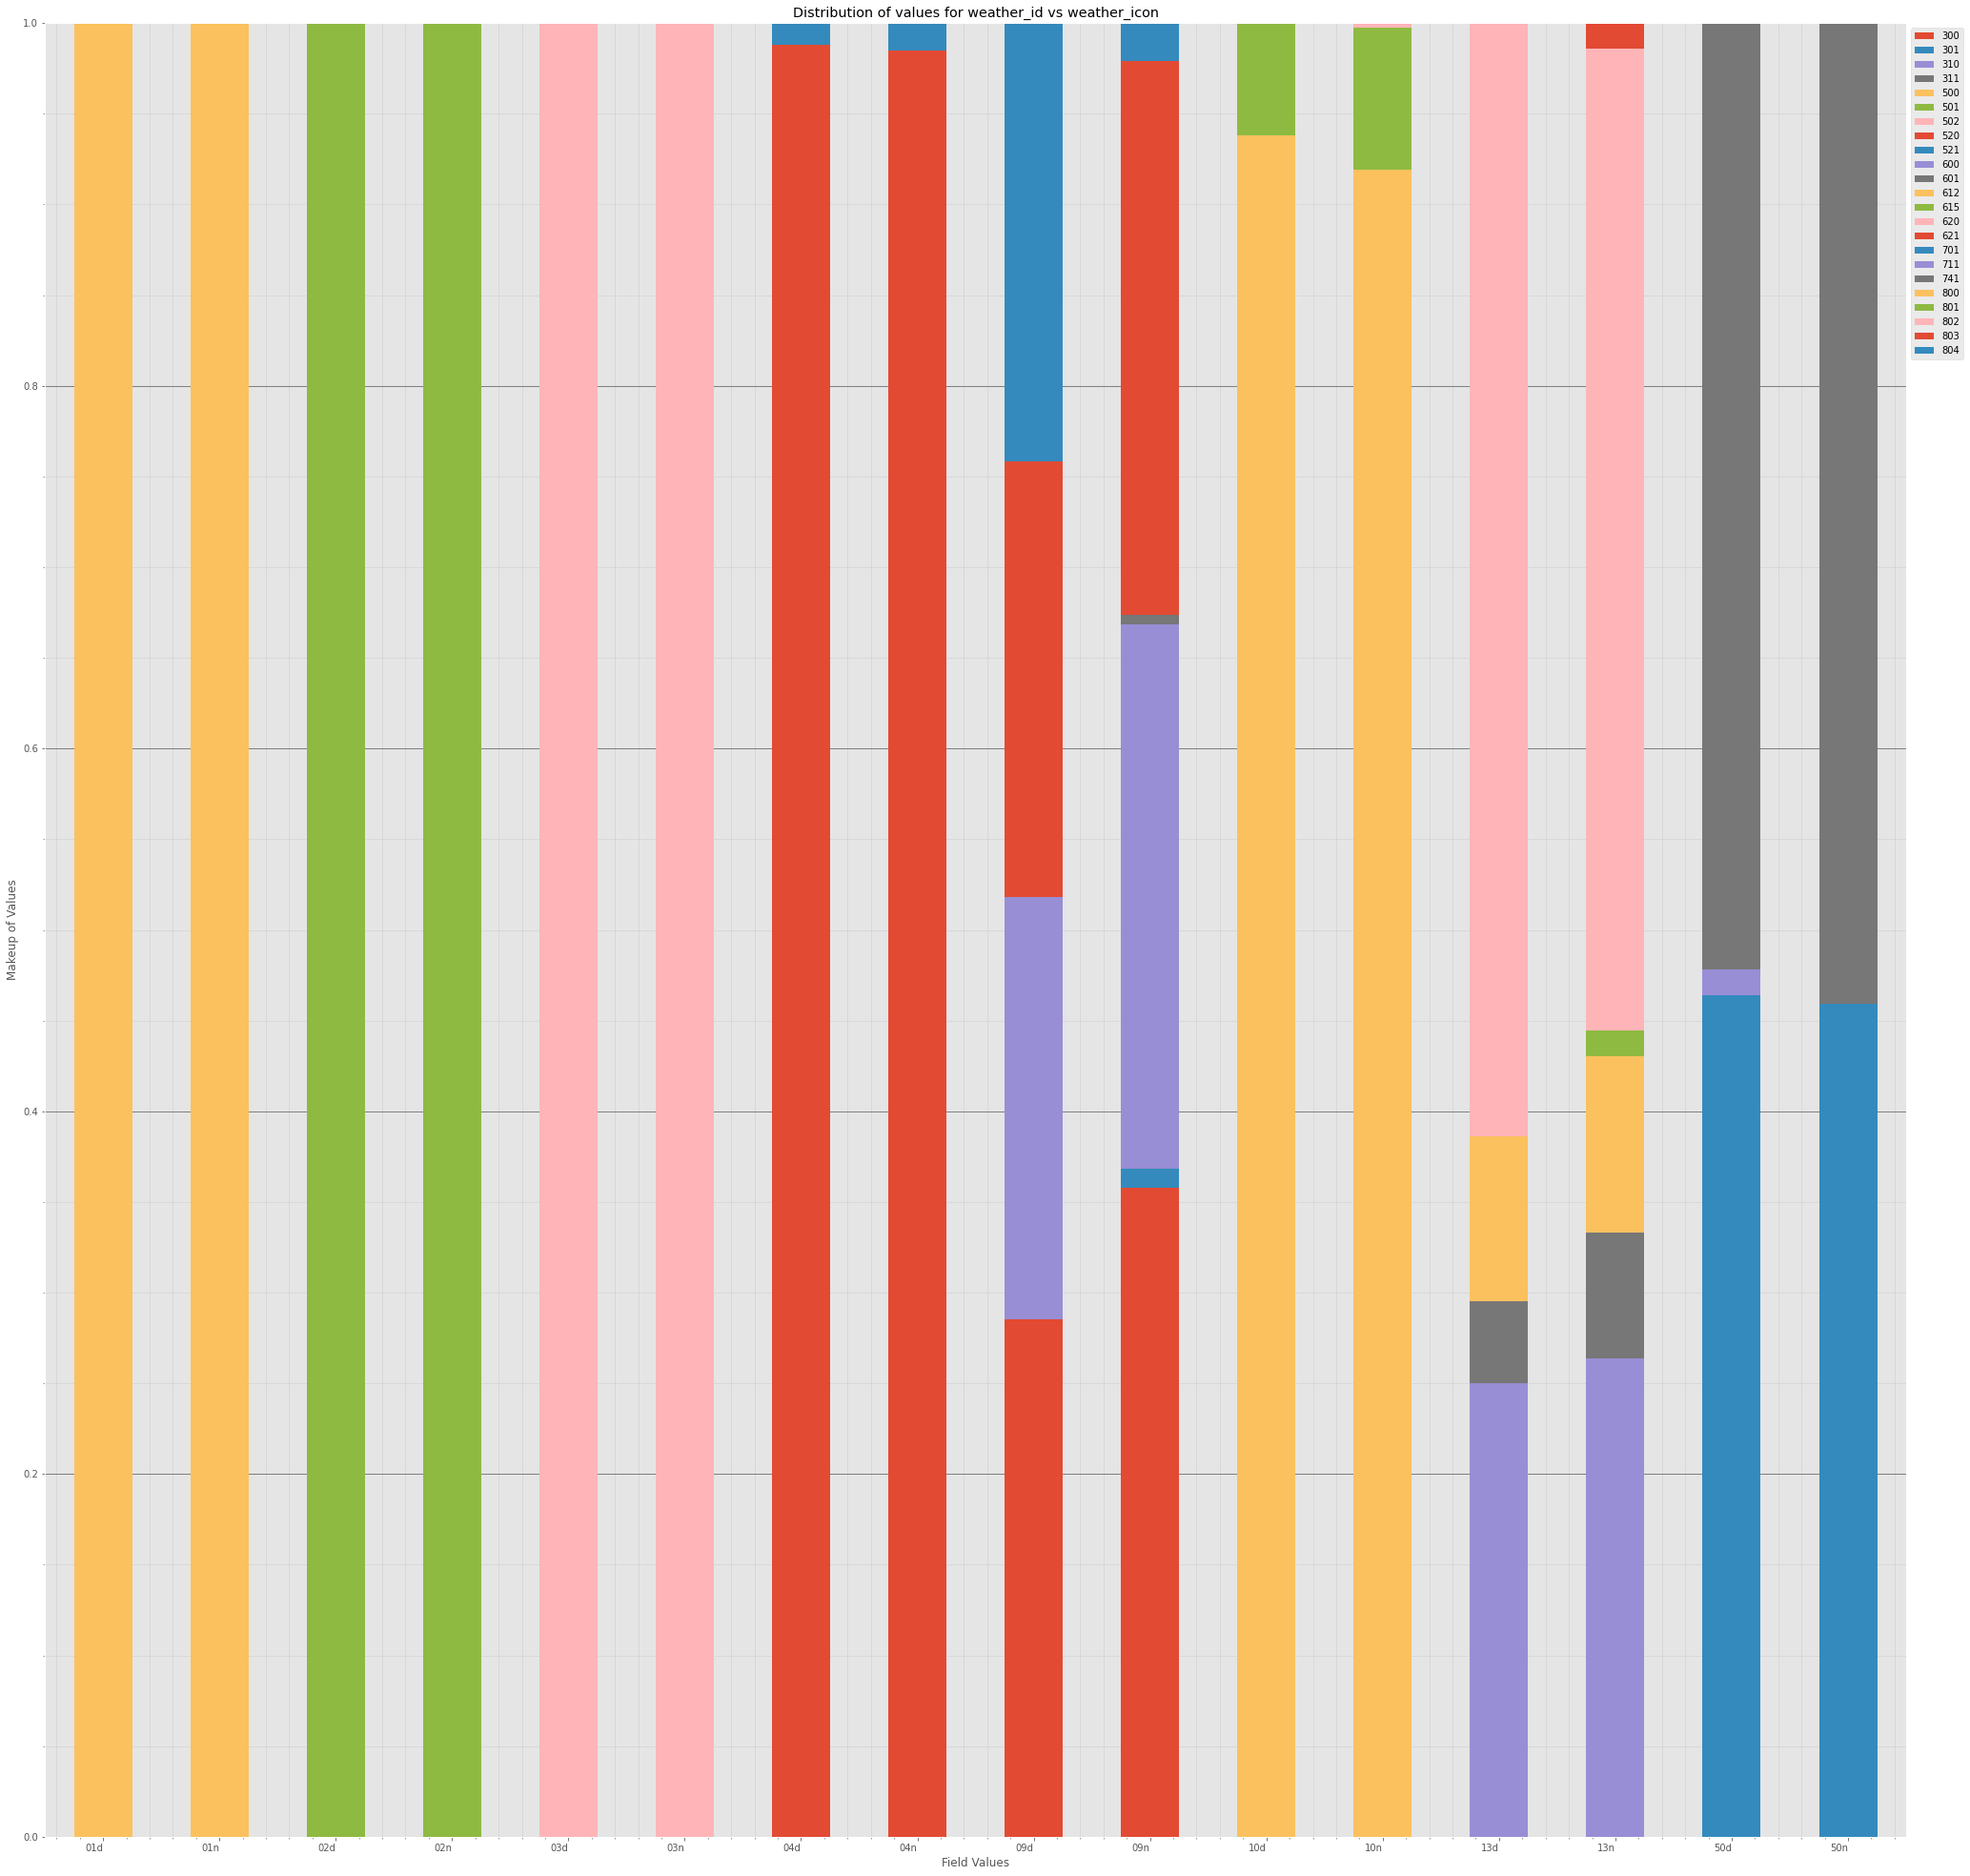



----------------------


Grouping over weather_icon|weather_description results in:



Rows  % Frequency
weather_icon weather_description                   
01d           light shower sleet     0          0.0
             broken clouds           0          0.0
             drizzle                 0          0.0
             few clouds              0          0.0
             fog                     0          0.0
...                                ...          ...
50n          shower rain             0          0.0
             shower snow             0          0.0
             sky is clear            0          0.0
             smoke                   0          0.0
             snow                    0          0.0

[384 rows x 2 columns]

Non Zero Data:


Rows  % Frequency
weather_icon weather_description                            
01d          sky is clear                   237     2.678571
01n          sky is clear                   365     4.125226
02d          few clouds                     547     6.182188
02n          few clouds                     574     6.487342
03d          scattered clouds               645     7.289783
03n          scattered clouds               578     6.532550
04d          broken clouds                 2207    24.943490
             overcast clouds                 27     0.305154
04n          broken clouds                 1854    20.953888
             overcast clouds                 28     0.316456
09d          light intensity drizzle        132     1.491863
             light intensity drizzle rain   108     1.220615
             light intensity shower rain    111     1.254521
             proximity shower rain          111     1.254521
             shower rain                      1     0.011302
09n          drizzle                          4     0.045208
             light intensity drizzle        137     1.548373
             light intensity drizzle rain   115     1.299729
             light intensity shower rain    117     1.322333
             proximity shower rain            7     0.079114
             rain and drizzle                 2     0.022604
             shower rain                      1     0.011302
10d          light rain                     257     2.904611
             moderate rain                   17     0.192134
10n          heavy intensity rain             1     0.011302
             light rain                     352     3.978300
             moderate rain                   30     0.339060
13d           light shower sleet              4     0.045208
             light shower snow               27     0.305154
             light snow                      11     0.124322
             snow                             2     0.022604
13n           light shower sleet              7     0.079114
             light rain and snow              1     0.011302
             light shower snow               39     0.440778
             light snow                      19     0.214738
             shower snow                      1     0.011302
             snow                             5     0.056510
50d          fog                             36     0.406872
             mist                            32     0.361664
             smoke                            1     0.011302
50n          fog                             53     0.599005
             mist                            45     0.508590

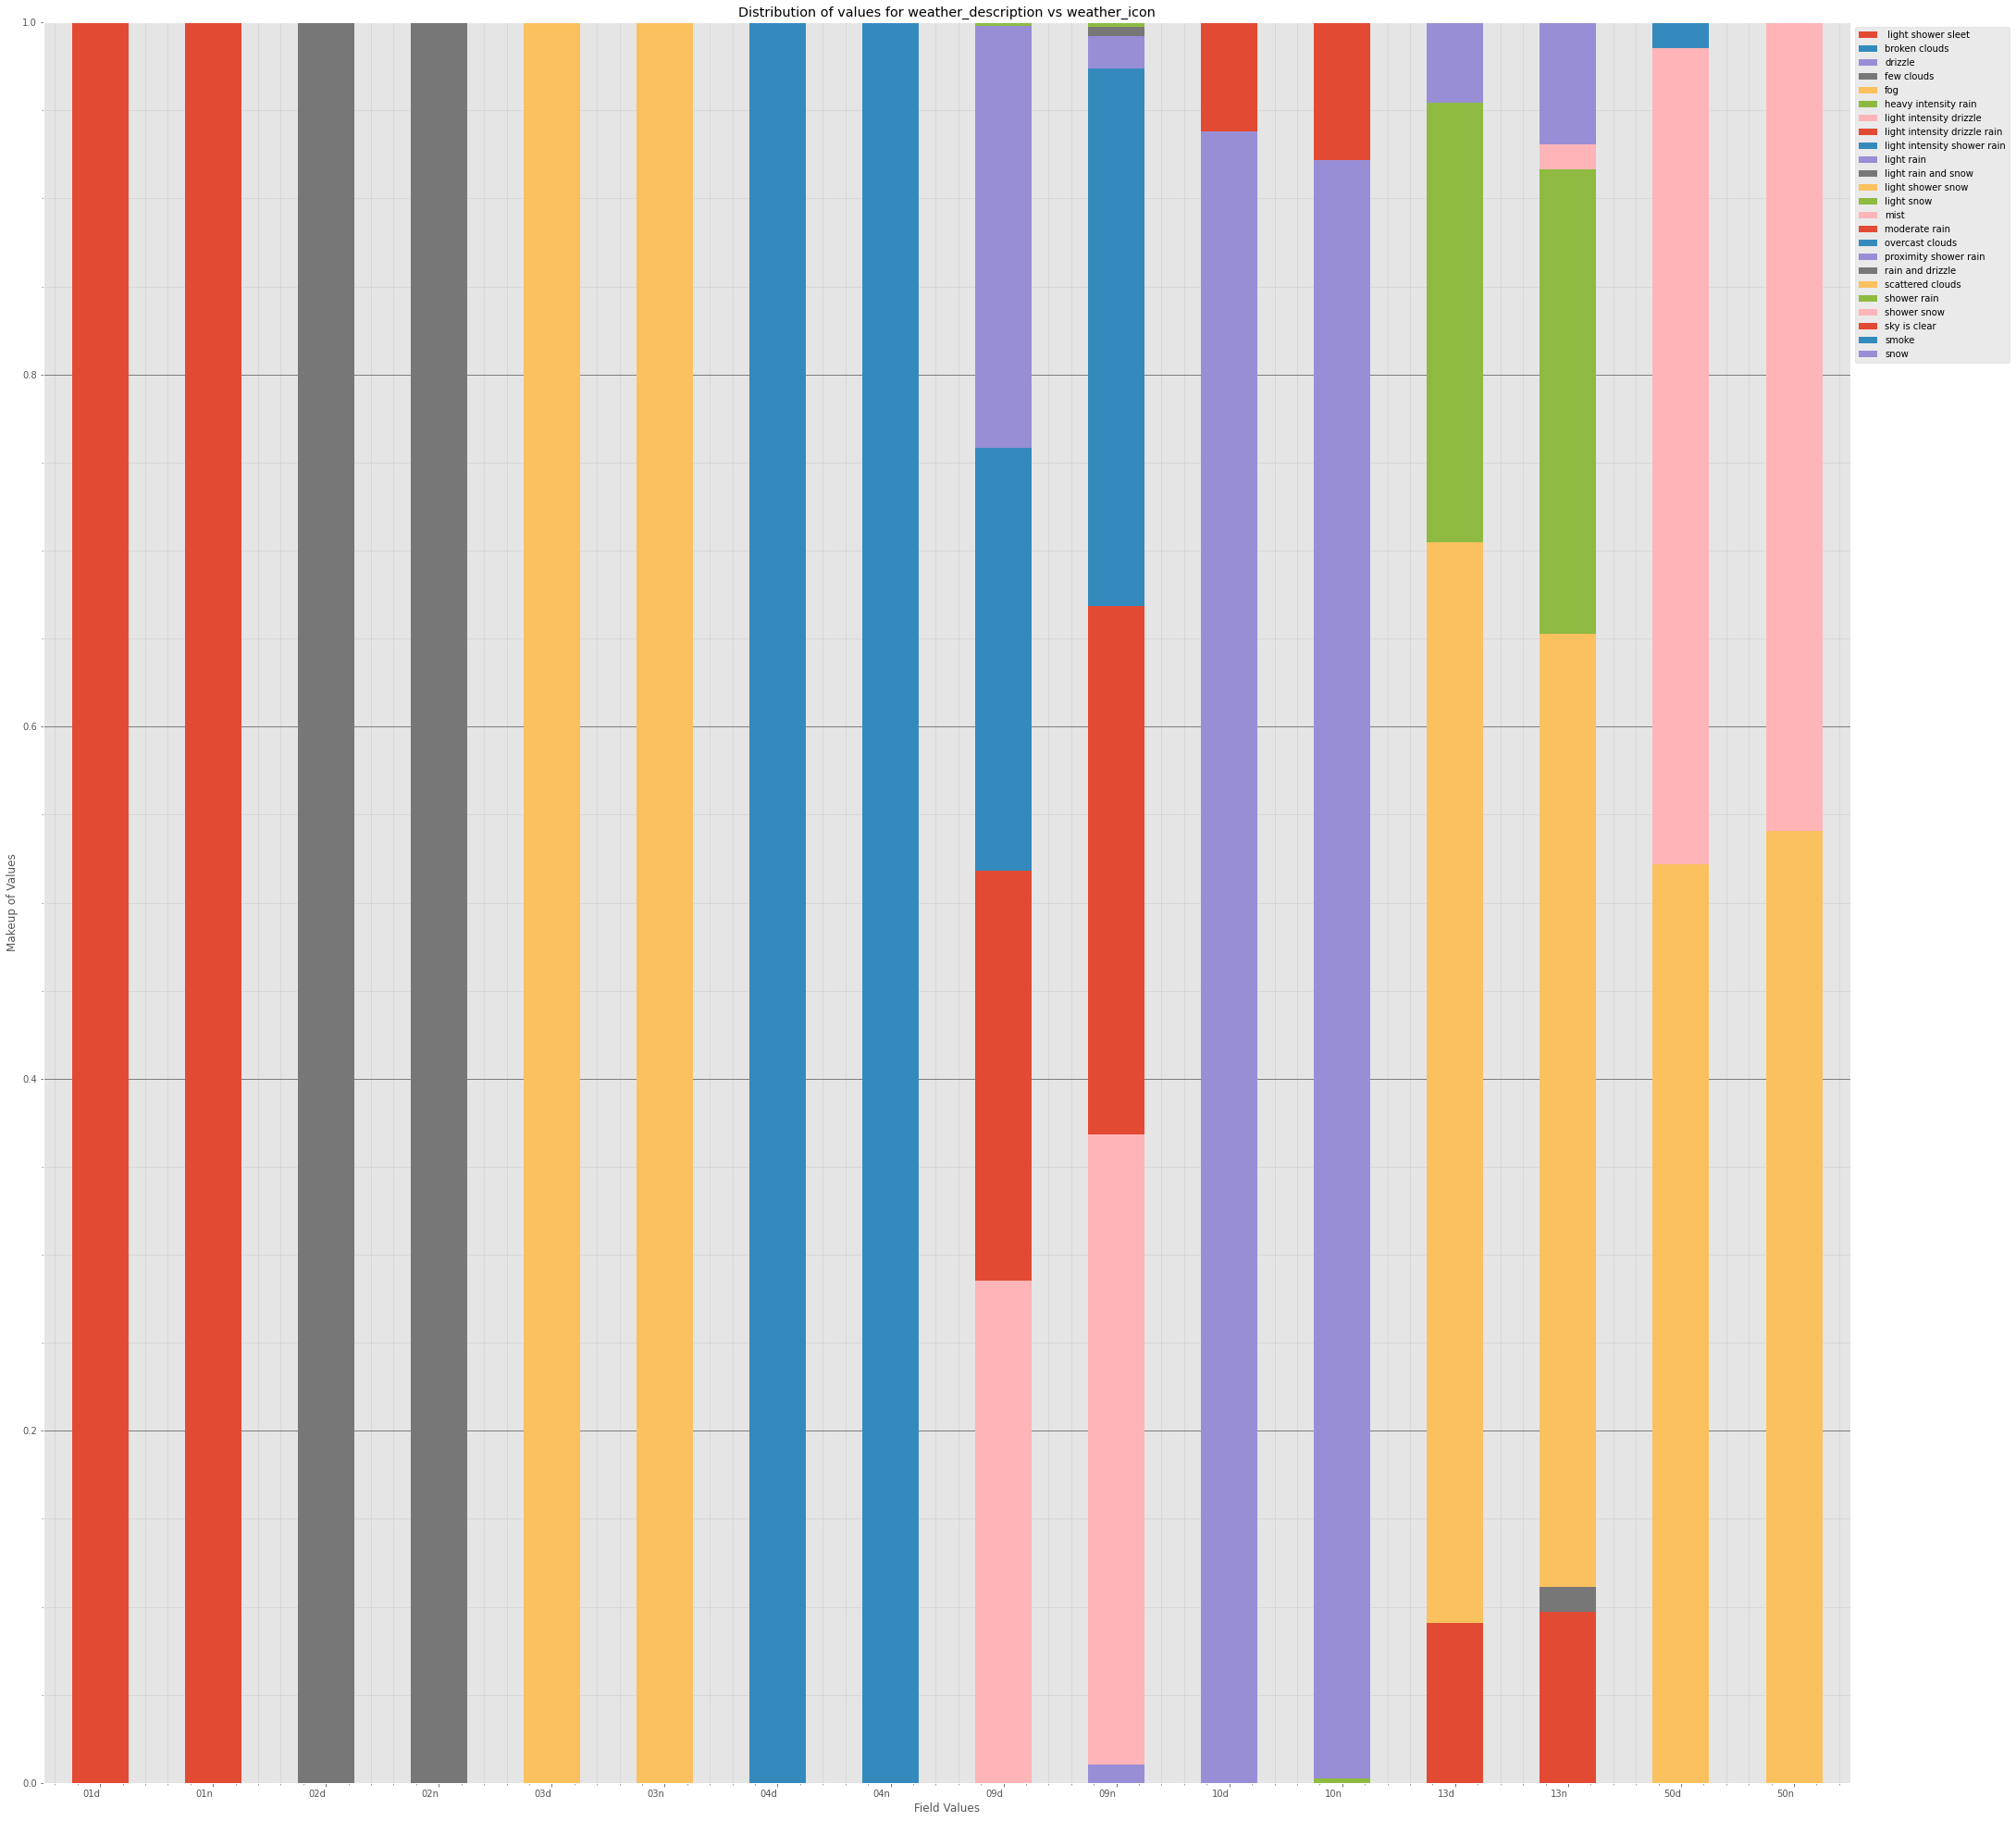

{}

In [84]:
stacked_group_over_multi_categories(weather_df,categorical_columns=weather_categorical_columns,pdf_fn="./data/weather_single_DB_{}.pdf".format(today_date), save_fig=True)

In [85]:
check_duplicate_data(weather_df
                     ,categorical_columns=weather_categorical_columns
                     ,dupe_pdf_fn="./data/dupe_weather_single_DB_{}.pdf".format(today_date))

0 Duplicated Rows



Empty DataFrame
Columns: [dt, dt_iso, timezone, city_name, lat, lon, temp, feels_like, temp_min, temp_max, pressure, sea_level, grnd_level, humidity, wind_speed, wind_deg, rain_1h, rain_3h, snow_1h, snow_3h, clouds_all, weather_id, weather_main, weather_description, weather_icon]
Index: []

[0 rows x 25 columns]

-----
Investigating Cause
-----
Inside group_over_single_categories()


{}

In [87]:
weather_df.dtypes

dt                        int64
dt_iso                   object
timezone               category
city_name              category
lat                     float64
lon                     float64
temp                    float64
feels_like              float64
temp_min                float64
temp_max                float64
pressure                  int64
sea_level               float64
grnd_level              float64
humidity                  int64
wind_speed              float64
wind_deg                  int64
rain_1h                 float64
rain_3h                 float64
snow_1h                 float64
snow_3h                 float64
clouds_all             category
weather_id             category
weather_main             object
weather_description    category
weather_icon           category
dtype: object

In [15]:
static_file_dict={'Data':weather_df}

for key, value in static_file_dict.items():
    print(key)
    all_print=''
    print_statement="'{}':'{}'\n"
    
    for rkey, rvalue in value.dtypes.apply(lambda x: x.name).to_dict().items():
        all_print+=print_statement.format(rkey,rvalue)
    
    print(all_print)
        

Data
'dt':'int64'
'dt_iso':'object'
'timezone':'category'
'city_name':'category'
'lat':'float64'
'lon':'float64'
'temp':'float64'
'feels_like':'float64'
'temp_min':'float64'
'temp_max':'float64'
'pressure':'int64'
'sea_level':'float64'
'grnd_level':'float64'
'humidity':'int64'
'wind_speed':'float64'
'wind_deg':'int64'
'rain_1h':'float64'
'rain_3h':'float64'
'snow_1h':'float64'
'snow_3h':'float64'
'clouds_all':'category'
'weather_id':'category'
'weather_main':'object'
'weather_description':'category'
'weather_icon':'category'

